In [19]:
#---------Importing necessary packages---------#
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from nltk.tokenize import sent_tokenize

# Reading Data Sets

In [2]:
d1_cancelled=pd.read_json('cancelled.json')
d1_noncancelled=pd.read_json('noncancelled.json')
# sailorapp=pd.read_json('sailorapp.json')

#----------Joining both Cancelled & Non Cancelled Data sets----------------#
input_data=pd.concat([d1_cancelled,d1_noncancelled],axis=0)
input_data.reset_index(inplace=True,drop=True)
input_data.head(5)

Status                                        Description  \
0  Canceled  Build: PI7.6 FE + 8.2 BE Hotfix , App Version:...   
1  Canceled  Ship parse count for housekeeping requests:\r\...   
2  Canceled  Hi [~accountid:5ade5093027e7a2ebfcbd97e] / [~a...   
3  Canceled  Ship side team has successfully uploaded the s...   
4  Canceled  Hit the application url and do the booking flo...   

                                            Comments     Priority RootCause  \
0                                                 []  P3 - Medium        NA   
1  [{'author': {'accountId': '5e8b26768764110b816...  P3 - Medium      Code   
2  [{'author': {'accountId': '5ade5093027e7a2ebfc...    P2 - High        NA   
3  [{'author': {'accountId': '5caee6ee6c3b6b270f4...    P2 - High        NA   
4  [{'author': {'accountId': '5dcdc9960e14000dd49...     P4 - Low        NA   

       Reporter   IssueKey                                            Summary  \
0  Anusha Boosa  MSH-45790  CERT|SailorAPP| On-board | Cabin Services |  I...   
1     Shanthi K  MSH-45793  Counts in the parse tables are not matching be...   
2    Kapil Soni  MSH-45795  Magnolia | KAFKA | Ship Side Events are not co...   
3       Exalate  MSH-45830  VV-Prod-Ship | VM - Bulk uploaded successfully...   
4  Punithavalli  MSH-45840  DWP-QA-Spinner getting displayed in the top le...   

  Sprint   Component Application           Assigne  
0                 NA  Sailor App      Anusha Boosa  
1  PI8.4          NA    Crew VXP  Anagha Sebastian  
2                 NA  Sailor App        Kapil Soni  
3         "Crew VXP"    Crew VXP  Himanshu Kumawat  
4                 NA   eCommerce      Punithavalli

# Data Analysis

------------Columns in the data---------------


['Status', 'Description', 'Comments', 'Priority', 'RootCause', 'Reporter', 'IssueKey', 'Summary', 'Sprint', 'Component', 'Application', 'Assigne']


------------Columns Data Type Info---------------


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5689 entries, 0 to 5688
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Status       5689 non-null   object
 1   Description  5689 non-null   object
 2   Comments     5689 non-null   object
 3   Priority     5689 non-null   object
 4   RootCause    5689 non-null   object
 5   Reporter     5689 non-null   object
 6   IssueKey     5689 non-null   object
 7   Summary      5689 non-null   object
 8   Sprint       5689 non-null   object
 9   Component    5689 non-null   object
 10  Application  5689 non-null   object
 11  Assigne      5689 non-null   object
dtypes: object(12)
memory usage: 533.5+ KB


None



------------Targe Variable Count---------------




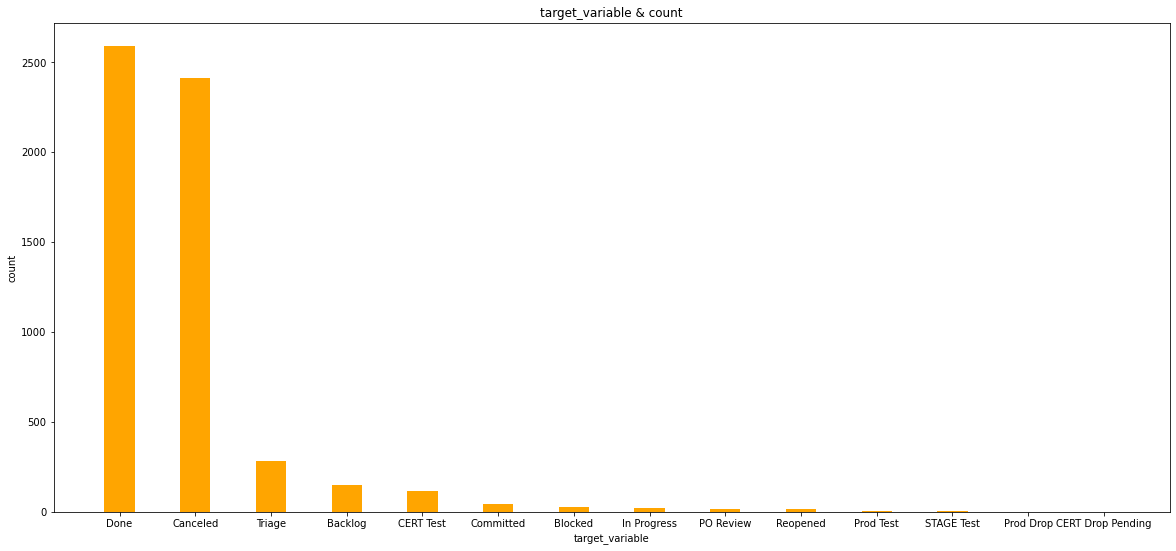



------------Number of Mobile Application on which ticket raised---------------




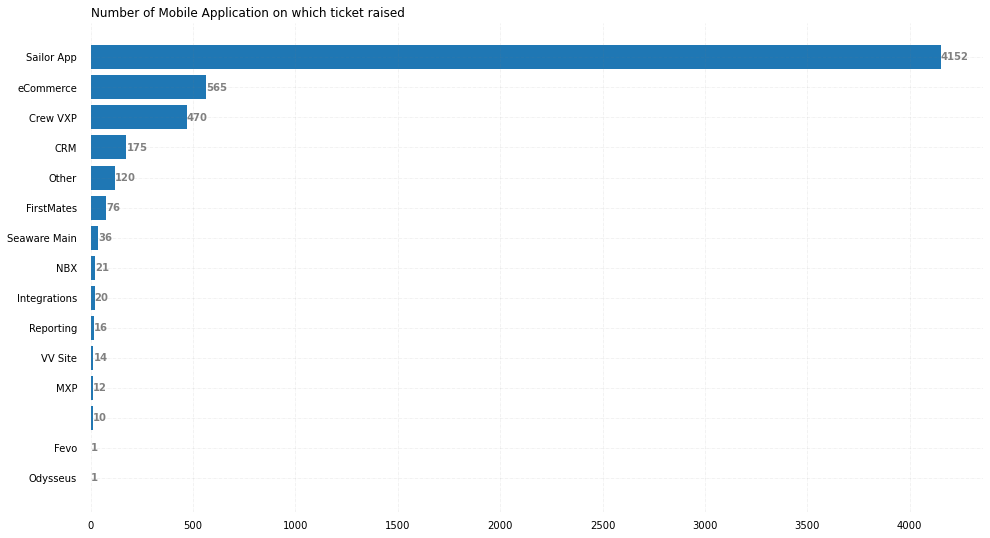



------------RootCause Count---------------




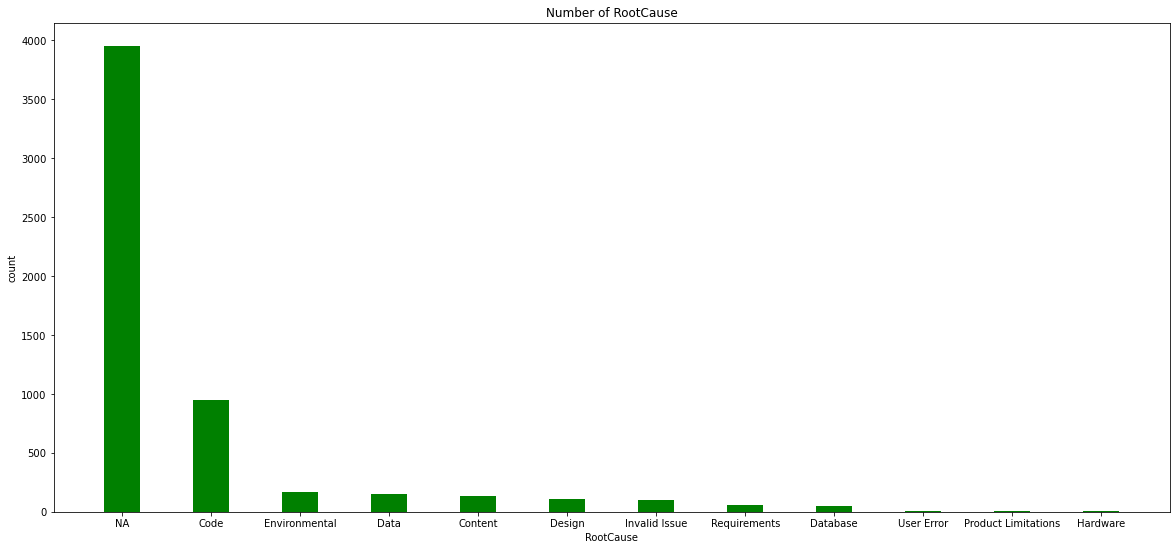

In [3]:
print("------------Columns in the data---------------")
print('\n')
print(list(input_data.columns))

print('\n')
print("------------Columns Data Type Info---------------")
print('\n')
display(input_data.info())

#-----------------------------------------------------------------------#
print('\n')
print("------------Targe Variable Count---------------")
print('\n')
fig = plt.figure(figsize = (20, 9))
 
target_variable=list(input_data['Status'].value_counts().index)
count=list(input_data['Status'].value_counts().values)

# creating the bar plot
plt.bar(target_variable, count, color ='orange', 
        width = 0.4)
 
plt.xlabel("target_variable")
plt.ylabel("count")
plt.title("target_variable & count")
plt.show()

#-----------------------------------------------------------------------#

print('\n')
print("------------Number of Mobile Application on which ticket raised---------------")
print('\n')

Application = list(input_data['Application'].value_counts().index)
value = list(input_data['Application'].value_counts().values)
 
# Figure Size
fig, ax = plt.subplots(figsize =(16, 9))
 
# Horizontal Bar Plot
ax.barh(Application, value)
 
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
 
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
 
# Show top values 
ax.invert_yaxis()
 
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5, 
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
 
# Add Plot Title
ax.set_title('Number of Mobile Application on which ticket raised',
             loc ='left')
plt.show()
print('\n')
#-----------------------------------------------------------------------#






print("------------RootCause Count---------------")
print('\n')
fig = plt.figure(figsize = (20, 9))
 
RootCause=list(input_data['RootCause'].value_counts().index)
count=list(input_data['RootCause'].value_counts().values)

# creating the bar plot
plt.bar(RootCause, count, color ='green', 
        width = 0.4)
 
plt.xlabel("RootCause")
plt.ylabel("count")
plt.title("Number of RootCause")
plt.show()
print('\n')


### ******* Removing Rootcause feature as there are many Null values in the data, As seen                         above plot*******

### ************ Removing features like "IssueKey","Reporter","Assigne", Sprint as they would not add much information to the model and they are unique keys as well***************

### ************ Removing "Component" feature from the data, as this feature is similar to "Application" & considering "Application feature************"

# Features considered after data analysis

In [4]:
modified_input_data=input_data[['Status', 'Description', 'Comments','Summary','Application']]
modified_input_data.head()


Status                                        Description  \
0  Canceled  Build: PI7.6 FE + 8.2 BE Hotfix , App Version:...   
1  Canceled  Ship parse count for housekeeping requests:\r\...   
2  Canceled  Hi [~accountid:5ade5093027e7a2ebfcbd97e] / [~a...   
3  Canceled  Ship side team has successfully uploaded the s...   
4  Canceled  Hit the application url and do the booking flo...   

                                            Comments  \
0                                                 []   
1  [{'author': {'accountId': '5e8b26768764110b816...   
2  [{'author': {'accountId': '5ade5093027e7a2ebfc...   
3  [{'author': {'accountId': '5caee6ee6c3b6b270f4...   
4  [{'author': {'accountId': '5dcdc9960e14000dd49...   

                                             Summary Application  
0  CERT|SailorAPP| On-board | Cabin Services |  I...  Sailor App  
1  Counts in the parse tables are not matching be...    Crew VXP  
2  Magnolia | KAFKA | Ship Side Events are not co...  Sailor App  
3  VV-Prod-Ship | VM - Bulk uploaded successfully...    Crew VXP  
4  DWP-QA-Spinner getting displayed in the top le...   eCommerce

# There are many target values in the target variable. Considering only "Done" & "Cancelled" features only.

In [5]:
modified_input_data=modified_input_data[modified_input_data['Status'].isin(['Canceled','Done'])]
modified_input_data.head()

Status                                        Description  \
0  Canceled  Build: PI7.6 FE + 8.2 BE Hotfix , App Version:...   
1  Canceled  Ship parse count for housekeeping requests:\r\...   
2  Canceled  Hi [~accountid:5ade5093027e7a2ebfcbd97e] / [~a...   
3  Canceled  Ship side team has successfully uploaded the s...   
4  Canceled  Hit the application url and do the booking flo...   

                                            Comments  \
0                                                 []   
1  [{'author': {'accountId': '5e8b26768764110b816...   
2  [{'author': {'accountId': '5ade5093027e7a2ebfc...   
3  [{'author': {'accountId': '5caee6ee6c3b6b270f4...   
4  [{'author': {'accountId': '5dcdc9960e14000dd49...   

                                             Summary Application  
0  CERT|SailorAPP| On-board | Cabin Services |  I...  Sailor App  
1  Counts in the parse tables are not matching be...    Crew VXP  
2  Magnolia | KAFKA | Ship Side Events are not co...  Sailor App  
3  VV-Prod-Ship | VM - Bulk uploaded successfully...    Crew VXP  
4  DWP-QA-Spinner getting displayed in the top le...   eCommerce

# Data Pre-Processing function

### We could see some missing values in the Description, comments, summary & Application features. Filling  misisng values with short descriptions like "No Description", "No Comments", "No Summary" & "No Application" with in specific features

In [6]:
modified_input_data['Application'].replace("",'No Application',inplace=True)
modified_input_data['Description'].replace("",'No Description',inplace=True)


replacement_value = 'No Comments'
# Fill empty lists in each row with a specific value
filled_data = ['No Comments' if len(i)<1 else i for i in modified_input_data['Comments']]
modified_input_data['Comments']=filled_data


modified_input_data['Summary'].fillna('No Summary',inplace=True)
modified_input_data['Application'].fillna('No Application',inplace=True)

modified_input_data.reset_index(drop=True,inplace=True)

# Final Input data after pre-processing

In [7]:
modified_input_data.head()

Status                                        Description  \
0  Canceled  Build: PI7.6 FE + 8.2 BE Hotfix , App Version:...   
1  Canceled  Ship parse count for housekeeping requests:\r\...   
2  Canceled  Hi [~accountid:5ade5093027e7a2ebfcbd97e] / [~a...   
3  Canceled  Ship side team has successfully uploaded the s...   
4  Canceled  Hit the application url and do the booking flo...   

                                            Comments  \
0                                        No Comments   
1  [{'author': {'accountId': '5e8b26768764110b816...   
2  [{'author': {'accountId': '5ade5093027e7a2ebfc...   
3  [{'author': {'accountId': '5caee6ee6c3b6b270f4...   
4  [{'author': {'accountId': '5dcdc9960e14000dd49...   

                                             Summary Application  
0  CERT|SailorAPP| On-board | Cabin Services |  I...  Sailor App  
1  Counts in the parse tables are not matching be...    Crew VXP  
2  Magnolia | KAFKA | Ship Side Events are not co...  Sailor App  
3  VV-Prod-Ship | VM - Bulk uploaded successfully...    Crew VXP  
4  DWP-QA-Spinner getting displayed in the top le...   eCommerce

# Function to remove URLs, stop words, special characters (except numbers), and tokenize text

In [8]:
# Function to remove URLs, stop words, special characters (except numbers), and tokenize text
def process_text(text):
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    # Remove special characters (except numbers)
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    # Tokenize the text
    tokens = word_tokenize(text)
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
    return filtered_tokens

# From the "Comments" feature, we are only retriving "body" from the comments. If we have multiple body's, we are combining them. Finally applying tokenization & stop words removal as above

# Applying tokenization & stop words removal for all the features as well

In [9]:
key_to_find = 'body'

# Function to concatenate values associated with the specified key from dictionaries in each list
def get_values_from_first_dict(lst):
    if isinstance(lst, list) and lst:  # Check if lst is a non-empty list
        values = []
        for elem in lst:  # Iterate over elements in the list
            if isinstance(elem, dict):  # Check if the element is a dictionary
                if key_to_find in elem:  # Check if the dictionary contains the key
                    values.append(elem[key_to_find])  # Append the value to the list
            elif isinstance(elem, str):  # Check if the element is a string
                return lst  # Return the string unchanged
        return '. '.join(filter(None, values))  # Join values into a single string with full stop
    elif isinstance(lst, str):  # Check if lst is a string
        return lst  # Return the string unchanged
    return None  # Return None if lst is neither a list nor a string



# Apply the function to  DataFrame
modified_input_data['Comments'] = modified_input_data['Comments'].apply(get_values_from_first_dict)
modified_input_data_sub=modified_input_data.copy()

# Apply function to DataFrame
modified_input_data['Description'] = modified_input_data['Description'].apply(process_text)


# Apply function to DataFrame
modified_input_data['Comments'] = modified_input_data['Comments'].apply(process_text)


# Apply function to DataFrame
modified_input_data['Summary'] = modified_input_data['Summary'].apply(process_text)




# Function to convert non-list-like objects to single-element lists
def convert_to_list(obj):
    if isinstance(obj, list):
        return obj  # If the object is already a list, return it as is
    else:
        return [obj]  # If the object is not a list, return it as a single-element list
    
    
    

# Apply the function to each cell in the 'Column' and create a new column 'List_Column'
modified_input_data['Application'] = modified_input_data['Application'].apply(convert_to_list)



In [10]:
modified_input_data

Status                                        Description  \
0     Canceled  [Build, PI76, FE, 82, Hotfix, App, Version, 10...   
1     Canceled  [Ship, parse, count, housekeeping, requests, i...   
2     Canceled  [Hi, accountid5ade5093027e7a2ebfcbd97e, accoun...   
3     Canceled  [Ship, side, team, successfully, uploaded, she...   
4     Canceled  [Hit, application, url, booking, flow, Actual,...   
...        ...                                                ...   
4995      Done  [Steps, Reproduce, 1, Launch, application, 2, ...   
4996      Done  [SailorId, 001g00000238syEAAQ, booking, Id, 41...   
4997      Done  [Steps, 1, Launch, build, 2, Navigate, Movies,...   
4998      Done  [Go, Settings, Click, Avatar, Select, Make, ph...   
4999      Done  [VV, Sailor, App, RTS, porthole, security, pre...   

                                               Comments  \
0                                            [Comments]   
1     [Cancelling, defect, slight, delayexpected, sh...   
2     [accountid5d4c220bc54e920cf3b81002, one, Roboc...   
3     [FYI, DC, Support, accountid5caee6ee6c3b6b270f...   
4     [accountid5d9b8c9033b8de0dc69a4f9a, dont, beli...   
...                                                 ...   
4995  [Hi, accountid5c893fecee0f2d70e23c568e, accoun...   
4996  [accountid557058c80e78d06ec34568bc562b4631ebe8...   
4997  [accountid5b7aea1fb96a5b58cd3e03bfaccountid5be...   
4998  [Retested, defect, found, Fixed, Attached, vid...   
4999  [accountid5c893fecee0f2d70e23c568e, defect, fi...   

                                                Summary   Application  
0     [CERTSailorAPP, Onboard, Cabin, Services, cabi...  [Sailor App]  
1        [Counts, parse, tables, matching, SHIP, SHORE]    [Crew VXP]  
2         [Magnolia, KAFKA, Ship, Side, Events, coming]  [Sailor App]  
3     [VVProdShip, VM, Bulk, uploaded, successfully,...    [Crew VXP]  
4     [DWPQASpinner, getting, displayed, top, left, ...   [eCommerce]  
...                                                 ...           ...  
4995  [Cabin, Tablet, QA, Writer, label, missing, Mo...  [Sailor App]  
4996        [QA, Seaware, Reservation, event, produced]  [Sailor App]  
4997  [SAPP, Cabin, Tablet, QA, Power, button, Mini,...  [Sailor App]  
4998  [Android, Camera, isnt, opened, clicking, Allo...  [Sailor App]  
4999  [VV, Sailor, App, RTS, porthole, security, tas...  [Sailor App]  

[5000 rows x 5 columns]

# Output after text-preprocessing

In [11]:
modified_input_data.head()

Status                                        Description  \
0  Canceled  [Build, PI76, FE, 82, Hotfix, App, Version, 10...   
1  Canceled  [Ship, parse, count, housekeeping, requests, i...   
2  Canceled  [Hi, accountid5ade5093027e7a2ebfcbd97e, accoun...   
3  Canceled  [Ship, side, team, successfully, uploaded, she...   
4  Canceled  [Hit, application, url, booking, flow, Actual,...   

                                            Comments  \
0                                         [Comments]   
1  [Cancelling, defect, slight, delayexpected, sh...   
2  [accountid5d4c220bc54e920cf3b81002, one, Roboc...   
3  [FYI, DC, Support, accountid5caee6ee6c3b6b270f...   
4  [accountid5d9b8c9033b8de0dc69a4f9a, dont, beli...   

                                             Summary   Application  
0  [CERTSailorAPP, Onboard, Cabin, Services, cabi...  [Sailor App]  
1     [Counts, parse, tables, matching, SHIP, SHORE]    [Crew VXP]  
2      [Magnolia, KAFKA, Ship, Side, Events, coming]  [Sailor App]  
3  [VVProdShip, VM, Bulk, uploaded, successfully,...    [Crew VXP]  
4  [DWPQASpinner, getting, displayed, top, left, ...   [eCommerce]

# Word embedding process using "word2vec_model"

In [12]:
modified_input_data_v1=modified_input_data[['Description','Comments','Summary','Application']]
df=modified_input_data_v1.copy()

#Train Word2Vec model on tokenized text data
word2vec_model = Word2Vec(sentences=df['Description'].tolist() + df['Comments'].tolist() +
                          df['Summary'].tolist() + df['Application'].tolist(),
                          vector_size=100, window=5, min_count=1, workers=4)

#Function to generate text embeddings using Word2Vec model
def generate_text_embeddings(tokens):
    embeddings = []
    for token in tokens:
        if token in word2vec_model.wv:
            embeddings.append(word2vec_model.wv[token])
    if len(embeddings) == 0:
        return np.zeros(word2vec_model.vector_size)  # Handle out-of-vocabulary tokens
    return np.mean(embeddings, axis=0)

# Apply Word2Vec embeddings to each tokenized text sample in each column of the dataset
for column in ['Description', 'Comments', 'Summary', 'Application']:
    df[column + '_embeddings'] = df[column].apply(lambda x: generate_text_embeddings(x))

# Combine text embeddings with other features
X_text = np.hstack([np.array(df[column + '_embeddings'].tolist()) for column in ['Description', 'Comments', 'Summary', 'Application']])
X_other = df.drop(columns=['Description', 'Comments', 'Summary', 'Application']).values

# output after word2vec_processing

In [13]:
df.head()

Description  \
0  [Build, PI76, FE, 82, Hotfix, App, Version, 10...   
1  [Ship, parse, count, housekeeping, requests, i...   
2  [Hi, accountid5ade5093027e7a2ebfcbd97e, accoun...   
3  [Ship, side, team, successfully, uploaded, she...   
4  [Hit, application, url, booking, flow, Actual,...   

                                            Comments  \
0                                         [Comments]   
1  [Cancelling, defect, slight, delayexpected, sh...   
2  [accountid5d4c220bc54e920cf3b81002, one, Roboc...   
3  [FYI, DC, Support, accountid5caee6ee6c3b6b270f...   
4  [accountid5d9b8c9033b8de0dc69a4f9a, dont, beli...   

                                             Summary   Application  \
0  [CERTSailorAPP, Onboard, Cabin, Services, cabi...  [Sailor App]   
1     [Counts, parse, tables, matching, SHIP, SHORE]    [Crew VXP]   
2      [Magnolia, KAFKA, Ship, Side, Events, coming]  [Sailor App]   
3  [VVProdShip, VM, Bulk, uploaded, successfully,...    [Crew VXP]   
4  [DWPQASpinner, getting, displayed, top, left, ...   [eCommerce]   

                              Description_embeddings  \
0  [0.44153798, 0.8035205, -0.39113483, 0.4302831...   
1  [0.15942587, 0.48862135, -0.15377858, 0.159693...   
2  [-0.08894821, 0.7206828, -0.051601414, 0.26526...   
3  [0.094080634, 0.5639535, -0.06178665, 0.254917...   
4  [0.4968151, 0.18634509, -0.26673838, 1.1096449...   

                                 Comments_embeddings  \
0  [0.07914801, 0.120268, -0.03985616, 0.00362492...   
1  [0.09595167, 0.7491371, 0.043304235, 0.5782279...   
2  [0.034290794, 0.54641205, 0.036286846, 0.39586...   
3  [-0.06919916, 0.6361936, 0.16588917, 0.2411699...   
4  [0.006279534, 1.2316941, 0.6329618, 0.6887089,...   

                                  Summary_embeddings  \
0  [0.48863262, 0.4953268, -0.42416173, 0.7191643...   
1  [0.100440465, 0.25943008, -0.13301744, 0.05873...   
2  [0.12362656, 0.5181716, -0.27106494, 0.0957575...   
3  [0.021014666, 0.6045983, -0.066401035, 0.27526...   
4  [0.6442195, 0.116711415, -0.3201003, 0.6906154...   

                              Application_embeddings  
0  [-0.0019442177, -0.0052675223, 0.009447112, -0...  
1  [6.6144465e-05, -0.0027063917, -0.0053340006, ...  
2  [-0.0019442177, -0.0052675223, 0.009447112, -0...  
3  [6.6144465e-05, -0.0027063917, -0.0053340006, ...  
4  [0.02404968, 0.065533206, -0.019783737, 0.0231...

# Applying Random Forest model to identify a Defect is Valid or invalid

In [14]:
y = modified_input_data[['Status']]
y['Status'].replace({'Canceled':'Invalid','Done':'valid'},inplace=True)
y['Status'].replace({'Invalid':0,'valid':1},inplace=True)
labels=np.array(y['Status'])


# Convert labels to numpy array
y = labels

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_text, y, test_size=0.2, random_state=42)

# Initialize and train Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

C:\Users\siva\anaconda3\lib\site-packages\pandas\core\series.py:4509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


RandomForestClassifier(random_state=42)

# Overall Accuracy for X_test data

In [15]:
# Predict labels for test set
y_pred = rf_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", str(accuracy*100)+' %')

Accuracy: 88.7 %


# Classification of defects along with confidence score

In [16]:
predicted_labels = rf_classifier.predict(X_test)
confidence_scores = rf_classifier.predict_proba(X_test)

# Print predicted labels and confidence scores for each defect
modified_input_data_sub1=modified_input_data_sub[4000:]
modified_input_data_sub1.reset_index(inplace=True,drop=True)

for i, label in enumerate(predicted_labels):
    display(pd.DataFrame(modified_input_data_sub1.loc[i]).T)
    print("Confidence Score (Probability of being class 1):", confidence_scores[i][1])
    print("Confidence Score (Probability of being class 0):", confidence_scores[i][0])
    print('\n')

Status                                        Description  \
0   Done  Build used: PI7.1 CERT- v1.4.133\r\nA device u...   

                                            Comments  \
0  Changing Status to Backlog. DC to update the s...   

                                             Summary Application  
0  CERT| Stage|SailorApp| Precruise_iOs_Travel do...  Sailor App

Confidence Score (Probability of being class 1): 0.03
Confidence Score (Probability of being class 0): 0.97




Status                                        Description  \
1   Done  Device: iPhone X\r\nOS: 13.3.1\r\nBuild: 7.1\r...   

                                            Comments  \
1  Prahlad Sharma commented: [~accountid:557058:f...   

                                             Summary Application  
1  CERT - SAILOR APP - PRE-CRUISE - Health Check ...  Sailor App

Confidence Score (Probability of being class 1): 0.96
Confidence Score (Probability of being class 0): 0.04




Status                                        Description  \
2   Done  Lights icons(On/Off) are missing at the top he...   

                                            Comments  \
2  [~accountid:5dd3139b2358f10ef5874251] Pls prov...   

                                             Summary Application  
2  CERT | Cabin Tablet | Lights icons(On/Off) are...  Sailor App

Confidence Score (Probability of being class 1): 0.92
Confidence Score (Probability of being class 0): 0.08




Status                                        Description  \
3   Done  *Build:* 7.1 CERT\n\n*Device:* Pixel 3a XL\n*O...   

                                            Comments  \
3  Alexander Skvira commented: blocked by [https:...   

                                             Summary Application  
3  CERT- Sailor App - SHIPBOARD - Android Back Bu...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
4   Done  Cabin controls (Lights, Cabin temperature) are...   

                                            Comments  \
4  Roman Krasniuk commented: Network or CMS of BF...   

                                             Summary Application  
4  CERT | Cabin Tablet | Cabin controls (Lights, ...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
5   Done  Steps to reproduce:\n\n1. Login to the CERT ap...   

                                            Comments  \
5  Ishan Trivid commented: [~accountid:5b14e7a391...   

                                             Summary Application  
5  The restaurant listing doesn't show all restau...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
6   Done  Steps to reproduce:\r\n\r\n1. Login to the CER...   

                                            Comments  \
6  I have tested this issue on *QA 7.3 v1.4.164*\...   

                                             Summary Application  
6  The app goes into  forever spin loop if a conf...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
7   Done  Steps to reproduce:\r\n\r\n1. Login to the CER...   

                                            Comments  \
7  Hi [~accountid:5d88cbd66e35df0c499735c2] [~acc...   

                                             Summary Application  
7  In the restaurant details, opening times are n...  Sailor App

Confidence Score (Probability of being class 1): 0.98
Confidence Score (Probability of being class 0): 0.02




Status                                        Description  \
8   Done  Steps to reproduce:\n\n1. Login to the CERT ap...   

                                            Comments  \
8  Hi [~accountid:5d88cbd66e35df0c499735c2] [~acc...   

                                             Summary Application  
8  The dining booking can happen before the voyag...  Sailor App

Confidence Score (Probability of being class 1): 0.86
Confidence Score (Probability of being class 0): 0.14




Status                                        Description  \
9   Done  CERT | Sailor App | RTS | Security Photo is st...   

                                            Comments  \
9  Roman Krasniuk commented: [~accountid:5cd1358a...   

                                             Summary Application  
9  CERT |Stage| Sailor App | RTS | Precruise | Se...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
10   Done  Build used: PI 7.1 CERT-v1.4.133\r\nDevice Use...   

                                             Comments  \
10  From the charles logs,observed that below call...   

                                              Summary Application  
10  CERT|Sailor App| Sailing Documents: Unable to ...  Sailor App

Confidence Score (Probability of being class 1): 0.76
Confidence Score (Probability of being class 0): 0.24




Status                                        Description  \
11   Done  Unable to cancel Service Request from Cabin Ta...   

                                             Comments  \
11  Roman Krasniuk commented: not reproduce on the...   

                                              Summary Application  
11  CERT | Cabin Tablet | Unable to cancel Service...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
12   Done  *Sprint*: PI 7.1     *Build Version:* [v1.4.13...   

                                             Comments  \
12  Charles logs are being attached shortly.. Veri...   

                                              Summary Application  
12  CERT | Sailor App| iOS |Onboarded Sailor unabl...  Sailor App

Confidence Score (Probability of being class 1): 0.02
Confidence Score (Probability of being class 0): 0.98




Status                                        Description  \
13   Done  *Precondition*: Sailor should be onboarded and...   

                                             Comments  \
13  Hi [~accountid:5ad7b84faf21cf2a7484478b] ship ...   

                                              Summary Application  
13  CERT(ShipEats build)|SailorAPP| Shipboard func...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
14   Done  Device: iPhone X\r\nLogged in as: Linda.MorseA...   

                                             Comments  \
14  [~accountid:557058:7ccef136-dbe5-4a3e-817b-2b2...   

                                    Summary Application  
14  UAT-Eat & Drink Guide Title Text Format  Sailor App

Confidence Score (Probability of being class 1): 0.54
Confidence Score (Probability of being class 0): 0.46




Status                                        Description  \
15   Done  Device: iPhone X\r\nLogged in as: Linda.MorseA...   

                                             Comments  \
15  The space at the bottom of the hero is as per ...   

                                        Summary Application  
15  UAT-Eat & Drink Guide Feature Text Settings  Sailor App

Confidence Score (Probability of being class 1): 0.86
Confidence Score (Probability of being class 0): 0.14




Status                                        Description  \
16   Done  Device: iPhone X\r\nLogged in as: Linda.MorseA...   

                                             Comments  \
16  This is the asset provided by studio. [~accoun...   

                           Summary Application  
16  UAT-Three line divider too big  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
17   Done  Device: iPhone X\r\nLogged in as: Linda.MorseA...   

                                             Comments  \
17  [~accountid:5b929a15d21b312b959614c5] is this ...   

                              Summary Application  
17  UAT-Double Stroke Divider Too Big  Sailor App

Confidence Score (Probability of being class 1): 0.68
Confidence Score (Probability of being class 0): 0.32




Status                                        Description  \
18   Done  Device: iPhone X\r\nLogged in as: Linda.MorseA...   

                                             Comments  \
18  [~accountid:557058:f231f7c9-785e-482f-92b6-80f...   

                                     Summary Application  
18  UAT-Fitness Guide "The Musts" Formatting  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
19   Done  Device: iPhone X\r\nLogged in as: Linda.MorseA...   

                                             Comments  \
19  [~accountid:5cdc23f725d61c0dc6151ba6] / [~acco...   

                    Summary Application  
19  UAT-Guide feature texts  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
20   Done  Device: iPhone X\nLogged in as: Linda.MorseApr...   

                                             Comments  \
20  [~accountid:5cdc23f725d61c0dc6151ba6] / [~acco...   

                                  Summary Application  
20  UAT-Wellbeing Guide Title Text Format  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
21   Done  The CMS team is working to close styling bugs ...   

                                             Comments  \
21  Allex and the Robo Copy team will be working o...   

                                 Summary Application  
21  Sailor App Development Support - 7.3  Sailor App

Confidence Score (Probability of being class 1): 0.98
Confidence Score (Probability of being class 0): 0.02




Status                                        Description  \
22   Done  The CMS team is working to close styling bugs ...   

                                             Comments  \
22  Allex and the Robo Copy team will be working o...   

                                 Summary Application  
22  Sailor App Development Support - 7.4  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
23   Done  SailorApp | Cert | Shore Network : Onboarded s...   

                                             Comments  \
23  [~accountid:5cc2d54ec4966f0ffe44d49e]  this is...   

                                              Summary Application  
23  SailorApp | Cert | Shore Network : Onboarded s...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
24   Done  Build Used:v1.4.133\r\nDevice used: iPhone X (...   

                                             Comments  \
24  Issue has been exalated. VV to assign sprint a...   

                                              Summary Application  
24  CERT| SailorApp| Eateries_VQ _ Sailor is not p...  Sailor App

Confidence Score (Probability of being class 1): 0.79
Confidence Score (Probability of being class 0): 0.21




Status                                        Description  \
25   Done  Build used: test flight 7.1 (30)\r\nDevice Use...   

                                             Comments  \
25  Issue has been exalated. VV to assign sprint, ...   

                                              Summary Application  
25  CERT| SailorApp| Onboard_iOs_Messenger_ App is...  Sailor App

Confidence Score (Probability of being class 1): 0.74
Confidence Score (Probability of being class 0): 0.26




Status                                        Description  \
26   Done  CERT | Sailor App | ME _ My Agenda | Focus is ...   

                                             Comments  \
26  Yuliya Byshko commented: Duplicate of [https:/...   

                                              Summary Application  
26  CERT | Sailor App | Onboard | ME _ My Agenda |...  Sailor App

Confidence Score (Probability of being class 1): 0.99
Confidence Score (Probability of being class 0): 0.01




Status                                        Description  \
27   Done  Device: iPhone 8\nOS: 13.3.1\nBuild: 7.1 (30) ...   

                                             Comments  \
27  Hi [~accountid:5ca1f56f7a6bf9261a41de49] Can y...   

                                              Summary Application  
27  CERT – Sailor App – Shipboard – Booking draw ‘...  Sailor App

Confidence Score (Probability of being class 1): 0.46
Confidence Score (Probability of being class 0): 0.54




Status                                        Description  \
28   Done  Device: iPhone 8\r\nOS: 13.3.1\r\nBuild: 7.1 (...   

                                             Comments  \
28  Hi [~accountid:5ca1f56f7a6bf9261a41de49] I hav...   

                                              Summary Application  
28  CERT – Sailor App – Shipboard – Restaurant det...  Sailor App

Confidence Score (Probability of being class 1): 0.81
Confidence Score (Probability of being class 0): 0.19




Status                                        Description  \
29   Done  Build used: Test flight 7.1 (30)\r\nA device u...   

                                             Comments  \
29  Verified in PI7.4 CERT build (v10.0.176) and i...   

                                              Summary Application  
29  CERT|SailorApp| Booked dining card is displaye...  Sailor App

Confidence Score (Probability of being class 1): 0.57
Confidence Score (Probability of being class 0): 0.43




Status                                        Description  \
30   Done  CERT | Sailor App | ShoreThings _ Onboard - "B...   

                                             Comments  \
30  [~accountid:5cd1358aa67da10dbe9d18e0] UI team ...   

                                              Summary Application  
30  CERT | Sailor App | ShoreThings _ Onboard - "B...  Sailor App

Confidence Score (Probability of being class 1): 0.6
Confidence Score (Probability of being class 0): 0.4




Status                                        Description  \
31   Done  CERT | Sailor App | ShoreThings _ Onboard - Sp...   

                                             Comments  \
31  Issue has been exalated. Changing Status to Ba...   

                                              Summary Application  
31  CERT | Sailor App | ShoreThings _ Onboard - Sp...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
32   Done  CERT | Sailor App | Int. Code is displayed as ...   

                                             Comments  \
32  Changing the priority of the defect to P2 as t...   

                                              Summary Application  
32  STAGE| Sailor App | Precruise | Int. Code is d...  Sailor App

Confidence Score (Probability of being class 1): 0.83
Confidence Score (Probability of being class 0): 0.17




Status                                        Description  \
33   Done  Build used: Testflight 7.1 (30), _v1.4.133\r\n...   

                                             Comments  \
33  [~accountid:5cd1358aa67da10dbe9d18e0] it looks...   

                                              Summary Application  
33  CERT| SailorApp| Onboard_ Inappropriate notifi...  Sailor App

Confidence Score (Probability of being class 1): 0.65
Confidence Score (Probability of being class 0): 0.35




Status                                        Description  \
34   Done  Device: iPhone Xs\r\nOS: 13.3.1\r\nBuild: Cert...   

                                             Comments  \
34  [~accountid:557058:3d5a9eaa-c6bb-4845-be2e-dc3...   

                                              Summary Application  
34  CERT – Sailor App – Shipboard - Sailor not ret...  Sailor App

Confidence Score (Probability of being class 1): 0.02
Confidence Score (Probability of being class 0): 0.98




Status                                        Description  \
35   Done  *Device Tested on*: IOS device having os versi...   

                                             Comments  \
35  Verified in 7.3 CERT build and still facing th...   

                                              Summary Application  
35  Cert|Sailor App|Pre-Cruise|Contact Details:Inv...  Sailor App

Confidence Score (Probability of being class 1): 0.77
Confidence Score (Probability of being class 0): 0.23




Status                                        Description  \
36   Done  *Build Tested:* CERT Buid (ShipEats)[ |https:/...   

                                             Comments  \
36  Issue has been exalated. Changing status to Ba...   

                                              Summary Application  
36  CERT|SailorAPP| ShipEats_Onboard | Pre Order B...  Sailor App

Confidence Score (Probability of being class 1): 0.85
Confidence Score (Probability of being class 0): 0.15




Status                                        Description  \
37   Done  *Device Tested on*: IOS device having os versi...   

                                             Comments  \
37  [~accountid:5cd1358aa67da10dbe9d18e0] it’s bac...   

                                              Summary Application  
37  Cert|Sailor App|Pre-Cruise|Intermittent|Excurs...  Sailor App

Confidence Score (Probability of being class 1): 0.96
Confidence Score (Probability of being class 0): 0.04




Status                                        Description  \
38   Done  Build used: Testflight 7.1 (30), _v1.4.133\nA ...   

                                             Comments  \
38  [~accountid:5cd1358aa67da10dbe9d18e0] it’s bac...   

                                              Summary Application  
38  CERT|SailorApp|Onboard_ Not able to open Booke...  Sailor App

Confidence Score (Probability of being class 1): 0.88
Confidence Score (Probability of being class 0): 0.12




Status                                        Description  \
39   Done  SailorApp | Cert | Cabin Services | "Yes" CTA ...   

                                             Comments  \
39  Issue has been exalated. VV to assign sprint a...   

                                              Summary Application  
39  SailorApp | Cert | Cabin Services | "Yes" CTA ...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
40   Done  *Build Tested:* CERT Buid (ShipEats)[ |https:/...   

                                             Comments  \
40  Issue has been exalated. Changing status to Ba...   

                                              Summary Application  
40  CERT|SailorAPP|ShipEats_Onboard|Unable to chat...  Sailor App

Confidence Score (Probability of being class 1): 0.87
Confidence Score (Probability of being class 0): 0.13




Status                                        Description  \
41   Done  Build used: Testflight 7.1 (30), _v1.4.133\r\n...   

                                             Comments  \
41  Issue has been exalated. Changing status to Ba...   

                                              Summary Application  
41  CERT|SailorApp|Onboard_ Sailor is not getting ...  Sailor App

Confidence Score (Probability of being class 1): 1.0
Confidence Score (Probability of being class 0): 0.0




Status                                        Description  \
42   Done  SailorApp | CERT | ShipEats | Undefined text i...   

                                             Comments  \
42  Samar Khan commented: wrong logic was in place...   

                                              Summary Application  
42  SailorApp | CERT | ShipEats -Onboard | Undefin...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
43   Done  *Description*\n\nThe filter doesn't seem to be...   

                                             Comments  \
43  Issue has been exalated. VV to assign sprint a...   

                                        Summary Application  
43  Cabin Tablet - CERT - Entertainment Filters  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
44   Done  [*Irma.Viersmay3@yopmail.com*|mailto:Irma.Vier...   

                                             Comments  \
44  Republished content and synced down across env...   

                                           Summary Application  
44  UAT-Footer Content on Home Page Not Displaying  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
45   Done  Build used: test flight 1.3(29), V1.4.89\r\nA ...   

                                             Comments  \
45  Issue has been exalated. Changing status to ba...   

                                              Summary Application  
45  PROD| Stage |SailorApp|Pre-cruise_My Wallet se...  Sailor App

Confidence Score (Probability of being class 1): 0.79
Confidence Score (Probability of being class 0): 0.21




Status                                        Description  \
46   Done  Unable to access Cabin Tablet/TV build (Releas...   

                                             Comments  \
46  FYI [~accountid:5b14e7a391981f4fdde62acc] . [~...   

                                              Summary Application  
46  CERT | Cabin Tablet | Unable to access Cabin T...  Sailor App

Confidence Score (Probability of being class 1): 0.65
Confidence Score (Probability of being class 0): 0.35




Status                                        Description  \
47   Done  Build used: test flight 1,3 (29)\r\nA device u...   

                                             Comments  \
47  Issue has been exalated. Changing status to Ba...   

                                              Summary Application  
47  Stage| SailorApp| Pre-cruise:Wearable_ User is...  Sailor App

Confidence Score (Probability of being class 1): 0.8
Confidence Score (Probability of being class 0): 0.2




Status                                        Description  \
48   Done  *Description*\nThe series title should not inc...   

                                             Comments  \
48  Issue is being exalated. VV to assign Sprint a...   

                                              Summary Application  
48  Cabin Tablet -  - Series Detail Page - Button ...  Sailor App

Confidence Score (Probability of being class 1): 0.89
Confidence Score (Probability of being class 0): 0.11




Status                                        Description  \
49   Done  Build used: test flight 7.1 (30)\nA device use...   

                                             Comments  \
49  [~accountid:5bb2304c426a1119dfc72e64]  it is C...   

                                              Summary Application  
49  CERT|SailorApp|Android_ iOs_Onboard_ App going...  Sailor App

Confidence Score (Probability of being class 1): 0.95
Confidence Score (Probability of being class 0): 0.05




Status                                        Description  \
50   Done  The On Now Carousel interaction needs to align...   

                                             Comments  \
50  removing 7.4 sprint as this is a P3. works fin...   

                                              Summary Application  
50  Cabin Tablet -  CERT - On Now Carousel - Inter...  Sailor App

Confidence Score (Probability of being class 1): 0.87
Confidence Score (Probability of being class 0): 0.13




Status                                        Description  \
51   Done  *Build*\nCabin TV/Tablet | Release 7.1 | 17th ...   

                                             Comments  \
51  [~accountid:5aaa7c71b238d82a161f1e24] [~accoun...   

                                              Summary Application  
51  Cabin Tablet -  CERT - Series miniplayer remov...  Sailor App

Confidence Score (Probability of being class 1): 0.62
Confidence Score (Probability of being class 0): 0.38




Status                                        Description  \
52   Done  *Device used:* Android(OS  9)  and iPhone X(OS...   

                                             Comments  \
52  [^Notification Stage_sailapp.chls]\n\n!Notific...   

                                              Summary Application  
52  PROD|Stage|CERT| SailorApp| Notification| Noti...  Sailor App

Confidence Score (Probability of being class 1): 0.89
Confidence Score (Probability of being class 0): 0.11




Status                                        Description  \
53   Done  Build used: PI7.1 CERT _v1.4.133, Testflight 7...   

                                             Comments  \
53  Account created in SailorApp CERT with DOB 21 ...   

                                              Summary Application  
53  CERT| Stage| PROD | PreCruise|SailorApp| Perso...  Sailor App

Confidence Score (Probability of being class 1): 0.98
Confidence Score (Probability of being class 0): 0.02




Status                                        Description  \
54   Done  *Description*\nAlign the Labelling in the curr...   

                                             Comments  \
54  Issue has been exalated. VV to assign Sprint a...   

                                              Summary Application  
54  Cabin Tablet -  CERT - Entertainment - SERIES ...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
55   Done  *Description*\nThe link/tertiary pill button h...   

                                             Comments  \
55  Verified in Cabin TV/Tablet | Release 7.5 | 18...   

                                              Summary Application  
55  Cabin Tablet -  CERT - Cabin Services - Link B...  Sailor App

Confidence Score (Probability of being class 1): 0.75
Confidence Score (Probability of being class 0): 0.25




Status                                        Description  \
56   Done  Description\nThe plus icon isn't the right col...   

                                             Comments  \
56  Issue has been exalated. VV to assign sprint a...   

                                              Summary Application  
56  Cabin Tablet -  CERT - Cabin controls - Climat...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
57   Done  As an author, I need to be able to control the...   

                                             Comments  \
57  Exalate commented: Himanshu Jha commented: Exa...   

                                              Summary Application  
57  Sailor App - Shipboard hero not integrated to ...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
58   Done  [https://qa.virginvoyages.com/.rest/ship-space...   

                                             Comments  \
58  Hi Team - Fixes completed for both dev and QA ...   

                      Summary Application  
58  Error on Ship-Spaces api   Sailor App

Confidence Score (Probability of being class 1): 0.03
Confidence Score (Probability of being class 0): 0.97




Status                                        Description  \
59   Done  This issue was reported by Max\r\nBut I was no...   

                                             Comments  \
59  was done in 7.5. reported was Roman from Maxir...   

                                              Summary Application  
59  [Cabin Tablet] Handle crash when user click on...  Sailor App

Confidence Score (Probability of being class 1): 0.58
Confidence Score (Probability of being class 0): 0.42




Status                                        Description  \
60   Done  STR:\r\nOpen app\r\nOpen room controls page ->...   

                                             Comments  \
60  was done in 7.5 ? video is added. reported was...   

                                              Summary Application  
60  [Cabin Tablet] App not store position when use...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
61   Done  Please check added vide\r\nSTR:\r\n1. Open Tab...   

                                             Comments  \
61  Roman Krasniuk commented: fixed in 7.6\!. Exal...   

                                              Summary Application  
61  [Cabin Tablet] when minimise/maximize the play...  Sailor App

Confidence Score (Probability of being class 1): 1.0
Confidence Score (Probability of being class 0): 0.0




Status                                        Description  \
62   Done  *Build tested:* 7.1 CERT \n\n*Devices:* Androi...   

                                             Comments  \
62  [~accountid:5cd1358aa67da10dbe9d18e0] it’s bac...   

                                              Summary Application  
62  CERT 7.1|SailorAPP|RTS_Travel Documents|Unable...  Sailor App

Confidence Score (Probability of being class 1): 0.53
Confidence Score (Probability of being class 0): 0.47




Status                                        Description  \
63   Done  Device: (iPhone XR)\r\n\r\nWhen setting up pin...   

                                             Comments               Summary  \
63  [~accountid:5b929a15d21b312b959614c5] can you ...  UAT-Pin Setup Button   

   Application  
63  Sailor App

Confidence Score (Probability of being class 1): 0.79
Confidence Score (Probability of being class 0): 0.21




Status                                        Description  \
64   Done  1. Select any suite from VIP suite\r\n2. Open ...   

                                             Comments  \
64  Exalate commented: Roman Krasniuk commented: f...   

                                              Summary Application  
64  [Cabin Tablet] store Jump between state for VI...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
65   Done  Per content strategy mappings on Confluence: [...   

                                             Comments  \
65  Exalate commented: Kien Chung Fam commented: E...   

                                              Summary Application  
65  Sailor App - Shipboard Help & Support not inte...  Sailor App

Confidence Score (Probability of being class 1): 0.77
Confidence Score (Probability of being class 0): 0.23




Status                                        Description  \
66   Done  Description\nThe device used:  iPhone 8 (Versi...   

                                             Comments  \
66  Will be attach the Charles logs shortly. Archa...   

                                              Summary Application  
66  Cert |Build 7.1|SailorApp| Sailor is unable to...  Sailor App

Confidence Score (Probability of being class 1): 0.69
Confidence Score (Probability of being class 0): 0.31




Status                                        Description  \
67   Done  Device: PIxel 4\n\nThe muster image on the hom...   

                                             Comments  \
67  [~accountid:5c927efa196abe2e884c97fc] can you ...   

                                          Summary Application  
67  UAT- Homepage Muster Image Needs to Be Edited  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
68   Done  *Device used*: Android(OS  9) \r\n*Build used*...   

                                             Comments  \
68  [~accountid:5ad7b84faf21cf2a7484478b] I am see...   

                                              Summary Application  
68  CERT | CRM | Sailor App | RTS: Check-In Status...  Sailor App

Confidence Score (Probability of being class 1): 0.97
Confidence Score (Probability of being class 0): 0.03




Status                                        Description  \
69   Done  When Ship Spaces are published within a layout...   

                                             Comments  \
69  [~accountid:5ade5093027e7a2ebfcbd97e]  the Det...   

                                              Summary Application  
69  Shipboard Homepage Cards - Ship Spaces don't s...  Sailor App

Confidence Score (Probability of being class 1): 0.88
Confidence Score (Probability of being class 0): 0.12




Status                                        Description  \
70   Done  Per content mappings in Confluence: https://vi...   

                                             Comments  \
70  Reetu Chhimpa commented: I am not able to find...   

                                              Summary Application  
70  Shipboard Homepage Cards - Incorrect hardcoded...  Sailor App

Confidence Score (Probability of being class 1): 0.8
Confidence Score (Probability of being class 0): 0.2




Status                                        Description  \
71   Done  Per designs and content mappings, price labels...   

                                             Comments  \
71  [~accountid:5a1f2565d0af565f4daa3eba] [~accoun...   

                                              Summary Application  
71  Shipboard Homepage Cards - Price labels & time...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
72   Done  Device: PIxel 4\n\nThe port background maps ar...   

                                             Comments  \
72  Please refer [+https://virginvoyages.atlassian...   

                              Summary Application  
72  UAT- Port Background Maps Display  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
73   Done  Device: PIxel 4\n\nIssue:\n\nWe are missing an...   

                                             Comments  \
73  [~accountid:5d4c220bc54e920cf3b81002] Here you...   

                         Summary Application  
73  UAT-  Missing Ship Eats Icon  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
74   Done  *Description:* When sailor click on "*Check in...   

                                             Comments  \
74  Please share your observation on stage and cer...   

                                              Summary Application  
74  PROD|SailorAPP| RTS task is going to infinite ...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
75   Done  Steps to reproduce-\r\n1. Launch the SailorApp...   

                                             Comments  \
75   [~accountid:5bb2304c426a1119dfc72e64]  I am n...   

                                              Summary Application  
75  PROD|SailorApp| Infinite loading occurs on the...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
76   Done  Steps to reproduce-\r\n1. Launch the SailorApp...   

                                             Comments  \
76  [~accountid:5bb2304c426a1119dfc72e64]  You hav...   

                                              Summary Application  
76  PROD|SailorApp| Guides_ "You found Area 51" er...  Sailor App

Confidence Score (Probability of being class 1): 0.83
Confidence Score (Probability of being class 0): 0.17




Status                                        Description  \
77   Done  PROD | SailorApp | Switch Voyage : Application...   

                                             Comments  \
77  please let us know if this issue is repro on S...   

                                              Summary Application  
77  PROD | SailorApp | Android |  Switch Voyage : ...  Sailor App

Confidence Score (Probability of being class 1): 1.0
Confidence Score (Probability of being class 0): 0.0




Status                                        Description  \
78   Done  PROD | SailorApp | HomePage : Maintenance page...   

                                             Comments  \
78  [~accountid:5bb2304c426a1119dfc72e64]  This is...   

                                              Summary Application  
78  PROD | SailorApp | HomePage : Maintenance page...  Sailor App

Confidence Score (Probability of being class 1): 0.96
Confidence Score (Probability of being class 0): 0.04




Status                                        Description  \
79   Done  'We Got Distracted' button is not displaying a...   

                                             Comments  \
79  Issue has been exalated. VV to assign sprint a...   

                                              Summary Application  
79  CERT | Cabin Tablet | 'We Got Distracted, show...  Sailor App

Confidence Score (Probability of being class 1): 0.83
Confidence Score (Probability of being class 0): 0.17




Status                                        Description  \
80   Done  'Who watched' screen show other Sailors than t...   

                                             Comments  \
80  FYI [~accountid:5a941a590a5797447b70fecf] [~ac...   

                                              Summary Application  
80  CERT | Cabin Tablet | 'Who watched' screen sho...  Sailor App

Confidence Score (Probability of being class 1): 0.98
Confidence Score (Probability of being class 0): 0.02




Status                                        Description  \
81   Done  PROD | Sailor App | Login & Register | App is ...   

                                             Comments  \
81  [~accountid:557058:fe78bb63-9994-4498-ad0c-f38...   

                                              Summary Application  
81  PROD | Sailor App | Precruise | Login & Regist...  Sailor App

Confidence Score (Probability of being class 1): 0.74
Confidence Score (Probability of being class 0): 0.26




Status                                        Description  \
82   Done  Device: PIxel 4\n\n[Irma.Viersmay3@yopmail.com...   

                                             Comments  \
82  duplicate defect logged in Stage and QA Enviro...   

                                              Summary Application  
82  UAT-  Rockstar Missing Icon to contact Sailor ...  Sailor App

Confidence Score (Probability of being class 1): 0.79
Confidence Score (Probability of being class 0): 0.21




Status                                        Description  \
83   Done  Build: 7.2 Testflight\nDevices: PIxel 4, iPhon...   

                                             Comments  \
83  duplicate issue logged in cert environment [ht...   

                                              Summary Application  
83  CERT -  RTS / Payment Info - Double header and...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
84   Done  Device: PIxel 4\n\n[+jcash@yopmail.com+|mailto...   

                                             Comments  \
84  [~accountid:557058:7ccef136-dbe5-4a3e-817b-2b2...   

                                              Summary Application  
84  UAT-  Presail - Richard Branson image bottom p...  Sailor App

Confidence Score (Probability of being class 1): 0.86
Confidence Score (Probability of being class 0): 0.14




Status                                        Description  \
85   Done  Device: PIxel 4\n\n[+jcash@yopmail.com+|mailto...   

                                             Comments  \
85  [~accountid:5d4c220bc54e920cf3b81002] could yo...   

                                              Summary Application  
85  UAT-  Presail - Shore Thing Missing Highlight ...  Sailor App

Confidence Score (Probability of being class 1): 0.68
Confidence Score (Probability of being class 0): 0.32




Status                                        Description  \
86   Done  Device: PIxel 4\n\n[+jcash@yopmail.com+|mailto...   

                                             Comments  \
86  [~accountid:5d4c220bc54e920cf3b81002] this has...   

                                              Summary Application  
86  UAT -  Presail - Shore Thing Highlight Images ...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
87   Done  Scenario:   Unable to login to sailor app - Ge...   

                                             Comments  \
87  [~accountid:557058:b20f1ea4-6bf7-45cb-bed1-4fd...   

                                              Summary Application  
87  Prod | Shipboard | Unable to login to Sailor A...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
88   Done  Series's items are not displaying after naviga...   

                                             Comments  \
88  Issue has been exalated. VV to assign sprint a...   

                                              Summary Application  
88  CERT | Cabin Tablet | Series's items are not d...  Sailor App

Confidence Score (Probability of being class 1): 0.75
Confidence Score (Probability of being class 0): 0.25




Status                                        Description  \
89   Done  Control is not landing back on Moods section w...   

                                             Comments  \
89  [~accountid:5dd3139b2358f10ef5874251]  I beliv...   

                                              Summary Application  
89  CERT | Cabin Tablet | Control is not landing b...  Sailor App

Confidence Score (Probability of being class 1): 0.75
Confidence Score (Probability of being class 0): 0.25




Status                                        Description  \
90   Done  Build: 5.3\nOS: iOS 13.3\nDevice: iPhone 8\n\n...   

                                             Comments  \
90  Exalate commented: Khushboo Katta commented: E...   

                                              Summary Application  
90  Homescreen — Before you sail image does not re...  Sailor App

Confidence Score (Probability of being class 1): 0.98
Confidence Score (Probability of being class 0): 0.02




Status                                        Description  \
91   Done  Series and Virgin's brand image/videos are int...   

                                             Comments  \
91  Issue has been exalated. Changing status to Ba...   

                                              Summary Application  
91  CERT | Cabin Tablet | Series and Virgin's bran...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
92   Done  https://qa.virginvoyages.com/Sailor-App/Layout...   

                                             Comments  \
92  Kranthi Teddu commented: Code changes are done...   

                                              Summary Application  
92  Lineup | Day Header Description and Footer Con...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
93   Done  !CabinEmergency1_UATb (df88605b-74b3-4b0c-86a6...   

                                             Comments  \
93  Roman Krasniuk commented: fixed in 7.4 build\!...   

                                              Summary Application  
93  Cabin Tablet -  CERT - Calling Emergency Desig...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
94   Done  !Screenshot 2020-05-12 09.26.43.png|width=962,...   

                                             Comments  \
94  [~accountid:5aaa7c71b238d82a161f1e24] could yo...   

                                              Summary Application  
94  Cabin Tablet -  CERT - SOS Calling Landing Des...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
95   Done  !CabinEntertainemnt_UAT.png|width=958,height=4...   

                                             Comments  \
95  [~accountid:5aaa7c71b238d82a161f1e24] could yo...   

                                              Summary Application  
95  Cabin Tablet -  CERT - Cabin  Entertainment On...  Sailor App

Confidence Score (Probability of being class 1): 0.84
Confidence Score (Probability of being class 0): 0.16




Status                                        Description  \
96   Done  !CabinEntertainmentDetails_UAT.png|width=962,h...   

                                             Comments  \
96  Issue has been exalated. Changing status to Ba...   

                                              Summary Application  
96  Cabin Tablet -  CERT - Cabin  Entertainment fi...  Sailor App

Confidence Score (Probability of being class 1): 0.88
Confidence Score (Probability of being class 0): 0.12




Status                                        Description  \
97   Done  !CabinEntertainmentDetails1_UAT.png|width=962,...   

                                             Comments  \
97  will be done in 7.6. Roman Krasniuk commented:...   

                                              Summary Application  
97  Cabin Tablet -  CERT - Cabin  Entertainment  f...  Sailor App

Confidence Score (Probability of being class 1): 0.9
Confidence Score (Probability of being class 0): 0.1




Status                                        Description  \
98   Done  !CabinEntertainmentSeries_UAT_1.png|width=958,...   

                                             Comments  \
98  [~accountid:5aaa7c71b238d82a161f1e24] could yo...   

                                              Summary Application  
98  Cabin Tablet -  CERT - Cabin Entertainment Ser...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
99   Done  Actual result: 'travelparty.excursion.cancelle...   

                                             Comments  \
99  Hi  [~accountid:5c0059b496e24a508af4e4a5] - Do...   

                                              Summary Application  
99  CMS: Push type should be sent for 'travelparty...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
100   Done  !CT - Muster - UAT (cbe126a7-bfe7-44c4-a72c-f3...   

                                              Comments  \
100  [~accountid:5aaa7c71b238d82a161f1e24] could yo...   

                                         Summary Application  
100  Cabin Tablet -  CERT - Muster design layout  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
101   Done  Device: iPhone Xs and iPhone 8\r\nOS: 13.3.1\r...   

                                              Comments  \
101  Bipul Raj commented: [~accountid:557058:a97f61...   

                                               Summary Application  
101  CERT – Sailor App – Shipboard - incorrect canc...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
102   Done  Build: 7.2\nNetwork: OpenVPN\nCabin number: 13...   

                                              Comments  \
102  [~accountid:5aaa7c71b238d82a161f1e24] [~accoun...   

                                               Summary Application  
102  CERT - Cabin TV with remote — ‘Series detail’ ...  Sailor App

Confidence Score (Probability of being class 1): 0.59
Confidence Score (Probability of being class 0): 0.41




Status                                        Description  \
103   Done  !MusterWatchAgain_UAT.png|width=962,height=412...   

                                              Comments  \
103  Exalate commented: Rashmi Menon commented: Exa...   

                                               Summary Application  
103  Cabin Tablet -  CERT - Muster Watch again desi...  Sailor App

Confidence Score (Probability of being class 1): 0.88
Confidence Score (Probability of being class 0): 0.12




Status                                        Description  \
104   Done  Build: 7.2\r\nNetwork: OpenVPN\r\nCabin number...   

                                              Comments  \
104  Roman Krasniuk commented: fixed in 7.4 build\!...   

                                               Summary Application  
104  CERT - Cabin TV with remote — ‘Muster overlay ...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
105   Done  Device: iPhone Xs and iPhone 8\r\nOS: 13.3.1\r...   

                                              Comments  \
105  This is duplicate of [https://decurtis.atlassi...   

                                               Summary Application  
105  CERT – Sailor App – Shipboard - 'Booked' heade...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
106   Done  Device: PIxel 4\n\n[Patricia.LynchMay13@yopmai...   

                                              Comments  \
106  Jay Shah commented: !Screenshot from 2020-05-2...   

                                              Summary Application  
106  UAT -  Lineup Disclaimer Content Runs Off Screen  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
107   Done  Device: PIxel 4\n\n[Patricia.LynchMay13@yopmai...   

                                              Comments  \
107  Im no longer seeing the issue in the video. Ma...   

                                               Summary Application  
107  UAT -  Lineup - Port Display / InCorrect Day C...  Sailor App

Confidence Score (Probability of being class 1): 0.54
Confidence Score (Probability of being class 0): 0.46




Status                                        Description  \
108   Done  Device: iPhone X\n120+ Days out\t\n[jcash@yopm...   

                                              Comments  \
108  [~accountid:557058:7ccef136-dbe5-4a3e-817b-2b2...   

                                Summary Application  
108  UAT-Wave divider in guides too big  Sailor App

Confidence Score (Probability of being class 1): 0.79
Confidence Score (Probability of being class 0): 0.21




Status                                        Description  \
109   Done  Device: iPhone X\r\nMay 13\r\nKeisha.FrancoMay...   

                                              Comments  \
109  Jay Shah commented: Cover image have text in i...   

                                Summary Application  
109  UAT-Diner & Dash Menu Logo Overlap  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
110   Done  Device: iPhone X\r\nMay 13\t\r\nKeisha.FrancoM...   

                                              Comments  \
110  [~accountid:5cdc23f725d61c0dc6151ba6] Are the ...   

                    Summary Application  
110  UAT-Heart icon too big  Sailor App

Confidence Score (Probability of being class 1): 0.22
Confidence Score (Probability of being class 0): 0.78




Status                                        Description  \
111   Done  Device: iPhone X\nMay 13\t\nKeisha.FrancoMay13...   

                                              Comments  \
111  hey [~accountid:5cdc23f725d61c0dc6151ba6] I lo...   

                               Summary Application  
111  UAT-Generic card covers in Lineup  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
112   Done  Device: iPhone X\r\nMay 13\t\r\nKeisha.FrancoM...   

                                              Comments  \
112  [~accountid:5cdc23f725d61c0dc6151ba6] that sha...   

                           Summary Application  
112  UAT-Wrong help lifesaver icon  Sailor App

Confidence Score (Probability of being class 1): 0.52
Confidence Score (Probability of being class 0): 0.48




Status                                        Description  \
113   Done  Build used: v1.4.89 (6.4 FE with 7.2 BE)\nA de...   

                                              Comments  \
113  Saurabh Basu commented: [~accountid:5cd1358aa6...   

                                               Summary Application  
113  CERT | Sailor App | Pre-cruise_One day differe...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
114   Done  CERT | Sailor App | Precruise | Cabin Type is ...   

                                              Comments  \
114  Issue has been exalated. Labeled the issue 6.4...   

                                               Summary Application  
114  CERT | Sailor App | Precruise | Cabin Type is ...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
115   Done  *Description:* Sailor is unable to activate th...   

                                              Comments  \
115  Issue has been exalated. Labeled the issue 6.4...   

                                               Summary Application  
115  CERT|SailorAPP| Sailor is unable to  activate ...  Sailor App

Confidence Score (Probability of being class 1): 0.72
Confidence Score (Probability of being class 0): 0.28




Status                                        Description  \
116   Done  Build used: v1.4.89 (6.4 FE with 7.2 BE)\r\nA ...   

                                              Comments  \
116  Issue has been exalated. Labeled the issue 6.4...   

                                               Summary Application  
116  CERT|SailorApp| Precruise_Booked shore excursi...  Sailor App

Confidence Score (Probability of being class 1): 0.69
Confidence Score (Probability of being class 0): 0.31




Status                                        Description  \
117   Done  Build used: v1.4.89 (6.4 FE with 7.1 BE)\nA de...   

                                              Comments  \
117  Same behaviour observed in PI 7.2 build as wel...   

                                               Summary Application  
117  Stage|CERT|PROD|SailorApp| Precuise_iOS_ Terms...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
118   Done  CERT | Sailor App | Onboard |  "<strong>" char...   

                                              Comments  \
118  This field is rich text in the CMS.  I don’t t...   

                                               Summary Application  
118  CERT | Sailor App | Onboard |  "<strong>" char...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
119   Done  *Device Tested on* : IOS device having os vers...   

                                              Comments  \
119  [~accountid:5cd1358aa67da10dbe9d18e0] We have ...   

                                               Summary Application  
119  Cert|Sailor App|IOS: Sailor is not able to Sig...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
120   Done  A device used: iPhone X (OS 13), Android (OS 9...   

                                              Comments  \
120  Verified in PI7.2 build (v1.3.49) and the issu...   

                                               Summary Application  
120  CERT|SailorApp| Pre-cruise_Love ist_All the sh...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
121   Done  SailorApp | Cert | Precruise | Lineup : Incorr...   

                                              Comments  \
121  Deepak Bandargal commented: [~accountid:5d41c3...   

                                               Summary Application  
121  SailorApp | Cert | Precruise | Lineup : Incorr...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
122   Done  SailorApp | Cert | Precruise | Lineup : Gettin...   

                                              Comments  \
122  Yashodhar Gandhi commented: [~accountid:5d88cb...   

                                               Summary Application  
122  SailorApp | Cert | Precruise | Lineup: Getting...  Sailor App

Confidence Score (Probability of being class 1): 0.86
Confidence Score (Probability of being class 0): 0.14




Status                                        Description  \
123   Done  SailorApp | Cert | Precruise | Lineup : By def...   

                                              Comments  \
123  [~accountid:5cc2d54ec4966f0ffe44d49e] please c...   

                                               Summary Application  
123  SailorApp | Cert | Precruise | Lineup : By def...  Sailor App

Confidence Score (Probability of being class 1): 0.26
Confidence Score (Probability of being class 0): 0.74




Status                                        Description  \
124   Done  Description\n*Description:* "Next" Button is n...   

                                              Comments  \
124  Jay Shah commented: Exalate commented: Jay Sha...   

                                               Summary Application  
124  OnBoard|SailorAPP| "Next" Button is not showin...  Sailor App

Confidence Score (Probability of being class 1): 0.69
Confidence Score (Probability of being class 0): 0.31




Status                                        Description  \
125   Done  Device: Pixel 3 running Android 10\r\n\r\nThe ...   

                                              Comments  \
125  This should be retested. This is working for o...   

                                               Summary Application  
125  Onboard Help & Support - Searchbar not functional  Sailor App

Confidence Score (Probability of being class 1): 1.0
Confidence Score (Probability of being class 0): 0.0




Status                                        Description  \
126   Done  Build: 5.3 R1\r\nOS: iOS\r\nDevice: iPhone\r\n...   

                                              Comments  \
126  Exalate commented: Yuliya Byshko commented: Ve...   

                                               Summary Application  
126  RTS Embarkation screen missing the close butto...  Sailor App

Confidence Score (Probability of being class 1): 0.4
Confidence Score (Probability of being class 0): 0.6




Status                                        Description  \
127   Done  Not able to get data from CMS in VV Shore Stag...   

                                              Comments  \
127  We have not migrated all content into stage as...   

                                Summary Application  
127  VV  Stage | Shore | CMS Data issue  Sailor App

Confidence Score (Probability of being class 1): 0.91
Confidence Score (Probability of being class 0): 0.09




Status                                        Description     Comments  \
128   Done   !Screenshot_20191210-145815.png|thumbnail! \r...  No Comments   

                                               Summary Application  
128  Sailor App - Hero Component - Style Issue with...  Sailor App

Confidence Score (Probability of being class 1): 0.98
Confidence Score (Probability of being class 0): 0.02




Status                                        Description  \
129   Done  Goal: Studio needs to make revisions to the mo...   

                                              Comments  \
129  [~accountid:5d779d0162ecc20d319f921f] Can you ...   

                                           Summary Application  
129  Sailor App - Mood Guides - FNB Copy Revisions  Sailor App

Confidence Score (Probability of being class 1): 0.62
Confidence Score (Probability of being class 0): 0.38




Status                                        Description  \
130   Done  Magnolia on vv ship dev is not connecting and ...   

                                              Comments  \
130  [~accountid:557058:b20f1ea4-6bf7-45cb-bed1-4fd...   

                                     Summary Application  
130  Magnolia giving I/O error |VV  SHIP DEV  Sailor App

Confidence Score (Probability of being class 1): 0.74
Confidence Score (Probability of being class 0): 0.26




Status                                        Description  \
131   Done  Steps to reproduce-\r\n1. Launch the SailorApp...   

                                              Comments  \
131  [~accountid:557058:ee958a1c-0af3-49de-83f6-fe2...   

                                               Summary Application  
131  QA| SailorApp|R1 and R2_ Embarkation health ch...  Sailor App

Confidence Score (Probability of being class 1): 0.75
Confidence Score (Probability of being class 0): 0.25




Status                                        Description  \
132   Done  Precondition:\nSailor has done a Booking for t...   

                                              Comments  \
132  [~accountid:557058:735b0a0f-ae23-45d8-aadd-6fd...   

                                               Summary Application  
132  Sailor App|QA|R2| travelling days left 1 day i...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
133   Done  Steps to Reproduce:\nDevice : Android S9, iOS ...   

                                              Comments  \
133  This behavior is seen across all the detailed ...   

                                               Summary Application  
133  SailorApp_Release2_Bugs |QA| UI | R2 | Ship: B...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
134   Done  Cabin Details :  5270M\r\n\r\nTry to access Ca...   

                                              Comments  \
134  FYI [~accountid:557058:fb1fb046-e38c-4477-8fcd...   

                                               Summary Application  
134  Cabin TV _Set Up Box _ App is not working | 19...  Sailor App

Confidence Score (Probability of being class 1): 0.95
Confidence Score (Probability of being class 0): 0.05




Status                                        Description  \
135   Done  Device: iPhone Xs\r\nOS: 13.1.3\r\nBuild: 5.3 ...   

                                              Comments  \
135  maxiru-guest commented: data is coming from ba...   

                                               Summary Application  
135  RTS - Pregnancy - Declaring NOT pregnant gener...  Sailor App

Confidence Score (Probability of being class 1): 0.95
Confidence Score (Probability of being class 0): 0.05




Status                                        Description  \
136   Done  Device: iPhone Xs\nOS: 13.1.3\nBuild: 5.3 R1\n...   

                                              Comments  \
136  [~accountid:5ade5093027e7a2ebfcbd97e] [~accoun...   

                                               Summary Application  
136  RTS - Pregnancy - Declaring pregnant but withi...  Sailor App

Confidence Score (Probability of being class 1): 0.75
Confidence Score (Probability of being class 0): 0.25




Status                                        Description  \
137   Done  Device: iPhone Xs\r\nOS: 13.1.3\r\nBuild: 5.3 ...   

                                              Comments  \
137  Archana Thapar commented: [~accountid:557058:7...   

                                               Summary Application  
137  RTS - Pregnancy - Declaring pregnant and NOT s...  Sailor App

Confidence Score (Probability of being class 1): 0.92
Confidence Score (Probability of being class 0): 0.08




Status                                        Description  \
138   Done  Precondition : Cabin TV should be installed on...   

                                              Comments  \
138  FYI [~accountid:557058:fb1fb046-e38c-4477-8fcd...   

                                               Summary Application  
138  Cabin TV_ Tablet_ Safety Video is not displayi...  Sailor App

Confidence Score (Probability of being class 1): 0.36
Confidence Score (Probability of being class 0): 0.64




Status                                        Description  \
139   Done  I am logged in with my gmail (jesscabcav@gmail...   

                                              Comments  \
139  [~accountid:5cca958b3d24270e75a93a27] [~accoun...   

                                               Summary Application  
139  Sailor App: Sailor 2's name is showing up on "...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
140   Done  Device: iPhone Xs\nOS: 13.1.3\nBuild: 5.3 R1\n...   

                                              Comments  \
140  maxiru-guest commented: Rules are coming from ...   

                                             Summary Application  
140  Homescreen healthcheck module - incorrect state  Sailor App

Confidence Score (Probability of being class 1): 0.95
Confidence Score (Probability of being class 0): 0.05




Status                                        Description  \
141   Done  Build: 5.3 R1\r\nOS: iOS\r\n\r\nRTS Payment – ...   

                                              Comments  \
141  [~accountid:557058:26d72d9d-812f-48bb-a6dc-634...   

                                               Summary Application  
141  RTS Payment – Icon should be red, the same as ...  Sailor App

Confidence Score (Probability of being class 1): 0.7
Confidence Score (Probability of being class 0): 0.3




Status                                        Description  \
142   Done  Build: 5.3 R1\nOS: iOS\n\nOnly some screens wi...   

                                              Comments  \
142  duplicate of https://virginvoyages.atlassian.n...   

                                               Summary Application  
142  RTS Travel documents — Some background colours...  Sailor App

Confidence Score (Probability of being class 1): 0.91
Confidence Score (Probability of being class 0): 0.09




Status                                        Description  \
143   Done  Build 5.3 R1\r\nOS: iOS\r\n\r\nThe image shoul...   

                                              Comments  \
143  [~accountid:5c893fecee0f2d70e23c568e] This is ...   

                                               Summary Application  
143  RTS Embarkation edit modal - incorrect image crop  Sailor App

Confidence Score (Probability of being class 1): 0.7
Confidence Score (Probability of being class 0): 0.3




Status                                        Description  \
144   Done  Device: iPhone Xs\nOS: 13.1.3\nBuild: 5.3 R1\n...   

                                              Comments  \
144  Apostrophe, space, comma and hyphen/dash shoul...   

                                               Summary Application  
144  RTS - Passport - Double barrelled surnames not...  Sailor App

Confidence Score (Probability of being class 1): 0.89
Confidence Score (Probability of being class 0): 0.11




Status                                        Description  \
145   Done  Device: iPhone Xs\r\nOS: 13.1.3\r\nBuild: 5.3 ...   

                                              Comments  \
145  Pooja Sharma commented: [~accountid:557058:fb1...   

                                               Summary Application  
145  RTS - Travel documents - back button not worki...  Sailor App

Confidence Score (Probability of being class 1): 0.85
Confidence Score (Probability of being class 0): 0.15




Status                                        Description  \
146   Done  Device: iPhone Xs\r\nOS: 13.1.3\r\nBuild: 5.3 ...   

                                              Comments  \
146  Hi Gloria,\r\n\r\nI just wanted to check with ...   

                                               Summary Application  
146  Voyage settings - image missing from delete pa...  Sailor App

Confidence Score (Probability of being class 1): 0.94
Confidence Score (Probability of being class 0): 0.06




Status                                        Description  \
147   Done  Device: iPhone Xs\r\nOS: 13.1.3\r\nBuild: 5.3 ...   

                                              Comments  \
147  [~accountid:557058:735b0a0f-ae23-45d8-aadd-6fd...   

                                               Summary Application  
147  Voyage settings - image missing from delete vi...  Sailor App

Confidence Score (Probability of being class 1): 0.59
Confidence Score (Probability of being class 0): 0.41




Status                                        Description  \
148   Done  Description:\n\nThe following item (Ports - Ci...   

                                              Comments  \
148  Prateek Gupta commented: [~accountid:5cb5678bf...   

                                               Summary Application  
148  Sailor App - App Tracking (Firebase) Ports Tra...  Sailor App

Confidence Score (Probability of being class 1): 0.65
Confidence Score (Probability of being class 0): 0.35




Status                                        Description  \
149   Done  [https://integration.virginvoyages.com/.rest/m...   

                                              Comments  \
149  Reassigning to Jake to review as time allows (...   

                                          Summary Application  
149  Menu Indicator data is not present in VV INT  Sailor App

Confidence Score (Probability of being class 1): 0.79
Confidence Score (Probability of being class 0): 0.21




Status                                        Description  \
150   Done  Precondition:\r\nSailor has Done a Booking fro...   

                                              Comments  \
150  [~accountid:557058:735b0a0f-ae23-45d8-aadd-6fd...   

                                               Summary Application  
150  QA|Sailor App|R2|Application goes to infinite ...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
151   Done  Build: 5.3 R1\nOS: iOS\nDevice: iPhone 8\n\nIs...   

                                              Comments  \
151  [~accountid:557058:735b0a0f-ae23-45d8-aadd-6fd...   

                                        Summary Application  
151  My wallet – Incorrect arrow size in button  Sailor App

Confidence Score (Probability of being class 1): 0.74
Confidence Score (Probability of being class 0): 0.26




Status                                        Description  \
152   Done  Build: 5.3 R1\r\nOS: iOS\r\nDevice: iPhone 8\r...   

                                              Comments  \
152  This is also the case for all sections within ...   

                                       Summary Application  
152  Broken back button from item in LoveList   Sailor App

Confidence Score (Probability of being class 1): 0.96
Confidence Score (Probability of being class 0): 0.04




Status                                        Description  \
153   Done  *Steps to reproduce:*\n\n1. Launch SailorApp\n...   

                                              Comments  \
153  Kien Fam commented: [~accountid:5cd1358aa67da1...   

                                               Summary Application  
153  QA| Sailor App | Me-Lovelist | R2 - Back butto...  Sailor App

Confidence Score (Probability of being class 1): 0.95
Confidence Score (Probability of being class 0): 0.05




Status                                        Description  \
154   Done  The first name and last name are not getting r...   

                                              Comments  \
154  FYI [~accountid:557058:ba1dc0d0-baed-48d9-b6c5...   

                                               Summary Application  
154  First Name/Last Name not getting returned with...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
155   Done  Device: iPhone Xs\nOS: 13.1.3\nBuild: 5.3 R1\n...   

                                              Comments  \
155  [~accountid:5ad7b84faf21cf2a7484478b] you ment...   

                                               Summary Application  
155  Incorrect sailor name appearing in My Voyage  ...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
156   Done  We are getting empty response for the followin...   

                                              Comments  \
156  [~accountid:557058:f231f7c9-785e-482f-92b6-80f...   

                        Summary Application  
156  CMS data not coming|app-ui  Sailor App

Confidence Score (Probability of being class 1): 0.83
Confidence Score (Probability of being class 0): 0.17




Status                                        Description  \
157   Done  Build: 5.3 R1\nOS: iOS\nDevice: iPhone 8\n\nCo...   

                                              Comments  \
157  [~accountid:5d779d0162ecc20d319f921f] lets see...   

                                               Summary Application  
157  RTS — Complete Embarkation porthole image too ...  Sailor App

Confidence Score (Probability of being class 1): 0.82
Confidence Score (Probability of being class 0): 0.18




Status                                        Description  \
158   Done  URL: stage.virginvoyages.com\n\n*_Steps to rep...   

                                              Comments  \
158  [~accountid:5dd31079671e470e9fed516f] Can we g...   

                                               Summary Application  
158  Stage | Sailor App | Unable to Sign In/ Sign u...  Sailor App

Confidence Score (Probability of being class 1): 0.99
Confidence Score (Probability of being class 0): 0.01




Status                                        Description  \
159   Done  Device: iPhone Xs\r\nOS: 13.1.3\r\nBuild: 5.3 ...   

                                              Comments  \
159  [~accountid:5cca958b3d24270e75a93a27]: Can you...   

                                               Summary Application  
159  Booking - incorrect number of people reference...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
160   Done  Device: iPhone Xs\r\nOS: 13.1.3\r\nBuild: 5.3 ...   

                                              Comments  \
160  [~accountid:5cca958b3d24270e75a93a27]  to chec...   

                                             Summary Application  
160  Booking - hard clash - icon missing from avatar  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
161   Done  Device: iPhone X\r\nO/S  13.1.3\r\nBuild 5.3\r...   

                                              Comments  \
161  Moving to P3 based on SLT agreement.. [~accoun...   

                                               Summary Application  
161  Embarkation flight number incorrect validation...  Sailor App

Confidence Score (Probability of being class 1): 0.8
Confidence Score (Probability of being class 0): 0.2




Status                                        Description  \
162   Done  Device: iPhone Xs\r\nOS: 13.1.3\r\nBuild: 5.3 ...   

                                              Comments  \
162  Please check this issue on latest build!. Issu...   

                                               Summary Application  
162  Shorethings - quick-filters not functioning on...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
163   Done  Device: iPhone Xs\r\nOS: 13.1.3\r\nBuild: 5.3 ...   

                                              Comments  \
163  Exalate commented: Rohit Singh commented: Exal...   

                                               Summary Application  
163  CERT - Sailor App - Pre-cruise -Shorethings de...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
164   Done  Sailor launches Cabin TV build \nReference: [h...   

                                              Comments  \
164  [~accountid:5b71afe2843f400616f54b01]\r\nTeam ...   

                                               Summary Application  
164  Cabin Tablet/TV  | QA | Application is closing...  Sailor App

Confidence Score (Probability of being class 1): 0.02
Confidence Score (Probability of being class 0): 0.98




Status                                        Description  \
165   Done  Device: iPhone Xs\r\nOS: 13.1.3\r\nBuild: 5.3 ...   

                                              Comments  \
165  [~accountid:5cca958b3d24270e75a93a27]: Can you...   

                                               Summary Application  
165  My Agenda - returning from 'inspire me' modal ...  Sailor App

Confidence Score (Probability of being class 1): 1.0
Confidence Score (Probability of being class 0): 0.0




Status                                        Description  \
166   Done  Device: iPhone Xs\r\nOS: 13.1.3\r\nBuild: 5.3 ...   

                                              Comments  \
166  [~accountid:557058:ee958a1c-0af3-49de-83f6-fe2...   

                                               Summary Application  
166  Switch voyage - voyage duplication for seconda...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
167   Done  Device: iPhone Xs\nOS: 13.1.3\nBuild: 5.3 R1\n...   

                                              Comments  \
167  [~accountid:5cca958b3d24270e75a93a27]: Can you...   

                                               Summary Application  
167  Booking - success screen not displaying (relia...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
168   Done  Description\r\n\r\nDevice: Pixel 3A XL\r\n\r\n...   

                                              Comments  \
168  [~accountid:557058:f231f7c9-785e-482f-92b6-80f...   

                                 Summary Application  
168  Editorial Modules - 1.0 Hero Module  Sailor App

Confidence Score (Probability of being class 1): 0.47
Confidence Score (Probability of being class 0): 0.53




Status                                        Description  \
169   Done  Device: iPhone Xs\r\nOS: 13.1.3\r\nBuild: 5.3 ...   

                                              Comments  \
169  Tested in PI 6.1QA R2 and it is still reproduc...   

                                              Summary Application  
169  Notifications - persistence of last notification  Sailor App

Confidence Score (Probability of being class 1): 0.7
Confidence Score (Probability of being class 0): 0.3




Status                                        Description  \
170   Done  Device: iPhone Xs\r\nOS: 13.1.3\r\nBuild: 5.3 ...   

                                              Comments  \
170  [~accountid:5ade5093027e7a2ebfcbd97e]  please ...   

                                          Summary Application  
170  Notifications - unread state not as designed  Sailor App

Confidence Score (Probability of being class 1): 0.95
Confidence Score (Probability of being class 0): 0.05




Status                                        Description  \
171   Done  Description\r\n\r\nDevice: Pixel 3A XL\r\n\r\n...   

                                              Comments  \
171  [~accountid:557058:f231f7c9-785e-482f-92b6-80f...   

                               Summary Application  
171  Editorial Modules - 1.0 Rich Text  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
172   Done  Description\r\n\r\nDevice: Pixel 3A XL\r\n\r\n...   

                                              Comments  \
172  [~accountid:557058:f231f7c9-785e-482f-92b6-80f...   

                                        Summary Application  
172  Editorial Modules - 2.0 Quote Block Module  Sailor App

Confidence Score (Probability of being class 1): 0.62
Confidence Score (Probability of being class 0): 0.38




Status                                        Description  \
173   Done  Description\n\nDevice: Pixel 3A XL\n\nOS: Andr...   

                                              Comments  \
173  [~accountid:5b9940cdd1ba852c37e1add1] This def...   

                                      Summary Application  
173  Editorial Modules - 5.0 Card list Module  Sailor App

Confidence Score (Probability of being class 1): 0.87
Confidence Score (Probability of being class 0): 0.13




Status                                        Description  \
174   Done  Description\n\nDevice: Pixel 3A XL\n\nOS: Andr...   

                                              Comments  \
174  [~accountid:5b9940cdd1ba852c37e1add1] - We wil...   

                                   Summary Application  
174  Editorial Modules - 8.0 Author Module  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
175   Done  POST /svc/sailor-api/v1/sailors/findOrCreate/ ...   

                                              Comments  \
175  [~accountid:5bc438935b8ba5286cb9a36a] I see th...   

                                               Summary Application  
175  vv dev - POST /svc/sailor-api/v1/sailors/findO...  Sailor App

Confidence Score (Probability of being class 1): 0.79
Confidence Score (Probability of being class 0): 0.21




Status                                        Description  \
176   Done  Steps to reproduce:\n\n# Launch Stage Sailor a...   

                                              Comments  \
176  Checked- Login and Sign up is working fine- Ch...   

                                               Summary Application  
176  Stage | SailorApp| Infinite loading occurs whe...  Sailor App

Confidence Score (Probability of being class 1): 0.95
Confidence Score (Probability of being class 0): 0.05




Status                                        Description  \
177   Done  *Device: Pixel 3A XL*\n\n*OS: Android 10*\n\n*...   

                                              Comments  \
177  [~accountid:5a941a590a5797447b70fecf] assignin...   

                                    Summary Application  
177  ShoreEx payment incorrect Error colour  Sailor App

Confidence Score (Probability of being class 1): 0.97
Confidence Score (Probability of being class 0): 0.03




Status                                        Description  \
178   Done  *Device: Pixel 3A XL*\n\n*OS: Android 10*\n\n*...   

                                              Comments  \
178  [~accountid:5b7aea209e14d92a56be40f1]  please ...   

                                               Summary Application  
178  Arrows in progress indicators missing in the D...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
179   Done  Build: 5.3\nOS: iOS 13.3\nDevice: iPhone 8\n\n...   

                                              Comments  \
179  Sarathchandra C commented: Hi [~accountid:5570...   

                                               Summary Application  
179  CERT – Sailor App – PreCruise – Porthole trans...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
180   Done  Device: iPhone Xs\nOS: 13.1.3\nBuild: 5.3 R1\n...   

                                              Comments  \
180  Seema Nair commented: [~accountid:557058:fe78b...   

                                               Summary Application  
180  Pregnancy - 'I don't know' generates inappropr...  Sailor App

Confidence Score (Probability of being class 1): 0.81
Confidence Score (Probability of being class 0): 0.19




Status                                        Description  \
181   Done  Device: iPhone Xs\nOS: 13.1.3\nBuild: 5.3 R1\n...   

                                              Comments  \
181  [~accountid:557058:3d5a9eaa-c6bb-4845-be2e-dc3...   

                                              Summary Application  
181  Wearable - delivery addresses showing wrong name  Sailor App

Confidence Score (Probability of being class 1): 0.76
Confidence Score (Probability of being class 0): 0.24




Status                                        Description  \
182   Done  Build: 5.3\r\nOS: iOS 13.3\r\nDevice: iPhone 8...   

                                              Comments  \
182  Moving to P3 based on SLT agreement.. [~accoun...   

                                               Summary Application  
182  Wearable — Delivery address should be truncate...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
183   Done  Device: iPhone Xs\nOS: 13.1.3\nBuild: 5.3 R1\n...   

                                              Comments  \
183  Moving to P3 based on SLT agreement.. [~accoun...   

                                               Summary Application  
183  Wearable - Address list items not linking to d...  Sailor App

Confidence Score (Probability of being class 1): 0.8
Confidence Score (Probability of being class 0): 0.2




Status                                        Description  \
184   Done  Build: 5.3 R1\r\nOS: iOS 13.3\r\nDevice: iPhon...   

                                              Comments  \
184  [~accountid:5ca1f56f7a6bf9261a41de49]  please ...   

                                               Summary Application  
184  Excursion — Booking draw missing slide in anim...  Sailor App

Confidence Score (Probability of being class 1): 1.0
Confidence Score (Probability of being class 0): 0.0




Status                                        Description  \
185   Done  Build: 5.3 R1\r\nOS: iOS 13.3\r\nDevice: iPhon...   

                                              Comments  \
185  [~accountid:5c893fecee0f2d70e23c568e] can you ...   

                                               Summary Application  
185  Excursion — Booking summary missing not pullin...  Sailor App

Confidence Score (Probability of being class 1): 0.69
Confidence Score (Probability of being class 0): 0.31




Status                                        Description  \
186   Done  Below are some activity codes which do not hav...   

                                              Comments  \
186  [~accountid:5bc4b267cbf364565f2ba5bc] [~accoun...   

                                               Summary Application  
186  There is mismatch of events returned from Spar...  Sailor App

Confidence Score (Probability of being class 1): 0.81
Confidence Score (Probability of being class 0): 0.19




Status                                        Description  \
187   Done  *Device: Pixel 3A XL*\n\n*OS: Android 10*\n\n*...   

                                              Comments  \
187  Himanshu Jha commented: [~accountid:5e06a24c9a...   

                                               Summary Application  
187  Ship Eateries landing page design & content is...  Sailor App

Confidence Score (Probability of being class 1): 0.96
Confidence Score (Probability of being class 0): 0.04




Status                                        Description  \
188   Done  Device: iPhone Xs\r\nOS: 13.1.3\r\nBuild: 5.3 ...   

                                              Comments  \
188  [~accountid:5cd1358aa67da10dbe9d18e0] [~accoun...   

                                               Summary Application  
188  Healthcheck - html code appearing in review sc...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
189   Done  Device: iPhone Xs\r\nOS: 13.1.3\r\nBuild: 5.3 ...   

                                              Comments  \
189  Hi guys,  I’m not sure but my guess is that th...   

                                               Summary Application  
189  Healthcheck - html code appearing in explanato...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
190   Done  Device: iPhone Xs\r\nOS: 13.1.3\r\nBuild: 5.3 ...   

                                              Comments  \
190  [~accountid:557058:735b0a0f-ae23-45d8-aadd-6fd...   

                                               Summary Application  
190  CERT - Sailor App - Pre-cruise - Travel party ...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
191   Done  Build: 5.3\nOS: iOS 13.3\nDevice: iPhone 8\n\n...   

                                              Comments  \
191  [~accountid:5ca1f56f7a6bf9261a41de49] can you ...   

                                               Summary Application  
191  RTS Homescreen — Before you sail image does no...  Sailor App

Confidence Score (Probability of being class 1): 0.74
Confidence Score (Probability of being class 0): 0.26




Status                                        Description  \
192   Done  Steps to reproduce:\n\n# Launch Stage Sailor a...   

                                              Comments  \
192  *Note:* Settings are not accessible and unable...   

                                               Summary Application  
192  Stage | SailorApp| ‘Something went wrong’ mess...  Sailor App

Confidence Score (Probability of being class 1): 0.73
Confidence Score (Probability of being class 0): 0.27




Status                                        Description  \
193   Done  \r\nSteps\r\n1. Call Availability API and show...   

                                              Comments  \
193  Fyi [~accountid:557058:beee51bb-4e4c-4435-8b0b...   

                                               Summary Application  
193  Not getting booked excursion in the listing/av...  Sailor App

Confidence Score (Probability of being class 1): 0.93
Confidence Score (Probability of being class 0): 0.07




Status                                        Description  \
194   Done  Steps to Reproduce:\n\n1. Launch Sailor App In...   

                                              Comments  \
194  Any updates on this [~accountid:557058:735b0a0...   

                                               Summary Application  
194  Sailor App | Int | R1|R2:Settings _ "Mailing A...  Sailor App

Confidence Score (Probability of being class 1): 0.43
Confidence Score (Probability of being class 0): 0.57




Status                                        Description  \
195   Done  Steps to Reproduce:\n\n1. Launch Sailor App In...   

                                              Comments  \
195  Any updates on the bug [~accountid:557058:735b...   

                                               Summary Application  
195  Sailor App | Int |R1: "0/6 steps completed " t...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
196   Done  Steps to Reproduce:\n\n1. Launch Sailor App In...   

                                              Comments  \
196  Hi [~accountid:5b71afe2843f400616f54b01] Can y...   

                                               Summary Application  
196  Sailor App | Int | R1:Primary Sailor name is d...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
197   Done  Steps to Reproduce:\n\n1. Launch Sailor App In...   

                                              Comments  \
197  This is a clone of [https://virginvoyages.atla...   

                                               Summary Application  
197  Sailor App | Int | R1:RTS _ Name and expiry de...  Sailor App

Confidence Score (Probability of being class 1): 0.63
Confidence Score (Probability of being class 0): 0.37




Status                                        Description  \
198   Done  Steps to Reproduce:\n\n1. Launch Sailor App In...   

                                              Comments  \
198  Any updates on the bug [~accountid:557058:735b...   

                                               Summary Application  
198  Sailor App | Int |R1: Infinite loading occurs ...  Sailor App

Confidence Score (Probability of being class 1): 0.95
Confidence Score (Probability of being class 0): 0.05




Status                                        Description  \
199   Done  *Steps to Reproduce:*\n\n1. Launch Sailor App ...   

                                              Comments  \
199  [~accountid:5b71afe2843f400616f54b01] this loo...   

                                               Summary Application  
199  Sailor App | Int | R1:Wheel Icon is not displa...  Sailor App

Confidence Score (Probability of being class 1): 0.94
Confidence Score (Probability of being class 0): 0.06




Status                                        Description  \
200   Done  Precondition:\nSailor has done Booking from Bo...   

                                              Comments  \
200  Verified in 5.5 QA R1 build and still facing t...   

                                               Summary Application  
200  Sailor App|INT|R1 & QA(R2):separator  is not D...  Sailor App

Confidence Score (Probability of being class 1): 0.92
Confidence Score (Probability of being class 0): 0.08




Status                                        Description  \
201   Done  *Steps to Reproduce:*\n\n1. Launch Sailor App ...   

                                              Comments  \
201  [~accountid:5b71afe2843f400616f54b01]: Can you...   

                                               Summary Application  
201  Sailor App | Int | R1:"No Response" when we ta...  Sailor App

Confidence Score (Probability of being class 1): 0.82
Confidence Score (Probability of being class 0): 0.18




Status                                        Description  \
202   Done  *Steps to Reproduce*:\n\n1. Launch Sailor App ...   

                                              Comments  \
202  Currently, There is no response when we tap on...   

                                               Summary Application  
202  Sailor App | Int | R1 | ShoreThings : Unable t...  Sailor App

Confidence Score (Probability of being class 1): 0.99
Confidence Score (Probability of being class 0): 0.01




Status                                        Description  \
203   Done  *Steps to Reproduce*:\n\n1. Launch Sailor App ...   

                                              Comments  \
203  [~accountid:5dd3139b2358f10ef5874251] [~accoun...   

                                               Summary Application  
203  Sailor App | Int | R1 | Type, description, the...  Sailor App

Confidence Score (Probability of being class 1): 0.66
Confidence Score (Probability of being class 0): 0.34




Status                                        Description  \
204   Done  Precondition:\n1.Sailor has done the Booking f...   

                                              Comments  \
204  The same behavior is observed for R1 and R2 fo...   

                                               Summary Application  
204  Stage|QA|SailorApp| R1 & R2| Health CheckUp: A...  Sailor App

Confidence Score (Probability of being class 1): 0.69
Confidence Score (Probability of being class 0): 0.31




Status                                        Description  \
205   Done  Precondition:\nSailor has done the Booking fro...   

                                              Comments  \
205  Next voyage is Feb 14, 2020 Created Test data ...   

                                               Summary Application  
205  Sailor App|INT|R1|UI:Invalid Character <p> Dis...  Sailor App

Confidence Score (Probability of being class 1): 0.47
Confidence Score (Probability of being class 0): 0.53




Status                                        Description  \
206   Done  *Steps to Reproduce:*\r\n\r\n1. Launch Sailor ...   

                                              Comments  \
206  [~accountid:5b71afe2843f400616f54b01]: Can you...   

                                               Summary Application  
206  Sailor App | Int | R1 | RTS - Travel Documents...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
207   Done  *Steps to Reproduce:*\n_Pre-requisite: Sailor ...   

                                              Comments  \
207  Facing the same issues today. I tried reinstal...   

                                               Summary Application  
207  Sailor App | Int | R1 - Infinite loading occur...  Sailor App

Confidence Score (Probability of being class 1): 0.73
Confidence Score (Probability of being class 0): 0.27




Status                                        Description  \
208   Done  Not getting data for Log out screen in VV SHIP...   

                                              Comments  \
208  it will refresh down tonight. [~accountid:5570...   

                                      Summary Application  
208  No CMS data is coming for Log out screen  Sailor App

Confidence Score (Probability of being class 1): 0.93
Confidence Score (Probability of being class 0): 0.07




Status                                        Description  \
209   Done  VXP backend must support below type of event r...   

                                              Comments  \
209  [~accountid:557058:c020323a-70e4-4c07-9ccc-3ad...   

                                               Summary Application  
209  Recommendation | Event Type Support for Showin...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
210   Done  VV_QC_cabin_MOBILE_v1.0.0.68.apk\r\nCabin deta...   

                                              Comments  \
210  Hi [~accountid:5b14e7a391981f4fdde62acc], [~ac...   

                                               Summary Application  
210  Cabin Tablet|QA| Not able to Validate  Muster ...  Sailor App

Confidence Score (Probability of being class 1): 0.59
Confidence Score (Probability of being class 0): 0.41




Status                                        Description  \
211   Done  Steps to Reproduce:\n\n1. Launch Sailor App In...   

                                              Comments  \
211  kranthi.teddu commented: Hi [~accountid:5e06a2...   

                                               Summary Application  
211  Sailor App | Int | R1 | : Lineup-Event card im...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
212   Done  Go to RTS - Payment\r\nSelect credit card\r\nE...   

                                              Comments  \
212  [~accountid:557058:989f8029-ebeb-4245-a3b4-9ff...   

                                               Summary Application  
212  Sailor App  Integration | [Back-end] RTS, Sett...  Sailor App

Confidence Score (Probability of being class 1): 0.8
Confidence Score (Probability of being class 0): 0.2




Status                                        Description  \
213   Done  Go to RTS - Payment\r\nSelect Credit card\r\nE...   

                                              Comments  \
213  [~accountid:557058:989f8029-ebeb-4245-a3b4-9ff...   

                                               Summary Application  
213  Payment integration | [Back-end][iOS] RTS, Set...  Sailor App

Confidence Score (Probability of being class 1): 0.53
Confidence Score (Probability of being class 0): 0.47




Status                                        Description  \
214   Done  Device: Samsung Galaxy S9, Iphone Xr\r\nSailor...   

                                              Comments  \
214  maxiru-guest commented: thanks we will try to ...   

                                               Summary Application  
214  Sailor App | QA | UI | Shorex Booking screen U...  Sailor App

Confidence Score (Probability of being class 1): 0.93
Confidence Score (Probability of being class 0): 0.07




Status                                        Description  \
215   Done  Steps to reproduce-\r\n1. Launch SailorApp\r\n...   

                                              Comments  \
215  Automation for Jira commented: This item faile...   

                                               Summary Application  
215  QA| SailorApp| Old cabin number is displayed o...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
216   Done  Device: Samsung Galaxy S9, Iphone Xr\r\nSailor...   

                                              Comments  \
216  [~accountid:5cc29d6bc4966f0ffe44cf96] is issue...   

                                               Summary Application  
216  Sailor App | QA | UI | Discover Landing Page i...  Sailor App

Confidence Score (Probability of being class 1): 0.91
Confidence Score (Probability of being class 0): 0.09




Status                                        Description  \
217   Done  Steps to reproduce-\r\n1. Launch SailorApp\r\n...   

                                              Comments  \
217  All the content shown under this section is CM...   

                                               Summary Application  
217  QA| SailorApp| No variation in the Event card/...  Sailor App

Confidence Score (Probability of being class 1): 0.27
Confidence Score (Probability of being class 0): 0.73




Status                                        Description  \
218   Done  Steps to reproduce-\r\n1. Launch the SailorApp...   

                                              Comments  \
218  This issue got fixed in the latest release. Ve...   

                                               Summary Application  
218  QA| SailorApp| Travel documents task status sh...  Sailor App

Confidence Score (Probability of being class 1): 0.5
Confidence Score (Probability of being class 0): 0.5




Status                                        Description  \
219   Done  Steps to reproduce-\r\n1. Launch SailorApp\r\n...   

                                              Comments  \
219  [~accountid:5bb2304c426a1119dfc72e64] \nThis i...   

                                               Summary Application  
219  QA| SailorApp| Not able to save the passport a...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
220   Done  Device: iPhone8\r\nOS: 12.4\r\nBuild: 4.2\r\n\...   

                                              Comments  \
220  Prateek Gupta commented: This is a P2 bug for ...   

                                               Summary Application  
220  Services - Animation from ‘Services’ to ‘Help ...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
221   Done  Steps to reproduce-\r\n1. Launch Sailor App \r...   

                                              Comments  \
221  [~accountid:5bb2304c426a1119dfc72e64]  please ...   

                                               Summary Application  
221  QA| SailorApp| Payment- Diamond icon is coming...  Sailor App

Confidence Score (Probability of being class 1): 0.63
Confidence Score (Probability of being class 0): 0.37




Status                                        Description  \
222   Done  Device: iPhone8\nOS: 12.4\nBuild: 4.2\n\n\[acc...   

                                              Comments  \
222  We will wait for clarification on expected beh...   

                                               Summary Application  
222  Using main tab-navigation to return to service...  Sailor App

Confidence Score (Probability of being class 1): 0.78
Confidence Score (Probability of being class 0): 0.22




Status                                        Description  \
223   Done  Device: iPhone8\r\nOS: 12.4\r\nBuild: 4.2\r\nT...   

                                              Comments  \
223  Pooja Sharma commented: FYI [~accountid:557058...   

                                               Summary Application  
223  Discover - Animations from Discover screen sho...  Sailor App

Confidence Score (Probability of being class 1): 0.96
Confidence Score (Probability of being class 0): 0.04




Status                                        Description  \
224   Done  Device: iPhone SE\r\nOS: iOS 12.4.1\r\nBuild: ...   

                                              Comments  \
224  v-pablo.gil commented: [~accountid:5a96bca8134...   

                                    Summary Application  
224  My Voyage  - Design Bugs small screens  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
225   Done  Device: iPhone8\r\nOS: 12.4\r\nBuild: 4.2\r\n\...   

                                              Comments  \
225  Prateek Gupta commented: This is a P2 bug for ...   

                              Summary Application  
225  Ports — Animations between cards  Sailor App

Confidence Score (Probability of being class 1): 0.92
Confidence Score (Probability of being class 0): 0.08




Status                                        Description  \
226   Done  Device: iPhone SE\r\nOS: iOS 12.4.1\r\nBuild: ...   

                                              Comments  \
226  [~accountid:5b9940cdd1ba852c37e1add1] is this ...   

                                               Summary Application  
226  Destinations/Ports Landing - Small Screens design  Sailor App

Confidence Score (Probability of being class 1): 0.97
Confidence Score (Probability of being class 0): 0.03




Status                                        Description  \
227   Done  Steps to reproduce-\r\n1. Launch SailorApp\r\n...   

                                              Comments  \
227  A part of this issue has been fixed. The name ...   

                                               Summary Application  
227  QA| SailorApp| Difference in the voyage name i...  Sailor App

Confidence Score (Probability of being class 1): 0.85
Confidence Score (Probability of being class 0): 0.15




Status                                        Description  \
228   Done  Device: Samsung Galaxy S10\r\nSailor Details: ...   

                                              Comments  \
228  maxiru-guest commented: CMS issue, it’s editor...   

                                               Summary Application  
228  Sailor App | QA | UI | Previous & Next CTA ali...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
229   Done  When trying to launch a TV Episode Media Bar d...   

                                              Comments  \
229  This is Cabin TV issue so Lowering the priorit...   

                                     Summary Application  
229  Cabin Tablet | TV episodes not playing   Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
230   Done  Device: iPhone Xs\r\nOS: 12.2\r\nBuild: 4.2\r\...   

                                              Comments  \
230  Hi [~accountid:557058:3d5a9eaa-c6bb-4845-be2e-...   

                                               Summary Application  
230  RTS Travel Documents - Fields Not Aligned to O...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
231   Done  Device: iPhone8\nOS: 12.4.1\nBuild: 4.2\n\n1. ...   

                                              Comments  \
231  Exalate commented: Pooja Sharma commented: [~a...   

                                               Summary Application  
231  RTS — ‘Let’s go’ page layout does not match de...  Sailor App

Confidence Score (Probability of being class 1): 0.82
Confidence Score (Probability of being class 0): 0.18




Status                                        Description  \
232   Done  Device: iPhone Xr, Samsung S10+, Samsung S9\nU...   

                                              Comments  \
232  !S9_you're_a_rockstar_emailIcon_notDisplayed.P...   

                                               Summary Application  
232  Sailor App | QA | UI | "You're a Rockstar" pag...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
233   Done  *Steps to reproduce*\r\n\r\nDevices : Samsung ...   

                                              Comments  \
233  Re-tested the defect, Evening test is now bein...   

                                               Summary Application  
233  SailorApp|QA| UI | In "Hook me up in evening" ...  Sailor App

Confidence Score (Probability of being class 1): 0.97
Confidence Score (Probability of being class 0): 0.03




Status                                        Description  \
234   Done  Steps to reproduce:\n\n1. Launch Sailor App wi...   

                                              Comments  \
234  FYI [~accountid:557058:735b0a0f-ae23-45d8-aadd...   

                                               Summary Application  
234  Sailor App | QA | Pre-Cruise Homepage - Cabin ...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
235   Done  When opening the Sailor Using an iPhone with i...   

                                              Comments  \
235  fyi [~accountid:5acc6ef7926ac92a7c0d18f2]  [~a...   

                                               Summary Application  
235  Sailor App displays white screen with iOS 13 u...  Sailor App

Confidence Score (Probability of being class 1): 0.81
Confidence Score (Probability of being class 0): 0.19




Status                                        Description  \
236   Done  Contract API's is taking approx 20 secs\r\n\r\...   

                                              Comments  \
236  [~accountid:5a7c6da63ff8ad45606ebf3c]  [~accou...   

                                      Summary Application  
236  Contract API's is taking approx. 20 secs  Sailor App

Confidence Score (Probability of being class 1): 0.48
Confidence Score (Probability of being class 0): 0.52




Status                                        Description  \
237   Done  Issue observed on iOs\r\nSteps to reproduce-\r...   

                                              Comments  \
237  [~accountid:5b7aea209e14d92a56be40f1]  please ...   

                                               Summary Application  
237  QA| SailorApp| RTS_Information "i" icon is not...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
238   Done  Steps to reproduce-\r\n1. Launch SailorApp\r\n...   

                                              Comments  \
238  [~accountid:5bb2304c426a1119dfc72e64]: I re-te...   

                                               Summary Application  
238  QA| SailorApp| Blank screen appears for a whil...  Sailor App

Confidence Score (Probability of being class 1): 0.93
Confidence Score (Probability of being class 0): 0.07




Status                                        Description  \
239   Done  Steps to reproduce-\r\n1. Launch SailorAp\r\n2...   

                                              Comments  \
239  This is a known limitation. The details are no...   

                                               Summary Application  
239  QA| SailorApp| RTS_ Date of Issue field of pas...  Sailor App

Confidence Score (Probability of being class 1): 0.79
Confidence Score (Probability of being class 0): 0.21




Status                                        Description  \
240   Done  Steps to reproduce-\r\n1. Launch SailorApp\r\n...   

                                              Comments  \
240  [~accountid:5bb2304c426a1119dfc72e64]  please ...   

                                               Summary Application  
240  QA| sailorApp| RTS_Text fields alignment is no...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
241   Done  *Steps to Reproduce:*\n1. Launch Sailor App wi...   

                                              Comments  \
241  This issue got fixed in the last release. Plea...   

                                               Summary Application  
241  Sailor App | QA | Step Aboard - "Contact Us" C...  Sailor App

Confidence Score (Probability of being class 1): 0.01
Confidence Score (Probability of being class 0): 0.99




Status                                        Description  \
242   Done  Device : Iphone Xr\r\nUser Id : mounika.mounik...   

                                              Comments  \
242  this is working as expected in current cert bu...   

                                               Summary Application  
242  Sailor App | QA | UI | Iphone Xr_ In "Your Cab...  Sailor App

Confidence Score (Probability of being class 1): 0.96
Confidence Score (Probability of being class 0): 0.04




Status                                        Description  \
243   Done  Steps to reproduce-\r\n1. Launch SailorApp\r\n...   

                                              Comments  \
243  This issue got fixed in the latest release. Ve...   

                                               Summary Application  
243  QA| SailorApp| RTS_ Step aboard task status sh...  Sailor App

Confidence Score (Probability of being class 1): 0.83
Confidence Score (Probability of being class 0): 0.17




Status                                        Description  \
244   Done  Steps to reproduce-\r\n1. Launch SailorApp \r\...   

                                              Comments  \
244  Verified in PI4.6 and it is working as expecte...   

                                               Summary Application  
244  QA| SailorApp| Square passport/green card phot...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
245   Done  *Steps to Reproduce*\n\nDevice : Samsung S9, S...   

                                              Comments  \
245  This issue is because there are two fields in ...   

                                               Summary Application  
245  Sailor App|QA| UI | Android & iOS | Unable to ...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
246   Done  Steps to reproduce-\r\n1. Launch SailorApp \r\...   

                                              Comments  \
246  Could not reproduce. \r\nTested on gaurisept91...   

                                               Summary Application  
246  QA| SailorApp| Avatars not displaying for trav...  Sailor App

Confidence Score (Probability of being class 1): 0.35
Confidence Score (Probability of being class 0): 0.65




Status                                        Description  \
247   Done  *Issue exists only on iOs*\r\nSteps to reprodu...   

                                              Comments  \
247  Automation for Jira commented: This item faile...   

                                               Summary Application  
247  QA| SailorApp| Blank screen appears for a whil...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
248   Done  Steps to reproduce-\r\n1. launch SailorApp\r\n...   

                                              Comments  \
248  maxiru-guest commented: it was made as per req...   

                                               Summary Application  
248  QA| SailorApp| User is not able to navigate ba...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
249   Done  *Steps to Reproduce*\r\n\r\nDevices : Samsung ...   

                                              Comments  \
249  Prateek Gupta commented: This is a P2 bug for ...   

                                               Summary Application  
249  SailorApp | QA |UI | RTS : Screen becomes blur...  Sailor App

Confidence Score (Probability of being class 1): 0.83
Confidence Score (Probability of being class 0): 0.17




Status                                        Description  \
250   Done  Background:\n\nEach milestone has a fact assoc...   

                                              Comments  \
250  [~accountid:5cdc23f725d61c0dc6151ba6] [~accoun...   

                                            Summary Application  
250  Sailor App - Pre-Sail - Missing Fact Pictogram  Sailor App

Confidence Score (Probability of being class 1): 0.72
Confidence Score (Probability of being class 0): 0.28




Status                                        Description  \
251   Done  Background:\n\nFeedback was given that the vid...   

                                              Comments  \
251  [~accountid:5bfd692fe578fa1435daf600]  - Alfie...   

                                               Summary Application  
251  Sailor App - Login & Register Splash Screen Vi...  Sailor App

Confidence Score (Probability of being class 1): 0.99
Confidence Score (Probability of being class 0): 0.01




Status                                        Description  \
252   Done  We need a Reservation with mapping in Salesfor...   

                                              Comments  \
252  [~accountid:5d1cae79ca72d00d24ba02c4], [~accou...   

                                               Summary Application  
252  MOCI | RTS| Need Mapping of a Reservation in S...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
253   Done  Goal:\n\n# Recut the original ticket as a gif ...   

                                              Comments  \
253  [~accountid:5bfd692fe578fa1435daf600] This was...   

                                    Summary Application  
253  Sailor App - Shake For Champagne Recut  Sailor App

Confidence Score (Probability of being class 1): 0.16
Confidence Score (Probability of being class 0): 0.84




Status                                        Description  \
254   Done  # Go to Homepage (e.g. 1/7 tasks are completed...   

                                              Comments  \
254  Automation Lite for Jira Cloud commented: Exal...   

                                               Summary Application  
254  Homepage, RTS: Add loader unless responce is r...  Sailor App

Confidence Score (Probability of being class 1): 0.55
Confidence Score (Probability of being class 0): 0.45




Status                                        Description  \
255   Done  Scenario - Not showing the documents uploaded ...   

                                              Comments  \
255  maxiru-guest commented: [~accountid:557058:735...   

                                               Summary Application  
255  Settings | When the guest saves some content a...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
256   Done  It is too much time to save the Post Voyages D...   

                                              Comments  \
256  Saloni Jain commented: [~accountid:557058:fe78...   

                                               Summary Application  
256  System is taking a long time to save the Post ...  Sailor App

Confidence Score (Probability of being class 1): 0.93
Confidence Score (Probability of being class 0): 0.07




Status                                        Description  \
257   Done  Steps;-1 Go to account setting and add payment...   

                                              Comments  \
257  Pooja Sharma commented: [~accountid:557058:735...   

                                               Summary Application  
257  VV Sailor App | Change in RTS payment card ref...  Sailor App

Confidence Score (Probability of being class 1): 0.41
Confidence Score (Probability of being class 0): 0.59




Status                                        Description  \
258   Done  Homepage: Image on Android never loads\r\n\r\n...   

                                              Comments  \
258  maxiru-guest commented: [~accountid:557058:735...   

                                    Summary Application  
258  Homepage: Image on Android never loads  Sailor App

Confidence Score (Probability of being class 1): 0.79
Confidence Score (Probability of being class 0): 0.21




Status                                        Description  \
259   Done  Homescreen: Even though all the guests in the ...   

                                              Comments  \
259  partner-maxiru@decurtis.com commented: [~accou...   

                                               Summary Application  
259  Homescreen: Even though all the guests in the ...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
260   Done  Even though the Task status appears complete, ...   

                                              Comments  \
260  maxiru-guest commented: *Request URL:*\n\n{cod...   

                                               Summary Application  
260  Even though the Task status appears complete, ...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
261   Done  When Embarkation Slot task appears partially c...   

                                              Comments  \
261  maxiru-guest commented: [~accountid:557058:735...   

                                               Summary Application  
261  When Embarkation Slot task appears partially c...  Sailor App

Confidence Score (Probability of being class 1): 0.24
Confidence Score (Probability of being class 0): 0.76




Status                                        Description  \
262   Done  RTS Payment | After adding card, the guest sho...   

                                              Comments  \
262  maxiru-guest commented: [~accountid:557058:735...   

                                               Summary Application  
262  RTS Payment | After adding card, the guest sho...  Sailor App

Confidence Score (Probability of being class 1): 0.52
Confidence Score (Probability of being class 0): 0.48




Status                                        Description  \
263   Done  The Expiry Date year is not visible on Payment...   

                                              Comments  \
263  Exalate commented: Yuliya Byshko commented: Ye...   

                                               Summary Application  
263  The Expiry Date year is not visible on Payment...  Sailor App

Confidence Score (Probability of being class 1): 0.83
Confidence Score (Probability of being class 0): 0.17




Status                                        Description  \
264   Done  Steps:-\r\n1. Create a booking from a booking ...   

                                              Comments  \
264  maxiru-guest commented: [~accountid:557058:fb1...   

                                               Summary Application  
264  VV Sailor App | Party Check In - Incorrect use...  Sailor App

Confidence Score (Probability of being class 1): 0.81
Confidence Score (Probability of being class 0): 0.19




Status                                        Description  \
265   Done  Scenario - Not showing the documents uploaded ...   

                                              Comments  \
265  maxiru-guest commented: [~accountid:557058:08c...   

                                               Summary Application  
265  Voyage setting | Travel docs | Not showing the...  Sailor App

Confidence Score (Probability of being class 1): 0.47
Confidence Score (Probability of being class 0): 0.53




Status                                        Description  \
266   Done  Booking Conflict | Booking Drawer | Screen doe...   

                                              Comments  \
266  partner-maxiru@decurtis.com commented: [~accou...   

                                               Summary Application  
266  Booking Conflict | Booking Drawer | Screen doe...  Sailor App

Confidence Score (Probability of being class 1): 0.58
Confidence Score (Probability of being class 0): 0.42




Status                                        Description  \
267   Done  Go to filter list screen\r\nApply the filters\...   

                                              Comments  \
267  Kartik Jhakal commented: [~accountid:5cb5678bf...   

                                               Summary Application  
267  ARS_VV | Sailor | On applying filters in filte...  Sailor App

Confidence Score (Probability of being class 1): 0.89
Confidence Score (Probability of being class 0): 0.11




Status                                        Description  \
268   Done  Steps to reproduce:\n1. BOOK an excursion\n2. ...   

                                              Comments  \
268  Tested in PI4.4, Issue exist. Shikha Mathur co...   

                                               Summary Application  
268  ARS_VV| MSH-24702 | Sailor | Booking still sho...  Sailor App

Confidence Score (Probability of being class 1): 0.99
Confidence Score (Probability of being class 0): 0.01




Status                                        Description  \
269   Done  Steps to reproduce:\r\n1. Apply the filters on...   

                                              Comments  \
269  maxiru-guest commented: [~accountid:5c7e1acf3a...   

                                               Summary Application  
269  ARS_VV | Sailor | On applying excursion catego...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
270   Done  Steps:\r\n\r\n1. Open the Discover.\r\n2. Tap ...   

                                              Comments  \
270  Can we please add device used? [~accountid:557...   

                                               Summary Application  
270  Excursion filters - The image is trimmed on sm...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
271   Done  # Go to RTS - Travel documents\r\n# Add passpo...   

                                              Comments  \
271  Automation Lite for Jira Cloud commented: Exal...   

                                               Summary Application  
271  Active field is always displayed at the top of...  Sailor App

Confidence Score (Probability of being class 1): 0.03
Confidence Score (Probability of being class 0): 0.97




Status                                        Description  \
272   Done  # Go to My Voyage - Agenda\r\n# Open booked ex...   

                                              Comments  \
272  Seema Nair commented: Need RCA please.. Updati...   

                                               Summary Application  
272  Agenda - Edit excursion: Timeslots are not dis...  Sailor App

Confidence Score (Probability of being class 1): 0.68
Confidence Score (Probability of being class 0): 0.32




Status                                        Description  \
273   Done  Pre-conditions:\n\n* There is a *user's* Scan ...   

                                              Comments  \
273  maxiru-guest commented: [~accountid:557058:08c...   

                                               Summary Application  
273  OCR - File Uploading | Optimize file compressi...  Sailor App

Confidence Score (Probability of being class 1): 0.53
Confidence Score (Probability of being class 0): 0.47




Status                                        Description  \
274   Done  Steps:\r\n\r\n1. Fresh (first) install of the ...   

                                              Comments  \
274  Automation Lite for Jira Cloud commented: Exal...   

                                               Summary Application  
274  [iOS] Granted permissions from the OS Settings...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
275   Done  Pre-conditions:\r\n\r\n- A user is already log...   

                                              Comments  \
275  Exalate commented: Kien Chung Fam commented: [...   

                                               Summary Application  
275  [iOS13] P4C - The sound is not in sync with th...  Sailor App

Confidence Score (Probability of being class 1): 0.69
Confidence Score (Probability of being class 0): 0.31




Status                                        Description  \
276   Done  Please see the attached video for more informa...   

                                              Comments  \
276  Automation Lite for Jira Cloud commented: Exal...   

                                               Summary Application  
276  P4C - The bubble animation is shown twice, fro...  Sailor App

Confidence Score (Probability of being class 1): 0.6
Confidence Score (Probability of being class 0): 0.4




Status                                        Description  \
277   Done  # Sign in\r\n# Shake the phone 3 times\r\n\r\n...   

                                              Comments  \
277  Automation Lite for Jira Cloud commented: Exal...   

                                               Summary Application  
277  P4C: White screen is displayed for a sec after...  Sailor App

Confidence Score (Probability of being class 1): 0.8
Confidence Score (Probability of being class 0): 0.2




Status                                        Description  \
278   Done  Pre-conditions:\r\n\r\n- A clean, newly create...   

                                              Comments  \
278  Pawan Kumar Jangir commented: Fix of this issu...   

                                               Summary Application  
278  Excursions booking - A user is not able to boo...  Sailor App

Confidence Score (Probability of being class 1): 0.72
Confidence Score (Probability of being class 0): 0.28




Status                                        Description  \
279   Done  # Shake the phone 3 times\n# Click Push me btn...   

                                              Comments  \
279  Exalate commented: Andrew Smolnikov commented:...   

                                               Summary Application  
279  P4C: Incorrect size of image is displayed on P...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status               Description  \
280   Done  Please check added video   

                                              Comments  \
280  Exalate commented: Roman Krasniuk commented: s...   

                                               Summary Application  
280  [Cabin Tablet] Background images for Cabin ser...  Sailor App

Confidence Score (Probability of being class 1): 0.56
Confidence Score (Probability of being class 0): 0.44




Status               Description  \
281   Done  Please check added video   

                                              Comments  \
281  Exalate commented: Roman Krasniuk commented: [...   

                                               Summary Application  
281  [Cabin Tablet] When user select option I'll do...  Sailor App

Confidence Score (Probability of being class 1): 0.83
Confidence Score (Probability of being class 0): 0.17




Status               Description  \
282   Done  Please check added video   

                                              Comments  \
282  @rhodes is this still valid?  If so can you gi...   

                                               Summary Application  
282  [Cabin Tablet] 3 services should be always in ...  Sailor App

Confidence Score (Probability of being class 1): 0.31
Confidence Score (Probability of being class 0): 0.69




Status                    Description  \
283   Done  Please check added screenshot   

                                              Comments  \
283  Automation Lite for Jira Cloud commented: Exal...   

                                               Summary Application  
283  [Cabin Tablet] Virgin Content should not have ...  Sailor App

Confidence Score (Probability of being class 1): 0.34
Confidence Score (Probability of being class 0): 0.66




Status               Description  \
284   Done  Please check added video   

                                              Comments  \
284  Exalate commented: Roman Krasniuk commented: b...   

                                               Summary Application  
284  [Cabin Tablet/TV] Add some loader, as when use...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status               Description  \
285   Done  Please check added video   

                                              Comments  \
285  Automation Lite for Jira Cloud commented: Exal...   

                                               Summary Application  
285  [Cabin Tablet] Ceiling pointer position is not...  Sailor App

Confidence Score (Probability of being class 1): 0.82
Confidence Score (Probability of being class 0): 0.18




Status                                        Description  \
286   Done  Please check added video. When user swipe down...   

                                              Comments  \
286  Automation Lite for Jira Cloud commented: Exal...   

                                        Summary Application  
286  [Cabin Tablet] Fix small jump in animation  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
287   Done  Please check added video from approved by VV S...   

                                              Comments  \
287  Automation Lite for Jira Cloud commented: Exal...   

                                               Summary Application  
287  [Cabin Tablet] Make move animation more faster...  Sailor App

Confidence Score (Probability of being class 1): 0.6
Confidence Score (Probability of being class 0): 0.4




Status               Description  \
288   Done  Please check added video   

                                              Comments  \
288  Automation Lite for Jira Cloud commented: Exal...   

                                               Summary Application  
288  [Cabin Tablet] when user launch a movie on TV ...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
289   Done  Let's also add some changes for app to handle ...   

                                              Comments  \
289  Automation Lite for Jira Cloud commented: Exal...   

                                               Summary Application  
289  [Cabin Tablet] When user on room control chang...  Sailor App

Confidence Score (Probability of being class 1): 0.81
Confidence Score (Probability of being class 0): 0.19




Status                                        Description  \
290   Done  on ship from VV expect ~50MB/sec\r\nAfter a lo...   

                                              Comments  \
290  Automation Lite for Jira Cloud commented: Exal...   

                                               Summary Application  
290  [Cabin TV] When user with bad internet (3-5 mb...  Sailor App

Confidence Score (Probability of being class 1): 0.72
Confidence Score (Probability of being class 0): 0.28




Status                                        Description  \
291   Done  XRef is down. Please check attached screenshot...   

                                              Comments  \
291  message: "400 - {"errors":[{"id":"cce729d7-a84...   

                                               Summary Application  
291  XRef is down - Mapping is not being created fo...  Sailor App

Confidence Score (Probability of being class 1): 0.83
Confidence Score (Probability of being class 0): 0.17




Status                                        Description  \
292   Done  Steps to reproduce-\r\n1. Launch SailorApp\r\n...   

                                              Comments  \
292  maxiru-guest commented: \n\n{code}Request URL:...   

                                               Summary Application  
292  QA|SailorApp| An Error message is popping up c...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
293   Done  Steps to reproduce-\r\n1. Launch sailorApp\r\n...   

                                              Comments  \
293  [~accountid:5bb2304c426a1119dfc72e64] - I test...   

                                               Summary Application  
293  QA| SailorApp| Primary sailor name occurs unde...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
294   Done  Device : Samsung Galaxy S9, Iphone X\r\nSailor...   

                                              Comments  \
294  [~accountid:5cc29d6bc4966f0ffe44cf96] Ship det...   

                                               Summary Application  
294  Sailor App | QA | UI | Ship Spaces_ No Respons...  Sailor App

Confidence Score (Probability of being class 1): 0.67
Confidence Score (Probability of being class 0): 0.33




Status                                        Description  \
295   Done  Steps to reproduce-\n1. Launch SailorApp\n2. L...   

                                              Comments  \
295  partner-maxiru@decurtis.com commented: [~accou...   

                                               Summary Application  
295  QA| SailorApp| RTS_Not able to add visa after ...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
296   Done  *Steps to Reproduce*:\n\n1. Launch Sailor App\...   

                                              Comments  \
296  maxiru-guest commented: CR issue. backend don’...   

                                               Summary Application  
296  Sailor App | QA | Register - Password rules ar...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
297   Done  Device: Samsung Galaxy S9, Iphone X\r\nSailor ...   

                                              Comments  \
297  This is because this feature hasn't been relea...   

                                               Summary Application  
297  Sailor App | QA | UI | Junk Notifications are ...  Sailor App

Confidence Score (Probability of being class 1): 0.62
Confidence Score (Probability of being class 0): 0.38




Status                                        Description  \
298   Done  Steps to reproduce-\r\n1. Launch SailorApp\r\n...   

                                              Comments  \
298  Shikha Mathur commented: The issue is not happ...   

                                               Summary Application  
298  QA\ SailorApp| Infinite loading occurs on UI, ...  Sailor App

Confidence Score (Probability of being class 1): 0.72
Confidence Score (Probability of being class 0): 0.28




Status                                        Description  \
299   Done  Devices: S9, S10, iphone X, iphone Xr\r\n\r\n1...   

                                              Comments  \
299  fyi [~accountid:5ca24e38c0b5612798e21b2d] . Sa...   

                                               Summary Application  
299  Intermittent_Sailor App_ App installation is v...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
300   Done  Pre-requisite: RTS Payment task is already com...   

                                              Comments  \
300  [~accountid:5b71afe2843f400616f54b01]: Please ...   

                                               Summary Application  
300  Sailor App | QA | RTS _ Payment - Payment Cred...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
301   Done  Steps to reproduce-\r\n1. Launch SailorApp\r\n...   

                                              Comments  \
301  Tried this 4 5 times on the same account. I di...   

                                               Summary Application  
301  Intermittent_QA| SailorApp| infinite loading o...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
302   Done  *Steps to reproduce:*\n\n1. Launch Sailor app ...   

                                              Comments  \
302  Need to discuss the behavior in Defect Triage ...   

                                               Summary Application  
302  Sailor App | QA | RTS _ Travel Documents- Post...  Sailor App

Confidence Score (Probability of being class 1): 0.86
Confidence Score (Probability of being class 0): 0.14




Status                                        Description  \
303   Done  *Steps to reproduce-*\n1. Launch the app and l...   

                                              Comments  \
303  Similar behavior is observed intermittently wh...   

                                               Summary Application  
303  QA| SailorApp |  App goes into infinite loop a...  Sailor App

Confidence Score (Probability of being class 1): 0.87
Confidence Score (Probability of being class 0): 0.13




Status                                        Description  \
304   Done  Steps to reproduce-\r\n1. Launch SailorApp \r\...   

                                              Comments  \
304  Khushboo Katta commented: [~accountid:557058:7...   

                                               Summary Application  
304  QA| sailorApp| RTS task is not marked as done ...  Sailor App

Confidence Score (Probability of being class 1): 0.89
Confidence Score (Probability of being class 0): 0.11




Status                                        Description  \
305   Done  1. Login to Magnolia\r\n2.  Click on Virgin Ti...   

                                              Comments  \
305  This feature has not been released to QA yet. ...   

                                               Summary Application  
305  Sailor App | QA | Voyage Contract_ In sailor A...  Sailor App

Confidence Score (Probability of being class 1): 0.84
Confidence Score (Probability of being class 0): 0.16




Status                                        Description  \
306   Done  Devices: Android S9, S10, iphone X & Xr\r\nUse...   

                                              Comments  \
306  [~accountid:5a1f2565d0af565f4daa3eba] [~accoun...   

                                               Summary Application  
306  Sailor App | QA | UI | Services_Cabin Service_...  Sailor App

Confidence Score (Probability of being class 1): 0.61
Confidence Score (Probability of being class 0): 0.39




Status                                        Description  \
307   Done  *Steps to reproduce:*\n\n1. Launch Sailor app ...   

                                              Comments  \
307  Tested in PI6.1 R2 build, Not able to select A...   

                                               Summary Application  
307  Sailor App | QA | RTS _ Travel Documents _ Gue...  Sailor App

Confidence Score (Probability of being class 1): 0.93
Confidence Score (Probability of being class 0): 0.07




Status                                        Description  \
308   Done  *Steps to reproduce:*\r\n\r\n1. Launch Sailor ...   

                                              Comments  \
308  Verified in Stage on the PI5.5 build. The app ...   

                                               Summary Application  
308  Sailor App | QA | RTS _ Travel Documents _ Sai...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
309   Done  Steps to reproduce-\r\n1.Launch the SailorApp\...   

                                              Comments  \
309  This is still reproducing.. Seema Nair comment...   

                                               Summary Application  
309  CERT | SailorApp | Ship eats Page Contents are...  Sailor App

Confidence Score (Probability of being class 1): 0.31
Confidence Score (Probability of being class 0): 0.69




Status                                        Description  \
310   Done  Device: iPhone Xs\r\nOS: 13.1.3\r\nBuild: Cert...   

                                              Comments  \
310  [~accountid:557058:ba1dc0d0-baed-48d9-b6c5-412...   

                                               Summary Application  
310  RTS - Payment Add Card - input fields are bein...  Sailor App

Confidence Score (Probability of being class 1): 0.92
Confidence Score (Probability of being class 0): 0.08




Status                                        Description  \
311   Done  Steps to reproduce-\r\n1. Launch the SailorApp...   

                                              Comments  \
311  Hi [~accountid:5a1f2565d0af565f4daa3eba], [~ac...   

                                               Summary Application  
311  QA| SailorApp|  Book Excursion button is enabl...  Sailor App

Confidence Score (Probability of being class 1): 0.83
Confidence Score (Probability of being class 0): 0.17




Status                                        Description  \
312   Done  To implement mute/unmute moods feature we shou...   

                                              Comments  \
312  [~accountid:557058:7ccef136-dbe5-4a3e-817b-2b2...   

                                               Summary Application  
312  [Cabin Tablet] CMS  not return audio file for ...  Sailor App

Confidence Score (Probability of being class 1): 0.01
Confidence Score (Probability of being class 0): 0.99




Status                                        Description  \
313   Done  Note: This should resolve the cause linked bel...   

                                              Comments  \
313  [~accountid:557058:c46a1501-4900-4673-bd9f-a16...   

                                               Summary Application  
313  sailors/001g000002EMkqoAAD  call is giving inc...  Sailor App

Confidence Score (Probability of being class 1): 0.93
Confidence Score (Probability of being class 0): 0.07




Status                                        Description  \
314   Done  *Steps to reproduce-*\r\n1. Install the Cabin ...   

                                              Comments  \
314  You need to install tab assigner app which ass...   

                                               Summary Application  
314  PI6.1|Cert|CabinTV/Tablet: "Something went wro...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
315   Done  Steps to reproduce:\n1. Launch Sailor App R1 b...   

                                              Comments  \
315  Divya Solanki commented: [~accountid:557058:b2...   

                                               Summary Application  
315  QA | Sailor App | R1: Signature call is failin...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
316   Done  *Precondition*:\r\n1.Sailor has done the Booki...   

                                              Comments  \
316  [~accountid:5cd1358aa67da10dbe9d18e0] Can you ...   

                                               Summary Application  
316  Sailor App|QA|R1|After Tapping on like/dislike...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
317   Done  Device Tested:on Galaxy S9 os version 9.x\n\nP...   

                                              Comments  \
317  is this a duplicate of [https://virginvoyages....   

                                               Summary Application  
317  Sailor App|QA|R1|Sailor is not able confirm ex...  Sailor App

Confidence Score (Probability of being class 1): 0.31
Confidence Score (Probability of being class 0): 0.69




Status                                        Description  \
318   Done   Steps to Reproduce : \r\n\r\nCredentials : ne...   

                                              Comments  \
318  Ilashree Saxena commented: [~accountid:5d95866...   

                                               Summary Application  
318  SailorApp | QA | R2 | Sailor is being redirect...  Sailor App

Confidence Score (Probability of being class 1): 0.7
Confidence Score (Probability of being class 0): 0.3




Status                                        Description  \
319   Done  Device: iPhone Xs\r\nOS: 13.1.3\r\nBuild: Cert...   

                                              Comments  \
319  [~accountid:5aaa7c71b238d82a161f1e24] This is ...   

                                               Summary Application  
319  Voyage settings - payment method - back button...  Sailor App

Confidence Score (Probability of being class 1): 0.92
Confidence Score (Probability of being class 0): 0.08




Status                                        Description  \
320   Done  Device: iPhone Xs\nOS: 13.1.3\nBuild: Cert Rel...   

                                              Comments  \
320  updating to p2. providing outbound flight info...   

                                               Summary Application  
320  RTS - Step Aboard - Shows incorrect screen whe...  Sailor App

Confidence Score (Probability of being class 1): 0.86
Confidence Score (Probability of being class 0): 0.14




Status                                        Description  \
321   Done  Device Tested on: IOS device having os version...   

                                              Comments  \
321  is this a duplicate of [https://virginvoyages....   

                                               Summary Application  
321  Sailor App|QA|R1|User is  not able to delete t...  Sailor App

Confidence Score (Probability of being class 1): 0.77
Confidence Score (Probability of being class 0): 0.23




Status                                        Description  \
322   Done  Device: iPhone Xs\nOS: 13.1.3\nBuild: Cert Rel...   

                                              Comments  \
322  [~accountid:5aaa7c71b238d82a161f1e24]\r\n\r\nP...   

                                             Summary Application  
322  Wearable delivery - pickup at port copy missing  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
323   Done  Note: Splitting this bug into items required f...   

                                              Comments  \
323  [~accountid:5b9940cdd1ba852c37e1add1] [~accoun...   

                                               Summary Application  
323  CT - Entertainment Landing Pt 1_Visual Design ...  Sailor App

Confidence Score (Probability of being class 1): 0.39
Confidence Score (Probability of being class 0): 0.61




Status                                        Description  \
324   Done  Updating to include all items for R3 (second r...   

                                              Comments  \
324  fixed in 7.1-7.2 build and works fine. [~accou...   

                                               Summary Application  
324  CERT - Cabin Tablet - Movies Landing Visual De...  Sailor App

Confidence Score (Probability of being class 1): 0.36
Confidence Score (Probability of being class 0): 0.64




Status                                        Description  \
325   Done  STR:\r\n> Create a signup and book a PIF reser...   

                                              Comments  \
325  Sarvesh Singh commented: [~accountid:5cfe004ab...   

                                           Summary Application  
325  VV | DEV | No excursion available for booking  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
326   Done  Precondition:\nSailor has done the Booking fro...   

                                              Comments  \
326  Hi [~accountid:5b06b4b4f872d25b0095bbfd] \n\nI...   

                                               Summary Application  
326  Sailor App|QA|R2|On-Cruise Home page goes in t...  Sailor App

Confidence Score (Probability of being class 1): 0.86
Confidence Score (Probability of being class 0): 0.14




Status                                        Description  \
327   Done  Steps:\r\n\r\n1. Login to any user-account.\r\...   

                                              Comments  \
327  I believe that the user should also still be l...   

                                               Summary Application  
327  Logout issue after refreshToken is expired aft...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
328   Done  *Steps to Reproduce:*\r\n\r\n1.install the QA ...   

                                              Comments  \
328  [~accountid:5b7aea209e14d92a56be40f1]  Please ...   

                                               Summary Application  
328  QA | Cabin Tablet/TV | Unable to add Cabin num...  Sailor App

Confidence Score (Probability of being class 1): 0.85
Confidence Score (Probability of being class 0): 0.15




Status                                        Description  \
329   Done  Build 6.1 R1\r\nDevice: iPhone 8\r\nOS: 13.3\r...   

                                              Comments  \
329  Farkhad Ganiev commented: The issue is fixed n...   

                                               Summary Application  
329  Excursions — I should not see a horizontal scr...  Sailor App

Confidence Score (Probability of being class 1): 0.63
Confidence Score (Probability of being class 0): 0.37




Status                                        Description  \
330   Done  Build: 6.1 R1\nOS: iOS\nDevice: iPhone 8 plus\...   

                                              Comments  \
330  [~accountid:5a78576c46f1a51d39884d3a] I see th...   

                                               Summary Application  
330  R1 CERT| RTS: Red Check mark button to proceed...  Sailor App

Confidence Score (Probability of being class 1): 0.93
Confidence Score (Probability of being class 0): 0.07




Status                                        Description  \
331   Done  Steps to reproduce-\r\n1. Launch the SailorApp...   

                                              Comments  \
331  [~accountid:5bb2304c426a1119dfc72e64]  can you...   

                                               Summary Application  
331  CERT| SAilorApp| Zero excursions are displayed...  Sailor App

Confidence Score (Probability of being class 1): 0.45
Confidence Score (Probability of being class 0): 0.55




Status                                        Description  \
332   Done  *Steps:*\r\n1. Launch the SailorApp\r\n2. Tao ...   

                                              Comments  \
332  [~accountid:557058:ee958a1c-0af3-49de-83f6-fe2...   

                                               Summary Application  
332  Sailor App|QA|R1 and R2|Sign Up| When sailor t...  Sailor App

Confidence Score (Probability of being class 1): 0.87
Confidence Score (Probability of being class 0): 0.13




Status                                        Description  \
333   Done  Device Tested on IOS having os version 12.4.1\...   

                                              Comments  \
333  [~accountid:5b7aea209e14d92a56be40f1] - please...   

                                               Summary Application  
333  Sailor App|QA|R2|Application is showing an inf...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
334   Done  Preconditions:\nPrimary sailor has done a rese...   

                                              Comments  \
334  [~accountid:5a941a590a5797447b70fecf] [~accoun...   

                                               Summary Application  
334  QA|SailorApp|R2| Secondary sailor is able to u...  Sailor App

Confidence Score (Probability of being class 1): 0.86
Confidence Score (Probability of being class 0): 0.14




Status                                        Description  \
335   Done  *Precondition*:\nSailor has done the Booking f...   

                                              Comments  \
335  [~accountid:5cd1358aa67da10dbe9d18e0] Please f...   

                                               Summary Application  
335  Sailor App|QA|R2| Unable to see On-Cruise/Pre-...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
336   Done  User Name : Minute@yopmail.com/Admin@123\r\n\r...   

                                              Comments  \
336  Maxiru Guest commented: As per design [https:/...   

                                               Summary Application  
336  Sailor App | R2 | Messenger _ In QR Code scree...  Sailor App

Confidence Score (Probability of being class 1): 0.4
Confidence Score (Probability of being class 0): 0.6




Status                                        Description  \
337   Done  STR :- \r\n1. Login into Sailor application (k...   

                                              Comments  \
337  Farkhad Ganiev commented: [~accountid:5bbc9ac8...   

                                               Summary Application  
337  VV | INT | Sailor app| R1 | Unable to see book...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
338   Done  User Name : minute@yopmail.com/Admin@123\r\nRe...   

                                              Comments  \
338  [~accountid:557058:ee958a1c-0af3-49de-83f6-fe2...   

                                               Summary Application  
338  Sailor App | QA | R1 & R2 | My Agenda/Line Up ...  Sailor App

Confidence Score (Probability of being class 1): 0.88
Confidence Score (Probability of being class 0): 0.12




Status                                        Description  \
339   Done  Device: Samsung Tab\r\n\r\nSteps to Reproduce:...   

                                              Comments  \
339  Maxiru Guest commented: fixed in last provided...   

                                               Summary Application  
339  QA | Cabin TV/Tablet | Movie is auto playing o...  Sailor App

Confidence Score (Probability of being class 1): 0.58
Confidence Score (Probability of being class 0): 0.42




Status                                        Description  \
340   Done  # Send email from Sign in page (Forgot passwor...   

                                              Comments  \
340  [~accountid:5cd1358aa67da10dbe9d18e0] can you ...   

                                               Summary Application  
340  Back btn on New password doesn't work after de...  Sailor App

Confidence Score (Probability of being class 1): 0.75
Confidence Score (Probability of being class 0): 0.25




Status                                        Description  \
341   Done  # Go to RTS - Travel docs\r\n# Add invalid Pas...   

                                              Comments  \
341  Verified in PI 6.2 bug fixes build in Cert env...   

                                               Summary Application  
341  RTS - Travel documents: Infinity loader after ...  Sailor App

Confidence Score (Probability of being class 1): 0.67
Confidence Score (Probability of being class 0): 0.33




Status                                        Description  \
342   Done  Steps to reproduce-\r\n1. Launch the SailorApp...   

                                              Comments  \
342  [~accountid:5dc0523dc424110de5256c53] and [~ac...   

                                               Summary Application  
342  CERT| SailorApp| R1 &R2| Location is not displ...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
343   Done  Device: Samsung Galaxy 3A\n\nOS: Android 8.00 ...   

                                              Comments  \
343  Verified in PI6.2 cert build and it’s working ...   

                                 Summary Application  
343  RTS Voyage Contract Content Missing  Sailor App

Confidence Score (Probability of being class 1): 0.32
Confidence Score (Probability of being class 0): 0.68




Status                                        Description  \
344   Done  Device: Samsung Tab\r\n\r\n*_Steps to Reproduc...   

                                              Comments  \
344  Ashish Nathani commented: [~accountid:5e06a24c...   

                                               Summary Application  
344  QA | Cabin Tablet/TV | "Activate Cinema mode" ...  Sailor App

Confidence Score (Probability of being class 1): 0.57
Confidence Score (Probability of being class 0): 0.43




Status                                        Description  \
345   Done  Device: Samsung Tab\r\n\r\n*_Steps to Reproduc...   

                                              Comments  \
345  [~accountid:5acb188cf289712b34d247e5] I don’t ...   

                                               Summary Application  
345  QA | Cabin Tablet/TV | I've watched it cta is ...  Sailor App

Confidence Score (Probability of being class 1): 0.59
Confidence Score (Probability of being class 0): 0.41




Status                                        Description  \
346   Done  Steps to reproduce:\r\n1. Launch Cabin Tablet\...   

                                              Comments  \
346  Maxiru Guest commented: [https://decurtis.atla...   

                                               Summary Application  
346  QA | Cabin Tablet | Movie is being autoplayed ...  Sailor App

Confidence Score (Probability of being class 1): 0.99
Confidence Score (Probability of being class 0): 0.01




Status                                        Description  \
347   Done  Steps to reproduce:\r\n\r\n1. Login to sailor ...   

                                              Comments  \
347  [~accountid:557058:9634ba5e-b906-41f3-a999-87a...   

                                               Summary Application  
347  QA | eCom |Sailor App| User id used to log int...  Sailor App

Confidence Score (Probability of being class 1): 0.77
Confidence Score (Probability of being class 0): 0.23




Status                                        Description  \
348   Done  Steps:-1. Go to the sailor app and log in.\r\n...   

                                              Comments  \
348  please find the logs:\r\n [^infinite loading l...   

                                               Summary Application  
348  VV Sailor App | Infinite loader is coming when...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
349   Done  VV Sailor App | "/svc/activity-reservation-sys...   

                                              Comments  \
349  Pulkit Khurana commented: [~accountid:557058:f...   

                                               Summary Application  
349  VV Sailor App | "/svc/activity-reservation-sys...  Sailor App

Confidence Score (Probability of being class 1): 0.21
Confidence Score (Probability of being class 0): 0.79




Status                                        Description  \
350   Done  Steps to reproduce:\r\n\r\nScenario1:\r\n1. La...   

                                              Comments  \
350  Infinite loading, when user login with new ema...   

                                               Summary Application  
350  CERT|SailorApp | Login taking more then 10 min...  Sailor App

Confidence Score (Probability of being class 1): 0.99
Confidence Score (Probability of being class 0): 0.01




Status                                        Description  \
351   Done  *Pre-Requisite:*\nEvents/Excursions are alread...   

                                              Comments  \
351  Pranci Saxena commented: Please share the CMS ...   

                                               Summary Application  
351  R2_Sailor App|PROD|Stage | QA | Filters are pr...  Sailor App

Confidence Score (Probability of being class 1): 0.76
Confidence Score (Probability of being class 0): 0.24




Status                                        Description  \
352   Done  *Tested in Cert Release 6.2 bug fixes R1 Build...   

                                              Comments  \
352  Tested in Cert Release 6.2 bug fixes R1 Build....   

                                               Summary Application  
352  QA | Sailor App | One day difference in the nu...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
353   Done  Precondition: Create a PIF reservation in SF: ...   

                                              Comments  \
353  This is our UI bug, we will target to fix it b...   

                                               Summary Application  
353  QA | Sailor App | Filter count is displaying a...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
354   Done  Precondition:\nBooking has been done for 11th ...   

                                              Comments  \
354  Prahlad Sharma commented: [~accountid:5cd1358a...   

                                               Summary Application  
354  SailorApp | QA | R1| RTS:  Slots details are n...  Sailor App

Confidence Score (Probability of being class 1): 0.69
Confidence Score (Probability of being class 0): 0.31




Status                                        Description  \
355   Done  Precondition: Create a PIF reservation in SF: ...   

                                              Comments  \
355  Bipul Raj commented: [~accountid:557058:3b01c0...   

                                               Summary Application  
355  QA | Sailor App |  System is allowing to book ...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
356   Done  *Tested in Cert Release 6.2 bug fixes R1 Build...   

                                              Comments  \
356  Facing the same issue, when the reservation is...   

                                               Summary Application  
356  QA | Sailor App | Unable to book shore excursi...  Sailor App

Confidence Score (Probability of being class 1): 0.71
Confidence Score (Probability of being class 0): 0.29




Status                                        Description  \
357   Done  Test Data : Minute@yopmail.com/Admin@123\nPast...   

                                              Comments  \
357  [~accountid:5cd1358aa67da10dbe9d18e0] This is ...   

                                               Summary Application  
357  Sailor App|R1|Switch Voyage screen is not load...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
358   Done  Steps to reproduce:\r\n*Issue observed on Sams...   

                                              Comments  \
358  Harshita Mehta commented: [~accountid:5cd1358a...   

                                               Summary Application  
358  CERT| SailorApp| RTS_ Completed tasks marked a...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
359   Done  Booking Number: 33984 for the Crossing\r\nFor ...   

                                              Comments  \
359  [~accountid:557058:9d71c45f-44e0-4bc6-a5ac-f38...   

                                               Summary Application  
359  Sailor App Prod | Booking that are free not ab...  Sailor App

Confidence Score (Probability of being class 1): 0.4
Confidence Score (Probability of being class 0): 0.6




Status                                        Description  \
360   Done  *_Cloned bug to represent R2 behavior_*\n\nSte...   

                                              Comments  \
360  !15379832.mp4|width=320,height=688!\n\n. [~acc...   

                                               Summary Application  
360  R2 SailorApp | QA | Event card is not displaye...  Sailor App

Confidence Score (Probability of being class 1): 0.69
Confidence Score (Probability of being class 0): 0.31




Status                                        Description  \
361   Done  Precondition:\n\n1.Sailor has done a Booking f...   

                                              Comments  \
361  [~accountid:5cd1358aa67da10dbe9d18e0] This is ...   

                                               Summary Application  
361  QA|Sailor App| R2 Unable to cancel the Booked ...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
362   Done  *Preconditions:*\n\nBooking has been done from...   

                                              Comments  \
362  [~accountid:5d4b488a43be520cf6318a62]  please ...   

                                               Summary Application  
362  QA | Sailor App | Unable to book shore excursi...  Sailor App

Confidence Score (Probability of being class 1): 0.72
Confidence Score (Probability of being class 0): 0.28




Status                                        Description  \
363   Done  Device Tested:on Galaxy S9 os version 9.x\r\n\...   

                                              Comments  \
363  kindly find the below charles log\n\n[^card de...   

                                               Summary Application  
363  Sailor App|QA|R1|Card details are saved in acc...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
364   Done  *Tested in Cert Release 6.2 bug fixes R1 Build...   

                                              Comments  \
364  Bipul Raj commented: Please provide proper cha...   

                                               Summary Application  
364  QA | Sailor App | Unable to cancel the booked ...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
365   Done  Tested in Prod build\nTested on Ethernet and w...   

                                              Comments  \
365  has development been completed for this item? ...   

                                               Summary Application  
365  Sailor App|Cabin TV|Prod| Ethernet|Channels_BB...  Sailor App

Confidence Score (Probability of being class 1): 0.87
Confidence Score (Probability of being class 0): 0.13




Status                                        Description  \
366   Done  in Production active sailing is 2/7. Content w...   

                                              Comments  \
366  !image-20200209-211541.png|width=336,height=63...   

                                               Summary Application  
366  Prod | sailapp | Not seeing content for 2/7 in...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
367   Done  Precondition: \r\nUser should have a booked ex...   

                                              Comments  \
367  !ae885eb7-4c0c-46c2-938e-a00cd033f262|width=75...   

                                               Summary Application  
367  Sailor App|QA|R2| Booked excursions are displa...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
368   Done  Pre-condition:\r\nInstall cabin tablet and cab...   

                                              Comments  \
368  Piyush Kumar commented: Please provide an upda...   

                                               Summary Application  
368  PROD| Cabin Tablet| Entertainment _ While retu...  Sailor App

Confidence Score (Probability of being class 1): 0.03
Confidence Score (Probability of being class 0): 0.97




Status                                        Description  \
369   Done  Test Data : Missi@yopmail.com/August@4\nReserv...   

                                              Comments  \
369  can you please re-test for a day without a boo...   

                                               Summary Application  
369  Sailor App|My Agenda|InspireMe| For 11th Feb S...  Sailor App

Confidence Score (Probability of being class 1): 0.88
Confidence Score (Probability of being class 0): 0.12




Status                                        Description  \
370   Done  *Steps to reproduce:*\r\n1. Login to SailorApp...   

                                              Comments  \
370  [~accountid:5dd3139b2358f10ef5874251]  pls pro...   

                                               Summary Application  
370  QA | Sailor App | R1 | Embarkation time slots ...  Sailor App

Confidence Score (Probability of being class 1): 0.94
Confidence Score (Probability of being class 0): 0.06




Status                                        Description  \
371   Done  *_New Bug specifically for R1_*\n\nPreconditio...   

                                              Comments  \
371  !20200211_124932.mp4|width=720,height=1280!\n\...   

                                               Summary Application  
371  R1 | Sailor App|QA & Stage| Ship section shoul...  Sailor App

Confidence Score (Probability of being class 1): 0.97
Confidence Score (Probability of being class 0): 0.03




Status                                        Description  \
372   Done  *Precondition*:\n1.Sailor has done a Booking f...   

                                              Comments  \
372  [~accountid:5b7aea209e14d92a56be40f1] We tried...   

                                               Summary Application  
372  QA|Sailor App|R1: Duration is showing as NaN m...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
373   Done  Currently, the media thumbnail for the minipla...   

                                              Comments  \
373  [~accountid:5b9940cdd1ba852c37e1add1] This als...   

                                               Summary Application  
373  CT  - MEDIA THUMBNAIL FOR ON NOW WRONG ASPECT ...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
374   Done  Device: iPhone 11 Pro Max\r\nOS: 13.3\r\nBuild...   

                                              Comments  \
374  [~accountid:5ade5093027e7a2ebfcbd97e] Is this ...   

                                               Summary Application  
374  Pre-cruise sailor app homepage incorrect last ...  Sailor App

Confidence Score (Probability of being class 1): 0.2
Confidence Score (Probability of being class 0): 0.8




Status                                        Description  \
375   Done  Modal image is missing from log out modal in S...   

                                              Comments  \
375  [~accountid:5b929a15d21b312b959614c5] Did you ...   

                                             Summary Application  
375  Sailor App | Logout modal image missing in Prod  Sailor App

Confidence Score (Probability of being class 1): 0.99
Confidence Score (Probability of being class 0): 0.01




Status                                        Description  \
376   Done  DescriptionThe HTTP Strict Transport Security ...   

                                              Comments  \
376  [~accountid:557058:b20f1ea4-6bf7-45cb-bed1-4fd...   

                                              Summary Application  
376  Security Testing-MAST: Missing HSTS Header (iOS)  Sailor App

Confidence Score (Probability of being class 1): 0.73
Confidence Score (Probability of being class 0): 0.27




Status                                        Description  \
377   Done  Device: iPhone Xs\r\nOS: 13.1.3\r\nBuild: Cert...   

                                              Comments  \
377  [~accountid:557058:3d5a9eaa-c6bb-4845-be2e-dc3...   

                                               Summary Application  
377  RTS - Step aboard not showing timeslots for fl...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
378   Done  Hi,\r\nWe are getting an incorrect muster vide...   

                                              Comments  \
378  [~accountid:5cc7e3363e34b30e7d06dff8] please v...   

                                               Summary Application  
378  Incorrect muster video url is coming in VV-SHI...  Sailor App

Confidence Score (Probability of being class 1): 0.58
Confidence Score (Probability of being class 0): 0.42




Status                                        Description  \
379   Done  in Production I have 4 sailings:\n\n# Active s...   

                                              Comments  \
379  Update from [~accountid:557058:735b0a0f-ae23-4...   

                                               Summary Application  
379  Prod | sailapp | 2/13 and 2/26 sailings are no...  Sailor App

Confidence Score (Probability of being class 1): 0.84
Confidence Score (Probability of being class 0): 0.16




Status                                        Description  \
380   Done  Steps:-1. Book an excursion for the sailor.\r\...   

                                              Comments  \
380  Prasath Thangaraj commented: [~accountid:5cb42...   

                                               Summary Application  
380  VV Sailor App | QA | Booked Excursion is showi...  Sailor App

Confidence Score (Probability of being class 1): 0.65
Confidence Score (Probability of being class 0): 0.35




Status                                        Description  \
381   Done  VV | Cert | Excursion should not display sold ...   

                                              Comments  \
381  Prahlad Sharma commented: [~accountid:5d2f236f...   

                                               Summary Application  
381  VV | Cert | Excursion should not display sold ...  Sailor App

Confidence Score (Probability of being class 1): 0.9
Confidence Score (Probability of being class 0): 0.1




Status                                        Description  \
382   Done  Getting 500 error on activity-reservation-syst...   

                                              Comments  \
382  Maxiru Guest commented: [~accountid:557058:c32...   

                                               Summary Application  
382  VV |Cert | Getting 500 error on activity-reser...  Sailor App

Confidence Score (Probability of being class 1): 0.96
Confidence Score (Probability of being class 0): 0.04




Status                                        Description  \
383   Done  Precondition:\r\nShore excursion should be boo...   

                                              Comments  \
383  [~accountid:5cca958b3d24270e75a93a27] Please f...   

                                               Summary Application  
383  Sailor App|QA|R1|Shore excursions_ Not able to...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
384   Done  Steps to reproduce:\r\n\r\n1. Launch the app\r...   

                                              Comments  \
384  Please find attached recordings and charles lo...   

                                               Summary Application  
384  Sailor App|R1| Android | App going to infinite...  Sailor App

Confidence Score (Probability of being class 1): 0.48
Confidence Score (Probability of being class 0): 0.52




Status                                        Description  \
385   Done  Precondition:\r\n\r\nBook a shore excursion th...   

                                              Comments  \
385  Please find attached charles logs and recordin...   

                                               Summary Application  
385  Sailor App|R1| Not able to view excursions in ...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
386   Done  Precondition:\r\n1.Sailor has done the Booking...   

                                              Comments  \
386  [~accountid:5b7aea209e14d92a56be40f1] can we a...   

                                               Summary Application  
386  Sailor App|QA|R1:RTS Task completed from Sailo...  Sailor App

Confidence Score (Probability of being class 1): 0.78
Confidence Score (Probability of being class 0): 0.22




Status                                        Description  \
387   Done  [CERT env]\r\n\r\n# Sign in 0702@qa2.com Yello...   

                                              Comments  \
387  Priyal Bhagasra commented: [~accountid:5e06a24...   

                                           Summary Application  
387  On-cruise - Homepage: Remove hardcoded blocks  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
388   Done  Please check added screenshot\r\nSTR: \r\n1. l...   

                                              Comments  \
388  Pragya Rathore commented: unable to download v...   

                                               Summary Application  
388  [Cabin Tablet] When user finish to watch episo...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
389   Done  Add some loader on click on Mustering Homepage...   

                                              Comments  \
389  Hi [~accountid:557058:b20f1ea4-6bf7-45cb-bed1-...   

                                               Summary Application  
389  [Sailor App] Add some loader on click on Muste...  Sailor App

Confidence Score (Probability of being class 1): 0.94
Confidence Score (Probability of being class 0): 0.06




Status                                        Description  \
390   Done  This issue appear when was fixed couchbase - s...   

                                              Comments  \
390  Exalate commented: Roman Krasniuk commented: f...   

                                               Summary Application  
390  [Cabin Tablet] If user very fast switch from o...  Sailor App

Confidence Score (Probability of being class 1): 0.05
Confidence Score (Probability of being class 0): 0.95




Status                                        Description  \
391   Done  [TV+Tablet]\r\n# Open TV and Tablet app the fi...   

                                              Comments  \
391  Exalate commented: Roman Krasniuk commented: n...   

                                               Summary Application  
391  Mastering video: When muster video is paused a...  Sailor App

Confidence Score (Probability of being class 1): 0.71
Confidence Score (Probability of being class 0): 0.29




Status                                        Description  \
392   Done  [Ship]\r\n# Sign in\r\n# Hide the app\r\n# Sha...   

                                              Comments  \
392  Exalate commented: Roman Krasniuk commented: t...   

                                               Summary Application  
392  P4C: Don't load P4C when the app is in background  Sailor App

Confidence Score (Probability of being class 1): 0.99
Confidence Score (Probability of being class 0): 0.01




Status                                        Description  \
393   Done  # Go to Discovery 0 Space\r\n# Open The Dock H...   

                                              Comments  \
393  Verified in PI6.3 R2(26th Feb 2020) build and ...   

                                               Summary Application  
393  Razzle Duzzle activity is returned when anothe...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
394   Done  # Sign in by.va51@gmail.com Qwerty1!\r\n# Go t...   

                                              Comments  \
394  [~accountid:557058:f96edf16-1458-4862-baf3-09d...   

                                               Summary Application  
394  VQ: Error is displayed when user tries to leav...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
395   Done  Steps to reproduce-\n1. Launch the SailorApp\n...   

                                              Comments  \
395  !passport scan error msg.mp4|width=720,height=...   

                                               Summary Application  
395  Stage| CERT | SailorApp| Inappropriate error m...  Sailor App

Confidence Score (Probability of being class 1): 0.81
Confidence Score (Probability of being class 0): 0.19




Status                                        Description  \
396   Done  # Sign in by.va74@gmail.com Qwerty1\! on devic...   

                                              Comments  \
396  [~accountid:5cd1358aa67da10dbe9d18e0] [~accoun...   

                                         Summary Application  
396  VoIP: There is no Call btn on specific user  Sailor App

Confidence Score (Probability of being class 1): 0.41
Confidence Score (Probability of being class 0): 0.59




Status                                        Description  \
397   Done  Under Voyage setting section , only sailing do...   

                                              Comments  \
397  [~accountid:5cd1358aa67da10dbe9d18e0] in cert ...   

                                               Summary Application  
397  VV INT | Under Voyage setting section, only sa...  Sailor App

Confidence Score (Probability of being class 1): 0.14
Confidence Score (Probability of being class 0): 0.86




Status                                        Description  \
398   Done  On _Cruise home page image not display \r\n\r\...   

                                              Comments  \
398  Khushboo Katta commented: [~accountid:557058:c...   

                                               Summary Application  
398  VV | Cert | On _Cruise home page image not dis...  Sailor App

Confidence Score (Probability of being class 1): 0.68
Confidence Score (Probability of being class 0): 0.32




Status                                        Description  \
399   Done  [Ship]\r\n# Sign in by.va73@gmail.com Qwerty1!...   

                                              Comments  \
399  issue is fixed, because of broken exalate lost...   

                                              Summary Application  
399  P4C: Nothing happens by clicking on notification  Sailor App

Confidence Score (Probability of being class 1): 0.67
Confidence Score (Probability of being class 0): 0.33




Status                                        Description     Comments  \
400   Done  Currently, we are getting the incorrect label ...  No Comments   

                                               Summary Application  
400  Wrong Text is coming in Cabin Services (confir...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
401   Done  Steps to reproduce-\r\n1. launch the SailorApp...   

                                              Comments  \
401  The user citizen ship has been changed from US...   

                                               Summary Application  
401  CERT and Stage | SailorApp|  Unable to complet...  Sailor App

Confidence Score (Probability of being class 1): 0.8
Confidence Score (Probability of being class 0): 0.2




Status                                        Description  \
402   Done  User NAme: \n\nBooking 1: [Voyage@yopmail.com|...   

                                              Comments  \
402  Hi [~accountid:5cd1358aa67da10dbe9d18e0]\r\n\r...   

                                               Summary Application  
402  Sailor App|Cert|R1and R2|Voyage With | Ports f...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
403   Done  User Name:bubbly@yopmail.com/Admin@123\r\n\r\n...   

                                              Comments  \
403  [~accountid:5cc29d6bc4966f0ffe44cf96]  it is c...   

                                               Summary Application  
403  Sailor App|Stage|R1|Health Check_ In Pre-depar...  Sailor App

Confidence Score (Probability of being class 1): 0.91
Confidence Score (Probability of being class 0): 0.09




Status                                        Description  \
404   Done  Reservation is created through eCom web\r\nSte...   

                                              Comments  \
404  I am seeing the same error and infinite spinne...   

                                               Summary Application  
404  CERT|R2_ SailorApp| Unable to complete the RTS...  Sailor App

Confidence Score (Probability of being class 1): 0.93
Confidence Score (Probability of being class 0): 0.07




Status                                        Description  \
405   Done  The current flight API is not sufficiently ret...   

                                              Comments  \
405  [~accountid:5a1f2565d0af565f4daa3eba] \n\n!ima...   

                    Summary Application  
405  Flight API work around  Sailor App

Confidence Score (Probability of being class 1): 0.41
Confidence Score (Probability of being class 0): 0.59




Status                                        Description  \
406   Done  *Steps to Reproduce:*\r\n\r\n1. Loin to Sailor...   

                                              Comments  \
406  [~accountid:5b71afe2843f400616f54b01]  please ...   

                                               Summary Application  
406  Sailor App | QA | Security Guide is not displa...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
407   Done  Hide the ship map button, this feature will no...   

                                              Comments               Summary  \
407  Maxiru Guest commented: [~accountid:557058:b20...  Hide Ship Map Button   

    Application  
407  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
408   Done  The following assets need to be published ship...   

                                              Comments  \
408  In progress, updated in Shoreside PROD. Need t...   

                                     Summary Application  
408  Onboard Dining content publishing needs  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
409   Done  The Sailor App onboard homepage does not match...   

                                              Comments  \
409  Maxiru Guest commented: [~accountid:557058:b20...   

                                         Summary Application  
409  Onboard homepage does not match design comp  Sailor App

Confidence Score (Probability of being class 1): 1.0
Confidence Score (Probability of being class 0): 0.0




Status                                        Description  \
410   Done  The dining widget is defaulting to the wrong v...   

                                              Comments  \
410  [~accountid:5e0db586d5227b0e9d977026] as per o...   

                                             Summary Application  
410  Dining Widget is defaulting to the wrong values  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
411   Done  Prevoyage and onboard dining are not returning...   

                                              Comments  \
411  Kranthi Teddu commented: [~accountid:5cd1358aa...   

                                               Summary Application  
411  Dining not returning valid inventory availability  Sailor App

Confidence Score (Probability of being class 1): 0.95
Confidence Score (Probability of being class 0): 0.05




Status                                        Description  \
412   Done  apk version provide: VV_PROD_sailor_app_MOBILE...   

                                              Comments  \
412  [~accountid:5bb2304c426a1119dfc72e64] on which...   

                                               Summary Application  
412  PROD| SailorApp| Unable to navigates to profil...  Sailor App

Confidence Score (Probability of being class 1): 0.87
Confidence Score (Probability of being class 0): 0.13




Status                                        Description  \
413   Done  We need to replace "Closes at" will "till" per...   

                                              Comments  \
413  Updated in Shoreside and Shipboard PROD. Marki...   

                                Summary Application  
413  Copy change - Hours of operations   Sailor App

Confidence Score (Probability of being class 1): 0.45
Confidence Score (Probability of being class 0): 0.55




Status                                        Description  \
414   Done  Description\n\nDevice: Cabin Tablet\n\nOS: And...   

                                              Comments  \
414  This is fixed. [~accountid:5b9940cdd1ba852c37e...   

                                               Summary Application  
414  CT - When I return to a movie I was previously...  Sailor App

Confidence Score (Probability of being class 1): 0.78
Confidence Score (Probability of being class 0): 0.22




Status                                        Description  \
415   Done  We need to test onboard dining during the tran...   

                                              Comments  \
415  [~accountid:5a1f2565d0af565f4daa3eba] this is ...   

                                Summary Application  
415  Onboard Menus need to be published  Sailor App

Confidence Score (Probability of being class 1): 0.78
Confidence Score (Probability of being class 0): 0.22




Status                                        Description  \
416   Done  \r\nMissing images for Ship category landing p...   

                                              Comments  \
416  [~accountid:5a1f2565d0af565f4daa3eba] which CM...   

                                            Summary Application  
416  Missing images for Ship category landing pages  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
417   Done  Dining should use the correct booking drawer a...   

                                              Comments  \
417  [~accountid:5cd1358aa67da10dbe9d18e0] [~accoun...   

                                              Summary Application  
417  Dining Booking drawer should not include pricing  Sailor App

Confidence Score (Probability of being class 1): 0.46
Confidence Score (Probability of being class 0): 0.54




Status                                        Description  \
418   Done  Device: Cabin Tablet\r\n\r\nOS: Android \r\n\r...   

                                              Comments  \
418  [~accountid:5b9940cdd1ba852c37e1add1] for the ...   

                                    Summary Application  
418  CT - Mini Player On Now needs updating  Sailor App

Confidence Score (Probability of being class 1): 0.9
Confidence Score (Probability of being class 0): 0.1




Status                                        Description  \
419   Done  Device: Cabin Tablet\n\nOS: Android \n\nBuild:...   

                                              Comments  \
419  [~accountid:5b9940cdd1ba852c37e1add1] please, ...   

                      Summary Application  
419  CT - Room Controls Audit  Sailor App

Confidence Score (Probability of being class 1): 0.97
Confidence Score (Probability of being class 0): 0.03




Status                                        Description  \
420   Done  User Name : Esailorone@yopmail.com/Admin@1234\...   

                                              Comments  \
420  Verified in PI6.4-17th March build and it is w...   

                                               Summary Application  
420  Sailor App|R2|Help & Support_ Screen is not lo...  Sailor App

Confidence Score (Probability of being class 1): 0.89
Confidence Score (Probability of being class 0): 0.11




Status                                        Description  \
421   Done  User Name : Esailorone@yopmail.com/Admin@1234\...   

                                              Comments  \
421  [~accountid:5cc29d6bc4966f0ffe44cf96]  for ima...   

                                               Summary Application  
421  SailorApp|R2|Ship Eats_ Image on confirmation ...  Sailor App

Confidence Score (Probability of being class 1): 0.86
Confidence Score (Probability of being class 0): 0.14




Status                                        Description  \
422   Done  Booking Shore things results in spinning logo....   

                                              Comments  \
422  [~accountid:557058:7a81bf8d-90af-42cb-98de-9f9...   

                                               Summary Application  
422  PROD | Sailor App | Booking Shore things resul...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
423   Done  Redirection to web using incorrect url.\r\n\r\...   

                                              Comments  \
423  [~accountid:557058:a97f613c-fcf5-4b19-b137-4ea...   

                                               Summary Application  
423  PROD | Sailor App | Redirection to web using i...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
424   Done  Alpha Sailor APP build\n\n*Steps to reproduce:...   

                                              Comments  \
424  [~accountid:5acc6ef7926ac92a7c0d18f2], can you...   

                                               Summary Application  
424  PROD|SailorApp|Settings icon sending to home p...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
425   Done  In Production when selecting Book Excursion un...   

                                              Comments  \
425  Please slack me for credentials if required.. ...   

                                               Summary Application  
425  PROD | Sailor App | Not getting all images for...  Sailor App

Confidence Score (Probability of being class 1): 0.88
Confidence Score (Probability of being class 0): 0.12




Status                                        Description  \
426   Done  Steps to Reproduce:\n1. Launch Sailor App and ...   

                                              Comments  \
426  Ishan Trivid commented: We have fixed for ongo...   

                                               Summary Application  
426  Sailor App |QA| R2 |Unable to book the shore e...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
427   Done  Steps to reproduce-\r\n1. Launch the SailorApp...   

                                              Comments  \
427  checking this issue. [~accountid:5bb2304c426a1...   

                                               Summary Application  
427  PROD| SailorApp| Voyage date and porthole imag...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
428   Done  Steps to reproduce-\r\n1. Launch the SailorApp...   

                                              Comments  \
428  [~accountid:5cd1358aa67da10dbe9d18e0]this is c...   

                                               Summary Application  
428  CERT| SailorApp | Ship Eats | Order cancellati...  Sailor App

Confidence Score (Probability of being class 1): 0.59
Confidence Score (Probability of being class 0): 0.41




Status                                        Description  \
429   Done  Precondition:\nCrew Table" Table Management: S...   

                                              Comments  \
429  Kien Fam commented: [~accountid:557058:a97f613...   

                                               Summary Application  
429  Sailor App|Crew App|Integration|MyAgenda & Not...  Sailor App

Confidence Score (Probability of being class 1): 0.73
Confidence Score (Probability of being class 0): 0.27




Status                                        Description  \
430   Done  Steps to reproduce-\r\n1. Launch the SailorApp...   

                                              Comments  \
430  Dushyant Sharma commented: Issue is fixed. Wil...   

                                               Summary Application  
430  CERT|SailorApp| Ship Eats | Editing an allegia...  Sailor App

Confidence Score (Probability of being class 1): 0.23
Confidence Score (Probability of being class 0): 0.77




Status                                        Description  \
431   Done  Sign in with on cruise user: rkrasniuk2302@gma...   

                                              Comments  \
431  Exalate commented: Roman Krasniuk commented: f...   

                                               Summary Application  
431  [Sailor App/Shell/iOS] Pop up with location wh...  Sailor App

Confidence Score (Probability of being class 1): 0.97
Confidence Score (Probability of being class 0): 0.03




Status                                        Description  \
432   Done  when watch some time mastering video -> close ...   

                                              Comments  \
432  Exalate commented: Roman Krasniuk commented: i...   

                                               Summary Application  
432  [Sailor App/ Mustering] Player store watch pro...  Sailor App

Confidence Score (Probability of being class 1): 0.92
Confidence Score (Probability of being class 0): 0.08




Status                                        Description  \
433   Done   add small loader when user finish to watch ma...   

                                              Comments  \
433  Exalate commented: Roman Krasniuk commented: f...   

                                               Summary Application  
433  [Sailor App/Mastering] Add small loader in the...  Sailor App

Confidence Score (Probability of being class 1): 0.97
Confidence Score (Probability of being class 0): 0.03




Status                                        Description  \
434   Done  Unable to Login in Sailor app Stage as it is r...   

                                              Comments  \
434  Exalate commented: Khushboo Katta commented: E...   

                                               Summary Application  
434  Sailor App | Stage | Unable to Login in Sailor...  Sailor App

Confidence Score (Probability of being class 1): 0.5
Confidence Score (Probability of being class 0): 0.5




Status                                        Description  \
435   Done  Credentials: sarah.sam_9170@mailinator.com/Yel...   

                                              Comments  \
435  Sakshi Sharma commented: [~accountid:557058:a9...   

                                               Summary Application  
435  R2|Sailor App|INT|Sailor App Showing Same Time...  Sailor App

Confidence Score (Probability of being class 1): 0.77
Confidence Score (Probability of being class 0): 0.23




Status                                        Description  \
436   Done  Steps:\n\n1. Start the app.\n2. Login with any...   

                                              Comments  \
436  Hi, any update by when this issue will be reso...   

                                               Summary Application  
436  Backend - Cannot login/register to the user wi...  Sailor App

Confidence Score (Probability of being class 1): 0.13
Confidence Score (Probability of being class 0): 0.87




Status                                        Description  \
437   Done  Observing Infinite Loading in Discover Page as...   

                                              Comments  \
437  [~accountid:5dbc32981dee710dad3f44fa], Please ...   

                                               Summary Application  
437  Sailor App | Stage | Observing Infinite Loadin...  Sailor App

Confidence Score (Probability of being class 1): 0.94
Confidence Score (Probability of being class 0): 0.06




Status                                        Description  \
438   Done  *Precondition*:\r\n1.Sailor has done two Booki...   

                                              Comments  \
438  [~accountid:5cd1358aa67da10dbe9d18e0] Can you ...   

                                               Summary Application  
438  Sailor App|QA|R2: Switch Voyage is not showing...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
439   Done  User Name: Mounikafeb19@yopmail.com/Admin@123\...   

                                              Comments  \
439  Tested on current sailing Feb 27th\n\nUser Nam...   

                                               Summary Application  
439  Sailor App|R2|Muster Video_Muster video sectio...  Sailor App

Confidence Score (Probability of being class 1): 0.91
Confidence Score (Probability of being class 0): 0.09




Status                                        Description  \
440   Done  User Name: Mounikafeb19@yopmail.com/Admin@123\...   

                                              Comments  \
440  [~accountid:5cc7e3363e34b30e7d06dff8] as per R...   

                                               Summary Application  
440  Sailor App|R2|Muster Video_No Heroic image for...  Sailor App

Confidence Score (Probability of being class 1): 0.98
Confidence Score (Probability of being class 0): 0.02




Status                                        Description  \
441   Done  Steps to Reproduce : \r\n\r\nUser Name: roopar...   

                                              Comments  \
441  [~accountid:5cc2d54ec4966f0ffe44d49e] Please, ...   

                                               Summary Application  
441  SailorApp| R2 | Muster Video : Certify/Acknowl...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
442   Done  Repro steps\r\n# Open the app\r\n# Click  “Con...   

                                              Comments  \
442  [~accountid:5c0059b496e24a508af4e4a5] [~accoun...   

                                               Summary Application  
442  "Book Voyage "button doesn't work if coming ba...  Sailor App

Confidence Score (Probability of being class 1): 0.8
Confidence Score (Probability of being class 0): 0.2




Status                                        Description  \
443   Done  Build: 6.3 R2\r\nOS: iOS 13.3\r\nDevice: iPhon...   

                                              Comments  \
443  [~accountid:5ca1f56f7a6bf9261a41de49]  Kindly ...   

                                              Summary Application  
443  CERT | RTS | Unable to submit Post Voyage Plans   Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
444   Done  Steps:\n\n1. Install the Prod build from App S...   

                                              Comments  \
444  Paul Schottland commented: [~accountid:5d536ad...   

                                               Summary Application  
444  Prod | Error message when returning back from ...  Sailor App

Confidence Score (Probability of being class 1): 0.45
Confidence Score (Probability of being class 0): 0.55




Status                                        Description  \
445   Done  After performing the following steps:\r\n1) Do...   

                                              Comments  \
445  Seema Nair commented: [~accountid:557058:fe78b...   

                                               Summary Application  
445  Production - App - When trying to Log In to Ap...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
446   Done  CERT|SailorApp|Infinite loading occurs on home...   

                                              Comments  \
446  Exalate commented: Himanshu Jha commented: Exa...   

                                               Summary Application  
446  CERT|SailorApp|Infinite loading occurs on home...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
447   Done  Pre-Conditions:\n1. Ongoing voyage should be a...   

                                              Comments  \
447  [~accountid:5bb2304c426a1119dfc72e64] The sync...   

                                               Summary Application  
447  CERT|SailorApp| Onboard_R2_Dining_ Time slots ...  Sailor App

Confidence Score (Probability of being class 1): 0.88
Confidence Score (Probability of being class 0): 0.12




Status                                        Description  \
448   Done  pre-Conditions: \n1. Ongoing voyage should be ...   

                                              Comments  \
448  [~accountid:5bb2304c426a1119dfc72e64]  please ...   

                                               Summary Application  
448  CERT| SailorApp| R2_ Travel size picker_ Infin...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
449   Done  Pre- Condition:\nThe ongoing voyage should be ...   

                                              Comments  \
449  Kien Fam commented: Duplicate [https://decurti...   

                                               Summary Application  
449  CERT| SailorApp| R2_ Travel party size and dat...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
450   Done  Precondition:\nSailor has done the booking fro...   

                                              Comments  \
450  Bipul tested this flow, and it did not reprodu...   

                                               Summary Application  
450  Sailor App|QA|R2:Application is not showing an...  Sailor App

Confidence Score (Probability of being class 1): 0.94
Confidence Score (Probability of being class 0): 0.06




Status                                        Description  \
451   Done  *Precondition*:\n1.Sailor has done the Booking...   

                                              Comments  \
451  We discussed today in SOS - this is with Kien ...   

                                               Summary Application  
451  Sailor App|QA|R2|Iphone|:Book cta is not enabl...  Sailor App

Confidence Score (Probability of being class 1): 0.89
Confidence Score (Probability of being class 0): 0.11




Status                                        Description  \
452   Done  *Preconditions*:\n1.Sailor has done the Bookin...   

                                              Comments  \
452  we discussed in SOS today, Kien owns this for ...   

                                               Summary Application  
452  Sailor App|QA|R2:Sailor is able to add 9 or mo...  Sailor App

Confidence Score (Probability of being class 1): 0.72
Confidence Score (Probability of being class 0): 0.28




Status                                        Description  \
453   Done  *Pre-Conditions:*\n1. Ongoing voyage should be...   

                                              Comments  \
453  [https://virginvoyages.atlassian.net/browse/MS...   

                                               Summary Application  
453  CERT|SailorApp| R2_ Dining VQ_ You are in Line...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description     Comments  \
454   Done  Hi,\r\nGetting incorrect Video URL is coming i...  No Comments   

                                               Summary Application  
454  Incorrect Video URL is coming in Cabin-Service...  Sailor App

Confidence Score (Probability of being class 1): 0.85
Confidence Score (Probability of being class 0): 0.15




Status                                        Description  \
455   Done  Steps to reproduce-\r\n1. Launch the SailorApp...   

                                              Comments  \
455  Fixed.. Verified in PI6.4-17th March build and...   

                                               Summary Application  
455  CERT| SailorApp| R2_ Travel Documents_ Task st...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
456   Done  *Precondition*:\n1.Sailor has done the Booking...   

                                              Comments  \
456  Seema Nair commented: [~accountid:557058:bdcae...   

                                               Summary Application  
456  Sailor App|QA|R2: Dining Booking done from Sai...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
457   Done  Steps to reproduce-\n1. Launch the SailorApp\n...   

                                              Comments  \
457  [~accountid:5bb2304c426a1119dfc72e64]  please ...   

                                               Summary Application  
457  CERT | STAGE | SailorApp | Same shore excursio...  Sailor App

Confidence Score (Probability of being class 1): 0.91
Confidence Score (Probability of being class 0): 0.09




Status                                        Description  \
458   Done  Note : This issue is only observed only in And...   

                                              Comments  \
458  Hi All,\r\nThis issue is also observed for pre...   

                                               Summary Application  
458  Sailor App|R2| Android|OnBoard & Precuise | Di...  Sailor App

Confidence Score (Probability of being class 1): 0.48
Confidence Score (Probability of being class 0): 0.52




Status                                        Description  \
459   Done  Saftey video hero image needs to display.\r\nU...   

                                              Comments  \
459  Maxiru Guest commented: [~accountid:5cd1358aa6...   

                    Summary Application  
459  Homepage Muster Video   Sailor App

Confidence Score (Probability of being class 1): 0.52
Confidence Score (Probability of being class 0): 0.48




Status                                        Description  \
460   Done  Currently, showing the Virgin Atlantic safety ...   

                                              Comments  \
460  [~accountid:5a1f2565d0af565f4daa3eba] This is ...   

                        Summary Application  
460  Showing wrong Safety video  Sailor App

Confidence Score (Probability of being class 1): 0.01
Confidence Score (Probability of being class 0): 0.99




Status                                        Description  \
461   Done  Replace the copy currently hardcoded within th...   

                                              Comments  \
461  [~accountid:5a1f2565d0af565f4daa3eba] - what s...   

                             Summary Application  
461  Replace message from the bridge  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
462   Done  The top header module does not match the desig...   

                                              Comments  \
462  Maxiru Guest commented: [~accountid:5cd1358aa6...   

                                Summary Application  
462  Wrong Color for Muster Mode pop up  Sailor App

Confidence Score (Probability of being class 1): 0.28
Confidence Score (Probability of being class 0): 0.72




Status                                        Description  \
463   Done  The following assembly station is being return...   

                                              Comments  \
463  Ilashree Saxena commented: [~accountid:5e06a24...   

                                            Summary Application  
463  Returning invalid Assembly Station & Location   Sailor App

Confidence Score (Probability of being class 1): 0.94
Confidence Score (Probability of being class 0): 0.06




Status                                        Description  \
464   Done  Safety Video should autoplay on tap of the pla...   

                                              Comments  \
464  [~accountid:5a1f2565d0af565f4daa3eba] video wh...   

                                               Summary Application  
464  CERT|Safety Video should auto play on tap of p...  Sailor App

Confidence Score (Probability of being class 1): 0.78
Confidence Score (Probability of being class 0): 0.22




Status                                        Description  \
465   Done  Venues (Such as dining) not returning the corr...   

                                              Comments  \
465  [~accountid:5cd1358aa67da10dbe9d18e0] We have ...   

                                               Summary Application  
465  Venues not returning the correct hours of oper...  Sailor App

Confidence Score (Probability of being class 1): 0.59
Confidence Score (Probability of being class 0): 0.41




Status                                        Description  \
466   Done  All open venues are showing the virtual queue ...   

                                              Comments  \
466  [~accountid:5a1f2565d0af565f4daa3eba] I am sor...   

                                            Summary Application  
466  CERT|Virtual Queue not integrated with backend  Sailor App

Confidence Score (Probability of being class 1): 0.99
Confidence Score (Probability of being class 0): 0.01




Status                                        Description  \
467   Done  Please unpublish Cork's Crew. This is the crew...   

                                              Comments                Summary  \
467  [~accountid:5a1f2565d0af565f4daa3eba] I unpubl...  Unpublish Cork's Crew   

    Application  
467  Sailor App

Confidence Score (Probability of being class 1): 0.99
Confidence Score (Probability of being class 0): 0.01




Status                                        Description  \
468   Done  Unpublish the Galley, We decided that each eat...   

                                              Comments               Summary  \
468  [~accountid:5a941a590a5797447b70fecf] can you ...  Unpublish the Galley   

    Application  
468  Sailor App

Confidence Score (Probability of being class 1): 0.88
Confidence Score (Probability of being class 0): 0.12




Status                                        Description  \
469   Done  Publish the Menu for Razzle Dazzle to CERT to ...   

                                              Comments  \
469  [~accountid:5a1f2565d0af565f4daa3eba] this is ...   

                                Summary Application  
469  Publish the Menu for Razzle Dazzle  Sailor App

Confidence Score (Probability of being class 1): 0.92
Confidence Score (Probability of being class 0): 0.08




Status                                        Description  \
470   Done  Publish the final Virtual Que copy, I dont thi...   

                                              Comments  \
470  Hi [~accountid:5a1f2565d0af565f4daa3eba] can y...   

                                 Summary Application  
470  CERT|Publish the Virtual Queue copy  Sailor App

Confidence Score (Probability of being class 1): 0.69
Confidence Score (Probability of being class 0): 0.31




Status                                        Description  \
471   Done  Inventory was uploaded for Saturday the 29th f...   

                                              Comments  \
471  Ilashree Saxena commented: [~accountid:5d536ad...   

                                               Summary Application  
471  CERT|Table management inventory is NOT integra...  Sailor App

Confidence Score (Probability of being class 1): 0.82
Confidence Score (Probability of being class 0): 0.18




Status                                        Description  \
472   Done  The dining widget should be showing the next 3...   

                                              Comments  \
472  In this case the device time was in sync with ...   

                                              Summary Application  
472  CERT|Dining widget does not match with Ship Time  Sailor App

Confidence Score (Probability of being class 1): 0.55
Confidence Score (Probability of being class 0): 0.45




Status                                        Description  \
473   Done  Unable to choose days in the future from the d...   

                                              Comments  \
473  instead of invalid date message this should be...   

                                               Summary Application  
473  CERT|Unable to choose days in the future from ...  Sailor App

Confidence Score (Probability of being class 1): 0.89
Confidence Score (Probability of being class 0): 0.11




Status                                        Description  \
474   Done  User Name : Mounikafeb16@yopmail.com/Admin@123...   

                                              Comments  \
474  Maxiru Guest commented: Exalate commented: Max...   

                                               Summary Application  
474  Sailor App|R2|Virtual Queue_ Able to add same ...  Sailor App

Confidence Score (Probability of being class 1): 0.91
Confidence Score (Probability of being class 0): 0.09




Status                                        Description  \
475   Done  The fullscreen menu needs to be published to C...   

                                              Comments  \
475  [~accountid:5a1f2565d0af565f4daa3eba] Razzle D...   

                               Summary Application  
475  CERT| Menus need to be published   Sailor App

Confidence Score (Probability of being class 1): 0.82
Confidence Score (Probability of being class 0): 0.18




Status                                        Description  \
476   Done  User Name: Mounikafeb19@yopmail.com/Admin@123\...   

                                              Comments  \
476  Seema Nair commented: [~accountid:5e06a24c9a4b...   

                                               Summary Application  
476  Sailor App | QA | R2 | Dinning | Notifications...  Sailor App

Confidence Score (Probability of being class 1): 0.94
Confidence Score (Probability of being class 0): 0.06




Status                                        Description  \
477   Done  Precondition: Sailor should be onboarded\r\nUs...   

                                              Comments  \
477  [~accountid:5cc29d6bc4966f0ffe44cf96] for whic...   

                                               Summary Application  
477  CERT|Sailor App|R2|Ship Eats | INTERMITTENT| N...  Sailor App

Confidence Score (Probability of being class 1): 0.02
Confidence Score (Probability of being class 0): 0.98




Status                                        Description  \
478   Done  Steps to reproduce:\r\n1. In Sailor App R2 bui...   

                                              Comments  \
478  [~accountid:5e0db586d5227b0e9d977026] please c...   

                                               Summary Application  
478  Sailor App | R2 | Dining: Onboard Sailor is no...  Sailor App

Confidence Score (Probability of being class 1): 0.35
Confidence Score (Probability of being class 0): 0.65




Status                                        Description  \
479   Done  User Name : Charlie.murray@yopmail.com/Test@12...   

                                              Comments  \
479  [~accountid:5cc29d6bc4966f0ffe44cf96] please p...   

                                               Summary Application  
479  Sailor App|R2|Muster_ Muster section is shown ...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
480   Done  Dining booking widget from the Eateries page i...   

                                              Comments  \
480  After clicking in “view restaurants” the page ...   

                                               Summary Application  
480  CERT| Dining booking widget from the Eateries ...  Sailor App

Confidence Score (Probability of being class 1): 0.77
Confidence Score (Probability of being class 0): 0.23




Status                                        Description  \
481   Done  https://virginvoyages--stage.my.salesforce.com...   

                                              Comments  \
481  Verified the same scenario in CERT (v1.4.98) b...   

                                               Summary Application  
481  STAGE | Sailor App | Duplicate excursions are ...  Sailor App

Confidence Score (Probability of being class 1): 0.89
Confidence Score (Probability of being class 0): 0.11




Status                                        Description  \
482   Done  Device: iPhone Xs\nOS: 13.3.1\nBuild: Cert Rel...   

                                              Comments  \
482  [~accountid:5aaa7c71b238d82a161f1e24] [~accoun...   

                                               Summary Application  
482  CERT – Sailor App – Pre-voyage - Infinite load...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
483   Done  Movie filter category's text is not bright(bol...   

                                              Comments  \
483  Changing the Status to Backlog. VV to assign s...   

                                               Summary Application  
483  QA | Cabin Tablet | Movie filter category's te...  Sailor App

Confidence Score (Probability of being class 1): 0.98
Confidence Score (Probability of being class 0): 0.02




Status                                        Description     Comments  \
484   Done  We are facing issues in SailorAPP where we hav...  No Comments   

                                               Summary Application  
484  VV | INTegration | CMS | Content Fields Data F...  Sailor App

Confidence Score (Probability of being class 1): 0.96
Confidence Score (Probability of being class 0): 0.04




Status                                        Description  \
485   Done  SailorApp | Stage | Unable to Switch Voyage wh...   

                                              Comments  \
485  Facing the same with Testflight stage build 6....   

                                               Summary Application  
485  SailorApp| PROD|  | Stage | Pre-cruise:Unable ...  Sailor App

Confidence Score (Probability of being class 1): 1.0
Confidence Score (Probability of being class 0): 0.0




Status                                        Description  \
486   Done  *Build*-Sailor App CERT build PI6.6 v1.4.115\n...   

                                              Comments  \
486  Increasing the priority as this is faced  acro...   

                                               Summary Application  
486  CERT|SailorAPP| App is going to infinite loadi...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
487   Done  Currently playing Series's episodes are displa...   

                                              Comments  \
487  block to review by swank\n\n*Request URL:*\n\n...   

                                               Summary Application  
487  QA | Cabin Tablet | Currently playing Series's...  Sailor App

Confidence Score (Probability of being class 1): 0.91
Confidence Score (Probability of being class 0): 0.09




Status                                        Description  \
488   Done  *A device used*: iPhone X  (OS 13), Android (O...   

                                              Comments  \
488  [~accountid:5bb2304c426a1119dfc72e64] Can you ...   

                                               Summary Application  
488  CERT | SailorApp |ShoreExcursion _ Payment fai...  Sailor App

Confidence Score (Probability of being class 1): 0.32
Confidence Score (Probability of being class 0): 0.68




Status                                        Description  \
489   Done  *Device Tested on* :IphoneXr having os version...   

                                              Comments  \
489  [~accountid:5c893fecee0f2d70e23c568e] [~accoun...   

                                               Summary Application  
489  Sailor App|Cert|Preferred Name text is showing...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
490   Done  All space detail pages in the app currently sh...   

                                              Comments  \
490  Hi [~accountid:5ade5093027e7a2ebfcbd97e] ,\n\n...   

                                               Summary Application  
490  Space Detail Page - Carousel randomly showing ...  Sailor App

Confidence Score (Probability of being class 1): 0.29
Confidence Score (Probability of being class 0): 0.71




Status                                        Description  \
491   Done  The date and time of featured events should no...   

                                              Comments  \
491  Kranthi Teddu commented: Exalate commented: Kr...   

                                               Summary Application  
491  Ship Spaces - Featured Events date / time shou...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
492   Done  When I tap on a featured event associated to a...   

                                              Comments  \
492  [~accountid:5ade5093027e7a2ebfcbd97e] Can you ...   

                                               Summary Application  
492  Ship Spaces - Featured Events when clicked do ...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
493   Done  When I tap the love icon on a featured event o...   

                                              Comments  \
493  Bhavyesh Kaneriya commented: [~accountid:55705...   

                                               Summary Application  
493  Ship Spaces - Featured Events when loved do no...  Sailor App

Confidence Score (Probability of being class 1): 0.61
Confidence Score (Probability of being class 0): 0.39




Status                                        Description  \
494   Done  Filter labels on the Lovelist section of My Vo...   

                                              Comments  \
494  Kranthi Teddu commented: Hi [~accountid:5e06a2...   

                                    Summary Application  
494  Lovelist - Filter labels are incorrect  Sailor App

Confidence Score (Probability of being class 1): 0.04
Confidence Score (Probability of being class 0): 0.96




Status                                        Description  \
495   Done  As a sailor, I should only see a cancellation ...   

                                              Comments  \
495  [~accountid:5d2786458b90870c0e82b604] Can you ...   

                                               Summary Application  
495  Notifications - Getting a notification when se...  Sailor App

Confidence Score (Probability of being class 1): 0.87
Confidence Score (Probability of being class 0): 0.13




Status                                        Description  \
496   Done  *CURRENT*: When I tap "scan code" within messe...   

                                              Comments  \
496  [~accountid:5aaa7c71b238d82a161f1e24] can you ...   

                                               Summary Application  
496  Messenger Contacts - Scan code auto-opens help...  Sailor App

Confidence Score (Probability of being class 1): 0.44
Confidence Score (Probability of being class 0): 0.56




Status                                        Description  \
497   Done  Eateries that do not exist in table management...   

                                              Comments  \
497  [~accountid:5cd1358aa67da10dbe9d18e0] Please t...   

                                               Summary Application  
497  Eatery Detail - Find a Table button showing on...  Sailor App

Confidence Score (Probability of being class 1): 0.35
Confidence Score (Probability of being class 0): 0.65




Status                                        Description  \
498   Done  The word "MENU" at the top of the Razzle Dazzl...   

                                              Comments  \
498  [~accountid:5b929a15d21b312b959614c5] would yo...   

                                               Summary Application  
498  Razzle Dazzle Menu Label Illegible on Card Bac...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
499   Done  Device: iPhone X\r\nThe shore thing module doe...   

                                              Comments  \
499  Hey [~accountid:557058:7ccef136-dbe5-4a3e-817b...   

                           Summary Application  
499  UAT-Shore Thing Module Format  Sailor App

Confidence Score (Probability of being class 1): 0.5
Confidence Score (Probability of being class 0): 0.5




Status                                        Description  \
500   Done  *Build*: CERT 6.6 \n*Devices*: Android, Ios (A...   

                                              Comments  \
500  Also, the labels for the navigation menu are f...   

                                               Summary Application  
500  CERT|SailorAPP| Home,Discover,Services,Messeng...  Sailor App

Confidence Score (Probability of being class 1): 0.75
Confidence Score (Probability of being class 0): 0.25




Status                                        Description  \
501   Done  Entertainment - No content is displaying on Mo...   

                                              Comments  \
501  *Request URL:*\n\n{noformat}Request URL: http:...   

                                               Summary Application  
501  CERT | Cabin Tablet | Entertainment - No conte...  Sailor App

Confidence Score (Probability of being class 1): 0.5
Confidence Score (Probability of being class 0): 0.5




Status                                        Description  \
502   Done  Unable to assigner a cabin through the cabin a...   

                                              Comments  \
502  [~accountid:5aaa7c71b238d82a161f1e24]Pls share...   

                                               Summary Application  
502  CERT | Cabin TV | Cabin Assigner - unable to a...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
503   Done  SailorApp | Cert | Debarkation Homecoming Guid...   

                                              Comments  \
503  FYI [~accountid:557058:fe78bb63-9994-4498-ad0c...   

                                               Summary Application  
503  SailorApp | Cert | Debarkation Homecoming : Wh...  Sailor App

Confidence Score (Probability of being class 1): 0.93
Confidence Score (Probability of being class 0): 0.07




Status                                        Description  \
504   Done  # \[Ship connection]\n# Sign in as on-cruise u...   

                                              Comments  \
504  [~accountid:557058:7ccef136-dbe5-4a3e-817b-2b2...   

                                     Summary Application  
504  [CMS] Lost Ship Wi-Fi: Missing CMS data  Sailor App

Confidence Score (Probability of being class 1): 0.57
Confidence Score (Probability of being class 0): 0.43




Status                                        Description  \
505   Done  My Wallet is going to infinite loop\n\nSteps t...   

                                              Comments  \
505  Issue has been exalated. VV to assig Sprint an...   

                                               Summary Application  
505  Cert|Sailorapp|MyWallet- My Wallet is going to...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
506   Done  **Device Tested on :*iPhoneX os13 and IPhone X...   

                                              Comments  \
506  Changing the status and assigning back to my n...   

                                               Summary Application  
506  iOs_Cert|Sailor App|Application is going to in...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
507   Done  During the booking a voyage on the INT Website...   

                                              Comments  \
507  Hi [~accountid:5a65a5e126a7a4406189a1d1] \n\nC...   

                                               Summary Application  
507  Backend | INT | DEV urls are used for the INT ...  Sailor App

Confidence Score (Probability of being class 1): 0.38
Confidence Score (Probability of being class 0): 0.62




Status                                        Description  \
508   Done  SailorApp | Cert | Onboard Dining : Blue line ...   

                                              Comments  \
508  [~accountid:5cc2d54ec4966f0ffe44d49e] is this ...   

                                               Summary Application  
508  SailorApp | Cert | Onboard Dining : Blue line ...  Sailor App

Confidence Score (Probability of being class 1): 0.73
Confidence Score (Probability of being class 0): 0.27




Status                                        Description  \
509   Done  Under Ship Spaces > Eateries, the following sp...   

                                              Comments  \
509  [~accountid:5ad7b84faf21cf2a7484478b] Please l...   

                                               Summary Application  
509  Ship Spaces - Not all published in CMS are sho...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
510   Done  All Ship Spaces should have a priority set rel...   

                                              Comments  \
510  Followed up with [~accountid:5ace1182bfa3980ce...   

                                               Summary Application  
510  Ship Spaces - Priorities are not specified or ...  Sailor App

Confidence Score (Probability of being class 1): 0.8
Confidence Score (Probability of being class 0): 0.2




Status                                        Description  \
511   Done  Cabin tablet / TV\r\nAndroid 9\r\nBuild:\r\n* ...   

                                              Comments  \
511  Hi [~accountid:5aaa7c71b238d82a161f1e24] the i...   

                                               Summary Application  
511  CERT – Cabin Tablet – Muster - Who's watch - u...  Sailor App

Confidence Score (Probability of being class 1): 0.8
Confidence Score (Probability of being class 0): 0.2




Status                                        Description  \
512   Done  Steps to Reproduce:\r\n\r\n1. Login with the C...   

                                              Comments  \
512  [~accountid:557058:d52d5db7-70bc-41bf-a316-5a3...   

                                               Summary Application  
512  PROD |Sailor App| Application is going to infi...  Sailor App

Confidence Score (Probability of being class 1): 0.58
Confidence Score (Probability of being class 0): 0.42




Status                                        Description  \
513   Done  egisterAge Button is neither disabled nor perf...   

                                              Comments  \
513  Exalate commented: Rashmi Menon commented: Exa...   

                                               Summary Application  
513  CERT R2|Sailor App|SignUp Page|RegisterAge But...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
514   Done  Device: iPhone\r\n8OS: 13.3.1\r\nBuild: Sailor...   

                                              Comments  \
514  Hi I saw I was tagged on this at one point. Ju...   

                                               Summary Application  
514  Stage | CERT – Sailor App – Title missing from...  Sailor App

Confidence Score (Probability of being class 1): 0.67
Confidence Score (Probability of being class 0): 0.33




Status                                        Description  \
515   Done  Device: iPhone\n8OS: 13.3.1\nBuild: Sailor App...   

                                              Comments  \
515  [~accountid:5cd1358aa67da10dbe9d18e0] it’s bac...   

                                               Summary Application  
515  CERT – Sailor App – Pre Cruise – Unable to cre...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
516   Done  CERT 6.6 (onboard - vpn)\r\n\r\nBookable Dinin...   

                                              Comments  \
516  Please note: I checked Sailor Reservation Inve...   

                                        Summary Application  
516  Book button missing on Dining details page  Sailor App

Confidence Score (Probability of being class 1): 0.01
Confidence Score (Probability of being class 0): 0.99




Status                                        Description  \
517   Done  Build 6.6 CERT (Shipboard via/ vpn)\r\n\r\nSai...   

                                              Comments  \
517  Updating Detected in Sprint to PI6.6. Will che...   

                                          Summary Application  
517  Sailor is unable to complete dining booking   Sailor App

Confidence Score (Probability of being class 1): 0.84
Confidence Score (Probability of being class 0): 0.16




Status                                        Description  \
518   Done  The implementation of the opening times sectio...   

                                              Comments  \
518  [~accountid:5cd1358aa67da10dbe9d18e0] - reassi...   

                                               Summary Application  
518  Ship Spaces - Opening Times in banner is displ...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
519   Done  Device: Pixel 4\r\nUser: dmyers@yopmail.com\r\...   

                                              Comments  \
519  Adding this bug to 7.3 [~accountid:5b929a15d21...   

                                               Summary Application  
519  Sailor App - Content - Fitness Mood Card Hard ...  Sailor App

Confidence Score (Probability of being class 1): 0.87
Confidence Score (Probability of being class 0): 0.13




Status                                        Description  \
520   Done  Sailor is not able to proceed to Book for Excu...   

                                              Comments  \
520  The issue has been exalated.  Changing the sta...   

                                               Summary Application  
520  CERT R2|Sailor App|Discover|Sailor is not able...  Sailor App

Confidence Score (Probability of being class 1): 0.64
Confidence Score (Probability of being class 0): 0.36




Status                                        Description  \
521   Done  *Description*\n*Device*: Android,IOS(All)\n\n*...   

                                              Comments  \
521  Issue has been exalated. Moving the status to ...   

                                               Summary Application  
521  SailorApp|CERT |Build 6.6| RTS_Payment method_...  Sailor App

Confidence Score (Probability of being class 1): 0.78
Confidence Score (Probability of being class 0): 0.22




Status                                        Description  \
522   Done  Device: iPhone Xs\r\nOS: 13.3.1\r\nBuild: Cert...   

                                              Comments  \
522  Roman Krasniuk commented: not reproduce on bui...   

                                               Summary Application  
522  CERT – Sailor App – Pre-voyage - App requestin...  Sailor App

Confidence Score (Probability of being class 1): 0.07
Confidence Score (Probability of being class 0): 0.93




Status                                        Description  \
523   Done  Sailor able to edit mailing address more than ...   

                                              Comments  \
523  Issue has been exalated. Changing status to Ba...   

                                               Summary Application  
523  CERT|SailorApp|Sailor is able to edit mailing ...  Sailor App

Confidence Score (Probability of being class 1): 0.92
Confidence Score (Probability of being class 0): 0.08




Status                                        Description  \
524   Done  1 When i calling logout method with biometricE...   

                                              Comments  \
524  Divya Solanki commented: [~accountid:5d2f236fe...   

                                               Summary Application  
524  logout(biometricEnabled) and autorefresh token...  Sailor App

Confidence Score (Probability of being class 1): 0.02
Confidence Score (Probability of being class 0): 0.98




Status                                        Description  \
525   Done  Add new field for configuration endpoint for S...   

                                              Comments  \
525  Kien Fam commented: [~accountid:557058:b20f1ea...   

                                               Summary Application  
525  [Sailor App] For VOIP registration app should ...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
526   Done  1. Select and successfully book any excrusions...   

                                              Comments  \
526  Hitesh Khatri commented: [~accountid:5df286dcc...   

                                               Summary Application  
526  Backend - Excursions | INT | API error on /v2/...  Sailor App

Confidence Score (Probability of being class 1): 0.88
Confidence Score (Probability of being class 0): 0.12




Status                                        Description  \
527   Done  # [Ship]\r\n# Sign in as kimvictoria_135966@ma...   

                                              Comments  \
527  Yuliya Byshko commented: # Request for leaving...   

                                               Summary Application  
527  VQ: Non-primary Sailor is not removed from the...  Sailor App

Confidence Score (Probability of being class 1): 0.85
Confidence Score (Probability of being class 0): 0.15




Status                                        Description  \
528   Done  # \[Ship]\r\n# Sign in as user with first day ...   

                                              Comments  \
528  [~accountid:5ad7b84faf21cf2a7484478b] Please l...   

                                               Summary Application  
528  [Shell] Lost Ship Wi-Fi: First entry state sho...  Sailor App

Confidence Score (Probability of being class 1): 1.0
Confidence Score (Probability of being class 0): 0.0




Status                                        Description  \
529   Done  # \[Ship]\n# Sign in by.va145@gmail.com Qwerty...   

                                              Comments  \
529  [~accountid:5ad7b84faf21cf2a7484478b] Please l...   

                                               Summary Application  
529  Lost Ship Wi-Fi: Me tab is not opened after lo...  Sailor App

Confidence Score (Probability of being class 1): 0.91
Confidence Score (Probability of being class 0): 0.09




Status                                        Description  \
530   Done  Steps:\r\n\r\n1. Login to any user with sailor...   

                                              Comments  \
530  Farkhad Ganiev commented: [~accountid:5e14691a...   

                                               Summary Application  
530  Notification Center - The page is not updated ...  Sailor App

Confidence Score (Probability of being class 1): 0.98
Confidence Score (Probability of being class 0): 0.02




Status                                        Description  \
531   Done  Steps:\r\n\r\n1. Login to tt9@gmail.com / Qwer...   

                                              Comments  \
531  [~accountid:5ad7b84faf21cf2a7484478b] Please l...   

                                               Summary Application  
531  Lineup - Wrong day is selected in the Booking ...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
532   Done  # QA: Sign in Anwesh.singh_01@gmail.com/Yellow...   

                                              Comments  \
532  Yuliya Byshko commented: Day 1 is not displaye...   

                                     Summary Application  
532  My Voyages: Add swiping to the Days bar  Sailor App

Confidence Score (Probability of being class 1): 0.75
Confidence Score (Probability of being class 0): 0.25




Status                                        Description  \
533   Done  # [Ship]\r\n# Sign in by.va132@gmail.com Qwert...   

                                              Comments  \
533  Yuliya Byshko commented: New actual result: P4...   

                                               Summary Application  
533  P4C: Confirmation page instead of "Push" btn i...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
534   Done  # \[Ship]\r\n# Sign in by.va132@gmail.com Qwer...   

                                              Comments  \
534  Yuliya Byshko commented: [~accountid:5df7590cb...   

                                               Summary Application  
534  Line up: Event is not marked favourite though ...  Sailor App

Confidence Score (Probability of being class 1): 0.55
Confidence Score (Probability of being class 0): 0.45




Status                                        Description  \
535   Done  After booking an event - the Value is not prop...   

                                              Comments  \
535  Roman Krasniuk commented: block by [https://de...   

                                               Summary Application  
535  [Sailor App / GA] There is no purchase value/i...  Sailor App

Confidence Score (Probability of being class 1): 0.6
Confidence Score (Probability of being class 0): 0.4




Status                                        Description  \
536   Done  # Sign in by.va135@gmail.com Qwerty1!\r\n# Go ...   

                                              Comments  \
536  Ruslan Bednyakov commented: Blocked by [https:...   

                                               Summary Application  
536  Excursions: Excursion is not booked the first ...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
537   Done  # Sign in by.va135@gmail.com Qwerty1!\r\n# Ope...   

                                              Comments  \
537  Yuliya Byshko commented: Please fix the same i...   

                                            Summary Application  
537  RTS: Background is not displayed in some tasks  Sailor App

Confidence Score (Probability of being class 1): 0.89
Confidence Score (Probability of being class 0): 0.11




Status                                        Description  \
538   Done  # [Ship]\r\n# Sign in subway_11@yopmail.com Ye...   

                                              Comments  \
538  Ishan Trivid commented: [~accountid:5e06a24c9a...   

                                               Summary Application  
538  Excurisions: Excursions are not displayed in t...  Sailor App

Confidence Score (Probability of being class 1): 0.9
Confidence Score (Probability of being class 0): 0.1




Status                                        Description  \
539   Done  # [Ship]\r\n# Sign in as on-cruise user\r\n# T...   

                                              Comments  \
539  [~accountid:5ad7b84faf21cf2a7484478b] please l...   

                                               Summary Application  
539  Lost Ship Wi-Fi: Display Lost Ship Wi-Fi page ...  Sailor App

Confidence Score (Probability of being class 1): 0.74
Confidence Score (Probability of being class 0): 0.26




Status                                        Description  \
540   Done  # [Ship]\r\n# Sign in as on-cruise user\r\n# T...   

                                              Comments  \
540  Yuliya Byshko commented: Bug is still reproduc...   

                                               Summary Application  
540  [Shell] Lost Ship Wi-Fi: "Lost Ship Wi-Fi" scr...  Sailor App

Confidence Score (Probability of being class 1): 0.67
Confidence Score (Probability of being class 0): 0.33




Status                                        Description  \
541   Done  Steps:\r\n\r\n1. Open the Discover - Ship.\r\n...   

                                              Comments  \
541  Farkhad Ganiev commented: Fixed.\nWorking as e...   

                                               Summary Application  
541  [Sailor App / Routing] Discover-Ship spaces | ...  Sailor App

Confidence Score (Probability of being class 1): 0.95
Confidence Score (Probability of being class 0): 0.05




Status                                        Description  \
542   Done  Steps:\r\n\r\n1. Open the Discover - > Ship.\r...   

                                              Comments  \
542  Farkhad Ganiev commented: Fixed.\nWorking as e...   

                                               Summary Application  
542  [Sailor App / Routing] Discover-Ship | The scr...  Sailor App

Confidence Score (Probability of being class 1): 0.13
Confidence Score (Probability of being class 0): 0.87




Status                                        Description  \
543   Done  Steps:\r\n\r\n1. Open the Discover - > Guides....   

                                              Comments  \
543  Farkhad Ganiev commented: Fixed.\nWorking fine...   

                                               Summary Application  
543  [Sailor App / Routing] Discover-Guides | The s...  Sailor App

Confidence Score (Probability of being class 1): 0.97
Confidence Score (Probability of being class 0): 0.03




Status                                        Description  \
544   Done  # \[Ship]\n# Sign in\n# Shake the phone 3 time...   

                                              Comments  \
544  Yuliya Byshko commented: Nothing is changed. \...   

                                Summary Application  
544  P4C: Delay after clicking Push btn  Sailor App

Confidence Score (Probability of being class 1): 0.86
Confidence Score (Probability of being class 0): 0.14




Status                                        Description  \
545   Done  step:\r\n1.login to sailor app.\r\n2.Go to ser...   

                                              Comments  \
545  Samar Khan commented: Ship eats is working fin...   

                                               Summary Application  
545  sailor app | INT|ship|services |Getting blank ...  Sailor App

Confidence Score (Probability of being class 1): 0.92
Confidence Score (Probability of being class 0): 0.08




Status                                        Description  \
546   Done  The only one available Lineup event is not Boo...   

                                              Comments  \
546  Kranthi Teddu commented: [~accountid:557058:3b...   

                                               Summary Application  
546  Backend-ARS | The only available Lineup event ...  Sailor App

Confidence Score (Probability of being class 1): 0.71
Confidence Score (Probability of being class 0): 0.29




Status                                        Description  \
547   Done  Device: iPhone Xs\r\nOS: 13.3.1\r\nBuild: Cert...   

                                              Comments  \
547  Khushboo Katta commented: [~accountid:5d2f236f...   

                                               Summary Application  
547  CERT – Sailor App – Pre-voyage - Incorrect emb...  Sailor App

Confidence Score (Probability of being class 1): 0.78
Confidence Score (Probability of being class 0): 0.22




Status                                        Description  \
548   Done  Device: iPhone Xs\r\nOS: 13.3.1\r\nBuild: Cert...   

                                              Comments  \
548  Kien Fam commented: the same duplicate by this...   

                                               Summary Application  
548  CERT – Sailor App – Pre-voyage - Incorrect wea...  Sailor App

Confidence Score (Probability of being class 1): 0.62
Confidence Score (Probability of being class 0): 0.38




Status                                        Description  \
549   Done  Device: iPhone Xs\r\nOS: 13.3.1\r\nBuild: Cert...   

                                              Comments  \
549  [~accountid:5cd1358aa67da10dbe9d18e0] this is ...   

                                               Summary Application  
549  CERT – Sailor App – Pre-voyage - Incorrect for...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
550   Done  Device: iPhone Xs\r\nOS: 13.3.1\r\nBuild: Cert...   

                                              Comments  \
550  Roman Krasniuk commented: fixed\!. will be in ...   

                                               Summary Application  
550  CERT – Sailor App – Pre-voyage - 'Did you forg...  Sailor App

Confidence Score (Probability of being class 1): 0.71
Confidence Score (Probability of being class 0): 0.29




Status                                        Description  \
551   Done  When I proceed through the connect a booking f...   

                                              Comments  \
551  [~accountid:5ade5093027e7a2ebfcbd97e] \n\nThis...   

                                               Summary Application  
551  Connect a booking - Voyage card ports are conc...  Sailor App

Confidence Score (Probability of being class 1): 0.33
Confidence Score (Probability of being class 0): 0.67




Status                                        Description  \
552   Done  Device: Pixel 3 running Android 10\r\n\r\nI'm ...   

                                              Comments  \
552  Kien Fam commented: as per initial investigati...   

                                               Summary Application  
552  Connect a booking - Opening profile removes bo...  Sailor App

Confidence Score (Probability of being class 1): 0.77
Confidence Score (Probability of being class 0): 0.23




Status                                        Description  \
553   Done  Per Zeplin https://zpl.io/b60qqDR the stickers...   

                                              Comments  \
553  Ilashree Saxena commented: [~accountid:5dde37e...   

                                               Summary Application  
553  Messenger - Stickers not in scope and button m...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
554   Done  Per Confluence content mappings the menu indic...   

                                              Comments  \
554  [~accountid:5ade5093027e7a2ebfcbd97e] please, ...   

                                               Summary Application  
554  Ship Spaces - Menu Indicators are not pulling ...  Sailor App

Confidence Score (Probability of being class 1): 0.88
Confidence Score (Probability of being class 0): 0.12




Status                                        Description  \
555   Done  Many menu items will be published in CMS witho...   

                                              Comments  \
555  Yuliya Byshko commented: Verified. Confirmed i...   

                                               Summary Application  
555  Ship Spaces - Menu items are displayed with to...  Sailor App

Confidence Score (Probability of being class 1): 0.59
Confidence Score (Probability of being class 0): 0.41




Status                                        Description  \
556   Done  Device: Android Pixel 4\n\nIssue: The muster v...   

                                              Comments  \
556  [~accountid:5b929a15d21b312b959614c5] [~accoun...   

                       Summary Application  
556  Sailor App - Muster Image  Sailor App

Confidence Score (Probability of being class 1): 0.69
Confidence Score (Probability of being class 0): 0.31




Status                                        Description  \
557   Done  Device: Android Pixel 4\n\nIssue: Before the d...   

                                              Comments  \
557  [~accountid:5d4c220bc54e920cf3b81002] please, ...   

                              Summary Application  
557  Sailor App - Discover Background  Sailor App

Confidence Score (Probability of being class 1): 0.51
Confidence Score (Probability of being class 0): 0.49




Status                                        Description  \
558   Done  Device: Android Pixel 4\n\n*Issue*: At the mom...   

                                              Comments  \
558  [~accountid:5a941a590a5797447b70fecf] can you ...   

                                         Summary Application  
558  Sailor App - Shake For Champagne Permission  Sailor App

Confidence Score (Probability of being class 1): 0.75
Confidence Score (Probability of being class 0): 0.25




Status                                        Description  \
559   Done  Device: Android Pixel 4\n\nIssue: When holding...   

                                              Comments  \
559  [~accountid:5d4c220bc54e920cf3b81002]  can you...   

                            Summary Application  
559  Sailor App - Messenger - video  Sailor App

Confidence Score (Probability of being class 1): 0.74
Confidence Score (Probability of being class 0): 0.26




Status                                        Description  \
560   Done  Device: Android Pixel 4\n\nIssues: \n\n* The i...   

                                              Comments  \
560  Exalate commented: Rashmi Menon commented: Exa...   

                                               Summary Application  
560  Sailor App - Messenger - Call / Voip Icons Mis...  Sailor App

Confidence Score (Probability of being class 1): 0.77
Confidence Score (Probability of being class 0): 0.23




Status                                        Description  \
561   Done  Device: Android Pixel 4\n\nIssues: \n\n* The t...   

                                              Comments  \
561  [~accountid:5c927efa196abe2e884c97fc]  / [~acc...   

                                               Summary Application  
561  Sailor App - Lineup - Text for Miami Port on L...  Sailor App

Confidence Score (Probability of being class 1): 0.83
Confidence Score (Probability of being class 0): 0.17




Status                                        Description  \
562   Done  Unable to play 'Safety Video' and blocked with...   

                                              Comments  \
562  [~accountid:557058:f96edf16-1458-4862-baf3-09d...   

                                               Summary Application  
562  CERT | Cabin Tablet | Unable to play 'Safety V...  Sailor App

Confidence Score (Probability of being class 1): 0.67
Confidence Score (Probability of being class 0): 0.33




Status                                        Description  \
563   Done  CERT | Sailor App | RTS | Error message is dis...   

                                              Comments  \
563  According to doc file given name === first nam...   

                                               Summary Application  
563  CERT | Sailor App | RTS | Error message is dis...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
564   Done  *Phone OS:* Android 9 V1.1\r\n\r\n*Sailor:* Na...   

                                              Comments  \
564  Kien Fam commented: [~accountid:557058:a97f613...   

                                               Summary Application  
564  Sailor App | Inspire Me screen issues, pre-cru...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
565   Done  *Phone OS:* Android 9 V1.1\r\n\r\n*Sailor:* Na...   

                                              Comments  \
565  maxiru-guest commented: Fixed. [~accountid:5b7...   

                                               Summary Application  
565  Sailor App | Lovelist inspire me button is not...  Sailor App

Confidence Score (Probability of being class 1): 0.89
Confidence Score (Probability of being class 0): 0.11




Status                                        Description  \
566   Done  Please upload the attached asset to the DAM an...   

                                              Comments  \
566  [~accountid:5ade5093027e7a2ebfcbd97e] the asse...   

                                               Summary Application  
566  Sailor App - My Voyage - Settings icon - updat...  Sailor App

Confidence Score (Probability of being class 1): 0.89
Confidence Score (Probability of being class 0): 0.11




Status                                        Description  \
567   Done  Shore Thing booking goes to the infinite loop ...   

                                              Comments  \
567  [~accountid:5ca24e38c0b5612798e21b2d] and [~ac...   

                                               Summary Application  
567  Shore Thing booking goes to the infinite loop ...  Sailor App

Confidence Score (Probability of being class 1): 0.95
Confidence Score (Probability of being class 0): 0.05




Status                                        Description  \
568   Done  [~accountid:5d4c220bc54e920cf3b81002] - Please...   

                                              Comments  \
568  [~accountid:5b929a15d21b312b959614c5] Can you ...   

                                               Summary Application  
568  Sailor App - My Voyage - Rockstar Icon - Confi...  Sailor App

Confidence Score (Probability of being class 1): 0.68
Confidence Score (Probability of being class 0): 0.32




Status                                        Description  \
569   Done  Please advise where in the content App UI audi...   

                                              Comments  \
569  This should use UI001926 which already has the...   

                                               Summary Application  
569  Content strategy - Missing pictogram in My Voyage  Sailor App

Confidence Score (Probability of being class 1): 0.87
Confidence Score (Probability of being class 0): 0.13




Status                                        Description  \
570   Done  1. login to the app\r\n    Drenzo2b@yopmail.co...   

                                              Comments  \
570  [~accountid:5a941a590a5797447b70fecf] and [~ac...   

                                               Summary Application  
570  Sailor App | Wearable - set your pin is not up...  Sailor App

Confidence Score (Probability of being class 1): 0.66
Confidence Score (Probability of being class 0): 0.34




Status                                        Description  \
571   Done  Android HTC one\n\nIssue:\nAsset uploaded to c...   

                                              Comments  \
571  Khushboo Katta commented: deployed on dev will...   

                                             Summary Application  
571  My Account Settings - Emergency Contact Dog Ear  Sailor App

Confidence Score (Probability of being class 1): 0.67
Confidence Score (Probability of being class 0): 0.33




Status                                        Description  \
572   Done  Android HTC one\n\nUser: Busta\n\nIssue:\nAsse...   

                                              Comments  \
572  Khushboo Katta commented: [~accountid:5cb5678b...   

                                            Summary Application  
572  My Account Settings - Travel Documents Dog Ear  Sailor App

Confidence Score (Probability of being class 1): 0.96
Confidence Score (Probability of being class 0): 0.04




Status                                        Description  \
573   Done  Android HTC one\n\nUser: Busta\n\nIssue:\nStud...   

                                              Comments  \
573  [~accountid:5b929a15d21b312b959614c5] Can you ...   

                                               Summary Application  
573  Sailor App - My Account Settings - Contact Det...  Sailor App

Confidence Score (Probability of being class 1): 0.66
Confidence Score (Probability of being class 0): 0.34




Status                                        Description  \
574   Done  Android HTC one\n\nUser: Busta\n\nIssue:\nAsse...   

                                              Comments  \
574  Khushboo Katta commented: [~accountid:5cb5678b...   

                                         Summary Application  
574  My Account Settings - Login Details Dog Ear  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
575   Done  Android HTC one\n\nUser: Busta\n\nIssue:\nAsse...   

                                              Comments  \
575  [~accountid:5d4c220bc54e920cf3b81002][~account...   

                                       Summary Application  
575  My Account Settings - Your Payment Method  Sailor App

Confidence Score (Probability of being class 1): 0.84
Confidence Score (Probability of being class 0): 0.16




Status                                        Description     Comments  \
576   Done  Android HTC one\n\nUser: Busta\n\nIssue:\nPlea...  No Comments   

                                               Summary Application  
576  My Account Settings - Your Payment Method - Pu...  Sailor App

Confidence Score (Probability of being class 1): 0.35
Confidence Score (Probability of being class 0): 0.65




Status                                        Description  \
577   Done  Steps:\r\nIn the App, created an account\r\nIn...   

                                              Comments  \
577  [~accountid:5cb4869307b5521198df4038] to try a...   

                                               Summary Application  
577  Created account via app, claimed booking but V...  Sailor App

Confidence Score (Probability of being class 1): 0.4
Confidence Score (Probability of being class 0): 0.6




Status                                        Description  \
578   Done  Shore Things are not being displayed in the Ap...   

                                              Comments  \
578  Ishan please check if you are getting data fro...   

                                               Summary Application  
578  ARS_VV | MSH-27313 | Sailor App | CERT Shore T...  Sailor App

Confidence Score (Probability of being class 1): 0.74
Confidence Score (Probability of being class 0): 0.26




Status                                        Description  \
579   Done  Device : iPhone X\r\nUser ID : Indraja@yopmail...   

                                              Comments  \
579  v-lucas.luna commented: [~accountid:5a96bca813...   

                                               Summary Application  
579  Sailor App | QA | UI | Only in Iphone X pre cr...  Sailor App

Confidence Score (Probability of being class 1): 0.7
Confidence Score (Probability of being class 0): 0.3




Status                                        Description  \
580   Done  *Steps to Reproduce:*\r\n1.Log into SailorApp ...   

                                              Comments  \
580  [~accountid:5b06b4b4f872d25b0095bbfd]  I can n...   

                                               Summary Application  
580  CERT | Stage | SailorApp | Sailor is unable to...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
581   Done  Steps to reproduce-\r\n1. Launch the SailorApp...   

                                              Comments  \
581  Location (Fwd, Mid, Aft) will not be displayed...   

                                               Summary Application  
581  QA| SailorApp| Cabin Type, Cabin Number, Deck ...  Sailor App

Confidence Score (Probability of being class 1): 0.88
Confidence Score (Probability of being class 0): 0.12




Status                                        Description  \
582   Done  Steps to reproduce-\r\n1. Launch the SailorApp...   

                                              Comments  \
582  Marianela Leoncini commented: [~accountid:5a96...   

                                               Summary Application  
582  QA| SailorApp| User navigates back to the Sign...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
583   Done  Steps to reproduce-\r\n1. Launch the SailorApp...   

                                              Comments  \
583  Verified in stage R1 build and it is working a...   

                                               Summary Application  
583  QA| SailorApp| No error message displayed on s...  Sailor App

Confidence Score (Probability of being class 1): 0.8
Confidence Score (Probability of being class 0): 0.2




Status                                        Description  \
584   Done  Device : Samsung s10, iphone X\r\nUser ID : in...   

                                              Comments  \
584  Hi [~accountid:5cc29d6bc4966f0ffe44cf96] \n\nA...   

                                               Summary Application  
584  Sailor App | Stage |R1| Rockstar  Space is not...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
585   Done  Steps to reproduce-\r\n1. Launch the SailorApp...   

                                              Comments  \
585  [~accountid:5a1f2565d0af565f4daa3eba], [~accou...   

                                               Summary Application  
585  QA| SailorApp| VIP/Non-VIP sailor is not able ...  Sailor App

Confidence Score (Probability of being class 1): 0.88
Confidence Score (Probability of being class 0): 0.12




Status                                        Description     Comments  \
586   Done  Steps to reproduce-\r\n1. Launch the SailorApp...  No Comments   

                                               Summary Application  
586  QA| SailorApp| Wrong date shows on Shore excur...  Sailor App

Confidence Score (Probability of being class 1): 0.74
Confidence Score (Probability of being class 0): 0.26




Status                                        Description  \
587   Done  Device : Samsung s10 & iphone X\nUser ID : Ind...   

                                              Comments  \
587  Issue 1 : The landing page displayed is not as...   

                                               Summary Application  
587  Sailor App | QA | Live Venue - landing page di...  Sailor App

Confidence Score (Probability of being class 1): 0.73
Confidence Score (Probability of being class 0): 0.27




Status                                        Description  \
588   Done  Steps to reproduce-\n1. Launch the SailorApp\n...   

                                              Comments  \
588  Verified in PI6.2 build 4 and issue still exis...   

                                               Summary Application  
588  QA| SailorApp| User does not lands on the scre...  Sailor App

Confidence Score (Probability of being class 1): 0.91
Confidence Score (Probability of being class 0): 0.09




Status                                        Description  \
589   Done  When the asset for UI001144 in Global is updat...   

                                              Comments  \
589  The asset is now visible, please refer attache...   

                                               Summary Application  
589  Sailor App - My Voyage - Settings icon - not u...  Sailor App

Confidence Score (Probability of being class 1): 0.83
Confidence Score (Probability of being class 0): 0.17




Status                                        Description  \
590   Done  R1E2E|"Why not help your crew" is missing on t...   

                                              Comments  \
590  [~accountid:557058:735b0a0f-ae23-45d8-aadd-6fd...   

                                               Summary Application  
590  R1E2E|"Why not help your crew" is missing on t...  Sailor App

Confidence Score (Probability of being class 1): 0.94
Confidence Score (Probability of being class 0): 0.06




Status                                        Description  \
591   Done  R1E2E|R1E2E|When the sailor2 is named, the cha...   

                                              Comments  \
591  [~accountid:5a78576c46f1a51d39884d3a] - I test...   

                                               Summary Application  
591  R1E2E | When the sailor2 is named, the change ...  Sailor App

Confidence Score (Probability of being class 1): 0.83
Confidence Score (Probability of being class 0): 0.17




Status                                        Description  \
592   Done  Steps to reproduce:\r\n1. Launch Sailor App\r\...   

                                              Comments  \
592  [https://virginvoyages.atlassian.net/browse/MS...   

                                               Summary Application  
592  R1E2E | Create Account: Entry fields are not a...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
593   Done  Getting VV logo infinite loading icon after si...   

                                              Comments  \
593  Khushboo Katta commented: [~accountid:557058:2...   

                                               Summary Application  
593  Sailor App | Getting VV logo infinite loading ...  Sailor App

Confidence Score (Probability of being class 1): 0.62
Confidence Score (Probability of being class 0): 0.38




Status                                        Description  \
594   Done  Phone: iPhone\r\n\r\nIssue:\r\n\r\nWhen clicki...   

                                              Comments  \
594  Hi [~accountid:5d4c220bc54e920cf3b81002]: I te...   

                                               Summary Application  
594  Sailor App - RTS - Health Check - Pregnancy Im...  Sailor App

Confidence Score (Probability of being class 1): 0.98
Confidence Score (Probability of being class 0): 0.02




Status                                        Description  \
595   Done  R1E2E | RTS Embarkation task shows partially c...   

                                              Comments  \
595  this is a known issue and needs fix.\r\n[~acco...   

                                               Summary Application  
595  Stage|R1E2E | RTS Embarkation task shows parti...  Sailor App

Confidence Score (Probability of being class 1): 0.26
Confidence Score (Probability of being class 0): 0.74




Status                                        Description     Comments  \
596   Done  The Discover Guides hero images were updated t...  No Comments   

                                               Summary Application  
596  Sailor App - Discover Guides for Moods - Red U...  Sailor App

Confidence Score (Probability of being class 1): 0.78
Confidence Score (Probability of being class 0): 0.22




Status                                        Description  \
597   Done  The Bimini Port Guide has been updated:\n\n[ht...   

                                              Comments  \
597  Hi Nicole Domanski can you please verify and c...   

                                               Summary Application  
597  Sailor App - Update Bimini Port Guide - Publis...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
598   Done  Studio updated the Port Guides to support the ...   

                                              Comments  \
598  Hi [~accountid:5d4c220bc54e920cf3b81002] can y...   

                                               Summary Application  
598  Sailor App - Port Guides - Update Component - ...  Sailor App

Confidence Score (Probability of being class 1): 0.15
Confidence Score (Probability of being class 0): 0.85




Status                                        Description  \
599   Done  R1E2E | Connect a Booking - Reservation Id pla...   

                                              Comments  \
599   [~accountid:557058:f20aee42-0903-42d9-81b5-31...   

                                               Summary Application  
599  R1E2E | Connect a Booking - Reservation Id pla...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
600   Done   !Screenshot_20191028-140342.png|thumbnail! \r...   

                                              Comments  \
600  Verified in stage R1 build and page i sas per ...   

                                           Summary Application  
600  Messenger - Unnecessary Icon / Asset Visible   Sailor App

Confidence Score (Probability of being class 1): 0.48
Confidence Score (Probability of being class 0): 0.52




Status                                        Description  \
601   Done  Busta\r\nAndroid HTC One\r\n\r\nIssue:\r\nCopy...   

                                              Comments  \
601  [~accountid:5d4c220bc54e920cf3b81002] Thanks. ...   

                               Summary Application  
601  You're A Rockstar - Missing Copy   Sailor App

Confidence Score (Probability of being class 1): 0.82
Confidence Score (Probability of being class 0): 0.18




Status                                        Description  \
602   Done  R1E2E| "Voyage with's " connected via SW do no...   

                                              Comments  \
602  Changing the priority to Medium as Voayeg With...   

                                               Summary Application  
602  R1E2E| "Voyage with's " connected via SW do no...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
603   Done  Steps to reproduce:\r\n1. Open Sailor App. Use...   

                                              Comments  \
603  [~accountid:557058:735b0a0f-ae23-45d8-aadd-6fd...   

                                               Summary Application  
603  R1E2E | Sailor App | Embarkation Slot: Clickin...  Sailor App

Confidence Score (Probability of being class 1): 0.74
Confidence Score (Probability of being class 0): 0.26




Status                                        Description  \
604   Done  Steps to reproduce:\r\n1. Go to "Discover" tab...   

                                              Comments  \
604  Verified in PI6.1 R2, working as expected.\n\n...   

                                               Summary Application  
604  R1E2E | Sailor App | Shore Thing Booking Drawe...  Sailor App

Confidence Score (Probability of being class 1): 0.84
Confidence Score (Probability of being class 0): 0.16




Status                                        Description  \
605   Done  R1E2E | Connect a Booking - Porthole is not pu...   

                                              Comments  \
605  [~accountid:557058:f20aee42-0903-42d9-81b5-318...   

                                               Summary Application  
605  R1E2E | Connect a Booking - Porthole is not pu...  Sailor App

Confidence Score (Probability of being class 1): 0.78
Confidence Score (Probability of being class 0): 0.22




Status                                        Description  \
606   Done  Device : Samsung s10 & iphone X\r\nUser ID : I...   

                                              Comments  \
606  v-pablo.gil commented: [~accountid:5a96bca8134...   

                                               Summary Application  
606  Sailor App | QA | Hangouts only one event is d...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
607   Done  *Steps to Reproduce:*\n\n1. Launch Sailor App\...   

                                              Comments  \
607  This should be hidden. Verified in stage R1 bu...   

                                               Summary Application  
607  Sailor App | QA | ShoreThings -  Unable to tap...  Sailor App

Confidence Score (Probability of being class 1): 0.98
Confidence Score (Probability of being class 0): 0.02




Status                                        Description  \
608   Done  Device : Samsung s10 & iphone X\r\nUser ID : I...   

                                              Comments  \
608  As of now, Sailor App CMS is providing only on...   

                                               Summary Application  
608  Sailor App | QA | All Spaces Detail page_ Some...  Sailor App

Confidence Score (Probability of being class 1): 0.74
Confidence Score (Probability of being class 0): 0.26




Status                                        Description  \
609   Done  Device : Samsung s10 & iphone X\r\nUser ID : I...   

                                              Comments  \
609  Bug Analysis:\r\n\r\nIssue 1 : Only one event ...   

                                               Summary Application  
609  Sailor App | QA | Shops - Only one event "Voya...  Sailor App

Confidence Score (Probability of being class 1): 0.88
Confidence Score (Probability of being class 0): 0.12




Status                                        Description  \
610   Done  Steps to reproduce-\r\n1. Launch the SailorApp...   

                                              Comments  \
610  The same behavior is observed for the contact ...   

                                               Summary Application  
610  QA| SailorApp| Profile picture is not updating...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
611   Done  Device : Samsung s10 & iphone X\r\nUser ID : I...   

                                              Comments  \
611  Issue 1: As of now, Sailor App CMS is providin...   

                                               Summary Application  
611  Sailor App | QA | Fitness Space - Only one eve...  Sailor App

Confidence Score (Probability of being class 1): 0.67
Confidence Score (Probability of being class 0): 0.33




Status                                        Description  \
612   Done  Steps to reproduce-\r\n1. Launch the SailorApp...   

                                              Comments  \
612  [~accountid:5bb2304c426a1119dfc72e64] may I as...   

                                               Summary Application  
612  QA| SailorApp| Mismatch in the content of Cont...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
613   Done  Steps to reproduce-\r\n1. Launch SailorApp\r\n...   

                                              Comments  \
613  [~accountid:5bb2304c426a1119dfc72e64] is this ...   

                                               Summary Application  
613  Sailor App | QA | Guest2 name is not displayin...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
614   Done  *Steps to Reproduce:*\n\n1. Launch Sailor App ...   

                                              Comments  \
614  [~accountid:5b71afe2843f400616f54b01]  - I see...   

                                               Summary Application  
614  Sailor App | QA | ShoreThings - Search functio...  Sailor App

Confidence Score (Probability of being class 1): 0.88
Confidence Score (Probability of being class 0): 0.12




Status                                        Description     Comments  \
615   Done  Goal:\nRename the completed state copy so that...  No Comments   

                                               Summary Application  
615  Ready To Sail - Change Completed Copy - Publis...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
616   Done  Steps to reproduce-\n1.Launch the SailorApp\n2...   

                                              Comments  \
616  same behavior is observed while scanning visa ...   

                                               Summary Application  
616  QA| SailorApp| Error message is displayed, whe...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description     Comments  \
617   Done  *Goal:*\n\nPublish new assets in CMS for the f...  No Comments   

                                  Summary Application  
617  RTS - Security ID Image - Publishing  Sailor App

Confidence Score (Probability of being class 1): 0.73
Confidence Score (Probability of being class 0): 0.27




Status                                        Description  \
618   Done  R1E2E| App is taking 3.5 min to 4.5 min to ope...   

                                              Comments  \
618  [~accountid:5a78576c46f1a51d39884d3a] is this ...   

                                               Summary Application  
618  R1E2E| App is taking 3.5 min to 4.5 min to ope...  Sailor App

Confidence Score (Probability of being class 1): 0.45
Confidence Score (Probability of being class 0): 0.55




Status                                        Description  \
619   Done  When canceled the booking for the sailors book...   

                                              Comments  \
619  fyi [~accountid:5ca24e38c0b5612798e21b2d] and ...   

                                               Summary Application  
619  R1E2E|When canceling the Shorething booking fo...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
620   Done  R1E2E|Booking is not showing as Paid in Full o...   

                                              Comments  \
620  This is due to https://virginvoyages.atlassian...   

                                               Summary Application  
620  R1E2E|Booking is not showing as Paid in Full o...  Sailor App

Confidence Score (Probability of being class 1): 0.49
Confidence Score (Probability of being class 0): 0.51




Status                                        Description  \
621   Done  *Steps to Reproduce:*\n\n# Launch the Sailor A...   

                                              Comments  \
621  [~accountid:557058:fb1fb046-e38c-4477-8fcd-88d...   

                                               Summary Application  
621  R1E2E | Rockstar indicator missing for sailors...  Sailor App

Confidence Score (Probability of being class 1): 0.41
Confidence Score (Probability of being class 0): 0.59




Status                                        Description  \
622   Done  R1E2E|Shore things booked thru SF via SW touch...   

                                              Comments  \
622  we are also facing the same issue.\r\nPlease f...   

                                               Summary Application  
622  CERT|SailorApp| Shore things booked thru SF vi...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
623   Done  Steps to reproduce-\r\n1. Launch the SailorApp...   

                                              Comments  \
623  Closing the issue as per new requirement\r\nRT...   

                                               Summary Application  
623  QA| SailorApp| Check-in and get ready to sail(...  Sailor App

Confidence Score (Probability of being class 1): 0.77
Confidence Score (Probability of being class 0): 0.23




Status                                        Description  \
624   Done  Steps to reproduce-\r\n1. Launch the SailorApp...   

                                              Comments  \
624  [~accountid:5bb2304c426a1119dfc72e64] can you ...   

                                               Summary Application  
624  QA| SailorApp| Emergency contact task status s...  Sailor App

Confidence Score (Probability of being class 1): 0.72
Confidence Score (Probability of being class 0): 0.28




Status                                        Description  \
625   Done  Steps:\r\n1. Launch Cabin Tablet\r\n2. Tap on ...   

                                              Comments  \
625  [~accountid:5b7aea1fb96a5b58cd3e03bf] I need t...   

                                               Summary Application  
625  Sailor App | Cabin Tablet | There is no indica...  Sailor App

Confidence Score (Probability of being class 1): 0.93
Confidence Score (Probability of being class 0): 0.07




Status                                        Description  \
626   Done  Steps to reproduce-\r\n1. Launch the SailorApp...   

                                              Comments  \
626  fyi [~accountid:5ca24e38c0b5612798e21b2d] and ...   

                                               Summary Application  
626  QA| SailorApp| Infinite loading occurs on UI, ...  Sailor App

Confidence Score (Probability of being class 1): 0.48
Confidence Score (Probability of being class 0): 0.52




Status                                        Description  \
627   Done  Device: iPhone Xs\nOS: 13.1.3\nBuild: 4.6\n\n\...   

                                              Comments  \
627  [~accountid:5c893fecee0f2d70e23c568e] Can you ...   

                                               Summary Application  
627  RTS - Image location within emergency contact ...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
628   Done  Device: iPhone Xs\r\nOS: 13.1.3\r\nBuild: 4.6\...   

                                              Comments  \
628  [~accountid:5aaa7c71b238d82a161f1e24] and [~ac...   

                                               Summary Application  
628  Unable to test RTS travel docs due to passport...  Sailor App

Confidence Score (Probability of being class 1): 0.65
Confidence Score (Probability of being class 0): 0.35




Status                                        Description  \
629   Done  Steps to reproduce-\r\n1. Launch the SailorApp...   

                                              Comments  \
629  [~accountid:5bb2304c426a1119dfc72e64] please p...   

                                               Summary Application  
629  QA| SailorApp| Spaces cards layout is not appr...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
630   Done  The illustration inside the round container in...   

                                              Comments  \
630  Saloni Jain commented: [~accountid:557058:a97f...   

                                        Summary Application  
630  My Wallet - image pointed to incorrect UID  Sailor App

Confidence Score (Probability of being class 1): 0.38
Confidence Score (Probability of being class 0): 0.62




Status                                        Description  \
631   Done  Background:\n\nAll the renders were visually o...   

                                              Comments  \
631  hi [~accountid:5d779d0162ecc20d319f921f] can y...   

                                         Summary Application  
631  Presail - Render crops are off - Publishing  Sailor App

Confidence Score (Probability of being class 1): 0.86
Confidence Score (Probability of being class 0): 0.14




Status                                        Description  \
632   Done  R1E2E|Emergency Contact image is overlaying th...   

                                              Comments  \
632  [~accountid:5a78576c46f1a51d39884d3a]: I could...   

                                               Summary Application  
632  R1E2E| Emergency Contact image is overlaying t...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
633   Done  *Background:*\n\nThe videos on the Discover sc...   

                                              Comments  \
633  [~accountid:5b929a15d21b312b959614c5] can  you...   

                          Summary Application  
633  Discover Screen - Video Crop  Sailor App

Confidence Score (Probability of being class 1): 0.88
Confidence Score (Probability of being class 0): 0.12




Status                                        Description  \
634   Done  Ready to Sail steps should contain consistent ...   

                                              Comments  \
634  Khushboo Katta commented: [~accountid:5cb5678b...   

                                               Summary Application  
634  Ready to Sail - Incorrect Background Colors on...  Sailor App

Confidence Score (Probability of being class 1): 0.3
Confidence Score (Probability of being class 0): 0.7




Status                                        Description  \
635   Done  Feedback from Gloria:\n\nThe copy for the preg...   

                                              Comments  \
635  [~accountid:5ade5093027e7a2ebfcbd97e] updated....   

                                               Summary Application  
635  Ready to Sail - Pregnancy - Copy on confirmati...  Sailor App

Confidence Score (Probability of being class 1): 0.58
Confidence Score (Probability of being class 0): 0.42




Status                                        Description  \
636   Done  Feedback from Gloria:\n\nPregnant sailors who ...   

                                              Comments  \
636  [~accountid:5ade5093027e7a2ebfcbd97e]  updated...   

                                               Summary Application  
636  Ready to Sail - Pregnancy "Safe to travel" des...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
637   Done  The Share icon on the detail pages is not func...   

                                              Comments  \
637  [~accountid:5a941a590a5797447b70fecf] yes for ...   

                                               Summary Application  
637  Bookables Detail Pages - Share icon is nonfunc...  Sailor App

Confidence Score (Probability of being class 1): 0.83
Confidence Score (Probability of being class 0): 0.17




Status                                        Description  \
638   Done  When I click the "contact your rockstar agent"...   

                                              Comments  \
638  Duplicate of https://virginvoyages.atlassian.n...   

                                               Summary Application  
638  My Voyage - Rockstar Email Contact Email Subje...  Sailor App

Confidence Score (Probability of being class 1): 0.35
Confidence Score (Probability of being class 0): 0.65




Status                                        Description  \
639   Done  The Rockstar value props are not integrated co...   

                                              Comments  \
639  [~accountid:557058:7a81bf8d-90af-42cb-98de-9f9...   

                                               Summary Application  
639  My Voyage - Rockstar value props not integrate...  Sailor App

Confidence Score (Probability of being class 1): 0.76
Confidence Score (Probability of being class 0): 0.24




Status                                        Description  \
640   Done  Steps: \r\n1. tap on Sign in with Facebook\r\n...   

                                              Comments  \
640  When the user login with Google, It is redirec...   

                                               Summary Application  
640  Stage| VV Sailor App | FB (Social) Sign in/Up ...  Sailor App

Confidence Score (Probability of being class 1): 0.56
Confidence Score (Probability of being class 0): 0.44




Status                                        Description  \
641   Done  _*Steps to reproduce*_:\r\n\r\n1. Launch Sailo...   

                                              Comments  \
641  To retest this in the latest build. Credential...   

                                               Summary Application  
641  QA | SailorApp | Error message is displayed an...  Sailor App

Confidence Score (Probability of being class 1): 0.91
Confidence Score (Probability of being class 0): 0.09




Status                                        Description  \
642   Done  Device: iphone X\r\nUser Id : Indraja@yopmail....   

                                              Comments  \
642  v-pablo.gil commented: !DCP-44444.gif|width=37...   

                                               Summary Application  
642  Sailor App | QA | UI | Moods_In landing page I...  Sailor App

Confidence Score (Probability of being class 1): 0.88
Confidence Score (Probability of being class 0): 0.12




Status                                        Description  \
643   Done  The special assistance landing screen has info...   

                                              Comments  \
643  [~accountid:5ade5093027e7a2ebfcbd97e] [~accoun...   

                                               Summary Application  
643  My Account - Settings - Special Assistance inf...  Sailor App

Confidence Score (Probability of being class 1): 0.76
Confidence Score (Probability of being class 0): 0.24




Status                                        Description  \
644   Done  We need copy to serve at the top of the shore ...   

                                              Comments  \
644  [~accountid:5ade5093027e7a2ebfcbd97e] can you ...   

                                               Summary Application  
644  Sailor App - Shore Things List - Port Onboard ...  Sailor App

Confidence Score (Probability of being class 1): 0.92
Confidence Score (Probability of being class 0): 0.08




Status                                        Description  \
645   Done  Because we will not have the ability for sailo...   

                                              Comments  \
645  Team will take this bug in this sprint.\r\n\r\...   

                                               Summary Application  
645  Sailor App - Booking drawer "Add New" to sailo...  Sailor App

Confidence Score (Probability of being class 1): 0.81
Confidence Score (Probability of being class 0): 0.19




Status                                        Description  \
646   Done  The color of the check icon needs to be update...   

                                              Comments  \
646  Increasing priority and reassigning per [https...   

                                               Summary Application  
646  Sailor App - Shore Things Detail Page - Highli...  Sailor App

Confidence Score (Probability of being class 1): 0.77
Confidence Score (Probability of being class 0): 0.23




Status                                        Description  \
647   Done  *Phone OS:* Android 9 V1.1\r\n\r\n*Sailor:* Pe...   

                                              Comments  \
647  Prateek Gupta commented: This is P2 bug for cl...   

                                              Summary Application  
647  Sailor App | RTS | Voyage Contract not appearing  Sailor App

Confidence Score (Probability of being class 1): 0.66
Confidence Score (Probability of being class 0): 0.34




Status                                        Description  \
648   Done  *Phone OS:* Android 9 V1.1\r\n\r\n*Sailor:* Pe...   

                                              Comments  \
648  This issue is fixed, please expect in next cod...   

                                               Summary Application  
648  Sailor App | RTS | Dynamic text not replacing ...  Sailor App

Confidence Score (Probability of being class 1): 0.7
Confidence Score (Probability of being class 0): 0.3




Status                                        Description  \
649   Done  R1E2E|RTS- On Credit Card Signup and saving is...   

                                              Comments  \
649  Hi [~accountid:5a78576c46f1a51d39884d3a] Pleas...   

                                               Summary Application  
649  R1E2E| RTS- On Credit Card Signup and saving i...  Sailor App

Confidence Score (Probability of being class 1): 0.86
Confidence Score (Probability of being class 0): 0.14




Status                                        Description  \
650   Done  Device: iphone Xr\r\nUser Id: vrock@yopmail.co...   

                                              Comments  \
650  [~accountid:5a941a590a5797447b70fecf]\r\nMood ...   

                                               Summary Application  
650  Sailor App | QA | UI | Moods_ In All detailed ...  Sailor App

Confidence Score (Probability of being class 1): 0.82
Confidence Score (Probability of being class 0): 0.18




Status                                        Description  \
651   Done  Device : iphone Xr\r\nUser Id : vrock@yopmail....   

                                              Comments  \
651  Analysis:\r\n\r\nIssue1: is UI issue.\r\nIssue...   

                                               Summary Application  
651  Sailor App | QA | UI | R1&R2 _ Line Up : Arrow...  Sailor App

Confidence Score (Probability of being class 1): 0.71
Confidence Score (Probability of being class 0): 0.29




Status                                        Description  \
652   Done  Steps to Reproduce\r\n\r\nDevice : Samsung S9,...   

                                              Comments  \
652  Roman Krasniuk commented: [~accountid:5d2f236f...   

                                               Summary Application  
652  Sailor App|QA| UI | Android | Performance Issu...  Sailor App

Confidence Score (Probability of being class 1): 0.89
Confidence Score (Probability of being class 0): 0.11




Status                                        Description  \
653   Done  Hi ,\r\n\r\nwe did little debug on sailor app ...   

                                              Comments  \
653  [~accountid:5b30f537e7c7d52e92c66c45]  Please ...   

                    Summary Application  
653  Sailor app Wrong URL's  Sailor App

Confidence Score (Probability of being class 1): 0.97
Confidence Score (Probability of being class 0): 0.03




Status                                        Description  \
654   Done  Description:\n\nThere are tracking issue in Sa...   

                                              Comments  \
654  The bug ticket is created.\n\nFYI [~accountid:...   

                                         Summary Application  
654  Sailor App - App Tracking (Firebase) Issues  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
655   Done  When user is requesting services via cabin tab...   

                                              Comments  \
655  Pallab Kumar commented: [~accountid:5e06a24c9a...   

                                               Summary Application  
655  Cabin Tablet | User not able to cancel order f...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
656   Done  Background:\n\nImage provided is too light in ...   

                                              Comments  \
656  [~accountid:5d4c220bc54e920cf3b81002] . [~acco...   

                                               Summary Application  
656  Sailor App - Pre Sail HP - Milestone Home Card...  Sailor App

Confidence Score (Probability of being class 1): 0.25
Confidence Score (Probability of being class 0): 0.75




Status                                        Description  \
657   Done  R1E2E|Avatar is missing for other sailor who h...   

                                              Comments  \
657  Verified in PI6.1 R2, working as expected.\r\n...   

                                               Summary Application  
657  R1E2E|Avatar is missing for other sailor who h...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
658   Done  For the 2nd Sailor, I was able to connect the ...   

                                              Comments  \
658  [~accountid:5dada9f8ae16d60d8e6e9c9c] is this ...   

                                               Summary Application  
658  Sailor App | after connecting booking, stuck o...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
659   Done  *Phone OS:* Android 9 V1.1\r\n\r\n*Sailor:* Bu...   

                                              Comments  \
659  Hi [~accountid:557058:ee958a1c-0af3-49de-83f6-...   

                                               Summary Application  
659  Sailor App | Inspire Me | full icon missing wh...  Sailor App

Confidence Score (Probability of being class 1): 0.88
Confidence Score (Probability of being class 0): 0.12




Status                                        Description  \
660   Done  Steps:\n\n1. Install the Prod build from App S...   

                                              Comments  \
660  Hi [~accountid:557058:820e7536-b7a1-499d-b460-...   

                                               Summary Application  
660  Fix chat server in lower environment as a long...  Sailor App

Confidence Score (Probability of being class 1): 0.75
Confidence Score (Probability of being class 0): 0.25




Status                                        Description  \
661   Done  [Ship connection]\r\n\r\nSign in\r\n\r\nCheck ...   

                                              Comments  \
661  [~accountid:5b30f537e7c7d52e92c66c45] I checke...   

                                               Summary Application  
661  [Back-end][Ship] P4C resources are loading too...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
662   Done  Hide the "Special Assistance" section under se...   

                                              Comments  \
662  [~accountid:5cd1358aa67da10dbe9d18e0]  this is...   

                                      Summary Application  
662  PROD| Hide Special Assistance Pre Voyage  Sailor App

Confidence Score (Probability of being class 1): 0.76
Confidence Score (Probability of being class 0): 0.24




Status                                        Description  \
663   Done  When VIP sailor has completed Ready to Sail it...   

                                              Comments  \
663  [~accountid:5cd1358aa67da10dbe9d18e0] Is this ...   

                                               Summary Application  
663  CERT| STAGE |SailorApp|Pre cruise_VIP and Non-...  Sailor App

Confidence Score (Probability of being class 1): 0.16
Confidence Score (Probability of being class 0): 0.84




Status                                        Description  \
664   Done  Steps to reproduce-\r\n1. Launch the SailorApp...   

                                              Comments  \
664  [^welcome page overlap.har]\n\n. [~accountid:5...   

                                               Summary Application  
664  CERT|SailorApp|R2_ First and second welcome pa...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
665   Done  User NAme: Suni @yopmail.com/Admin@123\r\nSail...   

                                              Comments  \
665  [~accountid:5cc29d6bc4966f0ffe44cf96]  please ...   

                                               Summary Application  
665  Cert & Stage | Sailor App|R2|Wearable_Collect ...  Sailor App

Confidence Score (Probability of being class 1): 0.76
Confidence Score (Probability of being class 0): 0.24




Status                                        Description  \
666   Done  Steps to reproduce:\r\n1. Launch Sailor App an...   

                                              Comments  \
666  Kien Fam commented: just FYI, this is working ...   

                                               Summary Application  
666  Sailor App |R2 | UI | Samsung S9 | Text is spi...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
667   Done  Onboarded Sailor \r\nUser Name : mounikafeb19@...   

                                              Comments  \
667  [~accountid:5cc29d6bc4966f0ffe44cf96]  please ...   

                                               Summary Application  
667  Sailor App|R2|Onboarded sailor|Voyage Settings...  Sailor App

Confidence Score (Probability of being class 1): 0.4
Confidence Score (Probability of being class 0): 0.6




Status                                        Description  \
668   Done  *Precondition*: \r\n* Onboarded sailor (cather...   

                                              Comments  \
668  Archana Thapar commented: [~accountid:557058:f...   

                                               Summary Application  
668  Sailor App | CERT | On Cruise | Messenger | Er...  Sailor App

Confidence Score (Probability of being class 1): 0.81
Confidence Score (Probability of being class 0): 0.19




Status                                        Description  \
669   Done  Steps to reproduce-\n1. Launch the SailorApp\n...   

                                              Comments  \
669  [^love list.har]\n\n. [~accountid:5bb2304c426a...   

                                               Summary Application  
669  CERT|SailorApp|R2_ Lovelist icon getting unsel...  Sailor App

Confidence Score (Probability of being class 1): 0.87
Confidence Score (Probability of being class 0): 0.13




Status                                        Description  \
670   Done  Precondition: PIF Reservation created via SW: ...   

                                              Comments  \
670  Kien Fam commented: [~accountid:5cd1358aa67da1...   

                                               Summary Application  
670  QA | Sailor App | R2 | Pre-Cruise | Shore excu...  Sailor App

Confidence Score (Probability of being class 1): 0.96
Confidence Score (Probability of being class 0): 0.04




Status                                        Description  \
671   Done  Steps to reproduce-\n1. Launch the SailorApp\n...   

                                              Comments  \
671  [~accountid:5bb2304c426a1119dfc72e64]  please ...   

                                               Summary Application  
671  CERT|SailorApp| R2_Images and content is not a...  Sailor App

Confidence Score (Probability of being class 1): 0.5
Confidence Score (Probability of being class 0): 0.5




Status                                        Description  \
672   Done  Precondition: PIF Reservation created via SW: ...   

                                              Comments  \
672  Moving this to P2 as onboard dinning is a high...   

                                               Summary Application  
672  QA | Sailor App | R2 | Pre-cruise | Cancelled ...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
673   Done  Device Tested on Samsung S9 os version 9.x\n\n...   

                                              Comments  \
673  [~accountid:5b7aea209e14d92a56be40f1]  are you...   

                                               Summary Application  
673  Sailor App|PROD|QA and Stage |R2: Application ...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
674   Done  *Precondition:*\n\n1.Sailor has done the 3 Boo...   

                                              Comments  \
674  [~accountid:5b7aea209e14d92a56be40f1]  are you...   

                                               Summary Application  
674  Sailor App|QA|R2:All the Booking linked to a a...  Sailor App

Confidence Score (Probability of being class 1): 0.5
Confidence Score (Probability of being class 0): 0.5




Status                                        Description  \
675   Done  *Preconditions*:\r\n1.Sailor has done the Book...   

                                              Comments  \
675  [~accountid:5b7aea209e14d92a56be40f1]  as expe...   

                                               Summary Application  
675   Sailor App|QA|R2:Excursion Amount on Excursio...  Sailor App

Confidence Score (Probability of being class 1): 0.54
Confidence Score (Probability of being class 0): 0.46




Status                                        Description  \
676   Done  Steps to reproduce:\r\n1. Launch Sailor App\r\...   

                                              Comments  \
676  [~accountid:5acb0f2c0dada02b38688c73]  can you...   

                                               Summary Application  
676  QA | Sailor App | R2 | Onboard | Settings Icon...  Sailor App

Confidence Score (Probability of being class 1): 0.91
Confidence Score (Probability of being class 0): 0.09




Status                                        Description  \
677   Done  UserName: Mounikafeb19@yopmail.com/Admin@123\r...   

                                              Comments  \
677  VV to assign sprint, DC to update the status. ...   

                                               Summary Application  
677  Sailor App|R2| Ship Eats_ Food allergies_ "Oth...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
678   Done  *Build*\r\nSailor app 6.3 R2 Shipboard\r\n\r\n...   

                                              Comments  \
678  6.4 We are now seeing chat UI but no functiona...   

                                               Summary Application  
678  Sailor App -  Unable to test Messenger, sailor...  Sailor App

Confidence Score (Probability of being class 1): 0.94
Confidence Score (Probability of being class 0): 0.06




Status                                        Description  \
679   Done  Device: iPhone Xs\r\nOS: 13.1.3\r\nBuild: Cert...   

                                              Comments  \
679  [~accountid:557058:3d5a9eaa-c6bb-4845-be2e-dc3...   

                                 Summary Application  
679  iOS date picker in incorrect format  Sailor App

Confidence Score (Probability of being class 1): 0.47
Confidence Score (Probability of being class 0): 0.53




Status                                        Description  \
680   Done  Steps to reproduce-\r\n1. Launch the SailorApp...   

                                              Comments  \
680  This is working fine now. Please retest.. [~ac...   

                                               Summary Application  
680  CERT|Stage|SailorApp|Precruise & Onboard_ Emer...  Sailor App

Confidence Score (Probability of being class 1): 0.92
Confidence Score (Probability of being class 0): 0.08




Status                                        Description  \
681   Done  Steps to reproduce-\r\n1.Launch the SailorApp\...   

                                              Comments  \
681  [~accountid:557058:7a81bf8d-90af-42cb-98de-9f9...   

                                               Summary Application  
681  CERT|SailorApp|R2_ Duplicate embarkation slots...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
682   Done  Steps to reproduce-\r\n1. Launch the SailorApp...   

                                              Comments  \
682  Maxiru Guest commented: Exalate commented: Max...   

                                               Summary Application  
682  CERT|SailorApp|R2_ Travel documents task circl...  Sailor App

Confidence Score (Probability of being class 1): 0.79
Confidence Score (Probability of being class 0): 0.21




Status                                        Description  \
683   Done  Preconditions:\r\nAccount should have 2 bookin...   

                                              Comments  \
683  Exalate commented: Kien Chung Fam commented: I...   

                                               Summary Application  
683  CERT | STAGE | SailorApp | Switch Voyage - Sel...  Sailor App

Confidence Score (Probability of being class 1): 0.86
Confidence Score (Probability of being class 0): 0.14




Status                                        Description  \
684   Done  Our Sailor Tony Stobb posted on Facebook that....   

                                              Comments  \
684  [~accountid:557058:f817a80c-4407-4aa0-bbe4-3a8...   

                                               Summary Application  
684  PROD | Sailors who have MERGED Accounts lose t...  Sailor App

Confidence Score (Probability of being class 1): 0.82
Confidence Score (Probability of being class 0): 0.18




Status                                        Description  \
685   Done  Steps to reproduce:\r\n1.Log into Sailor App- ...   

                                              Comments  \
685  [~accountid:5cc29d6bc4966f0ffe44cf96] Please a...   

                                               Summary Application  
685  CERT|SailorApp | R2 |Account Settings_ Reset p...  Sailor App

Confidence Score (Probability of being class 1): 0.98
Confidence Score (Probability of being class 0): 0.02




Status                                        Description  \
686   Done  Steps:- 1. Open account (prat1234@gmail.com/Ye...   

                                              Comments  \
686  Sakshi Sharma commented: [~accountid:557058:fb...   

                                               Summary Application  
686  Sailor App | Not able to Cancelled self bookin...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
687   Done  VV Sailor App | Booking Dining images are not ...   

                                              Comments  \
687  Parvez Qureshi commented: [~accountid:5d536add...   

                                               Summary Application  
687  VV Sailor App | Booking Dining images are not ...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
688   Done  Steps:- 1. Open account (prat1234@gmail.com/Ye...   

                                              Comments  \
688  Sakshi Sharma commented: [~accountid:557058:fb...   

                                               Summary Application  
688  VV Sailor App | Not able to book eateries in c...  Sailor App

Confidence Score (Probability of being class 1): 0.8
Confidence Score (Probability of being class 0): 0.2




Status                                        Description  \
689   Done  *Cabin TV with Remote*\nBuild: Transatlantic (...   

                                              Comments  \
689  need to test with the latest built. Under disc...   

                                               Summary Application  
689  Cabin TV with remote — Incorrect implementatio...  Sailor App

Confidence Score (Probability of being class 1): 0.87
Confidence Score (Probability of being class 0): 0.13




Status                                        Description  \
690   Done  *Cabin TV with Remote*\nBuild: Transatlantic (...   

                                              Comments  \
690  need to test with the latest built. Roman Kras...   

                                               Summary Application  
690  Cabin TV with remote — Pause screen missing ba...  Sailor App

Confidence Score (Probability of being class 1): 0.68
Confidence Score (Probability of being class 0): 0.32




Status                                        Description  \
691   Done  *Cabin TV with Remote*\nBuild: Transatlantic (...   

                                              Comments  \
691  [~accountid:5ca1f56f7a6bf9261a41de49] Unable t...   

                                               Summary Application  
691  CERT - Cabin TV with remote — I should not see...  Sailor App

Confidence Score (Probability of being class 1): 0.83
Confidence Score (Probability of being class 0): 0.17




Status                                        Description  \
692   Done  *Cabin TV with Remote*\r\nBuild: Transatlantic...   

                                              Comments  \
692  Priyal Bhagasra commented: [~accountid:5d2f236...   

                                              Summary Application  
692  Cabin TV with remote — Subtitles not implemented  Sailor App

Confidence Score (Probability of being class 1): 0.47
Confidence Score (Probability of being class 0): 0.53




Status                                        Description  \
693   Done  *Cabin TV with Remote*\r\nBuild: Transatlantic...   

                                              Comments  \
693  need to test with the latest built. [~accounti...   

                                               Summary Application  
693  Cabin TV with remote — Incorrect implementatio...  Sailor App

Confidence Score (Probability of being class 1): 0.32
Confidence Score (Probability of being class 0): 0.68




Status                                        Description  \
694   Done  *Cabin TV with Remote*\r\nBuild: Transatlantic...   

                                              Comments  \
694  need to test with latest built. [~accountid:5c...   

                                               Summary Application  
694  Cabin TV with remote — When I return to the ‘C...  Sailor App

Confidence Score (Probability of being class 1): 0.88
Confidence Score (Probability of being class 0): 0.12




Status                                        Description  \
695   Done  *Cabin TV with Remote*\nBuild: Transatlantic (...   

                                              Comments  \
695  Need to test with latest built. Roman Krasniuk...   

                                               Summary Application  
695  Cabin TV with remote — Incorrect implementatio...  Sailor App

Confidence Score (Probability of being class 1): 0.99
Confidence Score (Probability of being class 0): 0.01




Status                                        Description  \
696   Done  *Pre-Condition:*\r\nInstall Cabin Tv and Tab A...   

                                              Comments  \
696  [~accountid:5bb2304c426a1119dfc72e64] I have t...   

                                               Summary Application  
696  CERT| CabinTv/tablet_ Entertainment_ Movies ar...  Sailor App

Confidence Score (Probability of being class 1): 0.73
Confidence Score (Probability of being class 0): 0.27




Status                                        Description  \
697   Done  *Cabin TV with Remote*\r\nBuild: Transatlantic...   

                                              Comments  \
697  Working fine since 6.4, however it should be n...   

                                               Summary Application  
697  Cabin TV with remote — Watch muster movie take...  Sailor App

Confidence Score (Probability of being class 1): 0.88
Confidence Score (Probability of being class 0): 0.12




Status                                        Description  \
698   Done  *Cabin TV with Remote*\r\nBuild: Transatlantic...   

                                              Comments  \
698  [~accountid:5a1f2565d0af565f4daa3eba] when wil...   

                                               Summary Application  
698  Cabin TV with remote — Incorrect muster/safety...  Sailor App

Confidence Score (Probability of being class 1): 0.53
Confidence Score (Probability of being class 0): 0.47




Status                                        Description  \
699   Done  *Cabin TV with Remote*\nBuild: Transatlantic (...   

                                              Comments  \
699  [~accountid:5ca1f56f7a6bf9261a41de49] It seems...   

                                               Summary Application  
699  Cabin TV with remote — Persistent play icon wh...  Sailor App

Confidence Score (Probability of being class 1): 0.54
Confidence Score (Probability of being class 0): 0.46




Status                                        Description  \
700   Done  *Cabin TV with Remote*\r\nBuild: Transatlantic...   

                                              Comments  \
700  works fine in 7.5, video is added. Re-assign b...   

                                               Summary Application  
700  Cabin TV with remote — On now channel thumbnai...  Sailor App

Confidence Score (Probability of being class 1): 0.98
Confidence Score (Probability of being class 0): 0.02




Status                                        Description  \
701   Done  *Cabin TV with Remote*\r\nBuild: Transatlantic...   

                                              Comments  \
701  we display here what we got from CMS/backend B...   

                                               Summary Application  
701  Cabin TV with remote — Channel description inc...  Sailor App

Confidence Score (Probability of being class 1): 0.57
Confidence Score (Probability of being class 0): 0.43




Status                                        Description  \
702   Done  Hi Lou, \n\nWe have this case reported by a sa...   

                                              Comments  \
702  [~accountid:5d07bcf6ec99bd0bc26c1b03] - update...   

                                               Summary Application  
702  Sailor App - Spinning logo when trying to add ...  Sailor App

Confidence Score (Probability of being class 1): 0.89
Confidence Score (Probability of being class 0): 0.11




Status                                        Description  \
703   Done  *Cabin TV with Remote*\nBuild: Transatlantic (...   

                                              Comments  \
703  done in 7.1-7.2 builds. I have reviewed in 7.2...   

                                               Summary Application  
703  Cabin TV with remote — Incorrect implementatio...  Sailor App

Confidence Score (Probability of being class 1): 0.79
Confidence Score (Probability of being class 0): 0.21




Status                                        Description  \
704   Done  *Cabin TV with Remote*\r\nBuild: Transatlantic...   

                                              Comments  \
704  Roman Krasniuk commented: fixed, will be in Ap...   

                                               Summary Application  
704  Cabin TV with remote — Incorrect background co...  Sailor App

Confidence Score (Probability of being class 1): 0.86
Confidence Score (Probability of being class 0): 0.14




Status                                        Description  \
705   Done  *Cabin TV with Remote*\r\nBuild: Transatlantic...   

                                              Comments  \
705  Roman Krasniuk commented: Will be in next code...   

                                               Summary Application  
705  Cabin TV with remote — Incorrect implementatio...  Sailor App

Confidence Score (Probability of being class 1): 0.86
Confidence Score (Probability of being class 0): 0.14




Status                                        Description  \
706   Done  *Cabin TV with Remote*\r\nBuild: Transatlantic...   

                                              Comments  \
706  Roman Krasniuk commented: fixed, will be in th...   

                                               Summary Application  
706  Cabin TV with remote — Incorrect implementatio...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
707   Done  *Cabin TV with Remote*\r\nBuild: Transatlantic...   

                                              Comments  \
707  Verified in Cabin TV/Tablet | Release 7.5 | 18...   

                                               Summary Application  
707  Cabin TV with remote — Movie info screens back...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
708   Done  *Cabin TV with Remote*\r\nBuild: Transatlantic...   

                                              Comments  \
708  fixed in 7.1-7.2 builds\!. Thanks [~accountid:...   

                                               Summary Application  
708  Cabin TV with remote — Movie/Series posters sh...  Sailor App

Confidence Score (Probability of being class 1): 0.95
Confidence Score (Probability of being class 0): 0.05




Status                                        Description  \
709   Done  *Cabin TV with Remote*\r\nBuild: Transatlantic...   

                                              Comments  \
709  fix by swank team when they update the content...   

                                               Summary Application  
709  Cabin TV with remote — Category not showing in...  Sailor App

Confidence Score (Probability of being class 1): 0.93
Confidence Score (Probability of being class 0): 0.07




Status                                        Description  \
710   Done  *Cabin TV with Remote*\r\nBuild: Transatlantic...   

                                              Comments  \
710  fixed in 7.1-7.2 builds\!. Thanks [~accountid:...   

                                               Summary Application  
710  Cabin TV with remote — Incorrect implementatio...  Sailor App

Confidence Score (Probability of being class 1): 0.84
Confidence Score (Probability of being class 0): 0.16




Status                                        Description  \
711   Done  *Cabin TV with Remote*\r\nBuild: Transatlantic...   

                                              Comments  \
711  [~accountid:5ca1f56f7a6bf9261a41de49] [~accoun...   

                                               Summary Application  
711  Cabin TV with remote — Incorrect implementatio...  Sailor App

Confidence Score (Probability of being class 1): 0.25
Confidence Score (Probability of being class 0): 0.75




Status                                        Description  \
712   Done  *Cabin TV with Remote*\r\nBuild: Transatlantic...   

                                              Comments  \
712  works fine in 7.5, video is added. Re-assign b...   

                                               Summary Application  
712  Cabin TV with remote — Incorrect layout of Ser...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
713   Done  *Cabin TV with Remote*\r\nBuild: Transatlantic...   

                                              Comments  \
713  works fine in 7.5, video is added. Re-assign b...   

                                               Summary Application  
713  Cabin TV with remote — Incorrect layout, conte...  Sailor App

Confidence Score (Probability of being class 1): 0.97
Confidence Score (Probability of being class 0): 0.03




Status                                        Description  \
714   Done  *Cabin TV with Remote*\nBuild: Transatlantic (...   

                                              Comments  \
714  Pragya Rathore commented: [~accountid:5d2f236f...   

                                               Summary Application  
714  Cabin TV with remote — Incorrect functionally ...  Sailor App

Confidence Score (Probability of being class 1): 0.5
Confidence Score (Probability of being class 0): 0.5




Status                                        Description  \
715   Done  *Cabin TV with Remote*\r\nBuild: Transatlantic...   

                                              Comments  \
715  Not reproduce in 7.2. [~accountid:5c0059b496e2...   

                                               Summary Application  
715  CERT — Cabin TV with remote — Incorrect implem...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
716   Done  *Steps to Reproduce:*\n\n1. Login to Sailor Ap...   

                                              Comments  \
716  Attaching logs. Seema Nair commented: [~accoun...   

                                               Summary Application  
716  CERT | SailorApp | Booking is not displayed on...  Sailor App

Confidence Score (Probability of being class 1): 0.58
Confidence Score (Probability of being class 0): 0.42




Status                                        Description  \
717   Done  Voyage with today's debark date is not shown i...   

                                              Comments  \
717  FYI [~accountid:5cd1358aa67da10dbe9d18e0] [~ac...   

                                               Summary Application  
717  Voyage with today's debark date is not shown i...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
718   Done  *Steps to Reproduce:*\n\n1. Login to Sailor Ap...   

                                              Comments  \
718  [~accountid:5a941a590a5797447b70fecf]  Please ...   

                                               Summary Application  
718  QA| SailorApp| Dining Restaurants are displaye...  Sailor App

Confidence Score (Probability of being class 1): 0.77
Confidence Score (Probability of being class 0): 0.23




Status                                        Description  \
719   Done  *Test Data* :\njames.mary@yopmail.com/Admin$12...   

                                              Comments  \
719  [~accountid:557058:fe78bb63-9994-4498-ad0c-f38...   

                                               Summary Application  
719  QA|Stage|Sailor App|R1: Step aboard task is di...  Sailor App

Confidence Score (Probability of being class 1): 0.79
Confidence Score (Probability of being class 0): 0.21




Status                                        Description  \
720   Done  Service logs are not flowing in Kibana.\r\nsla...   

                                              Comments  \
720  [~accountid:5b30f537e7c7d52e92c66c45]  any upd...   

                                             Summary Application  
720  VV INT | Service logs are not flowing in Kibana  Sailor App

Confidence Score (Probability of being class 1): 0.94
Confidence Score (Probability of being class 0): 0.06




Status                                        Description  \
721   Done  Steps to reproduce-\r\n1. Launch the SailorApp...   

                                              Comments  \
721  [~accountid:557058:1d9d3e9d-1874-467e-aa02-0a0...   

                                               Summary Application  
721  CERT|SailorApp| Reminder emails as well as RTS...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
722   Done  *Pre-Condition:*\r\n1. Book a voyage with PIF\...   

                                              Comments  \
722  Any updates on the bug [~accountid:5cd1358aa67...   

                                               Summary Application  
722  QA | SalorApp | Biometric login pop-up display...  Sailor App

Confidence Score (Probability of being class 1): 0.31
Confidence Score (Probability of being class 0): 0.69




Status                                        Description  \
723   Done  Description\r\n\r\nDevice: Cabin Tablet\r\n\r\...   

                                              Comments  \
723  [~accountid:5b9940cdd1ba852c37e1add1] working ...   

                                               Summary Application  
723  Cabin TV - When I pause a movie the pause fram...  Sailor App

Confidence Score (Probability of being class 1): 0.92
Confidence Score (Probability of being class 0): 0.08




Status                                        Description  \
724   Done  Description\r\n\r\nDevice: Cabin Tablet\r\n\r\...   

                                              Comments  \
724  Roman Krasniuk commented: will check this - in...   

                                               Summary Application  
724  CT - When the filter is activated film posters...  Sailor App

Confidence Score (Probability of being class 1): 0.98
Confidence Score (Probability of being class 0): 0.02




Status                                        Description  \
725   Done  Description\r\n\r\nDevice: Cabin Tablet\r\n\r\...   

                                              Comments  \
725  Roman Krasniuk commented: fixed, will be in th...   

                                      Summary Application  
725  CT - Navigation Links. wrong font weight  Sailor App

Confidence Score (Probability of being class 1): 0.58
Confidence Score (Probability of being class 0): 0.42




Status                                        Description  \
726   Done  Description\n\nDevice: Cabin Tablet\n\nOS: And...   

                                              Comments  \
726  [~accountid:5cd90e2825d61c0dc6150244]  to chec...   

                                               Summary Application  
726  CT - TV Series - Series and episodes not organ...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
727   Done  *TestData*: \r\nShanie.Boageymarch10@yopmail.c...   

                                              Comments  \
727  [~accountid:5dd3139cb63a210fb4b69ef4] - why is...   

                                               Summary Application  
727  Sailor App|QA|Automation| User is not able to ...  Sailor App

Confidence Score (Probability of being class 1): 0.61
Confidence Score (Probability of being class 0): 0.39




Status                                        Description  \
728   Done  *Steps to Reproduce*:\n1. Login to Sailor App ...   

                                              Comments  \
728  FYI [~accountid:557058:f20aee42-0903-42d9-81b5...   

                                               Summary Application  
728  QA| SailorApp| Banner should not be displayed ...  Sailor App

Confidence Score (Probability of being class 1): 0.68
Confidence Score (Probability of being class 0): 0.32




Status                                        Description  \
729   Done  *Steps to Reproduce:*\n\n1. Login to Sailor Ap...   

                                              Comments  \
729  [~accountid:557058:d31a482b-473a-4a47-a439-03b...   

                                               Summary Application  
729  QA| SailorApp| Assembly Station & Location are...  Sailor App

Confidence Score (Probability of being class 1): 1.0
Confidence Score (Probability of being class 0): 0.0




Status                                        Description  \
730   Done  Steps to Reproduce:\n\n1. Login to Sailor App ...   

                                              Comments  \
730  Any updates on the bug [~accountid:5cd1358aa67...   

                                               Summary Application  
730  QA| SailorApp| Cabin and Deck number is displa...  Sailor App

Confidence Score (Probability of being class 1): 0.64
Confidence Score (Probability of being class 0): 0.36




Status                                        Description  \
731   Done  Build: 6.4\r\nDevice: iPhone 8 & Pixel 3XL\r\n...   

                                              Comments  \
731  [~accountid:5ca1f56f7a6bf9261a41de49]  to chec...   

                                          Summary Application  
731  Onboarding — White screen in swipe animation  Sailor App

Confidence Score (Probability of being class 1): 0.5
Confidence Score (Probability of being class 0): 0.5




Status                                        Description  \
732   Done  *Info*\r\nBuild 6.4\r\niOS: 13.3.1\r\niPhone: ...   

                                              Comments  \
732  Kien Fam commented: Will need to triage.\nNot ...   

                                               Summary Application  
732  CERT | Sailor app | Maintenance — Unable to ca...  Sailor App

Confidence Score (Probability of being class 1): 0.9
Confidence Score (Probability of being class 0): 0.1




Status                                        Description  \
733   Done  Device Tested on IOS Device having os version ...   

                                              Comments  \
733  Pallab Kumar commented: Hi [~accountid:5e06a24...   

                                               Summary Application  
733  Sailor App|QA|R2:Image is not displaying on we...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
734   Done  Device Tested on: IOS device having os version...   

                                              Comments  \
734  Kien Fam commented: Exalate commented: Kien Fa...   

                                               Summary Application  
734  Sailor App|QA|R2: Application is not allowing ...  Sailor App

Confidence Score (Probability of being class 1): 0.83
Confidence Score (Probability of being class 0): 0.17




Status                                        Description  \
735   Done  Hi \n\nAttached is the list of VXP Guest IDs t...   

                                              Comments  \
735  FYI [~accountid:557058:820e7536-b7a1-499d-b460...   

                                               Summary Application  
735  PROD| Sailor App R1| Sailors with MERGED (mult...  Sailor App

Confidence Score (Probability of being class 1): 0.86
Confidence Score (Probability of being class 0): 0.14




Status                                        Description  \
736   Done  Sailor is getting the error the "awkward" erro...   

                                              Comments  \
736  [~accountid:5a5e482ae53e3a29f174d771] [~accoun...   

                                               Summary Application  
736  VV Prod Sailor app - On the embarkation day | ...  Sailor App

Confidence Score (Probability of being class 1): 0.45
Confidence Score (Probability of being class 0): 0.55




Status                                        Description  \
737   Done  Steps\nLogin in to Web My Account - validate y...   

                                              Comments  \
737  [~accountid:557058:fe78bb63-9994-4498-ad0c-f38...   

                                               Summary Application  
737  PROD| Sailor App R1| Cabin Number mismatch bet...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
738   Done  While doing RTS on Travel document page, Havin...   

                                              Comments  \
738  Roman Krasniuk commented: [https://docs.google...   

                                               Summary Application  
738  VV Prod Sailor app | RTS | travel document det...  Sailor App

Confidence Score (Probability of being class 1): 0.79
Confidence Score (Probability of being class 0): 0.21




Status                                        Description  \
739   Done  Steps:-1. Join VQ for a venue.\n2. Change VQ f...   

                                              Comments  \
739  Maxiru Guest commented: plz, test in the next ...   

                                               Summary Application  
739  VV Sailor App | Change VQ is giving infinite l...  Sailor App

Confidence Score (Probability of being class 1): 0.04
Confidence Score (Probability of being class 0): 0.96




Status                                        Description  \
740   Done  Not able to book the Excursion on First day of...   

                                              Comments  \
740  Ishan Trivid commented: [~accountid:5a65a5e78f...   

                                               Summary Application  
740  VV | CERT | SHIP | Not able to book the Excurs...  Sailor App

Confidence Score (Probability of being class 1): 0.92
Confidence Score (Probability of being class 0): 0.08




Status                                        Description  \
741   Done  Dining search return blank value on list\r\n\r...   

                                              Comments  \
741  Ishan Trivid commented: [~accountid:5e0db586d5...   

                                               Summary Application  
741  VV | INT,Cert| Shore | Dining search return bl...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
742   Done  Steps to reproduce-\r\n1. Launch the SailorApp...   

                                              Comments  \
742  [~accountid:5d24bb24831d7b0bcfbe2bcb] We are g...   

                                               Summary Application  
742  CERT | Stage | SailorApp | User stays on the s...  Sailor App

Confidence Score (Probability of being class 1): 0.91
Confidence Score (Probability of being class 0): 0.09




Status                                        Description  \
743   Done  Test Data :\njames.mary@yopmail.com/Admin$123\...   

                                              Comments  \
743  [~accountid:557058:7ccef136-dbe5-4a3e-817b-2b2...   

                                               Summary Application  
743  Sailor App|QA|R2:Image is not Displayed in Eme...  Sailor App

Confidence Score (Probability of being class 1): 0.97
Confidence Score (Probability of being class 0): 0.03




Status                                        Description  \
744   Done  Steps to reproduce-\r\n1.Launch the SailorApp\...   

                                              Comments  \
744  Added the sprint and exhalated the issue.\n\n[...   

                                               Summary Application  
744  CERT|SailorApp| App gets hang for some time wh...  Sailor App

Confidence Score (Probability of being class 1): 0.72
Confidence Score (Probability of being class 0): 0.28




Status                                        Description  \
745   Done  Description\n\nDevice: Cabin Tablet\n\nOS: And...   

                                              Comments  \
745  Will check and update here once fixed. Roman K...   

                                      Summary Application  
745  CT - Entertainment Modal Gradient & Blur  Sailor App

Confidence Score (Probability of being class 1): 0.86
Confidence Score (Probability of being class 0): 0.14




Status                                        Description  \
746   Done  Cabin Number: 13150A\n\nPre-Condition:\nCabin ...   

                                              Comments  \
746  Now  we are able to see the Emergency call Ico...   

                                               Summary Application  
746  QA |Cabin Tablet|  Emergency call Icon is not ...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
747   Done  *Build used* : 10.2.228\n*Device used*: Samsun...   

                                              Comments  \
747  [~accountid:5dd3139957e9480e500a4951] please a...   

                                               Summary Application  
747  CERT | Sailor App | Pre Cruise | RTS | Error i...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
748   Done  CERT | Sailor App | Pre Cruise | RTS - Seconda...   

                                              Comments  \
748  Issue has been exalated. Changing status to Ba...   

                                               Summary Application  
748  CERT | Sailor App | Pre Cruise | RTS - Seconda...  Sailor App

Confidence Score (Probability of being class 1): 0.54
Confidence Score (Probability of being class 0): 0.46




Status                                        Description  \
749   Done  Description:\n\nCert|Sailor APP|Pre-Cruise|Sho...   

                                              Comments  \
749  Issue has been exalated. Changing status to Ba...   

                                               Summary Application  
749  Cert|Sailor APP|Pre-Cruise|Shorex| When Sailor...  Sailor App

Confidence Score (Probability of being class 1): 0.98
Confidence Score (Probability of being class 0): 0.02




Status                                        Description  \
750   Done  *Credentials*:-skgbjuly3@yopmail.com/Skanth@12...   

                                              Comments  \
750  Issue has been exalated. Changing status to Ba...   

                                               Summary Application  
750  Cert|SailorApp|ME|Settings|Voyage Settings|Com...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
751   Done  Build : CERT PI7.6 \r\nDevice: Android (10)\r\...   

                                              Comments  \
751  Hi [~accountid:5e9f32482632500c19ed9ef3]  "The...   

                                               Summary Application  
751  CERT|Sailor APP| Pre-cruise|  Unable to see sh...  Sailor App

Confidence Score (Probability of being class 1): 0.71
Confidence Score (Probability of being class 0): 0.29




Status                                        Description  \
752   Done  Build Used:7.6(43) Test Flight Build.\nDevice:...   

                                              Comments  \
752  [~accountid:5e18823dc578120daca5c2bf] could yo...   

                                               Summary Application  
752  CERT| Sailor App|On-board| Home Page: Unable t...  Sailor App

Confidence Score (Probability of being class 1): 0.88
Confidence Score (Probability of being class 0): 0.12




Status                                        Description  \
753   Done  Description\n\nCert|SailorApp|MESSENGER|Notifi...   

                                              Comments  \
753  marking it as a blocker , as this is working i...   

                                               Summary Application  
753  Stage| Cert|SailorApp|MESSENGER|Notifications ...  Sailor App

Confidence Score (Probability of being class 1): 0.79
Confidence Score (Probability of being class 0): 0.21




Status                                        Description  \
754   Done  Description\r\nCert|SailorApp|MESSENGER|Sailor...   

                                              Comments  \
754  [~accountid:5b06b4b4f872d25b0095bbfd]  please ...   

                                               Summary Application  
754  Cert|SailorApp|MESSENGER|Sailor is able to rec...  Sailor App

Confidence Score (Probability of being class 1): 0.84
Confidence Score (Probability of being class 0): 0.16




Status                                        Description  \
755   Done  Build : CERT PI7.6 \r\nDevice: Android (10)\r\...   

                                              Comments  \
755  [~accountid:557058:ba1dc0d0-baed-48d9-b6c5-412...   

                                               Summary Application  
755  CERT|SailorAPP| VV-logo is displaying more tha...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
756   Done  Description: Cert|Sailor APP|Pre-Cruise|HomePa...   

                                              Comments  \
756  [~accountid:5d4c220bc54e920cf3b81002] [~accoun...   

                                               Summary Application  
756  Cert|Sailor APP|Pre-Cruise|HomePage| Funfacts ...  Sailor App

Confidence Score (Probability of being class 1): 0.42
Confidence Score (Probability of being class 0): 0.58




Status                                        Description  \
757   Done  Build . - 10.2.228 \nOS: Android 10\[Samsung s...   

                                              Comments  \
757  Saurabh Basu commented: [~accountid:5b14e7a391...   

                                               Summary Application  
757  Stage| Cert | Sailorapp | Pre cruise | Connect...  Sailor App

Confidence Score (Probability of being class 1): 0.92
Confidence Score (Probability of being class 0): 0.08




Status                                        Description  \
758   Done  Build used: Test flight 7.6 (43)\r\nA device u...   

                                              Comments  \
758  FYI… [~accountid:557058:820e7536-b7a1-499d-b46...   

                                               Summary Application  
758  CERT|SailorApp| Onbord_Ship eats_Page Contents...  Sailor App

Confidence Score (Probability of being class 1): 0.85
Confidence Score (Probability of being class 0): 0.15




Status                                        Description  \
759   Done  Build : CERT PI7.6 \nDevice: Android (10)\nTes...   

                                              Comments  \
759  Changing the status to Backlog, issue has been...   

                                               Summary Application  
759  CERT|SailorAPP| Pre-Cruise|For No cost compone...  Sailor App

Confidence Score (Probability of being class 1): 0.68
Confidence Score (Probability of being class 0): 0.32




Status                                        Description  \
760   Done  *Build used*: test flight 7.6 (43)\r\n*A devic...   

                                              Comments  \
760  As communicated with [~accountid:557058:560b16...   

                                               Summary Application  
760  CERT|SailorApp| Pre-cruise and Onboard| Not ab...  Sailor App

Confidence Score (Probability of being class 1): 0.68
Confidence Score (Probability of being class 0): 0.32




Status                                        Description  \
761   Done  *Pre-condition*:\nConnect to Prod Ship network...   

                                              Comments  \
761  [~accountid:5bb2304c426a1119dfc72e64] We are l...   

                                               Summary Application  
761  PROD| SailorApp|  Onboard: App is going to pas...  Sailor App

Confidence Score (Probability of being class 1): 0.87
Confidence Score (Probability of being class 0): 0.13




Status                                        Description  \
762   Done  *Device Used*: IPhone xr Device having OS vers...   

                                              Comments  \
762  attaching charles log \n\n[^notifications_char...   

                                               Summary Application  
762  Sailor App|Cert|Onboard|champagne:Sailor is no...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
763   Done  Build used: Test flight 7.3 (43)\r\nA device u...   

                                              Comments  \
763  Not keeping the blockers7.6 label as this is a...   

                                               Summary Application  
763  CERT|SailorApp| Onboard_ Primary sailor name i...  Sailor App

Confidence Score (Probability of being class 1): 0.84
Confidence Score (Probability of being class 0): 0.16




Status                                        Description  \
764   Done  Build used:  Test flight 7.6 (43)\r\nA device ...   

                                              Comments  \
764  Not keeping the blockers7.6 label as this is a...   

                                               Summary Application  
764  CERT|SailorApp| Onboard_ The booked event is n...  Sailor App

Confidence Score (Probability of being class 1): 0.64
Confidence Score (Probability of being class 0): 0.36




Status                                        Description  \
765   Done  Build Used:7.6(43) Test Flight Build.\nDevice:...   

                                              Comments  \
765  [~accountid:5e18823dc578120daca5c2bf] Can you ...   

                                               Summary Application  
765  Cert|Sailor App|On-board| Shore Excursions: Un...  Sailor App

Confidence Score (Probability of being class 1): 0.75
Confidence Score (Probability of being class 0): 0.25




Status                                        Description  \
766   Done  Build Used:7.6(43) Test Flight Build.\nDevice:...   

                                              Comments  \
766  [~accountid:5e18823dc578120daca5c2bf] kindly c...   

                                               Summary Application  
766  Cert|Sailor App|Pre-Cruise|Shore Excursions: U...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
767   Done  Per discussions on https://virginvoyages.atlas...   

                                              Comments  \
767  Scheduling this in 8.1 for copy and 8.2 for pu...   

                                             Summary Application  
767  Folio Dispute - Issue submitted CTA copy update  Sailor App

Confidence Score (Probability of being class 1): 0.99
Confidence Score (Probability of being class 0): 0.01




Status                                        Description  \
768   Done  One Season's episode's scrolling state is refl...   

                                              Comments  \
768  Issue has been exalated. Changing the status t...   

                                               Summary Application  
768  CERT | Cabin Tablet | One Season's episode's s...  Sailor App

Confidence Score (Probability of being class 1): 0.94
Confidence Score (Probability of being class 0): 0.06




Status                                        Description  \
769   Done  Description: CERT | Sailor App | Pre Cruise | ...   

                                              Comments  \
769  removing SailorVXP Component.. Sarathchandra C...   

                                               Summary Application  
769  Description: CERT | Sailor App | Pre Cruise | ...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
770   Done  Actual:\r\n !Screenshot_20200708-100341.png|th...   

                                              Comments  \
770  Exalate commented: Himanshu Jha commented: Exa...   

                                               Summary Application  
770  Notification | No-show placeholder text appear...  Sailor App

Confidence Score (Probability of being class 1): 0.99
Confidence Score (Probability of being class 0): 0.01




Status                                        Description  \
771   Done  Actual:\r\n !Screenshot_20200708-100341.png|th...   

                                              Comments  \
771  [~accountid:5ade5093027e7a2ebfcbd97e] , can yo...   

                                               Summary Application  
771  Notifications | 100.0 amount appears in no-sho...  Sailor App

Confidence Score (Probability of being class 1): 0.23
Confidence Score (Probability of being class 0): 0.77




Status                                        Description  \
772   Done  Build used: PI7.6 Hotfix v10.3.228\nA device u...   

                                              Comments  \
772  Issue has been exalated . Changing status to b...   

                                               Summary Application  
772  Stage| CERT|SailorApp|Pre-cruise| Food deliver...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
773   Done  Build used: PI7.6 Hotfix v10.3.228\r\nA device...   

                                              Comments  \
773  This update call giving “204- No Content” as r...   

                                               Summary Application  
773  CERT|SailorApp| Pre-cruise_Account settings: N...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
774   Done  Guest stuck in loop when add the one more sail...   

                                              Comments  \
774  Jay Shah commented: [~accountid:557058:c329dda...   

                                               Summary Application  
774  VV | Cert | Shore | Guest stuck in loop when a...  Sailor App

Confidence Score (Probability of being class 1): 0.92
Confidence Score (Probability of being class 0): 0.08




Status                                        Description  \
775   Done  CERT | Sailor App | Pre Cruise | Lovelisted it...   

                                              Comments  \
775  Issue has been exalated. Changing status to Ba...   

                                               Summary Application  
775  CERT | Sailor App | Pre Cruise | Lovelisted it...  Sailor App

Confidence Score (Probability of being class 1): 0.89
Confidence Score (Probability of being class 0): 0.11




Status                                        Description  \
776   Done  Description : CERT| Sailor App | Pre-Cruise| S...   

                                              Comments  \
776  Created new facebook account and tried to sign...   

                                               Summary Application  
776   CERT| Sailor App | Pre-Cruise| Sailor Logged ...  Sailor App

Confidence Score (Probability of being class 1): 0.5
Confidence Score (Probability of being class 0): 0.5




Status                                        Description  \
777   Done  Pixel 4\r\njcash@yopmail.com\tVirgin1!\r\nShor...   

                                              Comments  \
777  [~accountid:5c893fecee0f2d70e23c568e] [~accoun...   

                                               Summary Application  
777  Sailor App - My Account - My Agenda Mapping to...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
778   Done  Build : CERT Hot-fix Release 7.6 , App Version...   

                                              Comments  \
778  Deepak Bandargal commented: [~accountid:5b14e7...   

                                               Summary Application  
778  CERT|SailorAPP| Pre-Cruise | Discover-Search |...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
779   Done  *Build Used*: Test flight build 7.6 (44). \r\n...   

                                              Comments  \
779  Deepak Bandargal commented: [~accountid:557058...   

                                               Summary Application  
779  CERT|SailorApp| Onboard_The wrong price displa...  Sailor App

Confidence Score (Probability of being class 1): 0.88
Confidence Score (Probability of being class 0): 0.12




Status                                        Description  \
780   Done  *Build used*:\n*A device used*:\n\n*Pre-condit...   

                                              Comments  \
780  Issue has been exalated. Changing status to Ba...   

                                               Summary Application  
780  CERT|SailorApp|Onboard_Incorrect copy displaye...  Sailor App

Confidence Score (Probability of being class 1): 0.81
Confidence Score (Probability of being class 0): 0.19




Status                                        Description  \
781   Done  Env: Stage\nBuild: 10.3.228\nOS; Android  10\n...   

                                              Comments  \
781  [~accountid:5bb2304c426a1119dfc72e64]  if can ...   

                                               Summary Application  
781  |Stage | Sailorapp| PreCruise | Discover | Por...  Sailor App

Confidence Score (Probability of being class 1): 0.44
Confidence Score (Probability of being class 0): 0.56




Status                                        Description  \
782   Done  Application does not restrict to place ship-ea...   

                                              Comments  \
782  Issue has been exalated. Changing status to Ba...   

                                               Summary Application  
782  CERT | SailorApp |MXP | Application does not r...  Sailor App

Confidence Score (Probability of being class 1): 0.98
Confidence Score (Probability of being class 0): 0.02




Status                                        Description  \
783   Done  Expected:\r\nPer airtable, UI004204 global ico...   

                                              Comments  \
783  Issue is exalated. Changing status to Backlog....   

                                         Summary Application  
783  Onboard VoIP Call - Hang up icon is missing  Sailor App

Confidence Score (Probability of being class 1): 0.71
Confidence Score (Probability of being class 0): 0.29




Status                                        Description  \
784   Done  jcash@yopmail.com / Virgin1!\r\nShoreside / Pr...   

                                              Comments  \
784  Hi [~accountid:557058:ba1dc0d0-baed-48d9-b6c5-...   

                                               Summary Application  
784  Sailor App - RTS - Payment Method - CC - Amex ...  Sailor App

Confidence Score (Probability of being class 1): 0.77
Confidence Score (Probability of being class 0): 0.23




Status                                        Description  \
785   Done  jcash@yopmail.com / Virgin1\!\nShoreside / Pre...   

                                              Comments  \
785  fyi [~accountid:5a1f2565d0af565f4daa3eba] . Is...   

                                               Summary Application  
785  Sailor App - RTS - Payment Method - CC - Next ...  Sailor App

Confidence Score (Probability of being class 1): 0.85
Confidence Score (Probability of being class 0): 0.15




Status                                        Description  \
786   Done  jcash@yopmail.com / Virgin1\!\nShoreside / Pre...   

                                              Comments  \
786  Fyi [~accountid:5a1f2565d0af565f4daa3eba] . As...   

                                               Summary Application  
786  Sailor App - RTS - Payment Method - CC - Credi...  Sailor App

Confidence Score (Probability of being class 1): 0.57
Confidence Score (Probability of being class 0): 0.43




Status                                        Description  \
787   Done  STAGE | Sailor App | Pre Cruise | Homepage | \...   

                                              Comments  \
787  Issue is exalated. Changing status to Backlog....   

                                               Summary Application  
787  STAGE | Sailor App | Pre Cruise | Homepage | {...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
788   Done  *Device Tested on*: IPhone Xr device having os...   

                                              Comments  \
788  Hi [~accountid:5bb2304c426a1119dfc72e64]  In C...   

                                               Summary Application  
788  Stage|Sailor App|Precruise|Home Screen: Incorr...  Sailor App

Confidence Score (Probability of being class 1): 0.33
Confidence Score (Probability of being class 0): 0.67




Status                                        Description  \
789   Done  HI [accountid:557058:f231f7c9-785e-482f-92b6-8...   

                                              Comments  \
789  HI [~accountid:557058:b20f1ea4-6bf7-45cb-bed1-...   

                                               Summary Application  
789  VV | SHIP/SHORE | INTegration | Not able acces...  Sailor App

Confidence Score (Probability of being class 1): 0.01
Confidence Score (Probability of being class 0): 0.99




Status                                        Description  \
790   Done  CERT | Sailor App | On Cruise | Homepage | Con...   

                                              Comments  \
790  [~accountid:5e18823dc578120daca5c2bf] Could yo...   

                                               Summary Application  
790  CERT | Sailor App | On Cruise | Homepage | Con...  Sailor App

Confidence Score (Probability of being class 1): 0.92
Confidence Score (Probability of being class 0): 0.08




Status                                        Description  \
791   Done  Request\r\n{code:java}\r\ncurl --location --re...   

                                              Comments  \
791  Kranthi Teddu commented: [~accountid:557058:0f...   

                                               Summary Application  
791  VV | INT | SHOREE | Getting 500 internal serve...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
792   Done  CERT | Sailor App | On Cruise | Homepage | Inf...   

                                              Comments  \
792  [~accountid:5e18823dc578120daca5c2bf] Could yo...   

                                               Summary Application  
792  CERT | Sailor App | On Cruise | Homepage | Inf...  Sailor App

Confidence Score (Probability of being class 1): 0.92
Confidence Score (Probability of being class 0): 0.08




Status                                        Description  \
793   Done  Description : Cert|Stage|Sailor APP|Precruise|...   

                                              Comments  \
793  Ishan Trivid commented: [~accountid:5d88cbd66e...   

                                               Summary Application  
793  Cert|Stage|Sailor APP|Precruise| Payment detai...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
794   Done  Build - 7.6 Stage \r\nDevice: Android, ios (al...   

                                              Comments  \
794  attaching log in 10 mins. Deepak Bandargal com...   

                                               Summary Application  
794  Stage|Sailor APP|Precruise| Payment card logo ...  Sailor App

Confidence Score (Probability of being class 1): 0.38
Confidence Score (Probability of being class 0): 0.62




Status                                        Description  \
795   Done  Description\r\nEnv: Cert 7.6\r\nBuild: 10.3.22...   

                                              Comments  \
795  Attaching Chrome inspect logs as we are unable...   

                                               Summary Application  
795  CERT|Sailor APP|App is going  to infinite load...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
796   Done  Sailor Michelle Wurst Seaware ID 533327 has be...   

                                              Comments  \
796  [~accountid:5b2812a9ba383e0814005b51]  tested ...   

                                               Summary Application  
796  Production | Sailor App| Sailor is unable to r...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
797   Done  A device used: iPhone X (OS 13.5.1)\r\n*This i...   

                                              Comments  \
797  The above was seen in 7.3 BE with 7.6 FE. [~ac...   

                                               Summary Application  
797  Prod|SailorApp| iOs_Not able to proceed with F...  Sailor App

Confidence Score (Probability of being class 1): 0.62
Confidence Score (Probability of being class 0): 0.38




Status                                        Description  \
798   Done  Build used: Test flight 7.6 (45)\r\nA device u...   

                                              Comments  \
798  Hi [~accountid:5bb2304c426a1119dfc72e64] Heade...   

                                               Summary Application  
798  Prod| SailorApp| Header and sub-text t is not ...  Sailor App

Confidence Score (Probability of being class 1): 0.78
Confidence Score (Probability of being class 0): 0.22




Status                                        Description  \
799   Done  Expected:\r\nWhen I tap on a ship space from t...   

                                              Comments  \
799  [~accountid:5ade5093027e7a2ebfcbd97e] , please...   

                                               Summary Application  
799  Onboard Homepage Cards | Ship Spaces when clic...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
800   Done  jcash@yopmail.com / Virgin1\!\nShoreside / Pre...   

                                              Comments  \
800  [~accountid:5cdc23f725d61c0dc6151ba6] would yo...   

                                               Summary Application  
800  Sailor App - RTS - Payment Method - CC - Amex ...  Sailor App

Confidence Score (Probability of being class 1): 0.65
Confidence Score (Probability of being class 0): 0.35




Status                                        Description  \
801   Done  As per the definition in the Air Table [https:...   

                                              Comments  \
801  [~accountid:5d88cbd66e35df0c499735c2] Could yo...   

                              Summary Application  
801  ARS Admin | No-Show Notification  Sailor App

Confidence Score (Probability of being class 1): 0.77
Confidence Score (Probability of being class 0): 0.23




Status                                        Description  \
802   Done  Build used: Test Flight: 7.6_52, v10.3.228\r\n...   

                                              Comments  \
802  From the logs it looks like this reservation i...   

                                               Summary Application  
802  Stage| SailorApp| Infinite loading occurs on U...  Sailor App

Confidence Score (Probability of being class 1): 0.66
Confidence Score (Probability of being class 0): 0.34




Status                                        Description  \
803   Done  * Transaction icons are not coming. icon shoul...   

                                              Comments  \
803  Ilashree Saxena commented: [~accountid:5e12dde...   

                                               Summary Application  
803  Sailor Folio | Transaction icons and receipt t...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
804   Done  Assessment from Shipboard Infrastructure Team ...   

                                              Comments  \
804  [~accountid:5b929459a9fd6d2c834b457e] , Please...   

                                             Summary Application  
804  Shipboard PROD - Sailor App - Video not loading  Sailor App

Confidence Score (Probability of being class 1): 0.95
Confidence Score (Probability of being class 0): 0.05




Status                                        Description  \
805   Done  Login is not working on Shore Side, getting 40...   

                                              Comments  \
805  Seema Nair commented: [~accountid:557058:c329d...   

                                               Summary Application  
805  VV | Cert | Shore | Sign up and Sign in is not...  Sailor App

Confidence Score (Probability of being class 1): 0.94
Confidence Score (Probability of being class 0): 0.06




Status                                        Description  \
806   Done  Description : Cert|Sailor APP|Precruise| Unabl...   

                                              Comments  \
806  Ishan Trivid commented: [~accountid:5d1cae79ca...   

                                               Summary Application  
806  Cert|Sailor APP|Precruise| Unable to book excu...  Sailor App

Confidence Score (Probability of being class 1): 0.77
Confidence Score (Probability of being class 0): 0.23




Status                                        Description  \
807   Done  CERT | Sailor App | On Cruise | Messenger | Fi...   

                                              Comments  \
807  [~accountid:5b71afe2843f400616f54b01] ​Is the ...   

                                               Summary Application  
807  CERT | Sailor App | On Cruise | Messenger | Fi...  Sailor App

Confidence Score (Probability of being class 1): 0.9
Confidence Score (Probability of being class 0): 0.1




Status                                        Description  \
808   Done  *Build used*: TF_8.1_45\n*A device used*: iPho...   

                                              Comments  \
808  Deepak Bandargal commented: [~accountid:5b14e7...   

                                               Summary Application  
808  CERT|SailorApp| Onboard_"Exclusive Fly-Fishing...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
809   Done  Issue:\n\nWhen a sailor first installs the app...   

                                              Comments  \
809  [~accountid:5c893fecee0f2d70e23c568e] [~accoun...   

                                               Summary Application  
809  Sailor App - Shoreside - Login Screens - Missi...  Sailor App

Confidence Score (Probability of being class 1): 0.73
Confidence Score (Probability of being class 0): 0.27




Status                                        Description  \
810   Done  STR:\r\n> Install the application\r\n> Launch ...   

                                              Comments  \
810  [~accountid:557058:c020323a-70e4-4c07-9ccc-3ad...   

                                               Summary Application  
810  Getting Failed to load resource console error ...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
811   Done  *Steps to Reproduce:*\n1. Launch Sailor App an...   

                                              Comments  \
811  UI is displaying 967 as default code. Need to ...   

                                               Summary Application  
811  Sailor App | Stage R1 | Default Country code i...  Sailor App

Confidence Score (Probability of being class 1): 0.53
Confidence Score (Probability of being class 0): 0.47




Status                                        Description  \
812   Done  *Steps to Reproduce*: \r\n\r\nCredentials : te...   

                                              Comments  \
812  !NoOfDaysVoyage.mp4|width=720,height=1560!\n\n...   

                                               Summary Application  
812  Sailor APP| STAGE | R1 | Pre-Cruise Home Page ...  Sailor App

Confidence Score (Probability of being class 1): 0.5
Confidence Score (Probability of being class 0): 0.5




Status                                        Description  \
813   Done  Steps to reproduce:\r\nUN/PW : bhavani@yopmail...   

                                              Comments  \
813  This is working fine on cert, [~accountid:5b30...   

                                               Summary Application  
813  SailorApp| Stage|iPhone iOS 12.4 |  Unable to ...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
814   Done  Zero Excursions displayed\n\n+*Steps to reprod...   

                                              Comments  \
814  Currently, BIM port was not opening before and...   

                                               Summary Application  
814  Stage | R1 | Sailor App | Zero Excursions disp...  Sailor App

Confidence Score (Probability of being class 1): 0.95
Confidence Score (Probability of being class 0): 0.05




Status                                        Description  \
815   Done  Steps to reproduce:\n\n1. Login to Sailor app ...   

                                              Comments  \
815  update - Logout call is failing (401) after up...   

                                               Summary Application  
815  SailorApp | QA| Stage |Profile & Settings :  A...  Sailor App

Confidence Score (Probability of being class 1): 0.72
Confidence Score (Probability of being class 0): 0.28




Status                                        Description  \
816   Done  *Issue exists on Android and iOs*\n\n*Steps to...   

                                              Comments  \
816  update - It’s UI alignment issue.\n\nExalted M...   

                                               Summary Application  
816  Stage| SailorApp| R1_RTS_Alignment of Credit c...  Sailor App

Confidence Score (Probability of being class 1): 0.31
Confidence Score (Probability of being class 0): 0.69




Status                                        Description  \
817   Done  Steps to reproduce-\r\n1. Launch the SailorApp...   

                                              Comments  \
817  Seema Nair commented: [~accountid:5a5322391e82...   

                                               Summary Application  
817  Stage| SailorApp| R1_ RTS_Primary sailor is no...  Sailor App

Confidence Score (Probability of being class 1): 0.94
Confidence Score (Probability of being class 0): 0.06




Status                                        Description  \
818   Done  Steps to Reproduce:\nUN/PW : \nSailor 1 : Moun...   

                                              Comments  \
818  This also happened showing sailor 2 for sailor...   

                                               Summary Application  
818  SailorApp | Stage | Sailor 1's Name is display...  Sailor App

Confidence Score (Probability of being class 1): 0.97
Confidence Score (Probability of being class 0): 0.03




Status                                        Description  \
819   Done  *Steps to Reproduce:*\r\n1. Launch Sailor App ...   

                                              Comments  \
819  It’s a legal content issue. Need to check whet...   

                                               Summary Application  
819  Sailor App | Stage R1 | Terms and Conditions :...  Sailor App

Confidence Score (Probability of being class 1): 0.71
Confidence Score (Probability of being class 0): 0.29




Status                                        Description  \
820   Done  *Pre-condition:*\r\nCreate a reservation throu...   

                                              Comments  \
820  This is also observed for Primary sailor as we...   

                                               Summary Application  
820  Stage| SailorApp| R1_ Valient Lady splash scre...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
821   Done  *Pre-requisite:*\nAddons are booked in Seaware...   

                                              Comments  \
821  Seema Nair commented: [~accountid:557058:1393d...   

                                               Summary Application  
821  Sailor App | Stage R1 | AddOns : Booked AddOns...  Sailor App

Confidence Score (Probability of being class 1): 0.97
Confidence Score (Probability of being class 0): 0.03




Status                                        Description  \
822   Done  *Issue exists on iOs*\r\n\r\nSteps to reproduc...   

                                              Comments  \
822  This is not reproducible to me. Could you plea...   

                                               Summary Application  
822  stage & QA|SailorApp| R1 & R2 Something went w...  Sailor App

Confidence Score (Probability of being class 1): 0.89
Confidence Score (Probability of being class 0): 0.11




Status                                        Description  \
823   Done  *Steps to Reproduce:*\n1. Launch Sailor App an...   

                                              Comments  \
823  Duplicate/Similar of MSH-32201. Lets wait an u...   

                                               Summary Application  
823  Sailor App | Stage|QA| R1 &R2 | Available Excu...  Sailor App

Confidence Score (Probability of being class 1): 0.7
Confidence Score (Probability of being class 0): 0.3




Status                                        Description  \
824   Done  *Steps to reproduce-*\r\n1)Launch SailorApp\r\...   

                                              Comments  \
824  fyi [~accountid:5a1f2565d0af565f4daa3eba]. Exa...   

                                               Summary Application  
824  Stage| SailorApp| R1_ SailorApp displaying on ...  Sailor App

Confidence Score (Probability of being class 1): 0.86
Confidence Score (Probability of being class 0): 0.14




Status                                        Description  \
825   Done  On Scrolling to the end of the screen, page is...   

                                              Comments  \
825  We have tried multiple times on Int as well as...   

                                               Summary Application  
825  Stage & QA | R1 & R2 | Sailor App| iOS13 & IOS...  Sailor App

Confidence Score (Probability of being class 1): 0.79
Confidence Score (Probability of being class 0): 0.21




Status                                        Description  \
826   Done  User Name : hanna@yopmail.com/Admin@123\r\nPre...   

                                              Comments  \
826  Seema Nair commented: [~accountid:5a5322391e82...   

                                               Summary Application  
826  Stage|QA|PI5.5 | PI5.6 R1& R2|Notifications_ P...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
827   Done  STR:-\n\n1. Login in  into sailor application....   

                                              Comments  \
827  Password is changed to “VirginV1\!“ for 20th S...   

                                               Summary Application  
827  VV Stage | Reservation data provided in excel ...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
828   Done  *Issue exists on Android and iOs *\r\n\r\n*Ste...   

                                              Comments  \
828  Ilashree Saxena commented: Hi [~accountid:5570...   

                                               Summary Application  
828  QA| SailorApp|R1 &R2_ RTS_Not able to complete...  Sailor App

Confidence Score (Probability of being class 1): 0.94
Confidence Score (Probability of being class 0): 0.06




Status                                        Description  \
829   Done  Device Tested on IPhone with OS version 12.x\r...   

                                              Comments  \
829  Ilashree Saxena commented: [~accountid:5e06a24...   

                                               Summary Application  
829  Sailor App|QA|R1 & R2|After Entering the text ...  Sailor App

Confidence Score (Probability of being class 1): 0.96
Confidence Score (Probability of being class 0): 0.04




Status                                        Description  \
830   Done  User Name : dhani@yopmail.com/Admin@123\r\nres...   

                                              Comments  \
830  Hi [~accountid:5a941a590a5797447b70fecf] \n\nC...   

                                            Summary Application  
830  Shipboard Cert | PI5.6 | No events in line up   Sailor App

Confidence Score (Probability of being class 1): 0.96
Confidence Score (Probability of being class 0): 0.04




Status                                        Description  \
831   Done  *Steps:*\n\n*Devices : Android and IOS*\n\n*Ve...   

                                              Comments  \
831  !LoginInfinite.mp4|width=166,height=360!\n\n. ...   

                                               Summary Application  
831  Sailor APP | QA | R1 | Infinite loading is obs...  Sailor App

Confidence Score (Probability of being class 1): 0.47
Confidence Score (Probability of being class 0): 0.53




Status                                        Description  \
832   Done  Content Management Service wrapper apis taking...   

                                              Comments  \
832  Can we please increase the priority for these ...   

                                               Summary Application  
832  RedisConnectionFailureException from Content M...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
833   Done  Issue Date is displayed on UI even when isHidd...   

                                              Comments  \
833  [~accountid:557058:735b0a0f-ae23-45d8-aadd-6fd...   

                                               Summary Application  
833  Issue Date is displayed on UI even when isHidd...  Sailor App

Confidence Score (Probability of being class 1): 0.95
Confidence Score (Probability of being class 0): 0.05




Status                                        Description  \
834   Done  Unable to open Contacts on Shipboard Cert \r\n...   

                                              Comments  \
834  [~accountid:557058:735b0a0f-ae23-45d8-aadd-6fd...   

                                        Summary Application  
834  Unable to open Contacts on Shipboard Cert   Sailor App

Confidence Score (Probability of being class 1): 0.89
Confidence Score (Probability of being class 0): 0.11




Status                                        Description  \
835   Done  *pre-condition:*\r\nCreate a reservation throu...   

                                              Comments  \
835  Another credentials: Kanchanjan221@yopmail.com...   

                                               Summary Application  
835  QA|Stage|SailorApp| Primary sailor name and RT...  Sailor App

Confidence Score (Probability of being class 1): 0.67
Confidence Score (Probability of being class 0): 0.33




Status                                        Description  \
836   Done  !Screenshot_20200121-144834.png|width=200,heig...   

                                              Comments  \
836  Notes:\n\nEmergency contact information added ...   

                                            Summary Application  
836  Port Guides Are Missing Emergency Contact Info  Sailor App

Confidence Score (Probability of being class 1): 0.92
Confidence Score (Probability of being class 0): 0.08




Status                                        Description  \
837   Done  Issue Date is displayed on UI even when isHidd...   

                                              Comments  \
837  Seema Nair commented: [~accountid:557058:735b0...   

                                               Summary Application  
837  Issue Date is displayed on UI even when isHidd...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
838   Done  Unable to open Sailor Service module in Guest ...   

                                              Comments  \
838  Maxiru Guest commented: Sailor Service module ...   

                                               Summary Application  
838  Unable to open Sailor Service module in Guest ...  Sailor App

Confidence Score (Probability of being class 1): 0.28
Confidence Score (Probability of being class 0): 0.72




Status                                        Description  \
839   Done  1. In the Sailor App Non R1 build and R1 build...   

                                              Comments  \
839  Maxiru Guest commented: thanks we will fix tha...   

                                               Summary Application  
839  R1|R2 - For Valiant Lady booking, clicking bac...  Sailor App

Confidence Score (Probability of being class 1): 0.91
Confidence Score (Probability of being class 0): 0.09




Status                                        Description  \
840   Done  Unable to open Contacts on Shipboard Cert \r\n...   

                                              Comments  \
840  Saloni Jain commented: [~accountid:5e06a24c9a4...   

                                        Summary Application  
840  Unable to open Contacts on Shipboard Cert   Sailor App

Confidence Score (Probability of being class 1): 0.88
Confidence Score (Probability of being class 0): 0.12




Status                                        Description  \
841   Done   !Screenshot_20200122-111631.png|thumbnail! \r...   

                                              Comments  \
841  [~accountid:5b929a15d21b312b959614c5] for visi...   

                                             Summary Application  
841  Sailor App - Component pagination is off center  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
842   Done  Example: Miami Port Guide\r\n !Screenshot_2020...   

                                              Comments  \
842  [~accountid:5b929a15d21b312b959614c5] for visi...   

                                               Summary Application  
842  Sailor App - Editorial Guide Module - Hero / T...  Sailor App

Confidence Score (Probability of being class 1): 0.65
Confidence Score (Probability of being class 0): 0.35




Status                                        Description  \
843   Done  Example: Miami Port Guide\n\n!Screenshot_20200...   

                                              Comments  \
843  [~accountid:5b929a15d21b312b959614c5] for visi...   

                                               Summary Application  
843  Sailor App - Editorial Guide Module - Ordered ...  Sailor App

Confidence Score (Probability of being class 1): 0.28
Confidence Score (Probability of being class 0): 0.72




Status                                        Description  \
844   Done  Example: Miami Port Guide\n\n!Screenshot_20200...   

                                              Comments  \
844  [~accountid:5b929a15d21b312b959614c5] for visi...   

                                               Summary Application  
844  Sailor App - Editorial Guide Module - Wynwood ...  Sailor App

Confidence Score (Probability of being class 1): 0.45
Confidence Score (Probability of being class 0): 0.55




Status                                        Description  \
845   Done  Example: Miami Port Guide\n\n!Screenshot_20200...   

                                              Comments  \
845  [~accountid:5b929a15d21b312b959614c5] fyi. I d...   

                                               Summary Application  
845  Sailor App - Editorial Guide Module - quote an...  Sailor App

Confidence Score (Probability of being class 1): 0.8
Confidence Score (Probability of being class 0): 0.2




Status                                        Description  \
846   Done  Example: Miami Port Guide\n\nComparing to: [ht...   

                                              Comments  \
846  [~accountid:5b929a15d21b312b959614c5] fyi. Loo...   

                                               Summary Application  
846  Sailor App - Editorial Guide Module - image co...  Sailor App

Confidence Score (Probability of being class 1): 0.47
Confidence Score (Probability of being class 0): 0.53




Status                                        Description  \
847   Done  Example: Miami Port Guide\n\nComparing to: [ht...   

                                              Comments  \
847  [~accountid:5b929a15d21b312b959614c5] fyi. [~a...   

                                               Summary Application  
847  Sailor App - Editorial Guide Module - double r...  Sailor App

Confidence Score (Probability of being class 1): 0.62
Confidence Score (Probability of being class 0): 0.38




Status                                        Description  \
848   Done  Example: Miami Port Guide\n\nComparing to: [ht...   

                                              Comments  \
848  [~accountid:5b929a15d21b312b959614c5] fyi. [~a...   

                                               Summary Application  
848  Sailor App - Editorial Guide Module - port eme...  Sailor App

Confidence Score (Probability of being class 1): 0.81
Confidence Score (Probability of being class 0): 0.19




Status                                        Description  \
849   Done  *Pre-Condition: *\r\n1. Create a reservation t...   

                                              Comments  \
849  [~accountid:5bb2304c426a1119dfc72e64]  Kindly ...   

                                               Summary Application  
849  QA| SailorApp|R1_ User navigates to the Pre-cr...  Sailor App

Confidence Score (Probability of being class 1): 0.77
Confidence Score (Probability of being class 0): 0.23




Status                                        Description  \
850   Done  *Pre-Condition: *\r\nCreate 2 or 3 reservation...   

                                              Comments  \
850  Sarvesh Singh commented: [~accountid:5cd1358aa...   

                                               Summary Application  
850  QA| SailorApP| R1_ Notifications are not displ...  Sailor App

Confidence Score (Probability of being class 1): 0.15
Confidence Score (Probability of being class 0): 0.85




Status                                        Description  \
851   Done  CMS content is not able to download in sailor ...   

                                              Comments  \
851  [~accountid:557058:b20f1ea4-6bf7-45cb-bed1-4fd...   

                                               Summary Application  
851  VV | CERT | Ship | CMS content is not able to ...  Sailor App

Confidence Score (Probability of being class 1): 0.31
Confidence Score (Probability of being class 0): 0.69




Status                                        Description  \
852   Done  1. Installed Sailor App on iOS13\r\n2. Click o...   

                                              Comments  \
852  Seema Nair commented: build version?. Sunil Gu...   

                                               Summary Application  
852  VV INT I iOS13 | Infinite Loading in while log...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
853   Done  Steps to reproduce:\r\nPrerequisite: An Excurs...   

                                              Comments  \
853  Pawan Kumar Jangir commented: [~accountid:5570...   

                                               Summary Application  
853  VV | Sailor App | switching between dates on E...  Sailor App

Confidence Score (Probability of being class 1): 0.74
Confidence Score (Probability of being class 0): 0.26




Status                                        Description  \
854   Done  Excursion is not sync to sailor app when book ...   

                                              Comments  \
854  is this a duplicate of [https://virginvoyages....   

                                               Summary Application  
854  VV | Excursion is not syncing to sailor app wh...  Sailor App

Confidence Score (Probability of being class 1): 0.85
Confidence Score (Probability of being class 0): 0.15




Status                                        Description  \
855   Done  Book the reservation on 29 apr - 3rd May\r\nNo...   

                                              Comments  \
855  Parvez Qureshi commented: [~accountid:557058:3...   

                                               Summary Application  
855  VV | Getting 500 internal server error on acti...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
856   Done  STR:\r\n> Create a signup on booking website a...   

                                              Comments  \
856  Maxiru Guest commented: known issue, working o...   

                                               Summary Application  
856  VV | INT | While switching to another voyage ,...  Sailor App

Confidence Score (Probability of being class 1): 0.8
Confidence Score (Probability of being class 0): 0.2




Status                                        Description  \
857   Done  *Precondition:*\r\nSailor has done the Booking...   

                                              Comments  \
857  [~accountid:5b7aea209e14d92a56be40f1] - I have...   

                                               Summary Application  
857  Sailor App|INT & QA|R1 & R2(QA)|Under Voyage S...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
858   Done  *Steps to Reproduce*:\r\n1. Login to Sailor ap...   

                                              Comments  \
858  This is not reproducible. Please verify.. I ha...   

                                               Summary Application  
858  SailorApp | INT | R1 | Porthole Image is not d...  Sailor App

Confidence Score (Probability of being class 1): 0.51
Confidence Score (Probability of being class 0): 0.49




Status                                        Description  \
859   Done  1. Sign-In with Google\r\n2. Say No to Bio-Met...   

                                              Comments  \
859  [~accountid:557058:820e7536-b7a1-499d-b460-daf...   

                                               Summary Application  
859  iOS13: Unending Loading (Excursion -> Switch V...  Sailor App

Confidence Score (Probability of being class 1): 0.71
Confidence Score (Probability of being class 0): 0.29




Status                                        Description  \
860   Done  STR :- \r\n1. Open the Sailor application.\r\n...   

                                              Comments  \
860  Maxiru Guest commented: known issue, working o...   

                                               Summary Application  
860  VV | INT | Sailor Application R1 | Unable to g...  Sailor App

Confidence Score (Probability of being class 1): 0.65
Confidence Score (Probability of being class 0): 0.35




Status                                        Description  \
861   Done  Device Tested On:Samsung Galaxy S9\n*Precondit...   

                                              Comments  \
861  Maxiru Guest commented: [~accountid:557058:51c...   

                                               Summary Application  
861  Sailor App|INT|R1|Intermittent: infinite loadi...  Sailor App

Confidence Score (Probability of being class 1): 0.79
Confidence Score (Probability of being class 0): 0.21




Status                                        Description  \
862   Done  Android - Samsung galaxy J7 , Iphone X\r\n\r\n...   

                                              Comments  \
862  Khushboo Katta commented: [~accountid:557058:b...   

                                               Summary Application  
862  VV INT | RTS & Booking Excursions | Getting 'w...  Sailor App

Confidence Score (Probability of being class 1): 0.81
Confidence Score (Probability of being class 0): 0.19




Status                                        Description  \
863   Done  STR:\n> Create a signup on booking\n> Complete...   

                                              Comments  \
863  Sarvesh Singh commented: We suspected that iam...   

                                     Summary Application  
863  VV | INT | Reservations are not linking  Sailor App

Confidence Score (Probability of being class 1): 0.77
Confidence Score (Probability of being class 0): 0.23




Status                                        Description  \
864   Done  Dashboard page is not loading because landing ...   

                                              Comments  \
864  [~accountid:5b8ce20dfa38ae2c89608a00]  Please ...   

                                               Summary Application  
864  VV Stage| Sailor App | Dashboard page is not l...  Sailor App

Confidence Score (Probability of being class 1): 0.84
Confidence Score (Probability of being class 0): 0.16




Status                                        Description  \
865   Done  Android \r\ncreate a new booking for 29th jan ...   

                                              Comments  \
865  Harshita Mehta commented: FYI [~accountid:5570...   

                                               Summary Application  
865  VV INT | Sailor app | Landing page throwing 50...  Sailor App

Confidence Score (Probability of being class 1): 0.95
Confidence Score (Probability of being class 0): 0.05




Status                                        Description  \
866   Done  h2. Description\r\nh2. \r\nDevice: Cabin Table...   

                                              Comments  \
866  [~accountid:5c0059b496e24a508af4e4a5] Please a...   

                                  Summary Application  
866  CT - Minimised Player is not working  Sailor App

Confidence Score (Probability of being class 1): 0.51
Confidence Score (Probability of being class 0): 0.49




Status                                        Description  \
867   Done  Description Device: Cabin Tablet OS: Android B...   

                                              Comments  \
867  Maxiru Guest commented: duplicate of this [htt...   

                                               Summary Application  
867  CT -  Services Landing - The build is not alig...  Sailor App

Confidence Score (Probability of being class 1): 0.8
Confidence Score (Probability of being class 0): 0.2




Status                                        Description  \
868   Done  STR:\r\n> Create a signup on booking website\r...   

                                              Comments  \
868  Bipul Raj commented: Exalate commented: Bipul ...   

                                               Summary Application  
868  SailorApp|QA|R1|Intermittent - Getting infinit...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
869   Done  [~accountid:5b14e7a391981f4fdde62acc] Can you ...   

                                              Comments  \
869  Hi [~accountid:5a941a590a5797447b70fecf] We ne...   

                                               Summary Application  
869  Cabin Tablet- Smart Server Prod API Server and...  Sailor App

Confidence Score (Probability of being class 1): 0.76
Confidence Score (Probability of being class 0): 0.24




Status                                        Description  \
870   Done  Bug created based on [https://virginvoyages.at...   

                                              Comments  \
870  Hi [~accountid:557058:ee958a1c-0af3-49de-83f6-...   

                                               Summary Application  
870  Sailor App|Stage| Homescreen  — Before you sai...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
871   Done  Sign in by.va20@gmail.com\r\n\r\nGo to Discove...   

                                              Comments  \
871  Sunil Gupta commented: This is happening with ...   

                                               Summary Application  
871  Excursions: Excursions list is not opened some...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
872   Done  1. Load the app\r\n2. Wait for 15 min\r\n3. Ki...   

                                              Comments  \
872  Sunil Gupta commented: Yes, Infinite Loading i...   

                                               Summary Application  
872  Infinity loader is displayed after 15 min afte...  Sailor App

Confidence Score (Probability of being class 1): 0.58
Confidence Score (Probability of being class 0): 0.42




Status                                        Description  \
873   Done  *Apple Store*\r\nApp Store Connect\r\n \r\nCha...   

                                              Comments  \
873  [~accountid:5a941a590a5797447b70fecf], [~accou...   

                                               Summary Application  
873  Pre Alpha Prod Submission - App feedbacks from...  Sailor App

Confidence Score (Probability of being class 1): 0.92
Confidence Score (Probability of being class 0): 0.08




Status                                        Description  \
874   Done  Unable to log into the app when logged in and ...   

                                              Comments  \
874  Observation: Seems to be stuck on refresh toke...   

                                               Summary Application  
874  Int | Infinite loading accessing the app after...  Sailor App

Confidence Score (Probability of being class 1): 0.79
Confidence Score (Probability of being class 0): 0.21




Status                                        Description  \
875   Done  Shore Things background image missing in prod....   

                                              Comments  \
875  fyi [~accountid:5a941a590a5797447b70fecf] . [~...   

                                               Summary Application  
875  Prod | Sailor APP |  Shore Things Back group i...  Sailor App

Confidence Score (Probability of being class 1): 0.95
Confidence Score (Probability of being class 0): 0.05




Status                                        Description  \
876   Done  Description\nDevice: Cabin Tablet\nOS: Android...   

                                              Comments  \
876  [~accountid:5b7aea209e14d92a56be40f1]  please ...   

                                              Summary Application  
876  CT - Remove features and areas for first release  Sailor App

Confidence Score (Probability of being class 1): 0.94
Confidence Score (Probability of being class 0): 0.06




Status                                        Description  \
877   Done  *Description*\n\n*Device*: Cabin Tablet\n\n*OS...   

                                              Comments  \
877  [~accountid:5b9940cdd1ba852c37e1add1] as per y...   

                           Summary Application  
877  CT - Lock tablet to landscape  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
878   Done  *Description*\n\n*Device*: Cabin Tablet\n\n*OS...   

                                              Comments  \
878  [~accountid:5b9940cdd1ba852c37e1add1] Are thes...   

                                           Summary Application  
878  CT - Entertainment Landing Pt 2_Visual Design  Sailor App

Confidence Score (Probability of being class 1): 0.39
Confidence Score (Probability of being class 0): 0.61




Status                                        Description  \
879   Done  Note: Updating to include items required for R...   

                                              Comments  \
879  [~accountid:5cd90e2825d61c0dc6150244] [~accoun...   

                                    Summary Application  
879  CT - Movies Landing Visual Design - R2  Sailor App

Confidence Score (Probability of being class 1): 0.76
Confidence Score (Probability of being class 0): 0.24




Status                                        Description  \
880   Done  *Description*\n\n*Device*: Cabin Tablet\n\n*OS...   

                                              Comments  \
880  Maxiru Guest commented: [https://decurtis.atla...   

                                               Summary Application  
880  CERT - Cabin Tablet - Virgin Landing Media - I...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
881   Done  Approx. Steps:\r\n\r\n1. Login to *any* accoun...   

                                              Comments  \
881  Sunil Gupta commented: This was working fine t...   

                                               Summary Application  
881  Token issue - Infinity loader after not using ...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
882   Done  *Steps to Reproduce:*\n1. Install Sailor App 6...   

                                              Comments  \
882  Tested on iPhone 8 and I can see the logo.  Ob...   

                                               Summary Application  
882  Sailor App | QA | R1 | VV logo is not displaye...  Sailor App

Confidence Score (Probability of being class 1): 0.93
Confidence Score (Probability of being class 0): 0.07




Status                                        Description  \
883   Done  Build: 6.1 R1\nOS: iOS 13.3\nDevice: iPhone 8\...   

                                              Comments  \
883  [~accountid:5cd1358aa67da10dbe9d18e0] what is ...   

                               Summary Application  
883  Background images should not tile  Sailor App

Confidence Score (Probability of being class 1): 0.94
Confidence Score (Probability of being class 0): 0.06




Status                                        Description  \
884   Done  Description\n\nDevice: Pixel 3A XL\n\nOS: Andr...   

                                              Comments  \
884  [~accountid:557058:735b0a0f-ae23-45d8-aadd-6fd...   

                           Summary Application  
884  Health Form not working on R1  Sailor App

Confidence Score (Probability of being class 1): 0.38
Confidence Score (Probability of being class 0): 0.62




Status                                        Description  \
885   Done  Description\n\nDevice: Pixel 3A XL\n\nOS: Andr...   

                                              Comments  \
885  [~accountid:5b9940cdd1ba852c37e1add1] can you ...   

                                               Summary Application  
885  RTS Travel Document - kept being taken to the ...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
886   Done  *Steps to Reproduce:*\n\n1. Launch Sailor and ...   

                                              Comments  \
886  [~accountid:5ade5093027e7a2ebfcbd97e] we are n...   

                                               Summary Application  
886  Sailor App | QA| R1 | Settings - Sailor is una...  Sailor App

Confidence Score (Probability of being class 1): 0.97
Confidence Score (Probability of being class 0): 0.03




Status                                        Description  \
887   Done  h1. Description\n\nDevice: Pixel 3A XL\n\nOS: ...   

                                              Comments  \
887  [~accountid:557058:f231f7c9-785e-482f-92b6-80f...   

                                            Summary Application  
887  RTS - "Step Aboard" Porthole Image not showing  Sailor App

Confidence Score (Probability of being class 1): 0.89
Confidence Score (Probability of being class 0): 0.11




Status                                        Description  \
888   Done  *New steps added for the issue reproduced on 2...   

                                              Comments  \
888  Himanshu Jha commented: [~accountid:5cca958b3d...   

                                               Summary Application  
888  QA| SailorApp| Available time slots 11 AM and ...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
889   Done  *Steps to Reproduce:*\r\n\r\n1. Launch Sailor ...   

                                              Comments  \
889  Hi [~accountid:557058:735b0a0f-ae23-45d8-aadd-...   

                                               Summary Application  
889  Sailor App | QA| R2 | On-Cruise Homepage : Day...  Sailor App

Confidence Score (Probability of being class 1): 0.52
Confidence Score (Probability of being class 0): 0.48




Status                                        Description  \
890   Done  Steps:\n1. Login to Sailor App with Partially ...   

                                              Comments  \
890  Working as expected\r\n\r\nTested in PI 6.2 Bu...   

                                               Summary Application  
890  SailorAPP|QA|Settings|R1|Travel documents and ...  Sailor App

Confidence Score (Probability of being class 1): 0.57
Confidence Score (Probability of being class 0): 0.43




Status                                        Description  \
891   Done  Device Tested on IOS having version 12.4.1\n\n...   

                                              Comments  \
891  Hi [~accountid:5cd1358aa67da10dbe9d18e0], [~ac...   

                                               Summary Application  
891  Sailor App|QA|R2|Application goes to infinite ...  Sailor App

Confidence Score (Probability of being class 1): 0.94
Confidence Score (Probability of being class 0): 0.06




Status                                        Description  \
892   Done  Getting a jcr id instead of image link in “{{t...   

                                              Comments  \
892  this is refreshed now. [~accountid:557058:f231...   

                                               Summary Application  
892  Not getting valid background image url|UI00165...  Sailor App

Confidence Score (Probability of being class 1): 0.98
Confidence Score (Probability of being class 0): 0.02




Status                                        Description  \
893   Done  *Steps:*\n1. Create booking without Gender\n2....   

                                              Comments  \
893  Maurice to review as we agree to defer this to...   

                                               Summary Application  
893  SailorAPP|QA|Settings|R1|Unable to add the Gen...  Sailor App

Confidence Score (Probability of being class 1): 0.9
Confidence Score (Probability of being class 0): 0.1




Status                                        Description  \
894   Done  Precondition: \r\nUser should have a booked ex...   

                                              Comments  \
894  Observed same behavior in R1 6.1 build also.\n...   

                                               Summary Application  
894  Sailor App|QA|R1| Booked excursions are displa...  Sailor App

Confidence Score (Probability of being class 1): 0.91
Confidence Score (Probability of being class 0): 0.09




Status                                        Description  \
895   Done  Device: iPhone Xs\r\nOS: 13.1.3\r\nBuild: Cert...   

                                              Comments  \
895  [~accountid:557058:f231f7c9-785e-482f-92b6-80f...   

                           Summary Application  
895  Voyage card image not loading  Sailor App

Confidence Score (Probability of being class 1): 0.8
Confidence Score (Probability of being class 0): 0.2




Status                                        Description  \
896   Done  Device: iPhone Xs\nOS: 13.1.3\nBuild: Cert Rel...   

                                              Comments  \
896  [~accountid:557058:3d5a9eaa-c6bb-4845-be2e-dc3...   

                                    Summary Application  
896  New sign-up dropping connected booking  Sailor App

Confidence Score (Probability of being class 1): 0.66
Confidence Score (Probability of being class 0): 0.34




Status                                        Description  \
897   Done  Steps to reproduce-\r\n1.Launch the SailorApp\...   

                                              Comments  \
897  [~accountid:5bb2304c426a1119dfc72e64]\r\n\r\nP...   

                                               Summary Application  
897  QA| SailorApp| R1 | Not able to book the shore...  Sailor App

Confidence Score (Probability of being class 1): 0.78
Confidence Score (Probability of being class 0): 0.22




Status                                        Description  \
898   Done  Device: iPhone Xs\nOS: 13.1.3\nBuild: Cert Rel...   

                                              Comments  \
898  [~accountid:5cd1358aa67da10dbe9d18e0] I rememb...   

                                             Summary Application  
898  Full screen dropdown not opening at top of list  Sailor App

Confidence Score (Probability of being class 1): 0.82
Confidence Score (Probability of being class 0): 0.18




Status                                        Description  \
899   Done  Steps to reproduce:\n\nUN/PW : Mounikajan30@yo...   

                                              Comments  \
899  [~accountid:557058:735b0a0f-ae23-45d8-aadd-6fd...   

                                               Summary Application  
899  SailorApp | QA | R1 | Unable to see the Cabin ...  Sailor App

Confidence Score (Probability of being class 1): 0.76
Confidence Score (Probability of being class 0): 0.24




Status                                        Description  \
900   Done  Steps to reproduce:\r\n*Device:* Android 9\r\n...   

                                              Comments  \
900  Hi [~accountid:557058:fe78bb63-9994-4498-ad0c-...   

                                               Summary Application  
900  QA | Sailor App | R1 : Not able to upload secu...  Sailor App

Confidence Score (Probability of being class 1): 0.34
Confidence Score (Probability of being class 0): 0.66




Status                                        Description  \
901   Done  Book Excursion -> Cancel Excursion -> See Agen...   

                                              Comments  \
901  Sarvesh Singh commented: Added charles session...   

                                               Summary Application  
901  Cancelled Excursions are still displayed under...  Sailor App

Confidence Score (Probability of being class 1): 0.54
Confidence Score (Probability of being class 0): 0.46




Status                                        Description  \
902   Done  *Steps:*\r\n1.Launch the SailorApp\r\n2. Login...   

                                              Comments  \
902  The same is working fine when user enters full...   

                                               Summary Application  
902  FEXCO Issue | QA| SailorApp| R1_Your request c...  Sailor App

Confidence Score (Probability of being class 1): 0.73
Confidence Score (Probability of being class 0): 0.27




Status                                        Description  \
903   Done  Steps to reproduce-\r\n1. Install the SailorAp...   

                                              Comments  \
903  Roman Krasniuk commented: [~accountid:557058:b...   

                                               Summary Application  
903  QA| SailorApp|Sign in/sign up splash screen ov...  Sailor App

Confidence Score (Probability of being class 1): 0.96
Confidence Score (Probability of being class 0): 0.04




Status                                        Description  \
904   Done  Steps to reproduce:\r\n\r\n1) Launch 'VV App' ...   

                                              Comments  \
904  Assigning to Dev for further investigation. Hi...   

                                               Summary Application  
904  Sailor App | QA | Account not getting locked w...  Sailor App

Confidence Score (Probability of being class 1): 0.92
Confidence Score (Probability of being class 0): 0.08




Status                                        Description  \
905   Done  Steps to reproduce:\r\n\r\n1) Launch 'VV App' ...   

                                              Comments  \
905  Assigning to Dev for further investigation. Hi...   

                                            Summary Application  
905  Email not accepting Two Periods in Domain part  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
906   Done  Steps to reproduce:\r\n\r\n1) Launch 'VV App' ...   

                                              Comments  \
906  Assigning to Dev for further investigation. [~...   

                                               Summary Application  
906  Email text field accepting Duplicate email add...  Sailor App

Confidence Score (Probability of being class 1): 0.92
Confidence Score (Probability of being class 0): 0.08




Status                                        Description  \
907   Done  *Known issue, QA team is raising it for tracki...   

                                              Comments  \
907  This is a know issue. Assigning to Dev for tra...   

                                               Summary Application  
907  All error states are pointing to "Age Validati...  Sailor App

Confidence Score (Probability of being class 1): 0.03
Confidence Score (Probability of being class 0): 0.97




Status                                        Description  \
908   Done  *Known issue, QA team is raising it for tracki...   

                                              Comments  \
908  This is a know issue. Assigning to Dev for tra...   

                                               Summary Application  
908   Intermediate screen with loader icon not gett...  Sailor App

Confidence Score (Probability of being class 1): 0.68
Confidence Score (Probability of being class 0): 0.32




Status                                        Description  \
909   Done  *Known issue, QA team is raising it for tracki...   

                                              Comments  \
909  This is a know issue. Assigning to Dev for tra...   

                                               Summary Application  
909  'Forgotten your login details' text gets highl...  Sailor App

Confidence Score (Probability of being class 1): 0.91
Confidence Score (Probability of being class 0): 0.09




Status                                        Description  \
910   Done  Copy content below the field is hidden, when a...   

                                              Comments  \
910  This is a know issue. Assigning to Dev for tra...   

                                               Summary Application  
910  Copy content below the field is hidden, when a...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
911   Done  Designs are not optimized for the notch displa...   

                                              Comments  \
911  This is a know issue. Assigning to Dev for tra...   

                                               Summary Application  
911  iPhone X: Displays white area on both sides of...  Sailor App

Confidence Score (Probability of being class 1): 0.75
Confidence Score (Probability of being class 0): 0.25




Status                                        Description  \
912   Done  VV logo on the splash screen increases in size...   

                                              Comments  \
912  This is a know issue. Assigning to Dev for tra...   

                                               Summary Application  
912  VV logo on the splash screen increases in size...  Sailor App

Confidence Score (Probability of being class 1): 0.84
Confidence Score (Probability of being class 0): 0.16




Status                                        Description  \
913   Done  A scroll is induced on Register landing screen...   

                                              Comments  \
913  This is a know issue. Assigning to Dev for tra...   

                                               Summary Application  
913  Scroll is induced on Register landing screen o...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
914   Done  In case the length of the email address is mor...   

                                              Comments  \
914  This is a know issue. Assigning to Dev for tra...   

                                               Summary Application  
914  Text truncates on both ends when the length of...  Sailor App

Confidence Score (Probability of being class 1): 0.99
Confidence Score (Probability of being class 0): 0.01




Status                                        Description  \
915   Done  Response from Sailor API is sluggish causing d...   

                                              Comments  \
915  This is a know issue. Assigning to Dev for tra...   

                                               Summary Application  
915  Response from Sailor API is sluggish causing d...  Sailor App

Confidence Score (Probability of being class 1): 0.76
Confidence Score (Probability of being class 0): 0.24




Status                                        Description  \
916   Done  While registration through social account,not ...   

                                              Comments  \
916  [~accountid:5b71afe2843f400616f54b01] [~accoun...   

                                               Summary Application  
916  While registration through social account,not ...  Sailor App

Confidence Score (Probability of being class 1): 0.62
Confidence Score (Probability of being class 0): 0.38




Status                                        Description  \
917   Done  In photo capture > after clicking on “Add a Ph...   

                                              Comments  \
917  Hi All\r\nClosing the defect as working as exp...   

                                               Summary Application  
917  Camera Invoking Permissions Once Denied Doesn'...  Sailor App

Confidence Score (Probability of being class 1): 0.82
Confidence Score (Probability of being class 0): 0.18




Status                                        Description  \
918   Done  Steps to reproduce:\r\n\r\n1. launch the Sailo...   

                                              Comments  \
918  Hi [~accountid:5acb0f2a56d6c72b45183b72],\r\nW...   

                                             Summary Application  
918  SailorApp-Sign-in with Facebook is not working   Sailor App

Confidence Score (Probability of being class 1): 0.88
Confidence Score (Probability of being class 0): 0.12




Status                                        Description  \
919   Done  *Steps to Reproduce*:\r\n1)Launch SailorApp\r\...   

                                              Comments  \
919  [~accountid:5aaa7c71b238d82a161f1e24], [~accou...   

                                               Summary Application  
919  SailorApp is not displaying correctly in Lands...  Sailor App

Confidence Score (Probability of being class 1): 0.4
Confidence Score (Probability of being class 0): 0.6




Status                                        Description  \
920   Done  *Steps to Reproduce:*\r\n\r\n1) Launch SailorA...   

                                              Comments  \
920  Hi [~accountid:5b2111db4bcba343d8494e38], [~ac...   

                                               Summary Application  
920  Iphone- "Done" button is not working, to navig...  Sailor App

Confidence Score (Probability of being class 1): 0.92
Confidence Score (Probability of being class 0): 0.08




Status                                        Description  \
921   Done  *Steps to Reproduce*:\r\n1)Launch SailorApp\r\...   

                                              Comments  \
921  Hi All,\r\n\r\nThis is working as expected.  [...   

                                               Summary Application  
921  SailorApp-For Android, Phone's "back" button i...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
922   Done  *Steps to Reproduce*:\r\n\r\n1)Launch SailorAp...   

                                              Comments  \
922  [~accountid:5acb0f2a56d6c72b45183b72] Please v...   

                                            Summary Application  
922  SailorApp- Show password toggle is grayed out   Sailor App

Confidence Score (Probability of being class 1): 0.41
Confidence Score (Probability of being class 0): 0.59




Status                                        Description  \
923   Done  *Steps to Reproduce*:\r\n\r\n1)Launch SailorAp...   

                                              Comments  \
923  [~accountid:5acb0f2a56d6c72b45183b72] Please v...   

                                               Summary Application  
923  SailorApp- Keypad is not auto popping for iPho...  Sailor App

Confidence Score (Probability of being class 1): 0.45
Confidence Score (Probability of being class 0): 0.55




Status                                        Description  \
924   Done  *Steps to Reproduce*:\r\n\r\n1)Delete the Sail...   

                                              Comments  \
924  [~accountid:5acb0f2a56d6c72b45183b72] - The ap...   

                                               Summary Application  
924   SailorApp-Unable to move further when user de...  Sailor App

Confidence Score (Probability of being class 1): 0.8
Confidence Score (Probability of being class 0): 0.2




Status                                        Description  \
925   Done  *Steps to Reproduce*:\r\n\r\n1)Launch  SailorA...   

                                              Comments  \
925  [~accountid:5acb0f2a56d6c72b45183b72] could yo...   

                                               Summary Application  
925  SailorApp- "Register with Facebook" and "Regis...  Sailor App

Confidence Score (Probability of being class 1): 0.83
Confidence Score (Probability of being class 0): 0.17




Status                                        Description  \
926   Done  VV dev & QC Shore  | Error From Sailor api | N...   

                                              Comments  \
926  Hi [~accountid:557058:f6fd41bf-8bc1-429f-b98d-...   

                                               Summary Application  
926  VV DEV & QC Shore | Error From Sailor api | No...  Sailor App

Confidence Score (Probability of being class 1): 0.96
Confidence Score (Probability of being class 0): 0.04




Status                                        Description  \
927   Done  *Steps to Reproduce*:\r\n\r\n1) Launch SailorA...   

                                              Comments  \
927  [~accountid:5b71afe2843f400616f54b01] Please v...   

                                               Summary Application  
927  SailorApp-  When sailor enters 8 characters, "...  Sailor App

Confidence Score (Probability of being class 1): 0.79
Confidence Score (Probability of being class 0): 0.21




Status                                        Description  \
928   Done  Hi [~accountid:557058:f6fd41bf-8bc1-429f-b98d-...   

                                              Comments  \
928  [~accountid:557058:c46a1501-4900-4673-bd9f-a16...   

                                               Summary Application  
928  Sailor API | Not able to update phoneNumber an...  Sailor App

Confidence Score (Probability of being class 1): 0.71
Confidence Score (Probability of being class 0): 0.29




Status                                        Description  \
929   Done  Steps:- 1. Install VV Sailor app on android an...   

                                              Comments  \
929  [~accountid:5b71afe2843f400616f54b01] [~accoun...   

                                               Summary Application  
929  VV Sailor App | Application icon and text is n...  Sailor App

Confidence Score (Probability of being class 1): 0.36
Confidence Score (Probability of being class 0): 0.64




Status                                        Description  \
930   Done  Steps:- 1. Install VV Sailor app on android an...   

                                              Comments  \
930  [~accountid:5b71afe2843f400616f54b01] [~accoun...   

                                               Summary Application  
930  VV Sailor App | White screen is showing after ...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
931   Done  Steps:- 1. Install VV Sailor app on android.2....   

                                              Comments  \
931  Hi Aaroh,\r\n\r\nreopening the defect as issue...   

                                               Summary Application  
931  VV Sailor App | Book a voyage link should not ...  Sailor App

Confidence Score (Probability of being class 1): 0.86
Confidence Score (Probability of being class 0): 0.14




Status                                        Description  \
932   Done  Steps:- 1. Install VV Sailor app on ios.2. lau...   

                                              Comments  \
932  [~accountid:5b71afe2843f400616f54b01] [~accoun...   

                                               Summary Application  
932  VV Sailor App | App homepage text should not b...  Sailor App

Confidence Score (Probability of being class 1): 0.51
Confidence Score (Probability of being class 0): 0.49




Status                                        Description  \
933   Done  Steps:- 1. Install VV Sailor app on iPhone X.2...   

                                              Comments  \
933  [~accountid:5b71afe2843f400616f54b01] [~accoun...   

                                               Summary Application  
933  VV Sailor App | Background image is not fit to...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
934   Done  Steps:- 1. Install VV Sailor app on ios.2. Ins...   

                                              Comments  \
934  Hi [Elmer deleon|~accountid:5c893fecee0f2d70e2...   

                                               Summary Application  
934  VV Sailor App | Register/ Sign in with FB is g...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
935   Done  Steps:-1 Login with an old user then log out.2...   

                                              Comments  \
935  [~accountid:5b71afe2843f400616f54b01] [~accoun...   

                                               Summary Application  
935  VV Sailor App | When trying to login with new ...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
936   Done  Steps:- 1. Go to register with google.2. After...   

                                              Comments  \
936  [~accountid:5b71afe2843f400616f54b01] [~accoun...   

                                               Summary Application  
936  VV Sailor App | Black footer is coming upon th...  Sailor App

Confidence Score (Probability of being class 1): 0.81
Confidence Score (Probability of being class 0): 0.19




Status                                        Description  \
937   Done  Steps;- 1. Go to register with Google and regi...   

                                              Comments  \
937  Retested the defect and its working as expecte...   

                                               Summary Application  
937  VV Sailor App | Register with google is workin...  Sailor App

Confidence Score (Probability of being class 1): 0.93
Confidence Score (Probability of being class 0): 0.07




Status                                        Description  \
938   Done  Steps:-\r\n1. Click on the register with an em...   

                                              Comments  \
938  [~accountid:5b71afe2843f400616f54b01] [~accoun...   

                                               Summary Application  
938  VV Sailor App | DOB field is not taking 0 as a...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
939   Done  Steps:- 1. Go to the register with an email.2....   

                                              Comments  \
939  [~accountid:5b71afe2843f400616f54b01] [~accoun...   

                                               Summary Application  
939  VV Sailor App | Preferred name is coming autom...  Sailor App

Confidence Score (Probability of being class 1): 0.78
Confidence Score (Probability of being class 0): 0.22




Status                                        Description  \
940   Done  Steps:-1. Go to the user login detail.2.  Go t...   

                                              Comments  \
940  Hi [~accountid:557058:138cc1fd-4601-4c79-9fcc-...   

                                               Summary Application  
940  VV Sailor App | Change password field data sho...  Sailor App

Confidence Score (Probability of being class 1): 0.81
Confidence Score (Probability of being class 0): 0.19




Status                                        Description  \
941   Done  Steps:-1. Go to the user login detail.2. Go to...   

                                              Comments  \
941  [~accountid:5b71afe2843f400616f54b01] [~accoun...   

                                               Summary Application  
941  VV Sailor App | No message is coming for succe...  Sailor App

Confidence Score (Probability of being class 1): 0.83
Confidence Score (Probability of being class 0): 0.17




Status                                        Description  \
942   Done  Steps:- 1. Go to register a user flow.2. Click...   

                                              Comments  \
942  [~accountid:5b71afe2843f400616f54b01] [~accoun...   

                                               Summary Application  
942  VV Sailor App | Mobile front camera is not ope...  Sailor App

Confidence Score (Probability of being class 1): 0.93
Confidence Score (Probability of being class 0): 0.07




Status                                        Description  \
943   Done  Steps;- 1. Click on the register with FB.2. FB...   

                                              Comments  \
943  [~accountid:5b71afe2843f400616f54b01] [~accoun...   

                                               Summary Application  
943  VV Sailor App | FB login web page UI is cuttin...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
944   Done  Steps:-1. Click on the logout button.Actual re...   

                                              Comments  \
944  [~accountid:5b71afe2843f400616f54b01] [~accoun...   

                                               Summary Application  
944  VV Sailor App | Scroll is working behind the l...  Sailor App

Confidence Score (Probability of being class 1): 0.4
Confidence Score (Probability of being class 0): 0.6




Status                                        Description  \
945   Done  Steps:-1. Log in with a user.2. Go to the conn...   

                                              Comments  \
945  [~accountid:5b71afe2843f400616f54b01] [~accoun...   

                                               Summary Application  
945  VV Sailor App | Connect a booking reservation ...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
946   Done  Steps;-1. Login with a user that has a reserva...   

                                              Comments  \
946  [~accountid:5b71afe2843f400616f54b01] [~accoun...   

                                               Summary Application  
946  VV Sailor App | Voyage selection data is comin...  Sailor App

Confidence Score (Probability of being class 1): 0.6
Confidence Score (Probability of being class 0): 0.4




Status                                        Description  \
947   Done  VV Sailor App | Network error message is not s...   

                                              Comments  \
947  [~accountid:5b71afe2843f400616f54b01] [~accoun...   

                                               Summary Application  
947  VV Sailor App | Network error message is not s...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
948   Done  The explanation for the bug is :All calls for ...   

                                              Comments  \
948  [~accountid:5b71afe2843f400616f54b01] [~accoun...   

                                               Summary Application  
948  VV Sailor App | Email validation call is takin...  Sailor App

Confidence Score (Probability of being class 1): 0.66
Confidence Score (Probability of being class 0): 0.34




Status                                        Description  \
949   Done  VV Sailor App | App logo text should be correc...   

                                              Comments  \
949  [~accountid:5b71afe2843f400616f54b01] [~accoun...   

                                              Summary Application  
949  VV Sailor App | App logo text should be correct.  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
950   Done  VV Sailor App | Switch voyage button should be...   

                                              Comments  \
950  [~accountid:5b71afe2843f400616f54b01] [~accoun...   

                                               Summary Application  
950  VV Sailor App | Switch voyage button should be...  Sailor App

Confidence Score (Probability of being class 1): 0.88
Confidence Score (Probability of being class 0): 0.12




Status                                        Description  \
951   Done  Steps:-1. Login with google.2. add a profile p...   

                                              Comments  \
951  [~accountid:5b71afe2843f400616f54b01] [~accoun...   

                                               Summary Application  
951  VV Sailor App | Add profile pic option should ...  Sailor App

Confidence Score (Probability of being class 1): 0.66
Confidence Score (Probability of being class 0): 0.34




Status                                        Description  \
952   Done  Steps:-1. Login with a user that has a reserva...   

                                              Comments  \
952  [~accountid:5b71afe2843f400616f54b01] [~accoun...   

                                               Summary Application  
952  VV Sailor App | Wayfinding app should not be c...  Sailor App

Confidence Score (Probability of being class 1): 0.94
Confidence Score (Probability of being class 0): 0.06




Status                                        Description  \
953   Done  Steps:-1. Login or register with FB or Google....   

                                              Comments  \
953  [~accountid:5b71afe2843f400616f54b01] [~accoun...   

                                               Summary Application  
953  VV Sailor App | Pre-filled intermediate screen...  Sailor App

Confidence Score (Probability of being class 1): 0.93
Confidence Score (Probability of being class 0): 0.07




Status                                        Description  \
954   Done  1. Go to sign in with email.\r\n2. Enter email...   

                                              Comments  \
954  Hi All,\r\nNot able to test this defect as MSH...   

                                               Summary Application  
954  VV Sailor App | Should not be able to edit tex...  Sailor App

Confidence Score (Probability of being class 1): 0.01
Confidence Score (Probability of being class 0): 0.99




Status                                        Description  \
955   Done  Steps:- 1. Install VV Sailor app on android.\r...   

                                              Comments  \
955  [~accountid:5b71afe2843f400616f54b01] [~accoun...   

                                               Summary Application  
955  VV Sailor App | Camera icon at account setting...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
956   Done  Steps:-1. Create an account or open an account...   

                                              Comments  \
956  [~accountid:5b71afe2843f400616f54b01] [~accoun...   

                                               Summary Application  
956  VV Sailor App | Not able to add landscape phot...  Sailor App

Confidence Score (Probability of being class 1): 0.6
Confidence Score (Probability of being class 0): 0.4




Status                                        Description  \
957   Done  Steps:-1. Create an account.\r\n2. come on str...   

                                              Comments  \
957  [~accountid:5b71afe2843f400616f54b01] [~accoun...   

                                               Summary Application  
957  VV Sailor App | Not able to skip add photo fro...  Sailor App

Confidence Score (Probability of being class 1): 0.9
Confidence Score (Probability of being class 0): 0.1




Status                                        Description  \
958   Done  Steps:-1. Click on login with email.\r\n2. Ent...   

                                              Comments  \
958  Hi [~accountid:557058:138cc1fd-4601-4c79-9fcc-...   

                                               Summary Application  
958  VV Sailor App | Cursor should not be shown aft...  Sailor App

Confidence Score (Probability of being class 1): 0.94
Confidence Score (Probability of being class 0): 0.06




Status                                        Description  \
959   Done  Steps:-1. Go to registration flow.\r\n2. Come ...   

                                              Comments  \
959  [~accountid:5b71afe2843f400616f54b01] [~accoun...   

                                               Summary Application  
959  VV Sailor App | DOB field data is automaticall...  Sailor App

Confidence Score (Probability of being class 1): 0.81
Confidence Score (Probability of being class 0): 0.19




Status                                    Description  \
960   Done  Could not save photo from Facebook and Google   

                                              Comments  \
960  [~accountid:5b71afe2843f400616f54b01] [~accoun...   

                                             Summary Application  
960  VV Sailor App | Save photo from social networks  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
961   Done  Steps;-1. Log in with a user that has multiple...   

                                              Comments  \
961  [~accountid:5b71afe2843f400616f54b01] [~accoun...   

                                               Summary Application  
961  VV Sailor App | App going in an infinite loop ...  Sailor App

Confidence Score (Probability of being class 1): 0.86
Confidence Score (Probability of being class 0): 0.14




Status                                        Description  \
962   Done  Steps;-1. Login into the app and go to switch ...   

                                              Comments  \
962  [~accountid:5b71afe2843f400616f54b01] [~accoun...   

                                               Summary Application  
962  VV Sailor App | Voyage selection page taking t...  Sailor App

Confidence Score (Probability of being class 1): 0.79
Confidence Score (Probability of being class 0): 0.21




Status                                        Description  \
963   Done  Steps;-1. Go to the app with single reservatio...   

                                              Comments  \
963  [~accountid:5b71afe2843f400616f54b01] [~accoun...   

                                               Summary Application  
963  VV Sailor App | Blank page is showing on UI at...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
964   Done  Steps:- Steps:-1. Login with a user that have ...   

                                              Comments  \
964  Need more infor replicate. if no longer happen...   

                                               Summary Application  
964  VV Sailor App | Sailor name is not coming on p...  Sailor App

Confidence Score (Probability of being class 1): 0.75
Confidence Score (Probability of being class 0): 0.25




Status                                        Description  \
965   Done  White Blank Screen visible for few seconds aft...   

                                              Comments  \
965  [~accountid:5b71afe2843f400616f54b01] [~accoun...   

                                               Summary Application  
965  VV Cabin Control | White Blank Screen visible ...  Sailor App

Confidence Score (Probability of being class 1): 0.97
Confidence Score (Probability of being class 0): 0.03




Status                                        Description  \
966   Done  Following issues have been found on the UI:\r\...   

                                              Comments  \
966  [~accountid:5b71afe2843f400616f54b01] [~accoun...   

                              Summary Application  
966  VV Cabin Control | UI icon issue  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
967   Done  icon on UI is not centrally aligned\r\nSteps:\...   

                                              Comments  \
967  [~accountid:5b71afe2843f400616f54b01] [~accoun...   

                                               Summary Application  
967  VV Cabin Control | - icon on UI is not central...  Sailor App

Confidence Score (Probability of being class 1): 0.25
Confidence Score (Probability of being class 0): 0.75




Status                                        Description  \
968   Done  VV logo distorted while loading the applicatio...   

                                              Comments  \
968  [~accountid:5b71afe2843f400616f54b01] [~accoun...   

                                               Summary Application  
968  VV Cabin Control QA| VV logo distorted while l...  Sailor App

Confidence Score (Probability of being class 1): 0.51
Confidence Score (Probability of being class 0): 0.49




Status                                        Description  \
969   Done  APK Name is Sailor App,\r\n\r\nSteps:\r\n1. In...   

                                              Comments  \
969  [~accountid:5b71afe2843f400616f54b01] [~accoun...   

                                               Summary Application  
969  VV Cabin Control QA | APK Name is incorrect , ...  Sailor App

Confidence Score (Probability of being class 1): 0.98
Confidence Score (Probability of being class 0): 0.02




Status                                        Description  \
970   Done  Global navigation framework not working in Ent...   

                                              Comments  \
970  [~accountid:557058:138cc1fd-4601-4c79-9fcc-d73...   

                                               Summary Application  
970  VV Cabin Tablet | Global navigation framework ...  Sailor App

Confidence Score (Probability of being class 1): 0.61
Confidence Score (Probability of being class 0): 0.39




Status                                        Description  \
971   Done  Issue #1 \r\nAs per the annotations, the Image...   

                                              Comments  \
971  Retested and found the following:\n\nIssue #1 ...   

                                               Summary Application  
971  Cabin Tablet | Complete Images for series, mov...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
972   Done  Citizenship field is missing in SailorApp->Acc...   

                                              Comments  \
972  Assigning to Dev for further investigation\r\n...   

                                               Summary Application  
972  SailorApp: Citizenship field is not available ...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
973   Done  When there is existing booking details in Sail...   

                                              Comments  \
973  Assigning to Dev for further investigation\r\n...   

                                               Summary Application  
973  SailorApp: Mandatory Personal Information, all...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
974   Done  Steps to Reproduce:\r\n\r\nInfinite loop is ob...   

                                              Comments  \
974  Assigning to Dev for further investigation\r\n...   

                                               Summary Application  
974  SailorApp- App is going to infinite loop durin...  Sailor App

Confidence Score (Probability of being class 1): 0.87
Confidence Score (Probability of being class 0): 0.13




Status                                        Description  \
975   Done  Steps to Reproduce:\r\n\r\n1) Create a lead fr...   

                                              Comments  \
975  Assigning to Dev for further investigation\r\n...   

                                               Summary Application  
975  SailorApp- Reservations created through CRM/FM...  Sailor App

Confidence Score (Probability of being class 1): 0.89
Confidence Score (Probability of being class 0): 0.11




Status                                        Description  \
976   Done  Steps to reproduce:\r\n\r\n1. Launch SailorApp...   

                                              Comments  \
976  Hi [~accountid:5acb0f2a56d6c72b45183b72],\r\nT...   

                                               Summary Application  
976  SailorApp: Sign in buttons are showing blank (...  Sailor App

Confidence Score (Probability of being class 1): 0.48
Confidence Score (Probability of being class 0): 0.52




Status                                        Description  \
977   Done  Steps to Reproduce:\r\n\r\n1) Install  SailorA...   

                                              Comments  \
977  Assigning to [~accountid:557058:f817a80c-4407-...   

                                             Summary Application  
977  SailorApp- Unable to launch SailorApp in iPhone  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
978   Done  Steps to reproduce:\r\n\r\n1. Launch SailorApp...   

                                              Comments  \
978  [~accountid:557058:138cc1fd-4601-4c79-9fcc-d73...   

                                               Summary Application  
978  SailorApp: Blank page is displayed when sailor...  Sailor App

Confidence Score (Probability of being class 1): 0.6
Confidence Score (Probability of being class 0): 0.4




Status                                        Description  \
979   Done  Steps:\r\n1. Launch the app and login with val...   

                                              Comments  \
979  Hi [~accountid:5b7aea1fb96a5b58cd3e03bf],\r\n\...   

                                               Summary Application  
979  SailorApp: Account is logged out automatically...  Sailor App

Confidence Score (Probability of being class 1): 0.88
Confidence Score (Probability of being class 0): 0.12




Status                                        Description  \
980   Done  Steps:\r\n1. Launch the application.\r\n2. Pro...   

                                              Comments  \
980  [~accountid:557058:138cc1fd-4601-4c79-9fcc-d73...   

                                               Summary Application  
980  SailorApp: Screen turns blank when dot with nu...  Sailor App

Confidence Score (Probability of being class 1): 0.4
Confidence Score (Probability of being class 0): 0.6




Status                                        Description  \
981   Done  Reservation is made through eComWeb: 37812\r\n...   

                                              Comments  \
981  [~accountid:557058:138cc1fd-4601-4c79-9fcc-d73...   

                                               Summary Application  
981  SailorApp- "Cabin Type" displayed in SailorApp...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description     Comments  \
982   Done  Currently when a sailor is updated with indivi...  No Comments   

                                               Summary Application  
982  Sailor API: Unable to update a sailor while up...  Sailor App

Confidence Score (Probability of being class 1): 0.99
Confidence Score (Probability of being class 0): 0.01




Status                                        Description  \
983   Done  Steps to Reproduce:\r\n\r\n1) Launch SailorApp...   

                                              Comments  \
983  [~accountid:557058:138cc1fd-4601-4c79-9fcc-d73...   

                                               Summary Application  
983  SailorApp- "Book a Voyage" link is disabled in...  Sailor App

Confidence Score (Probability of being class 1): 0.62
Confidence Score (Probability of being class 0): 0.38




Status                                        Description  \
984   Done  eComWeb URL: https://qa.virginvoyages.com/book...   

                                              Comments  \
984  This behavior is also observed for the reserva...   

                                               Summary Application  
984  SAPP| QA| Voyage package details are not refle...  Sailor App

Confidence Score (Probability of being class 1): 0.57
Confidence Score (Probability of being class 0): 0.43




Status                                        Description  \
985   Done  Steps:\r\n1. Launch the application in device\...   

                                              Comments  \
985  Hi [~accountid:5b7aea1fb96a5b58cd3e03bf],\r\nC...   

                                               Summary Application  
985  SAPP| QA| Connect a Booking functionality is n...  Sailor App

Confidence Score (Probability of being class 1): 0.6
Confidence Score (Probability of being class 0): 0.4




Status                                        Description  \
986   Done  Steps to Reproduce:\r\n1. Enter valid credenti...   

                                              Comments  \
986  Issue is fixed, hence changing it to done.\r\n...   

                                               Summary Application  
986  SAPP | QA | Sailor is redirected back to sign ...  Sailor App

Confidence Score (Probability of being class 1): 0.97
Confidence Score (Probability of being class 0): 0.03




Status                                        Description  \
987   Done  Account has been created and booking is been d...   

                                              Comments  \
987  QA to close after evidence is attached \n. Hi ...   

                                               Summary Application  
987  SailorApp | QA |- Reservations created through...  Sailor App

Confidence Score (Probability of being class 1): 0.6
Confidence Score (Probability of being class 0): 0.4




Status                                        Description  \
988   Done  Steps to reproduce-\r\n1. Create a lead from C...   

                                              Comments  \
988  Hi [~accountid:5c893fecee0f2d70e23c568e]\r\n\r...   

                                               Summary Application  
988  SailorApp | QA | Blank page is showing on UI, ...  Sailor App

Confidence Score (Probability of being class 1): 0.98
Confidence Score (Probability of being class 0): 0.02




Status                                        Description  \
989   Done  Observed on iPhone\r\nSteps to reproduce-\r\n1...   

                                              Comments  \
989  Hi [~accountid:5c893fecee0f2d70e23c568e]\r\nPl...   

                                               Summary Application  
989  SailorApp| Change my pin button is not clickab...  Sailor App

Confidence Score (Probability of being class 1): 0.89
Confidence Score (Probability of being class 0): 0.11




Status                                        Description  \
990   Done  Steps:\n1. Create an account in SF and make a ...   

                                              Comments  \
990  [~accountid:557058:138cc1fd-4601-4c79-9fcc-d73...   

                                               Summary Application  
990  SAPP | QA | 'Citizenship' modified in SW Touch...  Sailor App

Confidence Score (Probability of being class 1): 0.66
Confidence Score (Probability of being class 0): 0.34




Status                                        Description  \
991   Done  Observed in Android 8 and iPhone\r\nSteps to r...   

                                              Comments  \
991  Hi [~accountid:5c893fecee0f2d70e23c568e], [~ac...   

                                               Summary Application  
991  Sailor App: Sign up/ sign in with Google funct...  Sailor App

Confidence Score (Probability of being class 1): 0.23
Confidence Score (Probability of being class 0): 0.77




Status                                        Description  \
992   Done  Observed on Android 8 and iPhone\r\nSteps to r...   

                                              Comments  \
992  [~accountid:557058:9e101090-eab1-43fb-ace8-e69...   

                                               Summary Application  
992  SailorApp: Profile pictures gets removed in Sa...  Sailor App

Confidence Score (Probability of being class 1): 0.84
Confidence Score (Probability of being class 0): 0.16




Status                                        Description  \
993   Done  Steps:\r\n1. Start the application and navigat...   

                                              Comments  \
993  [~accountid:5acc6ef7926ac92a7c0d18f2] - This s...   

                                               Summary Application  
993  VV Cabin Tablet | Category for Movies not visi...  Sailor App

Confidence Score (Probability of being class 1): 0.9
Confidence Score (Probability of being class 0): 0.1




Status                                        Description  \
994   Done  Observed in iPhone only.\r\nSteps to reproduce...   

                                              Comments  \
994  Hi [~accountid:5c893fecee0f2d70e23c568e]\r\n\r...   

                                               Summary Application  
994  SailorApp: Unable to upload profile picture in...  Sailor App

Confidence Score (Probability of being class 1): 0.92
Confidence Score (Probability of being class 0): 0.08




Status                                        Description  \
995   Done  Steps to Reproduce:\r\n\r\n1) Launch the appli...   

                                              Comments  \
995  Hi [~accountid:5c893fecee0f2d70e23c568e], [~ac...   

                                               Summary Application  
995  Cabin Tablet | QA | "Writer" label is missing ...  Sailor App

Confidence Score (Probability of being class 1): 0.45
Confidence Score (Probability of being class 0): 0.55




Status                                        Description  \
996   Done  For SailorId - '001g00000238syEAAQ' which has ...   

                                              Comments  \
996  [~accountid:557058:c80e78d0-6ec3-4568-bc56-2b4...   

                                         Summary Application  
996  QA | Seaware Reservation event not produced  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




Status                                        Description  \
997   Done  Steps:\r\n1. Launch the build.\r\n2. Navigate ...   

                                              Comments  \
997  [~accountid:5b7aea1fb96a5b58cd3e03bf][~account...   

                                               Summary Application  
997  SAPP | Cabin Tablet | QA | "Power" button of M...  Sailor App

Confidence Score (Probability of being class 1): 0.96
Confidence Score (Probability of being class 0): 0.04




Status                                        Description  \
998   Done  # Go to Settings# Click on Avatar# Select Make...   

                                              Comments  \
998  Retested the defect and found to be Fixed. Att...   

                                               Summary Application  
998  [Android] Camera isn't opened after clicking o...  Sailor App

Confidence Score (Probability of being class 1): 0.87
Confidence Score (Probability of being class 0): 0.13




Status                                        Description  \
999   Done  VV Sailor App | RTS | The porthole for securit...   

                                              Comments  \
999  [~accountid:5c893fecee0f2d70e23c568e]  This de...   

                                               Summary Application  
999  VV Sailor App | RTS | The porthole for securit...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0




# Top Features Contributing to Class 0 (In-Valid) Prediction

In [17]:
# Get feature importances from the trained RandomForestClassifier model
feature_importances = rf_classifier.feature_importances_

# Create a dictionary mapping feature names to their importances
feature_importance_dict = dict(zip(df.columns, feature_importances))

# Sort the features by their importances in descending order
sorted_features = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Print the top features contributing to the prediction of class 1
print("Top Features Contributing to Class 1 Prediction:")
for feature, importance in sorted_features:
    print(f"- {feature}: {importance}")


Top Features Contributing to Class 1 Prediction:
- Comments: 0.00186968655181041
- Summary_embeddings: 0.0015511938716914547
- Description_embeddings: 0.0015138429840453626
- Application_embeddings: 0.0013538730748385954
- Description: 0.0012232708343239058
- Summary: 0.001088819932272579
- Application: 0.0009776680726441308
- Comments_embeddings: 0.0007282588619631597


# By using top feature we are creating possible reason to reject that particular defect with combination of confidence scores

# We are creating a summary from the "Comments" feature and using that as a reason for Invalid classification data

In [20]:
predicted_labels = rf_classifier.predict(X_test)
confidence_scores = rf_classifier.predict_proba(X_test)

# Print predicted labels and confidence scores for each defect
modified_input_data_sub1=modified_input_data_sub[4000:]
modified_input_data_sub1.reset_index(inplace=True,drop=True)

for i, label in enumerate(predicted_labels):
    display(pd.DataFrame(modified_input_data_sub1.loc[i]).T)
    print("Confidence Score (Probability of being class 1):", confidence_scores[i][1])
    print("Confidence Score (Probability of being class 0):", confidence_scores[i][0])
    print('\n')
    
    #Feature with high importance as shown above is "Comments" with score of 0.0017637475826424351. 
    #So using that feature to create the reason to reject that particular defect.  
    #We are creating a summary from the "Comments" feature and using that as a reason for Invalid classification data
    
    def generate_summary(text):        
        #text=re.sub(r'\[~accountid:[^\]]+\]', '', text)
        sentences = sent_tokenize(text)
        vectorizer = CountVectorizer(stop_words='english')
        X = vectorizer.fit_transform(sentences)
        similarity_matrix = cosine_similarity(X, X)
        scores = similarity_matrix.sum(axis=1)
        top_indices = scores.argsort()[-2:][::-1]
        summary = ' '.join([sentences[i] for i in top_indices])
        return summary

    text=modified_input_data_sub['Comments'][1]
    # Generate summary
    summary = generate_summary(text)
    
    
    if label==0:
        feature=generate_summary(modified_input_data_sub1['Comments'][i])
        explanation = "Possible reasons for classifying the defect as Invalid:"
        explanation += f"- It suggests that '{feature}' are the reasons for classifying as Invalid."
        print(explanation)
        print('\n')

Status                                        Description  \
0   Done  Build used: PI7.1 CERT- v1.4.133\r\nA device u...   

                                            Comments  \
0  Changing Status to Backlog. DC to update the s...   

                                             Summary Application  
0  CERT| Stage|SailorApp| Precruise_iOs_Travel do...  Sailor App

Confidence Score (Probability of being class 1): 0.03
Confidence Score (Probability of being class 0): 0.97


Possible reasons for classifying the defect as Invalid:- It suggests that '[~accountid:557058:fe78bb63-9994-4498-ad0c-f38ae13be623][~accountid:5e2e89bfccbf660cb39aa279] please check this issue with DC Dev Ops team. Sarathchandra C commented: Hi [~accountid:5b14e7a391981f4fdde62acc], can you please help here regarding the timeout from BFF side.. Archana Thapar commented: [~accountid:5e2e89bfccbf660cb39aa279] [~accountid:557058:820e7536-b7a1-499d-b460-dafde665db48] pls tag sprint.. Sarathchandra C commented: Thanks [~accountid:557058:820e7536-b7a1-499d-b460-dafde665db48] for tagging the sprint.. [~accountid:5c0059b496e24a508af4e4a5] - the Charles log attached in the comments above for the stage testing as no OCR call failing.' are the reasons for classifying as Invalid.




Status                                        Description  \
1   Done  Device: iPhone X\r\nOS: 13.3.1\r\nBuild: 7.1\r...   

                                            Comments  \
1  Prahlad Sharma commented: [~accountid:557058:f...   

                                             Summary Application  
1  CERT - SAILOR APP - PRE-CRUISE - Health Check ...  Sailor App

Confidence Score (Probability of being class 1): 0.96
Confidence Score (Probability of being class 0): 0.04




Status                                        Description  \
2   Done  Lights icons(On/Off) are missing at the top he...   

                                            Comments  \
2  [~accountid:5dd3139b2358f10ef5874251] Pls prov...   

                                             Summary Application  
2  CERT | Cabin Tablet | Lights icons(On/Off) are...  Sailor App

Confidence Score (Probability of being class 1): 0.92
Confidence Score (Probability of being class 0): 0.08




Status                                        Description  \
3   Done  *Build:* 7.1 CERT\n\n*Device:* Pixel 3a XL\n*O...   

                                            Comments  \
3  Alexander Skvira commented: blocked by [https:...   

                                             Summary Application  
3  CERT- Sailor App - SHIPBOARD - Android Back Bu...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that 'Seema Nair commented: [~accountid:5d2f236fe161600bfbc9e164], what is this blocked on? Tested in 7.5 and this issue is now resolved

[~accountid:5aaa7c71b238d82a161f1e24]  Can you mark this as done please

Movie attached, currently having loading issues but you can see the correct transitions

!screencapture-1593006287688.mp4|width=800,height=1664!.' are the reasons for classifying as Invalid.




Status                                        Description  \
4   Done  Cabin controls (Lights, Cabin temperature) are...   

                                            Comments  \
4  Roman Krasniuk commented: Network or CMS of BF...   

                                             Summary Application  
4  CERT | Cabin Tablet | Cabin controls (Lights, ...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that 'Ayush Sharma commented: [~accountid:557058:1d9d3e9d-1874-467e-aa02-0a02d5321dfd]  Check now , the values are updated .. [~accountid:5b30f537e7c7d52e92c66c45] We have updated the smart server QA server URL in the configs. [~accountid:5cc7e3363e34b30e7d06dff8] For security reasons we have stopped connection between ship lab and scl 
[~accountid:5c6c5d210413b7214a96f67e] [~accountid:557058:502762ed-c2b1-4c24-842f-0cf4289359c0] FYI

And I don’t have info on smart server  [~accountid:5a65a5e126a7a4406189a1d1] [~accountid:5a2e37c3151a4f1e363db098] [~accountid:557058:b32861d6-d880-40d3-b9e5-44133b4a82bb] can you guys help here with server details ?.' are the reasons for classifying as Invalid.




Status                                        Description  \
5   Done  Steps to reproduce:\n\n1. Login to the CERT ap...   

                                            Comments  \
5  Ishan Trivid commented: [~accountid:5b14e7a391...   

                                             Summary Application  
5  The restaurant listing doesn't show all restau...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that 'Kranthi Teddu commented: [~accountid:5d41c3ac81cbd30da3476d22]  Please verify this on guest-bff {{10.0.83}}

CC: [~accountid:5b14e7a391981f4fdde62acc] . CC: [~accountid:5b14e7a391981f4fdde62acc] .' are the reasons for classifying as Invalid.




Status                                        Description  \
6   Done  Steps to reproduce:\r\n\r\n1. Login to the CER...   

                                            Comments  \
6  I have tested this issue on *QA 7.3 v1.4.164*\...   

                                             Summary Application  
6  The app goes into  forever spin loop if a conf...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that '!ee391f14-a209-4d62-8a9e-29e044ce3e9d|width=750,height=1624!. Assigning to Development team to Validate' are the reasons for classifying as Invalid.




Status                                        Description  \
7   Done  Steps to reproduce:\r\n\r\n1. Login to the CER...   

                                            Comments  \
7  Hi [~accountid:5d88cbd66e35df0c499735c2] [~acc...   

                                             Summary Application  
7  In the restaurant details, opening times are n...  Sailor App

Confidence Score (Probability of being class 1): 0.98
Confidence Score (Probability of being class 0): 0.02




Status                                        Description  \
8   Done  Steps to reproduce:\n\n1. Login to the CERT ap...   

                                            Comments  \
8  Hi [~accountid:5d88cbd66e35df0c499735c2] [~acc...   

                                             Summary Application  
8  The dining booking can happen before the voyag...  Sailor App

Confidence Score (Probability of being class 1): 0.86
Confidence Score (Probability of being class 0): 0.14




Status                                        Description  \
9   Done  CERT | Sailor App | RTS | Security Photo is st...   

                                            Comments  \
9  Roman Krasniuk commented: [~accountid:5cd1358a...   

                                             Summary Application  
9  CERT |Stage| Sailor App | RTS | Precruise | Se...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that 'Prince Jain commented: Exalate commented: Prince Jain commented: Exalate commented: Prince Jain commented: the fix is deployed on VV dev, assigning it to DC tester for verification once available on VV int 

its in dxpcore version {{10.0.0-775}}

FYI- [~accountid:5cd1358aa67da10dbe9d18e0] , [~accountid:557058:202a15f0-f505-42c3-9d02-51fdc9db28ca] , [~accountid:5a5322391e82dd081aaee62f] . Seema Nair commented: [~accountid:5e2e89bfccbf660cb39aa279], is this issue repro on INT env.?.' are the reasons for classifying as Invalid.




Status                                        Description  \
10   Done  Build used: PI 7.1 CERT-v1.4.133\r\nDevice Use...   

                                             Comments  \
10  From the charles logs,observed that below call...   

                                              Summary Application  
10  CERT|Sailor App| Sailing Documents: Unable to ...  Sailor App

Confidence Score (Probability of being class 1): 0.76
Confidence Score (Probability of being class 0): 0.24




Status                                        Description  \
11   Done  Unable to cancel Service Request from Cabin Ta...   

                                             Comments  \
11  Roman Krasniuk commented: not reproduce on the...   

                                              Summary Application  
11  CERT | Cabin Tablet | Unable to cancel Service...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that '[~accountid:5dd3139b2358f10ef5874251] any update?. [~accountid:5dd3139b2358f10ef5874251] Can you pls verify this once..?.' are the reasons for classifying as Invalid.




Status                                        Description  \
12   Done  *Sprint*: PI 7.1     *Build Version:* [v1.4.13...   

                                             Comments  \
12  Charles logs are being attached shortly.. Veri...   

                                              Summary Application  
12  CERT | Sailor App| iOS |Onboarded Sailor unabl...  Sailor App

Confidence Score (Probability of being class 1): 0.02
Confidence Score (Probability of being class 0): 0.98


Possible reasons for classifying the defect as Invalid:- It suggests that 'Verified 7.1 cert build  by connecting with Open network and now it is working as ship mode Charles logs are being attached shortly..' are the reasons for classifying as Invalid.




Status                                        Description  \
13   Done  *Precondition*: Sailor should be onboarded and...   

                                             Comments  \
13  Hi [~accountid:5ad7b84faf21cf2a7484478b] ship ...   

                                              Summary Application  
13  CERT(ShipEats build)|SailorAPP| Shipboard func...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that '[~accountid:5ad7b84faf21cf2a7484478b]  [~accountid:5cd1358aa67da10dbe9d18e0]  I am able to run shipboard build. FYI: [~accountid:5aaa7c71b238d82a161f1e24] [~accountid:5a1f2565d0af565f4daa3eba] [~accountid:5ca1f56f7a6bf9261a41de49] [~accountid:557058:3d5a9eaa-c6bb-4845-be2e-dc3244499123].' are the reasons for classifying as Invalid.




Status                                        Description  \
14   Done  Device: iPhone X\r\nLogged in as: Linda.MorseA...   

                                             Comments  \
14  [~accountid:557058:7ccef136-dbe5-4a3e-817b-2b2...   

                                    Summary Application  
14  UAT-Eat & Drink Guide Title Text Format  Sailor App

Confidence Score (Probability of being class 1): 0.54
Confidence Score (Probability of being class 0): 0.46




Status                                        Description  \
15   Done  Device: iPhone X\r\nLogged in as: Linda.MorseA...   

                                             Comments  \
15  The space at the bottom of the hero is as per ...   

                                        Summary Application  
15  UAT-Eat & Drink Guide Feature Text Settings  Sailor App

Confidence Score (Probability of being class 1): 0.86
Confidence Score (Probability of being class 0): 0.14




Status                                        Description  \
16   Done  Device: iPhone X\r\nLogged in as: Linda.MorseA...   

                                             Comments  \
16  This is the asset provided by studio. [~accoun...   

                           Summary Application  
16  UAT-Three line divider too big  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that '[~accountid:557058:f231f7c9-785e-482f-92b6-80fc5c21efde] [~accountid:5ade5093027e7a2ebfcbd97e] [~accountid:5c927efa196abe2e884c97fc]  - if this is an asset issue can you please provide specs for these dividers? [~accountid:5d4c220bc54e920cf3b81002] - There are no specific specs here as the dividers should be SVGs and should scale smoothly… whatever height you provide is what you should see in the app.. Reassigning back to the studio, if you can share the asset that’s being used that would be good.' are the reasons for classifying as Invalid.




Status                                        Description  \
17   Done  Device: iPhone X\r\nLogged in as: Linda.MorseA...   

                                             Comments  \
17  [~accountid:5b929a15d21b312b959614c5] is this ...   

                              Summary Application  
17  UAT-Double Stroke Divider Too Big  Sailor App

Confidence Score (Probability of being class 1): 0.68
Confidence Score (Probability of being class 0): 0.32




Status                                        Description  \
18   Done  Device: iPhone X\r\nLogged in as: Linda.MorseA...   

                                             Comments  \
18  [~accountid:557058:f231f7c9-785e-482f-92b6-80f...   

                                     Summary Application  
18  UAT-Fitness Guide "The Musts" Formatting  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that '[~accountid:557058:f231f7c9-785e-482f-92b6-80fc5c21efde] it looks like the fonts aren't right

!Screenshot_20200630-100103.png|thumbnail!. [~accountid:5cdc23f725d61c0dc6151ba6] confirmed fonts look good shipboard' are the reasons for classifying as Invalid.




Status                                        Description  \
19   Done  Device: iPhone X\r\nLogged in as: Linda.MorseA...   

                                             Comments  \
19  [~accountid:5cdc23f725d61c0dc6151ba6] / [~acco...   

                    Summary Application  
19  UAT-Guide feature texts  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that '[~accountid:5cdc23f725d61c0dc6151ba6] / [~accountid:5b929a15d21b312b959614c5]  please test this

!Screenshot_20200630-095749.png|thumbnail! [~accountid:5cdc23f725d61c0dc6151ba6] approved fonts on shoreside and shipboard' are the reasons for classifying as Invalid.




Status                                        Description  \
20   Done  Device: iPhone X\nLogged in as: Linda.MorseApr...   

                                             Comments  \
20  [~accountid:5cdc23f725d61c0dc6151ba6] / [~acco...   

                                  Summary Application  
20  UAT-Wellbeing Guide Title Text Format  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that '[~accountid:5d4c220bc54e920cf3b81002] [~accountid:5cdc23f725d61c0dc6151ba6] . [~accountid:5cdc23f725d61c0dc6151ba6] approved fonts shipboard and shoreside' are the reasons for classifying as Invalid.




Status                                        Description  \
21   Done  The CMS team is working to close styling bugs ...   

                                             Comments  \
21  Allex and the Robo Copy team will be working o...   

                                 Summary Application  
21  Sailor App Development Support - 7.3  Sailor App

Confidence Score (Probability of being class 1): 0.98
Confidence Score (Probability of being class 0): 0.02




Status                                        Description  \
22   Done  The CMS team is working to close styling bugs ...   

                                             Comments  \
22  Allex and the Robo Copy team will be working o...   

                                 Summary Application  
22  Sailor App Development Support - 7.4  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that 'Allex and the Robo Copy team will be working on fixing styling issues on various guides during this sprint therefore they might need some dev support to verify / troubleshoot work. [~accountid:5cd1358aa67da10dbe9d18e0] [~accountid:5c0059b496e24a508af4e4a5] [~accountid:5a5e482ae53e3a29f174d771] [~accountid:5a941a590a5797447b70fecf]' are the reasons for classifying as Invalid.




Status                                        Description  \
23   Done  SailorApp | Cert | Shore Network : Onboarded s...   

                                             Comments  \
23  [~accountid:5cc2d54ec4966f0ffe44d49e]  this is...   

                                              Summary Application  
23  SailorApp | Cert | Shore Network : Onboarded s...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that '[~accountid:5cc2d54ec4966f0ffe44d49e]  this issue is duplicate of [https://virginvoyages.atlassian.net/browse/MSH-38679|https://virginvoyages.atlassian.net/browse/MSH-38679|smart-link] . The above mentioned [https://virginvoyages.atlassian.net/browse/MSH-38679|https://virginvoyages.atlassian.net/browse/MSH-38679|smart-link]  is the cause for this issue.' are the reasons for classifying as Invalid.




Status                                        Description  \
24   Done  Build Used:v1.4.133\r\nDevice used: iPhone X (...   

                                             Comments  \
24  Issue has been exalated. VV to assign sprint a...   

                                              Summary Application  
24  CERT| SailorApp| Eateries_VQ _ Sailor is not p...  Sailor App

Confidence Score (Probability of being class 1): 0.79
Confidence Score (Probability of being class 0): 0.21




Status                                        Description  \
25   Done  Build used: test flight 7.1 (30)\r\nDevice Use...   

                                             Comments  \
25  Issue has been exalated. VV to assign sprint, ...   

                                              Summary Application  
25  CERT| SailorApp| Onboard_iOs_Messenger_ App is...  Sailor App

Confidence Score (Probability of being class 1): 0.74
Confidence Score (Probability of being class 0): 0.26




Status                                        Description  \
26   Done  CERT | Sailor App | ME _ My Agenda | Focus is ...   

                                             Comments  \
26  Yuliya Byshko commented: Duplicate of [https:/...   

                                              Summary Application  
26  CERT | Sailor App | Onboard | ME _ My Agenda |...  Sailor App

Confidence Score (Probability of being class 1): 0.99
Confidence Score (Probability of being class 0): 0.01




Status                                        Description  \
27   Done  Device: iPhone 8\nOS: 13.3.1\nBuild: 7.1 (30) ...   

                                             Comments  \
27  Hi [~accountid:5ca1f56f7a6bf9261a41de49] Can y...   

                                              Summary Application  
27  CERT – Sailor App – Shipboard – Booking draw ‘...  Sailor App

Confidence Score (Probability of being class 1): 0.46
Confidence Score (Probability of being class 0): 0.54


Possible reasons for classifying the defect as Invalid:- It suggests that 'Hi [~accountid:5ca1f56f7a6bf9261a41de49] Can you please retest this issue at your end?. Tested in 7.5 and this issue is now resolved

[~accountid:5aaa7c71b238d82a161f1e24] Can you mark this as done please

!add-sailor.mov|width=750,height=1334!.' are the reasons for classifying as Invalid.




Status                                        Description  \
28   Done  Device: iPhone 8\r\nOS: 13.3.1\r\nBuild: 7.1 (...   

                                             Comments  \
28  Hi [~accountid:5ca1f56f7a6bf9261a41de49] I hav...   

                                              Summary Application  
28  CERT – Sailor App – Shipboard – Restaurant det...  Sailor App

Confidence Score (Probability of being class 1): 0.81
Confidence Score (Probability of being class 0): 0.19




Status                                        Description  \
29   Done  Build used: Test flight 7.1 (30)\r\nA device u...   

                                             Comments  \
29  Verified in PI7.4 CERT build (v10.0.176) and i...   

                                              Summary Application  
29  CERT|SailorApp| Booked dining card is displaye...  Sailor App

Confidence Score (Probability of being class 1): 0.57
Confidence Score (Probability of being class 0): 0.43




Status                                        Description  \
30   Done  CERT | Sailor App | ShoreThings _ Onboard - "B...   

                                             Comments  \
30  [~accountid:5cd1358aa67da10dbe9d18e0] UI team ...   

                                              Summary Application  
30  CERT | Sailor App | ShoreThings _ Onboard - "B...  Sailor App

Confidence Score (Probability of being class 1): 0.6
Confidence Score (Probability of being class 0): 0.4




Status                                        Description  \
31   Done  CERT | Sailor App | ShoreThings _ Onboard - Sp...   

                                             Comments  \
31  Issue has been exalated. Changing Status to Ba...   

                                              Summary Application  
31  CERT | Sailor App | ShoreThings _ Onboard - Sp...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that 'This bug has been reopened, need to understand the reason for reopen.. [~accountid:5cb4869307b5521198df4038] - As per [~accountid:5a941a590a5797447b70fecf]’s comment above the splash page is not developed yet. [~accountid:5aaa7c71b238d82a161f1e24]  and [~accountid:5b71afe2843f400616f54b01] , Please let me know your update here?.' are the reasons for classifying as Invalid.




Status                                        Description  \
32   Done  CERT | Sailor App | Int. Code is displayed as ...   

                                             Comments  \
32  Changing the priority of the defect to P2 as t...   

                                              Summary Application  
32  STAGE| Sailor App | Precruise | Int. Code is d...  Sailor App

Confidence Score (Probability of being class 1): 0.83
Confidence Score (Probability of being class 0): 0.17




Status                                        Description  \
33   Done  Build used: Testflight 7.1 (30), _v1.4.133\r\n...   

                                             Comments  \
33  [~accountid:5cd1358aa67da10dbe9d18e0] it looks...   

                                              Summary Application  
33  CERT| SailorApp| Onboard_ Inappropriate notifi...  Sailor App

Confidence Score (Probability of being class 1): 0.65
Confidence Score (Probability of being class 0): 0.35




Status                                        Description  \
34   Done  Device: iPhone Xs\r\nOS: 13.3.1\r\nBuild: Cert...   

                                             Comments  \
34  [~accountid:557058:3d5a9eaa-c6bb-4845-be2e-dc3...   

                                              Summary Application  
34  CERT – Sailor App – Shipboard - Sailor not ret...  Sailor App

Confidence Score (Probability of being class 1): 0.02
Confidence Score (Probability of being class 0): 0.98


Possible reasons for classifying the defect as Invalid:- It suggests that '[~accountid:557058:3d5a9eaa-c6bb-4845-be2e-dc3244499123] [~accountid:557058:f96edf16-1458-4862-baf3-09defa777a20] this should not be tested on shipboard wifi. There was another bug like this https://virginvoyages.atlassian.net/browse/MSH-38750 you can find more details there.. [~accountid:557058:f96edf16-1458-4862-baf3-09defa777a20] [~accountid:5c0059b496e24a508af4e4a5] thanks guys, i will test in pre-cruise and raise a ticket for sailor seeing ‘activate wearable’ in once embarked.. [~accountid:557058:3d5a9eaa-c6bb-4845-be2e-dc3244499123] Any update?' are the reasons for classifying as Invalid.




Status                                        Description  \
35   Done  *Device Tested on*: IOS device having os versi...   

                                             Comments  \
35  Verified in 7.3 CERT build and still facing th...   

                                              Summary Application  
35  Cert|Sailor App|Pre-Cruise|Contact Details:Inv...  Sailor App

Confidence Score (Probability of being class 1): 0.77
Confidence Score (Probability of being class 0): 0.23




Status                                        Description  \
36   Done  *Build Tested:* CERT Buid (ShipEats)[ |https:/...   

                                             Comments  \
36  Issue has been exalated. Changing status to Ba...   

                                              Summary Application  
36  CERT|SailorAPP| ShipEats_Onboard | Pre Order B...  Sailor App

Confidence Score (Probability of being class 1): 0.85
Confidence Score (Probability of being class 0): 0.15




Status                                        Description  \
37   Done  *Device Tested on*: IOS device having os versi...   

                                             Comments  \
37  [~accountid:5cd1358aa67da10dbe9d18e0] it’s bac...   

                                              Summary Application  
37  Cert|Sailor App|Pre-Cruise|Intermittent|Excurs...  Sailor App

Confidence Score (Probability of being class 1): 0.96
Confidence Score (Probability of being class 0): 0.04




Status                                        Description  \
38   Done  Build used: Testflight 7.1 (30), _v1.4.133\nA ...   

                                             Comments  \
38  [~accountid:5cd1358aa67da10dbe9d18e0] it’s bac...   

                                              Summary Application  
38  CERT|SailorApp|Onboard_ Not able to open Booke...  Sailor App

Confidence Score (Probability of being class 1): 0.88
Confidence Score (Probability of being class 0): 0.12




Status                                        Description  \
39   Done  SailorApp | Cert | Cabin Services | "Yes" CTA ...   

                                             Comments  \
39  Issue has been exalated. VV to assign sprint a...   

                                              Summary Application  
39  SailorApp | Cert | Cabin Services | "Yes" CTA ...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that 'Changing to status to Backlog.. Exalate commented: mounika janga commented: Exalate commented: mounika janga commented: Exalate commented: mounika janga commented: Exalate commented: mounika janga commented: Hi All, Retested the defect in latest PI7.3 Hotfix build and the issue is still reproducible. Yuliya Byshko commented: Verified.' are the reasons for classifying as Invalid.




Status                                        Description  \
40   Done  *Build Tested:* CERT Buid (ShipEats)[ |https:/...   

                                             Comments  \
40  Issue has been exalated. Changing status to Ba...   

                                              Summary Application  
40  CERT|SailorAPP|ShipEats_Onboard|Unable to chat...  Sailor App

Confidence Score (Probability of being class 1): 0.87
Confidence Score (Probability of being class 0): 0.13




Status                                        Description  \
41   Done  Build used: Testflight 7.1 (30), _v1.4.133\r\n...   

                                             Comments  \
41  Issue has been exalated. Changing status to Ba...   

                                              Summary Application  
41  CERT|SailorApp|Onboard_ Sailor is not getting ...  Sailor App

Confidence Score (Probability of being class 1): 1.0
Confidence Score (Probability of being class 0): 0.0




Status                                        Description  \
42   Done  SailorApp | CERT | ShipEats | Undefined text i...   

                                             Comments  \
42  Samar Khan commented: wrong logic was in place...   

                                              Summary Application  
42  SailorApp | CERT | ShipEats -Onboard | Undefin...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that 'Verified in PI7.4 hotfix build and it is fixed. [~accountid:5b71afe2843f400616f54b01] , Please test in 7.4 QA build..' are the reasons for classifying as Invalid.




Status                                        Description  \
43   Done  *Description*\n\nThe filter doesn't seem to be...   

                                             Comments  \
43  Issue has been exalated. VV to assign sprint a...   

                                        Summary Application  
43  Cabin Tablet - CERT - Entertainment Filters  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that 'VV to assign sprint and DC to update the status. Changing to status to Backlog.. Roman Krasniuk commented: was fixed in 7.2 builds.' are the reasons for classifying as Invalid.




Status                                        Description  \
44   Done  [*Irma.Viersmay3@yopmail.com*|mailto:Irma.Vier...   

                                             Comments  \
44  Republished content and synced down across env...   

                                           Summary Application  
44  UAT-Footer Content on Home Page Not Displaying  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that 'Republished content and synced down across environments, confirmed this is fixed, but please reopen if you see anything else wrong pre-sail with the heros and footers\!' are the reasons for classifying as Invalid.




Status                                        Description  \
45   Done  Build used: test flight 1.3(29), V1.4.89\r\nA ...   

                                             Comments  \
45  Issue has been exalated. Changing status to ba...   

                                              Summary Application  
45  PROD| Stage |SailorApp|Pre-cruise_My Wallet se...  Sailor App

Confidence Score (Probability of being class 1): 0.79
Confidence Score (Probability of being class 0): 0.21




Status                                        Description  \
46   Done  Unable to access Cabin Tablet/TV build (Releas...   

                                             Comments  \
46  FYI [~accountid:5b14e7a391981f4fdde62acc] . [~...   

                                              Summary Application  
46  CERT | Cabin Tablet | Unable to access Cabin T...  Sailor App

Confidence Score (Probability of being class 1): 0.65
Confidence Score (Probability of being class 0): 0.35




Status                                        Description  \
47   Done  Build used: test flight 1,3 (29)\r\nA device u...   

                                             Comments  \
47  Issue has been exalated. Changing status to Ba...   

                                              Summary Application  
47  Stage| SailorApp| Pre-cruise:Wearable_ User is...  Sailor App

Confidence Score (Probability of being class 1): 0.8
Confidence Score (Probability of being class 0): 0.2




Status                                        Description  \
48   Done  *Description*\nThe series title should not inc...   

                                             Comments  \
48  Issue is being exalated. VV to assign Sprint a...   

                                              Summary Application  
48  Cabin Tablet -  - Series Detail Page - Button ...  Sailor App

Confidence Score (Probability of being class 1): 0.89
Confidence Score (Probability of being class 0): 0.11




Status                                        Description  \
49   Done  Build used: test flight 7.1 (30)\nA device use...   

                                             Comments  \
49  [~accountid:5bb2304c426a1119dfc72e64]  it is C...   

                                              Summary Application  
49  CERT|SailorApp|Android_ iOs_Onboard_ App going...  Sailor App

Confidence Score (Probability of being class 1): 0.95
Confidence Score (Probability of being class 0): 0.05




Status                                        Description  \
50   Done  The On Now Carousel interaction needs to align...   

                                             Comments  \
50  removing 7.4 sprint as this is a P3. works fin...   

                                              Summary Application  
50  Cabin Tablet -  CERT - On Now Carousel - Inter...  Sailor App

Confidence Score (Probability of being class 1): 0.87
Confidence Score (Probability of being class 0): 0.13




Status                                        Description  \
51   Done  *Build*\nCabin TV/Tablet | Release 7.1 | 17th ...   

                                             Comments  \
51  [~accountid:5aaa7c71b238d82a161f1e24] [~accoun...   

                                              Summary Application  
51  Cabin Tablet -  CERT - Series miniplayer remov...  Sailor App

Confidence Score (Probability of being class 1): 0.62
Confidence Score (Probability of being class 0): 0.38




Status                                        Description  \
52   Done  *Device used:* Android(OS  9)  and iPhone X(OS...   

                                             Comments  \
52  [^Notification Stage_sailapp.chls]\n\n!Notific...   

                                              Summary Application  
52  PROD|Stage|CERT| SailorApp| Notification| Noti...  Sailor App

Confidence Score (Probability of being class 1): 0.89
Confidence Score (Probability of being class 0): 0.11




Status                                        Description  \
53   Done  Build used: PI7.1 CERT _v1.4.133, Testflight 7...   

                                             Comments  \
53  Account created in SailorApp CERT with DOB 21 ...   

                                              Summary Application  
53  CERT| Stage| PROD | PreCruise|SailorApp| Perso...  Sailor App

Confidence Score (Probability of being class 1): 0.98
Confidence Score (Probability of being class 0): 0.02




Status                                        Description  \
54   Done  *Description*\nAlign the Labelling in the curr...   

                                             Comments  \
54  Issue has been exalated. VV to assign Sprint a...   

                                              Summary Application  
54  Cabin Tablet -  CERT - Entertainment - SERIES ...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that '[~accountid:5a1f2565d0af565f4daa3eba]​ [~accountid:5c0059b496e24a508af4e4a5]​ in the annotations for series it mentions on *point 7* that is should be the number of seasons or episodes if only 1 season of the show. Hey [~accountid:5aaa7c71b238d82a161f1e24] I am aligned with [~accountid:5c0059b496e24a508af4e4a5] , it seems that the designs for “2 seasons” changed on March 10, 2020, from the link attached.' are the reasons for classifying as Invalid.




Status                                        Description  \
55   Done  *Description*\nThe link/tertiary pill button h...   

                                             Comments  \
55  Verified in Cabin TV/Tablet | Release 7.5 | 18...   

                                              Summary Application  
55  Cabin Tablet -  CERT - Cabin Services - Link B...  Sailor App

Confidence Score (Probability of being class 1): 0.75
Confidence Score (Probability of being class 0): 0.25




Status                                        Description  \
56   Done  Description\nThe plus icon isn't the right col...   

                                             Comments  \
56  Issue has been exalated. VV to assign sprint a...   

                                              Summary Application  
56  Cabin Tablet -  CERT - Cabin controls - Climat...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that 'Roman Krasniuk commented: Exalate commented: Roman Krasniuk commented: Exalate commented: Roman Krasniuk commented: fixed, will be in 7.5 build\!. Roman Krasniuk commented: ok, assign to developer.' are the reasons for classifying as Invalid.




Status                                        Description  \
57   Done  As an author, I need to be able to control the...   

                                             Comments  \
57  Exalate commented: Himanshu Jha commented: Exa...   

                                              Summary Application  
57  Sailor App - Shipboard hero not integrated to ...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that 'Also provide logs.. [~accountid:557058:b20f1ea4-6bf7-45cb-bed1-4fd254a6c1df] [~accountid:557058:fe78bb63-9994-4498-ad0c-f38ae13be623] - I have verified content in CMS. Can you please verify this for the day 3 content 

FYI [~accountid:5cd1358aa67da10dbe9d18e0] [~accountid:557058:b20f1ea4-6bf7-45cb-bed1-4fd254a6c1df] .' are the reasons for classifying as Invalid.




Status                                        Description  \
58   Done  [https://qa.virginvoyages.com/.rest/ship-space...   

                                             Comments  \
58  Hi Team - Fixes completed for both dev and QA ...   

                      Summary Application  
58  Error on Ship-Spaces api   Sailor App

Confidence Score (Probability of being class 1): 0.03
Confidence Score (Probability of being class 0): 0.97


Possible reasons for classifying the defect as Invalid:- It suggests that '[~accountid:557058:f231f7c9-785e-482f-92b6-80fc5c21efde] [~accountid:5cd1358aa67da10dbe9d18e0] [~accountid:5e0db586d5227b0e9d977026] [~accountid:557058:b20f1ea4-6bf7-45cb-bed1-4fd254a6c1df]. [~accountid:5e0db586d5227b0e9d977026]
[~accountid:557058:7ccef136-dbe5-4a3e-817b-2b2f1535abc4]  [~accountid:557058:f231f7c9-785e-482f-92b6-80fc5c21efde]
.' are the reasons for classifying as Invalid.




Status                                        Description  \
59   Done  This issue was reported by Max\r\nBut I was no...   

                                             Comments  \
59  was done in 7.5. reported was Roman from Maxir...   

                                              Summary Application  
59  [Cabin Tablet] Handle crash when user click on...  Sailor App

Confidence Score (Probability of being class 1): 0.58
Confidence Score (Probability of being class 0): 0.42




Status                                        Description  \
60   Done  STR:\r\nOpen app\r\nOpen room controls page ->...   

                                             Comments  \
60  was done in 7.5 ? video is added. reported was...   

                                              Summary Application  
60  [Cabin Tablet] App not store position when use...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that 'reported was Roman from Maxiru so close this one video is added.' are the reasons for classifying as Invalid.




Status                                        Description  \
61   Done  Please check added vide\r\nSTR:\r\n1. Open Tab...   

                                             Comments  \
61  Roman Krasniuk commented: fixed in 7.6\!. Exal...   

                                              Summary Application  
61  [Cabin Tablet] when minimise/maximize the play...  Sailor App

Confidence Score (Probability of being class 1): 1.0
Confidence Score (Probability of being class 0): 0.0




Status                                        Description  \
62   Done  *Build tested:* 7.1 CERT \n\n*Devices:* Androi...   

                                             Comments  \
62  [~accountid:5cd1358aa67da10dbe9d18e0] it’s bac...   

                                              Summary Application  
62  CERT 7.1|SailorAPP|RTS_Travel Documents|Unable...  Sailor App

Confidence Score (Probability of being class 1): 0.53
Confidence Score (Probability of being class 0): 0.47




Status                                        Description  \
63   Done  Device: (iPhone XR)\r\n\r\nWhen setting up pin...   

                                             Comments               Summary  \
63  [~accountid:5b929a15d21b312b959614c5] can you ...  UAT-Pin Setup Button   

   Application  
63  Sailor App

Confidence Score (Probability of being class 1): 0.79
Confidence Score (Probability of being class 0): 0.21




Status                                        Description  \
64   Done  1. Select any suite from VIP suite\r\n2. Open ...   

                                             Comments  \
64  Exalate commented: Roman Krasniuk commented: f...   

                                              Summary Application  
64  [Cabin Tablet] store Jump between state for VI...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that 'Roman Krasniuk commented: fixed, will be in 7.2 builds Exalate commented: Roman Krasniuk commented: fixed.' are the reasons for classifying as Invalid.




Status                                        Description  \
65   Done  Per content strategy mappings on Confluence: [...   

                                             Comments  \
65  Exalate commented: Kien Chung Fam commented: E...   

                                              Summary Application  
65  Sailor App - Shipboard Help & Support not inte...  Sailor App

Confidence Score (Probability of being class 1): 0.77
Confidence Score (Probability of being class 0): 0.23




Status                                        Description  \
66   Done  Description\nThe device used:  iPhone 8 (Versi...   

                                             Comments  \
66  Will be attach the Charles logs shortly. Archa...   

                                              Summary Application  
66  Cert |Build 7.1|SailorApp| Sailor is unable to...  Sailor App

Confidence Score (Probability of being class 1): 0.69
Confidence Score (Probability of being class 0): 0.31




Status                                        Description  \
67   Done  Device: PIxel 4\n\nThe muster image on the hom...   

                                             Comments  \
67  [~accountid:5c927efa196abe2e884c97fc] can you ...   

                                          Summary Application  
67  UAT- Homepage Muster Image Needs to Be Edited  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that '[~accountid:5d4c220bc54e920cf3b81002] Maybe we can flip the image so that the woman with the sailor tee can be on the right, leaving space on the left for copy? [~accountid:5c927efa196abe2e884c97fc] can you confirm I have the correct UIDs please?.' are the reasons for classifying as Invalid.




Status                                        Description  \
68   Done  *Device used*: Android(OS  9) \r\n*Build used*...   

                                             Comments  \
68  [~accountid:5ad7b84faf21cf2a7484478b] I am see...   

                                              Summary Application  
68  CERT | CRM | Sailor App | RTS: Check-In Status...  Sailor App

Confidence Score (Probability of being class 1): 0.97
Confidence Score (Probability of being class 0): 0.03




Status                                        Description  \
69   Done  When Ship Spaces are published within a layout...   

                                             Comments  \
69  [~accountid:5ade5093027e7a2ebfcbd97e]  the Det...   

                                              Summary Application  
69  Shipboard Homepage Cards - Ship Spaces don't s...  Sailor App

Confidence Score (Probability of being class 1): 0.88
Confidence Score (Probability of being class 0): 0.12




Status                                        Description  \
70   Done  Per content mappings in Confluence: https://vi...   

                                             Comments  \
70  Reetu Chhimpa commented: I am not able to find...   

                                              Summary Application  
70  Shipboard Homepage Cards - Incorrect hardcoded...  Sailor App

Confidence Score (Probability of being class 1): 0.8
Confidence Score (Probability of being class 0): 0.2




Status                                        Description  \
71   Done  Per designs and content mappings, price labels...   

                                             Comments  \
71  [~accountid:5a1f2565d0af565f4daa3eba] [~accoun...   

                                              Summary Application  
71  Shipboard Homepage Cards - Price labels & time...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that '[~accountid:5a1f2565d0af565f4daa3eba] to advise.. yes, the event & signature event cards on the homepage should not display price or time [~accountid:5aaa7c71b238d82a161f1e24] [~accountid:5a941a590a5797447b70fecf] [~accountid:5ade5093027e7a2ebfcbd97e] . FYI: [~accountid:5a941a590a5797447b70fecf] [~accountid:5a1f2565d0af565f4daa3eba].' are the reasons for classifying as Invalid.




Status                                        Description  \
72   Done  Device: PIxel 4\n\nThe port background maps ar...   

                                             Comments  \
72  Please refer [+https://virginvoyages.atlassian...   

                              Summary Application  
72  UAT- Port Background Maps Display  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that 'CC: [~accountid:5b14e7a391981f4fdde62acc] [~accountid:5cd1358aa67da10dbe9d18e0] . [~accountid:5e0db586d5227b0e9d977026] We could see all the port having unique content in cms.. [~accountid:5e18823fbc8ab30e98eededa] kindly attach screenshots for the same.. [~accountid:5ad7b84faf21cf2a7484478b] Inserted image for the same.' are the reasons for classifying as Invalid.




Status                                        Description  \
73   Done  Device: PIxel 4\n\nIssue:\n\nWe are missing an...   

                                             Comments  \
73  [~accountid:5d4c220bc54e920cf3b81002] Here you...   

                         Summary Application  
73  UAT-  Missing Ship Eats Icon  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that '[~accountid:5d4c220bc54e920cf3b81002] Here you go\! thanks [~accountid:5cdc23f725d61c0dc6151ba6] added to canto and routed to publishing.' are the reasons for classifying as Invalid.




Status                                        Description  \
74   Done  *Description:* When sailor click on "*Check in...   

                                             Comments  \
74  Please share your observation on stage and cer...   

                                              Summary Application  
74  PROD|SailorAPP| RTS task is going to infinite ...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that 'FYI [~accountid:5ad7b84faf21cf2a7484478b], [~accountid:5e9f32482632500c19ed9ef3] Please discuss this with [~accountid:5c6c5d210413b7214a96f67e] and let’s find a solution

FYI [~accountid:5c86659f628919188abaa948] [~accountid:557058:820e7536-b7a1-499d-b460-dafde665db48] [~accountid:557058:502762ed-c2b1-4c24-842f-0cf4289359c0] [~accountid:5d9586607a6d950c289de62e] .' are the reasons for classifying as Invalid.




Status                                        Description  \
75   Done  Steps to reproduce-\r\n1. Launch the SailorApp...   

                                             Comments  \
75   [~accountid:5bb2304c426a1119dfc72e64]  I am n...   

                                              Summary Application  
75  PROD|SailorApp| Infinite loading occurs on the...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that 'Hi [~accountid:557058:b20f1ea4-6bf7-45cb-bed1-4fd254a6c1df]
I checked in logs, it is saying Response code 204 under profile and I checked from my end it is reproducible at my end.  [~accountid:5bb2304c426a1119dfc72e64]  I am not facing any issue in production environment and did not found any exception in attached logs.' are the reasons for classifying as Invalid.




Status                                        Description  \
76   Done  Steps to reproduce-\r\n1. Launch the SailorApp...   

                                             Comments  \
76  [~accountid:5bb2304c426a1119dfc72e64]  You hav...   

                                              Summary Application  
76  PROD|SailorApp| Guides_ "You found Area 51" er...  Sailor App

Confidence Score (Probability of being class 1): 0.83
Confidence Score (Probability of being class 0): 0.17




Status                                        Description  \
77   Done  PROD | SailorApp | Switch Voyage : Application...   

                                             Comments  \
77  please let us know if this issue is repro on S...   

                                              Summary Application  
77  PROD | SailorApp | Android |  Switch Voyage : ...  Sailor App

Confidence Score (Probability of being class 1): 1.0
Confidence Score (Probability of being class 0): 0.0




Status                                        Description  \
78   Done  PROD | SailorApp | HomePage : Maintenance page...   

                                             Comments  \
78  [~accountid:5bb2304c426a1119dfc72e64]  This is...   

                                              Summary Application  
78  PROD | SailorApp | HomePage : Maintenance page...  Sailor App

Confidence Score (Probability of being class 1): 0.96
Confidence Score (Probability of being class 0): 0.04




Status                                        Description  \
79   Done  'We Got Distracted' button is not displaying a...   

                                             Comments  \
79  Issue has been exalated. VV to assign sprint a...   

                                              Summary Application  
79  CERT | Cabin Tablet | 'We Got Distracted, show...  Sailor App

Confidence Score (Probability of being class 1): 0.83
Confidence Score (Probability of being class 0): 0.17




Status                                        Description  \
80   Done  'Who watched' screen show other Sailors than t...   

                                             Comments  \
80  FYI [~accountid:5a941a590a5797447b70fecf] [~ac...   

                                              Summary Application  
80  CERT | Cabin Tablet | 'Who watched' screen sho...  Sailor App

Confidence Score (Probability of being class 1): 0.98
Confidence Score (Probability of being class 0): 0.02




Status                                        Description  \
81   Done  PROD | Sailor App | Login & Register | App is ...   

                                             Comments  \
81  [~accountid:557058:fe78bb63-9994-4498-ad0c-f38...   

                                              Summary Application  
81  PROD | Sailor App | Precruise | Login & Regist...  Sailor App

Confidence Score (Probability of being class 1): 0.74
Confidence Score (Probability of being class 0): 0.26




Status                                        Description  \
82   Done  Device: PIxel 4\n\n[Irma.Viersmay3@yopmail.com...   

                                             Comments  \
82  duplicate defect logged in Stage and QA Enviro...   

                                              Summary Application  
82  UAT-  Rockstar Missing Icon to contact Sailor ...  Sailor App

Confidence Score (Probability of being class 1): 0.79
Confidence Score (Probability of being class 0): 0.21




Status                                        Description  \
83   Done  Build: 7.2 Testflight\nDevices: PIxel 4, iPhon...   

                                             Comments  \
83  duplicate issue logged in cert environment [ht...   

                                              Summary Application  
83  CERT -  RTS / Payment Info - Double header and...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that '[~accountid:5d4c220bc54e920cf3b81002] [~accountid:5ad7b84faf21cf2a7484478b] [~accountid:5a1f2565d0af565f4daa3eba] [~accountid:5a941a590a5797447b70fecf] Please provide clarity on what the issue is ? This was detected in 7.1 [~accountid:5c893fecee0f2d70e23c568e] [~accountid:5a1f2565d0af565f4daa3eba] .' are the reasons for classifying as Invalid.




Status                                        Description  \
84   Done  Device: PIxel 4\n\n[+jcash@yopmail.com+|mailto...   

                                             Comments  \
84  [~accountid:557058:7ccef136-dbe5-4a3e-817b-2b2...   

                                              Summary Application  
84  UAT-  Presail - Richard Branson image bottom p...  Sailor App

Confidence Score (Probability of being class 1): 0.86
Confidence Score (Probability of being class 0): 0.14




Status                                        Description  \
85   Done  Device: PIxel 4\n\n[+jcash@yopmail.com+|mailto...   

                                             Comments  \
85  [~accountid:5d4c220bc54e920cf3b81002] could yo...   

                                              Summary Application  
85  UAT-  Presail - Shore Thing Missing Highlight ...  Sailor App

Confidence Score (Probability of being class 1): 0.68
Confidence Score (Probability of being class 0): 0.32




Status                                        Description  \
86   Done  Device: PIxel 4\n\n[+jcash@yopmail.com+|mailto...   

                                             Comments  \
86  [~accountid:5d4c220bc54e920cf3b81002] this has...   

                                              Summary Application  
86  UAT -  Presail - Shore Thing Highlight Images ...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that '[~accountid:5b929a15d21b312b959614c5] here are the three downloaded directly from the CMS

!Tasting_Tour_of_Puerto_Plata.png|width=750,height=1000! !Screenshot_20200710-145620.png|thumbnail!' are the reasons for classifying as Invalid.




Status                                        Description  \
87   Done  Scenario:   Unable to login to sailor app - Ge...   

                                             Comments  \
87  [~accountid:557058:b20f1ea4-6bf7-45cb-bed1-4fd...   

                                              Summary Application  
87  Prod | Shipboard | Unable to login to Sailor A...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that '[~accountid:557058:502762ed-c2b1-4c24-842f-0cf4289359c0] [~accountid:557058:fe78bb63-9994-4498-ad0c-f38ae13be623] [~accountid:5b30f537e7c7d52e92c66c45]  [~accountid:5c6c5d210413b7214a96f67e]  [~accountid:5b929459a9fd6d2c834b457e] [~accountid:5a941a590a5797447b70fecf] it looks like authentication is call is working fine. fyi [~accountid:5a5e482ae53e3a29f174d771] [~accountid:5cd9c2c709c5fa0fd9fad0b9] [~accountid:5ea1890c313afc0c1f1a191b] [~accountid:5e97191334f7b90c0fbc6e3f] [~accountid:5cd1358aa67da10dbe9d18e0] .' are the reasons for classifying as Invalid.




Status                                        Description  \
88   Done  Series's items are not displaying after naviga...   

                                             Comments  \
88  Issue has been exalated. VV to assign sprint a...   

                                              Summary Application  
88  CERT | Cabin Tablet | Series's items are not d...  Sailor App

Confidence Score (Probability of being class 1): 0.75
Confidence Score (Probability of being class 0): 0.25




Status                                        Description  \
89   Done  Control is not landing back on Moods section w...   

                                             Comments  \
89  [~accountid:5dd3139b2358f10ef5874251]  I beliv...   

                                              Summary Application  
89  CERT | Cabin Tablet | Control is not landing b...  Sailor App

Confidence Score (Probability of being class 1): 0.75
Confidence Score (Probability of being class 0): 0.25




Status                                        Description  \
90   Done  Build: 5.3\nOS: iOS 13.3\nDevice: iPhone 8\n\n...   

                                             Comments  \
90  Exalate commented: Khushboo Katta commented: E...   

                                              Summary Application  
90  Homescreen — Before you sail image does not re...  Sailor App

Confidence Score (Probability of being class 1): 0.98
Confidence Score (Probability of being class 0): 0.02




Status                                        Description  \
91   Done  Series and Virgin's brand image/videos are int...   

                                             Comments  \
91  Issue has been exalated. Changing status to Ba...   

                                              Summary Application  
91  CERT | Cabin Tablet | Series and Virgin's bran...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that 'For this {{UI004328}} video with Beach is coming from the CMS.. [~accountid:5d4c220bc54e920cf3b81002] Please confirm which videos need to be displayed.. [~accountid:5c0059b496e24a508af4e4a5] is right. [~accountid:5c0059b496e24a508af4e4a5] Now I see brand videos on Series and Virgin.' are the reasons for classifying as Invalid.




Status                                        Description  \
92   Done  https://qa.virginvoyages.com/Sailor-App/Layout...   

                                             Comments  \
92  Kranthi Teddu commented: Code changes are done...   

                                              Summary Application  
92  Lineup | Day Header Description and Footer Con...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that '!Screenshot_20200603-145620.png|width=1080,height=2160! !Screenshot_20200603-145642.png|width=1080,height=2160!' are the reasons for classifying as Invalid.




Status                                        Description  \
93   Done  !CabinEmergency1_UATb (df88605b-74b3-4b0c-86a6...   

                                             Comments  \
93  Roman Krasniuk commented: fixed in 7.4 build\!...   

                                              Summary Application  
93  Cabin Tablet -  CERT - Calling Emergency Desig...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that 'Roman Krasniuk commented: [~accountid:557058:f96edf16-1458-4862-baf3-09defa777a20] hello. Priyal Bhagasra commented: [~accountid:5e1469190242870e996f11fa]then the status must be closed not cancelled.. Roman Krasniuk commented: ok. [~accountid:5ca1f56f7a6bf9261a41de49] please retest..' are the reasons for classifying as Invalid.




Status                                        Description  \
94   Done  !Screenshot 2020-05-12 09.26.43.png|width=962,...   

                                             Comments  \
94  [~accountid:5aaa7c71b238d82a161f1e24] could yo...   

                                              Summary Application  
94  Cabin Tablet -  CERT - SOS Calling Landing Des...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that 'Reviewed in 7.4 and approved

[~accountid:5aaa7c71b238d82a161f1e24] Can you mark this as done please

!screenshot-1591702498254.jpg|width=1280,height=800!. [~accountid:5aaa7c71b238d82a161f1e24] could you please mention the specifications of the tablet?' are the reasons for classifying as Invalid.




Status                                        Description  \
95   Done  !CabinEntertainemnt_UAT.png|width=958,height=4...   

                                             Comments  \
95  [~accountid:5aaa7c71b238d82a161f1e24] could yo...   

                                              Summary Application  
95  Cabin Tablet -  CERT - Cabin  Entertainment On...  Sailor App

Confidence Score (Probability of being class 1): 0.84
Confidence Score (Probability of being class 0): 0.16




Status                                        Description  \
96   Done  !CabinEntertainmentDetails_UAT.png|width=962,h...   

                                             Comments  \
96  Issue has been exalated. Changing status to Ba...   

                                              Summary Application  
96  Cabin Tablet -  CERT - Cabin  Entertainment fi...  Sailor App

Confidence Score (Probability of being class 1): 0.88
Confidence Score (Probability of being class 0): 0.12




Status                                        Description  \
97   Done  !CabinEntertainmentDetails1_UAT.png|width=962,...   

                                             Comments  \
97  will be done in 7.6. Roman Krasniuk commented:...   

                                              Summary Application  
97  Cabin Tablet -  CERT - Cabin  Entertainment  f...  Sailor App

Confidence Score (Probability of being class 1): 0.9
Confidence Score (Probability of being class 0): 0.1




Status                                        Description  \
98   Done  !CabinEntertainmentSeries_UAT_1.png|width=958,...   

                                             Comments  \
98  [~accountid:5aaa7c71b238d82a161f1e24] could yo...   

                                              Summary Application  
98  Cabin Tablet -  CERT - Cabin Entertainment Ser...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that 'Roman Krasniuk commented: fixed, will be in 7.6 build\!. Roman Krasniuk commented: fixed and will be in 7.4 build\!.' are the reasons for classifying as Invalid.




Status                                        Description  \
99   Done  Actual result: 'travelparty.excursion.cancelle...   

                                             Comments  \
99  Hi  [~accountid:5c0059b496e24a508af4e4a5] - Do...   

                                              Summary Application  
99  CMS: Push type should be sent for 'travelparty...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that 'FYI - [~accountid:557058:7ccef136-dbe5-4a3e-817b-2b2f1535abc4]. FYI - [~accountid:557058:7ccef136-dbe5-4a3e-817b-2b2f1535abc4].' are the reasons for classifying as Invalid.




Status                                        Description  \
100   Done  !CT - Muster - UAT (cbe126a7-bfe7-44c4-a72c-f3...   

                                              Comments  \
100  [~accountid:5aaa7c71b238d82a161f1e24] could yo...   

                                         Summary Application  
100  Cabin Tablet -  CERT - Muster design layout  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that 'Roman Krasniuk commented: [~accountid:557058:f96edf16-1458-4862-baf3-09defa777a20] this was done in 7.4 but I see that ticket was re-open as was tested on 7.3. Roman Krasniuk commented: [~accountid:557058:f96edf16-1458-4862-baf3-09defa777a20] could you please ask reported to validate added screenshot and ask if we got to close this ticket or what is still wrong?' are the reasons for classifying as Invalid.




Status                                        Description  \
101   Done  Device: iPhone Xs and iPhone 8\r\nOS: 13.3.1\r...   

                                              Comments  \
101  Bipul Raj commented: [~accountid:557058:a97f61...   

                                               Summary Application  
101  CERT – Sailor App – Shipboard - incorrect canc...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that 'Scenario:

# ARS Crew creates a group booking, In this group there are sailors who are neither Cabin Mates or Travel mates of the main sailor who is paying for the booking. # When cancelling, sailor cannot cancel for all other sailors in the group, because of a business rule where it states that “The sailor can cancel the group booking only if, the group booking is restricted to combination of Cabin Mates or Travel Mates.”

Following are my proposed option.' are the reasons for classifying as Invalid.




Status                                        Description  \
102   Done  Build: 7.2\nNetwork: OpenVPN\nCabin number: 13...   

                                              Comments  \
102  [~accountid:5aaa7c71b238d82a161f1e24] [~accoun...   

                                               Summary Application  
102  CERT - Cabin TV with remote — ‘Series detail’ ...  Sailor App

Confidence Score (Probability of being class 1): 0.59
Confidence Score (Probability of being class 0): 0.41




Status                                        Description  \
103   Done  !MusterWatchAgain_UAT.png|width=962,height=412...   

                                              Comments  \
103  Exalate commented: Rashmi Menon commented: Exa...   

                                               Summary Application  
103  Cabin Tablet -  CERT - Muster Watch again desi...  Sailor App

Confidence Score (Probability of being class 1): 0.88
Confidence Score (Probability of being class 0): 0.12




Status                                        Description  \
104   Done  Build: 7.2\r\nNetwork: OpenVPN\r\nCabin number...   

                                              Comments  \
104  Roman Krasniuk commented: fixed in 7.4 build\!...   

                                               Summary Application  
104  CERT - Cabin TV with remote — ‘Muster overlay ...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that 'Priyal Bhagasra commented: [~accountid:5e1469190242870e996f11fa] status must be closed.. Roman Krasniuk commented: ok. Roman Krasniuk commented: fixed in 7.4 build\!.' are the reasons for classifying as Invalid.




Status                                        Description  \
105   Done  Device: iPhone Xs and iPhone 8\r\nOS: 13.3.1\r...   

                                              Comments  \
105  This is duplicate of [https://decurtis.atlassi...   

                                               Summary Application  
105  CERT – Sailor App – Shipboard - 'Booked' heade...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that '[~accountid:5a1f2565d0af565f4daa3eba] [~accountid:557058:3d5a9eaa-c6bb-4845-be2e-dc3244499123] I just retested this and it is working/I see copy in the status bar. [~accountid:5aaa7c71b238d82a161f1e24] see above, we can close this.' are the reasons for classifying as Invalid.




Status                                        Description  \
106   Done  Device: PIxel 4\n\n[Patricia.LynchMay13@yopmai...   

                                              Comments  \
106  Jay Shah commented: !Screenshot from 2020-05-2...   

                                              Summary Application  
106  UAT -  Lineup Disclaimer Content Runs Off Screen  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that '!Screenshot_20200603-091242.png|thumbnail! !Screenshot_20200603-075305.png|thumbnail!.' are the reasons for classifying as Invalid.




Status                                        Description  \
107   Done  Device: PIxel 4\n\n[Patricia.LynchMay13@yopmai...   

                                              Comments  \
107  Im no longer seeing the issue in the video. Ma...   

                                               Summary Application  
107  UAT -  Lineup - Port Display / InCorrect Day C...  Sailor App

Confidence Score (Probability of being class 1): 0.54
Confidence Score (Probability of being class 0): 0.46




Status                                        Description  \
108   Done  Device: iPhone X\n120+ Days out\t\n[jcash@yopm...   

                                              Comments  \
108  [~accountid:557058:7ccef136-dbe5-4a3e-817b-2b2...   

                                Summary Application  
108  UAT-Wave divider in guides too big  Sailor App

Confidence Score (Probability of being class 1): 0.79
Confidence Score (Probability of being class 0): 0.21




Status                                        Description  \
109   Done  Device: iPhone X\r\nMay 13\r\nKeisha.FrancoMay...   

                                              Comments  \
109  Jay Shah commented: Cover image have text in i...   

                                Summary Application  
109  UAT-Diner & Dash Menu Logo Overlap  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that '[~accountid:5d4c220bc54e920cf3b81002] [~accountid:5dcafca78365670de7e8becf] Here’s the menu card cover w/o logo

!IMG-APP-the-galley-diner-and-dash-menu-card-cover.png|width=718,height=872!. Thanks [~accountid:5d4c220bc54e920cf3b81002]' are the reasons for classifying as Invalid.




Status                                        Description  \
110   Done  Device: iPhone X\r\nMay 13\t\r\nKeisha.FrancoM...   

                                              Comments  \
110  [~accountid:5cdc23f725d61c0dc6151ba6] Are the ...   

                    Summary Application  
110  UAT-Heart icon too big  Sailor App

Confidence Score (Probability of being class 1): 0.22
Confidence Score (Probability of being class 0): 0.78


Possible reasons for classifying the defect as Invalid:- It suggests that '[~accountid:5c0059b496e24a508af4e4a5] [~accountid:5cd1358aa67da10dbe9d18e0] [~accountid:5d4c220bc54e920cf3b81002] This issue is caused by the artwork within the SVG artboard being too large. [~accountid:5ca1f56f7a6bf9261a41de49] [~accountid:5d4c220bc54e920cf3b81002] suggest to agree on the above comment from developer.' are the reasons for classifying as Invalid.




Status                                        Description  \
111   Done  Device: iPhone X\nMay 13\t\nKeisha.FrancoMay13...   

                                              Comments  \
111  hey [~accountid:5cdc23f725d61c0dc6151ba6] I lo...   

                               Summary Application  
111  UAT-Generic card covers in Lineup  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that '[~accountid:5cdc23f725d61c0dc6151ba6] ? [~accountid:5dcafca78365670de7e8becf] [~accountid:5c927efa196abe2e884c97fc] [~accountid:5ace1182bfa3980ce7122beb] What’s the policy here?' are the reasons for classifying as Invalid.




Status                                        Description  \
112   Done  Device: iPhone X\r\nMay 13\t\r\nKeisha.FrancoM...   

                                              Comments  \
112  [~accountid:5cdc23f725d61c0dc6151ba6] that sha...   

                           Summary Application  
112  UAT-Wrong help lifesaver icon  Sailor App

Confidence Score (Probability of being class 1): 0.52
Confidence Score (Probability of being class 0): 0.48




Status                                        Description  \
113   Done  Build used: v1.4.89 (6.4 FE with 7.2 BE)\nA de...   

                                              Comments  \
113  Saurabh Basu commented: [~accountid:5cd1358aa6...   

                                               Summary Application  
113  CERT | Sailor App | Pre-cruise_One day differe...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that 'Yuliya Byshko commented: [~accountid:5cd1358aa67da10dbe9d18e0] [~accountid:5cd1358aa67da10dbe9d18e0] [~accountid:5e37be4b57660a0e56fe3105] Back-end issue. [~accountid:5cd1358aa67da10dbe9d18e0] 

And, I think as the difference is of just one day so the reason may be that Seaware is including the last day in calculation whereas VXP may not be including the last day.. Kranthi Teddu commented: [~accountid:557058:e082171d-ae56-486e-94f8-cdc6087c2136] Please check screen shot in my earlier comment.. Sudhir Maloo commented: [~accountid:5e0db586d5227b0e9d977026] Data looks correct in the backend for the information you provided in the screenshot.' are the reasons for classifying as Invalid.




Status                                        Description  \
114   Done  CERT | Sailor App | Precruise | Cabin Type is ...   

                                              Comments  \
114  Issue has been exalated. Labeled the issue 6.4...   

                                               Summary Application  
114  CERT | Sailor App | Precruise | Cabin Type is ...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that '[~accountid:5bc438935b8ba5286cb9a36a]  Please suggest the new way of using this api now ... Vir Uttam commented: [~accountid:5cc7e3363e34b30e7d06dff8] / [~accountid:5a65a5dde854e33c2adc8954] : Please help [~accountid:557058:fe78bb63-9994-4498-ad0c-f38ae13be623] as i am not aware of the use case of these api’s.. Rinki Goyal commented: [~accountid:557058:e082171d-ae56-486e-94f8-cdc6087c2136]
[~accountid:557058:7a81bf8d-90af-42cb-98de-9f9479007ac1]
Please suggest what needs to be done here. [~accountid:557058:fe78bb63-9994-4498-ad0c-f38ae13be623] will make a change to the API to get this issue resolved.' are the reasons for classifying as Invalid.




Status                                        Description  \
115   Done  *Description:* Sailor is unable to activate th...   

                                              Comments  \
115  Issue has been exalated. Labeled the issue 6.4...   

                                               Summary Application  
115  CERT|SailorAPP| Sailor is unable to  activate ...  Sailor App

Confidence Score (Probability of being class 1): 0.72
Confidence Score (Probability of being class 0): 0.28




Status                                        Description  \
116   Done  Build used: v1.4.89 (6.4 FE with 7.2 BE)\r\nA ...   

                                              Comments  \
116  Issue has been exalated. Labeled the issue 6.4...   

                                               Summary Application  
116  CERT|SailorApp| Precruise_Booked shore excursi...  Sailor App

Confidence Score (Probability of being class 1): 0.69
Confidence Score (Probability of being class 0): 0.31




Status                                        Description  \
117   Done  Build used: v1.4.89 (6.4 FE with 7.1 BE)\nA de...   

                                              Comments  \
117  Same behaviour observed in PI 7.2 build as wel...   

                                               Summary Application  
117  Stage|CERT|PROD|SailorApp| Precuise_iOS_ Terms...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that 'It is working fine for Android
Refer to the attachment:
 !cookie policy.PNG|thumbnail! Verified in PROD and Cookie policy content is displayed properly after downloading
Refer to the attachment:
 !IMG_4110[1].PNG|thumbnail!' are the reasons for classifying as Invalid.




Status                                        Description  \
118   Done  CERT | Sailor App | Onboard |  "<strong>" char...   

                                              Comments  \
118  This field is rich text in the CMS.  I don’t t...   

                                               Summary Application  
118  CERT | Sailor App | Onboard |  "<strong>" char...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that 'Prahlad Sharma commented: Fixed, working in 1.3.55

 !IMG_95EAE967386F-1.jpeg|thumbnail! and also observed change in the still need help section at the end of page(no call option provided) and change in the text.attached screenshots for the same..' are the reasons for classifying as Invalid.




Status                                        Description  \
119   Done  *Device Tested on* : IOS device having os vers...   

                                              Comments  \
119  [~accountid:5cd1358aa67da10dbe9d18e0] We have ...   

                                               Summary Application  
119  Cert|Sailor App|IOS: Sailor is not able to Sig...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that '[~accountid:5b7aea209e14d92a56be40f1] , can you please check this with SF team.. Prahlad Sharma commented: [~accountid:557058:b20f1ea4-6bf7-45cb-bed1-4fd254a6c1df]

For my apple account its working. FYI [~accountid:5c0059b496e24a508af4e4a5] [~accountid:557058:b20f1ea4-6bf7-45cb-bed1-4fd254a6c1df] [~accountid:5cd1358aa67da10dbe9d18e0] .' are the reasons for classifying as Invalid.




Status                                        Description  \
120   Done  A device used: iPhone X (OS 13), Android (OS 9...   

                                              Comments  \
120  Verified in PI7.2 build (v1.3.49) and the issu...   

                                               Summary Application  
120  CERT|SailorApp| Pre-cruise_Love ist_All the sh...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that 'Prahlad Sharma commented: [~accountid:5d536addc6b9320d9ea5b343]

This issue is planned for 7.2 hot fix so please discuss with [~accountid:5cd1358aa67da10dbe9d18e0] or [~accountid:557058:820e7536-b7a1-499d-b460-dafde665db48] to remove this from Hot fix release 

In 7.2 hot fix its not working. We have fixed this with 7.3 code base in UI.. Bipul Raj commented: Please test on 7.3 sprint build [~accountid:557058:c329dda8-5b5d-416e-be51-060d5fccca18] .' are the reasons for classifying as Invalid.




Status                                        Description  \
121   Done  SailorApp | Cert | Precruise | Lineup : Incorr...   

                                              Comments  \
121  Deepak Bandargal commented: [~accountid:5d41c3...   

                                               Summary Application  
121  SailorApp | Cert | Precruise | Lineup : Incorr...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that 'Pankaj Kumar commented: So the issue is no longer reproducible in both ship & shore networks. Issue has been committed for 7.4 Sprint.. Pankaj Kumar commented: I had verified it in the shore network.' are the reasons for classifying as Invalid.




Status                                        Description  \
122   Done  SailorApp | Cert | Precruise | Lineup : Gettin...   

                                              Comments  \
122  Yashodhar Gandhi commented: [~accountid:5d88cb...   

                                               Summary Application  
122  SailorApp | Cert | Precruise | Lineup: Getting...  Sailor App

Confidence Score (Probability of being class 1): 0.86
Confidence Score (Probability of being class 0): 0.14




Status                                        Description  \
123   Done  SailorApp | Cert | Precruise | Lineup : By def...   

                                              Comments  \
123  [~accountid:5cc2d54ec4966f0ffe44d49e] please c...   

                                               Summary Application  
123  SailorApp | Cert | Precruise | Lineup : By def...  Sailor App

Confidence Score (Probability of being class 1): 0.26
Confidence Score (Probability of being class 0): 0.74


Possible reasons for classifying the defect as Invalid:- It suggests that 'Hi All, Retested the defect in Latest PI7.2 Cert build and issue seems to be fixed now. [~accountid:5cc2d54ec4966f0ffe44d49e] please check with the latest build and comment.' are the reasons for classifying as Invalid.




Status                                        Description  \
124   Done  Description\n*Description:* "Next" Button is n...   

                                              Comments  \
124  Jay Shah commented: Exalate commented: Jay Sha...   

                                               Summary Application  
124  OnBoard|SailorAPP| "Next" Button is not showin...  Sailor App

Confidence Score (Probability of being class 1): 0.69
Confidence Score (Probability of being class 0): 0.31




Status                                        Description  \
125   Done  Device: Pixel 3 running Android 10\r\n\r\nThe ...   

                                              Comments  \
125  This should be retested. This is working for o...   

                                               Summary Application  
125  Onboard Help & Support - Searchbar not functional  Sailor App

Confidence Score (Probability of being class 1): 1.0
Confidence Score (Probability of being class 0): 0.0




Status                                        Description  \
126   Done  Build: 5.3 R1\r\nOS: iOS\r\nDevice: iPhone\r\n...   

                                              Comments  \
126  Exalate commented: Yuliya Byshko commented: Ve...   

                                               Summary Application  
126  RTS Embarkation screen missing the close butto...  Sailor App

Confidence Score (Probability of being class 1): 0.4
Confidence Score (Probability of being class 0): 0.6


Possible reasons for classifying the defect as Invalid:- It suggests that 'It appears to be fixed if this is from the latest build.. Hi [~accountid:5ca1f56f7a6bf9261a41de49]  , The background circle is being displayed now. Hi [~accountid:5cc2d54ec4966f0ffe44d49e] 

I can see the background circle in your screenshot.' are the reasons for classifying as Invalid.




Status                                        Description  \
127   Done  Not able to get data from CMS in VV Shore Stag...   

                                              Comments  \
127  We have not migrated all content into stage as...   

                                Summary Application  
127  VV  Stage | Shore | CMS Data issue  Sailor App

Confidence Score (Probability of being class 1): 0.91
Confidence Score (Probability of being class 0): 0.09




Status                                        Description     Comments  \
128   Done   !Screenshot_20191210-145815.png|thumbnail! \r...  No Comments   

                                               Summary Application  
128  Sailor App - Hero Component - Style Issue with...  Sailor App

Confidence Score (Probability of being class 1): 0.98
Confidence Score (Probability of being class 0): 0.02




Status                                        Description  \
129   Done  Goal: Studio needs to make revisions to the mo...   

                                              Comments  \
129  [~accountid:5d779d0162ecc20d319f921f] Can you ...   

                                           Summary Application  
129  Sailor App - Mood Guides - FNB Copy Revisions  Sailor App

Confidence Score (Probability of being class 1): 0.62
Confidence Score (Probability of being class 0): 0.38




Status                                        Description  \
130   Done  Magnolia on vv ship dev is not connecting and ...   

                                              Comments  \
130  [~accountid:557058:b20f1ea4-6bf7-45cb-bed1-4fd...   

                                     Summary Application  
130  Magnolia giving I/O error |VV  SHIP DEV  Sailor App

Confidence Score (Probability of being class 1): 0.74
Confidence Score (Probability of being class 0): 0.26




Status                                        Description  \
131   Done  Steps to reproduce-\r\n1. Launch the SailorApp...   

                                              Comments  \
131  [~accountid:557058:ee958a1c-0af3-49de-83f6-fe2...   

                                               Summary Application  
131  QA| SailorApp|R1 and R2_ Embarkation health ch...  Sailor App

Confidence Score (Probability of being class 1): 0.75
Confidence Score (Probability of being class 0): 0.25




Status                                        Description  \
132   Done  Precondition:\nSailor has done a Booking for t...   

                                              Comments  \
132  [~accountid:557058:735b0a0f-ae23-45d8-aadd-6fd...   

                                               Summary Application  
132  Sailor App|QA|R2| travelling days left 1 day i...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that '[~accountid:557058:735b0a0f-ae23-45d8-aadd-6fd28cefc4d4] Can you Please update us on this defect.. Ilashree Saxena commented: [~accountid:557058:fe78bb63-9994-4498-ad0c-f38ae13be623] As discussed in triage meeting Backend need to check this issue.. Khushboo Katta commented: Please consider the calculation is done on the basis of the current server time which is UTC and the embarkation date time. [~accountid:557058:b20f1ea4-6bf7-45cb-bed1-4fd254a6c1df] we will retest this issue on QA R2 [v1.4.98.|https://www.dropbox.com/s/bctqp4wefrzgute/VV_QA_sailor_app_MOBILE_v1.4.98.apk?dl=0] Build on 1 st April.We will do the Booking on Same Day and Check.' are the reasons for classifying as Invalid.




Status                                        Description  \
133   Done  Steps to Reproduce:\nDevice : Android S9, iOS ...   

                                              Comments  \
133  This behavior is seen across all the detailed ...   

                                               Summary Application  
133  SailorApp_Release2_Bugs |QA| UI | R2 | Ship: B...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that '[~accountid:5cc2d54ec4966f0ffe44d49e] please take note of decision on sharing functionality fyi[~accountid:5a1f2565d0af565f4daa3eba] [~accountid:5a5e482ae53e3a29f174d771] 
. CC: [~accountid:5b14e7a391981f4fdde62acc] [~accountid:5cd1358aa67da10dbe9d18e0] .' are the reasons for classifying as Invalid.




Status                                        Description  \
134   Done  Cabin Details :  5270M\r\n\r\nTry to access Ca...   

                                              Comments  \
134  FYI [~accountid:557058:fb1fb046-e38c-4477-8fcd...   

                                               Summary Application  
134  Cabin TV _Set Up Box _ App is not working | 19...  Sailor App

Confidence Score (Probability of being class 1): 0.95
Confidence Score (Probability of being class 0): 0.05




Status                                        Description  \
135   Done  Device: iPhone Xs\r\nOS: 13.1.3\r\nBuild: 5.3 ...   

                                              Comments  \
135  maxiru-guest commented: data is coming from ba...   

                                               Summary Application  
135  RTS - Pregnancy - Declaring NOT pregnant gener...  Sailor App

Confidence Score (Probability of being class 1): 0.95
Confidence Score (Probability of being class 0): 0.05




Status                                        Description  \
136   Done  Device: iPhone Xs\nOS: 13.1.3\nBuild: 5.3 R1\n...   

                                              Comments  \
136  [~accountid:5ade5093027e7a2ebfcbd97e] [~accoun...   

                                               Summary Application  
136  RTS - Pregnancy - Declaring pregnant but withi...  Sailor App

Confidence Score (Probability of being class 1): 0.75
Confidence Score (Probability of being class 0): 0.25




Status                                        Description  \
137   Done  Device: iPhone Xs\r\nOS: 13.1.3\r\nBuild: 5.3 ...   

                                              Comments  \
137  Archana Thapar commented: [~accountid:557058:7...   

                                               Summary Application  
137  RTS - Pregnancy - Declaring pregnant and NOT s...  Sailor App

Confidence Score (Probability of being class 1): 0.92
Confidence Score (Probability of being class 0): 0.08




Status                                        Description  \
138   Done  Precondition : Cabin TV should be installed on...   

                                              Comments  \
138  FYI [~accountid:557058:fb1fb046-e38c-4477-8fcd...   

                                               Summary Application  
138  Cabin TV_ Tablet_ Safety Video is not displayi...  Sailor App

Confidence Score (Probability of being class 1): 0.36
Confidence Score (Probability of being class 0): 0.64


Possible reasons for classifying the defect as Invalid:- It suggests that '[~accountid:5cc29d6bc4966f0ffe44cf96]  I tested the CERT env build on TV and it is working fine. If required, we can come on a call to see why it is not working for you.. [~accountid:5b14e7a391981f4fdde62acc] [~accountid:5cc29d6bc4966f0ffe44cf96] Were you able to recreate this issue?.' are the reasons for classifying as Invalid.




Status                                        Description  \
139   Done  I am logged in with my gmail (jesscabcav@gmail...   

                                              Comments  \
139  [~accountid:5cca958b3d24270e75a93a27] [~accoun...   

                                               Summary Application  
139  Sailor App: Sailor 2's name is showing up on "...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that '[~accountid:5cca958b3d24270e75a93a27] [~accountid:557058:fb1fb046-e38c-4477-8fcd-88d026ff4deb] Please check this issue!. Thanks.. Archana Thapar commented: [~accountid:557058:fb1fb046-e38c-4477-8fcd-88d026ff4deb] please check with the credentials shared by Jessica and update the status.. Hi [~accountid:5cca958b3d24270e75a93a27] Can you please check related to Me tab issues.. Hemant Saroj commented: Not able to reproduce on new INT builds..' are the reasons for classifying as Invalid.




Status                                        Description  \
140   Done  Device: iPhone Xs\nOS: 13.1.3\nBuild: 5.3 R1\n...   

                                              Comments  \
140  maxiru-guest commented: Rules are coming from ...   

                                             Summary Application  
140  Homescreen healthcheck module - incorrect state  Sailor App

Confidence Score (Probability of being class 1): 0.95
Confidence Score (Probability of being class 0): 0.05




Status                                        Description  \
141   Done  Build: 5.3 R1\r\nOS: iOS\r\n\r\nRTS Payment – ...   

                                              Comments  \
141  [~accountid:557058:26d72d9d-812f-48bb-a6dc-634...   

                                               Summary Application  
141  RTS Payment – Icon should be red, the same as ...  Sailor App

Confidence Score (Probability of being class 1): 0.7
Confidence Score (Probability of being class 0): 0.3




Status                                        Description  \
142   Done  Build: 5.3 R1\nOS: iOS\n\nOnly some screens wi...   

                                              Comments  \
142  duplicate of https://virginvoyages.atlassian.n...   

                                               Summary Application  
142  RTS Travel documents — Some background colours...  Sailor App

Confidence Score (Probability of being class 1): 0.91
Confidence Score (Probability of being class 0): 0.09




Status                                        Description  \
143   Done  Build 5.3 R1\r\nOS: iOS\r\n\r\nThe image shoul...   

                                              Comments  \
143  [~accountid:5c893fecee0f2d70e23c568e] This is ...   

                                               Summary Application  
143  RTS Embarkation edit modal - incorrect image crop  Sailor App

Confidence Score (Probability of being class 1): 0.7
Confidence Score (Probability of being class 0): 0.3




Status                                        Description  \
144   Done  Device: iPhone Xs\nOS: 13.1.3\nBuild: 5.3 R1\n...   

                                              Comments  \
144  Apostrophe, space, comma and hyphen/dash shoul...   

                                               Summary Application  
144  RTS - Passport - Double barrelled surnames not...  Sailor App

Confidence Score (Probability of being class 1): 0.89
Confidence Score (Probability of being class 0): 0.11




Status                                        Description  \
145   Done  Device: iPhone Xs\r\nOS: 13.1.3\r\nBuild: 5.3 ...   

                                              Comments  \
145  Pooja Sharma commented: [~accountid:557058:fb1...   

                                               Summary Application  
145  RTS - Travel documents - back button not worki...  Sailor App

Confidence Score (Probability of being class 1): 0.85
Confidence Score (Probability of being class 0): 0.15




Status                                        Description  \
146   Done  Device: iPhone Xs\r\nOS: 13.1.3\r\nBuild: 5.3 ...   

                                              Comments  \
146  Hi Gloria,\r\n\r\nI just wanted to check with ...   

                                               Summary Application  
146  Voyage settings - image missing from delete pa...  Sailor App

Confidence Score (Probability of being class 1): 0.94
Confidence Score (Probability of being class 0): 0.06




Status                                        Description  \
147   Done  Device: iPhone Xs\r\nOS: 13.1.3\r\nBuild: 5.3 ...   

                                              Comments  \
147  [~accountid:557058:735b0a0f-ae23-45d8-aadd-6fd...   

                                               Summary Application  
147  Voyage settings - image missing from delete vi...  Sailor App

Confidence Score (Probability of being class 1): 0.59
Confidence Score (Probability of being class 0): 0.41




Status                                        Description  \
148   Done  Description:\n\nThe following item (Ports - Ci...   

                                              Comments  \
148  Prateek Gupta commented: [~accountid:5cb5678bf...   

                                               Summary Application  
148  Sailor App - App Tracking (Firebase) Ports Tra...  Sailor App

Confidence Score (Probability of being class 1): 0.65
Confidence Score (Probability of being class 0): 0.35




Status                                        Description  \
149   Done  [https://integration.virginvoyages.com/.rest/m...   

                                              Comments  \
149  Reassigning to Jake to review as time allows (...   

                                          Summary Application  
149  Menu Indicator data is not present in VV INT  Sailor App

Confidence Score (Probability of being class 1): 0.79
Confidence Score (Probability of being class 0): 0.21




Status                                        Description  \
150   Done  Precondition:\r\nSailor has Done a Booking fro...   

                                              Comments  \
150  [~accountid:557058:735b0a0f-ae23-45d8-aadd-6fd...   

                                               Summary Application  
150  QA|Sailor App|R2|Application goes to infinite ...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that 'Farkhad Ganiev commented: [~accountid:5d536addc6b9320d9ea5b343] [~accountid:557058:1393df89-f3b0-4704-a06b-6bb8c6c5e503] FYI.. Farkhad Ganiev commented: [~accountid:557058:fb1fb046-e38c-4477-8fcd-88d026ff4deb] [~accountid:5d536addc6b9320d9ea5b343] Looks like the issue got fixed somehow from the Backend side. Yashodhar Gandhi commented: [~accountid:557058:c329dda8-5b5d-416e-be51-060d5fccca18] resolved.. Prahlad Sharma commented: [~accountid:5d88cbd66e35df0c499735c2]
[~accountid:5e83344ae57b6c0c1e664850]

For this code is available on int or you need the promotion 

Please check this on INT and provide the status.' are the reasons for classifying as Invalid.




Status                                        Description  \
151   Done  Build: 5.3 R1\nOS: iOS\nDevice: iPhone 8\n\nIs...   

                                              Comments  \
151  [~accountid:557058:735b0a0f-ae23-45d8-aadd-6fd...   

                                        Summary Application  
151  My wallet – Incorrect arrow size in button  Sailor App

Confidence Score (Probability of being class 1): 0.74
Confidence Score (Probability of being class 0): 0.26




Status                                        Description  \
152   Done  Build: 5.3 R1\r\nOS: iOS\r\nDevice: iPhone 8\r...   

                                              Comments  \
152  This is also the case for all sections within ...   

                                       Summary Application  
152  Broken back button from item in LoveList   Sailor App

Confidence Score (Probability of being class 1): 0.96
Confidence Score (Probability of being class 0): 0.04




Status                                        Description  \
153   Done  *Steps to reproduce:*\n\n1. Launch SailorApp\n...   

                                              Comments  \
153  Kien Fam commented: [~accountid:5cd1358aa67da1...   

                                               Summary Application  
153  QA| Sailor App | Me-Lovelist | R2 - Back butto...  Sailor App

Confidence Score (Probability of being class 1): 0.95
Confidence Score (Probability of being class 0): 0.05




Status                                        Description  \
154   Done  The first name and last name are not getting r...   

                                              Comments  \
154  FYI [~accountid:557058:ba1dc0d0-baed-48d9-b6c5...   

                                               Summary Application  
154  First Name/Last Name not getting returned with...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that 'FYI [~accountid:557058:26d72d9d-812f-48bb-a6dc-634c167869b5]  [~accountid:5a941a590a5797447b70fecf]  [~accountid:5a1f2565d0af565f4daa3eba] . FYI [~accountid:557058:ba1dc0d0-baed-48d9-b6c5-412e95f0f438] [~accountid:5a941a590a5797447b70fecf] [~accountid:557058:f20aee42-0903-42d9-81b5-3188ae0b5d67] [~accountid:557058:ee958a1c-0af3-49de-83f6-fe23a483103d] [~accountid:5a78576c46f1a51d39884d3a].' are the reasons for classifying as Invalid.




Status                                        Description  \
155   Done  Device: iPhone Xs\nOS: 13.1.3\nBuild: 5.3 R1\n...   

                                              Comments  \
155  [~accountid:5ad7b84faf21cf2a7484478b] you ment...   

                                               Summary Application  
155  Incorrect sailor name appearing in My Voyage  ...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that 'The first in the list by surname, alphabetically appears in my voyage for all sailors within the party.. [~accountid:557058:735b0a0f-ae23-45d8-aadd-6fd28cefc4d4], [~accountid:5cca958b3d24270e75a93a27], [~accountid:557058:a97f613c-fcf5-4b19-b137-4eadb7f31701] - Can you please take a look at this & respond. [~accountid:5dc0523dc424110de5256c53] [~accountid:5ad7b84faf21cf2a7484478b] [~accountid:557058:735b0a0f-ae23-45d8-aadd-6fd28cefc4d4]  I have amended this ticket description to clarify that further testing has shown that this bug is not about primary and secondary sailors, but the alphabetical order of sailors within a travel party.' are the reasons for classifying as Invalid.




Status                                        Description  \
156   Done  We are getting empty response for the followin...   

                                              Comments  \
156  [~accountid:557058:f231f7c9-785e-482f-92b6-80f...   

                        Summary Application  
156  CMS data not coming|app-ui  Sailor App

Confidence Score (Probability of being class 1): 0.83
Confidence Score (Probability of being class 0): 0.17




Status                                        Description  \
157   Done  Build: 5.3 R1\nOS: iOS\nDevice: iPhone 8\n\nCo...   

                                              Comments  \
157  [~accountid:5d779d0162ecc20d319f921f] lets see...   

                                               Summary Application  
157  RTS — Complete Embarkation porthole image too ...  Sailor App

Confidence Score (Probability of being class 1): 0.82
Confidence Score (Probability of being class 0): 0.18




Status                                        Description  \
158   Done  URL: stage.virginvoyages.com\n\n*_Steps to rep...   

                                              Comments  \
158  [~accountid:5dd31079671e470e9fed516f] Can we g...   

                                               Summary Application  
158  Stage | Sailor App | Unable to Sign In/ Sign u...  Sailor App

Confidence Score (Probability of being class 1): 0.99
Confidence Score (Probability of being class 0): 0.01




Status                                        Description  \
159   Done  Device: iPhone Xs\r\nOS: 13.1.3\r\nBuild: 5.3 ...   

                                              Comments  \
159  [~accountid:5cca958b3d24270e75a93a27]: Can you...   

                                               Summary Application  
159  Booking - incorrect number of people reference...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that '[~accountid:5cca958b3d24270e75a93a27] [~accountid:557058:735b0a0f-ae23-45d8-aadd-6fd28cefc4d4] [~accountid:557058:26d72d9d-812f-48bb-a6dc-634c167869b5] Is it easier to fix this defect for Release 1 or temporarily hide the “for X people” text . [~accountid:5a1f2565d0af565f4daa3eba] .' are the reasons for classifying as Invalid.




Status                                        Description  \
160   Done  Device: iPhone Xs\r\nOS: 13.1.3\r\nBuild: 5.3 ...   

                                              Comments  \
160  [~accountid:5cca958b3d24270e75a93a27]  to chec...   

                                             Summary Application  
160  Booking - hard clash - icon missing from avatar  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that '[~accountid:5cca958b3d24270e75a93a27]  to check and assign sprint . [~accountid:557058:1393df89-f3b0-4704-a06b-6bb8c6c5e503] pls check .' are the reasons for classifying as Invalid.




Status                                        Description  \
161   Done  Device: iPhone X\r\nO/S  13.1.3\r\nBuild 5.3\r...   

                                              Comments  \
161  Moving to P3 based on SLT agreement.. [~accoun...   

                                               Summary Application  
161  Embarkation flight number incorrect validation...  Sailor App

Confidence Score (Probability of being class 1): 0.8
Confidence Score (Probability of being class 0): 0.2




Status                                        Description  \
162   Done  Device: iPhone Xs\r\nOS: 13.1.3\r\nBuild: 5.3 ...   

                                              Comments  \
162  Please check this issue on latest build!. Issu...   

                                               Summary Application  
162  Shorethings - quick-filters not functioning on...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that 'maxiru-guest commented: [~accountid:557058:fb1fb046-e38c-4477-8fcd-88d026ff4deb] duplicate. Please check this issue on latest build!.' are the reasons for classifying as Invalid.




Status                                        Description  \
163   Done  Device: iPhone Xs\r\nOS: 13.1.3\r\nBuild: 5.3 ...   

                                              Comments  \
163  Exalate commented: Rohit Singh commented: Exal...   

                                               Summary Application  
163  CERT - Sailor App - Pre-cruise -Shorethings de...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that 'Exalate commented: Dmytro Lutsenko commented: [@Ishan Trivid|https://maxiru.slack.com/team/U25RGQKEC] Hello. Exalate commented: Rohit Singh commented: Exalate commented: Rohit Singh commented: Exalate commented: Rohit Singh commented: Hi [~accountid:557058:f20aee42-0903-42d9-81b5-3188ae0b5d67] 

For the below lines from the annotation:

*_“On tap, user taken to 1.1X Booking_Details_Summary“_*

Could you please reply if this means “Excursion listing page“ or “My Agenda screen“

!image-20200206-102607.png|width=1148,height=618!' are the reasons for classifying as Invalid.




Status                                        Description  \
164   Done  Sailor launches Cabin TV build \nReference: [h...   

                                              Comments  \
164  [~accountid:5b71afe2843f400616f54b01]\r\nTeam ...   

                                               Summary Application  
164  Cabin Tablet/TV  | QA | Application is closing...  Sailor App

Confidence Score (Probability of being class 1): 0.02
Confidence Score (Probability of being class 0): 0.98


Possible reasons for classifying the defect as Invalid:- It suggests that '[~accountid:5b71afe2843f400616f54b01]
Team is working to resolve the issue in the release. FYI [~accountid:5b14e7a391981f4fdde62acc] [~accountid:5bb2304c426a1119dfc72e64] [~accountid:5cc29d6bc4966f0ffe44cf96] [~accountid:5dd3139b2358f10ef5874251] .' are the reasons for classifying as Invalid.




Status                                        Description  \
165   Done  Device: iPhone Xs\r\nOS: 13.1.3\r\nBuild: 5.3 ...   

                                              Comments  \
165  [~accountid:5cca958b3d24270e75a93a27]: Can you...   

                                               Summary Application  
165  My Agenda - returning from 'inspire me' modal ...  Sailor App

Confidence Score (Probability of being class 1): 1.0
Confidence Score (Probability of being class 0): 0.0




Status                                        Description  \
166   Done  Device: iPhone Xs\r\nOS: 13.1.3\r\nBuild: 5.3 ...   

                                              Comments  \
166  [~accountid:557058:ee958a1c-0af3-49de-83f6-fe2...   

                                               Summary Application  
166  Switch voyage - voyage duplication for seconda...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that '[~accountid:557058:ee958a1c-0af3-49de-83f6-fe23a483103d] do you agree we should close this while [https://virginvoyages.atlassian.net/browse/MSH-33030|https://virginvoyages.atlassian.net/browse/MSH-33030|smart-link] is still open?. Vir P Uttam commented: As per the latest comment on Linked MSH-33030, moving it to next sprint.. Ilashree Saxena commented: [~accountid:5bc438935b8ba5286cb9a36a] the MSH issue is resolved.' are the reasons for classifying as Invalid.




Status                                        Description  \
167   Done  Device: iPhone Xs\nOS: 13.1.3\nBuild: 5.3 R1\n...   

                                              Comments  \
167  [~accountid:5cca958b3d24270e75a93a27]: Can you...   

                                               Summary Application  
167  Booking - success screen not displaying (relia...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that 'FYI - [~accountid:5cca958b3d24270e75a93a27], [~accountid:557058:a97f613c-fcf5-4b19-b137-4eadb7f31701], [~accountid:5aaa7c71b238d82a161f1e24]. This case looks similar to above bug.. [~accountid:557058:3d5a9eaa-c6bb-4845-be2e-dc3244499123], can you please let us know the details requested by [~accountid:557058:a97f613c-fcf5-4b19-b137-4eadb7f31701] to triage / debug this further.' are the reasons for classifying as Invalid.




Status                                        Description  \
168   Done  Description\r\n\r\nDevice: Pixel 3A XL\r\n\r\n...   

                                              Comments  \
168  [~accountid:557058:f231f7c9-785e-482f-92b6-80f...   

                                 Summary Application  
168  Editorial Modules - 1.0 Hero Module  Sailor App

Confidence Score (Probability of being class 1): 0.47
Confidence Score (Probability of being class 0): 0.53


Possible reasons for classifying the defect as Invalid:- It suggests that '[~accountid:5d4c220bc54e920cf3b81002] [~accountid:5aaa7c71b238d82a161f1e24] . Thank you [~accountid:557058:f231f7c9-785e-482f-92b6-80fc5c21efde] This has now been resolved

[~accountid:5aaa7c71b238d82a161f1e24] I’m happy to mark this as done and close this ticket as we’re not using the other headers from the mockup.' are the reasons for classifying as Invalid.




Status                                        Description  \
169   Done  Device: iPhone Xs\r\nOS: 13.1.3\r\nBuild: 5.3 ...   

                                              Comments  \
169  Tested in PI 6.1QA R2 and it is still reproduc...   

                                              Summary Application  
169  Notifications - persistence of last notification  Sailor App

Confidence Score (Probability of being class 1): 0.7
Confidence Score (Probability of being class 0): 0.3




Status                                        Description  \
170   Done  Device: iPhone Xs\r\nOS: 13.1.3\r\nBuild: 5.3 ...   

                                              Comments  \
170  [~accountid:5ade5093027e7a2ebfcbd97e]  please ...   

                                          Summary Application  
170  Notifications - unread state not as designed  Sailor App

Confidence Score (Probability of being class 1): 0.95
Confidence Score (Probability of being class 0): 0.05




Status                                        Description  \
171   Done  Description\r\n\r\nDevice: Pixel 3A XL\r\n\r\n...   

                                              Comments  \
171  [~accountid:557058:f231f7c9-785e-482f-92b6-80f...   

                               Summary Application  
171  Editorial Modules - 1.0 Rich Text  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that '[~accountid:557058:f231f7c9-785e-482f-92b6-80fc5c21efde]  Can you please look into this. Hi [~accountid:557058:f231f7c9-785e-482f-92b6-80fc5c21efde] 

The space between the body and the list should be 24px.' are the reasons for classifying as Invalid.




Status                                        Description  \
172   Done  Description\r\n\r\nDevice: Pixel 3A XL\r\n\r\n...   

                                              Comments  \
172  [~accountid:557058:f231f7c9-785e-482f-92b6-80f...   

                                        Summary Application  
172  Editorial Modules - 2.0 Quote Block Module  Sailor App

Confidence Score (Probability of being class 1): 0.62
Confidence Score (Probability of being class 0): 0.38




Status                                        Description  \
173   Done  Description\n\nDevice: Pixel 3A XL\n\nOS: Andr...   

                                              Comments  \
173  [~accountid:5b9940cdd1ba852c37e1add1] This def...   

                                      Summary Application  
173  Editorial Modules - 5.0 Card list Module  Sailor App

Confidence Score (Probability of being class 1): 0.87
Confidence Score (Probability of being class 0): 0.13




Status                                        Description  \
174   Done  Description\n\nDevice: Pixel 3A XL\n\nOS: Andr...   

                                              Comments  \
174  [~accountid:5b9940cdd1ba852c37e1add1] - We wil...   

                                   Summary Application  
174  Editorial Modules - 8.0 Author Module  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that 'We need specific information on what is incorrect and observed vs. what is correct and expected.. [~accountid:5ade5093027e7a2ebfcbd97e] apologises the attachment didn't upload the first time.. [~accountid:557058:f231f7c9-785e-482f-92b6-80fc5c21efde] - Can you or the team check the styling here?. [~accountid:5b9940cdd1ba852c37e1add1] and [~accountid:5aaa7c71b238d82a161f1e24] please test this item... [~accountid:5b9940cdd1ba852c37e1add1] Can you please retest and close the issue.. [~accountid:5aaa7c71b238d82a161f1e24] done!' are the reasons for classifying as Invalid.




Status                                        Description  \
175   Done  POST /svc/sailor-api/v1/sailors/findOrCreate/ ...   

                                              Comments  \
175  [~accountid:5bc438935b8ba5286cb9a36a] I see th...   

                                               Summary Application  
175  vv dev - POST /svc/sailor-api/v1/sailors/findO...  Sailor App

Confidence Score (Probability of being class 1): 0.79
Confidence Score (Probability of being class 0): 0.21




Status                                        Description  \
176   Done  Steps to reproduce:\n\n# Launch Stage Sailor a...   

                                              Comments  \
176  Checked- Login and Sign up is working fine- Ch...   

                                               Summary Application  
176  Stage | SailorApp| Infinite loading occurs whe...  Sailor App

Confidence Score (Probability of being class 1): 0.95
Confidence Score (Probability of being class 0): 0.05




Status                                        Description  \
177   Done  *Device: Pixel 3A XL*\n\n*OS: Android 10*\n\n*...   

                                              Comments  \
177  [~accountid:5a941a590a5797447b70fecf] assignin...   

                                    Summary Application  
177  ShoreEx payment incorrect Error colour  Sailor App

Confidence Score (Probability of being class 1): 0.97
Confidence Score (Probability of being class 0): 0.03




Status                                        Description  \
178   Done  *Device: Pixel 3A XL*\n\n*OS: Android 10*\n\n*...   

                                              Comments  \
178  [~accountid:5b7aea209e14d92a56be40f1]  please ...   

                                               Summary Application  
178  Arrows in progress indicators missing in the D...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that '[~accountid:5b7aea209e14d92a56be40f1]  please add actual screen layout as per the requirement.. [~accountid:557058:b20f1ea4-6bf7-45cb-bed1-4fd254a6c1df] Please go through the mention link to understand the requirement. [~accountid:5b7aea209e14d92a56be40f1]  please test it in 6.1 QA build..' are the reasons for classifying as Invalid.




Status                                        Description  \
179   Done  Build: 5.3\nOS: iOS 13.3\nDevice: iPhone 8\n\n...   

                                              Comments  \
179  Sarathchandra C commented: Hi [~accountid:5570...   

                                               Summary Application  
179  CERT – Sailor App – PreCruise – Porthole trans...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that '[~accountid:5ca1f56f7a6bf9261a41de49] can you please revalidate this.. Hi [~accountid:5e2e89bfccbf660cb39aa279] 

Thank you, this issue is now resolved

[~accountid:5aaa7c71b238d82a161f1e24] Can you mark this as done please. Thanks [~accountid:5e2e89bde127810e8286e044] .' are the reasons for classifying as Invalid.




Status                                        Description  \
180   Done  Device: iPhone Xs\nOS: 13.1.3\nBuild: 5.3 R1\n...   

                                              Comments  \
180  Seema Nair commented: [~accountid:557058:fe78b...   

                                               Summary Application  
180  Pregnancy - 'I don't know' generates inappropr...  Sailor App

Confidence Score (Probability of being class 1): 0.81
Confidence Score (Probability of being class 0): 0.19




Status                                        Description  \
181   Done  Device: iPhone Xs\nOS: 13.1.3\nBuild: 5.3 R1\n...   

                                              Comments  \
181  [~accountid:557058:3d5a9eaa-c6bb-4845-be2e-dc3...   

                                              Summary Application  
181  Wearable - delivery addresses showing wrong name  Sailor App

Confidence Score (Probability of being class 1): 0.76
Confidence Score (Probability of being class 0): 0.24




Status                                        Description  \
182   Done  Build: 5.3\r\nOS: iOS 13.3\r\nDevice: iPhone 8...   

                                              Comments  \
182  Moving to P3 based on SLT agreement.. [~accoun...   

                                               Summary Application  
182  Wearable — Delivery address should be truncate...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that 'Can we please move it to P3.. [~accountid:557058:f96edf16-1458-4862-baf3-09defa777a20] [~accountid:557058:ee958a1c-0af3-49de-83f6-fe23a483103d] 

p2 for the second release is the right place for this bug. [~accountid:557058:f96edf16-1458-4862-baf3-09defa777a20] [~accountid:5ca1f56f7a6bf9261a41de49] I think in this instance truncation is the best solution.' are the reasons for classifying as Invalid.




Status                                        Description  \
183   Done  Device: iPhone Xs\nOS: 13.1.3\nBuild: 5.3 R1\n...   

                                              Comments  \
183  Moving to P3 based on SLT agreement.. [~accoun...   

                                               Summary Application  
183  Wearable - Address list items not linking to d...  Sailor App

Confidence Score (Probability of being class 1): 0.8
Confidence Score (Probability of being class 0): 0.2




Status                                        Description  \
184   Done  Build: 5.3 R1\r\nOS: iOS 13.3\r\nDevice: iPhon...   

                                              Comments  \
184  [~accountid:5ca1f56f7a6bf9261a41de49]  please ...   

                                               Summary Application  
184  Excursion — Booking draw missing slide in anim...  Sailor App

Confidence Score (Probability of being class 1): 1.0
Confidence Score (Probability of being class 0): 0.0




Status                                        Description  \
185   Done  Build: 5.3 R1\r\nOS: iOS 13.3\r\nDevice: iPhon...   

                                              Comments  \
185  [~accountid:5c893fecee0f2d70e23c568e] can you ...   

                                               Summary Application  
185  Excursion — Booking summary missing not pullin...  Sailor App

Confidence Score (Probability of being class 1): 0.69
Confidence Score (Probability of being class 0): 0.31




Status                                        Description  \
186   Done  Below are some activity codes which do not hav...   

                                              Comments  \
186  [~accountid:5bc4b267cbf364565f2ba5bc] [~accoun...   

                                               Summary Application  
186  There is mismatch of events returned from Spar...  Sailor App

Confidence Score (Probability of being class 1): 0.81
Confidence Score (Probability of being class 0): 0.19




Status                                        Description  \
187   Done  *Device: Pixel 3A XL*\n\n*OS: Android 10*\n\n*...   

                                              Comments  \
187  Himanshu Jha commented: [~accountid:5e06a24c9a...   

                                               Summary Application  
187  Ship Eateries landing page design & content is...  Sailor App

Confidence Score (Probability of being class 1): 0.96
Confidence Score (Probability of being class 0): 0.04




Status                                        Description  \
188   Done  Device: iPhone Xs\r\nOS: 13.1.3\r\nBuild: 5.3 ...   

                                              Comments  \
188  [~accountid:5cd1358aa67da10dbe9d18e0] [~accoun...   

                                               Summary Application  
188  Healthcheck - html code appearing in review sc...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that 'Ilashree Saxena commented: [~accountid:557058:fb1fb046-e38c-4477-8fcd-88d026ff4deb] please check this in next build.. HT Krishnakumara commented: !Screenshot_2020-02-27-16-03-27-Health_Form_Status.jpg|width=1080,height=2260! [~accountid:5cd1358aa67da10dbe9d18e0] [~accountid:557058:ee958a1c-0af3-49de-83f6-fe23a483103d] [~accountid:5a1f2565d0af565f4daa3eba] 

it looks like “exalate” changed the priority of this from p2 to p3.' are the reasons for classifying as Invalid.




Status                                        Description  \
189   Done  Device: iPhone Xs\r\nOS: 13.1.3\r\nBuild: 5.3 ...   

                                              Comments  \
189  Hi guys,  I’m not sure but my guess is that th...   

                                               Summary Application  
189  Healthcheck - html code appearing in explanato...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that 'Pooja, can you have the team take a look? If not can you reassign too Pooja.' are the reasons for classifying as Invalid.




Status                                        Description  \
190   Done  Device: iPhone Xs\r\nOS: 13.1.3\r\nBuild: 5.3 ...   

                                              Comments  \
190  [~accountid:557058:735b0a0f-ae23-45d8-aadd-6fd...   

                                               Summary Application  
190  CERT - Sailor App - Pre-cruise - Travel party ...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that '[~accountid:557058:735b0a0f-ae23-45d8-aadd-6fd28cefc4d4] [~accountid:5cd1358aa67da10dbe9d18e0] I am aligned that  “send a reminder” is not R1. Kien Fam commented: [~accountid:557058:735b0a0f-ae23-45d8-aadd-6fd28cefc4d4] This was never in scope, I hope you remember..
FYI [~accountid:557058:fe78bb63-9994-4498-ad0c-f38ae13be623] [~accountid:5cd1358aa67da10dbe9d18e0] .' are the reasons for classifying as Invalid.




Status                                        Description  \
191   Done  Build: 5.3\nOS: iOS 13.3\nDevice: iPhone 8\n\n...   

                                              Comments  \
191  [~accountid:5ca1f56f7a6bf9261a41de49] can you ...   

                                               Summary Application  
191  RTS Homescreen — Before you sail image does no...  Sailor App

Confidence Score (Probability of being class 1): 0.74
Confidence Score (Probability of being class 0): 0.26




Status                                        Description  \
192   Done  Steps to reproduce:\n\n# Launch Stage Sailor a...   

                                              Comments  \
192  *Note:* Settings are not accessible and unable...   

                                               Summary Application  
192  Stage | SailorApp| ‘Something went wrong’ mess...  Sailor App

Confidence Score (Probability of being class 1): 0.73
Confidence Score (Probability of being class 0): 0.27




Status                                        Description  \
193   Done  \r\nSteps\r\n1. Call Availability API and show...   

                                              Comments  \
193  Fyi [~accountid:557058:beee51bb-4e4c-4435-8b0b...   

                                               Summary Application  
193  Not getting booked excursion in the listing/av...  Sailor App

Confidence Score (Probability of being class 1): 0.93
Confidence Score (Probability of being class 0): 0.07




Status                                        Description  \
194   Done  Steps to Reproduce:\n\n1. Launch Sailor App In...   

                                              Comments  \
194  Any updates on this [~accountid:557058:735b0a0...   

                                               Summary Application  
194  Sailor App | Int | R1|R2:Settings _ "Mailing A...  Sailor App

Confidence Score (Probability of being class 1): 0.43
Confidence Score (Probability of being class 0): 0.57


Possible reasons for classifying the defect as Invalid:- It suggests that '!20200107_130343.mp4|width=480,height=1040! [^20200120_154433.mp4]' are the reasons for classifying as Invalid.




Status                                        Description  \
195   Done  Steps to Reproduce:\n\n1. Launch Sailor App In...   

                                              Comments  \
195  Any updates on the bug [~accountid:557058:735b...   

                                               Summary Application  
195  Sailor App | Int |R1: "0/6 steps completed " t...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that 'Lovepreet Nagpal commented: Hi [~accountid:557058:fe78bb63-9994-4498-ad0c-f38ae13be623] 

I am facing this issue in new build version of Sailor application also i.e 1.2.0.114. Lovepreet Nagpal commented: [~accountid:557058:fe78bb63-9994-4498-ad0c-f38ae13be623] Please refer to the details which you requested.' are the reasons for classifying as Invalid.




Status                                        Description  \
196   Done  Steps to Reproduce:\n\n1. Launch Sailor App In...   

                                              Comments  \
196  Hi [~accountid:5b71afe2843f400616f54b01] Can y...   

                                               Summary Application  
196  Sailor App | Int | R1:Primary Sailor name is d...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that '[~accountid:557058:fb1fb046-e38c-4477-8fcd-88d026ff4deb] Can you please verify this on Latest build? [~accountid:557058:fb1fb046-e38c-4477-8fcd-88d026ff4deb] Just replicated this with Voyage 83090 (Fire And Sunset Soirées).' are the reasons for classifying as Invalid.




Status                                        Description  \
197   Done  Steps to Reproduce:\n\n1. Launch Sailor App In...   

                                              Comments  \
197  This is a clone of [https://virginvoyages.atla...   

                                               Summary Application  
197  Sailor App | Int | R1:RTS _ Name and expiry de...  Sailor App

Confidence Score (Probability of being class 1): 0.63
Confidence Score (Probability of being class 0): 0.37




Status                                        Description  \
198   Done  Steps to Reproduce:\n\n1. Launch Sailor App In...   

                                              Comments  \
198  Any updates on the bug [~accountid:557058:735b...   

                                               Summary Application  
198  Sailor App | Int |R1: Infinite loading occurs ...  Sailor App

Confidence Score (Probability of being class 1): 0.95
Confidence Score (Probability of being class 0): 0.05




Status                                        Description  \
199   Done  *Steps to Reproduce:*\n\n1. Launch Sailor App ...   

                                              Comments  \
199  [~accountid:5b71afe2843f400616f54b01] this loo...   

                                               Summary Application  
199  Sailor App | Int | R1:Wheel Icon is not displa...  Sailor App

Confidence Score (Probability of being class 1): 0.94
Confidence Score (Probability of being class 0): 0.06




Status                                        Description  \
200   Done  Precondition:\nSailor has done Booking from Bo...   

                                              Comments  \
200  Verified in 5.5 QA R1 build and still facing t...   

                                               Summary Application  
200  Sailor App|INT|R1 & QA(R2):separator  is not D...  Sailor App

Confidence Score (Probability of being class 1): 0.92
Confidence Score (Probability of being class 0): 0.08




Status                                        Description  \
201   Done  *Steps to Reproduce:*\n\n1. Launch Sailor App ...   

                                              Comments  \
201  [~accountid:5b71afe2843f400616f54b01]: Can you...   

                                               Summary Application  
201  Sailor App | Int | R1:"No Response" when we ta...  Sailor App

Confidence Score (Probability of being class 1): 0.82
Confidence Score (Probability of being class 0): 0.18




Status                                        Description  \
202   Done  *Steps to Reproduce*:\n\n1. Launch Sailor App ...   

                                              Comments  \
202  Currently, There is no response when we tap on...   

                                               Summary Application  
202  Sailor App | Int | R1 | ShoreThings : Unable t...  Sailor App

Confidence Score (Probability of being class 1): 0.99
Confidence Score (Probability of being class 0): 0.01




Status                                        Description  \
203   Done  *Steps to Reproduce*:\n\n1. Launch Sailor App ...   

                                              Comments  \
203  [~accountid:5dd3139b2358f10ef5874251] [~accoun...   

                                               Summary Application  
203  Sailor App | Int | R1 | Type, description, the...  Sailor App

Confidence Score (Probability of being class 1): 0.66
Confidence Score (Probability of being class 0): 0.34




Status                                        Description  \
204   Done  Precondition:\n1.Sailor has done the Booking f...   

                                              Comments  \
204  The same behavior is observed for R1 and R2 fo...   

                                               Summary Application  
204  Stage|QA|SailorApp| R1 & R2| Health CheckUp: A...  Sailor App

Confidence Score (Probability of being class 1): 0.69
Confidence Score (Probability of being class 0): 0.31




Status                                        Description  \
205   Done  Precondition:\nSailor has done the Booking fro...   

                                              Comments  \
205  Next voyage is Feb 14, 2020 Created Test data ...   

                                               Summary Application  
205  Sailor App|INT|R1|UI:Invalid Character <p> Dis...  Sailor App

Confidence Score (Probability of being class 1): 0.47
Confidence Score (Probability of being class 0): 0.53


Possible reasons for classifying the defect as Invalid:- It suggests that 'Next voyage is Feb 14, 2020 Created Test data : [rohit6@yopmail.com|mailto:rohit6@yopmail.com]/Admin$1234

. Next voyage is Feb 14, 2020 for checking Health Check 

Created Test data: [rohit6@yopmail.com|mailto:rohit6@yopmail.com]/ Admin$1234.' are the reasons for classifying as Invalid.




Status                                        Description  \
206   Done  *Steps to Reproduce:*\r\n\r\n1. Launch Sailor ...   

                                              Comments  \
206  [~accountid:5b71afe2843f400616f54b01]: Can you...   

                                               Summary Application  
206  Sailor App | Int | R1 | RTS - Travel Documents...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that '[~accountid:557058:735b0a0f-ae23-45d8-aadd-6fd28cefc4d4] can you check this? Thanks.. [~accountid:557058:735b0a0f-ae23-45d8-aadd-6fd28cefc4d4][~accountid:557058:26d72d9d-812f-48bb-a6dc-634c167869b5] another defect that has been stale on your end for a few days please let's review and advise on next steps thaks.' are the reasons for classifying as Invalid.




Status                                        Description  \
207   Done  *Steps to Reproduce:*\n_Pre-requisite: Sailor ...   

                                              Comments  \
207  Facing the same issues today. I tried reinstal...   

                                               Summary Application  
207  Sailor App | Int | R1 - Infinite loading occur...  Sailor App

Confidence Score (Probability of being class 1): 0.73
Confidence Score (Probability of being class 0): 0.27




Status                                        Description  \
208   Done  Not getting data for Log out screen in VV SHIP...   

                                              Comments  \
208  it will refresh down tonight. [~accountid:5570...   

                                      Summary Application  
208  No CMS data is coming for Log out screen  Sailor App

Confidence Score (Probability of being class 1): 0.93
Confidence Score (Probability of being class 0): 0.07




Status                                        Description  \
209   Done  VXP backend must support below type of event r...   

                                              Comments  \
209  [~accountid:557058:c020323a-70e4-4c07-9ccc-3ad...   

                                               Summary Application  
209  Recommendation | Event Type Support for Showin...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that '[~accountid:5b7aea209e14d92a56be40f1] the implementation of this story is planned in https://virginvoyages.atlassian.net/browse/MSH-30276
Please close this bugs.. [~accountid:5cd1358aa67da10dbe9d18e0] [~accountid:5b7aea209e14d92a56be40f1] can you see my question above? [~accountid:557058:b20f1ea4-6bf7-45cb-bed1-4fd254a6c1df] [~accountid:5cd1358aa67da10dbe9d18e0] .' are the reasons for classifying as Invalid.




Status                                        Description  \
210   Done  VV_QC_cabin_MOBILE_v1.0.0.68.apk\r\nCabin deta...   

                                              Comments  \
210  Hi [~accountid:5b14e7a391981f4fdde62acc], [~ac...   

                                               Summary Application  
210  Cabin Tablet|QA| Not able to Validate  Muster ...  Sailor App

Confidence Score (Probability of being class 1): 0.59
Confidence Score (Probability of being class 0): 0.41




Status                                        Description  \
211   Done  Steps to Reproduce:\n\n1. Launch Sailor App In...   

                                              Comments  \
211  kranthi.teddu commented: Hi [~accountid:5e06a2...   

                                               Summary Application  
211  Sailor App | Int | R1 | : Lineup-Event card im...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that 'Kranthi Teddu commented: Exalate commented: Kranthi Teddu commented: Exalate commented: Kranthi Teddu commented: Exalate commented: Kranthi Teddu commented: Hi [~accountid:5e06a24c9a4b780d990e1014] 

Above issue is fixed. Maxiru Guest commented: Exalate commented: Maxiru Guest commented: Exalate commented: Maxiru Guest commented: Exalate commented: Maxiru Guest commented: Exalate commented: Maxiru Guest commented: [~accountid:5e0db586d5227b0e9d977026] Bug about images [https://decurtis.atlassian.net/browse/DCP-43900|https://decurtis.atlassian.net/browse/DCP-43900|smart-link] 

About Line up event details: 

you can check here [+rajbirs@gmail.com+|mailto:rajbirs@gmail.com] / Yellow*99

Event is opened but there is can be some bugs as event details task is still in progress (done but wasn’t tested)





We w

Status                                        Description  \
212   Done  Go to RTS - Payment\r\nSelect credit card\r\nE...   

                                              Comments  \
212  [~accountid:557058:989f8029-ebeb-4245-a3b4-9ff...   

                                               Summary Application  
212  Sailor App  Integration | [Back-end] RTS, Sett...  Sailor App

Confidence Score (Probability of being class 1): 0.8
Confidence Score (Probability of being class 0): 0.2




Status                                        Description  \
213   Done  Go to RTS - Payment\r\nSelect Credit card\r\nE...   

                                              Comments  \
213  [~accountid:557058:989f8029-ebeb-4245-a3b4-9ff...   

                                               Summary Application  
213  Payment integration | [Back-end][iOS] RTS, Set...  Sailor App

Confidence Score (Probability of being class 1): 0.53
Confidence Score (Probability of being class 0): 0.47




Status                                        Description  \
214   Done  Device: Samsung Galaxy S9, Iphone Xr\r\nSailor...   

                                              Comments  \
214  maxiru-guest commented: thanks we will try to ...   

                                               Summary Application  
214  Sailor App | QA | UI | Shorex Booking screen U...  Sailor App

Confidence Score (Probability of being class 1): 0.93
Confidence Score (Probability of being class 0): 0.07




Status                                        Description  \
215   Done  Steps to reproduce-\r\n1. Launch SailorApp\r\n...   

                                              Comments  \
215  Automation for Jira commented: This item faile...   

                                               Summary Application  
215  QA| SailorApp| Old cabin number is displayed o...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that '!Before changing the cabin-SailorApp2.PNG|thumbnail! Yeshendra Chauhan commented: [~accountid:557058:c020323a-70e4-4c07-9ccc-3ad89b1c02ec] / [~accountid:557058:fb1fb046-e38c-4477-8fcd-88d026ff4deb]  As this is working as expected, closing this bug.' are the reasons for classifying as Invalid.




Status                                        Description  \
216   Done  Device: Samsung Galaxy S9, Iphone Xr\r\nSailor...   

                                              Comments  \
216  [~accountid:5cc29d6bc4966f0ffe44cf96] is issue...   

                                               Summary Application  
216  Sailor App | QA | UI | Discover Landing Page i...  Sailor App

Confidence Score (Probability of being class 1): 0.91
Confidence Score (Probability of being class 0): 0.09




Status                                        Description  \
217   Done  Steps to reproduce-\r\n1. Launch SailorApp\r\n...   

                                              Comments  \
217  All the content shown under this section is CM...   

                                               Summary Application  
217  QA| SailorApp| No variation in the Event card/...  Sailor App

Confidence Score (Probability of being class 1): 0.27
Confidence Score (Probability of being class 0): 0.73


Possible reasons for classifying the defect as Invalid:- It suggests that '[~accountid:557058:f20aee42-0903-42d9-81b5-3188ae0b5d67] [~accountid:557058:735b0a0f-ae23-45d8-aadd-6fd28cefc4d4] is the logic now implemented to call Layouts for the proper milestones? Assigning this to DeCurtis.. Will check- [~accountid:557058:735b0a0f-ae23-45d8-aadd-6fd28cefc4d4] Please review this

[~accountid:557058:f20aee42-0903-42d9-81b5-3188ae0b5d67] Is this a Blocker for Release 1?.' are the reasons for classifying as Invalid.




Status                                        Description  \
218   Done  Steps to reproduce-\r\n1. Launch the SailorApp...   

                                              Comments  \
218  This issue got fixed in the latest release. Ve...   

                                               Summary Application  
218  QA| SailorApp| Travel documents task status sh...  Sailor App

Confidence Score (Probability of being class 1): 0.5
Confidence Score (Probability of being class 0): 0.5


Possible reasons for classifying the defect as Invalid:- It suggests that 'Verified in PI4.4 and it's working as expected
Refer to the attachment:
 [^MSH-23785.MP4] 
Closing the defect. Verified in PI4.6 and still facing the same issue 
Travel documents task status shows "Start" even after uploading Passport
Refer to the attachment: [^MSH-23785.MP4] 
Reopening the defect .' are the reasons for classifying as Invalid.




Status                                        Description  \
219   Done  Steps to reproduce-\r\n1. Launch SailorApp\r\n...   

                                              Comments  \
219  [~accountid:5bb2304c426a1119dfc72e64] \nThis i...   

                                               Summary Application  
219  QA| SailorApp| Not able to save the passport a...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that 'Verified in PI4.6 build and it is working as expected. I have tested it with the same steps and its working fine.' are the reasons for classifying as Invalid.




Status                                        Description  \
220   Done  Device: iPhone8\r\nOS: 12.4\r\nBuild: 4.2\r\n\...   

                                              Comments  \
220  Prateek Gupta commented: This is a P2 bug for ...   

                                               Summary Application  
220  Services - Animation from ‘Services’ to ‘Help ...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that 'Prateek Gupta commented: This is a P2 bug for client and must be resolved in Sprint 19W. Prateek Gupta commented: This is a P2 bug for client and must be resolved in Sprint 19W.' are the reasons for classifying as Invalid.




Status                                        Description  \
221   Done  Steps to reproduce-\r\n1. Launch Sailor App \r...   

                                              Comments  \
221  [~accountid:5bb2304c426a1119dfc72e64]  please ...   

                                               Summary Application  
221  QA| SailorApp| Payment- Diamond icon is coming...  Sailor App

Confidence Score (Probability of being class 1): 0.63
Confidence Score (Probability of being class 0): 0.37




Status                                        Description  \
222   Done  Device: iPhone8\nOS: 12.4\nBuild: 4.2\n\n\[acc...   

                                              Comments  \
222  We will wait for clarification on expected beh...   

                                               Summary Application  
222  Using main tab-navigation to return to service...  Sailor App

Confidence Score (Probability of being class 1): 0.78
Confidence Score (Probability of being class 0): 0.22




Status                                        Description  \
223   Done  Device: iPhone8\r\nOS: 12.4\r\nBuild: 4.2\r\nT...   

                                              Comments  \
223  Pooja Sharma commented: FYI [~accountid:557058...   

                                               Summary Application  
223  Discover - Animations from Discover screen sho...  Sailor App

Confidence Score (Probability of being class 1): 0.96
Confidence Score (Probability of being class 0): 0.04




Status                                        Description  \
224   Done  Device: iPhone SE\r\nOS: iOS 12.4.1\r\nBuild: ...   

                                              Comments  \
224  v-pablo.gil commented: [~accountid:5a96bca8134...   

                                    Summary Application  
224  My Voyage  - Design Bugs small screens  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that 'v-pablo.gil commented: [~accountid:5a96bca813469f29459b1e2e] I’ve already made a PR to solve the issue. [~accountid:5b9940cdd1ba852c37e1add1] Please test it at your end on QA R2 6.1 Build' are the reasons for classifying as Invalid.




Status                                        Description  \
225   Done  Device: iPhone8\r\nOS: 12.4\r\nBuild: 4.2\r\n\...   

                                              Comments  \
225  Prateek Gupta commented: This is a P2 bug for ...   

                              Summary Application  
225  Ports — Animations between cards  Sailor App

Confidence Score (Probability of being class 1): 0.92
Confidence Score (Probability of being class 0): 0.08




Status                                        Description  \
226   Done  Device: iPhone SE\r\nOS: iOS 12.4.1\r\nBuild: ...   

                                              Comments  \
226  [~accountid:5b9940cdd1ba852c37e1add1] is this ...   

                                               Summary Application  
226  Destinations/Ports Landing - Small Screens design  Sailor App

Confidence Score (Probability of being class 1): 0.97
Confidence Score (Probability of being class 0): 0.03




Status                                        Description  \
227   Done  Steps to reproduce-\r\n1. Launch SailorApp\r\n...   

                                              Comments  \
227  A part of this issue has been fixed. The name ...   

                                               Summary Application  
227  QA| SailorApp| Difference in the voyage name i...  Sailor App

Confidence Score (Probability of being class 1): 0.85
Confidence Score (Probability of being class 0): 0.15




Status                                        Description  \
228   Done  Device: Samsung Galaxy S10\r\nSailor Details: ...   

                                              Comments  \
228  maxiru-guest commented: CMS issue, it’s editor...   

                                               Summary Application  
228  Sailor App | QA | UI | Previous & Next CTA ali...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that '[~accountid:557058:138cc1fd-4601-4c79-9fcc-d73fe5ecf529] Please clarify [~accountid:5cc29d6bc4966f0ffe44cf96]'s question. [~accountid:557058:f231f7c9-785e-482f-92b6-80fc5c21efde] Can you confirm the data is available on Dev and int?' are the reasons for classifying as Invalid.




Status                                        Description  \
229   Done  When trying to launch a TV Episode Media Bar d...   

                                              Comments  \
229  This is Cabin TV issue so Lowering the priorit...   

                                     Summary Application  
229  Cabin Tablet | TV episodes not playing   Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that 'Closing this defect as it is working as expected on Cabin TV/Tablet | Release 6.5 | 24th March 2020 - Cabin Tablet-v1.3.101 & Cabin TV-v1.3.93 build. Verified on Cabin TV/Tablet | Release 6.5 | 24th March 2020 - Cabin Tablet-v1.3.101 & Cabin TV-v1.3.93 build and Series episodes are playing.' are the reasons for classifying as Invalid.




Status                                        Description  \
230   Done  Device: iPhone Xs\r\nOS: 12.2\r\nBuild: 4.2\r\...   

                                              Comments  \
230  Hi [~accountid:557058:3d5a9eaa-c6bb-4845-be2e-...   

                                               Summary Application  
230  RTS Travel Documents - Fields Not Aligned to O...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that 'FYI [~accountid:5aaa7c71b238d82a161f1e24] [~accountid:5ade5093027e7a2ebfcbd97e] [~accountid:5d4c220bc54e920cf3b81002] [~accountid:557058:f231f7c9-785e-482f-92b6-80fc5c21efde] [~accountid:5a941a590a5797447b70fecf] [~accountid:5dc0523dc424110de5256c53] . Exalate commented: Sam Hails commented: [~accountid:5d4c220bc54e920cf3b81002] [~accountid:5c23b952a0376d4fe1e4f566] [~accountid:557058:f231f7c9-785e-482f-92b6-80fc5c21efde] [~accountid:5ade5093027e7a2ebfcbd97e] [~accountid:5a1f2565d0af565f4daa3eba] [~accountid:5aaa7c71b238d82a161f1e24] 

Do we need a call to nail the requirements for this once and for all and ensure we’re all aligned?.' are the reasons for classifying as Invalid.




Status                                        Description  \
231   Done  Device: iPhone8\nOS: 12.4.1\nBuild: 4.2\n\n1. ...   

                                              Comments  \
231  Exalate commented: Pooja Sharma commented: [~a...   

                                               Summary Application  
231  RTS — ‘Let’s go’ page layout does not match de...  Sailor App

Confidence Score (Probability of being class 1): 0.82
Confidence Score (Probability of being class 0): 0.18




Status                                        Description  \
232   Done  Device: iPhone Xr, Samsung S10+, Samsung S9\nU...   

                                              Comments  \
232  !S9_you're_a_rockstar_emailIcon_notDisplayed.P...   

                                               Summary Application  
232  Sailor App | QA | UI | "You're a Rockstar" pag...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that 'maxiru-guest commented: [~accountid:557058:a97f613c-fcf5-4b19-b137-4eadb7f31701] such broken icon from UI side mean that it’s not come from CMS team. maxiru-guest commented: CMS issue.' are the reasons for classifying as Invalid.




Status                                        Description  \
233   Done  *Steps to reproduce*\r\n\r\nDevices : Samsung ...   

                                              Comments  \
233  Re-tested the defect, Evening test is now bein...   

                                               Summary Application  
233  SailorApp|QA| UI | In "Hook me up in evening" ...  Sailor App

Confidence Score (Probability of being class 1): 0.97
Confidence Score (Probability of being class 0): 0.03




Status                                        Description  \
234   Done  Steps to reproduce:\n\n1. Launch Sailor App wi...   

                                              Comments  \
234  FYI [~accountid:557058:735b0a0f-ae23-45d8-aadd...   

                                               Summary Application  
234  Sailor App | QA | Pre-Cruise Homepage - Cabin ...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that 'Hi [~accountid:5a1f2565d0af565f4daa3eba]

Could you please help us with your inputs on the above query

FYI [~accountid:5a941a590a5797447b70fecf] [~accountid:557058:f20aee42-0903-42d9-81b5-3188ae0b5d67] . FYI [~accountid:557058:735b0a0f-ae23-45d8-aadd-6fd28cefc4d4] [~accountid:557058:26d72d9d-812f-48bb-a6dc-634c167869b5] 
.' are the reasons for classifying as Invalid.




Status                                        Description  \
235   Done  When opening the Sailor Using an iPhone with i...   

                                              Comments  \
235  fyi [~accountid:5acc6ef7926ac92a7c0d18f2]  [~a...   

                                               Summary Application  
235  Sailor App displays white screen with iOS 13 u...  Sailor App

Confidence Score (Probability of being class 1): 0.81
Confidence Score (Probability of being class 0): 0.19




Status                                        Description  \
236   Done  Contract API's is taking approx 20 secs\r\n\r\...   

                                              Comments  \
236  [~accountid:5a7c6da63ff8ad45606ebf3c]  [~accou...   

                                      Summary Application  
236  Contract API's is taking approx. 20 secs  Sailor App

Confidence Score (Probability of being class 1): 0.48
Confidence Score (Probability of being class 0): 0.52


Possible reasons for classifying the defect as Invalid:- It suggests that '[~accountid:557058:776abdf1-ab25-484f-ad1b-687d32a6c65d] [~accountid:5a7c6da63ff8ad45606ebf3c] [~accountid:5b30f537e7c7d52e92c66c45] -  We are facing 502 bad gateway from the contracts api. (name~kubernetes.cluster.name~value~dev~operator~EQUALS]





with different pods only one pod *contractapi-v041-z5h8z*  having issue where we seen the 20s response time after the deployment or restart of pod after this the latency is not identified on any of the new pods currntly the latency we are seeing is 100- 260 ms on each call [~accountid:5a7c6da63ff8ad45606ebf3c] [~accountid:5bc438935b8ba5286cb9a36a] please check the above traces and retest the use case 





FYI [~accountid:557058:776abdf1-ab25-484f-ad1b-687d32a6c65d] [~accountid:5ca24e38c0b5612798e21b2d] [~accountid:5c6c5d210413b7214a96f67e] .' are the reaso

Status                                        Description  \
237   Done  Issue observed on iOs\r\nSteps to reproduce-\r...   

                                              Comments  \
237  [~accountid:5b7aea209e14d92a56be40f1]  please ...   

                                               Summary Application  
237  QA| SailorApp| RTS_Information "i" icon is not...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that 'If it working fine with latest UI then you can mark it resolved.. Maria Bazaeva commented: [~accountid:557058:b20f1ea4-6bf7-45cb-bed1-4fd254a6c1df] Yes, it is working fine with latest UI, checked on iPhone 7.. Himanshu Jha commented: [~accountid:5e14691a62aed90daa490be4] can you please test in iPhone 8 and attach screen shots.. Kien Fam commented: [~accountid:557058:b20f1ea4-6bf7-45cb-bed1-4fd254a6c1df] plz, verify this on the current develop or Monday build. Himanshu Jha commented: [~accountid:5e1469190242870e996f11fa] please check in Iphone 8.' are the reasons for classifying as Invalid.




Status                                        Description  \
238   Done  Steps to reproduce-\r\n1. Launch SailorApp\r\n...   

                                              Comments  \
238  [~accountid:5bb2304c426a1119dfc72e64]: I re-te...   

                                               Summary Application  
238  QA| SailorApp| Blank screen appears for a whil...  Sailor App

Confidence Score (Probability of being class 1): 0.93
Confidence Score (Probability of being class 0): 0.07




Status                                        Description  \
239   Done  Steps to reproduce-\r\n1. Launch SailorAp\r\n2...   

                                              Comments  \
239  This is a known limitation. The details are no...   

                                               Summary Application  
239  QA| SailorApp| RTS_ Date of Issue field of pas...  Sailor App

Confidence Score (Probability of being class 1): 0.79
Confidence Score (Probability of being class 0): 0.21




Status                                        Description  \
240   Done  Steps to reproduce-\r\n1. Launch SailorApp\r\n...   

                                              Comments  \
240  [~accountid:5bb2304c426a1119dfc72e64]  please ...   

                                               Summary Application  
240  QA| sailorApp| RTS_Text fields alignment is no...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that 'Verified in PI6.2 R1 build and working as expected. [~accountid:5bb2304c426a1119dfc72e64]  please test this issue in current QA build and also mention the device name..' are the reasons for classifying as Invalid.




Status                                        Description  \
241   Done  *Steps to Reproduce:*\n1. Launch Sailor App wi...   

                                              Comments  \
241  This issue got fixed in the last release. Plea...   

                                               Summary Application  
241  Sailor App | QA | Step Aboard - "Contact Us" C...  Sailor App

Confidence Score (Probability of being class 1): 0.01
Confidence Score (Probability of being class 0): 0.99


Possible reasons for classifying the defect as Invalid:- It suggests that 'This should stay in Cert Pending Drop until the blocker is delivered (MSH-27280).. Unable to test due to [https://virginvoyages.atlassian.net/browse/MSH-27280|https://virginvoyages.atlassian.net/browse/MSH-27280|smart-link] .' are the reasons for classifying as Invalid.




Status                                        Description  \
242   Done  Device : Iphone Xr\r\nUser Id : mounika.mounik...   

                                              Comments  \
242  this is working as expected in current cert bu...   

                                               Summary Application  
242  Sailor App | QA | UI | Iphone Xr_ In "Your Cab...  Sailor App

Confidence Score (Probability of being class 1): 0.96
Confidence Score (Probability of being class 0): 0.04




Status                                        Description  \
243   Done  Steps to reproduce-\r\n1. Launch SailorApp\r\n...   

                                              Comments  \
243  This issue got fixed in the latest release. Ve...   

                                               Summary Application  
243  QA| SailorApp| RTS_ Step aboard task status sh...  Sailor App

Confidence Score (Probability of being class 1): 0.83
Confidence Score (Probability of being class 0): 0.17




Status                                        Description  \
244   Done  Steps to reproduce-\r\n1. Launch SailorApp \r\...   

                                              Comments  \
244  Verified in PI4.6 and it is working as expecte...   

                                               Summary Application  
244  QA| SailorApp| Square passport/green card phot...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that 'Verified in PI4.6 and it is working as expected. Refer to the attachment:
 [^MSH-24261.MP4] 

Closing the defect' are the reasons for classifying as Invalid.




Status                                        Description  \
245   Done  *Steps to Reproduce*\n\nDevice : Samsung S9, S...   

                                              Comments  \
245  This issue is because there are two fields in ...   

                                               Summary Application  
245  Sailor App|QA| UI | Android & iOS | Unable to ...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that '[~accountid:557058:735b0a0f-ae23-45d8-aadd-6fd28cefc4d4] which video URL are you referring? [~accountid:557058:f231f7c9-785e-482f-92b6-80fc5c21efde]: 
CMS has an option to select the type of content that needs to be displayed.' are the reasons for classifying as Invalid.




Status                                        Description  \
246   Done  Steps to reproduce-\r\n1. Launch SailorApp \r\...   

                                              Comments  \
246  Could not reproduce. \r\nTested on gaurisept91...   

                                               Summary Application  
246  QA| SailorApp| Avatars not displaying for trav...  Sailor App

Confidence Score (Probability of being class 1): 0.35
Confidence Score (Probability of being class 0): 0.65


Possible reasons for classifying the defect as Invalid:- It suggests that 'Verified in PI4.6 and it is working as expected. Could not reproduce.' are the reasons for classifying as Invalid.




Status                                        Description  \
247   Done  *Issue exists only on iOs*\r\nSteps to reprodu...   

                                              Comments  \
247  Automation for Jira commented: This item faile...   

                                               Summary Application  
247  QA| SailorApp| Blank screen appears for a whil...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that 'Verified in PI4.6 and it is working as expected. Automation for Jira commented: This item failed the sprint goal so moving to next sprint (also a non-compliance on part of the Assignee and Team - please make sure you update your work items)..' are the reasons for classifying as Invalid.




Status                                        Description  \
248   Done  Steps to reproduce-\r\n1. launch SailorApp\r\n...   

                                              Comments  \
248  maxiru-guest commented: it was made as per req...   

                                               Summary Application  
248  QA| SailorApp| User is not able to navigate ba...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that 'maxiru-guest commented: [~accountid:557058:735b0a0f-ae23-45d8-aadd-6fd28cefc4d4] ok, how we should implement without backend lock account functionality? Saloni Jain commented: Working as expected.' are the reasons for classifying as Invalid.




Status                                        Description  \
249   Done  *Steps to Reproduce*\r\n\r\nDevices : Samsung ...   

                                              Comments  \
249  Prateek Gupta commented: This is a P2 bug for ...   

                                               Summary Application  
249  SailorApp | QA |UI | RTS : Screen becomes blur...  Sailor App

Confidence Score (Probability of being class 1): 0.83
Confidence Score (Probability of being class 0): 0.17




Status                                        Description  \
250   Done  Background:\n\nEach milestone has a fact assoc...   

                                              Comments  \
250  [~accountid:5cdc23f725d61c0dc6151ba6] [~accoun...   

                                            Summary Application  
250  Sailor App - Pre-Sail - Missing Fact Pictogram  Sailor App

Confidence Score (Probability of being class 1): 0.72
Confidence Score (Probability of being class 0): 0.28




Status                                        Description  \
251   Done  Background:\n\nFeedback was given that the vid...   

                                              Comments  \
251  [~accountid:5bfd692fe578fa1435daf600]  - Alfie...   

                                               Summary Application  
251  Sailor App - Login & Register Splash Screen Vi...  Sailor App

Confidence Score (Probability of being class 1): 0.99
Confidence Score (Probability of being class 0): 0.01




Status                                        Description  \
252   Done  We need a Reservation with mapping in Salesfor...   

                                              Comments  \
252  [~accountid:5d1cae79ca72d00d24ba02c4], [~accou...   

                                               Summary Application  
252  MOCI | RTS| Need Mapping of a Reservation in S...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that 'The use case is to link VXP Guest to a client, so your from and to records in the event should be as below:
Form Record- Client
To Record- VXP-Guest

FYI [~accountid:557058:776abdf1-ab25-484f-ad1b-687d32a6c65d] [~accountid:557058:9634ba5e-b906-41f3-a999-87ae11845e2a] [~accountid:557058:c46a1501-4900-4673-bd9f-a165fd5e97ec] 
. [~accountid:557058:c3f0a3eb-cce4-47f3-9a98-7a28b923beca] [~accountid:557058:b9e8218d-266c-4831-9fea-737621a110dc] [~accountid:557058:776abdf1-ab25-484f-ad1b-687d32a6c65d] [~accountid:557058:9634ba5e-b906-41f3-a999-87ae11845e2a]  [~accountid:5a7c6da63ff8ad45606ebf3c] 

16636 - Reservation
0010n000013JrgJAAS - Sailor ID

2f773155-fd0a-40f9-9959-b1bb16584ba0 - VXP - Guest
22194 - Seaware ID

While replicating above issue when sailor creates a booking as guest we found that VXP is droppin

Status                                        Description  \
253   Done  Goal:\n\n# Recut the original ticket as a gif ...   

                                              Comments  \
253  [~accountid:5bfd692fe578fa1435daf600] This was...   

                                    Summary Application  
253  Sailor App - Shake For Champagne Recut  Sailor App

Confidence Score (Probability of being class 1): 0.16
Confidence Score (Probability of being class 0): 0.84


Possible reasons for classifying the defect as Invalid:- It suggests that 'cc: [~accountid:5d779d0162ecc20d319f921f] [~accountid:5b929459a9fd6d2c834b457e] . [~accountid:5bfd692fe578fa1435daf600] This was reported to me by May just now.' are the reasons for classifying as Invalid.




Status                                        Description  \
254   Done  # Go to Homepage (e.g. 1/7 tasks are completed...   

                                              Comments  \
254  Automation Lite for Jira Cloud commented: Exal...   

                                               Summary Application  
254  Homepage, RTS: Add loader unless responce is r...  Sailor App

Confidence Score (Probability of being class 1): 0.55
Confidence Score (Probability of being class 0): 0.45




Status                                        Description  \
255   Done  Scenario - Not showing the documents uploaded ...   

                                              Comments  \
255  maxiru-guest commented: [~accountid:557058:735...   

                                               Summary Application  
255  Settings | When the guest saves some content a...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that 'Suggest to lower the severity - this won’t be fixed and should be taken as Change request maxiru-guest commented: [~accountid:557058:735b0a0f-ae23-45d8-aadd-6fd28cefc4d4] [~accountid:557058:08cf54a6-0a9e-453c-b486-6baf43148358] There was no such a requirement before the app was working like this from the beginning.' are the reasons for classifying as Invalid.




Status                                        Description  \
256   Done  It is too much time to save the Post Voyages D...   

                                              Comments  \
256  Saloni Jain commented: [~accountid:557058:fe78...   

                                               Summary Application  
256  System is taking a long time to save the Post ...  Sailor App

Confidence Score (Probability of being class 1): 0.93
Confidence Score (Probability of being class 0): 0.07




Status                                        Description  \
257   Done  Steps;-1 Go to account setting and add payment...   

                                              Comments  \
257  Pooja Sharma commented: [~accountid:557058:735...   

                                               Summary Application  
257  VV Sailor App | Change in RTS payment card ref...  Sailor App

Confidence Score (Probability of being class 1): 0.41
Confidence Score (Probability of being class 0): 0.59


Possible reasons for classifying the defect as Invalid:- It suggests that 'Sudhir Maloo commented: [~accountid:557058:735b0a0f-ae23-45d8-aadd-6fd28cefc4d4]/ [~accountid:557058:26d72d9d-812f-48bb-a6dc-634c167869b5] This bug requires discussion. So [~accountid:557058:735b0a0f-ae23-45d8-aadd-6fd28cefc4d4]/ [~accountid:557058:26d72d9d-812f-48bb-a6dc-634c167869b5] please move these both stories out of the sprint.. Saloni Jain commented: [~accountid:557058:373f493d-d33b-4aad-88c3-a6861f9e9767]: Created the two stories: https://decurtis.atlassian.net/browse/DCP-40373, https://decurtis.atlassian.net/browse/DCP-40374.' are the reasons for classifying as Invalid.




Status                                        Description  \
258   Done  Homepage: Image on Android never loads\r\n\r\n...   

                                              Comments  \
258  maxiru-guest commented: [~accountid:557058:735...   

                                    Summary Application  
258  Homepage: Image on Android never loads  Sailor App

Confidence Score (Probability of being class 1): 0.79
Confidence Score (Probability of being class 0): 0.21




Status                                        Description  \
259   Done  Homescreen: Even though all the guests in the ...   

                                              Comments  \
259  partner-maxiru@decurtis.com commented: [~accou...   

                                               Summary Application  
259  Homescreen: Even though all the guests in the ...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that 'Khushboo Katta commented: [~accountid:557058:735b0a0f-ae23-45d8-aadd-6fd28cefc4d4]  - Please share the expected UI design for this and zeplin link . Khushboo Katta commented: [~accountid:557058:735b0a0f-ae23-45d8-aadd-6fd28cefc4d4] - Please verify and close.' are the reasons for classifying as Invalid.




Status                                        Description  \
260   Done  Even though the Task status appears complete, ...   

                                              Comments  \
260  maxiru-guest commented: *Request URL:*\n\n{cod...   

                                               Summary Application  
260  Even though the Task status appears complete, ...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that 'maxiru-guest commented: *Request URL:*

{code}Request URL: https://int.virginvoyages.com/svc/rts-bff/emergencycontact?reservation-guest-id=93bcaf14-cbf1-4866-888e-260501e0425e{code}



{{tasksCompletionPercentage for all come 0%. maxiru-guest commented: # *Request URL:*
{code}Request URL: https://int.virginvoyages.com/svc/rts-bff/emergencycontact?reservation-guest-id=e6e433e9-1d09-4c53-b427-b36eed4ad5eb
Request Method: PUT
Status Code: 200 

{"emergencyContactDetails":{"name":"As","relationship":"FRIEND","dialingCountryCode":"GB","phoneNumber":"55555"}}


{"finalPage":{"imageURL":"https://int.virginvoyages.com/dam/jcr:79d8ebe1-01d0-424d-a0f1-6ab6c6acf432/contact-done.png","title":"Emergency contract","caption":"Done"},"tasksCompletionPercentage":{"security":0,"travelDocuments":0,"paymentMethod":100,"pregna

Status                                        Description  \
261   Done  When Embarkation Slot task appears partially c...   

                                              Comments  \
261  maxiru-guest commented: [~accountid:557058:735...   

                                               Summary Application  
261  When Embarkation Slot task appears partially c...  Sailor App

Confidence Score (Probability of being class 1): 0.24
Confidence Score (Probability of being class 0): 0.76


Possible reasons for classifying the defect as Invalid:- It suggests that 'Automation for Jira commented: This item failed the sprint goal so moving to next sprint (also a non-compliance on part of the Assignee and Team - please make sure you update your work items).. Khushboo Katta commented: [~accountid:557058:735b0a0f-ae23-45d8-aadd-6fd28cefc4d4] - We need to discuss this bug.. Khushboo Katta commented: [~accountid:5cb5678bff4c750e404c71ac] - Please check these details if they help you resolve the issue. Automation for Jira commented: This item failed the sprint goal so moving to next sprint (also a non-compliance on part of the owner - please make sure you update your work items).. maxiru-guest commented: [~accountid:557058:fe78bb63-9994-4498-ad0c-f38ae13be623] as per latest conversation on slack, DC team needs to think about solution here and let us know.' are the reasons 

Status                                        Description  \
262   Done  RTS Payment | After adding card, the guest sho...   

                                              Comments  \
262  maxiru-guest commented: [~accountid:557058:735...   

                                               Summary Application  
262  RTS Payment | After adding card, the guest sho...  Sailor App

Confidence Score (Probability of being class 1): 0.52
Confidence Score (Probability of being class 0): 0.48




Status                                        Description  \
263   Done  The Expiry Date year is not visible on Payment...   

                                              Comments  \
263  Exalate commented: Yuliya Byshko commented: Ye...   

                                               Summary Application  
263  The Expiry Date year is not visible on Payment...  Sailor App

Confidence Score (Probability of being class 1): 0.83
Confidence Score (Probability of being class 0): 0.17




Status                                        Description  \
264   Done  Steps:-\r\n1. Create a booking from a booking ...   

                                              Comments  \
264  maxiru-guest commented: [~accountid:557058:fb1...   

                                               Summary Application  
264  VV Sailor App | Party Check In - Incorrect use...  Sailor App

Confidence Score (Probability of being class 1): 0.81
Confidence Score (Probability of being class 0): 0.19




Status                                        Description  \
265   Done  Scenario - Not showing the documents uploaded ...   

                                              Comments  \
265  maxiru-guest commented: [~accountid:557058:08c...   

                                               Summary Application  
265  Voyage setting | Travel docs | Not showing the...  Sailor App

Confidence Score (Probability of being class 1): 0.47
Confidence Score (Probability of being class 0): 0.53


Possible reasons for classifying the defect as Invalid:- It suggests that 'Saloni Jain commented: Close this ticket for now as it did not face this issue again. Saloni Jain commented: Updated the description to reflect the correct credentials.' are the reasons for classifying as Invalid.




Status                                        Description  \
266   Done  Booking Conflict | Booking Drawer | Screen doe...   

                                              Comments  \
266  partner-maxiru@decurtis.com commented: [~accou...   

                                               Summary Application  
266  Booking Conflict | Booking Drawer | Screen doe...  Sailor App

Confidence Score (Probability of being class 1): 0.58
Confidence Score (Probability of being class 0): 0.42




Status                                        Description  \
267   Done  Go to filter list screen\r\nApply the filters\...   

                                              Comments  \
267  Kartik Jhakal commented: [~accountid:5cb5678bf...   

                                               Summary Application  
267  ARS_VV | Sailor | On applying filters in filte...  Sailor App

Confidence Score (Probability of being class 1): 0.89
Confidence Score (Probability of being class 0): 0.11




Status                                        Description  \
268   Done  Steps to reproduce:\n1. BOOK an excursion\n2. ...   

                                              Comments  \
268  Tested in PI4.4, Issue exist. Shikha Mathur co...   

                                               Summary Application  
268  ARS_VV| MSH-24702 | Sailor | Booking still sho...  Sailor App

Confidence Score (Probability of being class 1): 0.99
Confidence Score (Probability of being class 0): 0.01




Status                                        Description  \
269   Done  Steps to reproduce:\r\n1. Apply the filters on...   

                                              Comments  \
269  maxiru-guest commented: [~accountid:5c7e1acf3a...   

                                               Summary Application  
269  ARS_VV | Sailor | On applying excursion catego...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that 'Archana Thapar commented: [~accountid:557058:1393df89-f3b0-4704-a06b-6bb8c6c5e503] [~accountid:557058:fb1fb046-e38c-4477-8fcd-88d026ff4deb] please refer the comment above by Kranthi and get the ARS-BFF issue resolved.. Parvez Qureshi commented: [~accountid:5cca958c4fe7f511781d8239]  - Shikha this side. maxiru-guest commented: [~accountid:557058:1393df89-f3b0-4704-a06b-6bb8c6c5e503] [~accountid:5cca958c4fe7f511781d8239] Hi it’s Roman.' are the reasons for classifying as Invalid.




Status                                        Description  \
270   Done  Steps:\r\n\r\n1. Open the Discover.\r\n2. Tap ...   

                                              Comments  \
270  Can we please add device used? [~accountid:557...   

                                               Summary Application  
270  Excursion filters - The image is trimmed on sm...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that 'CC: [~accountid:5b14e7a391981f4fdde62acc] . [~accountid:5b71afe2843f400616f54b01] Can you please retest this issue on latest CERT builds?' are the reasons for classifying as Invalid.




Status                                        Description  \
271   Done  # Go to RTS - Travel documents\r\n# Add passpo...   

                                              Comments  \
271  Automation Lite for Jira Cloud commented: Exal...   

                                               Summary Application  
271  Active field is always displayed at the top of...  Sailor App

Confidence Score (Probability of being class 1): 0.03
Confidence Score (Probability of being class 0): 0.97


Possible reasons for classifying the defect as Invalid:- It suggests that '[~accountid:5aaa7c71b238d82a161f1e24] [~accountid:557058:735b0a0f-ae23-45d8-aadd-6fd28cefc4d4] 

After some internal discussion we feel that the focussed field should be centred between the top of the screen and the top of the keyboard. [~accountid:5aaa7c71b238d82a161f1e24] [~accountid:557058:3d5a9eaa-c6bb-4845-be2e-dc3244499123]: Can you please suggest if the correct implementation for this?.' are the reasons for classifying as Invalid.




Status                                        Description  \
272   Done  # Go to My Voyage - Agenda\r\n# Open booked ex...   

                                              Comments  \
272  Seema Nair commented: Need RCA please.. Updati...   

                                               Summary Application  
272  Agenda - Edit excursion: Timeslots are not dis...  Sailor App

Confidence Score (Probability of being class 1): 0.68
Confidence Score (Probability of being class 0): 0.32




Status                                        Description  \
273   Done  Pre-conditions:\n\n* There is a *user's* Scan ...   

                                              Comments  \
273  maxiru-guest commented: [~accountid:557058:08c...   

                                               Summary Application  
273  OCR - File Uploading | Optimize file compressi...  Sailor App

Confidence Score (Probability of being class 1): 0.53
Confidence Score (Probability of being class 0): 0.47




Status                                        Description  \
274   Done  Steps:\r\n\r\n1. Fresh (first) install of the ...   

                                              Comments  \
274  Automation Lite for Jira Cloud commented: Exal...   

                                               Summary Application  
274  [iOS] Granted permissions from the OS Settings...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that 'Pooja Sharma commented: [~accountid:5cb5678bff4c750e404c71ac] Whats the plan to close this item? Automation Lite for Jira Cloud commented: Exalate, currently no "Team" is assigned this item, please make sure you select a Team who shall work on this.' are the reasons for classifying as Invalid.




Status                                        Description  \
275   Done  Pre-conditions:\r\n\r\n- A user is already log...   

                                              Comments  \
275  Exalate commented: Kien Chung Fam commented: [...   

                                               Summary Application  
275  [iOS13] P4C - The sound is not in sync with th...  Sailor App

Confidence Score (Probability of being class 1): 0.69
Confidence Score (Probability of being class 0): 0.31




Status                                        Description  \
276   Done  Please see the attached video for more informa...   

                                              Comments  \
276  Automation Lite for Jira Cloud commented: Exal...   

                                               Summary Application  
276  P4C - The bubble animation is shown twice, fro...  Sailor App

Confidence Score (Probability of being class 1): 0.6
Confidence Score (Probability of being class 0): 0.4




Status                                        Description  \
277   Done  # Sign in\r\n# Shake the phone 3 times\r\n\r\n...   

                                              Comments  \
277  Automation Lite for Jira Cloud commented: Exal...   

                                               Summary Application  
277  P4C: White screen is displayed for a sec after...  Sailor App

Confidence Score (Probability of being class 1): 0.8
Confidence Score (Probability of being class 0): 0.2




Status                                        Description  \
278   Done  Pre-conditions:\r\n\r\n- A clean, newly create...   

                                              Comments  \
278  Pawan Kumar Jangir commented: Fix of this issu...   

                                               Summary Application  
278  Excursions booking - A user is not able to boo...  Sailor App

Confidence Score (Probability of being class 1): 0.72
Confidence Score (Probability of being class 0): 0.28




Status                                        Description  \
279   Done  # Shake the phone 3 times\n# Click Push me btn...   

                                              Comments  \
279  Exalate commented: Andrew Smolnikov commented:...   

                                               Summary Application  
279  P4C: Incorrect size of image is displayed on P...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that 'Blocked due to [https://virginvoyages.atlassian.net/browse/MSH-23132|https://virginvoyages.atlassian.net/browse/MSH-23132|smart-link] . Blocked due to [https://virginvoyages.atlassian.net/browse/MSH-23132|https://virginvoyages.atlassian.net/browse/MSH-23132|smart-link] .' are the reasons for classifying as Invalid.




Status               Description  \
280   Done  Please check added video   

                                              Comments  \
280  Exalate commented: Roman Krasniuk commented: s...   

                                               Summary Application  
280  [Cabin Tablet] Background images for Cabin ser...  Sailor App

Confidence Score (Probability of being class 1): 0.56
Confidence Score (Probability of being class 0): 0.44




Status               Description  \
281   Done  Please check added video   

                                              Comments  \
281  Exalate commented: Roman Krasniuk commented: [...   

                                               Summary Application  
281  [Cabin Tablet] When user select option I'll do...  Sailor App

Confidence Score (Probability of being class 1): 0.83
Confidence Score (Probability of being class 0): 0.17




Status               Description  \
282   Done  Please check added video   

                                              Comments  \
282  @rhodes is this still valid?  If so can you gi...   

                                               Summary Application  
282  [Cabin Tablet] 3 services should be always in ...  Sailor App

Confidence Score (Probability of being class 1): 0.31
Confidence Score (Probability of being class 0): 0.69


Possible reasons for classifying the defect as Invalid:- It suggests that '[~accountid:5aaa7c71b238d82a161f1e24] Not it’s not. this can be tested.. [~accountid:5dd3139b2358f10ef5874251] [~accountid:5aaa7c71b238d82a161f1e24] please, verify and close.' are the reasons for classifying as Invalid.




Status                    Description  \
283   Done  Please check added screenshot   

                                              Comments  \
283  Automation Lite for Jira Cloud commented: Exal...   

                                               Summary Application  
283  [Cabin Tablet] Virgin Content should not have ...  Sailor App

Confidence Score (Probability of being class 1): 0.34
Confidence Score (Probability of being class 0): 0.66


Possible reasons for classifying the defect as Invalid:- It suggests that 'Automation Lite for Jira Cloud commented: Exalate, currently no "Team" is assigned this item, please make sure you select a Team who shall work on this. Exalate commented: Roman Krasniuk commented: still reproduce.' are the reasons for classifying as Invalid.




Status               Description  \
284   Done  Please check added video   

                                              Comments  \
284  Exalate commented: Roman Krasniuk commented: b...   

                                               Summary Application  
284  [Cabin Tablet/TV] Add some loader, as when use...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that 'Exalate commented: Roman Krasniuk commented: still reproduce on Tablet and TV. Exalate commented: Roman Krasniuk commented: block for proper testing because of [https://decurtis.atlassian.net/browse/DCP-38922|https://decurtis.atlassian.net/browse/DCP-38922|smart-link] .' are the reasons for classifying as Invalid.




Status               Description  \
285   Done  Please check added video   

                                              Comments  \
285  Automation Lite for Jira Cloud commented: Exal...   

                                               Summary Application  
285  [Cabin Tablet] Ceiling pointer position is not...  Sailor App

Confidence Score (Probability of being class 1): 0.82
Confidence Score (Probability of being class 0): 0.18




Status                                        Description  \
286   Done  Please check added video. When user swipe down...   

                                              Comments  \
286  Automation Lite for Jira Cloud commented: Exal...   

                                        Summary Application  
286  [Cabin Tablet] Fix small jump in animation  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that 'Automation Lite for Jira Cloud commented: Exalate, currently no "Team" is assigned this item, please make sure you select a Team who shall work on this. I don’t know why this issue has been reassigned to me?' are the reasons for classifying as Invalid.




Status                                        Description  \
287   Done  Please check added video from approved by VV S...   

                                              Comments  \
287  Automation Lite for Jira Cloud commented: Exal...   

                                               Summary Application  
287  [Cabin Tablet] Make move animation more faster...  Sailor App

Confidence Score (Probability of being class 1): 0.6
Confidence Score (Probability of being class 0): 0.4




Status               Description  \
288   Done  Please check added video   

                                              Comments  \
288  Automation Lite for Jira Cloud commented: Exal...   

                                               Summary Application  
288  [Cabin Tablet] when user launch a movie on TV ...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that '[~accountid:5c0059b496e24a508af4e4a5] [~accountid:5cd1358aa67da10dbe9d18e0] If this has been fixed, can you update the status and sprint so it can be tested fixed in 7.1-7.2 build and works fine.' are the reasons for classifying as Invalid.




Status                                        Description  \
289   Done  Let's also add some changes for app to handle ...   

                                              Comments  \
289  Automation Lite for Jira Cloud commented: Exal...   

                                               Summary Application  
289  [Cabin Tablet] When user on room control chang...  Sailor App

Confidence Score (Probability of being class 1): 0.81
Confidence Score (Probability of being class 0): 0.19




Status                                        Description  \
290   Done  on ship from VV expect ~50MB/sec\r\nAfter a lo...   

                                              Comments  \
290  Automation Lite for Jira Cloud commented: Exal...   

                                               Summary Application  
290  [Cabin TV] When user with bad internet (3-5 mb...  Sailor App

Confidence Score (Probability of being class 1): 0.72
Confidence Score (Probability of being class 0): 0.28




Status                                        Description  \
291   Done  XRef is down. Please check attached screenshot...   

                                              Comments  \
291  message: "400 - {"errors":[{"id":"cce729d7-a84...   

                                               Summary Application  
291  XRef is down - Mapping is not being created fo...  Sailor App

Confidence Score (Probability of being class 1): 0.83
Confidence Score (Probability of being class 0): 0.17




Status                                        Description  \
292   Done  Steps to reproduce-\r\n1. Launch SailorApp\r\n...   

                                              Comments  \
292  maxiru-guest commented: \n\n{code}Request URL:...   

                                               Summary Application  
292  QA|SailorApp| An Error message is popping up c...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that 'Automation for Jira commented: This item failed the sprint goal so moving to next sprint (also a non-compliance on part of the owner - please make sure you update your work items).. maxiru-guest commented: [^pay.chls]

Now 400 error is always returned on transaction call, so error is still displayed. Automation for Jira commented: This item failed the sprint goal so moving to next sprint (also a non-compliance on part of the Assignee and Team - please make sure you update your work items).. Sourabh Agrawal commented: [~accountid:557058:1393df89-f3b0-4704-a06b-6bb8c6c5e503]: I have checked the provided pay.chls session.' are the reasons for classifying as Invalid.




Status                                        Description  \
293   Done  Steps to reproduce-\r\n1. Launch sailorApp\r\n...   

                                              Comments  \
293  [~accountid:5bb2304c426a1119dfc72e64] - I test...   

                                               Summary Application  
293  QA| SailorApp| Primary sailor name occurs unde...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that '[~accountid:557058:735b0a0f-ae23-45d8-aadd-6fd28cefc4d4] [~accountid:557058:fb1fb046-e38c-4477-8fcd-88d026ff4deb] Can you please verify this reopened defect?. [~accountid:557058:735b0a0f-ae23-45d8-aadd-6fd28cefc4d4] - Please update the bug status accordingly.' are the reasons for classifying as Invalid.




Status                                        Description  \
294   Done  Device : Samsung Galaxy S9, Iphone X\r\nSailor...   

                                              Comments  \
294  [~accountid:5cc29d6bc4966f0ffe44cf96] Ship det...   

                                               Summary Application  
294  Sailor App | QA | UI | Ship Spaces_ No Respons...  Sailor App

Confidence Score (Probability of being class 1): 0.67
Confidence Score (Probability of being class 0): 0.33




Status                                        Description  \
295   Done  Steps to reproduce-\n1. Launch SailorApp\n2. L...   

                                              Comments  \
295  partner-maxiru@decurtis.com commented: [~accou...   

                                               Summary Application  
295  QA| SailorApp| RTS_Not able to add visa after ...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that 'partner-maxiru@decurtis.com commented: [~accountid:557058:735b0a0f-ae23-45d8-aadd-6fd28cefc4d4] Did you check the bug on new build? As it was fixed in new build.' are the reasons for classifying as Invalid.




Status                                        Description  \
296   Done  *Steps to Reproduce*:\n\n1. Launch Sailor App\...   

                                              Comments  \
296  maxiru-guest commented: CR issue. backend don’...   

                                               Summary Application  
296  Sailor App | QA | Register - Password rules ar...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that 'maxiru-guest commented: [~accountid:557058:26d72d9d-812f-48bb-a6dc-634c167869b5] [~accountid:557058:735b0a0f-ae23-45d8-aadd-6fd28cefc4d4] this issue should be addressed to CMS team - so they should send us this 4 rules for register flow. maxiru-guest commented: Zoe, [~accountid:557058:735b0a0f-ae23-45d8-aadd-6fd28cefc4d4] [~accountid:557058:26d72d9d-812f-48bb-a6dc-634c167869b5] Could you, please, share the relevant file with CMS data and UID?.' are the reasons for classifying as Invalid.




Status                                        Description  \
297   Done  Device: Samsung Galaxy S9, Iphone X\r\nSailor ...   

                                              Comments  \
297  This is because this feature hasn't been relea...   

                                               Summary Application  
297  Sailor App | QA | UI | Junk Notifications are ...  Sailor App

Confidence Score (Probability of being class 1): 0.62
Confidence Score (Probability of being class 0): 0.38




Status                                        Description  \
298   Done  Steps to reproduce-\r\n1. Launch SailorApp\r\n...   

                                              Comments  \
298  Shikha Mathur commented: The issue is not happ...   

                                               Summary Application  
298  QA\ SailorApp| Infinite loading occurs on UI, ...  Sailor App

Confidence Score (Probability of being class 1): 0.72
Confidence Score (Probability of being class 0): 0.28




Status                                        Description  \
299   Done  Devices: S9, S10, iphone X, iphone Xr\r\n\r\n1...   

                                              Comments  \
299  fyi [~accountid:5ca24e38c0b5612798e21b2d] . Sa...   

                                               Summary Application  
299  Intermittent_Sailor App_ App installation is v...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that 'The application gets hung up as soon as I try to open it.. [~accountid:5cc29d6bc4966f0ffe44cf96]: Is this still an issue? Same issue is happening on iPhone 7;  I am using Test Flight version.' are the reasons for classifying as Invalid.




Status                                        Description  \
300   Done  Pre-requisite: RTS Payment task is already com...   

                                              Comments  \
300  [~accountid:5b71afe2843f400616f54b01]: Please ...   

                                               Summary Application  
300  Sailor App | QA | RTS _ Payment - Payment Cred...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that 'Attached Recording: 

!Payment task_revisit.MOV|width=220,height=480! [~accountid:5b71afe2843f400616f54b01]: Please retest this on the latest build.' are the reasons for classifying as Invalid.




Status                                        Description  \
301   Done  Steps to reproduce-\r\n1. Launch SailorApp\r\n...   

                                              Comments  \
301  Tried this 4 5 times on the same account. I di...   

                                               Summary Application  
301  Intermittent_QA| SailorApp| infinite loading o...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that 'I will be validating this defect in PI4.6 build. I did not face this issue.' are the reasons for classifying as Invalid.




Status                                        Description  \
302   Done  *Steps to reproduce:*\n\n1. Launch Sailor app ...   

                                              Comments  \
302  Need to discuss the behavior in Defect Triage ...   

                                               Summary Application  
302  Sailor App | QA | RTS _ Travel Documents- Post...  Sailor App

Confidence Score (Probability of being class 1): 0.86
Confidence Score (Probability of being class 0): 0.14




Status                                        Description  \
303   Done  *Steps to reproduce-*\n1. Launch the app and l...   

                                              Comments  \
303  Similar behavior is observed intermittently wh...   

                                               Summary Application  
303  QA| SailorApp |  App goes into infinite loop a...  Sailor App

Confidence Score (Probability of being class 1): 0.87
Confidence Score (Probability of being class 0): 0.13




Status                                        Description  \
304   Done  Steps to reproduce-\r\n1. Launch SailorApp \r\...   

                                              Comments  \
304  Khushboo Katta commented: [~accountid:557058:7...   

                                               Summary Application  
304  QA| sailorApp| RTS task is not marked as done ...  Sailor App

Confidence Score (Probability of being class 1): 0.89
Confidence Score (Probability of being class 0): 0.11




Status                                        Description  \
305   Done  1. Login to Magnolia\r\n2.  Click on Virgin Ti...   

                                              Comments  \
305  This feature has not been released to QA yet. ...   

                                               Summary Application  
305  Sailor App | QA | Voyage Contract_ In sailor A...  Sailor App

Confidence Score (Probability of being class 1): 0.84
Confidence Score (Probability of being class 0): 0.16




Status                                        Description  \
306   Done  Devices: Android S9, S10, iphone X & Xr\r\nUse...   

                                              Comments  \
306  [~accountid:5a1f2565d0af565f4daa3eba] [~accoun...   

                                               Summary Application  
306  Sailor App | QA | UI | Services_Cabin Service_...  Sailor App

Confidence Score (Probability of being class 1): 0.61
Confidence Score (Probability of being class 0): 0.39




Status                                        Description  \
307   Done  *Steps to reproduce:*\n\n1. Launch Sailor app ...   

                                              Comments  \
307  Tested in PI6.1 R2 build, Not able to select A...   

                                               Summary Application  
307  Sailor App | QA | RTS _ Travel Documents _ Gue...  Sailor App

Confidence Score (Probability of being class 1): 0.93
Confidence Score (Probability of being class 0): 0.07




Status                                        Description  \
308   Done  *Steps to reproduce:*\r\n\r\n1. Launch Sailor ...   

                                              Comments  \
308  Verified in Stage on the PI5.5 build. The app ...   

                                               Summary Application  
308  Sailor App | QA | RTS _ Travel Documents _ Sai...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that 'The app is able to save the choice for by land or by sea. Verified in Stage on the PI5.5 build.' are the reasons for classifying as Invalid.




Status                                        Description  \
309   Done  Steps to reproduce-\r\n1.Launch the SailorApp\...   

                                              Comments  \
309  This is still reproducing.. Seema Nair comment...   

                                               Summary Application  
309  CERT | SailorApp | Ship eats Page Contents are...  Sailor App

Confidence Score (Probability of being class 1): 0.31
Confidence Score (Probability of being class 0): 0.69


Possible reasons for classifying the defect as Invalid:- It suggests that '[~accountid:5e06a24c9a4b780d990e1014] Please check how ship eats is being open on shore side. FYI [~accountid:5ad7b84faf21cf2a7484478b], [~accountid:5b71afe2843f400616f54b01].' are the reasons for classifying as Invalid.




Status                                        Description  \
310   Done  Device: iPhone Xs\r\nOS: 13.1.3\r\nBuild: Cert...   

                                              Comments  \
310  [~accountid:557058:ba1dc0d0-baed-48d9-b6c5-412...   

                                               Summary Application  
310  RTS - Payment Add Card - input fields are bein...  Sailor App

Confidence Score (Probability of being class 1): 0.92
Confidence Score (Probability of being class 0): 0.08




Status                                        Description  \
311   Done  Steps to reproduce-\r\n1. Launch the SailorApp...   

                                              Comments  \
311  Hi [~accountid:5a1f2565d0af565f4daa3eba], [~ac...   

                                               Summary Application  
311  QA| SailorApp|  Book Excursion button is enabl...  Sailor App

Confidence Score (Probability of being class 1): 0.83
Confidence Score (Probability of being class 0): 0.17




Status                                        Description  \
312   Done  To implement mute/unmute moods feature we shou...   

                                              Comments  \
312  [~accountid:557058:7ccef136-dbe5-4a3e-817b-2b2...   

                                               Summary Application  
312  [Cabin Tablet] CMS  not return audio file for ...  Sailor App

Confidence Score (Probability of being class 1): 0.01
Confidence Score (Probability of being class 0): 0.99


Possible reasons for classifying the defect as Invalid:- It suggests that 'FYI [~accountid:557058:03d6ac9f-c1b5-4011-a54a-3461af8da0d2] [~accountid:5b14e7a391981f4fdde62acc] [~accountid:5c0059b496e24a508af4e4a5]. [~accountid:5c927efa196abe2e884c97fc] [~accountid:5cd90e2825d61c0dc6150244] [~accountid:557058:7ccef136-dbe5-4a3e-817b-2b2f1535abc4] .' are the reasons for classifying as Invalid.




Status                                        Description  \
313   Done  Note: This should resolve the cause linked bel...   

                                              Comments  \
313  [~accountid:557058:c46a1501-4900-4673-bd9f-a16...   

                                               Summary Application  
313  sailors/001g000002EMkqoAAD  call is giving inc...  Sailor App

Confidence Score (Probability of being class 1): 0.93
Confidence Score (Probability of being class 0): 0.07




Status                                        Description  \
314   Done  *Steps to reproduce-*\r\n1. Install the Cabin ...   

                                              Comments  \
314  You need to install tab assigner app which ass...   

                                               Summary Application  
314  PI6.1|Cert|CabinTV/Tablet: "Something went wro...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that 'You need to install tab assigner app which assign device to that cabin. As per the confluence page there is only  below links https://virginvoyages.atlassian.net/wiki/spaces/SAPP/pages/1301708801/VV+Cabin+TV+Tablet+Release+6.1+28th+Jan+2020+Release+Notes 
Executable Links
Android Cabin Tablet
APK Download Link: https://www.dropbox.com/s/gzl7x8evgnjzrqa/VV_QA_cabin_MOBILE_v1.3.3.apk?dl=0
Password: VirginVoyages2020
Android Cabin TV
APK Download Link: https://www.dropbox.com/s/e6jskwxdiv0hhid/VV_QA_cabin_tv_MOBILE_v1.3.4.apk?dl=0
Password: VirginVoyages2020

and we tested with Tab assigner  "tablet-tv-assignment.apk" of production but the issue is it not getting mapped.' are the reasons for classifying as Invalid.




Status                                        Description  \
315   Done  Steps to reproduce:\n1. Launch Sailor App R1 b...   

                                              Comments  \
315  Divya Solanki commented: [~accountid:557058:b2...   

                                               Summary Application  
315  QA | Sailor App | R1: Signature call is failin...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that 'Hi [~accountid:557058:292aab4e-2b89-4cba-86ed-8f19b158260e]

Verified in given account, Working as expected now
 !2020-02-04_1434.png|thumbnail! Divya Solanki commented: HI [~accountid:557058:b20f1ea4-6bf7-45cb-bed1-4fd254a6c1df] 
I have verified this with [~accountid:557058:c329dda8-5b5d-416e-be51-060d5fccca18] .' are the reasons for classifying as Invalid.




Status                                        Description  \
316   Done  *Precondition*:\r\n1.Sailor has done the Booki...   

                                              Comments  \
316  [~accountid:5cd1358aa67da10dbe9d18e0] Can you ...   

                                               Summary Application  
316  Sailor App|QA|R1|After Tapping on like/dislike...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that '[~accountid:5cd1358aa67da10dbe9d18e0] Can you please update us on this defect?. working as Expected.Hence closing the defect' are the reasons for classifying as Invalid.




Status                                        Description  \
317   Done  Device Tested:on Galaxy S9 os version 9.x\n\nP...   

                                              Comments  \
317  is this a duplicate of [https://virginvoyages....   

                                               Summary Application  
317  Sailor App|QA|R1|Sailor is not able confirm ex...  Sailor App

Confidence Score (Probability of being class 1): 0.31
Confidence Score (Probability of being class 0): 0.69


Possible reasons for classifying the defect as Invalid:- It suggests that 'In current case user was having pending refund amount with seaware and user booked new excursion and paid for the same, when we tried to attach this amount with user reservation then seaware through this error 

This is known issue and MSH-28636 was created to handle this both at UI and backend level.. Bipul Raj commented: But [~accountid:557058:3b01c089-6ef4-4487-9c37-1cb87a1747c3] [https://virginvoyages.atlassian.net/browse/MSH-28636|https://virginvoyages.atlassian.net/browse/MSH-28636|smart-link] issue is cancelled, if that is not fixed, how use would proceed with any booking if there is pending payment. Bipul Raj commented: [~accountid:5cd1358aa67da10dbe9d18e0] this issue is fixed, we are talking about the scenario when there is some pending refund in seaware and booking/edit does not work.' are the 

Status                                        Description  \
318   Done   Steps to Reproduce : \r\n\r\nCredentials : ne...   

                                              Comments  \
318  Ilashree Saxena commented: [~accountid:5d95866...   

                                               Summary Application  
318  SailorApp | QA | R2 | Sailor is being redirect...  Sailor App

Confidence Score (Probability of being class 1): 0.7
Confidence Score (Probability of being class 0): 0.3




Status                                        Description  \
319   Done  Device: iPhone Xs\r\nOS: 13.1.3\r\nBuild: Cert...   

                                              Comments  \
319  [~accountid:5aaa7c71b238d82a161f1e24] This is ...   

                                               Summary Application  
319  Voyage settings - payment method - back button...  Sailor App

Confidence Score (Probability of being class 1): 0.92
Confidence Score (Probability of being class 0): 0.08




Status                                        Description  \
320   Done  Device: iPhone Xs\nOS: 13.1.3\nBuild: Cert Rel...   

                                              Comments  \
320  updating to p2. providing outbound flight info...   

                                               Summary Application  
320  RTS - Step Aboard - Shows incorrect screen whe...  Sailor App

Confidence Score (Probability of being class 1): 0.86
Confidence Score (Probability of being class 0): 0.14




Status                                        Description  \
321   Done  Device Tested on: IOS device having os version...   

                                              Comments  \
321  is this a duplicate of [https://virginvoyages....   

                                               Summary Application  
321  Sailor App|QA|R1|User is  not able to delete t...  Sailor App

Confidence Score (Probability of being class 1): 0.77
Confidence Score (Probability of being class 0): 0.23




Status                                        Description  \
322   Done  Device: iPhone Xs\nOS: 13.1.3\nBuild: Cert Rel...   

                                              Comments  \
322  [~accountid:5aaa7c71b238d82a161f1e24]\r\n\r\nP...   

                                             Summary Application  
322  Wearable delivery - pickup at port copy missing  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that '[~accountid:557058:c329dda8-5b5d-416e-be51-060d5fccca18] [~accountid:5cd1358aa67da10dbe9d18e0] [~accountid:5aaa7c71b238d82a161f1e24] 

There are two scenarios in which the user must pick their wearable up at the port:

# They book their voyage too close to embarkation day
# They request that their wearable be delivered to a country other than the USA, UK or Canada (this is the scenario shown in the attached movie). Priyal Bhagasra commented: [~accountid:5d2f236fe161600bfbc9e164] can you please look into it.. Seema Nair commented: [~accountid:5d2f236fe161600bfbc9e164] / [~accountid:5e06a24c9a4b780d990e1014]  - is this on track for delivery today or latest by tomorrow?.' are the reasons for classifying as Invalid.




Status                                        Description  \
323   Done  Note: Splitting this bug into items required f...   

                                              Comments  \
323  [~accountid:5b9940cdd1ba852c37e1add1] [~accoun...   

                                               Summary Application  
323  CT - Entertainment Landing Pt 1_Visual Design ...  Sailor App

Confidence Score (Probability of being class 1): 0.39
Confidence Score (Probability of being class 0): 0.61


Possible reasons for classifying the defect as Invalid:- It suggests that 'Maxiru Guest commented: Exalate commented: Maxiru Guest commented: Exalate commented: Maxiru Guest commented: Exalate commented: Maxiru Guest commented: Exalate commented: Maxiru Guest commented: Exalate commented: Maxiru Guest commented: Missing icon - not come from BFF

Missing the connect action button- return back hardcode text as no CMS there. Archana Thapar commented: [~accountid:5e06a24c9a4b780d990e1014] Pls refer first comment by you above.' are the reasons for classifying as Invalid.




Status                                        Description  \
324   Done  Updating to include all items for R3 (second r...   

                                              Comments  \
324  fixed in 7.1-7.2 build and works fine. [~accou...   

                                               Summary Application  
324  CERT - Cabin Tablet - Movies Landing Visual De...  Sailor App

Confidence Score (Probability of being class 1): 0.36
Confidence Score (Probability of being class 0): 0.64


Possible reasons for classifying the defect as Invalid:- It suggests that '[~accountid:5b9940cdd1ba852c37e1add1]  [~accountid:5ca1f56f7a6bf9261a41de49] Kien said this has been resolved, can you test using the 7.1/7.2 build?. [~accountid:5ca1f56f7a6bf9261a41de49] Can you check again?.' are the reasons for classifying as Invalid.




Status                                        Description  \
325   Done  STR:\r\n> Create a signup and book a PIF reser...   

                                              Comments  \
325  Sarvesh Singh commented: [~accountid:5cfe004ab...   

                                           Summary Application  
325  VV | DEV | No excursion available for booking  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that 'Bipul Raj commented: [~accountid:557058:820e7536-b7a1-499d-b460-dafde665db48] [~accountid:5c86659f628919188abaa948] [~accountid:5cd1358aa67da10dbe9d18e0] please redirect to someone who can add excursion in seaware for [~accountid:5a5322391e82dd081aaee62f] reservation.. Paul Schottland commented: This is a data issue:  [~accountid:557058:7a81bf8d-90af-42cb-98de-9f9479007ac1] for direction/resolution: “add excursions between voyage embark and debark date, Now can you or someone else please direct us to the concerned person for this”. Please retry again following the business rules

cc [~accountid:5cfe004ab674950c52db49d7] [~accountid:5a941a590a5797447b70fecf] [~accountid:5d24bb24831d7b0bcfbe2bcb] [~accountid:557058:e082171d-ae56-486e-94f8-cdc6087c2136] [~accountid:557058:f817a80c-4407-4aa0-bbe4-3a86dc2737b2]

Status                                        Description  \
326   Done  Precondition:\nSailor has done the Booking fro...   

                                              Comments  \
326  Hi [~accountid:5b06b4b4f872d25b0095bbfd] \n\nI...   

                                               Summary Application  
326  Sailor App|QA|R2|On-Cruise Home page goes in t...  Sailor App

Confidence Score (Probability of being class 1): 0.86
Confidence Score (Probability of being class 0): 0.14




Status                                        Description  \
327   Done  Steps:\r\n\r\n1. Login to any user-account.\r\...   

                                              Comments  \
327  I believe that the user should also still be l...   

                                               Summary Application  
327  Logout issue after refreshToken is expired aft...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that '[~accountid:5c0059b496e24a508af4e4a5] please confirm if this behaviour is correct.. [~accountid:5dd3139b2358f10ef5874251] [~accountid:5a941a590a5797447b70fecf] This is related to the expiration of the token, once it’s expired a user should be logged out from the app - this is how all the apps are working. [~accountid:5cd1358aa67da10dbe9d18e0] .' are the reasons for classifying as Invalid.




Status                                        Description  \
328   Done  *Steps to Reproduce:*\r\n\r\n1.install the QA ...   

                                              Comments  \
328  [~accountid:5b7aea209e14d92a56be40f1]  Please ...   

                                               Summary Application  
328  QA | Cabin Tablet/TV | Unable to add Cabin num...  Sailor App

Confidence Score (Probability of being class 1): 0.85
Confidence Score (Probability of being class 0): 0.15




Status                                        Description  \
329   Done  Build 6.1 R1\r\nDevice: iPhone 8\r\nOS: 13.3\r...   

                                              Comments  \
329  Farkhad Ganiev commented: The issue is fixed n...   

                                               Summary Application  
329  Excursions — I should not see a horizontal scr...  Sailor App

Confidence Score (Probability of being class 1): 0.63
Confidence Score (Probability of being class 0): 0.37




Status                                        Description  \
330   Done  Build: 6.1 R1\nOS: iOS\nDevice: iPhone 8 plus\...   

                                              Comments  \
330  [~accountid:5a78576c46f1a51d39884d3a] I see th...   

                                               Summary Application  
330  R1 CERT| RTS: Red Check mark button to proceed...  Sailor App

Confidence Score (Probability of being class 1): 0.93
Confidence Score (Probability of being class 0): 0.07




Status                                        Description  \
331   Done  Steps to reproduce-\r\n1. Launch the SailorApp...   

                                              Comments  \
331  [~accountid:5bb2304c426a1119dfc72e64]  can you...   

                                               Summary Application  
331  CERT| SAilorApp| Zero excursions are displayed...  Sailor App

Confidence Score (Probability of being class 1): 0.45
Confidence Score (Probability of being class 0): 0.55


Possible reasons for classifying the defect as Invalid:- It suggests that '[~accountid:5bb2304c426a1119dfc72e64]  can you check this with seaware team for excursion availability for this voyage? [~accountid:5bb2304c426a1119dfc72e64]  thanks for the info about seaware.' are the reasons for classifying as Invalid.




Status                                        Description  \
332   Done  *Steps:*\r\n1. Launch the SailorApp\r\n2. Tao ...   

                                              Comments  \
332  [~accountid:557058:ee958a1c-0af3-49de-83f6-fe2...   

                                               Summary Application  
332  Sailor App|QA|R1 and R2|Sign Up| When sailor t...  Sailor App

Confidence Score (Probability of being class 1): 0.87
Confidence Score (Probability of being class 0): 0.13




Status                                        Description  \
333   Done  Device Tested on IOS having os version 12.4.1\...   

                                              Comments  \
333  [~accountid:5b7aea209e14d92a56be40f1] - please...   

                                               Summary Application  
333  Sailor App|QA|R2|Application is showing an inf...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that '[~accountid:557058:820e7536-b7a1-499d-b460-dafde665db48] Closing this issue as it is Duplicate of [https://virginvoyages.atlassian.net/browse/MSH-32879|https://virginvoyages.atlassian.net/browse/MSH-32879|smart-link] . Closing this issue as it is Duplicate of MSH-32879' are the reasons for classifying as Invalid.




Status                                        Description  \
334   Done  Preconditions:\nPrimary sailor has done a rese...   

                                              Comments  \
334  [~accountid:5a941a590a5797447b70fecf] [~accoun...   

                                               Summary Application  
334  QA|SailorApp|R2| Secondary sailor is able to u...  Sailor App

Confidence Score (Probability of being class 1): 0.86
Confidence Score (Probability of being class 0): 0.14




Status                                        Description  \
335   Done  *Precondition*:\nSailor has done the Booking f...   

                                              Comments  \
335  [~accountid:5cd1358aa67da10dbe9d18e0] Please f...   

                                               Summary Application  
335  Sailor App|QA|R2| Unable to see On-Cruise/Pre-...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that '[~accountid:557058:b20f1ea4-6bf7-45cb-bed1-4fd254a6c1df] ​We will test this issue on next ongoing voyage that is 19 March to 20 March

with credentials [james.mary@yopmail.com|mailto:james.mary@yopmail.com]/Admin$123. Hi [~accountid:557058:b20f1ea4-6bf7-45cb-bed1-4fd254a6c1df] 

Next close voyage available in CERT is 4 nights (15 Feb-19 FEB, 2020) 
Credentials:[six.two@yopmail.com|mailto:six.two@yopmail.com]/Admin$123
Reservation number-*95798*
we will retest it on 15th FEB with the mentioned steps

Thank you.' are the reasons for classifying as Invalid.




Status                                        Description  \
336   Done  User Name : Minute@yopmail.com/Admin@123\r\n\r...   

                                              Comments  \
336  Maxiru Guest commented: As per design [https:/...   

                                               Summary Application  
336  Sailor App | R2 | Messenger _ In QR Code scree...  Sailor App

Confidence Score (Probability of being class 1): 0.4
Confidence Score (Probability of being class 0): 0.6


Possible reasons for classifying the defect as Invalid:- It suggests that 'The Sailor ID that is shown in the mock-up is the Unique Sailor ID which has not been developed yet and was descoped for R1.. Maxiru Guest commented: About this issue
[https://decurtis.atlassian.net/browse/DCP-48785|https://slack-redir.net/link?url=https%3A%2F%2Fdecurtis.atlassian.net%2Fbrowse%2FDCP-48785]
this is hide in R1 build - it's correct 
in the title is mention R2 and junk data is displayed. Saloni Jain commented: PLEASE NOTE: the feature are you talking about here [Sailor code (sailor ID)] is Unique Sailor ID which is generated a unique sailor ID like "SailorSaloniJ" or something like that.' are the reasons for classifying as Invalid.




Status                                        Description  \
337   Done  STR :- \r\n1. Login into Sailor application (k...   

                                              Comments  \
337  Farkhad Ganiev commented: [~accountid:5bbc9ac8...   

                                               Summary Application  
337  VV | INT | Sailor app| R1 | Unable to see book...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that 'Please check it again and provide charles logs for My agenda screen, so we can check actual request response.. Kien Fam commented: [~accountid:5bbc9ac8278d9f2b804ae142] if this is happening not for all excursions I don’t think this should be a blocker
FYI [~accountid:5cd1358aa67da10dbe9d18e0] [~accountid:557058:51c24bfc-18e3-4bd2-a5b7-b4f75c42c4a5] . Kien Fam commented: [~accountid:5bbc9ac8278d9f2b804ae142] can be tested .' are the reasons for classifying as Invalid.




Status                                        Description  \
338   Done  User Name : minute@yopmail.com/Admin@123\r\nRe...   

                                              Comments  \
338  [~accountid:557058:ee958a1c-0af3-49de-83f6-fe2...   

                                               Summary Application  
338  Sailor App | QA | R1 & R2 | My Agenda/Line Up ...  Sailor App

Confidence Score (Probability of being class 1): 0.88
Confidence Score (Probability of being class 0): 0.12




Status                                        Description  \
339   Done  Device: Samsung Tab\r\n\r\nSteps to Reproduce:...   

                                              Comments  \
339  Maxiru Guest commented: fixed in last provided...   

                                               Summary Application  
339  QA | Cabin TV/Tablet | Movie is auto playing o...  Sailor App

Confidence Score (Probability of being class 1): 0.58
Confidence Score (Probability of being class 0): 0.42




Status                                        Description  \
340   Done  # Send email from Sign in page (Forgot passwor...   

                                              Comments  \
340  [~accountid:5cd1358aa67da10dbe9d18e0] can you ...   

                                               Summary Application  
340  Back btn on New password doesn't work after de...  Sailor App

Confidence Score (Probability of being class 1): 0.75
Confidence Score (Probability of being class 0): 0.25




Status                                        Description  \
341   Done  # Go to RTS - Travel docs\r\n# Add invalid Pas...   

                                              Comments  \
341  Verified in PI 6.2 bug fixes build in Cert env...   

                                               Summary Application  
341  RTS - Travel documents: Infinity loader after ...  Sailor App

Confidence Score (Probability of being class 1): 0.67
Confidence Score (Probability of being class 0): 0.33




Status                                        Description  \
342   Done  Steps to reproduce-\r\n1. Launch the SailorApp...   

                                              Comments  \
342  [~accountid:5dc0523dc424110de5256c53] and [~ac...   

                                               Summary Application  
342  CERT| SailorApp| R1 &R2| Location is not displ...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that '[~accountid:5dc0523dc424110de5256c53] [~accountid:5d4c220bc54e920cf3b81002] [~accountid:5ace1182bfa3980ce7122beb] [~accountid:557058:9d71c45f-44e0-4bc6-a5ac-f38905fdf8a5] . [~accountid:5ace1182bfa3980ce7122beb] [~accountid:5d4c220bc54e920cf3b81002] [~accountid:557058:9d71c45f-44e0-4bc6-a5ac-f38905fdf8a5] [~accountid:5ad03a374553632a76982132] can you confirm that location data is populated in Seaware?' are the reasons for classifying as Invalid.




Status                                        Description  \
343   Done  Device: Samsung Galaxy 3A\n\nOS: Android 8.00 ...   

                                              Comments  \
343  Verified in PI6.2 cert build and it’s working ...   

                                 Summary Application  
343  RTS Voyage Contract Content Missing  Sailor App

Confidence Score (Probability of being class 1): 0.32
Confidence Score (Probability of being class 0): 0.68


Possible reasons for classifying the defect as Invalid:- It suggests that '[~accountid:5aaa7c71b238d82a161f1e24] Done. [~accountid:5aaa7c71b238d82a161f1e24] Assigned back.' are the reasons for classifying as Invalid.




Status                                        Description  \
344   Done  Device: Samsung Tab\r\n\r\n*_Steps to Reproduc...   

                                              Comments  \
344  Ashish Nathani commented: [~accountid:5e06a24c...   

                                               Summary Application  
344  QA | Cabin Tablet/TV | "Activate Cinema mode" ...  Sailor App

Confidence Score (Probability of being class 1): 0.57
Confidence Score (Probability of being class 0): 0.43




Status                                        Description  \
345   Done  Device: Samsung Tab\r\n\r\n*_Steps to Reproduc...   

                                              Comments  \
345  [~accountid:5acb188cf289712b34d247e5] I don’t ...   

                                               Summary Application  
345  QA | Cabin Tablet/TV | I've watched it cta is ...  Sailor App

Confidence Score (Probability of being class 1): 0.59
Confidence Score (Probability of being class 0): 0.41




Status                                        Description  \
346   Done  Steps to reproduce:\r\n1. Launch Cabin Tablet\...   

                                              Comments  \
346  Maxiru Guest commented: [https://decurtis.atla...   

                                               Summary Application  
346  QA | Cabin Tablet | Movie is being autoplayed ...  Sailor App

Confidence Score (Probability of being class 1): 0.99
Confidence Score (Probability of being class 0): 0.01




Status                                        Description  \
347   Done  Steps to reproduce:\r\n\r\n1. Login to sailor ...   

                                              Comments  \
347  [~accountid:557058:9634ba5e-b906-41f3-a999-87a...   

                                               Summary Application  
347  QA | eCom |Sailor App| User id used to log int...  Sailor App

Confidence Score (Probability of being class 1): 0.77
Confidence Score (Probability of being class 0): 0.23




Status                                        Description  \
348   Done  Steps:-1. Go to the sailor app and log in.\r\n...   

                                              Comments  \
348  please find the logs:\r\n [^infinite loading l...   

                                               Summary Application  
348  VV Sailor App | Infinite loader is coming when...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that 'Verified in PI6.2 bugfixes2_R1 build and it is working as expected. [~accountid:5bb2304c426a1119dfc72e64]

We are trigging

you will get the fix in new build.' are the reasons for classifying as Invalid.




Status                                        Description  \
349   Done  VV Sailor App | "/svc/activity-reservation-sys...   

                                              Comments  \
349  Pulkit Khurana commented: [~accountid:557058:f...   

                                               Summary Application  
349  VV Sailor App | "/svc/activity-reservation-sys...  Sailor App

Confidence Score (Probability of being class 1): 0.21
Confidence Score (Probability of being class 0): 0.79


Possible reasons for classifying the defect as Invalid:- It suggests that 'Pulkit Khurana commented: [~accountid:557058:fb1fb046-e38c-4477-8fcd-88d026ff4deb] Please specify the environment first we cant see this by the logs you mentioned and i request yo to assign this to service owner first so that we could have a proper log.. Harshita Mehta commented: [~accountid:557058:a97f613c-fcf5-4b19-b137-4eadb7f31701] / [~accountid:557058:e2171f1a-5e22-4b8f-8531-831960517c6b] can you please check this. Bipul Raj commented: [~accountid:557058:b32861d6-d880-40d3-b9e5-44133b4a82bb] thanks, would I be able to take memory dump for ars service from instana?' are the reasons for classifying as Invalid.




Status                                        Description  \
350   Done  Steps to reproduce:\r\n\r\nScenario1:\r\n1. La...   

                                              Comments  \
350  Infinite loading, when user login with new ema...   

                                               Summary Application  
350  CERT|SailorApp | Login taking more then 10 min...  Sailor App

Confidence Score (Probability of being class 1): 0.99
Confidence Score (Probability of being class 0): 0.01




Status                                        Description  \
351   Done  *Pre-Requisite:*\nEvents/Excursions are alread...   

                                              Comments  \
351  Pranci Saxena commented: Please share the CMS ...   

                                               Summary Application  
351  R2_Sailor App|PROD|Stage | QA | Filters are pr...  Sailor App

Confidence Score (Probability of being class 1): 0.76
Confidence Score (Probability of being class 0): 0.24




Status                                        Description  \
352   Done  *Tested in Cert Release 6.2 bug fixes R1 Build...   

                                              Comments  \
352  Tested in Cert Release 6.2 bug fixes R1 Build....   

                                               Summary Application  
352  QA | Sailor App | One day difference in the nu...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that '[~accountid:5cd1358aa67da10dbe9d18e0] [~accountid:557058:735b0a0f-ae23-45d8-aadd-6fd28cefc4d4] [~accountid:557058:292aab4e-2b89-4cba-86ed-8f19b158260e] - I think as per Alfie's reply on the mail it's clear that we have to use days difference only in both web and app and not to consider the time in this. Hi [~accountid:5cd1358aa67da10dbe9d18e0] and [~accountid:557058:735b0a0f-ae23-45d8-aadd-6fd28cefc4d4] Could you please respond to [~accountid:557058:fe78bb63-9994-4498-ad0c-f38ae13be623]'s comments .' are the reasons for classifying as Invalid.




Status                                        Description  \
353   Done  Precondition: Create a PIF reservation in SF: ...   

                                              Comments  \
353  This is our UI bug, we will target to fix it b...   

                                               Summary Application  
353  QA | Sailor App | Filter count is displaying a...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that '[~accountid:5dc0523dc424110de5256c53] seems like already did that..) . [~accountid:5aaa7c71b238d82a161f1e24] can you confirm the expected behavior?' are the reasons for classifying as Invalid.




Status                                        Description  \
354   Done  Precondition:\nBooking has been done for 11th ...   

                                              Comments  \
354  Prahlad Sharma commented: [~accountid:5cd1358a...   

                                               Summary Application  
354  SailorApp | QA | R1| RTS:  Slots details are n...  Sailor App

Confidence Score (Probability of being class 1): 0.69
Confidence Score (Probability of being class 0): 0.31




Status                                        Description  \
355   Done  Precondition: Create a PIF reservation in SF: ...   

                                              Comments  \
355  Bipul Raj commented: [~accountid:557058:3b01c0...   

                                               Summary Application  
355  QA | Sailor App |  System is allowing to book ...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that '[~accountid:557058:3b01c089-6ef4-4487-9c37-1cb87a1747c3] [~accountid:5d536addc6b9320d9ea5b343] [~accountid:5cd1358aa67da10dbe9d18e0] . FYI [~accountid:5d536addc6b9320d9ea5b343] [~accountid:557058:3b01c089-6ef4-4487-9c37-1cb87a1747c3] .' are the reasons for classifying as Invalid.




Status                                        Description  \
356   Done  *Tested in Cert Release 6.2 bug fixes R1 Build...   

                                              Comments  \
356  Facing the same issue, when the reservation is...   

                                               Summary Application  
356  QA | Sailor App | Unable to book shore excursi...  Sailor App

Confidence Score (Probability of being class 1): 0.71
Confidence Score (Probability of being class 0): 0.29




Status                                        Description  \
357   Done  Test Data : Minute@yopmail.com/Admin@123\nPast...   

                                              Comments  \
357  [~accountid:5cd1358aa67da10dbe9d18e0] This is ...   

                                               Summary Application  
357  Sailor App|R1|Switch Voyage screen is not load...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that '[~accountid:5b7aea209e14d92a56be40f1]  please test this as per the [~accountid:5dc0523dc424110de5256c53]  comment in QA 6.2 build.. Hi [~accountid:5dc0523dc424110de5256c53] , [~accountid:557058:b20f1ea4-6bf7-45cb-bed1-4fd254a6c1df] , Switch Voyage functionality is working fine when sailor has only future Voyage/Voyages. [~accountid:557058:b20f1ea4-6bf7-45cb-bed1-4fd254a6c1df], Please find the User details below,

UN:  Mounikafeb13@yopmail.com
Pwd: Admin@123.' are the reasons for classifying as Invalid.




Status                                        Description  \
358   Done  Steps to reproduce:\r\n*Issue observed on Sams...   

                                              Comments  \
358  Harshita Mehta commented: [~accountid:5cd1358a...   

                                               Summary Application  
358  CERT| SailorApp| RTS_ Completed tasks marked a...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that 'FYI [~accountid:5cd1358aa67da10dbe9d18e0][~accountid:5d9586607a6d950c289de62e]. Prince Jain commented: The issue is resolved on VV -int shore so marking it resolved and will be deployed to cert in very next release 

Thanks, [~accountid:557058:735b0a0f-ae23-45d8-aadd-6fd28cefc4d4]  for your help (FYI- [~accountid:557058:f817a80c-4407-4aa0-bbe4-3a86dc2737b2]  )

.' are the reasons for classifying as Invalid.




Status                                        Description  \
359   Done  Booking Number: 33984 for the Crossing\r\nFor ...   

                                              Comments  \
359  [~accountid:557058:9d71c45f-44e0-4bc6-a5ac-f38...   

                                               Summary Application  
359  Sailor App Prod | Booking that are free not ab...  Sailor App

Confidence Score (Probability of being class 1): 0.4
Confidence Score (Probability of being class 0): 0.6


Possible reasons for classifying the defect as Invalid:- It suggests that '[~accountid:557058:502762ed-c2b1-4c24-842f-0cf4289359c0] is working on this... Apurva Saxena commented: [~accountid:5cd90e29dfe2e60fdd111601] is merging the code. [~accountid:557058:ee958a1c-0af3-49de-83f6-fe23a483103d] [~accountid:5a941a590a5797447b70fecf] please review this, are we tracking prod issues in R1 as prod backend is not updated one..' are the reasons for classifying as Invalid.




Status                                        Description  \
360   Done  *_Cloned bug to represent R2 behavior_*\n\nSte...   

                                              Comments  \
360  !15379832.mp4|width=320,height=688!\n\n. [~acc...   

                                               Summary Application  
360  R2 SailorApp | QA | Event card is not displaye...  Sailor App

Confidence Score (Probability of being class 1): 0.69
Confidence Score (Probability of being class 0): 0.31




Status                                        Description  \
361   Done  Precondition:\n\n1.Sailor has done a Booking f...   

                                              Comments  \
361  [~accountid:5cd1358aa67da10dbe9d18e0] This is ...   

                                               Summary Application  
361  QA|Sailor App| R2 Unable to cancel the Booked ...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that '[~accountid:5cd1358aa67da10dbe9d18e0] [~accountid:5d6d4bee94e3580d923b10f7] 

Device Tested on:IOS 13.3.1
I have tested this issue today on QA 6.1 R2 Build with fresh user created today
[six.two@yopmail.com|mailto:six.two@yopmail.com]/Admin$123
Booking id:95798.Currently issue is not Reproducible at my end.Hence closing this Defect

I will retest in next QA Build. Issue is not reproducible will retest this scenario in next QA Build.' are the reasons for classifying as Invalid.




Status                                        Description  \
362   Done  *Preconditions:*\n\nBooking has been done from...   

                                              Comments  \
362  [~accountid:5d4b488a43be520cf6318a62]  please ...   

                                               Summary Application  
362  QA | Sailor App | Unable to book shore excursi...  Sailor App

Confidence Score (Probability of being class 1): 0.72
Confidence Score (Probability of being class 0): 0.28




Status                                        Description  \
363   Done  Device Tested:on Galaxy S9 os version 9.x\r\n\...   

                                              Comments  \
363  kindly find the below charles log\n\n[^card de...   

                                               Summary Application  
363  Sailor App|QA|R1|Card details are saved in acc...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that '[~accountid:5a5e482ae53e3a29f174d771] [~accountid:557058:26d12a0a-bde9-4f05-afde-a324e2221aec] [~accountid:557058:b20f1ea4-6bf7-45cb-bed1-4fd254a6c1df] [~accountid:5c0059b496e24a508af4e4a5] [~accountid:5a1f2565d0af565f4daa3eba] [~accountid:5cd1358aa67da10dbe9d18e0] 

Help me understand the steps shown in the video…

[~accountid:5a5e482ae53e3a29f174d771] , here’s what you mentioned above

enters the new credit card information>> sees the loading icon>> sees the card format empty >> loading icon >> card format shows card saved

after seeing an empty card, does the loading icon automatically appear, or does the sailor click something? [~accountid:5a5e482ae53e3a29f174d771] let me know if you’d like to discuss

fyi [~accountid:557058:26d12a0a-bde9-4f05-afde-a324e2221aec] [~accountid:557058:b20f1ea4-6bf7-45cb-be

Status                                        Description  \
364   Done  *Tested in Cert Release 6.2 bug fixes R1 Build...   

                                              Comments  \
364  Bipul Raj commented: Please provide proper cha...   

                                               Summary Application  
364  QA | Sailor App | Unable to cancel the booked ...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that '[~accountid:5a65a5e78fa9a1334131d2b3], thank you for the update.. Himanshu Jha commented: [~accountid:557058:c329dda8-5b5d-416e-be51-060d5fccca18] please check this issue in INT as it is fixed in MSH-33395.. Prahlad Sharma commented: Not able to cancel the reservation in above scenario 

500 error coming in cancel call

attaching Charles logs

 [^excursion_500_incancel.chls] . Sakshi Sharma commented: [~accountid:557058:c329dda8-5b5d-416e-be51-060d5fccca18] from the charles log i can see iam userprofile call is giving personid null 

[~accountid:557058:b9e8218d-266c-4831-9fea-737621a110dc] [~accountid:5d1cae79ca72d00d24ba02c4] please look into it.' are the reasons for classifying as Invalid.




Status                                        Description  \
365   Done  Tested in Prod build\nTested on Ethernet and w...   

                                              Comments  \
365  has development been completed for this item? ...   

                                               Summary Application  
365  Sailor App|Cabin TV|Prod| Ethernet|Channels_BB...  Sailor App

Confidence Score (Probability of being class 1): 0.87
Confidence Score (Probability of being class 0): 0.13




Status                                        Description  \
366   Done  in Production active sailing is 2/7. Content w...   

                                              Comments  \
366  !image-20200209-211541.png|width=336,height=63...   

                                               Summary Application  
366  Prod | sailapp | Not seeing content for 2/7 in...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that '[~accountid:557058:ee958a1c-0af3-49de-83f6-fe23a483103d], if you do not agree with the explanation from [~accountid:557058:735b0a0f-ae23-45d8-aadd-6fd28cefc4d4], we can get on a call to close this. FYI [~accountid:557058:ee958a1c-0af3-49de-83f6-fe23a483103d] .' are the reasons for classifying as Invalid.




Status                                        Description  \
367   Done  Precondition: \r\nUser should have a booked ex...   

                                              Comments  \
367  !ae885eb7-4c0c-46c2-938e-a00cd033f262|width=75...   

                                               Summary Application  
367  Sailor App|QA|R2| Booked excursions are displa...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that 'Hi [~accountid:5b71afe2843f400616f54b01]~accountid:5cd1358aa67da10dbe9d18e0] This is working fine. Hi [~accountid:557058:b20f1ea4-6bf7-45cb-bed1-4fd254a6c1df] Alright, please assign it back when we have the R2 build released.' are the reasons for classifying as Invalid.




Status                                        Description  \
368   Done  Pre-condition:\r\nInstall cabin tablet and cab...   

                                              Comments  \
368  Piyush Kumar commented: Please provide an upda...   

                                               Summary Application  
368  PROD| Cabin Tablet| Entertainment _ While retu...  Sailor App

Confidence Score (Probability of being class 1): 0.03
Confidence Score (Probability of being class 0): 0.97


Possible reasons for classifying the defect as Invalid:- It suggests that 'Thank you.. [~accountid:5a941a590a5797447b70fecf] This scenario has been added to Ship Cases plan in test rails.. [~accountid:5dd3139b2358f10ef5874251] Pls verify this with the latest CERT build.. [~accountid:5b14e7a391981f4fdde62acc] As I mentioned in previous comments, this issue is fixed on CERT and results have been attached. [~accountid:5a941a590a5797447b70fecf] Can you please let someone test this on PROD once the code is pushed to PROD?.' are the reasons for classifying as Invalid.




Status                                        Description  \
369   Done  Test Data : Missi@yopmail.com/August@4\nReserv...   

                                              Comments  \
369  can you please re-test for a day without a boo...   

                                               Summary Application  
369  Sailor App|My Agenda|InspireMe| For 11th Feb S...  Sailor App

Confidence Score (Probability of being class 1): 0.88
Confidence Score (Probability of being class 0): 0.12




Status                                        Description  \
370   Done  *Steps to reproduce:*\r\n1. Login to SailorApp...   

                                              Comments  \
370  [~accountid:5dd3139b2358f10ef5874251]  pls pro...   

                                               Summary Application  
370  QA | Sailor App | R1 | Embarkation time slots ...  Sailor App

Confidence Score (Probability of being class 1): 0.94
Confidence Score (Probability of being class 0): 0.06




Status                                        Description  \
371   Done  *_New Bug specifically for R1_*\n\nPreconditio...   

                                              Comments  \
371  !20200211_124932.mp4|width=720,height=1280!\n\...   

                                               Summary Application  
371  R1 | Sailor App|QA & Stage| Ship section shoul...  Sailor App

Confidence Score (Probability of being class 1): 0.97
Confidence Score (Probability of being class 0): 0.03




Status                                        Description  \
372   Done  *Precondition*:\n1.Sailor has done a Booking f...   

                                              Comments  \
372  [~accountid:5b7aea209e14d92a56be40f1] We tried...   

                                               Summary Application  
372  QA|Sailor App|R1: Duration is showing as NaN m...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that '!Screenshot 2020-04-10 at 10.17.28 AM.png|width=374,height=811! !Screenshot 2020-04-10 at 10.17.59 AM.png|width=373,height=810!' are the reasons for classifying as Invalid.




Status                                        Description  \
373   Done  Currently, the media thumbnail for the minipla...   

                                              Comments  \
373  [~accountid:5b9940cdd1ba852c37e1add1] This als...   

                                               Summary Application  
373  CT  - MEDIA THUMBNAIL FOR ON NOW WRONG ASPECT ...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that '[~accountid:5b9940cdd1ba852c37e1add1] This also should be a story, design changed 4 days ago . [~accountid:5aaa7c71b238d82a161f1e24] done.' are the reasons for classifying as Invalid.




Status                                        Description  \
374   Done  Device: iPhone 11 Pro Max\r\nOS: 13.3\r\nBuild...   

                                              Comments  \
374  [~accountid:5ade5093027e7a2ebfcbd97e] Is this ...   

                                               Summary Application  
374  Pre-cruise sailor app homepage incorrect last ...  Sailor App

Confidence Score (Probability of being class 1): 0.2
Confidence Score (Probability of being class 0): 0.8


Possible reasons for classifying the defect as Invalid:- It suggests that 'CC: [~accountid:5b14e7a391981f4fdde62acc] [~accountid:5d9586607a6d950c289de62e] [~accountid:5cd1358aa67da10dbe9d18e0]  . Paul Schottland commented: [~accountid:5cd1358aa67da10dbe9d18e0] this reads from Gloria’s note that we need [~accountid:5e06a24c9a4b780d990e1014] to handle the content on 1 day before voyage., or perhaps the content above is just incorrect (meaning UI001512 is wrong content for 1 day before?)' are the reasons for classifying as Invalid.




Status                                        Description  \
375   Done  Modal image is missing from log out modal in S...   

                                              Comments  \
375  [~accountid:5b929a15d21b312b959614c5] Did you ...   

                                             Summary Application  
375  Sailor App | Logout modal image missing in Prod  Sailor App

Confidence Score (Probability of being class 1): 0.99
Confidence Score (Probability of being class 0): 0.01




Status                                        Description  \
376   Done  DescriptionThe HTTP Strict Transport Security ...   

                                              Comments  \
376  [~accountid:557058:b20f1ea4-6bf7-45cb-bed1-4fd...   

                                              Summary Application  
376  Security Testing-MAST: Missing HSTS Header (iOS)  Sailor App

Confidence Score (Probability of being class 1): 0.73
Confidence Score (Probability of being class 0): 0.27




Status                                        Description  \
377   Done  Device: iPhone Xs\r\nOS: 13.1.3\r\nBuild: Cert...   

                                              Comments  \
377  [~accountid:557058:3d5a9eaa-c6bb-4845-be2e-dc3...   

                                               Summary Application  
377  RTS - Step aboard not showing timeslots for fl...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that '[~accountid:5aaa7c71b238d82a161f1e24]  please update the status of this ticket.. hi we have the following build: https://virginvoyages.atlassian.net/wiki/spaces/SAPP/pages/1335787521/VV+Sailor+App+Release+6.2+R1+-+P1+P2+fixes+12th+Feb+2020+Release+Notes

[~accountid:557058:ee958a1c-0af3-49de-83f6-fe23a483103d]it appears I'm unable to close tis ticket, can you do the honours. [~accountid:557058:3d5a9eaa-c6bb-4845-be2e-dc3244499123]  yesterday we have released only 6.1 with hot fixes.' are the reasons for classifying as Invalid.




Status                                        Description  \
378   Done  Hi,\r\nWe are getting an incorrect muster vide...   

                                              Comments  \
378  [~accountid:5cc7e3363e34b30e7d06dff8] please v...   

                                               Summary Application  
378  Incorrect muster video url is coming in VV-SHI...  Sailor App

Confidence Score (Probability of being class 1): 0.58
Confidence Score (Probability of being class 0): 0.42




Status                                        Description  \
379   Done  in Production I have 4 sailings:\n\n# Active s...   

                                              Comments  \
379  Update from [~accountid:557058:735b0a0f-ae23-4...   

                                               Summary Application  
379  Prod | sailapp | 2/13 and 2/26 sailings are no...  Sailor App

Confidence Score (Probability of being class 1): 0.84
Confidence Score (Probability of being class 0): 0.16




Status                                        Description  \
380   Done  Steps:-1. Book an excursion for the sailor.\r\...   

                                              Comments  \
380  Prasath Thangaraj commented: [~accountid:5cb42...   

                                               Summary Application  
380  VV Sailor App | QA | Booked Excursion is showi...  Sailor App

Confidence Score (Probability of being class 1): 0.65
Confidence Score (Probability of being class 0): 0.35




Status                                        Description  \
381   Done  VV | Cert | Excursion should not display sold ...   

                                              Comments  \
381  Prahlad Sharma commented: [~accountid:5d2f236f...   

                                               Summary Application  
381  VV | Cert | Excursion should not display sold ...  Sailor App

Confidence Score (Probability of being class 1): 0.9
Confidence Score (Probability of being class 0): 0.1




Status                                        Description  \
382   Done  Getting 500 error on activity-reservation-syst...   

                                              Comments  \
382  Maxiru Guest commented: [~accountid:557058:c32...   

                                               Summary Application  
382  VV |Cert | Getting 500 error on activity-reser...  Sailor App

Confidence Score (Probability of being class 1): 0.96
Confidence Score (Probability of being class 0): 0.04




Status                                        Description  \
383   Done  Precondition:\r\nShore excursion should be boo...   

                                              Comments  \
383  [~accountid:5cca958b3d24270e75a93a27] Please f...   

                                               Summary Application  
383  Sailor App|QA|R1|Shore excursions_ Not able to...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that '[~accountid:557058:a97f613c-fcf5-4b19-b137-4eadb7f31701] the edit CTA being disabled for some rule. I will test this with [~accountid:557058:c329dda8-5b5d-416e-be51-060d5fccca18] and close this.. Prahlad Sharma commented: Working fine , please see  the attached video 

[^RPReplay_Final1581706965.MP4] .' are the reasons for classifying as Invalid.




Status                                        Description  \
384   Done  Steps to reproduce:\r\n\r\n1. Launch the app\r...   

                                              Comments  \
384  Please find attached recordings and charles lo...   

                                               Summary Application  
384  Sailor App|R1| Android | App going to infinite...  Sailor App

Confidence Score (Probability of being class 1): 0.48
Confidence Score (Probability of being class 0): 0.52


Possible reasons for classifying the defect as Invalid:- It suggests that '!Google login.mp4|width=368,height=752! [~accountid:5aff2a1dd17d8405fa436526] 



Its working fine at my end, I am able to do the signUP and Singin

Please find the attached video

please test at your end one more time and provide the status



!20200213_162651.mp4|width=720,height=1440!' are the reasons for classifying as Invalid.




Status                                        Description  \
385   Done  Precondition:\r\n\r\nBook a shore excursion th...   

                                              Comments  \
385  Please find attached charles logs and recordin...   

                                               Summary Application  
385  Sailor App|R1| Not able to view excursions in ...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that '!retest_MSH-33626.mp4|width=368,height=768! [^ExcursionsSailorlogs.chls]

!Excursions not displayed in sailor logs.mp4|width=368,height=752!' are the reasons for classifying as Invalid.




Status                                        Description  \
386   Done  Precondition:\r\n1.Sailor has done the Booking...   

                                              Comments  \
386  [~accountid:5b7aea209e14d92a56be40f1] can we a...   

                                               Summary Application  
386  Sailor App|QA|R1:RTS Task completed from Sailo...  Sailor App

Confidence Score (Probability of being class 1): 0.78
Confidence Score (Probability of being class 0): 0.22




Status                                        Description  \
387   Done  [CERT env]\r\n\r\n# Sign in 0702@qa2.com Yello...   

                                              Comments  \
387  Priyal Bhagasra commented: [~accountid:5e06a24...   

                                           Summary Application  
387  On-cruise - Homepage: Remove hardcoded blocks  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that 'Khushboo Katta commented: [~accountid:557058:f96edf16-1458-4862-baf3-09defa777a20] - There is nothing hard coded on UI everything is coming from backend. Khushboo Katta commented: [~accountid:557058:f96edf16-1458-4862-baf3-09defa777a20] - There is nothing hard coded on UI everything is coming from backend.' are the reasons for classifying as Invalid.




Status                                        Description  \
388   Done  Please check added screenshot\r\nSTR: \r\n1. l...   

                                              Comments  \
388  Pragya Rathore commented: unable to download v...   

                                               Summary Application  
388  [Cabin Tablet] When user finish to watch episo...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that 'Maxiru Guest commented: will be in next build\!. Maxiru Guest commented: [~accountid:5cd90e2825d61c0dc6150244] work fine for me.' are the reasons for classifying as Invalid.




Status                                        Description  \
389   Done  Add some loader on click on Mustering Homepage...   

                                              Comments  \
389  Hi [~accountid:557058:b20f1ea4-6bf7-45cb-bed1-...   

                                               Summary Application  
389  [Sailor App] Add some loader on click on Muste...  Sailor App

Confidence Score (Probability of being class 1): 0.94
Confidence Score (Probability of being class 0): 0.06




Status                                        Description  \
390   Done  This issue appear when was fixed couchbase - s...   

                                              Comments  \
390  Exalate commented: Roman Krasniuk commented: f...   

                                               Summary Application  
390  [Cabin Tablet] If user very fast switch from o...  Sailor App

Confidence Score (Probability of being class 1): 0.05
Confidence Score (Probability of being class 0): 0.95


Possible reasons for classifying the defect as Invalid:- It suggests that 'Exalate commented: Roman Krasniuk commented: fixed\!. Exalate commented: Roman Krasniuk commented: not reproduce more, could be related to couchbase which we remove.' are the reasons for classifying as Invalid.




Status                                        Description  \
391   Done  [TV+Tablet]\r\n# Open TV and Tablet app the fi...   

                                              Comments  \
391  Exalate commented: Roman Krasniuk commented: n...   

                                               Summary Application  
391  Mastering video: When muster video is paused a...  Sailor App

Confidence Score (Probability of being class 1): 0.71
Confidence Score (Probability of being class 0): 0.29




Status                                        Description  \
392   Done  [Ship]\r\n# Sign in\r\n# Hide the app\r\n# Sha...   

                                              Comments  \
392  Exalate commented: Roman Krasniuk commented: t...   

                                               Summary Application  
392  P4C: Don't load P4C when the app is in background  Sailor App

Confidence Score (Probability of being class 1): 0.99
Confidence Score (Probability of being class 0): 0.01




Status                                        Description  \
393   Done  # Go to Discovery 0 Space\r\n# Open The Dock H...   

                                              Comments  \
393  Verified in PI6.3 R2(26th Feb 2020) build and ...   

                                               Summary Application  
393  Razzle Duzzle activity is returned when anothe...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that 'Verified in PI6.3 R2(26th Feb 2020) build and it is working as expected. Test data used:
kanchanmarch14@yopmail.com/Admin@1234
Reservation number- 101115
Voyage start date- 4/10/2020
Voyage end date- 4/15/2020
Refer to the attachment:
 [^MSH-33647.mp4] 

Closing the defect' are the reasons for classifying as Invalid.




Status                                        Description  \
394   Done  # Sign in by.va51@gmail.com Qwerty1!\r\n# Go t...   

                                              Comments  \
394  [~accountid:557058:f96edf16-1458-4862-baf3-09d...   

                                               Summary Application  
394  VQ: Error is displayed when user tries to leav...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that '[~accountid:557058:f96edf16-1458-4862-baf3-09defa777a20] We don’t have a video now. [~accountid:557058:f96edf16-1458-4862-baf3-09defa777a20] can you attach a video?' are the reasons for classifying as Invalid.




Status                                        Description  \
395   Done  Steps to reproduce-\n1. Launch the SailorApp\n...   

                                              Comments  \
395  !passport scan error msg.mp4|width=720,height=...   

                                               Summary Application  
395  Stage| CERT | SailorApp| Inappropriate error m...  Sailor App

Confidence Score (Probability of being class 1): 0.81
Confidence Score (Probability of being class 0): 0.19




Status                                        Description  \
396   Done  # Sign in by.va74@gmail.com Qwerty1\! on devic...   

                                              Comments  \
396  [~accountid:5cd1358aa67da10dbe9d18e0] [~accoun...   

                                         Summary Application  
396  VoIP: There is no Call btn on specific user  Sailor App

Confidence Score (Probability of being class 1): 0.41
Confidence Score (Probability of being class 0): 0.59


Possible reasons for classifying the defect as Invalid:- It suggests that '[~accountid:5cd1358aa67da10dbe9d18e0] [~accountid:557058:735b0a0f-ae23-45d8-aadd-6fd28cefc4d4] Can you provide more detail here, I am not fully grasping the nature of this defect. We need to test this on prod.. Assigning to [~accountid:557058:b20f1ea4-6bf7-45cb-bed1-4fd254a6c1df] as this is a development issue' are the reasons for classifying as Invalid.




Status                                        Description  \
397   Done  Under Voyage setting section , only sailing do...   

                                              Comments  \
397  [~accountid:5cd1358aa67da10dbe9d18e0] in cert ...   

                                               Summary Application  
397  VV INT | Under Voyage setting section, only sa...  Sailor App

Confidence Score (Probability of being class 1): 0.14
Confidence Score (Probability of being class 0): 0.86


Possible reasons for classifying the defect as Invalid:- It suggests that '[~accountid:5cd1358aa67da10dbe9d18e0] in cert i am seeing the diff options besides documentation.. is this a old INT bug?. [~accountid:5cd1358aa67da10dbe9d18e0] and [~accountid:557058:820e7536-b7a1-499d-b460-dafde665db48] can this be closed for INT.. CERT we are not seeing this issue.. Assigning to [~accountid:5cd1358aa67da10dbe9d18e0] as this is a development issue.' are the reasons for classifying as Invalid.




Status                                        Description  \
398   Done  On _Cruise home page image not display \r\n\r\...   

                                              Comments  \
398  Khushboo Katta commented: [~accountid:557058:c...   

                                               Summary Application  
398  VV | Cert | On _Cruise home page image not dis...  Sailor App

Confidence Score (Probability of being class 1): 0.68
Confidence Score (Probability of being class 0): 0.32




Status                                        Description  \
399   Done  [Ship]\r\n# Sign in by.va73@gmail.com Qwerty1!...   

                                              Comments  \
399  issue is fixed, because of broken exalate lost...   

                                              Summary Application  
399  P4C: Nothing happens by clicking on notification  Sailor App

Confidence Score (Probability of being class 1): 0.67
Confidence Score (Probability of being class 0): 0.33




Status                                        Description     Comments  \
400   Done  Currently, we are getting the incorrect label ...  No Comments   

                                               Summary Application  
400  Wrong Text is coming in Cabin Services (confir...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that 'No Comments' are the reasons for classifying as Invalid.




Status                                        Description  \
401   Done  Steps to reproduce-\r\n1. launch the SailorApp...   

                                              Comments  \
401  The user citizen ship has been changed from US...   

                                               Summary Application  
401  CERT and Stage | SailorApp|  Unable to complet...  Sailor App

Confidence Score (Probability of being class 1): 0.8
Confidence Score (Probability of being class 0): 0.2




Status                                        Description  \
402   Done  User NAme: \n\nBooking 1: [Voyage@yopmail.com|...   

                                              Comments  \
402  Hi [~accountid:5cd1358aa67da10dbe9d18e0]\r\n\r...   

                                               Summary Application  
402  Sailor App|Cert|R1and R2|Voyage With | Ports f...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that '[~accountid:557058:c329dda8-5b5d-416e-be51-060d5fccca18]
Login1 Voyage is "Voyage with" Login 2 Mickey
In your attachment you have logged in with Mickey u saw Mini who is "Cabin MAte" but "Voyage" is not displayed. Voyage with will come in R2.. [~accountid:5a941a590a5797447b70fecf] So with the “cabin mates” its working fine 
so we are good with R1 build this issue.' are the reasons for classifying as Invalid.




Status                                        Description  \
403   Done  User Name:bubbly@yopmail.com/Admin@123\r\n\r\n...   

                                              Comments  \
403  [~accountid:5cc29d6bc4966f0ffe44cf96]  it is c...   

                                               Summary Application  
403  Sailor App|Stage|R1|Health Check_ In Pre-depar...  Sailor App

Confidence Score (Probability of being class 1): 0.91
Confidence Score (Probability of being class 0): 0.09




Status                                        Description  \
404   Done  Reservation is created through eCom web\r\nSte...   

                                              Comments  \
404  I am seeing the same error and infinite spinne...   

                                               Summary Application  
404  CERT|R2_ SailorApp| Unable to complete the RTS...  Sailor App

Confidence Score (Probability of being class 1): 0.93
Confidence Score (Probability of being class 0): 0.07




Status                                        Description  \
405   Done  The current flight API is not sufficiently ret...   

                                              Comments  \
405  [~accountid:5a1f2565d0af565f4daa3eba] \n\n!ima...   

                    Summary Application  
405  Flight API work around  Sailor App

Confidence Score (Probability of being class 1): 0.41
Confidence Score (Probability of being class 0): 0.59


Possible reasons for classifying the defect as Invalid:- It suggests that '[~accountid:5c0059b496e24a508af4e4a5] yes that is correct.. [~accountid:5c0059b496e24a508af4e4a5] I need you to pause work on this, we are getting alot of complaints on social media about wrong flight information, we need to stop validating flight number, I think it's best to open a new a new defect that will show the flow without flight validation
. [~accountid:5c0059b496e24a508af4e4a5] yes, we should keep it.' are the reasons for classifying as Invalid.




Status                                        Description  \
406   Done  *Steps to Reproduce:*\r\n\r\n1. Loin to Sailor...   

                                              Comments  \
406  [~accountid:5b71afe2843f400616f54b01]  please ...   

                                               Summary Application  
406  Sailor App | QA | Security Guide is not displa...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that '[~accountid:557058:b20f1ea4-6bf7-45cb-bed1-4fd254a6c1df] I have tested this issue in the latest R1 [Build.It|http://Build.It] is working as expected. Attached Video.. [~accountid:557058:b20f1ea4-6bf7-45cb-bed1-4fd254a6c1df] Retested this issue in 6.3 QA R2 Build.Security Guide is Displaying.' are the reasons for classifying as Invalid.




Status                                        Description  \
407   Done  Hide the ship map button, this feature will no...   

                                              Comments               Summary  \
407  Maxiru Guest commented: [~accountid:557058:b20...  Hide Ship Map Button   

    Application  
407  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that 'Maxiru Guest commented: [~accountid:557058:b20f1ea4-6bf7-45cb-bed1-4fd254a6c1df] it’s duplicate of [https://decurtis.atlassian.net/browse/DCP-48819|https://decurtis.atlassian.net/browse/DCP-48819|smart-link] . Maxiru Guest commented: will be fixed in next btn - btn will be remove from that page.' are the reasons for classifying as Invalid.




Status                                        Description  \
408   Done  The following assets need to be published ship...   

                                              Comments  \
408  In progress, updated in Shoreside PROD. Need t...   

                                     Summary Application  
408  Onboard Dining content publishing needs  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that 'Need to migrate Icons to shipboard CMS to update in shipboard PROD. In progress, updated in Shoreside PROD.' are the reasons for classifying as Invalid.




Status                                        Description  \
409   Done  The Sailor App onboard homepage does not match...   

                                              Comments  \
409  Maxiru Guest commented: [~accountid:557058:b20...   

                                         Summary Application  
409  Onboard homepage does not match design comp  Sailor App

Confidence Score (Probability of being class 1): 1.0
Confidence Score (Probability of being class 0): 0.0




Status                                        Description  \
410   Done  The dining widget is defaulting to the wrong v...   

                                              Comments  \
410  [~accountid:5e0db586d5227b0e9d977026] as per o...   

                                             Summary Application  
410  Dining Widget is defaulting to the wrong values  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that 'Prahlad Sharma commented: [~accountid:5e0db586d5227b0e9d977026]
Why you assigning this issue to [~accountid:5e2e89bdfe03e20c9d1d6656]

We are getting same time slot multiple times , please check this, fix this and once its resolved , verify at your end and then assign it to QA team

FYI
[~accountid:5cd1358aa67da10dbe9d18e0]. CC: [~accountid:5b14e7a391981f4fdde62acc] [~accountid:5cd1358aa67da10dbe9d18e0] .' are the reasons for classifying as Invalid.




Status                                        Description  \
411   Done  Prevoyage and onboard dining are not returning...   

                                              Comments  \
411  Kranthi Teddu commented: [~accountid:5cd1358aa...   

                                               Summary Application  
411  Dining not returning valid inventory availability  Sailor App

Confidence Score (Probability of being class 1): 0.95
Confidence Score (Probability of being class 0): 0.05




Status                                        Description  \
412   Done  apk version provide: VV_PROD_sailor_app_MOBILE...   

                                              Comments  \
412  [~accountid:5bb2304c426a1119dfc72e64] on which...   

                                               Summary Application  
412  PROD| SailorApp| Unable to navigates to profil...  Sailor App

Confidence Score (Probability of being class 1): 0.87
Confidence Score (Probability of being class 0): 0.13




Status                                        Description  \
413   Done  We need to replace "Closes at" will "till" per...   

                                              Comments  \
413  Updated in Shoreside and Shipboard PROD. Marki...   

                                Summary Application  
413  Copy change - Hours of operations   Sailor App

Confidence Score (Probability of being class 1): 0.45
Confidence Score (Probability of being class 0): 0.55


Possible reasons for classifying the defect as Invalid:- It suggests that 'Marking as done. Updated in Shoreside and Shipboard PROD.' are the reasons for classifying as Invalid.




Status                                        Description  \
414   Done  Description\n\nDevice: Cabin Tablet\n\nOS: And...   

                                              Comments  \
414  This is fixed. [~accountid:5b9940cdd1ba852c37e...   

                                               Summary Application  
414  CT - When I return to a movie I was previously...  Sailor App

Confidence Score (Probability of being class 1): 0.78
Confidence Score (Probability of being class 0): 0.22




Status                                        Description  \
415   Done  We need to test onboard dining during the tran...   

                                              Comments  \
415  [~accountid:5a1f2565d0af565f4daa3eba] this is ...   

                                Summary Application  
415  Onboard Menus need to be published  Sailor App

Confidence Score (Probability of being class 1): 0.78
Confidence Score (Probability of being class 0): 0.22




Status                                        Description  \
416   Done  \r\nMissing images for Ship category landing p...   

                                              Comments  \
416  [~accountid:5a1f2565d0af565f4daa3eba] which CM...   

                                            Summary Application  
416  Missing images for Ship category landing pages  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that '[~accountid:5a1f2565d0af565f4daa3eba] which CMS environment should this be in Shipboard or Shoreside? I will also publish in Shoreside PROD, but we need to verify that based on this testing scenario, what environment, shipboard or shoreside the app should be pulling this content from.' are the reasons for classifying as Invalid.




Status                                        Description  \
417   Done  Dining should use the correct booking drawer a...   

                                              Comments  \
417  [~accountid:5cd1358aa67da10dbe9d18e0] [~accoun...   

                                              Summary Application  
417  Dining Booking drawer should not include pricing  Sailor App

Confidence Score (Probability of being class 1): 0.46
Confidence Score (Probability of being class 0): 0.54


Possible reasons for classifying the defect as Invalid:- It suggests that '[~accountid:5cd1358aa67da10dbe9d18e0] [~accountid:557058:a97f613c-fcf5-4b19-b137-4eadb7f31701] we will fix this. Ilashree Saxena commented: [~accountid:5e06a24c9a4b780d990e1014] please check above comment.' are the reasons for classifying as Invalid.




Status                                        Description  \
418   Done  Device: Cabin Tablet\r\n\r\nOS: Android \r\n\r...   

                                              Comments  \
418  [~accountid:5b9940cdd1ba852c37e1add1] for the ...   

                                    Summary Application  
418  CT - Mini Player On Now needs updating  Sailor App

Confidence Score (Probability of being class 1): 0.9
Confidence Score (Probability of being class 0): 0.1




Status                                        Description  \
419   Done  Device: Cabin Tablet\n\nOS: Android \n\nBuild:...   

                                              Comments  \
419  [~accountid:5b9940cdd1ba852c37e1add1] please, ...   

                      Summary Application  
419  CT - Room Controls Audit  Sailor App

Confidence Score (Probability of being class 1): 0.97
Confidence Score (Probability of being class 0): 0.03




Status                                        Description  \
420   Done  User Name : Esailorone@yopmail.com/Admin@1234\...   

                                              Comments  \
420  Verified in PI6.4-17th March build and it is w...   

                                               Summary Application  
420  Sailor App|R2|Help & Support_ Screen is not lo...  Sailor App

Confidence Score (Probability of being class 1): 0.89
Confidence Score (Probability of being class 0): 0.11




Status                                        Description  \
421   Done  User Name : Esailorone@yopmail.com/Admin@1234\...   

                                              Comments  \
421  [~accountid:5cc29d6bc4966f0ffe44cf96]  for ima...   

                                               Summary Application  
421  SailorApp|R2|Ship Eats_ Image on confirmation ...  Sailor App

Confidence Score (Probability of being class 1): 0.86
Confidence Score (Probability of being class 0): 0.14




Status                                        Description  \
422   Done  Booking Shore things results in spinning logo....   

                                              Comments  \
422  [~accountid:557058:7a81bf8d-90af-42cb-98de-9f9...   

                                               Summary Application  
422  PROD | Sailor App | Booking Shore things resul...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that '[~accountid:557058:7a81bf8d-90af-42cb-98de-9f9479007ac1] / [~accountid:557058:1d9d3e9d-1874-467e-aa02-0a02d5321dfd] / [~accountid:557058:526aaeba-99ab-4d64-ba5e-9252411a2e84] / [~accountid:557058:aeee22d5-db0c-403d-b253-73c9c6fa03c7]  Could you pl check below error logs logged by {{DXP.FnB.VenueService}}. Please leave it to the person who opened it or QA to close it with validation information.. [~accountid:557058:7a81bf8d-90af-42cb-98de-9f9479007ac1], [~accountid:557058:a97f613c-fcf5-4b19-b137-4eadb7f31701], [~accountid:557058:b20f1ea4-6bf7-45cb-bed1-4fd254a6c1df], [~accountid:557058:1d9d3e9d-1874-467e-aa02-0a02d5321dfd].' are the reasons for classifying as Invalid.




Status                                        Description  \
423   Done  Redirection to web using incorrect url.\r\n\r\...   

                                              Comments  \
423  [~accountid:557058:a97f613c-fcf5-4b19-b137-4ea...   

                                               Summary Application  
423  PROD | Sailor App | Redirection to web using i...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that 'Verified in CERT and STAGE - *Working fine*

PFA recordings

!CERT.mp4|width=1909,height=984! !STAGE.mp4|width=1906,height=986!' are the reasons for classifying as Invalid.




Status                                        Description  \
424   Done  Alpha Sailor APP build\n\n*Steps to reproduce:...   

                                              Comments  \
424  [~accountid:5acc6ef7926ac92a7c0d18f2], can you...   

                                               Summary Application  
424  PROD|SailorApp|Settings icon sending to home p...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that '[~accountid:557058:d52d5db7-70bc-41bf-a316-5a3a914b9f8c], [~accountid:5c0059b496e24a508af4e4a5], [~accountid:557058:fe78bb63-9994-4498-ad0c-f38ae13be623], [~accountid:557058:a97f613c-fcf5-4b19-b137-4eadb7f31701], [~accountid:5c86659f628919188abaa948], [~accountid:5ca24e38c0b5612798e21b2d], [~accountid:5a941a590a5797447b70fecf]. [~accountid:5b30f537e7c7d52e92c66c45] , The SocketTimeOut Error that [~accountid:557058:b20f1ea4-6bf7-45cb-bed1-4fd254a6c1df] has reported is not coming because of some configuration issue.' are the reasons for classifying as Invalid.




Status                                        Description  \
425   Done  In Production when selecting Book Excursion un...   

                                              Comments  \
425  Please slack me for credentials if required.. ...   

                                               Summary Application  
425  PROD | Sailor App | Not getting all images for...  Sailor App

Confidence Score (Probability of being class 1): 0.88
Confidence Score (Probability of being class 0): 0.12




Status                                        Description  \
426   Done  Steps to Reproduce:\n1. Launch Sailor App and ...   

                                              Comments  \
426  Ishan Trivid commented: We have fixed for ongo...   

                                               Summary Application  
426  Sailor App |QA| R2 |Unable to book the shore e...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that 'Sailor must be on ship network to book shore excursions for on going voyage. Still unable to book the shore excursion.' are the reasons for classifying as Invalid.




Status                                        Description  \
427   Done  Steps to reproduce-\r\n1. Launch the SailorApp...   

                                              Comments  \
427  checking this issue. [~accountid:5bb2304c426a1...   

                                               Summary Application  
427  PROD| SailorApp| Voyage date and porthole imag...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that 'Refer to the attachment:
 !Porthole image.jpg|thumbnail! Verified in prod and able to view Voyage date and porthole image under switch voyage.' are the reasons for classifying as Invalid.




Status                                        Description  \
428   Done  Steps to reproduce-\r\n1. Launch the SailorApp...   

                                              Comments  \
428  [~accountid:5cd1358aa67da10dbe9d18e0]this is c...   

                                               Summary Application  
428  CERT| SailorApp | Ship Eats | Order cancellati...  Sailor App

Confidence Score (Probability of being class 1): 0.59
Confidence Score (Probability of being class 0): 0.41




Status                                        Description  \
429   Done  Precondition:\nCrew Table" Table Management: S...   

                                              Comments  \
429  Kien Fam commented: [~accountid:557058:a97f613...   

                                               Summary Application  
429  Sailor App|Crew App|Integration|MyAgenda & Not...  Sailor App

Confidence Score (Probability of being class 1): 0.73
Confidence Score (Probability of being class 0): 0.27




Status                                        Description  \
430   Done  Steps to reproduce-\r\n1. Launch the SailorApp...   

                                              Comments  \
430  Dushyant Sharma commented: Issue is fixed. Wil...   

                                               Summary Application  
430  CERT|SailorApp| Ship Eats | Editing an allegia...  Sailor App

Confidence Score (Probability of being class 1): 0.23
Confidence Score (Probability of being class 0): 0.77


Possible reasons for classifying the defect as Invalid:- It suggests that 'Dushyant Sharma commented: Issue is fixed. Hence closing the issue.' are the reasons for classifying as Invalid.




Status                                        Description  \
431   Done  Sign in with on cruise user: rkrasniuk2302@gma...   

                                              Comments  \
431  Exalate commented: Roman Krasniuk commented: f...   

                                               Summary Application  
431  [Sailor App/Shell/iOS] Pop up with location wh...  Sailor App

Confidence Score (Probability of being class 1): 0.97
Confidence Score (Probability of being class 0): 0.03




Status                                        Description  \
432   Done  when watch some time mastering video -> close ...   

                                              Comments  \
432  Exalate commented: Roman Krasniuk commented: i...   

                                               Summary Application  
432  [Sailor App/ Mustering] Player store watch pro...  Sailor App

Confidence Score (Probability of being class 1): 0.92
Confidence Score (Probability of being class 0): 0.08




Status                                        Description  \
433   Done   add small loader when user finish to watch ma...   

                                              Comments  \
433  Exalate commented: Roman Krasniuk commented: f...   

                                               Summary Application  
433  [Sailor App/Mastering] Add small loader in the...  Sailor App

Confidence Score (Probability of being class 1): 0.97
Confidence Score (Probability of being class 0): 0.03




Status                                        Description  \
434   Done  Unable to Login in Sailor app Stage as it is r...   

                                              Comments  \
434  Exalate commented: Khushboo Katta commented: E...   

                                               Summary Application  
434  Sailor App | Stage | Unable to Login in Sailor...  Sailor App

Confidence Score (Probability of being class 1): 0.5
Confidence Score (Probability of being class 0): 0.5


Possible reasons for classifying the defect as Invalid:- It suggests that '[~accountid:557058:c3f0a3eb-cce4-47f3-9a98-7a28b923beca] We already deleted the old data which is corrupted during migration. Fyi .. [~accountid:5d24bb24831d7b0bcfbe2bcb] [~accountid:557058:28f475d1-548e-4d19-bddb-ad8baba2ca07] [~accountid:5cdba069dfe2e60fdd112a00] 

for STAGE- you need to teat with new data..' are the reasons for classifying as Invalid.




Status                                        Description  \
435   Done  Credentials: sarah.sam_9170@mailinator.com/Yel...   

                                              Comments  \
435  Sakshi Sharma commented: [~accountid:557058:a9...   

                                               Summary Application  
435  R2|Sailor App|INT|Sailor App Showing Same Time...  Sailor App

Confidence Score (Probability of being class 1): 0.77
Confidence Score (Probability of being class 0): 0.23




Status                                        Description  \
436   Done  Steps:\n\n1. Start the app.\n2. Login with any...   

                                              Comments  \
436  Hi, any update by when this issue will be reso...   

                                               Summary Application  
436  Backend - Cannot login/register to the user wi...  Sailor App

Confidence Score (Probability of being class 1): 0.13
Confidence Score (Probability of being class 0): 0.87


Possible reasons for classifying the defect as Invalid:- It suggests that 'Due to Sailor API was down. Thats why sailor api was down.' are the reasons for classifying as Invalid.




Status                                        Description  \
437   Done  Observing Infinite Loading in Discover Page as...   

                                              Comments  \
437  [~accountid:5dbc32981dee710dad3f44fa], Please ...   

                                               Summary Application  
437  Sailor App | Stage | Observing Infinite Loadin...  Sailor App

Confidence Score (Probability of being class 1): 0.94
Confidence Score (Probability of being class 0): 0.06




Status                                        Description  \
438   Done  *Precondition*:\r\n1.Sailor has done two Booki...   

                                              Comments  \
438  [~accountid:5cd1358aa67da10dbe9d18e0] Can you ...   

                                               Summary Application  
438  Sailor App|QA|R2: Switch Voyage is not showing...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that '[~accountid:5cd1358aa67da10dbe9d18e0] We will retest this issue in next QA Build.. [~accountid:5cd1358aa67da10dbe9d18e0] Can you please update us on this issue.' are the reasons for classifying as Invalid.




Status                                        Description  \
439   Done  User Name: Mounikafeb19@yopmail.com/Admin@123\...   

                                              Comments  \
439  Tested on current sailing Feb 27th\n\nUser Nam...   

                                               Summary Application  
439  Sailor App|R2|Muster Video_Muster video sectio...  Sailor App

Confidence Score (Probability of being class 1): 0.91
Confidence Score (Probability of being class 0): 0.09




Status                                        Description  \
440   Done  User Name: Mounikafeb19@yopmail.com/Admin@123\...   

                                              Comments  \
440  [~accountid:5cc7e3363e34b30e7d06dff8] as per R...   

                                               Summary Application  
440  Sailor App|R2|Muster Video_No Heroic image for...  Sailor App

Confidence Score (Probability of being class 1): 0.98
Confidence Score (Probability of being class 0): 0.02




Status                                        Description  \
441   Done  Steps to Reproduce : \r\n\r\nUser Name: roopar...   

                                              Comments  \
441  [~accountid:5cc2d54ec4966f0ffe44d49e] Please, ...   

                                               Summary Application  
441  SailorApp| R2 | Muster Video : Certify/Acknowl...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that 'A. Hi [~accountid:5aaa7c71b238d82a161f1e24] can you please update.. [~accountid:5cc2d54ec4966f0ffe44d49e] thanks, let’s figure this out then 
[~accountid:5aaa7c71b238d82a161f1e24] could you please, explain what does certify means in this case?' are the reasons for classifying as Invalid.




Status                                        Description  \
442   Done  Repro steps\r\n# Open the app\r\n# Click  “Con...   

                                              Comments  \
442  [~accountid:5c0059b496e24a508af4e4a5] [~accoun...   

                                               Summary Application  
442  "Book Voyage "button doesn't work if coming ba...  Sailor App

Confidence Score (Probability of being class 1): 0.8
Confidence Score (Probability of being class 0): 0.2




Status                                        Description  \
443   Done  Build: 6.3 R2\r\nOS: iOS 13.3\r\nDevice: iPhon...   

                                              Comments  \
443  [~accountid:5ca1f56f7a6bf9261a41de49]  Kindly ...   

                                              Summary Application  
443  CERT | RTS | Unable to submit Post Voyage Plans   Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that '[~accountid:5ca1f56f7a6bf9261a41de49]  Kindly retest with the latest code, [~accountid:557058:b20f1ea4-6bf7-45cb-bed1-4fd254a6c1df]  mentioned that the issue has been fixed in 1.4.89 Build

. Thank you [~accountid:5ad7b84faf21cf2a7484478b] , will do ?' are the reasons for classifying as Invalid.




Status                                        Description  \
444   Done  Steps:\n\n1. Install the Prod build from App S...   

                                              Comments  \
444  Paul Schottland commented: [~accountid:5d536ad...   

                                               Summary Application  
444  Prod | Error message when returning back from ...  Sailor App

Confidence Score (Probability of being class 1): 0.45
Confidence Score (Probability of being class 0): 0.55


Possible reasons for classifying the defect as Invalid:- It suggests that 'Pulkit Khurana commented: [~accountid:5c86659f628919188abaa948] This is fixed [~accountid:557058:1d9d3e9d-1874-467e-aa02-0a02d5321dfd] has updated the value in configuration. Pulkit Khurana commented: [~accountid:5c86659f628919188abaa948] [~accountid:5d536addc6b9320d9ea5b343] chat server is up and running on prod shore.' are the reasons for classifying as Invalid.




Status                                        Description  \
445   Done  After performing the following steps:\r\n1) Do...   

                                              Comments  \
445  Seema Nair commented: [~accountid:557058:fe78b...   

                                               Summary Application  
445  Production - App - When trying to Log In to Ap...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that '[~accountid:557058:fe78bb63-9994-4498-ad0c-f38ae13be623] [~accountid:5cd90e29dfe2e60fdd111601] [~accountid:5a5e482ae53e3a29f174d771] [~accountid:557058:776abdf1-ab25-484f-ad1b-687d32a6c65d] [~accountid:5d1a08ab94a3f20c43b640c8] 



We noticed multiple VXP-Guest ids and a Google - Guest id in xref and there might be some issue due to these ids. [~accountid:557058:820e7536-b7a1-499d-b460-dafde665db48] [~accountid:5c86659f628919188abaa948] [~accountid:5cd90e29dfe2e60fdd111601] the case covered on this ticket is exclusive to Ryan’s account.' are the reasons for classifying as Invalid.




Status                                        Description  \
446   Done  CERT|SailorApp|Infinite loading occurs on home...   

                                              Comments  \
446  Exalate commented: Himanshu Jha commented: Exa...   

                                               Summary Application  
446  CERT|SailorApp|Infinite loading occurs on home...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that 'FYI [~accountid:5ad7b84faf21cf2a7484478b] [~accountid:5b30f537e7c7d52e92c66c45] [~accountid:5cd1358aa67da10dbe9d18e0] . [~accountid:5cd1358aa67da10dbe9d18e0] .' are the reasons for classifying as Invalid.




Status                                        Description  \
447   Done  Pre-Conditions:\n1. Ongoing voyage should be a...   

                                              Comments  \
447  [~accountid:5bb2304c426a1119dfc72e64] The sync...   

                                               Summary Application  
447  CERT|SailorApp| Onboard_R2_Dining_ Time slots ...  Sailor App

Confidence Score (Probability of being class 1): 0.88
Confidence Score (Probability of being class 0): 0.12




Status                                        Description  \
448   Done  pre-Conditions: \n1. Ongoing voyage should be ...   

                                              Comments  \
448  [~accountid:5bb2304c426a1119dfc72e64]  please ...   

                                               Summary Application  
448  CERT| SailorApp| R2_ Travel size picker_ Infin...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that 'Further filtration is being fixed by [~accountid:5e0db586d5227b0e9d977026]. [~accountid:5bb2304c426a1119dfc72e64]  please provide charles log here.. Hi [~accountid:5cd1358aa67da10dbe9d18e0]
This issue is happening for iOs.' are the reasons for classifying as Invalid.




Status                                        Description  \
449   Done  Pre- Condition:\nThe ongoing voyage should be ...   

                                              Comments  \
449  Kien Fam commented: Duplicate [https://decurti...   

                                               Summary Application  
449  CERT| SailorApp| R2_ Travel party size and dat...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that 'So that once it is fixed from your end we can close this issue.. Kranthi Teddu commented: Verified on latest IOS & Android builds along with [~accountid:5e2e89bdfe03e20c9d1d6656] . Verified this issue in March8th PI6.4 Dining bug fixes build.' are the reasons for classifying as Invalid.




Status                                        Description  \
450   Done  Precondition:\nSailor has done the booking fro...   

                                              Comments  \
450  Bipul tested this flow, and it did not reprodu...   

                                               Summary Application  
450  Sailor App|QA|R2:Application is not showing an...  Sailor App

Confidence Score (Probability of being class 1): 0.94
Confidence Score (Probability of being class 0): 0.06




Status                                        Description  \
451   Done  *Precondition*:\n1.Sailor has done the Booking...   

                                              Comments  \
451  We discussed today in SOS - this is with Kien ...   

                                               Summary Application  
451  Sailor App|QA|R2|Iphone|:Book cta is not enabl...  Sailor App

Confidence Score (Probability of being class 1): 0.89
Confidence Score (Probability of being class 0): 0.11




Status                                        Description  \
452   Done  *Preconditions*:\n1.Sailor has done the Bookin...   

                                              Comments  \
452  we discussed in SOS today, Kien owns this for ...   

                                               Summary Application  
452  Sailor App|QA|R2:Sailor is able to add 9 or mo...  Sailor App

Confidence Score (Probability of being class 1): 0.72
Confidence Score (Probability of being class 0): 0.28




Status                                        Description  \
453   Done  *Pre-Conditions:*\n1. Ongoing voyage should be...   

                                              Comments  \
453  [https://virginvoyages.atlassian.net/browse/MS...   

                                               Summary Application  
453  CERT|SailorApp| R2_ Dining VQ_ You are in Line...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that '[~accountid:5bb2304c426a1119dfc72e64] please provide details on this.. Hi [~accountid:5cd1358aa67da10dbe9d18e0]
Here the issue is I am switching on VQ only for the Razzle Dazzle. [~accountid:5bb2304c426a1119dfc72e64]  please do needfull.. Hi [~accountid:557058:b20f1ea4-6bf7-45cb-bed1-4fd254a6c1df] Currently we are unable to reproduce this issue.' are the reasons for classifying as Invalid.




Status                                        Description     Comments  \
454   Done  Hi,\r\nGetting incorrect Video URL is coming i...  No Comments   

                                               Summary Application  
454  Incorrect Video URL is coming in Cabin-Service...  Sailor App

Confidence Score (Probability of being class 1): 0.85
Confidence Score (Probability of being class 0): 0.15




Status                                        Description  \
455   Done  Steps to reproduce-\r\n1. Launch the SailorApp...   

                                              Comments  \
455  Fixed.. Verified in PI6.4-17th March build and...   

                                               Summary Application  
455  CERT| SailorApp| R2_ Travel Documents_ Task st...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that 'Task status is marked as done after adding all the required documents for primary as well as a secondary sailor. Refer to the attachment:
 [^travel documents.mp4] 
Test data used:
kanchanmarch182@yopmail.com/Admin@1234
Closing the defect' are the reasons for classifying as Invalid.




Status                                        Description  \
456   Done  *Precondition*:\n1.Sailor has done the Booking...   

                                              Comments  \
456  Seema Nair commented: [~accountid:557058:bdcae...   

                                               Summary Application  
456  Sailor App|QA|R2: Dining Booking done from Sai...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that '!Screenshot_20200302-142945.png|width=2340,height=1080! !Table_Mngmt_Pink_avage.PNG|width=590,height=368!' are the reasons for classifying as Invalid.




Status                                        Description  \
457   Done  Steps to reproduce-\n1. Launch the SailorApp\n...   

                                              Comments  \
457  [~accountid:5bb2304c426a1119dfc72e64]  please ...   

                                               Summary Application  
457  CERT | STAGE | SailorApp | Same shore excursio...  Sailor App

Confidence Score (Probability of being class 1): 0.91
Confidence Score (Probability of being class 0): 0.09




Status                                        Description  \
458   Done  Note : This issue is only observed only in And...   

                                              Comments  \
458  Hi All,\r\nThis issue is also observed for pre...   

                                               Summary Application  
458  Sailor App|R2| Android|OnBoard & Precuise | Di...  Sailor App

Confidence Score (Probability of being class 1): 0.48
Confidence Score (Probability of being class 0): 0.52


Possible reasons for classifying the defect as Invalid:- It suggests that '!20200313_130320.mp4|width=320,height=688! !Precruise_sailor.mp4|width=320,height=688!' are the reasons for classifying as Invalid.




Status                                        Description  \
459   Done  Saftey video hero image needs to display.\r\nU...   

                                              Comments  \
459  Maxiru Guest commented: [~accountid:5cd1358aa6...   

                    Summary Application  
459  Homepage Muster Video   Sailor App

Confidence Score (Probability of being class 1): 0.52
Confidence Score (Probability of being class 0): 0.48




Status                                        Description  \
460   Done  Currently, showing the Virgin Atlantic safety ...   

                                              Comments  \
460  [~accountid:5a1f2565d0af565f4daa3eba] This is ...   

                        Summary Application  
460  Showing wrong Safety video  Sailor App

Confidence Score (Probability of being class 1): 0.01
Confidence Score (Probability of being class 0): 0.99


Possible reasons for classifying the defect as Invalid:- It suggests that 'I was hoping we could test performance before migrating to shipboard PROD. [~accountid:5a1f2565d0af565f4daa3eba] This is update in all environments except for shipboard PROD.' are the reasons for classifying as Invalid.




Status                                        Description  \
461   Done  Replace the copy currently hardcoded within th...   

                                              Comments  \
461  [~accountid:5a1f2565d0af565f4daa3eba] - what s...   

                             Summary Application  
461  Replace message from the bridge  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that 'Assigning to [~accountid:5cd1358aa67da10dbe9d18e0]
After confirming from the [~accountid:5a1f2565d0af565f4daa3eba], this is still an issue.. [~accountid:5a1f2565d0af565f4daa3eba] Is this a static text and should come from CMS, correct? [~accountid:5a1f2565d0af565f4daa3eba] may be we can move this to PI7?' are the reasons for classifying as Invalid.




Status                                        Description  \
462   Done  The top header module does not match the desig...   

                                              Comments  \
462  Maxiru Guest commented: [~accountid:5cd1358aa6...   

                                Summary Application  
462  Wrong Color for Muster Mode pop up  Sailor App

Confidence Score (Probability of being class 1): 0.28
Confidence Score (Probability of being class 0): 0.72


Possible reasons for classifying the defect as Invalid:- It suggests that '[~accountid:5cc7e3363e34b30e7d06dff8] correct this is just cert. [~accountid:5cc7e3363e34b30e7d06dff8] please test again.' are the reasons for classifying as Invalid.




Status                                        Description  \
463   Done  The following assembly station is being return...   

                                              Comments  \
463  Ilashree Saxena commented: [~accountid:5e06a24...   

                                            Summary Application  
463  Returning invalid Assembly Station & Location   Sailor App

Confidence Score (Probability of being class 1): 0.94
Confidence Score (Probability of being class 0): 0.06




Status                                        Description  \
464   Done  Safety Video should autoplay on tap of the pla...   

                                              Comments  \
464  [~accountid:5a1f2565d0af565f4daa3eba] video wh...   

                                               Summary Application  
464  CERT|Safety Video should auto play on tap of p...  Sailor App

Confidence Score (Probability of being class 1): 0.78
Confidence Score (Probability of being class 0): 0.22




Status                                        Description  \
465   Done  Venues (Such as dining) not returning the corr...   

                                              Comments  \
465  [~accountid:5cd1358aa67da10dbe9d18e0] We have ...   

                                               Summary Application  
465  Venues not returning the correct hours of oper...  Sailor App

Confidence Score (Probability of being class 1): 0.59
Confidence Score (Probability of being class 0): 0.41




Status                                        Description  \
466   Done  All open venues are showing the virtual queue ...   

                                              Comments  \
466  [~accountid:5a1f2565d0af565f4daa3eba] I am sor...   

                                            Summary Application  
466  CERT|Virtual Queue not integrated with backend  Sailor App

Confidence Score (Probability of being class 1): 0.99
Confidence Score (Probability of being class 0): 0.01




Status                                        Description  \
467   Done  Please unpublish Cork's Crew. This is the crew...   

                                              Comments                Summary  \
467  [~accountid:5a1f2565d0af565f4daa3eba] I unpubl...  Unpublish Cork's Crew   

    Application  
467  Sailor App

Confidence Score (Probability of being class 1): 0.99
Confidence Score (Probability of being class 0): 0.01




Status                                        Description  \
468   Done  Unpublish the Galley, We decided that each eat...   

                                              Comments               Summary  \
468  [~accountid:5a941a590a5797447b70fecf] can you ...  Unpublish the Galley   

    Application  
468  Sailor App

Confidence Score (Probability of being class 1): 0.88
Confidence Score (Probability of being class 0): 0.12




Status                                        Description  \
469   Done  Publish the Menu for Razzle Dazzle to CERT to ...   

                                              Comments  \
469  [~accountid:5a1f2565d0af565f4daa3eba] this is ...   

                                Summary Application  
469  Publish the Menu for Razzle Dazzle  Sailor App

Confidence Score (Probability of being class 1): 0.92
Confidence Score (Probability of being class 0): 0.08




Status                                        Description  \
470   Done  Publish the final Virtual Que copy, I dont thi...   

                                              Comments  \
470  Hi [~accountid:5a1f2565d0af565f4daa3eba] can y...   

                                 Summary Application  
470  CERT|Publish the Virtual Queue copy  Sailor App

Confidence Score (Probability of being class 1): 0.69
Confidence Score (Probability of being class 0): 0.31




Status                                        Description  \
471   Done  Inventory was uploaded for Saturday the 29th f...   

                                              Comments  \
471  Ilashree Saxena commented: [~accountid:5d536ad...   

                                               Summary Application  
471  CERT|Table management inventory is NOT integra...  Sailor App

Confidence Score (Probability of being class 1): 0.82
Confidence Score (Probability of being class 0): 0.18




Status                                        Description  \
472   Done  The dining widget should be showing the next 3...   

                                              Comments  \
472  In this case the device time was in sync with ...   

                                              Summary Application  
472  CERT|Dining widget does not match with Ship Time  Sailor App

Confidence Score (Probability of being class 1): 0.55
Confidence Score (Probability of being class 0): 0.45




Status                                        Description  \
473   Done  Unable to choose days in the future from the d...   

                                              Comments  \
473  instead of invalid date message this should be...   

                                               Summary Application  
473  CERT|Unable to choose days in the future from ...  Sailor App

Confidence Score (Probability of being class 1): 0.89
Confidence Score (Probability of being class 0): 0.11




Status                                        Description  \
474   Done  User Name : Mounikafeb16@yopmail.com/Admin@123...   

                                              Comments  \
474  Maxiru Guest commented: Exalate commented: Max...   

                                               Summary Application  
474  Sailor App|R2|Virtual Queue_ Able to add same ...  Sailor App

Confidence Score (Probability of being class 1): 0.91
Confidence Score (Probability of being class 0): 0.09




Status                                        Description  \
475   Done  The fullscreen menu needs to be published to C...   

                                              Comments  \
475  [~accountid:5a1f2565d0af565f4daa3eba] Razzle D...   

                               Summary Application  
475  CERT| Menus need to be published   Sailor App

Confidence Score (Probability of being class 1): 0.82
Confidence Score (Probability of being class 0): 0.18




Status                                        Description  \
476   Done  User Name: Mounikafeb19@yopmail.com/Admin@123\...   

                                              Comments  \
476  Seema Nair commented: [~accountid:5e06a24c9a4b...   

                                               Summary Application  
476  Sailor App | QA | R2 | Dinning | Notifications...  Sailor App

Confidence Score (Probability of being class 1): 0.94
Confidence Score (Probability of being class 0): 0.06




Status                                        Description  \
477   Done  Precondition: Sailor should be onboarded\r\nUs...   

                                              Comments  \
477  [~accountid:5cc29d6bc4966f0ffe44cf96] for whic...   

                                               Summary Application  
477  CERT|Sailor App|R2|Ship Eats | INTERMITTENT| N...  Sailor App

Confidence Score (Probability of being class 1): 0.02
Confidence Score (Probability of being class 0): 0.98


Possible reasons for classifying the defect as Invalid:- It suggests that '[~accountid:5cc2d54ec4966f0ffe44d49e] can you retest it now on latest build.. Hi All, Retested the issue in PI7.1 ([+VV_QA_sailor_app_MOBILE_v1.4.135+|https://www.dropbox.com/s/9y62xew511ke7ex/VV_QA_sailor_app_MOBILE_v1.4.135.apk?dl=0]) and the issue is still reproducible intermittently:

Test data: [Luis.Barnesapr29@yopmail.com|mailto:Luis.Barnesapr29@yopmail.com] / Test@1234)

!Awkward_error.mp4|width=320,height=688! [~accountid:5cc29d6bc4966f0ffe44cf96] for which sailor you are trying to do it.' are the reasons for classifying as Invalid.




Status                                        Description  \
478   Done  Steps to reproduce:\r\n1. In Sailor App R2 bui...   

                                              Comments  \
478  [~accountid:5e0db586d5227b0e9d977026] please c...   

                                               Summary Application  
478  Sailor App | R2 | Dining: Onboard Sailor is no...  Sailor App

Confidence Score (Probability of being class 1): 0.35
Confidence Score (Probability of being class 0): 0.65


Possible reasons for classifying the defect as Invalid:- It suggests that 'CC: [~accountid:5b14e7a391981f4fdde62acc] [~accountid:5cd1358aa67da10dbe9d18e0] . [~accountid:5bb2304bebdb2976aec6255e] would you please.' are the reasons for classifying as Invalid.




Status                                        Description  \
479   Done  User Name : Charlie.murray@yopmail.com/Test@12...   

                                              Comments  \
479  [~accountid:5cc29d6bc4966f0ffe44cf96] please p...   

                                               Summary Application  
479  Sailor App|R2|Muster_ Muster section is shown ...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that '[~accountid:5cc29d6bc4966f0ffe44cf96] how a user marked as watched in MAS? [~accountid:5c0059b496e24a508af4e4a5] when has a sailor has watched video in Sailor App in MAS it should be marked as Watched.' are the reasons for classifying as Invalid.




Status                                        Description  \
480   Done  Dining booking widget from the Eateries page i...   

                                              Comments  \
480  After clicking in “view restaurants” the page ...   

                                               Summary Application  
480  CERT| Dining booking widget from the Eateries ...  Sailor App

Confidence Score (Probability of being class 1): 0.77
Confidence Score (Probability of being class 0): 0.23




Status                                        Description  \
481   Done  https://virginvoyages--stage.my.salesforce.com...   

                                              Comments  \
481  Verified the same scenario in CERT (v1.4.98) b...   

                                               Summary Application  
481  STAGE | Sailor App | Duplicate excursions are ...  Sailor App

Confidence Score (Probability of being class 1): 0.89
Confidence Score (Probability of being class 0): 0.11




Status                                        Description  \
482   Done  Device: iPhone Xs\nOS: 13.3.1\nBuild: Cert Rel...   

                                              Comments  \
482  [~accountid:5aaa7c71b238d82a161f1e24] [~accoun...   

                                               Summary Application  
482  CERT – Sailor App – Pre-voyage - Infinite load...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that '[~accountid:5aaa7c71b238d82a161f1e24] [~accountid:557058:3d5a9eaa-c6bb-4845-be2e-dc3244499123] Please, share a user with us. Hi [~accountid:557058:3d5a9eaa-c6bb-4845-be2e-dc3244499123] , Retested this issue in latest PI6.6 Cert build and the issue is not reproducible.' are the reasons for classifying as Invalid.




Status                                        Description  \
483   Done  Movie filter category's text is not bright(bol...   

                                              Comments  \
483  Changing the Status to Backlog. VV to assign s...   

                                               Summary Application  
483  QA | Cabin Tablet | Movie filter category's te...  Sailor App

Confidence Score (Probability of being class 1): 0.98
Confidence Score (Probability of being class 0): 0.02




Status                                        Description     Comments  \
484   Done  We are facing issues in SailorAPP where we hav...  No Comments   

                                               Summary Application  
484  VV | INTegration | CMS | Content Fields Data F...  Sailor App

Confidence Score (Probability of being class 1): 0.96
Confidence Score (Probability of being class 0): 0.04




Status                                        Description  \
485   Done  SailorApp | Stage | Unable to Switch Voyage wh...   

                                              Comments  \
485  Facing the same with Testflight stage build 6....   

                                               Summary Application  
485  SailorApp| PROD|  | Stage | Pre-cruise:Unable ...  Sailor App

Confidence Score (Probability of being class 1): 1.0
Confidence Score (Probability of being class 0): 0.0




Status                                        Description  \
486   Done  *Build*-Sailor App CERT build PI6.6 v1.4.115\n...   

                                              Comments  \
486  Increasing the priority as this is faced  acro...   

                                               Summary Application  
486  CERT|SailorAPP| App is going to infinite loadi...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that 'Hi [~accountid:5b30f537e7c7d52e92c66c45] Any updates on the above issue. Hi [~accountid:5b30f537e7c7d52e92c66c45] This has not resolved the issue.' are the reasons for classifying as Invalid.




Status                                        Description  \
487   Done  Currently playing Series's episodes are displa...   

                                              Comments  \
487  block to review by swank\n\n*Request URL:*\n\n...   

                                               Summary Application  
487  QA | Cabin Tablet | Currently playing Series's...  Sailor App

Confidence Score (Probability of being class 1): 0.91
Confidence Score (Probability of being class 0): 0.09




Status                                        Description  \
488   Done  *A device used*: iPhone X  (OS 13), Android (O...   

                                              Comments  \
488  [~accountid:5bb2304c426a1119dfc72e64] Can you ...   

                                               Summary Application  
488  CERT | SailorApp |ShoreExcursion _ Payment fai...  Sailor App

Confidence Score (Probability of being class 1): 0.32
Confidence Score (Probability of being class 0): 0.68


Possible reasons for classifying the defect as Invalid:- It suggests that '[~accountid:5ad7b84faf21cf2a7484478b]  [~accountid:5bb2304c426a1119dfc72e64] Thank you. fyi [~accountid:5a941a590a5797447b70fecf] [~accountid:5a1f2565d0af565f4daa3eba] [~accountid:5c893fecee0f2d70e23c568e] .' are the reasons for classifying as Invalid.




Status                                        Description  \
489   Done  *Device Tested on* :IphoneXr having os version...   

                                              Comments  \
489  [~accountid:5c893fecee0f2d70e23c568e] [~accoun...   

                                               Summary Application  
489  Sailor App|Cert|Preferred Name text is showing...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that 'Exalate commented: Prahlad Sharma commented: [~accountid:5b7aea209e14d92a56be40f1] We already have a ticket for this and assigned to CMS team [~accountid:557058:7ccef136-dbe5-4a3e-817b-2b2f1535abc4] 
[https://virginvoyages.atlassian.net/browse/MSH-37714|https://virginvoyages.atlassian.net/browse/MSH-37714|smart-link] 
FYI

[~accountid:557058:51c24bfc-18e3-4bd2-a5b7-b4f75c42c4a5] . [~accountid:5b7aea209e14d92a56be40f1] Please verify if this is a duplicate.' are the reasons for classifying as Invalid.




Status                                        Description  \
490   Done  All space detail pages in the app currently sh...   

                                              Comments  \
490  Hi [~accountid:5ade5093027e7a2ebfcbd97e] ,\n\n...   

                                               Summary Application  
490  Space Detail Page - Carousel randomly showing ...  Sailor App

Confidence Score (Probability of being class 1): 0.29
Confidence Score (Probability of being class 0): 0.71


Possible reasons for classifying the defect as Invalid:- It suggests that 'CC: [~accountid:5b14e7a391981f4fdde62acc] [~accountid:5cd1358aa67da10dbe9d18e0] . [~accountid:5e0db586d5227b0e9d977026] [~accountid:5b14e7a391981f4fdde62acc] [~accountid:5cd1358aa67da10dbe9d18e0] - this should be removed.' are the reasons for classifying as Invalid.




Status                                        Description  \
491   Done  The date and time of featured events should no...   

                                              Comments  \
491  Kranthi Teddu commented: Exalate commented: Kr...   

                                               Summary Application  
491  Ship Spaces - Featured Events date / time shou...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that 'CC: [~accountid:5b14e7a391981f4fdde62acc] [~accountid:5cd1358aa67da10dbe9d18e0] . CC: [~accountid:5b14e7a391981f4fdde62acc] .' are the reasons for classifying as Invalid.




Status                                        Description  \
492   Done  When I tap on a featured event associated to a...   

                                              Comments  \
492  [~accountid:5ade5093027e7a2ebfcbd97e] Can you ...   

                                               Summary Application  
492  Ship Spaces - Featured Events when clicked do ...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that '[~accountid:5cd1358aa67da10dbe9d18e0] , sure I’ll test the next build when it comes out.. [~accountid:5cd1358aa67da10dbe9d18e0] - I tested on 7.2 build today and still seeing the same issue. [~accountid:5cd1358aa67da10dbe9d18e0] it’s backend issue.' are the reasons for classifying as Invalid.




Status                                        Description  \
493   Done  When I tap the love icon on a featured event o...   

                                              Comments  \
493  Bhavyesh Kaneriya commented: [~accountid:55705...   

                                               Summary Application  
493  Ship Spaces - Featured Events when loved do no...  Sailor App

Confidence Score (Probability of being class 1): 0.61
Confidence Score (Probability of being class 0): 0.39




Status                                        Description  \
494   Done  Filter labels on the Lovelist section of My Vo...   

                                              Comments  \
494  Kranthi Teddu commented: Hi [~accountid:5e06a2...   

                                    Summary Application  
494  Lovelist - Filter labels are incorrect  Sailor App

Confidence Score (Probability of being class 1): 0.04
Confidence Score (Probability of being class 0): 0.96


Possible reasons for classifying the defect as Invalid:- It suggests that '[~accountid:5cd1358aa67da10dbe9d18e0], was this fixed is 7.2? Please update the status.. Ilashree Saxena commented: [~accountid:5df352c241fd8d0e3507390e] [~accountid:5d2f236fe161600bfbc9e164] this is not fixed and reopened.' are the reasons for classifying as Invalid.




Status                                        Description  \
495   Done  As a sailor, I should only see a cancellation ...   

                                              Comments  \
495  [~accountid:5d2786458b90870c0e82b604] Can you ...   

                                               Summary Application  
495  Notifications - Getting a notification when se...  Sailor App

Confidence Score (Probability of being class 1): 0.87
Confidence Score (Probability of being class 0): 0.13




Status                                        Description  \
496   Done  *CURRENT*: When I tap "scan code" within messe...   

                                              Comments  \
496  [~accountid:5aaa7c71b238d82a161f1e24] can you ...   

                                               Summary Application  
496  Messenger Contacts - Scan code auto-opens help...  Sailor App

Confidence Score (Probability of being class 1): 0.44
Confidence Score (Probability of being class 0): 0.56


Possible reasons for classifying the defect as Invalid:- It suggests that '[~accountid:5c893fecee0f2d70e23c568e] no, this is not expected behaviour. [~accountid:5c0059b496e24a508af4e4a5] - Yes, confirmed it is working properly in 7.2 build, I’ve closed the bug on the VV side' are the reasons for classifying as Invalid.




Status                                        Description  \
497   Done  Eateries that do not exist in table management...   

                                              Comments  \
497  [~accountid:5cd1358aa67da10dbe9d18e0] Please t...   

                                               Summary Application  
497  Eatery Detail - Find a Table button showing on...  Sailor App

Confidence Score (Probability of being class 1): 0.35
Confidence Score (Probability of being class 0): 0.65


Possible reasons for classifying the defect as Invalid:- It suggests that '[~accountid:5cd1358aa67da10dbe9d18e0] This is a valid defect. [~accountid:5cd1358aa67da10dbe9d18e0] Please take the decision on this.' are the reasons for classifying as Invalid.




Status                                        Description  \
498   Done  The word "MENU" at the top of the Razzle Dazzl...   

                                              Comments  \
498  [~accountid:5b929a15d21b312b959614c5] would yo...   

                                               Summary Application  
498  Razzle Dazzle Menu Label Illegible on Card Bac...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that '[~accountid:5d4c220bc54e920cf3b81002] [~accountid:5ade5093027e7a2ebfcbd97e] . [~accountid:5d4c220bc54e920cf3b81002]  .' are the reasons for classifying as Invalid.




Status                                        Description  \
499   Done  Device: iPhone X\r\nThe shore thing module doe...   

                                              Comments  \
499  Hey [~accountid:557058:7ccef136-dbe5-4a3e-817b...   

                           Summary Application  
499  UAT-Shore Thing Module Format  Sailor App

Confidence Score (Probability of being class 1): 0.5
Confidence Score (Probability of being class 0): 0.5


Possible reasons for classifying the defect as Invalid:- It suggests that '[~accountid:5d4c220bc54e920cf3b81002]  [~accountid:557058:f231f7c9-785e-482f-92b6-80fc5c21efde] 

Headline font is still incorrect on my iPhone X:

!IMG_46871F1A3A9E-1.jpeg|width=375,height=812!. [~accountid:557058:f231f7c9-785e-482f-92b6-80fc5c21efde] [~accountid:5cdc23f725d61c0dc6151ba6] [~accountid:5b929a15d21b312b959614c5] Im going to bookmark this in my inbox.' are the reasons for classifying as Invalid.




Status                                        Description  \
500   Done  *Build*: CERT 6.6 \n*Devices*: Android, Ios (A...   

                                              Comments  \
500  Also, the labels for the navigation menu are f...   

                                               Summary Application  
500  CERT|SailorAPP| Home,Discover,Services,Messeng...  Sailor App

Confidence Score (Probability of being class 1): 0.75
Confidence Score (Probability of being class 0): 0.25




Status                                        Description  \
501   Done  Entertainment - No content is displaying on Mo...   

                                              Comments  \
501  *Request URL:*\n\n{noformat}Request URL: http:...   

                                               Summary Application  
501  CERT | Cabin Tablet | Entertainment - No conte...  Sailor App

Confidence Score (Probability of being class 1): 0.5
Confidence Score (Probability of being class 0): 0.5


Possible reasons for classifying the defect as Invalid:- It suggests that '[~accountid:557058:e3a5c3c8-fc06-4620-8b34-e0a0ae9f0afb] does the Test Environment need a new license or content? [~accountid:557058:e3a5c3c8-fc06-4620-8b34-e0a0ae9f0afb] thanks for quick response.. [~accountid:557058:e3a5c3c8-fc06-4620-8b34-e0a0ae9f0afb] Is there an ETA on a fix as we are blocked from testing the cabin tablet.' are the reasons for classifying as Invalid.




Status                                        Description  \
502   Done  Unable to assigner a cabin through the cabin a...   

                                              Comments  \
502  [~accountid:5aaa7c71b238d82a161f1e24]Pls share...   

                                               Summary Application  
502  CERT | Cabin TV | Cabin Assigner - unable to a...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that 'Worked fine when Adam, installed Tab Assigner latest build.. [~accountid:5aaa7c71b238d82a161f1e24]Pls share the Tab Assigner build that is being used.' are the reasons for classifying as Invalid.




Status                                        Description  \
503   Done  SailorApp | Cert | Debarkation Homecoming Guid...   

                                              Comments  \
503  FYI [~accountid:557058:fe78bb63-9994-4498-ad0c...   

                                               Summary Application  
503  SailorApp | Cert | Debarkation Homecoming : Wh...  Sailor App

Confidence Score (Probability of being class 1): 0.93
Confidence Score (Probability of being class 0): 0.07




Status                                        Description  \
504   Done  # \[Ship connection]\n# Sign in as on-cruise u...   

                                              Comments  \
504  [~accountid:557058:7ccef136-dbe5-4a3e-817b-2b2...   

                                     Summary Application  
504  [CMS] Lost Ship Wi-Fi: Missing CMS data  Sailor App

Confidence Score (Probability of being class 1): 0.57
Confidence Score (Probability of being class 0): 0.43




Status                                        Description  \
505   Done  My Wallet is going to infinite loop\n\nSteps t...   

                                              Comments  \
505  Issue has been exalated. VV to assig Sprint an...   

                                               Summary Application  
505  Cert|Sailorapp|MyWallet- My Wallet is going to...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that 'Verified in PI 7.2 cert build and working as expected and my wallet is displayed on tapping



!19b912a6-db60-45ef-910b-216174d87db7|width=750,height=1334! VV to assig Sprint and DC to update the status.Moving the status to Backlog.' are the reasons for classifying as Invalid.




Status                                        Description  \
506   Done  **Device Tested on :*iPhoneX os13 and IPhone X...   

                                              Comments  \
506  Changing the status and assigning back to my n...   

                                               Summary Application  
506  iOs_Cert|Sailor App|Application is going to in...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that '[~accountid:5b7aea209e14d92a56be40f1]  can we track this issue [https://virginvoyages.atlassian.net/browse/MSH-38878|https://virginvoyages.atlassian.net/browse/MSH-38878|smart-link] . Changing the status to Triage and Assigning to [~accountid:5cd1358aa67da10dbe9d18e0] .' are the reasons for classifying as Invalid.




Status                                        Description  \
507   Done  During the booking a voyage on the INT Website...   

                                              Comments  \
507  Hi [~accountid:5a65a5e126a7a4406189a1d1] \n\nC...   

                                               Summary Application  
507  Backend | INT | DEV urls are used for the INT ...  Sailor App

Confidence Score (Probability of being class 1): 0.38
Confidence Score (Probability of being class 0): 0.62


Possible reasons for classifying the defect as Invalid:- It suggests that 'Aneesh please look into this issue as I dont believe this is Fexco issue.. Sunil Gupta commented: This is working fine for me [~accountid:557058:c329dda8-5b5d-416e-be51-060d5fccca18]. Purva Arora commented: [~accountid:557058:c329dda8-5b5d-416e-be51-060d5fccca18] if we are not facing any issue with the URL, let's close this one.' are the reasons for classifying as Invalid.




Status                                        Description  \
508   Done  SailorApp | Cert | Onboard Dining : Blue line ...   

                                              Comments  \
508  [~accountid:5cc2d54ec4966f0ffe44d49e] is this ...   

                                               Summary Application  
508  SailorApp | Cert | Onboard Dining : Blue line ...  Sailor App

Confidence Score (Probability of being class 1): 0.73
Confidence Score (Probability of being class 0): 0.27




Status                                        Description  \
509   Done  Under Ship Spaces > Eateries, the following sp...   

                                              Comments  \
509  [~accountid:5ad7b84faf21cf2a7484478b] Please l...   

                                               Summary Application  
509  Ship Spaces - Not all published in CMS are sho...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that 'Kranthi Teddu commented: [~accountid:557058:c329dda8-5b5d-416e-be51-060d5fccca18] Please verify this on guest-bff {{10.0.83}}

CC: [~accountid:5b14e7a391981f4fdde62acc] . [~accountid:5ade5093027e7a2ebfcbd97e] please verify it in next code drop 7.2 build.. [~accountid:5cd1358aa67da10dbe9d18e0] - I’m not seeing any changes.' are the reasons for classifying as Invalid.




Status                                        Description  \
510   Done  All Ship Spaces should have a priority set rel...   

                                              Comments  \
510  Followed up with [~accountid:5ace1182bfa3980ce...   

                                               Summary Application  
510  Ship Spaces - Priorities are not specified or ...  Sailor App

Confidence Score (Probability of being class 1): 0.8
Confidence Score (Probability of being class 0): 0.2




Status                                        Description  \
511   Done  Cabin tablet / TV\r\nAndroid 9\r\nBuild:\r\n* ...   

                                              Comments  \
511  Hi [~accountid:5aaa7c71b238d82a161f1e24] the i...   

                                               Summary Application  
511  CERT – Cabin Tablet – Muster - Who's watch - u...  Sailor App

Confidence Score (Probability of being class 1): 0.8
Confidence Score (Probability of being class 0): 0.2




Status                                        Description  \
512   Done  Steps to Reproduce:\r\n\r\n1. Login with the C...   

                                              Comments  \
512  [~accountid:557058:d52d5db7-70bc-41bf-a316-5a3...   

                                               Summary Application  
512  PROD |Sailor App| Application is going to infi...  Sailor App

Confidence Score (Probability of being class 1): 0.58
Confidence Score (Probability of being class 0): 0.42




Status                                        Description  \
513   Done  egisterAge Button is neither disabled nor perf...   

                                              Comments  \
513  Exalate commented: Rashmi Menon commented: Exa...   

                                               Summary Application  
513  CERT R2|Sailor App|SignUp Page|RegisterAge But...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that 'Khushboo Katta commented: [~accountid:5d2f236fe161600bfbc9e164] - Can you please provide more details on how its backend issue so that we can check that

As far I remember this validation is on the UI and not on the backend. Roman Krasniuk commented: this one is fixed by the UI team and is in master 7.3 build..' are the reasons for classifying as Invalid.




Status                                        Description  \
514   Done  Device: iPhone\r\n8OS: 13.3.1\r\nBuild: Sailor...   

                                              Comments  \
514  Hi I saw I was tagged on this at one point. Ju...   

                                               Summary Application  
514  Stage | CERT – Sailor App – Title missing from...  Sailor App

Confidence Score (Probability of being class 1): 0.67
Confidence Score (Probability of being class 0): 0.33




Status                                        Description  \
515   Done  Device: iPhone\n8OS: 13.3.1\nBuild: Sailor App...   

                                              Comments  \
515  [~accountid:5cd1358aa67da10dbe9d18e0] it’s bac...   

                                               Summary Application  
515  CERT – Sailor App – Pre Cruise – Unable to cre...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that '[~accountid:5cd1358aa67da10dbe9d18e0] it’s backend issue. The issue for me has now been resolved.' are the reasons for classifying as Invalid.




Status                                        Description  \
516   Done  CERT 6.6 (onboard - vpn)\r\n\r\nBookable Dinin...   

                                              Comments  \
516  Please note: I checked Sailor Reservation Inve...   

                                        Summary Application  
516  Book button missing on Dining details page  Sailor App

Confidence Score (Probability of being class 1): 0.01
Confidence Score (Probability of being class 0): 0.99


Possible reasons for classifying the defect as Invalid:- It suggests that 'Retested the defect in PI7.3 Hotfix build and able to see the “Find a Table“/Book button in Restaurant detail page. Book button is hidden when sailor is on shore side and have selected reservation for current voyage.. [~accountid:5a1f2565d0af565f4daa3eba] I hope you are able to see it working after connecting with ship network  with proper configuration as [~accountid:5d41c3ac81cbd30da3476d22] suggested in followup mail after our meeting.. [~accountid:5d536addc6b9320d9ea5b343] Thanks for following up, yes, I now see the “Find a table” / book button on the details page, it was a ship VPN issue that now has been resolved..' are the reasons for classifying as Invalid.




Status                                        Description  \
517   Done  Build 6.6 CERT (Shipboard via/ vpn)\r\n\r\nSai...   

                                              Comments  \
517  Updating Detected in Sprint to PI6.6. Will che...   

                                          Summary Application  
517  Sailor is unable to complete dining booking   Sailor App

Confidence Score (Probability of being class 1): 0.84
Confidence Score (Probability of being class 0): 0.16




Status                                        Description  \
518   Done  The implementation of the opening times sectio...   

                                              Comments  \
518  [~accountid:5cd1358aa67da10dbe9d18e0] - reassi...   

                                               Summary Application  
518  Ship Spaces - Opening Times in banner is displ...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that 'Closing this, thanks team\! [~accountid:5cd1358aa67da10dbe9d18e0] - reassigning to your team.' are the reasons for classifying as Invalid.




Status                                        Description  \
519   Done  Device: Pixel 4\r\nUser: dmyers@yopmail.com\r\...   

                                              Comments  \
519  Adding this bug to 7.3 [~accountid:5b929a15d21...   

                                               Summary Application  
519  Sailor App - Content - Fitness Mood Card Hard ...  Sailor App

Confidence Score (Probability of being class 1): 0.87
Confidence Score (Probability of being class 0): 0.13




Status                                        Description  \
520   Done  Sailor is not able to proceed to Book for Excu...   

                                              Comments  \
520  The issue has been exalated.  Changing the sta...   

                                               Summary Application  
520  CERT R2|Sailor App|Discover|Sailor is not able...  Sailor App

Confidence Score (Probability of being class 1): 0.64
Confidence Score (Probability of being class 0): 0.36




Status                                        Description  \
521   Done  *Description*\n*Device*: Android,IOS(All)\n\n*...   

                                              Comments  \
521  Issue has been exalated. Moving the status to ...   

                                               Summary Application  
521  SailorApp|CERT |Build 6.6| RTS_Payment method_...  Sailor App

Confidence Score (Probability of being class 1): 0.78
Confidence Score (Probability of being class 0): 0.22




Status                                        Description  \
522   Done  Device: iPhone Xs\r\nOS: 13.3.1\r\nBuild: Cert...   

                                              Comments  \
522  Roman Krasniuk commented: not reproduce on bui...   

                                               Summary Application  
522  CERT – Sailor App – Pre-voyage - App requestin...  Sailor App

Confidence Score (Probability of being class 1): 0.07
Confidence Score (Probability of being class 0): 0.93


Possible reasons for classifying the defect as Invalid:- It suggests that '[~accountid:557058:3d5a9eaa-c6bb-4845-be2e-dc3244499123] please test this on latest build 7.1

FYI: [~accountid:5a941a590a5797447b70fecf][~accountid:5a1f2565d0af565f4daa3eba]. Fix verified in 7.1 CERT

[~accountid:5aaa7c71b238d82a161f1e24] we can close this ticket' are the reasons for classifying as Invalid.




Status                                        Description  \
523   Done  Sailor able to edit mailing address more than ...   

                                              Comments  \
523  Issue has been exalated. Changing status to Ba...   

                                               Summary Application  
523  CERT|SailorApp|Sailor is able to edit mailing ...  Sailor App

Confidence Score (Probability of being class 1): 0.92
Confidence Score (Probability of being class 0): 0.08




Status                                        Description  \
524   Done  1 When i calling logout method with biometricE...   

                                              Comments  \
524  Divya Solanki commented: [~accountid:5d2f236fe...   

                                               Summary Application  
524  logout(biometricEnabled) and autorefresh token...  Sailor App

Confidence Score (Probability of being class 1): 0.02
Confidence Score (Probability of being class 0): 0.98


Possible reasons for classifying the defect as Invalid:- It suggests that 'Divya Solanki commented: Please provide logs or sessions if it's with specific user.. Maxiru Guest commented: [~accountid:557058:292aab4e-2b89-4cba-86ed-8f19b158260e] hi this is Artem, i can’t show you some definite logs, but i can say what i am do:

# Auth.logout(\{ authToken, biometricEnabled: true})
# Auth.refreshToken()
# ER : getProfile - working
AR: getProfile can’t be done without {{Authentication storage item }}which deleted on 1 step

. Divya Solanki commented: [~accountid:5e06a24c9a4b780d990e1014] 
Can you install/update auth SDK and check if you are getting an updated version and use refresh fn like this.' are the reasons for classifying as Invalid.




Status                                        Description  \
525   Done  Add new field for configuration endpoint for S...   

                                              Comments  \
525  Kien Fam commented: [~accountid:557058:b20f1ea...   

                                               Summary Application  
525  [Sailor App] For VOIP registration app should ...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that 'Kien Fam commented: [~accountid:557058:b20f1ea4-6bf7-45cb-bed1-4fd254a6c1df] This does not make sense to complete now, Still blocked on testing of VOIP in the PROD VV
I have added that to the sprint just in case we will need to do it. [~accountid:5a941a590a5797447b70fecf]  it is internal bug.' are the reasons for classifying as Invalid.




Status                                        Description  \
526   Done  1. Select and successfully book any excrusions...   

                                              Comments  \
526  Hitesh Khatri commented: [~accountid:5df286dcc...   

                                               Summary Application  
526  Backend - Excursions | INT | API error on /v2/...  Sailor App

Confidence Score (Probability of being class 1): 0.88
Confidence Score (Probability of being class 0): 0.12




Status                                        Description  \
527   Done  # [Ship]\r\n# Sign in as kimvictoria_135966@ma...   

                                              Comments  \
527  Yuliya Byshko commented: # Request for leaving...   

                                               Summary Application  
527  VQ: Non-primary Sailor is not removed from the...  Sailor App

Confidence Score (Probability of being class 1): 0.85
Confidence Score (Probability of being class 0): 0.15




Status                                        Description  \
528   Done  # \[Ship]\r\n# Sign in as user with first day ...   

                                              Comments  \
528  [~accountid:5ad7b84faf21cf2a7484478b] Please l...   

                                               Summary Application  
528  [Shell] Lost Ship Wi-Fi: First entry state sho...  Sailor App

Confidence Score (Probability of being class 1): 1.0
Confidence Score (Probability of being class 0): 0.0




Status                                        Description  \
529   Done  # \[Ship]\n# Sign in by.va145@gmail.com Qwerty...   

                                              Comments  \
529  [~accountid:5ad7b84faf21cf2a7484478b] Please l...   

                                               Summary Application  
529  Lost Ship Wi-Fi: Me tab is not opened after lo...  Sailor App

Confidence Score (Probability of being class 1): 0.91
Confidence Score (Probability of being class 0): 0.09




Status                                        Description  \
530   Done  Steps:\r\n\r\n1. Login to any user with sailor...   

                                              Comments  \
530  Farkhad Ganiev commented: [~accountid:5e14691a...   

                                               Summary Application  
530  Notification Center - The page is not updated ...  Sailor App

Confidence Score (Probability of being class 1): 0.98
Confidence Score (Probability of being class 0): 0.02




Status                                        Description  \
531   Done  Steps:\r\n\r\n1. Login to tt9@gmail.com / Qwer...   

                                              Comments  \
531  [~accountid:5ad7b84faf21cf2a7484478b] Please l...   

                                               Summary Application  
531  Lineup - Wrong day is selected in the Booking ...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that 'Verified in PI7.2 CERT build and working as expected. Yuliya Byshko commented: Verified.' are the reasons for classifying as Invalid.




Status                                        Description  \
532   Done  # QA: Sign in Anwesh.singh_01@gmail.com/Yellow...   

                                              Comments  \
532  Yuliya Byshko commented: Day 1 is not displaye...   

                                     Summary Application  
532  My Voyages: Add swiping to the Days bar  Sailor App

Confidence Score (Probability of being class 1): 0.75
Confidence Score (Probability of being class 0): 0.25




Status                                        Description  \
533   Done  # [Ship]\r\n# Sign in by.va132@gmail.com Qwert...   

                                              Comments  \
533  Yuliya Byshko commented: New actual result: P4...   

                                               Summary Application  
533  P4C: Confirmation page instead of "Push" btn i...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that 'Yuliya Byshko commented: Verified. Yuliya Byshko commented: New actual result: P4C page is not opened at all after shaking after making order

(when order in progress and after delivery)

P4C works again only after reloading the app.' are the reasons for classifying as Invalid.




Status                                        Description  \
534   Done  # \[Ship]\r\n# Sign in by.va132@gmail.com Qwer...   

                                              Comments  \
534  Yuliya Byshko commented: [~accountid:5df7590cb...   

                                               Summary Application  
534  Line up: Event is not marked favourite though ...  Sailor App

Confidence Score (Probability of being class 1): 0.55
Confidence Score (Probability of being class 0): 0.45




Status                                        Description  \
535   Done  After booking an event - the Value is not prop...   

                                              Comments  \
535  Roman Krasniuk commented: block by [https://de...   

                                               Summary Application  
535  [Sailor App / GA] There is no purchase value/i...  Sailor App

Confidence Score (Probability of being class 1): 0.6
Confidence Score (Probability of being class 0): 0.4




Status                                        Description  \
536   Done  # Sign in by.va135@gmail.com Qwerty1!\r\n# Go ...   

                                              Comments  \
536  Ruslan Bednyakov commented: Blocked by [https:...   

                                               Summary Application  
536  Excursions: Excursion is not booked the first ...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that 'Yuliya Byshko commented: Bug is not reproduced now Ruslan Bednyakov commented: Blocked by [https://decurtis.atlassian.net/browse/DCP-53737|https://decurtis.atlassian.net/browse/DCP-53737|smart-link] .' are the reasons for classifying as Invalid.




Status                                        Description  \
537   Done  # Sign in by.va135@gmail.com Qwerty1!\r\n# Ope...   

                                              Comments  \
537  Yuliya Byshko commented: Please fix the same i...   

                                            Summary Application  
537  RTS: Background is not displayed in some tasks  Sailor App

Confidence Score (Probability of being class 1): 0.89
Confidence Score (Probability of being class 0): 0.11




Status                                        Description  \
538   Done  # [Ship]\r\n# Sign in subway_11@yopmail.com Ye...   

                                              Comments  \
538  Ishan Trivid commented: [~accountid:5e06a24c9a...   

                                               Summary Application  
538  Excurisions: Excursions are not displayed in t...  Sailor App

Confidence Score (Probability of being class 1): 0.9
Confidence Score (Probability of being class 0): 0.1




Status                                        Description  \
539   Done  # [Ship]\r\n# Sign in as on-cruise user\r\n# T...   

                                              Comments  \
539  [~accountid:5ad7b84faf21cf2a7484478b] please l...   

                                               Summary Application  
539  Lost Ship Wi-Fi: Display Lost Ship Wi-Fi page ...  Sailor App

Confidence Score (Probability of being class 1): 0.74
Confidence Score (Probability of being class 0): 0.26




Status                                        Description  \
540   Done  # [Ship]\r\n# Sign in as on-cruise user\r\n# T...   

                                              Comments  \
540  Yuliya Byshko commented: Bug is still reproduc...   

                                               Summary Application  
540  [Shell] Lost Ship Wi-Fi: "Lost Ship Wi-Fi" scr...  Sailor App

Confidence Score (Probability of being class 1): 0.67
Confidence Score (Probability of being class 0): 0.33




Status                                        Description  \
541   Done  Steps:\r\n\r\n1. Open the Discover - Ship.\r\n...   

                                              Comments  \
541  Farkhad Ganiev commented: Fixed.\nWorking as e...   

                                               Summary Application  
541  [Sailor App / Routing] Discover-Ship spaces | ...  Sailor App

Confidence Score (Probability of being class 1): 0.95
Confidence Score (Probability of being class 0): 0.05




Status                                        Description  \
542   Done  Steps:\r\n\r\n1. Open the Discover - > Ship.\r...   

                                              Comments  \
542  Farkhad Ganiev commented: Fixed.\nWorking as e...   

                                               Summary Application  
542  [Sailor App / Routing] Discover-Ship | The scr...  Sailor App

Confidence Score (Probability of being class 1): 0.13
Confidence Score (Probability of being class 0): 0.87


Possible reasons for classifying the defect as Invalid:- It suggests that 'Updated will be part of 7.2 build.. Ilashree Saxena commented: [~accountid:5df286dcca98940cb9013877] please update the RCA for this bug.. Working as expected in latest custom builds.. [~accountid:5cd1358aa67da10dbe9d18e0] Can you update status.' are the reasons for classifying as Invalid.




Status                                        Description  \
543   Done  Steps:\r\n\r\n1. Open the Discover - > Guides....   

                                              Comments  \
543  Farkhad Ganiev commented: Fixed.\nWorking fine...   

                                               Summary Application  
543  [Sailor App / Routing] Discover-Guides | The s...  Sailor App

Confidence Score (Probability of being class 1): 0.97
Confidence Score (Probability of being class 0): 0.03




Status                                        Description  \
544   Done  # \[Ship]\n# Sign in\n# Shake the phone 3 time...   

                                              Comments  \
544  Yuliya Byshko commented: Nothing is changed. \...   

                                Summary Application  
544  P4C: Delay after clicking Push btn  Sailor App

Confidence Score (Probability of being class 1): 0.86
Confidence Score (Probability of being class 0): 0.14




Status                                        Description  \
545   Done  step:\r\n1.login to sailor app.\r\n2.Go to ser...   

                                              Comments  \
545  Samar Khan commented: Ship eats is working fin...   

                                               Summary Application  
545  sailor app | INT|ship|services |Getting blank ...  Sailor App

Confidence Score (Probability of being class 1): 0.92
Confidence Score (Probability of being class 0): 0.08




Status                                        Description  \
546   Done  The only one available Lineup event is not Boo...   

                                              Comments  \
546  Kranthi Teddu commented: [~accountid:557058:3b...   

                                               Summary Application  
546  Backend-ARS | The only available Lineup event ...  Sailor App

Confidence Score (Probability of being class 1): 0.71
Confidence Score (Probability of being class 0): 0.29




Status                                        Description  \
547   Done  Device: iPhone Xs\r\nOS: 13.3.1\r\nBuild: Cert...   

                                              Comments  \
547  Khushboo Katta commented: [~accountid:5d2f236f...   

                                               Summary Application  
547  CERT – Sailor App – Pre-voyage - Incorrect emb...  Sailor App

Confidence Score (Probability of being class 1): 0.78
Confidence Score (Probability of being class 0): 0.22




Status                                        Description  \
548   Done  Device: iPhone Xs\r\nOS: 13.3.1\r\nBuild: Cert...   

                                              Comments  \
548  Kien Fam commented: the same duplicate by this...   

                                               Summary Application  
548  CERT – Sailor App – Pre-voyage - Incorrect wea...  Sailor App

Confidence Score (Probability of being class 1): 0.62
Confidence Score (Probability of being class 0): 0.38




Status                                        Description  \
549   Done  Device: iPhone Xs\r\nOS: 13.3.1\r\nBuild: Cert...   

                                              Comments  \
549  [~accountid:5cd1358aa67da10dbe9d18e0] this is ...   

                                               Summary Application  
549  CERT – Sailor App – Pre-voyage - Incorrect for...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that 'Prasath Thangaraj commented: [~accountid:557058:fe78bb63-9994-4498-ad0c-f38ae13be623] / [~accountid:5b14e7a391981f4fdde62acc] - could you check if this is bff response issue?. [~accountid:5cd1358aa67da10dbe9d18e0] this is a backend issue.' are the reasons for classifying as Invalid.




Status                                        Description  \
550   Done  Device: iPhone Xs\r\nOS: 13.3.1\r\nBuild: Cert...   

                                              Comments  \
550  Roman Krasniuk commented: fixed\!. will be in ...   

                                               Summary Application  
550  CERT – Sailor App – Pre-voyage - 'Did you forg...  Sailor App

Confidence Score (Probability of being class 1): 0.71
Confidence Score (Probability of being class 0): 0.29




Status                                        Description  \
551   Done  When I proceed through the connect a booking f...   

                                              Comments  \
551  [~accountid:5ade5093027e7a2ebfcbd97e] \n\nThis...   

                                               Summary Application  
551  Connect a booking - Voyage card ports are conc...  Sailor App

Confidence Score (Probability of being class 1): 0.33
Confidence Score (Probability of being class 0): 0.67


Possible reasons for classifying the defect as Invalid:- It suggests that '[~accountid:5ade5093027e7a2ebfcbd97e] 

This issue resolved, please check in latest build of 7.1 release

!IMG_CDB74BD100AF-1.jpeg|width=414,height=896!. it’s backend/CMS issue.' are the reasons for classifying as Invalid.




Status                                        Description  \
552   Done  Device: Pixel 3 running Android 10\r\n\r\nI'm ...   

                                              Comments  \
552  Kien Fam commented: as per initial investigati...   

                                               Summary Application  
552  Connect a booking - Opening profile removes bo...  Sailor App

Confidence Score (Probability of being class 1): 0.77
Confidence Score (Probability of being class 0): 0.23




Status                                        Description  \
553   Done  Per Zeplin https://zpl.io/b60qqDR the stickers...   

                                              Comments  \
553  Ilashree Saxena commented: [~accountid:5dde37e...   

                                               Summary Application  
553  Messenger - Stickers not in scope and button m...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that '[~accountid:5ade5093027e7a2ebfcbd97e] , in 7.3 chat is not working. [~accountid:5e9f32482632500c19ed9ef3] [~accountid:557058:820e7536-b7a1-499d-b460-dafde665db48] [~accountid:5e0deced9a4b780d990e88fe] - The messenger in 7.4 hotfix build is still not working for me onboard.' are the reasons for classifying as Invalid.




Status                                        Description  \
554   Done  Per Confluence content mappings the menu indic...   

                                              Comments  \
554  [~accountid:5ade5093027e7a2ebfcbd97e] please, ...   

                                               Summary Application  
554  Ship Spaces - Menu Indicators are not pulling ...  Sailor App

Confidence Score (Probability of being class 1): 0.88
Confidence Score (Probability of being class 0): 0.12




Status                                        Description  \
555   Done  Many menu items will be published in CMS witho...   

                                              Comments  \
555  Yuliya Byshko commented: Verified. Confirmed i...   

                                               Summary Application  
555  Ship Spaces - Menu items are displayed with to...  Sailor App

Confidence Score (Probability of being class 1): 0.59
Confidence Score (Probability of being class 0): 0.41




Status                                        Description  \
556   Done  Device: Android Pixel 4\n\nIssue: The muster v...   

                                              Comments  \
556  [~accountid:5b929a15d21b312b959614c5] [~accoun...   

                       Summary Application  
556  Sailor App - Muster Image  Sailor App

Confidence Score (Probability of being class 1): 0.69
Confidence Score (Probability of being class 0): 0.31




Status                                        Description  \
557   Done  Device: Android Pixel 4\n\nIssue: Before the d...   

                                              Comments  \
557  [~accountid:5d4c220bc54e920cf3b81002] please, ...   

                              Summary Application  
557  Sailor App - Discover Background  Sailor App

Confidence Score (Probability of being class 1): 0.51
Confidence Score (Probability of being class 0): 0.49




Status                                        Description  \
558   Done  Device: Android Pixel 4\n\n*Issue*: At the mom...   

                                              Comments  \
558  [~accountid:5a941a590a5797447b70fecf] can you ...   

                                         Summary Application  
558  Sailor App - Shake For Champagne Permission  Sailor App

Confidence Score (Probability of being class 1): 0.75
Confidence Score (Probability of being class 0): 0.25




Status                                        Description  \
559   Done  Device: Android Pixel 4\n\nIssue: When holding...   

                                              Comments  \
559  [~accountid:5d4c220bc54e920cf3b81002]  can you...   

                            Summary Application  
559  Sailor App - Messenger - video  Sailor App

Confidence Score (Probability of being class 1): 0.74
Confidence Score (Probability of being class 0): 0.26




Status                                        Description  \
560   Done  Device: Android Pixel 4\n\nIssues: \n\n* The i...   

                                              Comments  \
560  Exalate commented: Rashmi Menon commented: Exa...   

                                               Summary Application  
560  Sailor App - Messenger - Call / Voip Icons Mis...  Sailor App

Confidence Score (Probability of being class 1): 0.77
Confidence Score (Probability of being class 0): 0.23




Status                                        Description  \
561   Done  Device: Android Pixel 4\n\nIssues: \n\n* The t...   

                                              Comments  \
561  [~accountid:5c927efa196abe2e884c97fc]  / [~acc...   

                                               Summary Application  
561  Sailor App - Lineup - Text for Miami Port on L...  Sailor App

Confidence Score (Probability of being class 1): 0.83
Confidence Score (Probability of being class 0): 0.17




Status                                        Description  \
562   Done  Unable to play 'Safety Video' and blocked with...   

                                              Comments  \
562  [~accountid:557058:f96edf16-1458-4862-baf3-09d...   

                                               Summary Application  
562  CERT | Cabin Tablet | Unable to play 'Safety V...  Sailor App

Confidence Score (Probability of being class 1): 0.67
Confidence Score (Probability of being class 0): 0.33




Status                                        Description  \
563   Done  CERT | Sailor App | RTS | Error message is dis...   

                                              Comments  \
563  According to doc file given name === first nam...   

                                               Summary Application  
563  CERT | Sailor App | RTS | Error message is dis...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that 'Reference: [https://virginvoyages.atlassian.net/browse/MSH-29437|https://virginvoyages.atlassian.net/browse/MSH-29437|smart-link] 

[~accountid:5a941a590a5797447b70fecf] [~accountid:5a1f2565d0af565f4daa3eba] [~accountid:5ad7b84faf21cf2a7484478b] . [~accountid:5c0059b496e24a508af4e4a5] , This is not a CR as the story [https://virginvoyages.atlassian.net/browse/MSH-29437|https://virginvoyages.atlassian.net/browse/MSH-29437|smart-link] has been implemented.. Issue has been exalated.' are the reasons for classifying as Invalid.




Status                                        Description  \
564   Done  *Phone OS:* Android 9 V1.1\r\n\r\n*Sailor:* Na...   

                                              Comments  \
564  Kien Fam commented: [~accountid:557058:a97f613...   

                                               Summary Application  
564  Sailor App | Inspire Me screen issues, pre-cru...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that 'Kien Fam commented: [~accountid:557058:a97f613c-fcf5-4b19-b137-4eadb7f31701] please, review this bug. Pl take this up also.. Bipul Raj commented: [~accountid:557058:a97f613c-fcf5-4b19-b137-4eadb7f31701] i talked to [~accountid:5e7492ecb715180c47c19c01] , he told me you are raising fix for this in your pr, just one line change, assigning it to you.. Ishan Trivid commented: created below PR for with this fix.' are the reasons for classifying as Invalid.




Status                                        Description  \
565   Done  *Phone OS:* Android 9 V1.1\r\n\r\n*Sailor:* Na...   

                                              Comments  \
565  maxiru-guest commented: Fixed. [~accountid:5b7...   

                                               Summary Application  
565  Sailor App | Lovelist inspire me button is not...  Sailor App

Confidence Score (Probability of being class 1): 0.89
Confidence Score (Probability of being class 0): 0.11




Status                                        Description  \
566   Done  Please upload the attached asset to the DAM an...   

                                              Comments  \
566  [~accountid:5ade5093027e7a2ebfcbd97e] the asse...   

                                               Summary Application  
566  Sailor App - My Voyage - Settings icon - updat...  Sailor App

Confidence Score (Probability of being class 1): 0.89
Confidence Score (Probability of being class 0): 0.11




Status                                        Description  \
567   Done  Shore Thing booking goes to the infinite loop ...   

                                              Comments  \
567  [~accountid:5ca24e38c0b5612798e21b2d] and [~ac...   

                                               Summary Application  
567  Shore Thing booking goes to the infinite loop ...  Sailor App

Confidence Score (Probability of being class 1): 0.95
Confidence Score (Probability of being class 0): 0.05




Status                                        Description  \
568   Done  [~accountid:5d4c220bc54e920cf3b81002] - Please...   

                                              Comments  \
568  [~accountid:5b929a15d21b312b959614c5] Can you ...   

                                               Summary Application  
568  Sailor App - My Voyage - Rockstar Icon - Confi...  Sailor App

Confidence Score (Probability of being class 1): 0.68
Confidence Score (Probability of being class 0): 0.32




Status                                        Description  \
569   Done  Please advise where in the content App UI audi...   

                                              Comments  \
569  This should use UI001926 which already has the...   

                                               Summary Application  
569  Content strategy - Missing pictogram in My Voyage  Sailor App

Confidence Score (Probability of being class 1): 0.87
Confidence Score (Probability of being class 0): 0.13




Status                                        Description  \
570   Done  1. login to the app\r\n    Drenzo2b@yopmail.co...   

                                              Comments  \
570  [~accountid:5a941a590a5797447b70fecf] and [~ac...   

                                               Summary Application  
570  Sailor App | Wearable - set your pin is not up...  Sailor App

Confidence Score (Probability of being class 1): 0.66
Confidence Score (Probability of being class 0): 0.34




Status                                        Description  \
571   Done  Android HTC one\n\nIssue:\nAsset uploaded to c...   

                                              Comments  \
571  Khushboo Katta commented: deployed on dev will...   

                                             Summary Application  
571  My Account Settings - Emergency Contact Dog Ear  Sailor App

Confidence Score (Probability of being class 1): 0.67
Confidence Score (Probability of being class 0): 0.33




Status                                        Description  \
572   Done  Android HTC one\n\nUser: Busta\n\nIssue:\nAsse...   

                                              Comments  \
572  Khushboo Katta commented: [~accountid:5cb5678b...   

                                            Summary Application  
572  My Account Settings - Travel Documents Dog Ear  Sailor App

Confidence Score (Probability of being class 1): 0.96
Confidence Score (Probability of being class 0): 0.04




Status                                        Description  \
573   Done  Android HTC one\n\nUser: Busta\n\nIssue:\nStud...   

                                              Comments  \
573  [~accountid:5b929a15d21b312b959614c5] Can you ...   

                                               Summary Application  
573  Sailor App - My Account Settings - Contact Det...  Sailor App

Confidence Score (Probability of being class 1): 0.66
Confidence Score (Probability of being class 0): 0.34




Status                                        Description  \
574   Done  Android HTC one\n\nUser: Busta\n\nIssue:\nAsse...   

                                              Comments  \
574  Khushboo Katta commented: [~accountid:5cb5678b...   

                                         Summary Application  
574  My Account Settings - Login Details Dog Ear  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that '},
                "updateURL": "https://qa.virginvoyages.com/svc/voyage-account-settings-bff/account/username"
            },
            "isPasswordExist": true
        },
        "changePassword": {
            "caption": "Change your password",
            "isEnable": true,
            "isEditable": true,
            "isHidden": false,
            "sequence": 2,
            "changePasswordPage": {
                "title": "Change your Password",
                "description": "Change the password associated with your account below..",
                "successPage": {
                    "title": "Success Password updated",
                    "description": "Your password has been successfully changed!" maxiru-guest commented: [~accountid:557058:fe78bb63-9994-4498-ad0c-f38ae13be623] 

!image-20191105-1

Status                                        Description  \
575   Done  Android HTC one\n\nUser: Busta\n\nIssue:\nAsse...   

                                              Comments  \
575  [~accountid:5d4c220bc54e920cf3b81002][~account...   

                                       Summary Application  
575  My Account Settings - Your Payment Method  Sailor App

Confidence Score (Probability of being class 1): 0.84
Confidence Score (Probability of being class 0): 0.16




Status                                        Description     Comments  \
576   Done  Android HTC one\n\nUser: Busta\n\nIssue:\nPlea...  No Comments   

                                               Summary Application  
576  My Account Settings - Your Payment Method - Pu...  Sailor App

Confidence Score (Probability of being class 1): 0.35
Confidence Score (Probability of being class 0): 0.65


Possible reasons for classifying the defect as Invalid:- It suggests that 'No Comments' are the reasons for classifying as Invalid.




Status                                        Description  \
577   Done  Steps:\r\nIn the App, created an account\r\nIn...   

                                              Comments  \
577  [~accountid:5cb4869307b5521198df4038] to try a...   

                                               Summary Application  
577  Created account via app, claimed booking but V...  Sailor App

Confidence Score (Probability of being class 1): 0.4
Confidence Score (Probability of being class 0): 0.6


Possible reasons for classifying the defect as Invalid:- It suggests that '!Connect Booking.mp4|width=320,height=688! !Acount Creation.mp4|width=320,height=688!' are the reasons for classifying as Invalid.




Status                                        Description  \
578   Done  Shore Things are not being displayed in the Ap...   

                                              Comments  \
578  Ishan please check if you are getting data fro...   

                                               Summary Application  
578  ARS_VV | MSH-27313 | Sailor App | CERT Shore T...  Sailor App

Confidence Score (Probability of being class 1): 0.74
Confidence Score (Probability of being class 0): 0.26




Status                                        Description  \
579   Done  Device : iPhone X\r\nUser ID : Indraja@yopmail...   

                                              Comments  \
579  v-lucas.luna commented: [~accountid:5a96bca813...   

                                               Summary Application  
579  Sailor App | QA | UI | Only in Iphone X pre cr...  Sailor App

Confidence Score (Probability of being class 1): 0.7
Confidence Score (Probability of being class 0): 0.3




Status                                        Description  \
580   Done  *Steps to Reproduce:*\r\n1.Log into SailorApp ...   

                                              Comments  \
580  [~accountid:5b06b4b4f872d25b0095bbfd]  I can n...   

                                               Summary Application  
580  CERT | Stage | SailorApp | Sailor is unable to...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that 'Lowering the severity as this is not a issue at this time.. [~accountid:5b06b4b4f872d25b0095bbfd]  to close after [~accountid:557058:5dfff4e8-36d0-4944-a94c-0e73413f32c3]  add the story.. Hi *Prateek Gupta* please provide the reply for the above defect. Hi [~accountid:5cd1358aa67da10dbe9d18e0] Any update on this??.' are the reasons for classifying as Invalid.




Status                                        Description  \
581   Done  Steps to reproduce-\r\n1. Launch the SailorApp...   

                                              Comments  \
581  Location (Fwd, Mid, Aft) will not be displayed...   

                                               Summary Application  
581  QA| SailorApp| Cabin Type, Cabin Number, Deck ...  Sailor App

Confidence Score (Probability of being class 1): 0.88
Confidence Score (Probability of being class 0): 0.12




Status                                        Description  \
582   Done  Steps to reproduce-\r\n1. Launch the SailorApp...   

                                              Comments  \
582  Marianela Leoncini commented: [~accountid:5a96...   

                                               Summary Application  
582  QA| SailorApp| User navigates back to the Sign...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that 'But we should test it in a real device to be sure that it is working ok because it not the exact same behavior.. [~accountid:5bb2304c426a1119dfc72e64] can you confirm this issue is still present? The issue had raised for Android device and it is working on the same.' are the reasons for classifying as Invalid.




Status                                        Description  \
583   Done  Steps to reproduce-\r\n1. Launch the SailorApp...   

                                              Comments  \
583  Verified in stage R1 build and it is working a...   

                                               Summary Application  
583  QA| SailorApp| No error message displayed on s...  Sailor App

Confidence Score (Probability of being class 1): 0.8
Confidence Score (Probability of being class 0): 0.2




Status                                        Description  \
584   Done  Device : Samsung s10, iphone X\r\nUser ID : in...   

                                              Comments  \
584  Hi [~accountid:5cc29d6bc4966f0ffe44cf96] \n\nA...   

                                               Summary Application  
584  Sailor App | Stage |R1| Rockstar  Space is not...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that 'Hi [~accountid:5cc2d54ec4966f0ffe44d49e] [~accountid:5cc29d6bc4966f0ffe44cf96] 

In above video as you can see Rockstar space for VIP user, Can we close this ticket? CC: [~accountid:5cfe004ab674950c52db49d7] [~accountid:5b14e7a391981f4fdde62acc] .' are the reasons for classifying as Invalid.




Status                                        Description  \
585   Done  Steps to reproduce-\r\n1. Launch the SailorApp...   

                                              Comments  \
585  [~accountid:5a1f2565d0af565f4daa3eba], [~accou...   

                                               Summary Application  
585  QA| SailorApp| VIP/Non-VIP sailor is not able ...  Sailor App

Confidence Score (Probability of being class 1): 0.88
Confidence Score (Probability of being class 0): 0.12




Status                                        Description     Comments  \
586   Done  Steps to reproduce-\r\n1. Launch the SailorApp...  No Comments   

                                               Summary Application  
586  QA| SailorApp| Wrong date shows on Shore excur...  Sailor App

Confidence Score (Probability of being class 1): 0.74
Confidence Score (Probability of being class 0): 0.26




Status                                        Description  \
587   Done  Device : Samsung s10 & iphone X\nUser ID : Ind...   

                                              Comments  \
587  Issue 1 : The landing page displayed is not as...   

                                               Summary Application  
587  Sailor App | QA | Live Venue - landing page di...  Sailor App

Confidence Score (Probability of being class 1): 0.73
Confidence Score (Probability of being class 0): 0.27




Status                                        Description  \
588   Done  Steps to reproduce-\n1. Launch the SailorApp\n...   

                                              Comments  \
588  Verified in PI6.2 build 4 and issue still exis...   

                                               Summary Application  
588  QA| SailorApp| User does not lands on the scre...  Sailor App

Confidence Score (Probability of being class 1): 0.91
Confidence Score (Probability of being class 0): 0.09




Status                                        Description  \
589   Done  When the asset for UI001144 in Global is updat...   

                                              Comments  \
589  The asset is now visible, please refer attache...   

                                               Summary Application  
589  Sailor App - My Voyage - Settings icon - not u...  Sailor App

Confidence Score (Probability of being class 1): 0.83
Confidence Score (Probability of being class 0): 0.17




Status                                        Description  \
590   Done  R1E2E|"Why not help your crew" is missing on t...   

                                              Comments  \
590  [~accountid:557058:735b0a0f-ae23-45d8-aadd-6fd...   

                                               Summary Application  
590  R1E2E|"Why not help your crew" is missing on t...  Sailor App

Confidence Score (Probability of being class 1): 0.94
Confidence Score (Probability of being class 0): 0.06




Status                                        Description  \
591   Done  R1E2E|R1E2E|When the sailor2 is named, the cha...   

                                              Comments  \
591  [~accountid:5a78576c46f1a51d39884d3a] - I test...   

                                               Summary Application  
591  R1E2E | When the sailor2 is named, the change ...  Sailor App

Confidence Score (Probability of being class 1): 0.83
Confidence Score (Probability of being class 0): 0.17




Status                                        Description  \
592   Done  Steps to reproduce:\r\n1. Launch Sailor App\r\...   

                                              Comments  \
592  [https://virginvoyages.atlassian.net/browse/MS...   

                                               Summary Application  
592  R1E2E | Create Account: Entry fields are not a...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that '[~accountid:5e0db586d5227b0e9d977026] As per the Description mentioned in the Defect Description:Application capital letter of email address field.Please refer Actual result section FYI [~accountid:5cb4869307b5521198df4038]  . [~accountid:5cb4869307b5521198df4038] Can you please review.' are the reasons for classifying as Invalid.




Status                                        Description  \
593   Done  Getting VV logo infinite loading icon after si...   

                                              Comments  \
593  Khushboo Katta commented: [~accountid:557058:2...   

                                               Summary Application  
593  Sailor App | Getting VV logo infinite loading ...  Sailor App

Confidence Score (Probability of being class 1): 0.62
Confidence Score (Probability of being class 0): 0.38




Status                                        Description  \
594   Done  Phone: iPhone\r\n\r\nIssue:\r\n\r\nWhen clicki...   

                                              Comments  \
594  Hi [~accountid:5d4c220bc54e920cf3b81002]: I te...   

                                               Summary Application  
594  Sailor App - RTS - Health Check - Pregnancy Im...  Sailor App

Confidence Score (Probability of being class 1): 0.98
Confidence Score (Probability of being class 0): 0.02




Status                                        Description  \
595   Done  R1E2E | RTS Embarkation task shows partially c...   

                                              Comments  \
595  this is a known issue and needs fix.\r\n[~acco...   

                                               Summary Application  
595  Stage|R1E2E | RTS Embarkation task shows parti...  Sailor App

Confidence Score (Probability of being class 1): 0.26
Confidence Score (Probability of being class 0): 0.74


Possible reasons for classifying the defect as Invalid:- It suggests that '[~accountid:557058:735b0a0f-ae23-45d8-aadd-6fd28cefc4d4], please update the sprint and status. [~accountid:5bb2304c426a1119dfc72e64]: Can you please re-test this on the cert build.' are the reasons for classifying as Invalid.




Status                                        Description     Comments  \
596   Done  The Discover Guides hero images were updated t...  No Comments   

                                               Summary Application  
596  Sailor App - Discover Guides for Moods - Red U...  Sailor App

Confidence Score (Probability of being class 1): 0.78
Confidence Score (Probability of being class 0): 0.22




Status                                        Description  \
597   Done  The Bimini Port Guide has been updated:\n\n[ht...   

                                              Comments  \
597  Hi Nicole Domanski can you please verify and c...   

                                               Summary Application  
597  Sailor App - Update Bimini Port Guide - Publis...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that 'Hi Nicole Domanski can you please verify and close.' are the reasons for classifying as Invalid.




Status                                        Description  \
598   Done  Studio updated the Port Guides to support the ...   

                                              Comments  \
598  Hi [~accountid:5d4c220bc54e920cf3b81002] can y...   

                                               Summary Application  
598  Sailor App - Port Guides - Update Component - ...  Sailor App

Confidence Score (Probability of being class 1): 0.15
Confidence Score (Probability of being class 0): 0.85


Possible reasons for classifying the defect as Invalid:- It suggests that 'Hi [~accountid:5d4c220bc54e920cf3b81002] can you please verify and close.' are the reasons for classifying as Invalid.




Status                                        Description  \
599   Done  R1E2E | Connect a Booking - Reservation Id pla...   

                                              Comments  \
599   [~accountid:557058:f20aee42-0903-42d9-81b5-31...   

                                               Summary Application  
599  R1E2E | Connect a Booking - Reservation Id pla...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that 'CC: [~accountid:5b14e7a391981f4fdde62acc] . CC: [~accountid:5b14e7a391981f4fdde62acc] .' are the reasons for classifying as Invalid.




Status                                        Description  \
600   Done   !Screenshot_20191028-140342.png|thumbnail! \r...   

                                              Comments  \
600  Verified in stage R1 build and page i sas per ...   

                                           Summary Application  
600  Messenger - Unnecessary Icon / Asset Visible   Sailor App

Confidence Score (Probability of being class 1): 0.48
Confidence Score (Probability of being class 0): 0.52


Possible reasons for classifying the defect as Invalid:- It suggests that 'Refer to the attachment:
 !MSH-27360.jpg|thumbnail! !Expected-_messanger.png|thumbnail!' are the reasons for classifying as Invalid.




Status                                        Description  \
601   Done  Busta\r\nAndroid HTC One\r\n\r\nIssue:\r\nCopy...   

                                              Comments  \
601  [~accountid:5d4c220bc54e920cf3b81002] Thanks. ...   

                               Summary Application  
601  You're A Rockstar - Missing Copy   Sailor App

Confidence Score (Probability of being class 1): 0.82
Confidence Score (Probability of being class 0): 0.18




Status                                        Description  \
602   Done  R1E2E| "Voyage with's " connected via SW do no...   

                                              Comments  \
602  Changing the priority to Medium as Voayeg With...   

                                               Summary Application  
602  R1E2E| "Voyage with's " connected via SW do no...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that '!Travel_with_2.png|width=1366,height=768! Assigning to [~accountid:5cc2d54ec4966f0ffe44d49e] to check in latest build and update the comments..' are the reasons for classifying as Invalid.




Status                                        Description  \
603   Done  Steps to reproduce:\r\n1. Open Sailor App. Use...   

                                              Comments  \
603  [~accountid:557058:735b0a0f-ae23-45d8-aadd-6fd...   

                                               Summary Application  
603  R1E2E | Sailor App | Embarkation Slot: Clickin...  Sailor App

Confidence Score (Probability of being class 1): 0.74
Confidence Score (Probability of being class 0): 0.26




Status                                        Description  \
604   Done  Steps to reproduce:\r\n1. Go to "Discover" tab...   

                                              Comments  \
604  Verified in PI6.1 R2, working as expected.\n\n...   

                                               Summary Application  
604  R1E2E | Sailor App | Shore Thing Booking Drawe...  Sailor App

Confidence Score (Probability of being class 1): 0.84
Confidence Score (Probability of being class 0): 0.16




Status                                        Description  \
605   Done  R1E2E | Connect a Booking - Porthole is not pu...   

                                              Comments  \
605  [~accountid:557058:f20aee42-0903-42d9-81b5-318...   

                                               Summary Application  
605  R1E2E | Connect a Booking - Porthole is not pu...  Sailor App

Confidence Score (Probability of being class 1): 0.78
Confidence Score (Probability of being class 0): 0.22




Status                                        Description  \
606   Done  Device : Samsung s10 & iphone X\r\nUser ID : I...   

                                              Comments  \
606  v-pablo.gil commented: [~accountid:5a96bca8134...   

                                               Summary Application  
606  Sailor App | QA | Hangouts only one event is d...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that '[~accountid:5cc29d6bc4966f0ffe44cf96] can you provide details of expected behavior?. v-pablo.gil commented: [~accountid:5a96bca813469f29459b1e2e] what’s the expected result to solve this issue?.' are the reasons for classifying as Invalid.




Status                                        Description  \
607   Done  *Steps to Reproduce:*\n\n1. Launch Sailor App\...   

                                              Comments  \
607  This should be hidden. Verified in stage R1 bu...   

                                               Summary Application  
607  Sailor App | QA | ShoreThings -  Unable to tap...  Sailor App

Confidence Score (Probability of being class 1): 0.98
Confidence Score (Probability of being class 0): 0.02




Status                                        Description  \
608   Done  Device : Samsung s10 & iphone X\r\nUser ID : I...   

                                              Comments  \
608  As of now, Sailor App CMS is providing only on...   

                                               Summary Application  
608  Sailor App | QA | All Spaces Detail page_ Some...  Sailor App

Confidence Score (Probability of being class 1): 0.74
Confidence Score (Probability of being class 0): 0.26




Status                                        Description  \
609   Done  Device : Samsung s10 & iphone X\r\nUser ID : I...   

                                              Comments  \
609  Bug Analysis:\r\n\r\nIssue 1 : Only one event ...   

                                               Summary Application  
609  Sailor App | QA | Shops - Only one event "Voya...  Sailor App

Confidence Score (Probability of being class 1): 0.88
Confidence Score (Probability of being class 0): 0.12




Status                                        Description  \
610   Done  Steps to reproduce-\r\n1. Launch the SailorApp...   

                                              Comments  \
610  The same behavior is observed for the contact ...   

                                               Summary Application  
610  QA| SailorApp| Profile picture is not updating...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that 'The same behavior is observed for the contact list as well as on cabin mates screen. Observed same behavior second sailors profile pic is not displayed in contract task..' are the reasons for classifying as Invalid.




Status                                        Description  \
611   Done  Device : Samsung s10 & iphone X\r\nUser ID : I...   

                                              Comments  \
611  Issue 1: As of now, Sailor App CMS is providin...   

                                               Summary Application  
611  Sailor App | QA | Fitness Space - Only one eve...  Sailor App

Confidence Score (Probability of being class 1): 0.67
Confidence Score (Probability of being class 0): 0.33




Status                                        Description  \
612   Done  Steps to reproduce-\r\n1. Launch the SailorApp...   

                                              Comments  \
612  [~accountid:5bb2304c426a1119dfc72e64] may I as...   

                                               Summary Application  
612  QA| SailorApp| Mismatch in the content of Cont...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that 'FYI: [~accountid:557058:b20f1ea4-6bf7-45cb-bed1-4fd254a6c1df]. [~accountid:557058:b20f1ea4-6bf7-45cb-bed1-4fd254a6c1df]: please assign to someone for test.' are the reasons for classifying as Invalid.




Status                                        Description  \
613   Done  Steps to reproduce-\r\n1. Launch SailorApp\r\n...   

                                              Comments  \
613  [~accountid:5bb2304c426a1119dfc72e64] is this ...   

                                               Summary Application  
613  Sailor App | QA | Guest2 name is not displayin...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that 'Hi [~accountid:5dc0523dc424110de5256c53]
I verified in stage R1 build and I am still facing the same issue. [~accountid:5bb2304c426a1119dfc72e64] is this still an issue?' are the reasons for classifying as Invalid.




Status                                        Description  \
614   Done  *Steps to Reproduce:*\n\n1. Launch Sailor App ...   

                                              Comments  \
614  [~accountid:5b71afe2843f400616f54b01]  - I see...   

                                               Summary Application  
614  Sailor App | QA | ShoreThings - Search functio...  Sailor App

Confidence Score (Probability of being class 1): 0.88
Confidence Score (Probability of being class 0): 0.12




Status                                        Description     Comments  \
615   Done  Goal:\nRename the completed state copy so that...  No Comments   

                                               Summary Application  
615  Ready To Sail - Change Completed Copy - Publis...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that 'No Comments' are the reasons for classifying as Invalid.




Status                                        Description  \
616   Done  Steps to reproduce-\n1.Launch the SailorApp\n2...   

                                              Comments  \
616  same behavior is observed while scanning visa ...   

                                               Summary Application  
616  QA| SailorApp| Error message is displayed, whe...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that 'Kapil Soni commented: Closing this with the resolution of [https://virginvoyages.atlassian.net/browse/MSH-28622|https://virginvoyages.atlassian.net/browse/MSH-28622|smart-link] 

FYI [~accountid:557058:fe78bb63-9994-4498-ad0c-f38ae13be623] [~accountid:557058:735b0a0f-ae23-45d8-aadd-6fd28cefc4d4] [~accountid:557058:26d72d9d-812f-48bb-a6dc-634c167869b5] . Please let us know if you need anything else.. Prateek Gupta commented: [~accountid:557058:fe78bb63-9994-4498-ad0c-f38ae13be623] [~accountid:557058:0f208764-1c6c-4e4c-9232-eeee6e25b134] ^^.' are the reasons for classifying as Invalid.




Status                                        Description     Comments  \
617   Done  *Goal:*\n\nPublish new assets in CMS for the f...  No Comments   

                                  Summary Application  
617  RTS - Security ID Image - Publishing  Sailor App

Confidence Score (Probability of being class 1): 0.73
Confidence Score (Probability of being class 0): 0.27




Status                                        Description  \
618   Done  R1E2E| App is taking 3.5 min to 4.5 min to ope...   

                                              Comments  \
618  [~accountid:5a78576c46f1a51d39884d3a] is this ...   

                                               Summary Application  
618  R1E2E| App is taking 3.5 min to 4.5 min to ope...  Sailor App

Confidence Score (Probability of being class 1): 0.45
Confidence Score (Probability of being class 0): 0.55


Possible reasons for classifying the defect as Invalid:- It suggests that '[~accountid:5a78576c46f1a51d39884d3a] is this only one Device OR is this only one type of phone OR is this only for one version of iOs? if this is only one device- we may well need that device to triage :).' are the reasons for classifying as Invalid.




Status                                        Description  \
619   Done  When canceled the booking for the sailors book...   

                                              Comments  \
619  fyi [~accountid:5ca24e38c0b5612798e21b2d] and ...   

                                               Summary Application  
619  R1E2E|When canceling the Shorething booking fo...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that 'Hemant Saroj commented: Hi [~accountid:557058:a97f613c-fcf5-4b19-b137-4eadb7f31701]/[~accountid:557058:3b01c089-6ef4-4487-9c37-1cb87a1747c3] Please check this once.. Hi [~accountid:5a78576c46f1a51d39884d3a] I have tried with the given account and not able to reproduce, can you please check once. fyi [~accountid:5ca24e38c0b5612798e21b2d] and [~accountid:5b30f537e7c7d52e92c66c45].' are the reasons for classifying as Invalid.




Status                                        Description  \
620   Done  R1E2E|Booking is not showing as Paid in Full o...   

                                              Comments  \
620  This is due to https://virginvoyages.atlassian...   

                                               Summary Application  
620  R1E2E|Booking is not showing as Paid in Full o...  Sailor App

Confidence Score (Probability of being class 1): 0.49
Confidence Score (Probability of being class 0): 0.51


Possible reasons for classifying the defect as Invalid:- It suggests that 'Assigning to [~accountid:557058:0f208764-1c6c-4e4c-9232-eeee6e25b134] to follow along with MSH-24862. Exalate commented: Pooja Sharma commented: [~accountid:557058:ee958a1c-0af3-49de-83f6-fe23a483103d] Please verify this once linked bug is resolved.' are the reasons for classifying as Invalid.




Status                                        Description  \
621   Done  *Steps to Reproduce:*\n\n# Launch the Sailor A...   

                                              Comments  \
621  [~accountid:557058:fb1fb046-e38c-4477-8fcd-88d...   

                                               Summary Application  
621  R1E2E | Rockstar indicator missing for sailors...  Sailor App

Confidence Score (Probability of being class 1): 0.41
Confidence Score (Probability of being class 0): 0.59


Possible reasons for classifying the defect as Invalid:- It suggests that 'Parvez Qureshi commented: [~accountid:557058:26d72d9d-812f-48bb-a6dc-634c167869b5] 
This is due to an old sync issue which is now resolved so it must work for a new reservation with rockstar / mega rockstar suites. Thanks, [~accountid:557058:26d72d9d-812f-48bb-a6dc-634c167869b5] 

We have the newly created VIP bookings, we see rockstar icon.' are the reasons for classifying as Invalid.




Status                                        Description  \
622   Done  R1E2E|Shore things booked thru SF via SW touch...   

                                              Comments  \
622  we are also facing the same issue.\r\nPlease f...   

                                               Summary Application  
622  CERT|SailorApp| Shore things booked thru SF vi...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that 'Res number:86204



I booked a shorething in SW Touch for the above booking and its not reflected in Sailor APP.. [~accountid:557058:fb1fb046-e38c-4477-8fcd-88d026ff4deb] [~accountid:5bbc9ac8278d9f2b804ae142] [~accountid:5cb42338a49b0a11a4402316] Can you please check the comment above and check?. FYI [~accountid:5ad7b84faf21cf2a7484478b], [~accountid:5b71afe2843f400616f54b01], [~accountid:5a5e482ae53e3a29f174d771]' are the reasons for classifying as Invalid.




Status                                        Description  \
623   Done  Steps to reproduce-\r\n1. Launch the SailorApp...   

                                              Comments  \
623  Closing the issue as per new requirement\r\nRT...   

                                               Summary Application  
623  QA| SailorApp| Check-in and get ready to sail(...  Sailor App

Confidence Score (Probability of being class 1): 0.77
Confidence Score (Probability of being class 0): 0.23




Status                                        Description  \
624   Done  Steps to reproduce-\r\n1. Launch the SailorApp...   

                                              Comments  \
624  [~accountid:5bb2304c426a1119dfc72e64] can you ...   

                                               Summary Application  
624  QA| SailorApp| Emergency contact task status s...  Sailor App

Confidence Score (Probability of being class 1): 0.72
Confidence Score (Probability of being class 0): 0.28




Status                                        Description  \
625   Done  Steps:\r\n1. Launch Cabin Tablet\r\n2. Tap on ...   

                                              Comments  \
625  [~accountid:5b7aea1fb96a5b58cd3e03bf] I need t...   

                                               Summary Application  
625  Sailor App | Cabin Tablet | There is no indica...  Sailor App

Confidence Score (Probability of being class 1): 0.93
Confidence Score (Probability of being class 0): 0.07




Status                                        Description  \
626   Done  Steps to reproduce-\r\n1. Launch the SailorApp...   

                                              Comments  \
626  fyi [~accountid:5ca24e38c0b5612798e21b2d] and ...   

                                               Summary Application  
626  QA| SailorApp| Infinite loading occurs on UI, ...  Sailor App

Confidence Score (Probability of being class 1): 0.48
Confidence Score (Probability of being class 0): 0.52


Possible reasons for classifying the defect as Invalid:- It suggests that 'maxiru-guest commented: [~accountid:557058:26d72d9d-812f-48bb-a6dc-634c167869b5] [~accountid:557058:735b0a0f-ae23-45d8-aadd-6fd28cefc4d4] could you please check what build was send for VV as PI5.2 R1 build - because services btn should be hidden there\!. fyi [~accountid:5ca24e38c0b5612798e21b2d] and [~accountid:5b30f537e7c7d52e92c66c45].' are the reasons for classifying as Invalid.




Status                                        Description  \
627   Done  Device: iPhone Xs\nOS: 13.1.3\nBuild: 4.6\n\n\...   

                                              Comments  \
627  [~accountid:5c893fecee0f2d70e23c568e] Can you ...   

                                               Summary Application  
627  RTS - Image location within emergency contact ...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that '[~accountid:5a1f2565d0af565f4daa3eba] Fixed on latest version Fixed in latest version.' are the reasons for classifying as Invalid.




Status                                        Description  \
628   Done  Device: iPhone Xs\r\nOS: 13.1.3\r\nBuild: 4.6\...   

                                              Comments  \
628  [~accountid:5aaa7c71b238d82a161f1e24] and [~ac...   

                                               Summary Application  
628  Unable to test RTS travel docs due to passport...  Sailor App

Confidence Score (Probability of being class 1): 0.65
Confidence Score (Probability of being class 0): 0.35




Status                                        Description  \
629   Done  Steps to reproduce-\r\n1. Launch the SailorApp...   

                                              Comments  \
629  [~accountid:5bb2304c426a1119dfc72e64] please p...   

                                               Summary Application  
629  QA| SailorApp| Spaces cards layout is not appr...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that 'Hi [~accountid:5e0db586d5227b0e9d977026] I commented in [MSH-35212: Sailor App|INT&CERT|Broken links of images|https://virginvoyages.atlassian.net/browse/MSH-35212]. Thanks for the update [~accountid:5ade5093027e7a2ebfcbd97e]

Closing this issue as MSH-27460 is opneded to track.' are the reasons for classifying as Invalid.




Status                                        Description  \
630   Done  The illustration inside the round container in...   

                                              Comments  \
630  Saloni Jain commented: [~accountid:557058:a97f...   

                                        Summary Application  
630  My Wallet - image pointed to incorrect UID  Sailor App

Confidence Score (Probability of being class 1): 0.38
Confidence Score (Probability of being class 0): 0.62


Possible reasons for classifying the defect as Invalid:- It suggests that 'Saloni Jain commented: [~accountid:557058:a97f613c-fcf5-4b19-b137-4eadb7f31701]: Could you please take this up in the current sprint. FYI
[~accountid:557058:a97f613c-fcf5-4b19-b137-4eadb7f31701] .' are the reasons for classifying as Invalid.




Status                                        Description  \
631   Done  Background:\n\nAll the renders were visually o...   

                                              Comments  \
631  hi [~accountid:5d779d0162ecc20d319f921f] can y...   

                                         Summary Application  
631  Presail - Render crops are off - Publishing  Sailor App

Confidence Score (Probability of being class 1): 0.86
Confidence Score (Probability of being class 0): 0.14




Status                                        Description  \
632   Done  R1E2E|Emergency Contact image is overlaying th...   

                                              Comments  \
632  [~accountid:5a78576c46f1a51d39884d3a]: I could...   

                                               Summary Application  
632  R1E2E| Emergency Contact image is overlaying t...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that 'maxiru-guest commented: [~accountid:557058:26d72d9d-812f-48bb-a6dc-634c167869b5] Checked on the iPhone 7+ under iOS 13.2.2
It's not reproducing like on the given video.. [~accountid:5a78576c46f1a51d39884d3a] We would need your help to reproduce this one- can you try again?. Hi [~accountid:5a78576c46f1a51d39884d3a] Still we are not able to reproduce, please check once.. [~accountid:557058:fb1fb046-e38c-4477-8fcd-88d026ff4deb] its still the same , attaching the video for reference taken @3:02PM EST

!Video (30).mov|width=320,height=568!' are the reasons for classifying as Invalid.




Status                                        Description  \
633   Done  *Background:*\n\nThe videos on the Discover sc...   

                                              Comments  \
633  [~accountid:5b929a15d21b312b959614c5] can  you...   

                          Summary Application  
633  Discover Screen - Video Crop  Sailor App

Confidence Score (Probability of being class 1): 0.88
Confidence Score (Probability of being class 0): 0.12




Status                                        Description  \
634   Done  Ready to Sail steps should contain consistent ...   

                                              Comments  \
634  Khushboo Katta commented: [~accountid:5cb5678b...   

                                               Summary Application  
634  Ready to Sail - Incorrect Background Colors on...  Sailor App

Confidence Score (Probability of being class 1): 0.3
Confidence Score (Probability of being class 0): 0.7


Possible reasons for classifying the defect as Invalid:- It suggests that 'Khushboo Katta commented: [~accountid:5cb5678bff4c750e404c71ac] -  Can you please check this issue.. maxiru-guest commented: [~accountid:557058:7a81bf8d-90af-42cb-98de-9f9479007ac1] Nothing is returned from CMS for that codes. [~accountid:557058:26d72d9d-812f-48bb-a6dc-634c167869b5] [~accountid:557058:735b0a0f-ae23-45d8-aadd-6fd28cefc4d4] FYI.. maxiru-guest commented: Security photo and Travel docs background color on review pages fixed 

Embarkation background color fixed in separate task..' are the reasons for classifying as Invalid.




Status                                        Description  \
635   Done  Feedback from Gloria:\n\nThe copy for the preg...   

                                              Comments  \
635  [~accountid:5ade5093027e7a2ebfcbd97e] updated....   

                                               Summary Application  
635  Ready to Sail - Pregnancy - Copy on confirmati...  Sailor App

Confidence Score (Probability of being class 1): 0.58
Confidence Score (Probability of being class 0): 0.42




Status                                        Description  \
636   Done  Feedback from Gloria:\n\nPregnant sailors who ...   

                                              Comments  \
636  [~accountid:5ade5093027e7a2ebfcbd97e]  updated...   

                                               Summary Application  
636  Ready to Sail - Pregnancy "Safe to travel" des...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that 'Looks good, Bailey\! This looks good!!' are the reasons for classifying as Invalid.




Status                                        Description  \
637   Done  The Share icon on the detail pages is not func...   

                                              Comments  \
637  [~accountid:5a941a590a5797447b70fecf] yes for ...   

                                               Summary Application  
637  Bookables Detail Pages - Share icon is nonfunc...  Sailor App

Confidence Score (Probability of being class 1): 0.83
Confidence Score (Probability of being class 0): 0.17




Status                                        Description  \
638   Done  When I click the "contact your rockstar agent"...   

                                              Comments  \
638  Duplicate of https://virginvoyages.atlassian.n...   

                                               Summary Application  
638  My Voyage - Rockstar Email Contact Email Subje...  Sailor App

Confidence Score (Probability of being class 1): 0.35
Confidence Score (Probability of being class 0): 0.65


Possible reasons for classifying the defect as Invalid:- It suggests that 'Ill let them validate.. [~accountid:5c893fecee0f2d70e23c568e] - The function of generating an email is the same, but the use case is different and the content is different.. Kindly confirm this is something DC team has to look into. [~accountid:5ade5093027e7a2ebfcbd97e] Could you please retest this and confirm the correct CMS content is pulled

*Recording*:

!20200525_195630.mp4|width=640,height=1392!.' are the reasons for classifying as Invalid.




Status                                        Description  \
639   Done  The Rockstar value props are not integrated co...   

                                              Comments  \
639  [~accountid:557058:7a81bf8d-90af-42cb-98de-9f9...   

                                               Summary Application  
639  My Voyage - Rockstar value props not integrate...  Sailor App

Confidence Score (Probability of being class 1): 0.76
Confidence Score (Probability of being class 0): 0.24




Status                                        Description  \
640   Done  Steps: \r\n1. tap on Sign in with Facebook\r\n...   

                                              Comments  \
640  When the user login with Google, It is redirec...   

                                               Summary Application  
640  Stage| VV Sailor App | FB (Social) Sign in/Up ...  Sailor App

Confidence Score (Probability of being class 1): 0.56
Confidence Score (Probability of being class 0): 0.44




Status                                        Description  \
641   Done  _*Steps to reproduce*_:\r\n\r\n1. Launch Sailo...   

                                              Comments  \
641  To retest this in the latest build. Credential...   

                                               Summary Application  
641  QA | SailorApp | Error message is displayed an...  Sailor App

Confidence Score (Probability of being class 1): 0.91
Confidence Score (Probability of being class 0): 0.09




Status                                        Description  \
642   Done  Device: iphone X\r\nUser Id : Indraja@yopmail....   

                                              Comments  \
642  v-pablo.gil commented: !DCP-44444.gif|width=37...   

                                               Summary Application  
642  Sailor App | QA | UI | Moods_In landing page I...  Sailor App

Confidence Score (Probability of being class 1): 0.88
Confidence Score (Probability of being class 0): 0.12




Status                                        Description  \
643   Done  The special assistance landing screen has info...   

                                              Comments  \
643  [~accountid:5ade5093027e7a2ebfcbd97e] [~accoun...   

                                               Summary Application  
643  My Account - Settings - Special Assistance inf...  Sailor App

Confidence Score (Probability of being class 1): 0.76
Confidence Score (Probability of being class 0): 0.24




Status                                        Description  \
644   Done  We need copy to serve at the top of the shore ...   

                                              Comments  \
644  [~accountid:5ade5093027e7a2ebfcbd97e] can you ...   

                                               Summary Application  
644  Sailor App - Shore Things List - Port Onboard ...  Sailor App

Confidence Score (Probability of being class 1): 0.92
Confidence Score (Probability of being class 0): 0.08




Status                                        Description  \
645   Done  Because we will not have the ability for sailo...   

                                              Comments  \
645  Team will take this bug in this sprint.\r\n\r\...   

                                               Summary Application  
645  Sailor App - Booking drawer "Add New" to sailo...  Sailor App

Confidence Score (Probability of being class 1): 0.81
Confidence Score (Probability of being class 0): 0.19




Status                                        Description  \
646   Done  The color of the check icon needs to be update...   

                                              Comments  \
646  Increasing priority and reassigning per [https...   

                                               Summary Application  
646  Sailor App - Shore Things Detail Page - Highli...  Sailor App

Confidence Score (Probability of being class 1): 0.77
Confidence Score (Probability of being class 0): 0.23




Status                                        Description  \
647   Done  *Phone OS:* Android 9 V1.1\r\n\r\n*Sailor:* Pe...   

                                              Comments  \
647  Prateek Gupta commented: This is P2 bug for cl...   

                                              Summary Application  
647  Sailor App | RTS | Voyage Contract not appearing  Sailor App

Confidence Score (Probability of being class 1): 0.66
Confidence Score (Probability of being class 0): 0.34




Status                                        Description  \
648   Done  *Phone OS:* Android 9 V1.1\r\n\r\n*Sailor:* Pe...   

                                              Comments  \
648  This issue is fixed, please expect in next cod...   

                                               Summary Application  
648  Sailor App | RTS | Dynamic text not replacing ...  Sailor App

Confidence Score (Probability of being class 1): 0.7
Confidence Score (Probability of being class 0): 0.3




Status                                        Description  \
649   Done  R1E2E|RTS- On Credit Card Signup and saving is...   

                                              Comments  \
649  Hi [~accountid:5a78576c46f1a51d39884d3a] Pleas...   

                                               Summary Application  
649  R1E2E| RTS- On Credit Card Signup and saving i...  Sailor App

Confidence Score (Probability of being class 1): 0.86
Confidence Score (Probability of being class 0): 0.14




Status                                        Description  \
650   Done  Device: iphone Xr\r\nUser Id: vrock@yopmail.co...   

                                              Comments  \
650  [~accountid:5a941a590a5797447b70fecf]\r\nMood ...   

                                               Summary Application  
650  Sailor App | QA | UI | Moods_ In All detailed ...  Sailor App

Confidence Score (Probability of being class 1): 0.82
Confidence Score (Probability of being class 0): 0.18




Status                                        Description  \
651   Done  Device : iphone Xr\r\nUser Id : vrock@yopmail....   

                                              Comments  \
651  Analysis:\r\n\r\nIssue1: is UI issue.\r\nIssue...   

                                               Summary Application  
651  Sailor App | QA | UI | R1&R2 _ Line Up : Arrow...  Sailor App

Confidence Score (Probability of being class 1): 0.71
Confidence Score (Probability of being class 0): 0.29




Status                                        Description  \
652   Done  Steps to Reproduce\r\n\r\nDevice : Samsung S9,...   

                                              Comments  \
652  Roman Krasniuk commented: [~accountid:5d2f236f...   

                                               Summary Application  
652  Sailor App|QA| UI | Android | Performance Issu...  Sailor App

Confidence Score (Probability of being class 1): 0.89
Confidence Score (Probability of being class 0): 0.11




Status                                        Description  \
653   Done  Hi ,\r\n\r\nwe did little debug on sailor app ...   

                                              Comments  \
653  [~accountid:5b30f537e7c7d52e92c66c45]  Please ...   

                    Summary Application  
653  Sailor app Wrong URL's  Sailor App

Confidence Score (Probability of being class 1): 0.97
Confidence Score (Probability of being class 0): 0.03




Status                                        Description  \
654   Done  Description:\n\nThere are tracking issue in Sa...   

                                              Comments  \
654  The bug ticket is created.\n\nFYI [~accountid:...   

                                         Summary Application  
654  Sailor App - App Tracking (Firebase) Issues  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that 'Thanks [~accountid:5a941a590a5797447b70fecf]. Thanks.' are the reasons for classifying as Invalid.




Status                                        Description  \
655   Done  When user is requesting services via cabin tab...   

                                              Comments  \
655  Pallab Kumar commented: [~accountid:5e06a24c9a...   

                                               Summary Application  
655  Cabin Tablet | User not able to cancel order f...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that '[~accountid:5cc29d6bc4966f0ffe44cf96] can you please look into this. cc: [~accountid:5cd90e2825d61c0dc6150244] .' are the reasons for classifying as Invalid.




Status                                        Description  \
656   Done  Background:\n\nImage provided is too light in ...   

                                              Comments  \
656  [~accountid:5d4c220bc54e920cf3b81002] . [~acco...   

                                               Summary Application  
656  Sailor App - Pre Sail HP - Milestone Home Card...  Sailor App

Confidence Score (Probability of being class 1): 0.25
Confidence Score (Probability of being class 0): 0.75


Possible reasons for classifying the defect as Invalid:- It suggests that '[~accountid:5d779d0162ecc20d319f921f] [~accountid:5d4c220bc54e920cf3b81002] . [~accountid:5cdc23f725d61c0dc6151ba6] [~accountid:5b929a15d21b312b959614c5] [~accountid:5d779d0162ecc20d319f921f] 

and here is the sketch file [~accountid:5cdc23f725d61c0dc6151ba6] [https://drive.google.com/file/d/1-Wj7g_cJpG_mt2wpRQEgxFGdrenLr0Mm/view|https://drive.google.com/file/d/1-Wj7g_cJpG_mt2wpRQEgxFGdrenLr0Mm/view|smart-link] .' are the reasons for classifying as Invalid.




Status                                        Description  \
657   Done  R1E2E|Avatar is missing for other sailor who h...   

                                              Comments  \
657  Verified in PI6.1 R2, working as expected.\r\n...   

                                               Summary Application  
657  R1E2E|Avatar is missing for other sailor who h...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that '[^MSH 27582 _2.mp4]  [^MSH 27582_1.mp4] Verified in PI6.1 R2, working as expected.' are the reasons for classifying as Invalid.




Status                                        Description  \
658   Done  For the 2nd Sailor, I was able to connect the ...   

                                              Comments  \
658  [~accountid:5dada9f8ae16d60d8e6e9c9c] is this ...   

                                               Summary Application  
658  Sailor App | after connecting booking, stuck o...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that 'cc: [~accountid:5c893fecee0f2d70e23c568e] . [~accountid:5dada9f8ae16d60d8e6e9c9c] is this still an issue?' are the reasons for classifying as Invalid.




Status                                        Description  \
659   Done  *Phone OS:* Android 9 V1.1\r\n\r\n*Sailor:* Bu...   

                                              Comments  \
659  Hi [~accountid:557058:ee958a1c-0af3-49de-83f6-...   

                                               Summary Application  
659  Sailor App | Inspire Me | full icon missing wh...  Sailor App

Confidence Score (Probability of being class 1): 0.88
Confidence Score (Probability of being class 0): 0.12




Status                                        Description  \
660   Done  Steps:\n\n1. Install the Prod build from App S...   

                                              Comments  \
660  Hi [~accountid:557058:820e7536-b7a1-499d-b460-...   

                                               Summary Application  
660  Fix chat server in lower environment as a long...  Sailor App

Confidence Score (Probability of being class 1): 0.75
Confidence Score (Probability of being class 0): 0.25




Status                                        Description  \
661   Done  [Ship connection]\r\n\r\nSign in\r\n\r\nCheck ...   

                                              Comments  \
661  [~accountid:5b30f537e7c7d52e92c66c45] I checke...   

                                               Summary Application  
661  [Back-end][Ship] P4C resources are loading too...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that 'Ilashree Saxena commented: [~accountid:5d2f236fe161600bfbc9e164] can you confirm if still facing this issue.. Kien Fam commented: [~accountid:557058:b32861d6-d880-40d3-b9e5-44133b4a82bb] are you saying P4C is opening for you?. [~accountid:5b30f537e7c7d52e92c66c45] [~accountid:557058:b32861d6-d880-40d3-b9e5-44133b4a82bb]  Can we put more info: which app to what server, URLS, etc so we can test quickly.' are the reasons for classifying as Invalid.




Status                                        Description  \
662   Done  Hide the "Special Assistance" section under se...   

                                              Comments  \
662  [~accountid:5cd1358aa67da10dbe9d18e0]  this is...   

                                      Summary Application  
662  PROD| Hide Special Assistance Pre Voyage  Sailor App

Confidence Score (Probability of being class 1): 0.76
Confidence Score (Probability of being class 0): 0.24




Status                                        Description  \
663   Done  When VIP sailor has completed Ready to Sail it...   

                                              Comments  \
663  [~accountid:5cd1358aa67da10dbe9d18e0] Is this ...   

                                               Summary Application  
663  CERT| STAGE |SailorApp|Pre cruise_VIP and Non-...  Sailor App

Confidence Score (Probability of being class 1): 0.16
Confidence Score (Probability of being class 0): 0.84


Possible reasons for classifying the defect as Invalid:- It suggests that 'Khushboo Katta commented: [~accountid:5e14691a62aed90daa490be4] [~accountid:5e12dde5f65a6b0e9bf15527] - As requested in the above comments by me 
Please take the changes to the UI.. Maria Bazaeva commented: [~accountid:557058:fe78bb63-9994-4498-ad0c-f38ae13be623] [~accountid:5e1469195361330daaeb0892] I’ve added VIP label according to your previous commentaries.. Ilashree Saxena commented: Hi [~accountid:5e12dde5f65a6b0e9bf15527] can you update the status for this bug. Khushboo Katta commented: [~accountid:5e14691a62aed90daa490be4] - This is done on dev.. Maria Bazaeva commented: [~accountid:557058:fe78bb63-9994-4498-ad0c-f38ae13be623] Hi\!' are the reasons for classifying as Invalid.




Status                                        Description  \
664   Done  Steps to reproduce-\r\n1. Launch the SailorApp...   

                                              Comments  \
664  [^welcome page overlap.har]\n\n. [~accountid:5...   

                                               Summary Application  
664  CERT|SailorApp|R2_ First and second welcome pa...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that 'Hi [~accountid:5cd1358aa67da10dbe9d18e0]
Please do not close this issue as we do not have access to the DC jira. [~accountid:5bb2304c426a1119dfc72e64] I verified on build 1.4.133 with 7.1 code drop and its working fine for me on iPhone XR

lPlease check with high speed network because some times CMS contents require time to download the and that’s why this type of issue occur

if its device specific issue then please provide the device details also check in Charles that complete image is download or not while navigation

!de57029c-b92f-473c-adcb-1ff710d27bd2|width=828,height=1792!' are the reasons for classifying as Invalid.




Status                                        Description  \
665   Done  User NAme: Suni @yopmail.com/Admin@123\r\nSail...   

                                              Comments  \
665  [~accountid:5cc29d6bc4966f0ffe44cf96]  please ...   

                                               Summary Application  
665  Cert & Stage | Sailor App|R2|Wearable_Collect ...  Sailor App

Confidence Score (Probability of being class 1): 0.76
Confidence Score (Probability of being class 0): 0.24




Status                                        Description  \
666   Done  Steps to reproduce:\r\n1. Launch Sailor App an...   

                                              Comments  \
666  Kien Fam commented: just FYI, this is working ...   

                                               Summary Application  
666  Sailor App |R2 | UI | Samsung S9 | Text is spi...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that '!image-20200312-081305.png|width=653,height=885! !image-20200312-081256.png|width=639,height=879!' are the reasons for classifying as Invalid.




Status                                        Description  \
667   Done  Onboarded Sailor \r\nUser Name : mounikafeb19@...   

                                              Comments  \
667  [~accountid:5cc29d6bc4966f0ffe44cf96]  please ...   

                                               Summary Application  
667  Sailor App|R2|Onboarded sailor|Voyage Settings...  Sailor App

Confidence Score (Probability of being class 1): 0.4
Confidence Score (Probability of being class 0): 0.6


Possible reasons for classifying the defect as Invalid:- It suggests that 'Roman Krasniuk commented: [~accountid:557058:b20f1ea4-6bf7-45cb-bed1-4fd254a6c1df] [~accountid:557058:f96edf16-1458-4862-baf3-09defa777a20] [~accountid:5cd1358aa67da10dbe9d18e0] this control by voyage-account-bff what to show what to hide. Himanshu Jha commented: [~accountid:557058:f96edf16-1458-4862-baf3-09defa777a20] please check this.. Khushboo Katta commented: [~accountid:557058:735b0a0f-ae23-45d8-aadd-6fd28cefc4d4] [~accountid:557058:f96edf16-1458-4862-baf3-09defa777a20]  _-  The wearable and pin task_ is missing in the voyage settings section and its handling is done from the rules can you please check the rules 
[https://app.zeplin.io/project/5d10b37d5b8b9259d0f090ae/screen/5d10b3bb8427357061b8a0c6|https://app.zeplin.io/project/5d10b37d5b8b9259d0f090ae/screen/5d10b3bb8427357061b8a0c6]
tab attribute 

Status                                        Description  \
668   Done  *Precondition*: \r\n* Onboarded sailor (cather...   

                                              Comments  \
668  Archana Thapar commented: [~accountid:557058:f...   

                                               Summary Application  
668  Sailor App | CERT | On Cruise | Messenger | Er...  Sailor App

Confidence Score (Probability of being class 1): 0.81
Confidence Score (Probability of being class 0): 0.19




Status                                        Description  \
669   Done  Steps to reproduce-\n1. Launch the SailorApp\n...   

                                              Comments  \
669  [^love list.har]\n\n. [~accountid:5bb2304c426a...   

                                               Summary Application  
669  CERT|SailorApp|R2_ Lovelist icon getting unsel...  Sailor App

Confidence Score (Probability of being class 1): 0.87
Confidence Score (Probability of being class 0): 0.13




Status                                        Description  \
670   Done  Precondition: PIF Reservation created via SW: ...   

                                              Comments  \
670  Kien Fam commented: [~accountid:5cd1358aa67da1...   

                                               Summary Application  
670  QA | Sailor App | R2 | Pre-Cruise | Shore excu...  Sailor App

Confidence Score (Probability of being class 1): 0.96
Confidence Score (Probability of being class 0): 0.04




Status                                        Description  \
671   Done  Steps to reproduce-\n1. Launch the SailorApp\n...   

                                              Comments  \
671  [~accountid:5bb2304c426a1119dfc72e64]  please ...   

                                               Summary Application  
671  CERT|SailorApp| R2_Images and content is not a...  Sailor App

Confidence Score (Probability of being class 1): 0.5
Confidence Score (Probability of being class 0): 0.5


Possible reasons for classifying the defect as Invalid:- It suggests that 'Also kindly attache logs.. Hi [~accountid:557058:f231f7c9-785e-482f-92b6-80fc5c21efde]

Could you please confirm that shop details and listing page contents are published in CMS because I am not able to view content from my end. Hi [~accountid:557058:f231f7c9-785e-482f-92b6-80fc5c21efde] This is for Cert ship.' are the reasons for classifying as Invalid.




Status                                        Description  \
672   Done  Precondition: PIF Reservation created via SW: ...   

                                              Comments  \
672  Moving this to P2 as onboard dinning is a high...   

                                               Summary Application  
672  QA | Sailor App | R2 | Pre-cruise | Cancelled ...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that 'Himanshu Jha commented: [~accountid:5a65a5e78fa9a1334131d2b3] as discussed with you please provide details.. Sakshi Sharma commented: [~accountid:557058:b20f1ea4-6bf7-45cb-bed1-4fd254a6c1df] this issue is fixed now . Will be retesting once it is resolved.. Praveen Sunkara commented: This issue is not observed anymore and we are able to successfully cancel the dining booked from seaware, verified on vv integration build v1.4.115.' are the reasons for classifying as Invalid.




Status                                        Description  \
673   Done  Device Tested on Samsung S9 os version 9.x\n\n...   

                                              Comments  \
673  [~accountid:5b7aea209e14d92a56be40f1]  are you...   

                                               Summary Application  
673  Sailor App|PROD|QA and Stage |R2: Application ...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that 'FYI [~accountid:5ad7b84faf21cf2a7484478b] [~accountid:5cd1358aa67da10dbe9d18e0] [~accountid:557058:820e7536-b7a1-499d-b460-dafde665db48] 

* 


. FYI [~accountid:5ad7b84faf21cf2a7484478b] [~accountid:5cd1358aa67da10dbe9d18e0] [~accountid:557058:820e7536-b7a1-499d-b460-dafde665db48]  .' are the reasons for classifying as Invalid.




Status                                        Description  \
674   Done  *Precondition:*\n\n1.Sailor has done the 3 Boo...   

                                              Comments  \
674  [~accountid:5b7aea209e14d92a56be40f1]  are you...   

                                               Summary Application  
674  Sailor App|QA|R2:All the Booking linked to a a...  Sailor App

Confidence Score (Probability of being class 1): 0.5
Confidence Score (Probability of being class 0): 0.5


Possible reasons for classifying the defect as Invalid:- It suggests that 'FYI [~accountid:5ad7b84faf21cf2a7484478b] . FYI [~accountid:5ad7b84faf21cf2a7484478b] .' are the reasons for classifying as Invalid.




Status                                        Description  \
675   Done  *Preconditions*:\r\n1.Sailor has done the Book...   

                                              Comments  \
675  [~accountid:5b7aea209e14d92a56be40f1]  as expe...   

                                               Summary Application  
675   Sailor App|QA|R2:Excursion Amount on Excursio...  Sailor App

Confidence Score (Probability of being class 1): 0.54
Confidence Score (Probability of being class 0): 0.46




Status                                        Description  \
676   Done  Steps to reproduce:\r\n1. Launch Sailor App\r\...   

                                              Comments  \
676  [~accountid:5acb0f2c0dada02b38688c73]  can you...   

                                               Summary Application  
676  QA | Sailor App | R2 | Onboard | Settings Icon...  Sailor App

Confidence Score (Probability of being class 1): 0.91
Confidence Score (Probability of being class 0): 0.09




Status                                        Description  \
677   Done  UserName: Mounikafeb19@yopmail.com/Admin@123\r...   

                                              Comments  \
677  VV to assign sprint, DC to update the status. ...   

                                               Summary Application  
677  Sailor App|R2| Ship Eats_ Food allergies_ "Oth...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that 'Prahlad Sharma commented: [~accountid:5e6f1a252354a30c3ba281d4]

Still Other option not display on allergy section
I verified on iPhone XR v 13.1.1

 !IMG_FF4894F17F48-1.jpeg|thumbnail! [~accountid:5cd1358aa67da10dbe9d18e0] it’s backend issue.' are the reasons for classifying as Invalid.




Status                                        Description  \
678   Done  *Build*\r\nSailor app 6.3 R2 Shipboard\r\n\r\n...   

                                              Comments  \
678  6.4 We are now seeing chat UI but no functiona...   

                                               Summary Application  
678  Sailor App -  Unable to test Messenger, sailor...  Sailor App

Confidence Score (Probability of being class 1): 0.94
Confidence Score (Probability of being class 0): 0.06




Status                                        Description  \
679   Done  Device: iPhone Xs\r\nOS: 13.1.3\r\nBuild: Cert...   

                                              Comments  \
679  [~accountid:557058:3d5a9eaa-c6bb-4845-be2e-dc3...   

                                 Summary Application  
679  iOS date picker in incorrect format  Sailor App

Confidence Score (Probability of being class 1): 0.47
Confidence Score (Probability of being class 0): 0.53


Possible reasons for classifying the defect as Invalid:- It suggests that '[~accountid:5c893fecee0f2d70e23c568e] yes this is still an issue. I have tested this issue on *QA 7.3 v1.4.164*
on IOS device having os version *13.x*.Issue is
Resolved.Please refer attached recording

!d2a66d52-3301-4c4e-920a-2c62dc89dbd2|width=750,height=1624!.' are the reasons for classifying as Invalid.




Status                                        Description  \
680   Done  Steps to reproduce-\r\n1. Launch the SailorApp...   

                                              Comments  \
680  This is working fine now. Please retest.. [~ac...   

                                               Summary Application  
680  CERT|Stage|SailorApp|Precruise & Onboard_ Emer...  Sailor App

Confidence Score (Probability of being class 1): 0.92
Confidence Score (Probability of being class 0): 0.08




Status                                        Description  \
681   Done  Steps to reproduce-\r\n1.Launch the SailorApp\...   

                                              Comments  \
681  [~accountid:557058:7a81bf8d-90af-42cb-98de-9f9...   

                                               Summary Application  
681  CERT|SailorApp|R2_ Duplicate embarkation slots...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that '[~accountid:557058:02325ff5-1639-4db7-b5a4-a5a3575b589f] / [~accountid:557058:202a15f0-f505-42c3-9d02-51fdc9db28ca]  - Please analysis it, as you are aware of, few days back, we have added a slot with 0 slot number to show “board any time slot” in embarkation supervisor app for VIP guests., please let me know if anything needed from my side



[~accountid:557058:dc819832-c5db-4625-8cec-4fd9d65593cd] . [~accountid:557058:202a15f0-f505-42c3-9d02-51fdc9db28ca]  any update here?.' are the reasons for classifying as Invalid.




Status                                        Description  \
682   Done  Steps to reproduce-\r\n1. Launch the SailorApp...   

                                              Comments  \
682  Maxiru Guest commented: Exalate commented: Max...   

                                               Summary Application  
682  CERT|SailorApp|R2_ Travel documents task circl...  Sailor App

Confidence Score (Probability of being class 1): 0.79
Confidence Score (Probability of being class 0): 0.21




Status                                        Description  \
683   Done  Preconditions:\r\nAccount should have 2 bookin...   

                                              Comments  \
683  Exalate commented: Kien Chung Fam commented: I...   

                                               Summary Application  
683  CERT | STAGE | SailorApp | Switch Voyage - Sel...  Sailor App

Confidence Score (Probability of being class 1): 0.86
Confidence Score (Probability of being class 0): 0.14




Status                                        Description  \
684   Done  Our Sailor Tony Stobb posted on Facebook that....   

                                              Comments  \
684  [~accountid:557058:f817a80c-4407-4aa0-bbe4-3a8...   

                                               Summary Application  
684  PROD | Sailors who have MERGED Accounts lose t...  Sailor App

Confidence Score (Probability of being class 1): 0.82
Confidence Score (Probability of being class 0): 0.18




Status                                        Description  \
685   Done  Steps to reproduce:\r\n1.Log into Sailor App- ...   

                                              Comments  \
685  [~accountid:5cc29d6bc4966f0ffe44cf96] Please a...   

                                               Summary Application  
685  CERT|SailorApp | R2 |Account Settings_ Reset p...  Sailor App

Confidence Score (Probability of being class 1): 0.98
Confidence Score (Probability of being class 0): 0.02




Status                                        Description  \
686   Done  Steps:- 1. Open account (prat1234@gmail.com/Ye...   

                                              Comments  \
686  Sakshi Sharma commented: [~accountid:557058:fb...   

                                               Summary Application  
686  Sailor App | Not able to Cancelled self bookin...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that 'Hemant Saroj commented: Hi [~accountid:5a65a5e78fa9a1334131d2b3] I have added correlation ID and already reproduced with [~accountid:557058:a97f613c-fcf5-4b19-b137-4eadb7f31701].. Sakshi Sharma commented: [~accountid:557058:fb1fb046-e38c-4477-8fcd-88d026ff4deb] this issue is fixed and deployed till dev 

need dev to int promotion for testing on int. Sakshi Sharma commented: [~accountid:557058:fb1fb046-e38c-4477-8fcd-88d026ff4deb] please upload the video and charles session as i am not able to reproduce this bug

.' are the reasons for classifying as Invalid.




Status                                        Description  \
687   Done  VV Sailor App | Booking Dining images are not ...   

                                              Comments  \
687  Parvez Qureshi commented: [~accountid:5d536add...   

                                               Summary Application  
687  VV Sailor App | Booking Dining images are not ...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that '[~accountid:5ade5093027e7a2ebfcbd97e] [~accountid:557058:f231f7c9-785e-482f-92b6-80fc5c21efde] 
Are we able to publish booking-type field for events? [~accountid:557058:f231f7c9-785e-482f-92b6-80fc5c21efde] - Can you publish booking type Events & Gigs on all Ship Events?' are the reasons for classifying as Invalid.




Status                                        Description  \
688   Done  Steps:- 1. Open account (prat1234@gmail.com/Ye...   

                                              Comments  \
688  Sakshi Sharma commented: [~accountid:557058:fb...   

                                               Summary Application  
688  VV Sailor App | Not able to book eateries in c...  Sailor App

Confidence Score (Probability of being class 1): 0.8
Confidence Score (Probability of being class 0): 0.2




Status                                        Description  \
689   Done  *Cabin TV with Remote*\nBuild: Transatlantic (...   

                                              Comments  \
689  need to test with the latest built. Under disc...   

                                               Summary Application  
689  Cabin TV with remote — Incorrect implementatio...  Sailor App

Confidence Score (Probability of being class 1): 0.87
Confidence Score (Probability of being class 0): 0.13




Status                                        Description  \
690   Done  *Cabin TV with Remote*\nBuild: Transatlantic (...   

                                              Comments  \
690  need to test with the latest built. Roman Kras...   

                                               Summary Application  
690  Cabin TV with remote — Pause screen missing ba...  Sailor App

Confidence Score (Probability of being class 1): 0.68
Confidence Score (Probability of being class 0): 0.32




Status                                        Description  \
691   Done  *Cabin TV with Remote*\nBuild: Transatlantic (...   

                                              Comments  \
691  [~accountid:5ca1f56f7a6bf9261a41de49] Unable t...   

                                               Summary Application  
691  CERT - Cabin TV with remote — I should not see...  Sailor App

Confidence Score (Probability of being class 1): 0.83
Confidence Score (Probability of being class 0): 0.17




Status                                        Description  \
692   Done  *Cabin TV with Remote*\r\nBuild: Transatlantic...   

                                              Comments  \
692  Priyal Bhagasra commented: [~accountid:5d2f236...   

                                              Summary Application  
692  Cabin TV with remote — Subtitles not implemented  Sailor App

Confidence Score (Probability of being class 1): 0.47
Confidence Score (Probability of being class 0): 0.53


Possible reasons for classifying the defect as Invalid:- It suggests that 'Roman Krasniuk commented: Exalate commented: Roman Krasniuk commented: [~accountid:5d2f236fe161600bfbc9e164] [~accountid:557058:820e7536-b7a1-499d-b460-dafde665db48] [~accountid:557058:f96edf16-1458-4862-baf3-09defa777a20] we did that in time because I always monitor issues in VV Jira and once this comes, I already took this one to Maxiru Jira - but this should be done by DC team and before to assign the issue to a sprint in DCP Jira - please discuss this with [~accountid:5d2f236fe161600bfbc9e164] . Priyal Bhagasra commented: [~accountid:5d2f236fe161600bfbc9e164] the sprint will end tomorrow.' are the reasons for classifying as Invalid.




Status                                        Description  \
693   Done  *Cabin TV with Remote*\r\nBuild: Transatlantic...   

                                              Comments  \
693  need to test with the latest built. [~accounti...   

                                               Summary Application  
693  Cabin TV with remote — Incorrect implementatio...  Sailor App

Confidence Score (Probability of being class 1): 0.32
Confidence Score (Probability of being class 0): 0.68


Possible reasons for classifying the defect as Invalid:- It suggests that 'need to test with the latest built. [~accountid:5ca1f56f7a6bf9261a41de49] This is no more reproducible to me with latest built.' are the reasons for classifying as Invalid.




Status                                        Description  \
694   Done  *Cabin TV with Remote*\r\nBuild: Transatlantic...   

                                              Comments  \
694  need to test with latest built. [~accountid:5c...   

                                               Summary Application  
694  Cabin TV with remote — When I return to the ‘C...  Sailor App

Confidence Score (Probability of being class 1): 0.88
Confidence Score (Probability of being class 0): 0.12




Status                                        Description  \
695   Done  *Cabin TV with Remote*\nBuild: Transatlantic (...   

                                              Comments  \
695  Need to test with latest built. Roman Krasniuk...   

                                               Summary Application  
695  Cabin TV with remote — Incorrect implementatio...  Sailor App

Confidence Score (Probability of being class 1): 0.99
Confidence Score (Probability of being class 0): 0.01




Status                                        Description  \
696   Done  *Pre-Condition:*\r\nInstall Cabin Tv and Tab A...   

                                              Comments  \
696  [~accountid:5bb2304c426a1119dfc72e64] I have t...   

                                               Summary Application  
696  CERT| CabinTv/tablet_ Entertainment_ Movies ar...  Sailor App

Confidence Score (Probability of being class 1): 0.73
Confidence Score (Probability of being class 0): 0.27




Status                                        Description  \
697   Done  *Cabin TV with Remote*\r\nBuild: Transatlantic...   

                                              Comments  \
697  Working fine since 6.4, however it should be n...   

                                               Summary Application  
697  Cabin TV with remote — Watch muster movie take...  Sailor App

Confidence Score (Probability of being class 1): 0.88
Confidence Score (Probability of being class 0): 0.12




Status                                        Description  \
698   Done  *Cabin TV with Remote*\r\nBuild: Transatlantic...   

                                              Comments  \
698  [~accountid:5a1f2565d0af565f4daa3eba] when wil...   

                                               Summary Application  
698  Cabin TV with remote — Incorrect muster/safety...  Sailor App

Confidence Score (Probability of being class 1): 0.53
Confidence Score (Probability of being class 0): 0.47




Status                                        Description  \
699   Done  *Cabin TV with Remote*\nBuild: Transatlantic (...   

                                              Comments  \
699  [~accountid:5ca1f56f7a6bf9261a41de49] It seems...   

                                               Summary Application  
699  Cabin TV with remote — Persistent play icon wh...  Sailor App

Confidence Score (Probability of being class 1): 0.54
Confidence Score (Probability of being class 0): 0.46




Status                                        Description  \
700   Done  *Cabin TV with Remote*\r\nBuild: Transatlantic...   

                                              Comments  \
700  works fine in 7.5, video is added. Re-assign b...   

                                               Summary Application  
700  Cabin TV with remote — On now channel thumbnai...  Sailor App

Confidence Score (Probability of being class 1): 0.98
Confidence Score (Probability of being class 0): 0.02




Status                                        Description  \
701   Done  *Cabin TV with Remote*\r\nBuild: Transatlantic...   

                                              Comments  \
701  we display here what we got from CMS/backend B...   

                                               Summary Application  
701  Cabin TV with remote — Channel description inc...  Sailor App

Confidence Score (Probability of being class 1): 0.57
Confidence Score (Probability of being class 0): 0.43




Status                                        Description  \
702   Done  Hi Lou, \n\nWe have this case reported by a sa...   

                                              Comments  \
702  [~accountid:5d07bcf6ec99bd0bc26c1b03] - update...   

                                               Summary Application  
702  Sailor App - Spinning logo when trying to add ...  Sailor App

Confidence Score (Probability of being class 1): 0.89
Confidence Score (Probability of being class 0): 0.11




Status                                        Description  \
703   Done  *Cabin TV with Remote*\nBuild: Transatlantic (...   

                                              Comments  \
703  done in 7.1-7.2 builds. I have reviewed in 7.2...   

                                               Summary Application  
703  Cabin TV with remote — Incorrect implementatio...  Sailor App

Confidence Score (Probability of being class 1): 0.79
Confidence Score (Probability of being class 0): 0.21




Status                                        Description  \
704   Done  *Cabin TV with Remote*\r\nBuild: Transatlantic...   

                                              Comments  \
704  Roman Krasniuk commented: fixed, will be in Ap...   

                                               Summary Application  
704  Cabin TV with remote — Incorrect background co...  Sailor App

Confidence Score (Probability of being class 1): 0.86
Confidence Score (Probability of being class 0): 0.14




Status                                        Description  \
705   Done  *Cabin TV with Remote*\r\nBuild: Transatlantic...   

                                              Comments  \
705  Roman Krasniuk commented: Will be in next code...   

                                               Summary Application  
705  Cabin TV with remote — Incorrect implementatio...  Sailor App

Confidence Score (Probability of being class 1): 0.86
Confidence Score (Probability of being class 0): 0.14




Status                                        Description  \
706   Done  *Cabin TV with Remote*\r\nBuild: Transatlantic...   

                                              Comments  \
706  Roman Krasniuk commented: fixed, will be in th...   

                                               Summary Application  
706  Cabin TV with remote — Incorrect implementatio...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that 'This issue has now been resolved in 7.2 (VV_QA_cabin_tv_MOBILE_v1.3.138.apk)

[~accountid:5aaa7c71b238d82a161f1e24] Can you mark this as done please

!image-20200506-140428.png|width=1280,height=720! Roman Krasniuk commented: fixed, will be in the next 7.2 code drop build\!.' are the reasons for classifying as Invalid.




Status                                        Description  \
707   Done  *Cabin TV with Remote*\r\nBuild: Transatlantic...   

                                              Comments  \
707  Verified in Cabin TV/Tablet | Release 7.5 | 18...   

                                               Summary Application  
707  Cabin TV with remote — Movie info screens back...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that '!TVFilmDetails.jpg|width=1280,height=960! !BacgrndTint.jpg|width=4032,height=3024!' are the reasons for classifying as Invalid.




Status                                        Description  \
708   Done  *Cabin TV with Remote*\r\nBuild: Transatlantic...   

                                              Comments  \
708  fixed in 7.1-7.2 builds\!. Thanks [~accountid:...   

                                               Summary Application  
708  Cabin TV with remote — Movie/Series posters sh...  Sailor App

Confidence Score (Probability of being class 1): 0.95
Confidence Score (Probability of being class 0): 0.05




Status                                        Description  \
709   Done  *Cabin TV with Remote*\r\nBuild: Transatlantic...   

                                              Comments  \
709  fix by swank team when they update the content...   

                                               Summary Application  
709  Cabin TV with remote — Category not showing in...  Sailor App

Confidence Score (Probability of being class 1): 0.93
Confidence Score (Probability of being class 0): 0.07




Status                                        Description  \
710   Done  *Cabin TV with Remote*\r\nBuild: Transatlantic...   

                                              Comments  \
710  fixed in 7.1-7.2 builds\!. Thanks [~accountid:...   

                                               Summary Application  
710  Cabin TV with remote — Incorrect implementatio...  Sailor App

Confidence Score (Probability of being class 1): 0.84
Confidence Score (Probability of being class 0): 0.16




Status                                        Description  \
711   Done  *Cabin TV with Remote*\r\nBuild: Transatlantic...   

                                              Comments  \
711  [~accountid:5ca1f56f7a6bf9261a41de49] [~accoun...   

                                               Summary Application  
711  Cabin TV with remote — Incorrect implementatio...  Sailor App

Confidence Score (Probability of being class 1): 0.25
Confidence Score (Probability of being class 0): 0.75


Possible reasons for classifying the defect as Invalid:- It suggests that '[~accountid:5ca1f56f7a6bf9261a41de49] [~accountid:5b9940cdd1ba852c37e1add1] My view is that the filter should persist within the ‘browsing session’. This takes the principle that it’s more risky for a filter to persist and content to be hidden than to ask the user re-apply a filter, so: 

if i look at the details of a series and then use the back button to return, i should still be in the series tab and and filer should still be applied.' are the reasons for classifying as Invalid.




Status                                        Description  \
712   Done  *Cabin TV with Remote*\r\nBuild: Transatlantic...   

                                              Comments  \
712  works fine in 7.5, video is added. Re-assign b...   

                                               Summary Application  
712  Cabin TV with remote — Incorrect layout of Ser...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that 'Tested and verified in 7.5

[~accountid:5aaa7c71b238d82a161f1e24] Can you mark this as done please

!image-20200630-103136.png|width=1909,height=530!. !SerisEpisodes.mp4|width=640,height=360!' are the reasons for classifying as Invalid.




Status                                        Description  \
713   Done  *Cabin TV with Remote*\r\nBuild: Transatlantic...   

                                              Comments  \
713  works fine in 7.5, video is added. Re-assign b...   

                                               Summary Application  
713  Cabin TV with remote — Incorrect layout, conte...  Sailor App

Confidence Score (Probability of being class 1): 0.97
Confidence Score (Probability of being class 0): 0.03




Status                                        Description  \
714   Done  *Cabin TV with Remote*\nBuild: Transatlantic (...   

                                              Comments  \
714  Pragya Rathore commented: [~accountid:5d2f236f...   

                                               Summary Application  
714  Cabin TV with remote — Incorrect functionally ...  Sailor App

Confidence Score (Probability of being class 1): 0.5
Confidence Score (Probability of being class 0): 0.5


Possible reasons for classifying the defect as Invalid:- It suggests that 'Exalate commented: hariharanath.kalvakunta commented: [~accountid:5ca1f56f7a6bf9261a41de49] I observe that the control is shifting to Series landing page. Pragya Rathore commented: [~accountid:5d2f236fe161600bfbc9e164] I triage this  with latest built and it is an issue

Thanks.' are the reasons for classifying as Invalid.




Status                                        Description  \
715   Done  *Cabin TV with Remote*\r\nBuild: Transatlantic...   

                                              Comments  \
715  Not reproduce in 7.2. [~accountid:5c0059b496e2...   

                                               Summary Application  
715  CERT — Cabin TV with remote — Incorrect implem...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that '[~accountid:5ca1f56f7a6bf9261a41de49] any update?. [~accountid:5a941a590a5797447b70fecf] Do you have any update on this?.' are the reasons for classifying as Invalid.




Status                                        Description  \
716   Done  *Steps to Reproduce:*\n\n1. Login to Sailor Ap...   

                                              Comments  \
716  Attaching logs. Seema Nair commented: [~accoun...   

                                               Summary Application  
716  CERT | SailorApp | Booking is not displayed on...  Sailor App

Confidence Score (Probability of being class 1): 0.58
Confidence Score (Probability of being class 0): 0.42




Status                                        Description  \
717   Done  Voyage with today's debark date is not shown i...   

                                              Comments  \
717  FYI [~accountid:5cd1358aa67da10dbe9d18e0] [~ac...   

                                               Summary Application  
717  Voyage with today's debark date is not shown i...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that 'Khushboo Katta commented: [~accountid:557058:735b0a0f-ae23-45d8-aadd-6fd28cefc4d4] -  I have found that config is missing in the ship side, therefore the past voyage was not coming
I have added that config in dev 
it will be on int after promotion

FYI [~accountid:5cd1358aa67da10dbe9d18e0] . Khushboo Katta commented: [~accountid:557058:735b0a0f-ae23-45d8-aadd-6fd28cefc4d4] -  I have found that config is missing in the ship side, therefore the past voyage was not coming
I have added that config in dev 
it will be on int after promotion

FYI [~accountid:5cd1358aa67da10dbe9d18e0] .' are the reasons for classifying as Invalid.




Status                                        Description  \
718   Done  *Steps to Reproduce:*\n\n1. Login to Sailor Ap...   

                                              Comments  \
718  [~accountid:5a941a590a5797447b70fecf]  Please ...   

                                               Summary Application  
718  QA| SailorApp| Dining Restaurants are displaye...  Sailor App

Confidence Score (Probability of being class 1): 0.77
Confidence Score (Probability of being class 0): 0.23




Status                                        Description  \
719   Done  *Test Data* :\njames.mary@yopmail.com/Admin$12...   

                                              Comments  \
719  [~accountid:557058:fe78bb63-9994-4498-ad0c-f38...   

                                               Summary Application  
719  QA|Stage|Sailor App|R1: Step aboard task is di...  Sailor App

Confidence Score (Probability of being class 1): 0.79
Confidence Score (Probability of being class 0): 0.21




Status                                        Description  \
720   Done  Service logs are not flowing in Kibana.\r\nsla...   

                                              Comments  \
720  [~accountid:5b30f537e7c7d52e92c66c45]  any upd...   

                                             Summary Application  
720  VV INT | Service logs are not flowing in Kibana  Sailor App

Confidence Score (Probability of being class 1): 0.94
Confidence Score (Probability of being class 0): 0.06




Status                                        Description  \
721   Done  Steps to reproduce-\r\n1. Launch the SailorApp...   

                                              Comments  \
721  [~accountid:557058:1d9d3e9d-1874-467e-aa02-0a0...   

                                               Summary Application  
721  CERT|SailorApp| Reminder emails as well as RTS...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that 'Hi [~accountid:557058:02325ff5-1639-4db7-b5a4-a5a3575b589f] can you please discuss this with [~accountid:5cc2d54ec4966f0ffe44d49e] to close this.. [~accountid:557058:4e1f8beb-be0a-4efd-8a41-88b93820ede3]​ can you please check that below[ yopmail.co|http://yopmail.com/]m is available in your support list

[~accountid:5cd1358aa67da10dbe9d18e0]​ I commented above to check this email support. [~accountid:557058:02325ff5-1639-4db7-b5a4-a5a3575b589f] have tested this functionality multiple times.. Hi [~accountid:557058:4e1f8beb-be0a-4efd-8a41-88b93820ede3] We are using below mail ID to validate RTS reminder emails:
Username: vvnewtest@gmail.com
Password: VVoy@ges2020!.' are the reasons for classifying as Invalid.




Status                                        Description  \
722   Done  *Pre-Condition:*\r\n1. Book a voyage with PIF\...   

                                              Comments  \
722  Any updates on the bug [~accountid:5cd1358aa67...   

                                               Summary Application  
722  QA | SalorApp | Biometric login pop-up display...  Sailor App

Confidence Score (Probability of being class 1): 0.31
Confidence Score (Probability of being class 0): 0.69


Possible reasons for classifying the defect as Invalid:- It suggests that 'Ilashree Saxena commented: [~accountid:5d2f236fe161600bfbc9e164] [~accountid:5df758f49a14250cb69ea8ce] please confirm we are on track on this. [~accountid:5dd3139b2358f10ef5874251] [~accountid:5ad7b84faf21cf2a7484478b] please retest?.' are the reasons for classifying as Invalid.




Status                                        Description  \
723   Done  Description\r\n\r\nDevice: Cabin Tablet\r\n\r\...   

                                              Comments  \
723  [~accountid:5b9940cdd1ba852c37e1add1] working ...   

                                               Summary Application  
723  Cabin TV - When I pause a movie the pause fram...  Sailor App

Confidence Score (Probability of being class 1): 0.92
Confidence Score (Probability of being class 0): 0.08




Status                                        Description  \
724   Done  Description\r\n\r\nDevice: Cabin Tablet\r\n\r\...   

                                              Comments  \
724  Roman Krasniuk commented: will check this - in...   

                                               Summary Application  
724  CT - When the filter is activated film posters...  Sailor App

Confidence Score (Probability of being class 1): 0.98
Confidence Score (Probability of being class 0): 0.02




Status                                        Description  \
725   Done  Description\r\n\r\nDevice: Cabin Tablet\r\n\r\...   

                                              Comments  \
725  Roman Krasniuk commented: fixed, will be in th...   

                                      Summary Application  
725  CT - Navigation Links. wrong font weight  Sailor App

Confidence Score (Probability of being class 1): 0.58
Confidence Score (Probability of being class 0): 0.42




Status                                        Description  \
726   Done  Description\n\nDevice: Cabin Tablet\n\nOS: And...   

                                              Comments  \
726  [~accountid:5cd90e2825d61c0dc6150244]  to chec...   

                                               Summary Application  
726  CT - TV Series - Series and episodes not organ...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that 'Roman Krasniuk commented: [~accountid:5cd90e2825d61c0dc6150244] this come from swank - so please discuss with Swank team this issue. FYI: [~accountid:5cd1358aa67da10dbe9d18e0] [~accountid:5d2f236fe161600bfbc9e164] .' are the reasons for classifying as Invalid.




Status                                        Description  \
727   Done  *TestData*: \r\nShanie.Boageymarch10@yopmail.c...   

                                              Comments  \
727  [~accountid:5dd3139cb63a210fb4b69ef4] - why is...   

                                               Summary Application  
727  Sailor App|QA|Automation| User is not able to ...  Sailor App

Confidence Score (Probability of being class 1): 0.61
Confidence Score (Probability of being class 0): 0.39




Status                                        Description  \
728   Done  *Steps to Reproduce*:\n1. Login to Sailor App ...   

                                              Comments  \
728  FYI [~accountid:557058:f20aee42-0903-42d9-81b5...   

                                               Summary Application  
728  QA| SailorApp| Banner should not be displayed ...  Sailor App

Confidence Score (Probability of being class 1): 0.68
Confidence Score (Probability of being class 0): 0.32




Status                                        Description  \
729   Done  *Steps to Reproduce:*\n\n1. Login to Sailor Ap...   

                                              Comments  \
729  [~accountid:557058:d31a482b-473a-4a47-a439-03b...   

                                               Summary Application  
729  QA| SailorApp| Assembly Station & Location are...  Sailor App

Confidence Score (Probability of being class 1): 1.0
Confidence Score (Probability of being class 0): 0.0




Status                                        Description  \
730   Done  Steps to Reproduce:\n\n1. Login to Sailor App ...   

                                              Comments  \
730  Any updates on the bug [~accountid:5cd1358aa67...   

                                               Summary Application  
730  QA| SailorApp| Cabin and Deck number is displa...  Sailor App

Confidence Score (Probability of being class 1): 0.64
Confidence Score (Probability of being class 0): 0.36




Status                                        Description  \
731   Done  Build: 6.4\r\nDevice: iPhone 8 & Pixel 3XL\r\n...   

                                              Comments  \
731  [~accountid:5ca1f56f7a6bf9261a41de49]  to chec...   

                                          Summary Application  
731  Onboarding — White screen in swipe animation  Sailor App

Confidence Score (Probability of being class 1): 0.5
Confidence Score (Probability of being class 0): 0.5


Possible reasons for classifying the defect as Invalid:- It suggests that '[~accountid:5ca1f56f7a6bf9261a41de49]  to check in 1.4.89 build and update the status.. This issue has now been resolved in 6.4 (1.4.89)

[~accountid:5aaa7c71b238d82a161f1e24] Can you mark this as done and close the ticket please.' are the reasons for classifying as Invalid.




Status                                        Description  \
732   Done  *Info*\r\nBuild 6.4\r\niOS: 13.3.1\r\niPhone: ...   

                                              Comments  \
732  Kien Fam commented: Will need to triage.\nNot ...   

                                               Summary Application  
732  CERT | Sailor app | Maintenance — Unable to ca...  Sailor App

Confidence Score (Probability of being class 1): 0.9
Confidence Score (Probability of being class 0): 0.1




Status                                        Description  \
733   Done  Device Tested on IOS Device having os version ...   

                                              Comments  \
733  Pallab Kumar commented: Hi [~accountid:5e06a24...   

                                               Summary Application  
733  Sailor App|QA|R2:Image is not displaying on we...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that '}{noformat}

[https://k8s-qaship.virginvoyages.com/svc/guest-dashboard-bff/wearable/pin|https://k8s-qaship.virginvoyages.com/svc/guest-dashboard-bff/wearable/pin]
SHIP:

{noformat}{
    "wearableActivatedImgUrl": "http://cms-cert.ship.virginvoyages.com/dam/jcr:21f1c7b7-d7a1-485b-92f3-8d934cee9301/ILLO-wearable-activated-modal-628x628.png",
    "backArrowImgUrl": "http://cms-cert.ship.virginvoyages.com/dam/jcr:799b8309-5476-47e1-b025-0353b489a650/ICN-arrow-left-black-v1-01-24x24.svg",
    "setPinHeader": "Set your PIN",
    "confirmCheckmarkImgUrl": "http://cms-cert.ship.virginvoyages.com/dam/jcr:c6fdda27-0c9e-4bca-8137-6250025f69ba/ICN-tick-white-v1-01-24x24.svg",
    "wearableActivatedHeader": "You're good to go, Sailor! [https://qa.virginvoyages.com/svc/svc/guest-dashboard-bff/wearable/pin|https://k8s-qa

Status                                        Description  \
734   Done  Device Tested on: IOS device having os version...   

                                              Comments  \
734  Kien Fam commented: Exalate commented: Kien Fa...   

                                               Summary Application  
734  Sailor App|QA|R2: Application is not allowing ...  Sailor App

Confidence Score (Probability of being class 1): 0.83
Confidence Score (Probability of being class 0): 0.17




Status                                        Description  \
735   Done  Hi \n\nAttached is the list of VXP Guest IDs t...   

                                              Comments  \
735  FYI [~accountid:557058:820e7536-b7a1-499d-b460...   

                                               Summary Application  
735  PROD| Sailor App R1| Sailors with MERGED (mult...  Sailor App

Confidence Score (Probability of being class 1): 0.86
Confidence Score (Probability of being class 0): 0.14




Status                                        Description  \
736   Done  Sailor is getting the error the "awkward" erro...   

                                              Comments  \
736  [~accountid:5a5e482ae53e3a29f174d771] [~accoun...   

                                               Summary Application  
736  VV Prod Sailor app - On the embarkation day | ...  Sailor App

Confidence Score (Probability of being class 1): 0.45
Confidence Score (Probability of being class 0): 0.55


Possible reasons for classifying the defect as Invalid:- It suggests that '[~accountid:557058:fe78bb63-9994-4498-ad0c-f38ae13be623] is code in CERT so we can test w the next voyage roll? [~accountid:557058:fe78bb63-9994-4498-ad0c-f38ae13be623] Thanks for the update, we will test this on embarkation day i.e 22 May 2020 and will update the status.' are the reasons for classifying as Invalid.




Status                                        Description  \
737   Done  Steps\nLogin in to Web My Account - validate y...   

                                              Comments  \
737  [~accountid:557058:fe78bb63-9994-4498-ad0c-f38...   

                                               Summary Application  
737  PROD| Sailor App R1| Cabin Number mismatch bet...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that '[~accountid:5acb0af5e378d62b3bb309d5] [~accountid:557058:7a81bf8d-90af-42cb-98de-9f9479007ac1] [~accountid:557058:8de5d30d-88d0-4eed-a211-a0d9fa320c59] is working together to fix this issue. [~accountid:5acb0af5e378d62b3bb309d5] , [~accountid:557058:fe78bb63-9994-4498-ad0c-f38ae13be623] .' are the reasons for classifying as Invalid.




Status                                        Description  \
738   Done  While doing RTS on Travel document page, Havin...   

                                              Comments  \
738  Roman Krasniuk commented: [https://docs.google...   

                                               Summary Application  
738  VV Prod Sailor app | RTS | travel document det...  Sailor App

Confidence Score (Probability of being class 1): 0.79
Confidence Score (Probability of being class 0): 0.21




Status                                        Description  \
739   Done  Steps:-1. Join VQ for a venue.\n2. Change VQ f...   

                                              Comments  \
739  Maxiru Guest commented: plz, test in the next ...   

                                               Summary Application  
739  VV Sailor App | Change VQ is giving infinite l...  Sailor App

Confidence Score (Probability of being class 1): 0.04
Confidence Score (Probability of being class 0): 0.96


Possible reasons for classifying the defect as Invalid:- It suggests that '[~accountid:557058:d52d5db7-70bc-41bf-a316-5a3a914b9f8c] [~accountid:5c0059b496e24a508af4e4a5] [~accountid:557058:820e7536-b7a1-499d-b460-dafde665db48] 

. We need to troubleshoot this asap as this is blocking VV CERT release and ultimately impacting this critical prod release.. Seema Nair commented: [@Yury Egorenkov|https://decurtis.slack.com/team/UND7W4M5Z]/ [~accountid:5e06a24c9a4b780d990e1014] , can you try a booking for future date/slot please, so that you can at-least move ahead with the *VQ change* issue, while [~accountid:557058:1393df89-f3b0-4704-a06b-6bb8c6c5e503] / [~accountid:5a65a5e78fa9a1334131d2b3] check the *booking allowed on past date* issue?' are the reasons for classifying as Invalid.




Status                                        Description  \
740   Done  Not able to book the Excursion on First day of...   

                                              Comments  \
740  Ishan Trivid commented: [~accountid:5a65a5e78f...   

                                               Summary Application  
740  VV | CERT | SHIP | Not able to book the Excurs...  Sailor App

Confidence Score (Probability of being class 1): 0.92
Confidence Score (Probability of being class 0): 0.08




Status                                        Description  \
741   Done  Dining search return blank value on list\r\n\r...   

                                              Comments  \
741  Ishan Trivid commented: [~accountid:5e0db586d5...   

                                               Summary Application  
741  VV | INT,Cert| Shore | Dining search return bl...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that 'CC: [~accountid:557058:a97f613c-fcf5-4b19-b137-4eadb7f31701] [~accountid:5d536addc6b9320d9ea5b343] [~accountid:5b14e7a391981f4fdde62acc] . CC: [~accountid:5b14e7a391981f4fdde62acc] [~accountid:5d536addc6b9320d9ea5b343] [~accountid:557058:a97f613c-fcf5-4b19-b137-4eadb7f31701] .' are the reasons for classifying as Invalid.




Status                                        Description  \
742   Done  Steps to reproduce-\r\n1. Launch the SailorApp...   

                                              Comments  \
742  [~accountid:5d24bb24831d7b0bcfbe2bcb] We are g...   

                                               Summary Application  
742  CERT | Stage | SailorApp | User stays on the s...  Sailor App

Confidence Score (Probability of being class 1): 0.91
Confidence Score (Probability of being class 0): 0.09




Status                                        Description  \
743   Done  Test Data :\njames.mary@yopmail.com/Admin$123\...   

                                              Comments  \
743  [~accountid:557058:7ccef136-dbe5-4a3e-817b-2b2...   

                                               Summary Application  
743  Sailor App|QA|R2:Image is not Displayed in Eme...  Sailor App

Confidence Score (Probability of being class 1): 0.97
Confidence Score (Probability of being class 0): 0.03




Status                                        Description  \
744   Done  Steps to reproduce-\r\n1.Launch the SailorApp\...   

                                              Comments  \
744  Added the sprint and exhalated the issue.\n\n[...   

                                               Summary Application  
744  CERT|SailorApp| App gets hang for some time wh...  Sailor App

Confidence Score (Probability of being class 1): 0.72
Confidence Score (Probability of being class 0): 0.28




Status                                        Description  \
745   Done  Description\n\nDevice: Cabin Tablet\n\nOS: And...   

                                              Comments  \
745  Will check and update here once fixed. Roman K...   

                                      Summary Application  
745  CT - Entertainment Modal Gradient & Blur  Sailor App

Confidence Score (Probability of being class 1): 0.86
Confidence Score (Probability of being class 0): 0.14




Status                                        Description  \
746   Done  Cabin Number: 13150A\n\nPre-Condition:\nCabin ...   

                                              Comments  \
746  Now  we are able to see the Emergency call Ico...   

                                               Summary Application  
746  QA |Cabin Tablet|  Emergency call Icon is not ...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that 'Pragya Rathore commented: [~accountid:5e1469190242870e996f11fa] At cert built icon is available. Pragya Rathore commented: SOS button call icon is fade off and not match up with designs it should be white outline icon 

FYI [~accountid:5d2f236fe161600bfbc9e164].' are the reasons for classifying as Invalid.




Status                                        Description  \
747   Done  *Build used* : 10.2.228\n*Device used*: Samsun...   

                                              Comments  \
747  [~accountid:5dd3139957e9480e500a4951] please a...   

                                               Summary Application  
747  CERT | Sailor App | Pre Cruise | RTS | Error i...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that '[~accountid:557058:b20f1ea4-6bf7-45cb-bed1-4fd254a6c1df] / [~accountid:5d1cae79ca72d00d24ba02c4] I have re-assigned the external reference as per [~accountid:5a65a5e126a7a4406189a1d1] 's comment.. [~accountid:5a65a5e126a7a4406189a1d1] [~accountid:557058:0f208764-1c6c-4e4c-9232-eeee6e25b134] This is because the S3 Access Keys are changed, we would need a config change and pod restart to fix the issue. [~accountid:5a65a5e126a7a4406189a1d1] Here is the curl command for testing-
curl --location --request GET 'https://qa.virginvoyages.com/svc/contract-api/v1/contract/38492415-1ef4-476c-b058-3ca32304aaed' \\
--header 'Authorization: Bearer eyJhbGciOiJSUzI1NiIsInR5cCI6IkpXVCJ9.eyJjb21wYW55aWQiOiJiMzVhMzI1YS0wMzZhLTRhZDQtODgzNi02NDY5MjNlNjAxZGUiLCJzY29wZSI6WyJyZWFkIiwidHJ1c3QiLCJ3cml0ZSJdLCJleHAiOjE1OTU0MDgwMDMsIn

Status                                        Description  \
748   Done  CERT | Sailor App | Pre Cruise | RTS - Seconda...   

                                              Comments  \
748  Issue has been exalated. Changing status to Ba...   

                                               Summary Application  
748  CERT | Sailor App | Pre Cruise | RTS - Seconda...  Sailor App

Confidence Score (Probability of being class 1): 0.54
Confidence Score (Probability of being class 0): 0.46




Status                                        Description  \
749   Done  Description:\n\nCert|Sailor APP|Pre-Cruise|Sho...   

                                              Comments  \
749  Issue has been exalated. Changing status to Ba...   

                                               Summary Application  
749  Cert|Sailor APP|Pre-Cruise|Shorex| When Sailor...  Sailor App

Confidence Score (Probability of being class 1): 0.98
Confidence Score (Probability of being class 0): 0.02




Status                                        Description  \
750   Done  *Credentials*:-skgbjuly3@yopmail.com/Skanth@12...   

                                              Comments  \
750  Issue has been exalated. Changing status to Ba...   

                                               Summary Application  
750  Cert|SailorApp|ME|Settings|Voyage Settings|Com...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that '[~accountid:5cdba069dfe2e60fdd112a00] [~accountid:557058:28f475d1-548e-4d19-bddb-ad8baba2ca07] 001g000002K3JacAAF this sailor has web User flag as true, we do not see Essentials Email preference turned ON for this. [~accountid:5cdba069dfe2e60fdd112a00] [~accountid:557058:28f475d1-548e-4d19-bddb-ad8baba2ca07] , any update here?.' are the reasons for classifying as Invalid.




Status                                        Description  \
751   Done  Build : CERT PI7.6 \r\nDevice: Android (10)\r\...   

                                              Comments  \
751  Hi [~accountid:5e9f32482632500c19ed9ef3]  "The...   

                                               Summary Application  
751  CERT|Sailor APP| Pre-cruise|  Unable to see sh...  Sailor App

Confidence Score (Probability of being class 1): 0.71
Confidence Score (Probability of being class 0): 0.29




Status                                        Description  \
752   Done  Build Used:7.6(43) Test Flight Build.\nDevice:...   

                                              Comments  \
752  [~accountid:5e18823dc578120daca5c2bf] could yo...   

                                               Summary Application  
752  CERT| Sailor App|On-board| Home Page: Unable t...  Sailor App

Confidence Score (Probability of being class 1): 0.88
Confidence Score (Probability of being class 0): 0.12




Status                                        Description  \
753   Done  Description\n\nCert|SailorApp|MESSENGER|Notifi...   

                                              Comments  \
753  marking it as a blocker , as this is working i...   

                                               Summary Application  
753  Stage| Cert|SailorApp|MESSENGER|Notifications ...  Sailor App

Confidence Score (Probability of being class 1): 0.79
Confidence Score (Probability of being class 0): 0.21




Status                                        Description  \
754   Done  Description\r\nCert|SailorApp|MESSENGER|Sailor...   

                                              Comments  \
754  [~accountid:5b06b4b4f872d25b0095bbfd]  please ...   

                                               Summary Application  
754  Cert|SailorApp|MESSENGER|Sailor is able to rec...  Sailor App

Confidence Score (Probability of being class 1): 0.84
Confidence Score (Probability of being class 0): 0.16




Status                                        Description  \
755   Done  Build : CERT PI7.6 \r\nDevice: Android (10)\r\...   

                                              Comments  \
755  [~accountid:557058:ba1dc0d0-baed-48d9-b6c5-412...   

                                               Summary Application  
755  CERT|SailorAPP| VV-logo is displaying more tha...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that 'Roman Krasniuk commented: it's not Sailor App issue. Fexco team [~accountid:557058:ba1dc0d0-baed-48d9-b6c5-412e95f0f438]  to update the status of the issue..' are the reasons for classifying as Invalid.




Status                                        Description  \
756   Done  Description: Cert|Sailor APP|Pre-Cruise|HomePa...   

                                              Comments  \
756  [~accountid:5d4c220bc54e920cf3b81002] [~accoun...   

                                               Summary Application  
756  Cert|Sailor APP|Pre-Cruise|HomePage| Funfacts ...  Sailor App

Confidence Score (Probability of being class 1): 0.42
Confidence Score (Probability of being class 0): 0.58


Possible reasons for classifying the defect as Invalid:- It suggests that '[~accountid:5d4c220bc54e920cf3b81002] [~accountid:5c927efa196abe2e884c97fc] Can you provide more details. [~accountid:5edf776fa7a4030ab37c234b] Please verify this after 8.2 CERT drop.' are the reasons for classifying as Invalid.




Status                                        Description  \
757   Done  Build . - 10.2.228 \nOS: Android 10\[Samsung s...   

                                              Comments  \
757  Saurabh Basu commented: [~accountid:5b14e7a391...   

                                               Summary Application  
757  Stage| Cert | Sailorapp | Pre cruise | Connect...  Sailor App

Confidence Score (Probability of being class 1): 0.92
Confidence Score (Probability of being class 0): 0.08




Status                                        Description  \
758   Done  Build used: Test flight 7.6 (43)\r\nA device u...   

                                              Comments  \
758  FYI… [~accountid:557058:820e7536-b7a1-499d-b46...   

                                               Summary Application  
758  CERT|SailorApp| Onbord_Ship eats_Page Contents...  Sailor App

Confidence Score (Probability of being class 1): 0.85
Confidence Score (Probability of being class 0): 0.15




Status                                        Description  \
759   Done  Build : CERT PI7.6 \nDevice: Android (10)\nTes...   

                                              Comments  \
759  Changing the status to Backlog, issue has been...   

                                               Summary Application  
759  CERT|SailorAPP| Pre-Cruise|For No cost compone...  Sailor App

Confidence Score (Probability of being class 1): 0.68
Confidence Score (Probability of being class 0): 0.32




Status                                        Description  \
760   Done  *Build used*: test flight 7.6 (43)\r\n*A devic...   

                                              Comments  \
760  As communicated with [~accountid:557058:560b16...   

                                               Summary Application  
760  CERT|SailorApp| Pre-cruise and Onboard| Not ab...  Sailor App

Confidence Score (Probability of being class 1): 0.68
Confidence Score (Probability of being class 0): 0.32




Status                                        Description  \
761   Done  *Pre-condition*:\nConnect to Prod Ship network...   

                                              Comments  \
761  [~accountid:5bb2304c426a1119dfc72e64] We are l...   

                                               Summary Application  
761  PROD| SailorApp|  Onboard: App is going to pas...  Sailor App

Confidence Score (Probability of being class 1): 0.87
Confidence Score (Probability of being class 0): 0.13




Status                                        Description  \
762   Done  *Device Used*: IPhone xr Device having OS vers...   

                                              Comments  \
762  attaching charles log \n\n[^notifications_char...   

                                               Summary Application  
762  Sailor App|Cert|Onboard|champagne:Sailor is no...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that 'Changing status to Backlog.. [~accountid:5e37be4b57660a0e56fe3105] any updates on this issue?. Archana Thapar commented: [~accountid:557058:aeee22d5-db0c-403d-b253-73c9c6fa03c7] Pls verify the issue and provide your analysis..' are the reasons for classifying as Invalid.




Status                                        Description  \
763   Done  Build used: Test flight 7.3 (43)\r\nA device u...   

                                              Comments  \
763  Not keeping the blockers7.6 label as this is a...   

                                               Summary Application  
763  CERT|SailorApp| Onboard_ Primary sailor name i...  Sailor App

Confidence Score (Probability of being class 1): 0.84
Confidence Score (Probability of being class 0): 0.16




Status                                        Description  \
764   Done  Build used:  Test flight 7.6 (43)\r\nA device ...   

                                              Comments  \
764  Not keeping the blockers7.6 label as this is a...   

                                               Summary Application  
764  CERT|SailorApp| Onboard_ The booked event is n...  Sailor App

Confidence Score (Probability of being class 1): 0.64
Confidence Score (Probability of being class 0): 0.36




Status                                        Description  \
765   Done  Build Used:7.6(43) Test Flight Build.\nDevice:...   

                                              Comments  \
765  [~accountid:5e18823dc578120daca5c2bf] Can you ...   

                                               Summary Application  
765  Cert|Sailor App|On-board| Shore Excursions: Un...  Sailor App

Confidence Score (Probability of being class 1): 0.75
Confidence Score (Probability of being class 0): 0.25




Status                                        Description  \
766   Done  Build Used:7.6(43) Test Flight Build.\nDevice:...   

                                              Comments  \
766  [~accountid:5e18823dc578120daca5c2bf] kindly c...   

                                               Summary Application  
766  Cert|Sailor App|Pre-Cruise|Shore Excursions: U...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that '[~accountid:5b30f537e7c7d52e92c66c45]/ [~accountid:5c6c5d210413b7214a96f67e] Could you pl take a look at the above issue mentioned by [~accountid:5e18823dc578120daca5c2bf] .. Assigning to [~accountid:5b30f537e7c7d52e92c66c45] . [~accountid:5c505844e773004ed20f79e7] [~accountid:5e9f32482632500c19ed9ef3] .' are the reasons for classifying as Invalid.




Status                                        Description  \
767   Done  Per discussions on https://virginvoyages.atlas...   

                                              Comments  \
767  Scheduling this in 8.1 for copy and 8.2 for pu...   

                                             Summary Application  
767  Folio Dispute - Issue submitted CTA copy update  Sailor App

Confidence Score (Probability of being class 1): 0.99
Confidence Score (Probability of being class 0): 0.01




Status                                        Description  \
768   Done  One Season's episode's scrolling state is refl...   

                                              Comments  \
768  Issue has been exalated. Changing the status t...   

                                               Summary Application  
768  CERT | Cabin Tablet | One Season's episode's s...  Sailor App

Confidence Score (Probability of being class 1): 0.94
Confidence Score (Probability of being class 0): 0.06




Status                                        Description  \
769   Done  Description: CERT | Sailor App | Pre Cruise | ...   

                                              Comments  \
769  removing SailorVXP Component.. Sarathchandra C...   

                                               Summary Application  
769  Description: CERT | Sailor App | Pre Cruise | ...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that '!Screen Shot 2020-07-15 at 4.05.33 pm.png|width=100%! !Screen Shot 2020-07-15 at 4.05.40 pm.png|width=1280,height=800!' are the reasons for classifying as Invalid.




Status                                        Description  \
770   Done  Actual:\r\n !Screenshot_20200708-100341.png|th...   

                                              Comments  \
770  Exalate commented: Himanshu Jha commented: Exa...   

                                               Summary Application  
770  Notification | No-show placeholder text appear...  Sailor App

Confidence Score (Probability of being class 1): 0.99
Confidence Score (Probability of being class 0): 0.01




Status                                        Description  \
771   Done  Actual:\r\n !Screenshot_20200708-100341.png|th...   

                                              Comments  \
771  [~accountid:5ade5093027e7a2ebfcbd97e] , can yo...   

                                               Summary Application  
771  Notifications | 100.0 amount appears in no-sho...  Sailor App

Confidence Score (Probability of being class 1): 0.23
Confidence Score (Probability of being class 0): 0.77


Possible reasons for classifying the defect as Invalid:- It suggests that 'Sprint updated.. Apurv Anand commented: Is the 100 amount wrong along with the format or just the format? Apurv Anand commented: Have changed the format from 100.0 to $100.00 .' are the reasons for classifying as Invalid.




Status                                        Description  \
772   Done  Build used: PI7.6 Hotfix v10.3.228\nA device u...   

                                              Comments  \
772  Issue has been exalated . Changing status to b...   

                                               Summary Application  
772  Stage| CERT|SailorApp|Pre-cruise| Food deliver...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that 'Roman Krasniuk commented: will be in 8.1 build\!. Prahlad Sharma commented: Exalate commented: Prahlad Sharma commented: Exalate commented: Prahlad Sharma commented: Exalate commented: Prahlad Sharma commented: Yes Its reproducible for me 

[~accountid:5d2f236fe161600bfbc9e164] Please check this issue.' are the reasons for classifying as Invalid.




Status                                        Description  \
773   Done  Build used: PI7.6 Hotfix v10.3.228\r\nA device...   

                                              Comments  \
773  This update call giving “204- No Content” as r...   

                                               Summary Application  
773  CERT|SailorApp| Pre-cruise_Account settings: N...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that 'Closing the defect 

FYI [~accountid:5ad7b84faf21cf2a7484478b], [~accountid:5acc6ef7926ac92a7c0d18f2], [~accountid:557058:c3f0a3eb-cce4-47f3-9a98-7a28b923beca]. CC [~accountid:557058:c3f0a3eb-cce4-47f3-9a98-7a28b923beca] [~accountid:5c7ea9f762a2f76817b7e1b6] [~accountid:5a7c6da63ff8ad45606ebf3c] .' are the reasons for classifying as Invalid.




Status                                        Description  \
774   Done  Guest stuck in loop when add the one more sail...   

                                              Comments  \
774  Jay Shah commented: [~accountid:557058:c329dda...   

                                               Summary Application  
774  VV | Cert | Shore | Guest stuck in loop when a...  Sailor App

Confidence Score (Probability of being class 1): 0.92
Confidence Score (Probability of being class 0): 0.08




Status                                        Description  \
775   Done  CERT | Sailor App | Pre Cruise | Lovelisted it...   

                                              Comments  \
775  Issue has been exalated. Changing status to Ba...   

                                               Summary Application  
775  CERT | Sailor App | Pre Cruise | Lovelisted it...  Sailor App

Confidence Score (Probability of being class 1): 0.89
Confidence Score (Probability of being class 0): 0.11




Status                                        Description  \
776   Done  Description : CERT| Sailor App | Pre-Cruise| S...   

                                              Comments  \
776  Created new facebook account and tried to sign...   

                                               Summary Application  
776   CERT| Sailor App | Pre-Cruise| Sailor Logged ...  Sailor App

Confidence Score (Probability of being class 1): 0.5
Confidence Score (Probability of being class 0): 0.5


Possible reasons for classifying the defect as Invalid:- It suggests that 'DC to update the status.. Kranthi Teddu commented: Please verify this after 8.2 CERT code drop. Verified in 8.3 Cert Build.PFA

!20200821-134844-360x640.mp4|width=360,height=640!' are the reasons for classifying as Invalid.




Status                                        Description  \
777   Done  Pixel 4\r\njcash@yopmail.com\tVirgin1!\r\nShor...   

                                              Comments  \
777  [~accountid:5c893fecee0f2d70e23c568e] [~accoun...   

                                               Summary Application  
777  Sailor App - My Account - My Agenda Mapping to...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that '[~accountid:5c893fecee0f2d70e23c568e] [~accountid:5ad7b84faf21cf2a7484478b] let me know if you need any more info\!. [~accountid:5d4c220bc54e920cf3b81002] as per the developers comment above the changes in CMS needs to be made to UI002251 and not UI001929.' are the reasons for classifying as Invalid.




Status                                        Description  \
778   Done  Build : CERT Hot-fix Release 7.6 , App Version...   

                                              Comments  \
778  Deepak Bandargal commented: [~accountid:5b14e7...   

                                               Summary Application  
778  CERT|SailorAPP| Pre-Cruise | Discover-Search |...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that 'FYI [~accountid:5a941a590a5797447b70fecf] [~accountid:5ad7b84faf21cf2a7484478b] [~accountid:5bb2304c426a1119dfc72e64] [~accountid:5e9f32482632500c19ed9ef3] . FYI - [~accountid:5b14e7a391981f4fdde62acc] [~accountid:5cc7e3363e34b30e7d06dff8] .' are the reasons for classifying as Invalid.




Status                                        Description  \
779   Done  *Build Used*: Test flight build 7.6 (44). \r\n...   

                                              Comments  \
779  Deepak Bandargal commented: [~accountid:557058...   

                                               Summary Application  
779  CERT|SailorApp| Onboard_The wrong price displa...  Sailor App

Confidence Score (Probability of being class 1): 0.88
Confidence Score (Probability of being class 0): 0.12




Status                                        Description  \
780   Done  *Build used*:\n*A device used*:\n\n*Pre-condit...   

                                              Comments  \
780  Issue has been exalated. Changing status to Ba...   

                                               Summary Application  
780  CERT|SailorApp|Onboard_Incorrect copy displaye...  Sailor App

Confidence Score (Probability of being class 1): 0.81
Confidence Score (Probability of being class 0): 0.19




Status                                        Description  \
781   Done  Env: Stage\nBuild: 10.3.228\nOS; Android  10\n...   

                                              Comments  \
781  [~accountid:5bb2304c426a1119dfc72e64]  if can ...   

                                               Summary Application  
781  |Stage | Sailorapp| PreCruise | Discover | Por...  Sailor App

Confidence Score (Probability of being class 1): 0.44
Confidence Score (Probability of being class 0): 0.56


Possible reasons for classifying the defect as Invalid:- It suggests that 'Assigning it to [~accountid:5cbf7cfe50ff750e51012984] as this is Fexco issue, UI is failing 

FYI [~accountid:5acc6ef7926ac92a7c0d18f2] [~accountid:5ad7b84faf21cf2a7484478b] . Aneesh Rastogi commented: [~accountid:5d88cbd66e35df0c499735c2]/ [~accountid:557058:b20f1ea4-6bf7-45cb-bed1-4fd254a6c1df] please provide me the correlationId for this issue, then I'll be able to check the issue.' are the reasons for classifying as Invalid.




Status                                        Description  \
782   Done  Application does not restrict to place ship-ea...   

                                              Comments  \
782  Issue has been exalated. Changing status to Ba...   

                                               Summary Application  
782  CERT | SailorApp |MXP | Application does not r...  Sailor App

Confidence Score (Probability of being class 1): 0.98
Confidence Score (Probability of being class 0): 0.02




Status                                        Description  \
783   Done  Expected:\r\nPer airtable, UI004204 global ico...   

                                              Comments  \
783  Issue is exalated. Changing status to Backlog....   

                                         Summary Application  
783  Onboard VoIP Call - Hang up icon is missing  Sailor App

Confidence Score (Probability of being class 1): 0.71
Confidence Score (Probability of being class 0): 0.29




Status                                        Description  \
784   Done  jcash@yopmail.com / Virgin1!\r\nShoreside / Pr...   

                                              Comments  \
784  Hi [~accountid:557058:ba1dc0d0-baed-48d9-b6c5-...   

                                               Summary Application  
784  Sailor App - RTS - Payment Method - CC - Amex ...  Sailor App

Confidence Score (Probability of being class 1): 0.77
Confidence Score (Probability of being class 0): 0.23




Status                                        Description  \
785   Done  jcash@yopmail.com / Virgin1\!\nShoreside / Pre...   

                                              Comments  \
785  fyi [~accountid:5a1f2565d0af565f4daa3eba] . Is...   

                                               Summary Application  
785  Sailor App - RTS - Payment Method - CC - Next ...  Sailor App

Confidence Score (Probability of being class 1): 0.85
Confidence Score (Probability of being class 0): 0.15




Status                                        Description  \
786   Done  jcash@yopmail.com / Virgin1\!\nShoreside / Pre...   

                                              Comments  \
786  Fyi [~accountid:5a1f2565d0af565f4daa3eba] . As...   

                                               Summary Application  
786  Sailor App - RTS - Payment Method - CC - Credi...  Sailor App

Confidence Score (Probability of being class 1): 0.57
Confidence Score (Probability of being class 0): 0.43




Status                                        Description  \
787   Done  STAGE | Sailor App | Pre Cruise | Homepage | \...   

                                              Comments  \
787  Issue is exalated. Changing status to Backlog....   

                                               Summary Application  
787  STAGE | Sailor App | Pre Cruise | Homepage | {...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that 'Similar issue got resolved for CERT env here https://virginvoyages.atlassian.net/browse/MSH-40730
[~accountid:5b71afe2843f400616f54b01] Pls revalidate the issue, it should work fine now after 7.6 release.. Archana Thapar commented: Exalate commented: Archana Thapar commented: Exalate commented: Archana Thapar commented: [~accountid:557058:c329dda8-5b5d-416e-be51-060d5fccca18] The issue is already resolved here [https://decurtis.atlassian.net/browse/DCP-57286|https://decurtis.atlassian.net/browse/DCP-57286|smart-link]  Pls validate and cancel this ticket as appropriate.. [https://virginvoyages.atlassian.net/browse/MSH-40730|https://virginvoyages.atlassian.net/browse/MSH-40730|smart-link]   issue is resolved, can you please check once more?. Exalate commented: Rohit Singh commented: Exalate commented: Rohit 

Status                                        Description  \
788   Done  *Device Tested on*: IPhone Xr device having os...   

                                              Comments  \
788  Hi [~accountid:5bb2304c426a1119dfc72e64]  In C...   

                                               Summary Application  
788  Stage|Sailor App|Precruise|Home Screen: Incorr...  Sailor App

Confidence Score (Probability of being class 1): 0.33
Confidence Score (Probability of being class 0): 0.67


Possible reasons for classifying the defect as Invalid:- It suggests that '[~accountid:5e18823dc578120daca5c2bf], [~accountid:5e0db586d5227b0e9d977026]. [~accountid:5c505844e773004ed20f79e7] [~accountid:5ad7b84faf21cf2a7484478b] .' are the reasons for classifying as Invalid.




Status                                        Description  \
789   Done  HI [accountid:557058:f231f7c9-785e-482f-92b6-8...   

                                              Comments  \
789  HI [~accountid:557058:b20f1ea4-6bf7-45cb-bed1-...   

                                               Summary Application  
789  VV | SHIP/SHORE | INTegration | Not able acces...  Sailor App

Confidence Score (Probability of being class 1): 0.01
Confidence Score (Probability of being class 0): 0.99


Possible reasons for classifying the defect as Invalid:- It suggests that '[~accountid:5a65a5e126a7a4406189a1d1] [~accountid:5b30f537e7c7d52e92c66c45] [~accountid:557058:f231f7c9-785e-482f-92b6-80fc5c21efde] , with ip it is also not working. [~accountid:557058:f231f7c9-785e-482f-92b6-80fc5c21efde] , [~accountid:557058:b20f1ea4-6bf7-45cb-bed1-4fd254a6c1df] , [~accountid:557058:0f208764-1c6c-4e4c-9232-eeee6e25b134] , [~accountid:557058:7ccef136-dbe5-4a3e-817b-2b2f1535abc4] .' are the reasons for classifying as Invalid.




Status                                        Description  \
790   Done  CERT | Sailor App | On Cruise | Homepage | Con...   

                                              Comments  \
790  [~accountid:5e18823dc578120daca5c2bf] Could yo...   

                                               Summary Application  
790  CERT | Sailor App | On Cruise | Homepage | Con...  Sailor App

Confidence Score (Probability of being class 1): 0.92
Confidence Score (Probability of being class 0): 0.08




Status                                        Description  \
791   Done  Request\r\n{code:java}\r\ncurl --location --re...   

                                              Comments  \
791  Kranthi Teddu commented: [~accountid:557058:0f...   

                                               Summary Application  
791  VV | INT | SHOREE | Getting 500 internal serve...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that 'CC: [~accountid:5b14e7a391981f4fdde62acc] [~accountid:557058:b20f1ea4-6bf7-45cb-bed1-4fd254a6c1df] . CC: [~accountid:5b14e7a391981f4fdde62acc] [~accountid:557058:b20f1ea4-6bf7-45cb-bed1-4fd254a6c1df] .' are the reasons for classifying as Invalid.




Status                                        Description  \
792   Done  CERT | Sailor App | On Cruise | Homepage | Inf...   

                                              Comments  \
792  [~accountid:5e18823dc578120daca5c2bf] Could yo...   

                                               Summary Application  
792  CERT | Sailor App | On Cruise | Homepage | Inf...  Sailor App

Confidence Score (Probability of being class 1): 0.92
Confidence Score (Probability of being class 0): 0.08




Status                                        Description  \
793   Done  Description : Cert|Stage|Sailor APP|Precruise|...   

                                              Comments  \
793  Ishan Trivid commented: [~accountid:5d88cbd66e...   

                                               Summary Application  
793  Cert|Stage|Sailor APP|Precruise| Payment detai...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that 'Closing this defect as it is validated in stage and cert and it is working as expected. [~accountid:5a65a5e126a7a4406189a1d1] [~accountid:5b30f537e7c7d52e92c66c45] [~accountid:5a2e37c3151a4f1e363db098]  can you please deploy the fix in Stage environment.' are the reasons for classifying as Invalid.




Status                                        Description  \
794   Done  Build - 7.6 Stage \r\nDevice: Android, ios (al...   

                                              Comments  \
794  attaching log in 10 mins. Deepak Bandargal com...   

                                               Summary Application  
794  Stage|Sailor APP|Precruise| Payment card logo ...  Sailor App

Confidence Score (Probability of being class 1): 0.38
Confidence Score (Probability of being class 0): 0.62


Possible reasons for classifying the defect as Invalid:- It suggests that '[~accountid:5b30f537e7c7d52e92c66c45]  [~accountid:557058:b32861d6-d880-40d3-b9e5-44133b4a82bb]  any update here?. Let me know your availability.. [~accountid:557058:b32861d6-d880-40d3-b9e5-44133b4a82bb] please connect with [~accountid:5e0e0768e3b48c0daa0ec825] .' are the reasons for classifying as Invalid.




Status                                        Description  \
795   Done  Description\r\nEnv: Cert 7.6\r\nBuild: 10.3.22...   

                                              Comments  \
795  Attaching Chrome inspect logs as we are unable...   

                                               Summary Application  
795  CERT|Sailor APP|App is going  to infinite load...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that '[~accountid:5b30f537e7c7d52e92c66c45] [~accountid:557058:f231f7c9-785e-482f-92b6-80fc5c21efde] [~accountid:5a65a5e126a7a4406189a1d1]  please look into this.. [~accountid:557058:b20f1ea4-6bf7-45cb-bed1-4fd254a6c1df], [~accountid:557058:f231f7c9-785e-482f-92b6-80fc5c21efde], [~accountid:557058:0f208764-1c6c-4e4c-9232-eeee6e25b134].' are the reasons for classifying as Invalid.




Status                                        Description  \
796   Done  Sailor Michelle Wurst Seaware ID 533327 has be...   

                                              Comments  \
796  [~accountid:5b2812a9ba383e0814005b51]  tested ...   

                                               Summary Application  
796  Production | Sailor App| Sailor is unable to r...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that 'The problem might be tied to her res.. [~accountid:5ad7b84faf21cf2a7484478b] when you say tested with existing build, do you think it has to do with the app version on her phone? [~accountid:5ad7b84faf21cf2a7484478b] the sailor solutions team will reach out and advise the outcome.' are the reasons for classifying as Invalid.




Status                                        Description  \
797   Done  A device used: iPhone X (OS 13.5.1)\r\n*This i...   

                                              Comments  \
797  The above was seen in 7.3 BE with 7.6 FE. [~ac...   

                                               Summary Application  
797  Prod|SailorApp| iOs_Not able to proceed with F...  Sailor App

Confidence Score (Probability of being class 1): 0.62
Confidence Score (Probability of being class 0): 0.38




Status                                        Description  \
798   Done  Build used: Test flight 7.6 (45)\r\nA device u...   

                                              Comments  \
798  Hi [~accountid:5bb2304c426a1119dfc72e64] Heade...   

                                               Summary Application  
798  Prod| SailorApp| Header and sub-text t is not ...  Sailor App

Confidence Score (Probability of being class 1): 0.78
Confidence Score (Probability of being class 0): 0.22




Status                                        Description  \
799   Done  Expected:\r\nWhen I tap on a ship space from t...   

                                              Comments  \
799  [~accountid:5ade5093027e7a2ebfcbd97e] , please...   

                                               Summary Application  
799  Onboard Homepage Cards | Ship Spaces when clic...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that '[~accountid:557058:b20f1ea4-6bf7-45cb-bed1-4fd254a6c1df] This is working fine with 8.1 CERT build, should the sprint be changed to 8.1 so that it can be verified?. This is occurring for all ship spaces, not all homepage cards.. Kranthi Teddu commented: Hi [~accountid:557058:b20f1ea4-6bf7-45cb-bed1-4fd254a6c1df] 

This is working fine with 8.1 build.' are the reasons for classifying as Invalid.




Status                                        Description  \
800   Done  jcash@yopmail.com / Virgin1\!\nShoreside / Pre...   

                                              Comments  \
800  [~accountid:5cdc23f725d61c0dc6151ba6] would yo...   

                                               Summary Application  
800  Sailor App - RTS - Payment Method - CC - Amex ...  Sailor App

Confidence Score (Probability of being class 1): 0.65
Confidence Score (Probability of being class 0): 0.35




Status                                        Description  \
801   Done  As per the definition in the Air Table [https:...   

                                              Comments  \
801  [~accountid:5d88cbd66e35df0c499735c2] Could yo...   

                              Summary Application  
801  ARS Admin | No-Show Notification  Sailor App

Confidence Score (Probability of being class 1): 0.77
Confidence Score (Probability of being class 0): 0.23




Status                                        Description  \
802   Done  Build used: Test Flight: 7.6_52, v10.3.228\r\n...   

                                              Comments  \
802  From the logs it looks like this reservation i...   

                                               Summary Application  
802  Stage| SailorApp| Infinite loading occurs on U...  Sailor App

Confidence Score (Probability of being class 1): 0.66
Confidence Score (Probability of being class 0): 0.34




Status                                        Description  \
803   Done  * Transaction icons are not coming. icon shoul...   

                                              Comments  \
803  Ilashree Saxena commented: [~accountid:5e12dde...   

                                               Summary Application  
803  Sailor Folio | Transaction icons and receipt t...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that 'Yuliya Byshko commented: [~accountid:5e12dde5f65a6b0e9bf15527] There are still no icons. Yuliya Byshko commented: As [~accountid:5e12dde5f65a6b0e9bf15527] said, icons are not returned from CMS.' are the reasons for classifying as Invalid.




Status                                        Description  \
804   Done  Assessment from Shipboard Infrastructure Team ...   

                                              Comments  \
804  [~accountid:5b929459a9fd6d2c834b457e] , Please...   

                                             Summary Application  
804  Shipboard PROD - Sailor App - Video not loading  Sailor App

Confidence Score (Probability of being class 1): 0.95
Confidence Score (Probability of being class 0): 0.05




Status                                        Description  \
805   Done  Login is not working on Shore Side, getting 40...   

                                              Comments  \
805  Seema Nair commented: [~accountid:557058:c329d...   

                                               Summary Application  
805  VV | Cert | Shore | Sign up and Sign in is not...  Sailor App

Confidence Score (Probability of being class 1): 0.94
Confidence Score (Probability of being class 0): 0.06




Status                                        Description  \
806   Done  Description : Cert|Sailor APP|Precruise| Unabl...   

                                              Comments  \
806  Ishan Trivid commented: [~accountid:5d1cae79ca...   

                                               Summary Application  
806  Cert|Sailor APP|Precruise| Unable to book excu...  Sailor App

Confidence Score (Probability of being class 1): 0.77
Confidence Score (Probability of being class 0): 0.23




Status                                        Description  \
807   Done  CERT | Sailor App | On Cruise | Messenger | Fi...   

                                              Comments  \
807  [~accountid:5b71afe2843f400616f54b01] ​Is the ...   

                                               Summary Application  
807  CERT | Sailor App | On Cruise | Messenger | Fi...  Sailor App

Confidence Score (Probability of being class 1): 0.9
Confidence Score (Probability of being class 0): 0.1




Status                                        Description  \
808   Done  *Build used*: TF_8.1_45\n*A device used*: iPho...   

                                              Comments  \
808  Deepak Bandargal commented: [~accountid:5b14e7...   

                                               Summary Application  
808  CERT|SailorApp| Onboard_"Exclusive Fly-Fishing...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that 'Archana Thapar commented: [~accountid:557058:0f208764-1c6c-4e4c-9232-eeee6e25b134] pls refer comment by [~accountid:5cc7e3363e34b30e7d06dff8] and do the needful to resolve data issue in ES.. Kapil Soni commented: sure [~accountid:5b14e7a391981f4fdde62acc] will check this in some time and revert here. Deepak Bandargal commented: [~accountid:557058:820e7536-b7a1-499d-b460-dafde665db48] as per [~accountid:5b14e7a391981f4fdde62acc] comment above, please add Sprint 8.2 for this JIRA.. Deepak Bandargal commented: [~accountid:557058:0f208764-1c6c-4e4c-9232-eeee6e25b134] are we still on track for this?' are the reasons for classifying as Invalid.




Status                                        Description  \
809   Done  Issue:\n\nWhen a sailor first installs the app...   

                                              Comments  \
809  [~accountid:5c893fecee0f2d70e23c568e] [~accoun...   

                                               Summary Application  
809  Sailor App - Shoreside - Login Screens - Missi...  Sailor App

Confidence Score (Probability of being class 1): 0.73
Confidence Score (Probability of being class 0): 0.27




Status                                        Description  \
810   Done  STR:\r\n> Install the application\r\n> Launch ...   

                                              Comments  \
810  [~accountid:557058:c020323a-70e4-4c07-9ccc-3ad...   

                                               Summary Application  
810  Getting Failed to load resource console error ...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that '[~accountid:557058:820e7536-b7a1-499d-b460-dafde665db48] and [~accountid:557058:51c24bfc-18e3-4bd2-a5b7-b4f75c42c4a5]??. [~accountid:557058:c020323a-70e4-4c07-9ccc-3ad89b1c02ec] is it still an issue if not please close this ticket .' are the reasons for classifying as Invalid.




Status                                        Description  \
811   Done  *Steps to Reproduce:*\n1. Launch Sailor App an...   

                                              Comments  \
811  UI is displaying 967 as default code. Need to ...   

                                               Summary Application  
811  Sailor App | Stage R1 | Default Country code i...  Sailor App

Confidence Score (Probability of being class 1): 0.53
Confidence Score (Probability of being class 0): 0.47




Status                                        Description  \
812   Done  *Steps to Reproduce*: \r\n\r\nCredentials : te...   

                                              Comments  \
812  !NoOfDaysVoyage.mp4|width=720,height=1560!\n\n...   

                                               Summary Application  
812  Sailor APP| STAGE | R1 | Pre-Cruise Home Page ...  Sailor App

Confidence Score (Probability of being class 1): 0.5
Confidence Score (Probability of being class 0): 0.5


Possible reasons for classifying the defect as Invalid:- It suggests that '","footerImageURL":"https://stagecdn.virginvoyages.com/dam/jcr:186a30bc-92c3-42c4-8245-da0a6b48c84a/ICN-VVB-presale-divider-gray-hash-lines-v1-01.svg","title":"Get to bookin', good lookin'..."},"heroSection":{"videoURL":"https://stagecdn.virginvoyages.com/dam/jcr:c6ad5baa-ec1b-4352-a597-4230927a180f/shore_things.mp4","dividerImageURL":"https://stagecdn.virginvoyages.com/dam/jcr:30eb2db7-5f29-4172-bcfe-4d4bc9a51a64/ICN-VVB-presale-divider-teal-chevron-v1-01.svg","description":"until you sail, but Shore Things are now open for booking. ","footerImageURL":"https://stagecdn.virginvoyages.com/dam/jcr:186a30bc-92c3-42c4-8245-da0a6b48c84a/ICN-VVB-presale-divider-gray-hash-lines-v1-01.svg","title":"Festivities & activities"},"heroSection":{"videoURL":"https://stagecdn.virginvoyages.com/dam/jcr:82754aa5-4d4e-458a-9

Status                                        Description  \
813   Done  Steps to reproduce:\r\nUN/PW : bhavani@yopmail...   

                                              Comments  \
813  This is working fine on cert, [~accountid:5b30...   

                                               Summary Application  
813  SailorApp| Stage|iPhone iOS 12.4 |  Unable to ...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that 'This was a CORSE issue in IOS 12. This was a CORSE issue in IOS 12.' are the reasons for classifying as Invalid.




Status                                        Description  \
814   Done  Zero Excursions displayed\n\n+*Steps to reprod...   

                                              Comments  \
814  Currently, BIM port was not opening before and...   

                                               Summary Application  
814  Stage | R1 | Sailor App | Zero Excursions disp...  Sailor App

Confidence Score (Probability of being class 1): 0.95
Confidence Score (Probability of being class 0): 0.05




Status                                        Description  \
815   Done  Steps to reproduce:\n\n1. Login to Sailor app ...   

                                              Comments  \
815  update - Logout call is failing (401) after up...   

                                               Summary Application  
815  SailorApp | QA| Stage |Profile & Settings :  A...  Sailor App

Confidence Score (Probability of being class 1): 0.72
Confidence Score (Probability of being class 0): 0.28




Status                                        Description  \
816   Done  *Issue exists on Android and iOs*\n\n*Steps to...   

                                              Comments  \
816  update - It’s UI alignment issue.\n\nExalted M...   

                                               Summary Application  
816  Stage| SailorApp| R1_RTS_Alignment of Credit c...  Sailor App

Confidence Score (Probability of being class 1): 0.31
Confidence Score (Probability of being class 0): 0.69


Possible reasons for classifying the defect as Invalid:- It suggests that 'Regards,

Paul 

FYI [~accountid:557058:ba1dc0d0-baed-48d9-b6c5-412e95f0f438]  [~accountid:5bb2304c426a1119dfc72e64] . As discussed with [~accountid:5cbf7cfe50ff750e51012984] this will be fixed by Tuesday - 01/28/2020.. Himanshu Jha commented: [~accountid:5a813eb098397639b036d7b3] any update on this issue.. Exalate commented: vaibhav.gupta@capgemini.com commented: Exalate commented: vaibhav.gupta@capgemini.com commented: [~accountid:5cbf7cfe50ff750e51012984] mentioned that development is currently in progress and will be available for test by 01/30.. [~accountid:557058:ba1dc0d0-baed-48d9-b6c5-412e95f0f438] can you please test and update.. Hi [~accountid:5cd1358aa67da10dbe9d18e0] 

This is deployed at Fexco and can be tested now.' are the reasons for classifying as Invalid.




Status                                        Description  \
817   Done  Steps to reproduce-\r\n1. Launch the SailorApp...   

                                              Comments  \
817  Seema Nair commented: [~accountid:5a5322391e82...   

                                               Summary Application  
817  Stage| SailorApp| R1_ RTS_Primary sailor is no...  Sailor App

Confidence Score (Probability of being class 1): 0.94
Confidence Score (Probability of being class 0): 0.06




Status                                        Description  \
818   Done  Steps to Reproduce:\nUN/PW : \nSailor 1 : Moun...   

                                              Comments  \
818  This also happened showing sailor 2 for sailor...   

                                               Summary Application  
818  SailorApp | Stage | Sailor 1's Name is display...  Sailor App

Confidence Score (Probability of being class 1): 0.97
Confidence Score (Probability of being class 0): 0.03




Status                                        Description  \
819   Done  *Steps to Reproduce:*\r\n1. Launch Sailor App ...   

                                              Comments  \
819  It’s a legal content issue. Need to check whet...   

                                               Summary Application  
819  Sailor App | Stage R1 | Terms and Conditions :...  Sailor App

Confidence Score (Probability of being class 1): 0.71
Confidence Score (Probability of being class 0): 0.29




Status                                        Description  \
820   Done  *Pre-condition:*\r\nCreate a reservation throu...   

                                              Comments  \
820  This is also observed for Primary sailor as we...   

                                               Summary Application  
820  Stage| SailorApp| R1_ Valient Lady splash scre...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that 'Seema Nair commented: [~accountid:557058:fe78bb63-9994-4498-ad0c-f38ae13be623] to confirm there is nothing breaking on backend side and then assign to [~accountid:5e06a24c9a4b780d990e1014]  for fix.. [~accountid:5bb2304c426a1119dfc72e64] - Can you please provide me the password and user name for the secondary sailor. Updated the ticket.. Maxiru Guest commented: [~accountid:5a5322391e82dd081aaee62f] The issue is fixed but we cannot test it because of blocker [https://decurtis.atlassian.net/browse/DCP-40647|https://decurtis.atlassian.net/browse/DCP-40647|smart-link] 

May be you have some users where bug can be tested?' are the reasons for classifying as Invalid.




Status                                        Description  \
821   Done  *Pre-requisite:*\nAddons are booked in Seaware...   

                                              Comments  \
821  Seema Nair commented: [~accountid:557058:1393d...   

                                               Summary Application  
821  Sailor App | Stage R1 | AddOns : Booked AddOns...  Sailor App

Confidence Score (Probability of being class 1): 0.97
Confidence Score (Probability of being class 0): 0.03




Status                                        Description  \
822   Done  *Issue exists on iOs*\r\n\r\nSteps to reproduc...   

                                              Comments  \
822  This is not reproducible to me. Could you plea...   

                                               Summary Application  
822  stage & QA|SailorApp| R1 & R2 Something went w...  Sailor App

Confidence Score (Probability of being class 1): 0.89
Confidence Score (Probability of being class 0): 0.11




Status                                        Description  \
823   Done  *Steps to Reproduce:*\n1. Launch Sailor App an...   

                                              Comments  \
823  Duplicate/Similar of MSH-32201. Lets wait an u...   

                                               Summary Application  
823  Sailor App | Stage|QA| R1 &R2 | Available Excu...  Sailor App

Confidence Score (Probability of being class 1): 0.7
Confidence Score (Probability of being class 0): 0.3




Status                                        Description  \
824   Done  *Steps to reproduce-*\r\n1)Launch SailorApp\r\...   

                                              Comments  \
824  fyi [~accountid:5a1f2565d0af565f4daa3eba]. Exa...   

                                               Summary Application  
824  Stage| SailorApp| R1_ SailorApp displaying on ...  Sailor App

Confidence Score (Probability of being class 1): 0.86
Confidence Score (Probability of being class 0): 0.14




Status                                        Description  \
825   Done  On Scrolling to the end of the screen, page is...   

                                              Comments  \
825  We have tried multiple times on Int as well as...   

                                               Summary Application  
825  Stage & QA | R1 & R2 | Sailor App| iOS13 & IOS...  Sailor App

Confidence Score (Probability of being class 1): 0.79
Confidence Score (Probability of being class 0): 0.21




Status                                        Description  \
826   Done  User Name : hanna@yopmail.com/Admin@123\r\nPre...   

                                              Comments  \
826  Seema Nair commented: [~accountid:5a5322391e82...   

                                               Summary Application  
826  Stage|QA|PI5.5 | PI5.6 R1& R2|Notifications_ P...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that '@ bipul raj, attached was the charles log of sailor who had not received notifications. @ bipul raj, attached was the charles log of sailor who had not received notifications.' are the reasons for classifying as Invalid.




Status                                        Description  \
827   Done  STR:-\n\n1. Login in  into sailor application....   

                                              Comments  \
827  Password is changed to “VirginV1\!“ for 20th S...   

                                               Summary Application  
827  VV Stage | Reservation data provided in excel ...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that 'From 21st Sailings on wards Password will be “Test@1234“. We have tried both "Test@1234" and "VirginV1!"' are the reasons for classifying as Invalid.




Status                                        Description  \
828   Done  *Issue exists on Android and iOs *\r\n\r\n*Ste...   

                                              Comments  \
828  Ilashree Saxena commented: Hi [~accountid:5570...   

                                               Summary Application  
828  QA| SailorApp|R1 &R2_ RTS_Not able to complete...  Sailor App

Confidence Score (Probability of being class 1): 0.94
Confidence Score (Probability of being class 0): 0.06




Status                                        Description  \
829   Done  Device Tested on IPhone with OS version 12.x\r...   

                                              Comments  \
829  Ilashree Saxena commented: [~accountid:5e06a24...   

                                               Summary Application  
829  Sailor App|QA|R1 & R2|After Entering the text ...  Sailor App

Confidence Score (Probability of being class 1): 0.96
Confidence Score (Probability of being class 0): 0.04




Status                                        Description  \
830   Done  User Name : dhani@yopmail.com/Admin@123\r\nres...   

                                              Comments  \
830  Hi [~accountid:5a941a590a5797447b70fecf] \n\nC...   

                                            Summary Application  
830  Shipboard Cert | PI5.6 | No events in line up   Sailor App

Confidence Score (Probability of being class 1): 0.96
Confidence Score (Probability of being class 0): 0.04




Status                                        Description  \
831   Done  *Steps:*\n\n*Devices : Android and IOS*\n\n*Ve...   

                                              Comments  \
831  !LoginInfinite.mp4|width=166,height=360!\n\n. ...   

                                               Summary Application  
831  Sailor APP | QA | R1 | Infinite loading is obs...  Sailor App

Confidence Score (Probability of being class 1): 0.47
Confidence Score (Probability of being class 0): 0.53


Possible reasons for classifying the defect as Invalid:- It suggests that 'Sarvesh Singh commented: [~accountid:557058:820e7536-b7a1-499d-b460-dafde665db48] I was informing that we have uploaded the build in the above format in release, for the issue [~accountid:557058:b20f1ea4-6bf7-45cb-bed1-4fd254a6c1df] and I are checking this. FYI [~accountid:557058:820e7536-b7a1-499d-b460-dafde665db48] [~accountid:5cd1358aa67da10dbe9d18e0]  .' are the reasons for classifying as Invalid.




Status                                        Description  \
832   Done  Content Management Service wrapper apis taking...   

                                              Comments  \
832  Can we please increase the priority for these ...   

                                               Summary Application  
832  RedisConnectionFailureException from Content M...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that 'As per communication from [~accountid:557058:b20f1ea4-6bf7-45cb-bed1-4fd254a6c1df] , this defect is the root cause.. Sunil Gupta commented: I am calling [~accountid:557058:b32861d6-d880-40d3-b9e5-44133b4a82bb] to get this done.. Paul Schottland commented: Thanks [~accountid:557058:51c24bfc-18e3-4bd2-a5b7-b4f75c42c4a5] - [~accountid:557058:b32861d6-d880-40d3-b9e5-44133b4a82bb] please update when you have completed

. I assume from [~accountid:557058:b32861d6-d880-40d3-b9e5-44133b4a82bb] 's comments that this bug is resolved now (temporarily - with restart), and [~accountid:557058:b32861d6-d880-40d3-b9e5-44133b4a82bb] is now working on permanent fix.. Himanshu Jha commented: [~accountid:557058:820e7536-b7a1-499d-b460-dafde665db48], to unblock the team [~accountid:557058:b32861d6-d880-40d3-b9e5-44133b4a82bb] 

Status                                        Description  \
833   Done  Issue Date is displayed on UI even when isHidd...   

                                              Comments  \
833  [~accountid:557058:735b0a0f-ae23-45d8-aadd-6fd...   

                                               Summary Application  
833  Issue Date is displayed on UI even when isHidd...  Sailor App

Confidence Score (Probability of being class 1): 0.95
Confidence Score (Probability of being class 0): 0.05




Status                                        Description  \
834   Done  Unable to open Contacts on Shipboard Cert \r\n...   

                                              Comments  \
834  [~accountid:557058:735b0a0f-ae23-45d8-aadd-6fd...   

                                        Summary Application  
834  Unable to open Contacts on Shipboard Cert   Sailor App

Confidence Score (Probability of being class 1): 0.89
Confidence Score (Probability of being class 0): 0.11




Status                                        Description  \
835   Done  *pre-condition:*\r\nCreate a reservation throu...   

                                              Comments  \
835  Another credentials: Kanchanjan221@yopmail.com...   

                                               Summary Application  
835  QA|Stage|SailorApp| Primary sailor name and RT...  Sailor App

Confidence Score (Probability of being class 1): 0.67
Confidence Score (Probability of being class 0): 0.33




Status                                        Description  \
836   Done  !Screenshot_20200121-144834.png|width=200,heig...   

                                              Comments  \
836  Notes:\n\nEmergency contact information added ...   

                                            Summary Application  
836  Port Guides Are Missing Emergency Contact Info  Sailor App

Confidence Score (Probability of being class 1): 0.92
Confidence Score (Probability of being class 0): 0.08




Status                                        Description  \
837   Done  Issue Date is displayed on UI even when isHidd...   

                                              Comments  \
837  Seema Nair commented: [~accountid:557058:735b0...   

                                               Summary Application  
837  Issue Date is displayed on UI even when isHidd...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that 'Saloni Jain commented: [~accountid:5e06a24c9a4b780d990e1014]: The isHidden field has always existed in the backend (from the very beginning) and there has been no change in the implementation since then.. Maxiru Guest commented: [~accountid:557058:735b0a0f-ae23-45d8-aadd-6fd28cefc4d4] as per our developer and implementation - it’s not. Seema Nair commented: [~accountid:557058:735b0a0f-ae23-45d8-aadd-6fd28cefc4d4] , why is this a blocker and P1?' are the reasons for classifying as Invalid.




Status                                        Description  \
838   Done  Unable to open Sailor Service module in Guest ...   

                                              Comments  \
838  Maxiru Guest commented: Sailor Service module ...   

                                               Summary Application  
838  Unable to open Sailor Service module in Guest ...  Sailor App

Confidence Score (Probability of being class 1): 0.28
Confidence Score (Probability of being class 0): 0.72


Possible reasons for classifying the defect as Invalid:- It suggests that '[~accountid:5cc2d54ec4966f0ffe44d49e]: it's working as expected. Bipul Raj commented: When sailor app is connected to ship network then only sailor service will appear here, so the video is showing expected screen.. [~accountid:557058:735b0a0f-ae23-45d8-aadd-6fd28cefc4d4]: Please confirm which icon is missing from this page as I can see all mandatory icons here & all are accessible.. [~accountid:5d536addc6b9320d9ea5b343] Thanks for your inputs.' are the reasons for classifying as Invalid.




Status                                        Description  \
839   Done  1. In the Sailor App Non R1 build and R1 build...   

                                              Comments  \
839  Maxiru Guest commented: thanks we will fix tha...   

                                               Summary Application  
839  R1|R2 - For Valiant Lady booking, clicking bac...  Sailor App

Confidence Score (Probability of being class 1): 0.91
Confidence Score (Probability of being class 0): 0.09




Status                                        Description  \
840   Done  Unable to open Contacts on Shipboard Cert \r\n...   

                                              Comments  \
840  Saloni Jain commented: [~accountid:5e06a24c9a4...   

                                        Summary Application  
840  Unable to open Contacts on Shipboard Cert   Sailor App

Confidence Score (Probability of being class 1): 0.88
Confidence Score (Probability of being class 0): 0.12




Status                                        Description  \
841   Done   !Screenshot_20200122-111631.png|thumbnail! \r...   

                                              Comments  \
841  [~accountid:5b929a15d21b312b959614c5] for visi...   

                                             Summary Application  
841  Sailor App - Component pagination is off center  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that '[~accountid:557058:f231f7c9-785e-482f-92b6-80fc5c21efde] looks like this is still off center

!Screenshot_20200630-105641.png|thumbnail!. !Screenshot_20200708-103752.png|thumbnail!.' are the reasons for classifying as Invalid.




Status                                        Description  \
842   Done  Example: Miami Port Guide\r\n !Screenshot_2020...   

                                              Comments  \
842  [~accountid:5b929a15d21b312b959614c5] for visi...   

                                               Summary Application  
842  Sailor App - Editorial Guide Module - Hero / T...  Sailor App

Confidence Score (Probability of being class 1): 0.65
Confidence Score (Probability of being class 0): 0.35




Status                                        Description  \
843   Done  Example: Miami Port Guide\n\n!Screenshot_20200...   

                                              Comments  \
843  [~accountid:5b929a15d21b312b959614c5] for visi...   

                                               Summary Application  
843  Sailor App - Editorial Guide Module - Ordered ...  Sailor App

Confidence Score (Probability of being class 1): 0.28
Confidence Score (Probability of being class 0): 0.72


Possible reasons for classifying the defect as Invalid:- It suggests that '[~accountid:5d4c220bc54e920cf3b81002] [~accountid:557058:f231f7c9-785e-482f-92b6-80fc5c21efde]  I went through styles of TextBlock component and fixed inconsistency with [mockup in Zeplin|https://app.zeplin.io/project/5b2a07058deb518041eb76b9/screen/5ccaf76861d22d6820580d0b], but there are also issues with text format in dialog, the author uses List Title instead Title and List Subtitle when we don’t need any text format. So, before reviewing these fixes, please check text formatting.. [~accountid:557058:a48b9327-13db-42da-93e2-b491a312e8c5] looks good thank you\!' are the reasons for classifying as Invalid.




Status                                        Description  \
844   Done  Example: Miami Port Guide\n\n!Screenshot_20200...   

                                              Comments  \
844  [~accountid:5b929a15d21b312b959614c5] for visi...   

                                               Summary Application  
844  Sailor App - Editorial Guide Module - Wynwood ...  Sailor App

Confidence Score (Probability of being class 1): 0.45
Confidence Score (Probability of being class 0): 0.55


Possible reasons for classifying the defect as Invalid:- It suggests that 'Looks good

!Screenshot_20200630-104848.png|thumbnail! [~accountid:5b929a15d21b312b959614c5] for visibility .' are the reasons for classifying as Invalid.




Status                                        Description  \
845   Done  Example: Miami Port Guide\n\n!Screenshot_20200...   

                                              Comments  \
845  [~accountid:5b929a15d21b312b959614c5] fyi. I d...   

                                               Summary Application  
845  Sailor App - Editorial Guide Module - quote an...  Sailor App

Confidence Score (Probability of being class 1): 0.8
Confidence Score (Probability of being class 0): 0.2




Status                                        Description  \
846   Done  Example: Miami Port Guide\n\nComparing to: [ht...   

                                              Comments  \
846  [~accountid:5b929a15d21b312b959614c5] fyi. Loo...   

                                               Summary Application  
846  Sailor App - Editorial Guide Module - image co...  Sailor App

Confidence Score (Probability of being class 1): 0.47
Confidence Score (Probability of being class 0): 0.53


Possible reasons for classifying the defect as Invalid:- It suggests that '[~accountid:5b929a15d21b312b959614c5] fyi. !Screenshot_20200630-104041.png|thumbnail!' are the reasons for classifying as Invalid.




Status                                        Description  \
847   Done  Example: Miami Port Guide\n\nComparing to: [ht...   

                                              Comments  \
847  [~accountid:5b929a15d21b312b959614c5] fyi. [~a...   

                                               Summary Application  
847  Sailor App - Editorial Guide Module - double r...  Sailor App

Confidence Score (Probability of being class 1): 0.62
Confidence Score (Probability of being class 0): 0.38




Status                                        Description  \
848   Done  Example: Miami Port Guide\n\nComparing to: [ht...   

                                              Comments  \
848  [~accountid:5b929a15d21b312b959614c5] fyi. [~a...   

                                               Summary Application  
848  Sailor App - Editorial Guide Module - port eme...  Sailor App

Confidence Score (Probability of being class 1): 0.81
Confidence Score (Probability of being class 0): 0.19




Status                                        Description  \
849   Done  *Pre-Condition: *\r\n1. Create a reservation t...   

                                              Comments  \
849  [~accountid:5bb2304c426a1119dfc72e64]  Kindly ...   

                                               Summary Application  
849  QA| SailorApp|R1_ User navigates to the Pre-cr...  Sailor App

Confidence Score (Probability of being class 1): 0.77
Confidence Score (Probability of being class 0): 0.23




Status                                        Description  \
850   Done  *Pre-Condition: *\r\nCreate 2 or 3 reservation...   

                                              Comments  \
850  Sarvesh Singh commented: [~accountid:5cd1358aa...   

                                               Summary Application  
850  QA| SailorApP| R1_ Notifications are not displ...  Sailor App

Confidence Score (Probability of being class 1): 0.15
Confidence Score (Probability of being class 0): 0.85


Possible reasons for classifying the defect as Invalid:- It suggests that 'If sailor is in Booking #2 and goes to the Notification Center, he should only be seeing 3 notifications instead of 5.

fyi [~accountid:5a941a590a5797447b70fecf] [~accountid:557058:b20f1ea4-6bf7-45cb-bed1-4fd254a6c1df] [~accountid:557058:820e7536-b7a1-499d-b460-dafde665db48] [~accountid:5d536addc6b9320d9ea5b343] . Per [~accountid:5a1f2565d0af565f4daa3eba] we should only be showing the notifications specific to the booking.' are the reasons for classifying as Invalid.




Status                                        Description  \
851   Done  CMS content is not able to download in sailor ...   

                                              Comments  \
851  [~accountid:557058:b20f1ea4-6bf7-45cb-bed1-4fd...   

                                               Summary Application  
851  VV | CERT | Ship | CMS content is not able to ...  Sailor App

Confidence Score (Probability of being class 1): 0.31
Confidence Score (Probability of being class 0): 0.69


Possible reasons for classifying the defect as Invalid:- It suggests that '[~accountid:5b30f537e7c7d52e92c66c45] [~accountid:557058:b20f1ea4-6bf7-45cb-bed1-4fd254a6c1df] which CMS content specifically is this affecting?. CC: [~accountid:5b14e7a391981f4fdde62acc] [~accountid:557058:b20f1ea4-6bf7-45cb-bed1-4fd254a6c1df]  .' are the reasons for classifying as Invalid.




Status                                        Description  \
852   Done  1. Installed Sailor App on iOS13\r\n2. Click o...   

                                              Comments  \
852  Seema Nair commented: build version?. Sunil Gu...   

                                               Summary Application  
852  VV INT I iOS13 | Infinite Loading in while log...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that 'Maxiru Guest commented: [@Khushboo Katta|https://maxiru.slack.com/team/U9VDSRCRZ] if user pass sign up flow via google on the website why endpoint return 401 user not exist? Sunil Gupta commented: [~accountid:557058:fe78bb63-9994-4498-ad0c-f38ae13be623] - Could you please help here further, as discussed this validation error comes in case of new account wherein we fill new user details.. Khushboo Katta commented: Exalate commented: Khushboo Katta commented: Exalate commented: Khushboo Katta commented: Exalate commented: Khushboo Katta commented: Exalate commented: Khushboo Katta commented: Exalate commented: Khushboo Katta commented: Exalate commented: Khushboo Katta commented: [~accountid:5e06a24c9a4b780d990e1014] -  I retested myself and I don’t see any problem with the backend, everything worked smoothl

Status                                        Description  \
853   Done  Steps to reproduce:\r\nPrerequisite: An Excurs...   

                                              Comments  \
853  Pawan Kumar Jangir commented: [~accountid:5570...   

                                               Summary Application  
853  VV | Sailor App | switching between dates on E...  Sailor App

Confidence Score (Probability of being class 1): 0.74
Confidence Score (Probability of being class 0): 0.26




Status                                        Description  \
854   Done  Excursion is not sync to sailor app when book ...   

                                              Comments  \
854  is this a duplicate of [https://virginvoyages....   

                                               Summary Application  
854  VV | Excursion is not syncing to sailor app wh...  Sailor App

Confidence Score (Probability of being class 1): 0.85
Confidence Score (Probability of being class 0): 0.15




Status                                        Description  \
855   Done  Book the reservation on 29 apr - 3rd May\r\nNo...   

                                              Comments  \
855  Parvez Qureshi commented: [~accountid:557058:3...   

                                               Summary Application  
855  VV | Getting 500 internal server error on acti...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that '[~accountid:557058:f5fbbcfd-892c-45a2-a412-0a30835242dd] [~accountid:557058:b9e8218d-266c-4831-9fea-737621a110dc] [~accountid:5a941a590a5797447b70fecf] is persistent Claim a Booking part of V1 of the Sailor App? FYI [~accountid:557058:3b01c089-6ef4-4487-9c37-1cb87a1747c3] [~accountid:5cca958b3d24270e75a93a27] [~accountid:557058:c329dda8-5b5d-416e-be51-060d5fccca18] .' are the reasons for classifying as Invalid.




Status                                        Description  \
856   Done  STR:\r\n> Create a signup on booking website a...   

                                              Comments  \
856  Maxiru Guest commented: known issue, working o...   

                                               Summary Application  
856  VV | INT | While switching to another voyage ,...  Sailor App

Confidence Score (Probability of being class 1): 0.8
Confidence Score (Probability of being class 0): 0.2




Status                                        Description  \
857   Done  *Precondition:*\r\nSailor has done the Booking...   

                                              Comments  \
857  [~accountid:5b7aea209e14d92a56be40f1] - I have...   

                                               Summary Application  
857  Sailor App|INT & QA|R1 & R2(QA)|Under Voyage S...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that 'Ilashree Saxena commented: [~accountid:5e06a24c9a4b780d990e1014] please check this as per above comment.. Maxiru Guest commented: [~accountid:5cd1358aa67da10dbe9d18e0] Could you please sent the image that they trying to upload and provide the build with the bug.. [~accountid:5b7aea209e14d92a56be40f1]  I have tried with Samsung devices and it is working fine. [~accountid:557058:c020323a-70e4-4c07-9ccc-3ad89b1c02ec] [~accountid:557058:51c24bfc-18e3-4bd2-a5b7-b4f75c42c4a5]  I have tested the same in QA 6.1 R2 Build.I am able to reproduce this issue on

Samsung Galaxy S9 device having os version 9.x.refer attached recording.' are the reasons for classifying as Invalid.




Status                                        Description  \
858   Done  *Steps to Reproduce*:\r\n1. Login to Sailor ap...   

                                              Comments  \
858  This is not reproducible. Please verify.. I ha...   

                                               Summary Application  
858  SailorApp | INT | R1 | Porthole Image is not d...  Sailor App

Confidence Score (Probability of being class 1): 0.51
Confidence Score (Probability of being class 0): 0.49




Status                                        Description  \
859   Done  1. Sign-In with Google\r\n2. Say No to Bio-Met...   

                                              Comments  \
859  [~accountid:557058:820e7536-b7a1-499d-b460-daf...   

                                               Summary Application  
859  iOS13: Unending Loading (Excursion -> Switch V...  Sailor App

Confidence Score (Probability of being class 1): 0.71
Confidence Score (Probability of being class 0): 0.29




Status                                        Description  \
860   Done  STR :- \r\n1. Open the Sailor application.\r\n...   

                                              Comments  \
860  Maxiru Guest commented: known issue, working o...   

                                               Summary Application  
860  VV | INT | Sailor Application R1 | Unable to g...  Sailor App

Confidence Score (Probability of being class 1): 0.65
Confidence Score (Probability of being class 0): 0.35




Status                                        Description  \
861   Done  Device Tested On:Samsung Galaxy S9\n*Precondit...   

                                              Comments  \
861  Maxiru Guest commented: [~accountid:557058:51c...   

                                               Summary Application  
861  Sailor App|INT|R1|Intermittent: infinite loadi...  Sailor App

Confidence Score (Probability of being class 1): 0.79
Confidence Score (Probability of being class 0): 0.21




Status                                        Description  \
862   Done  Android - Samsung galaxy J7 , Iphone X\r\n\r\n...   

                                              Comments  \
862  Khushboo Katta commented: [~accountid:557058:b...   

                                               Summary Application  
862  VV INT | RTS & Booking Excursions | Getting 'w...  Sailor App

Confidence Score (Probability of being class 1): 0.81
Confidence Score (Probability of being class 0): 0.19




Status                                        Description  \
863   Done  STR:\n> Create a signup on booking\n> Complete...   

                                              Comments  \
863  Sarvesh Singh commented: We suspected that iam...   

                                     Summary Application  
863  VV | INT | Reservations are not linking  Sailor App

Confidence Score (Probability of being class 1): 0.77
Confidence Score (Probability of being class 0): 0.23




Status                                        Description  \
864   Done  Dashboard page is not loading because landing ...   

                                              Comments  \
864  [~accountid:5b8ce20dfa38ae2c89608a00]  Please ...   

                                               Summary Application  
864  VV Stage| Sailor App | Dashboard page is not l...  Sailor App

Confidence Score (Probability of being class 1): 0.84
Confidence Score (Probability of being class 0): 0.16




Status                                        Description  \
865   Done  Android \r\ncreate a new booking for 29th jan ...   

                                              Comments  \
865  Harshita Mehta commented: FYI [~accountid:5570...   

                                               Summary Application  
865  VV INT | Sailor app | Landing page throwing 50...  Sailor App

Confidence Score (Probability of being class 1): 0.95
Confidence Score (Probability of being class 0): 0.05




Status                                        Description  \
866   Done  h2. Description\r\nh2. \r\nDevice: Cabin Table...   

                                              Comments  \
866  [~accountid:5c0059b496e24a508af4e4a5] Please a...   

                                  Summary Application  
866  CT - Minimised Player is not working  Sailor App

Confidence Score (Probability of being class 1): 0.51
Confidence Score (Probability of being class 0): 0.49




Status                                        Description  \
867   Done  Description Device: Cabin Tablet OS: Android B...   

                                              Comments  \
867  Maxiru Guest commented: duplicate of this [htt...   

                                               Summary Application  
867  CT -  Services Landing - The build is not alig...  Sailor App

Confidence Score (Probability of being class 1): 0.8
Confidence Score (Probability of being class 0): 0.2




Status                                        Description  \
868   Done  STR:\r\n> Create a signup on booking website\r...   

                                              Comments  \
868  Bipul Raj commented: Exalate commented: Bipul ...   

                                               Summary Application  
868  SailorApp|QA|R1|Intermittent - Getting infinit...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that '[~accountid:5aff2a1dd17d8405fa436526] 

Please check the Pawan’s comment and check while cancelling the excursion did you openn the excursion in multiple device or checking from seaware touch because Seaware API is giving error that excursion is locked. Ilashree Saxena commented: [~accountid:5a5322391e82dd081aaee62f] can you verify this one.. Bipul Raj commented: [~accountid:5e06a24c9a4b780d990e1014] below booking cancellation call is giving 500 error, UI should should handle error and show error to user rather that keeping UI in infinite loop.' are the reasons for classifying as Invalid.




Status                                        Description  \
869   Done  [~accountid:5b14e7a391981f4fdde62acc] Can you ...   

                                              Comments  \
869  Hi [~accountid:5a941a590a5797447b70fecf] We ne...   

                                               Summary Application  
869  Cabin Tablet- Smart Server Prod API Server and...  Sailor App

Confidence Score (Probability of being class 1): 0.76
Confidence Score (Probability of being class 0): 0.24




Status                                        Description  \
870   Done  Bug created based on [https://virginvoyages.at...   

                                              Comments  \
870  Hi [~accountid:557058:ee958a1c-0af3-49de-83f6-...   

                                               Summary Application  
870  Sailor App|Stage| Homescreen  — Before you sai...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that 'Himanshu Jha commented: [~accountid:5a5322391e82dd081aaee62f] please test in current build.. Sarvesh Singh commented: [~accountid:557058:b20f1ea4-6bf7-45cb-bed1-4fd254a6c1df] This is working fine for rts green tick, for Health check I will test it tomorrow. Khushboo Katta commented: [~accountid:5a65a5e6cffe4522bae5a0e3] -  On [https://virginvoyages.atlassian.net/browse/MSH-38534|https://virginvoyages.atlassian.net/browse/MSH-38534|smart-link] 

in the Charles log update health questions call is failing with some unparsed text.' are the reasons for classifying as Invalid.




Status                                        Description  \
871   Done  Sign in by.va20@gmail.com\r\n\r\nGo to Discove...   

                                              Comments  \
871  Sunil Gupta commented: This is happening with ...   

                                               Summary Application  
871  Excursions: Excursions list is not opened some...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that 'Maxiru Guest commented: [~accountid:5cd1358aa67da10dbe9d18e0] working on it. Prahlad Sharma commented: Verified on iOS and Android app on 27 jan build , its working fine



.' are the reasons for classifying as Invalid.




Status                                        Description  \
872   Done  1. Load the app\r\n2. Wait for 15 min\r\n3. Ki...   

                                              Comments  \
872  Sunil Gupta commented: Yes, Infinite Loading i...   

                                               Summary Application  
872  Infinity loader is displayed after 15 min afte...  Sailor App

Confidence Score (Probability of being class 1): 0.58
Confidence Score (Probability of being class 0): 0.42




Status                                        Description  \
873   Done  *Apple Store*\r\nApp Store Connect\r\n \r\nCha...   

                                              Comments  \
873  [~accountid:5a941a590a5797447b70fecf], [~accou...   

                                               Summary Application  
873  Pre Alpha Prod Submission - App feedbacks from...  Sailor App

Confidence Score (Probability of being class 1): 0.92
Confidence Score (Probability of being class 0): 0.08




Status                                        Description  \
874   Done  Unable to log into the app when logged in and ...   

                                              Comments  \
874  Observation: Seems to be stuck on refresh toke...   

                                               Summary Application  
874  Int | Infinite loading accessing the app after...  Sailor App

Confidence Score (Probability of being class 1): 0.79
Confidence Score (Probability of being class 0): 0.21




Status                                        Description  \
875   Done  Shore Things background image missing in prod....   

                                              Comments  \
875  fyi [~accountid:5a941a590a5797447b70fecf] . [~...   

                                               Summary Application  
875  Prod | Sailor APP |  Shore Things Back group i...  Sailor App

Confidence Score (Probability of being class 1): 0.95
Confidence Score (Probability of being class 0): 0.05




Status                                        Description  \
876   Done  Description\nDevice: Cabin Tablet\nOS: Android...   

                                              Comments  \
876  [~accountid:5b7aea209e14d92a56be40f1]  please ...   

                                              Summary Application  
876  CT - Remove features and areas for first release  Sailor App

Confidence Score (Probability of being class 1): 0.94
Confidence Score (Probability of being class 0): 0.06




Status                                        Description  \
877   Done  *Description*\n\n*Device*: Cabin Tablet\n\n*OS...   

                                              Comments  \
877  [~accountid:5b9940cdd1ba852c37e1add1] as per y...   

                           Summary Application  
877  CT - Lock tablet to landscape  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that '[~accountid:5aaa7c71b238d82a161f1e24] done. [~accountid:557058:c329dda8-5b5d-416e-be51-060d5fccca18] does this still exist?.' are the reasons for classifying as Invalid.




Status                                        Description  \
878   Done  *Description*\n\n*Device*: Cabin Tablet\n\n*OS...   

                                              Comments  \
878  [~accountid:5b9940cdd1ba852c37e1add1] Are thes...   

                                           Summary Application  
878  CT - Entertainment Landing Pt 2_Visual Design  Sailor App

Confidence Score (Probability of being class 1): 0.39
Confidence Score (Probability of being class 0): 0.61


Possible reasons for classifying the defect as Invalid:- It suggests that 'Roman Krasniuk commented: # fixed
!SM T380 2020-06-04 14-32-09.png|width=1836,height=1404! Roman Krasniuk commented: 3. fixed 

!SM T380 2020-06-04 14-32-09 (8b9b40ae-1bc5-4ed3-aeeb-3dcc0a46f113).png|width=1836,height=1404!.' are the reasons for classifying as Invalid.




Status                                        Description  \
879   Done  Note: Updating to include items required for R...   

                                              Comments  \
879  [~accountid:5cd90e2825d61c0dc6150244] [~accoun...   

                                    Summary Application  
879  CT - Movies Landing Visual Design - R2  Sailor App

Confidence Score (Probability of being class 1): 0.76
Confidence Score (Probability of being class 0): 0.24




Status                                        Description  \
880   Done  *Description*\n\n*Device*: Cabin Tablet\n\n*OS...   

                                              Comments  \
880  Maxiru Guest commented: [https://decurtis.atla...   

                                               Summary Application  
880  CERT - Cabin Tablet - Virgin Landing Media - I...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that 'Let me know if we content available to display here.. Roman Krasniuk commented: if we speak about card images ? [~accountid:5c0059b496e24a508af4e4a5] Please suggest who is the correct person to update CMS images.. [~accountid:5dd3139b2358f10ef5874251]  I think that [~accountid:557058:7ccef136-dbe5-4a3e-817b-2b2f1535abc4] should help with this .' are the reasons for classifying as Invalid.




Status                                        Description  \
881   Done  Approx. Steps:\r\n\r\n1. Login to *any* accoun...   

                                              Comments  \
881  Sunil Gupta commented: This was working fine t...   

                                               Summary Application  
881  Token issue - Infinity loader after not using ...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that 'Otherwise, it will be required to Save and Keep the user’s password within the application, which is not a good and proper solution.. Farkhad Ganiev commented: The infinity loader after 24 hours of IDLE before going to Sign In/Up screen will be fixed in a separate ticket.. Prahlad Sharma commented: [~accountid:5df286dcca98940cb9013877]

So in which build we get this issue resolved . [~accountid:5dd3139b2358f10ef5874251] [~accountid:5ad7b84faf21cf2a7484478b] can we close this one as we already have issue created for this https://virginvoyages.atlassian.net/browse/MSH-33425.' are the reasons for classifying as Invalid.




Status                                        Description  \
882   Done  *Steps to Reproduce:*\n1. Install Sailor App 6...   

                                              Comments  \
882  Tested on iPhone 8 and I can see the logo.  Ob...   

                                               Summary Application  
882  Sailor App | QA | R1 | VV logo is not displaye...  Sailor App

Confidence Score (Probability of being class 1): 0.93
Confidence Score (Probability of being class 0): 0.07




Status                                        Description  \
883   Done  Build: 6.1 R1\nOS: iOS 13.3\nDevice: iPhone 8\...   

                                              Comments  \
883  [~accountid:5cd1358aa67da10dbe9d18e0] what is ...   

                               Summary Application  
883  Background images should not tile  Sailor App

Confidence Score (Probability of being class 1): 0.94
Confidence Score (Probability of being class 0): 0.06




Status                                        Description  \
884   Done  Description\n\nDevice: Pixel 3A XL\n\nOS: Andr...   

                                              Comments  \
884  [~accountid:557058:735b0a0f-ae23-45d8-aadd-6fd...   

                           Summary Application  
884  Health Form not working on R1  Sailor App

Confidence Score (Probability of being class 1): 0.38
Confidence Score (Probability of being class 0): 0.62


Possible reasons for classifying the defect as Invalid:- It suggests that 'FYI [~accountid:5aaa7c71b238d82a161f1e24] [~accountid:5dc0523dc424110de5256c53] [~accountid:5ad7b84faf21cf2a7484478b] . [~accountid:5aaa7c71b238d82a161f1e24] This is not done 

.' are the reasons for classifying as Invalid.




Status                                        Description  \
885   Done  Description\n\nDevice: Pixel 3A XL\n\nOS: Andr...   

                                              Comments  \
885  [~accountid:5b9940cdd1ba852c37e1add1] can you ...   

                                               Summary Application  
885  RTS Travel Document - kept being taken to the ...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that 'FYI [~accountid:5aaa7c71b238d82a161f1e24] . [~accountid:5b9940cdd1ba852c37e1add1] could you please follow up on Maurices question.' are the reasons for classifying as Invalid.




Status                                        Description  \
886   Done  *Steps to Reproduce:*\n\n1. Launch Sailor and ...   

                                              Comments  \
886  [~accountid:5ade5093027e7a2ebfcbd97e] we are n...   

                                               Summary Application  
886  Sailor App | QA| R1 | Settings - Sailor is una...  Sailor App

Confidence Score (Probability of being class 1): 0.97
Confidence Score (Probability of being class 0): 0.03




Status                                        Description  \
887   Done  h1. Description\n\nDevice: Pixel 3A XL\n\nOS: ...   

                                              Comments  \
887  [~accountid:557058:f231f7c9-785e-482f-92b6-80f...   

                                            Summary Application  
887  RTS - "Step Aboard" Porthole Image not showing  Sailor App

Confidence Score (Probability of being class 1): 0.89
Confidence Score (Probability of being class 0): 0.11




Status                                        Description  \
888   Done  *New steps added for the issue reproduced on 2...   

                                              Comments  \
888  Himanshu Jha commented: [~accountid:5cca958b3d...   

                                               Summary Application  
888  QA| SailorApp| Available time slots 11 AM and ...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that '[~accountid:557058:9d71c45f-44e0-4bc6-a5ac-f38905fdf8a5] / [~accountid:5d24bb24831d7b0bcfbe2bcb] : Please check this issue, we are getting duplicate slots from SW end. Bipul Raj commented: [~accountid:557058:820e7536-b7a1-499d-b460-dafde665db48] QA should always provide charles logs for quickly debugging the issue.. agreed, [~accountid:5aff2a1dd17d8405fa436526], [~accountid:5bb2304c426a1119dfc72e64] - plz share the charles log.' are the reasons for classifying as Invalid.




Status                                        Description  \
889   Done  *Steps to Reproduce:*\r\n\r\n1. Launch Sailor ...   

                                              Comments  \
889  Hi [~accountid:557058:735b0a0f-ae23-45d8-aadd-...   

                                               Summary Application  
889  Sailor App | QA| R2 | On-Cruise Homepage : Day...  Sailor App

Confidence Score (Probability of being class 1): 0.52
Confidence Score (Probability of being class 0): 0.48




Status                                        Description  \
890   Done  Steps:\n1. Login to Sailor App with Partially ...   

                                              Comments  \
890  Working as expected\r\n\r\nTested in PI 6.2 Bu...   

                                               Summary Application  
890  SailorAPP|QA|Settings|R1|Travel documents and ...  Sailor App

Confidence Score (Probability of being class 1): 0.57
Confidence Score (Probability of being class 0): 0.43




Status                                        Description  \
891   Done  Device Tested on IOS having version 12.4.1\n\n...   

                                              Comments  \
891  Hi [~accountid:5cd1358aa67da10dbe9d18e0], [~ac...   

                                               Summary Application  
891  Sailor App|QA|R2|Application goes to infinite ...  Sailor App

Confidence Score (Probability of being class 1): 0.94
Confidence Score (Probability of being class 0): 0.06




Status                                        Description  \
892   Done  Getting a jcr id instead of image link in “{{t...   

                                              Comments  \
892  this is refreshed now. [~accountid:557058:f231...   

                                               Summary Application  
892  Not getting valid background image url|UI00165...  Sailor App

Confidence Score (Probability of being class 1): 0.98
Confidence Score (Probability of being class 0): 0.02




Status                                        Description  \
893   Done  *Steps:*\n1. Create booking without Gender\n2....   

                                              Comments  \
893  Maurice to review as we agree to defer this to...   

                                               Summary Application  
893  SailorAPP|QA|Settings|R1|Unable to add the Gen...  Sailor App

Confidence Score (Probability of being class 1): 0.9
Confidence Score (Probability of being class 0): 0.1




Status                                        Description  \
894   Done  Precondition: \r\nUser should have a booked ex...   

                                              Comments  \
894  Observed same behavior in R1 6.1 build also.\n...   

                                               Summary Application  
894  Sailor App|QA|R1| Booked excursions are displa...  Sailor App

Confidence Score (Probability of being class 1): 0.91
Confidence Score (Probability of being class 0): 0.09




Status                                        Description  \
895   Done  Device: iPhone Xs\r\nOS: 13.1.3\r\nBuild: Cert...   

                                              Comments  \
895  [~accountid:557058:f231f7c9-785e-482f-92b6-80f...   

                           Summary Application  
895  Voyage card image not loading  Sailor App

Confidence Score (Probability of being class 1): 0.8
Confidence Score (Probability of being class 0): 0.2




Status                                        Description  \
896   Done  Device: iPhone Xs\nOS: 13.1.3\nBuild: Cert Rel...   

                                              Comments  \
896  [~accountid:557058:3d5a9eaa-c6bb-4845-be2e-dc3...   

                                    Summary Application  
896  New sign-up dropping connected booking  Sailor App

Confidence Score (Probability of being class 1): 0.66
Confidence Score (Probability of being class 0): 0.34




Status                                        Description  \
897   Done  Steps to reproduce-\r\n1.Launch the SailorApp\...   

                                              Comments  \
897  [~accountid:5bb2304c426a1119dfc72e64]\r\n\r\nP...   

                                               Summary Application  
897  QA| SailorApp| R1 | Not able to book the shore...  Sailor App

Confidence Score (Probability of being class 1): 0.78
Confidence Score (Probability of being class 0): 0.22




Status                                        Description  \
898   Done  Device: iPhone Xs\nOS: 13.1.3\nBuild: Cert Rel...   

                                              Comments  \
898  [~accountid:5cd1358aa67da10dbe9d18e0] I rememb...   

                                             Summary Application  
898  Full screen dropdown not opening at top of list  Sailor App

Confidence Score (Probability of being class 1): 0.82
Confidence Score (Probability of being class 0): 0.18




Status                                        Description  \
899   Done  Steps to reproduce:\n\nUN/PW : Mounikajan30@yo...   

                                              Comments  \
899  [~accountid:557058:735b0a0f-ae23-45d8-aadd-6fd...   

                                               Summary Application  
899  SailorApp | QA | R1 | Unable to see the Cabin ...  Sailor App

Confidence Score (Probability of being class 1): 0.76
Confidence Score (Probability of being class 0): 0.24




Status                                        Description  \
900   Done  Steps to reproduce:\r\n*Device:* Android 9\r\n...   

                                              Comments  \
900  Hi [~accountid:557058:fe78bb63-9994-4498-ad0c-...   

                                               Summary Application  
900  QA | Sailor App | R1 : Not able to upload secu...  Sailor App

Confidence Score (Probability of being class 1): 0.34
Confidence Score (Probability of being class 0): 0.66


Possible reasons for classifying the defect as Invalid:- It suggests that '[~accountid:5bb2304bebdb2976aec6255e] and [~accountid:5ad7b84faf21cf2a7484478b] is this related to the content issue?. Prasath Thangaraj commented: [~accountid:5a65a5eb463e41367438acbd] / [~accountid:5a65a5e6cffe4522bae5a0e3] can you check if this is a problem with missing CMS content.' are the reasons for classifying as Invalid.




Status                                        Description  \
901   Done  Book Excursion -> Cancel Excursion -> See Agen...   

                                              Comments  \
901  Sarvesh Singh commented: Added charles session...   

                                               Summary Application  
901  Cancelled Excursions are still displayed under...  Sailor App

Confidence Score (Probability of being class 1): 0.54
Confidence Score (Probability of being class 0): 0.46




Status                                        Description  \
902   Done  *Steps:*\r\n1.Launch the SailorApp\r\n2. Login...   

                                              Comments  \
902  The same is working fine when user enters full...   

                                               Summary Application  
902  FEXCO Issue | QA| SailorApp| R1_Your request c...  Sailor App

Confidence Score (Probability of being class 1): 0.73
Confidence Score (Probability of being class 0): 0.27




Status                                        Description  \
903   Done  Steps to reproduce-\r\n1. Install the SailorAp...   

                                              Comments  \
903  Roman Krasniuk commented: [~accountid:557058:b...   

                                               Summary Application  
903  QA| SailorApp|Sign in/sign up splash screen ov...  Sailor App

Confidence Score (Probability of being class 1): 0.96
Confidence Score (Probability of being class 0): 0.04




Status                                        Description  \
904   Done  Steps to reproduce:\r\n\r\n1) Launch 'VV App' ...   

                                              Comments  \
904  Assigning to Dev for further investigation. Hi...   

                                               Summary Application  
904  Sailor App | QA | Account not getting locked w...  Sailor App

Confidence Score (Probability of being class 1): 0.92
Confidence Score (Probability of being class 0): 0.08




Status                                        Description  \
905   Done  Steps to reproduce:\r\n\r\n1) Launch 'VV App' ...   

                                              Comments  \
905  Assigning to Dev for further investigation. Hi...   

                                            Summary Application  
905  Email not accepting Two Periods in Domain part  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that 'Please find the attached screen grab. Assigning to Dev for further investigation.' are the reasons for classifying as Invalid.




Status                                        Description  \
906   Done  Steps to reproduce:\r\n\r\n1) Launch 'VV App' ...   

                                              Comments  \
906  Assigning to Dev for further investigation. [~...   

                                               Summary Application  
906  Email text field accepting Duplicate email add...  Sailor App

Confidence Score (Probability of being class 1): 0.92
Confidence Score (Probability of being class 0): 0.08




Status                                        Description  \
907   Done  *Known issue, QA team is raising it for tracki...   

                                              Comments  \
907  This is a know issue. Assigning to Dev for tra...   

                                               Summary Application  
907  All error states are pointing to "Age Validati...  Sailor App

Confidence Score (Probability of being class 1): 0.03
Confidence Score (Probability of being class 0): 0.97


Possible reasons for classifying the defect as Invalid:- It suggests that 'Assigning to Dev for tracking purpose This is a know issue.' are the reasons for classifying as Invalid.




Status                                        Description  \
908   Done  *Known issue, QA team is raising it for tracki...   

                                              Comments  \
908  This is a know issue. Assigning to Dev for tra...   

                                               Summary Application  
908   Intermediate screen with loader icon not gett...  Sailor App

Confidence Score (Probability of being class 1): 0.68
Confidence Score (Probability of being class 0): 0.32




Status                                        Description  \
909   Done  *Known issue, QA team is raising it for tracki...   

                                              Comments  \
909  This is a know issue. Assigning to Dev for tra...   

                                               Summary Application  
909  'Forgotten your login details' text gets highl...  Sailor App

Confidence Score (Probability of being class 1): 0.91
Confidence Score (Probability of being class 0): 0.09




Status                                        Description  \
910   Done  Copy content below the field is hidden, when a...   

                                              Comments  \
910  This is a know issue. Assigning to Dev for tra...   

                                               Summary Application  
910  Copy content below the field is hidden, when a...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that 'Assigning to Dev for tracking purpose This is a know issue.' are the reasons for classifying as Invalid.




Status                                        Description  \
911   Done  Designs are not optimized for the notch displa...   

                                              Comments  \
911  This is a know issue. Assigning to Dev for tra...   

                                               Summary Application  
911  iPhone X: Displays white area on both sides of...  Sailor App

Confidence Score (Probability of being class 1): 0.75
Confidence Score (Probability of being class 0): 0.25




Status                                        Description  \
912   Done  VV logo on the splash screen increases in size...   

                                              Comments  \
912  This is a know issue. Assigning to Dev for tra...   

                                               Summary Application  
912  VV logo on the splash screen increases in size...  Sailor App

Confidence Score (Probability of being class 1): 0.84
Confidence Score (Probability of being class 0): 0.16




Status                                        Description  \
913   Done  A scroll is induced on Register landing screen...   

                                              Comments  \
913  This is a know issue. Assigning to Dev for tra...   

                                               Summary Application  
913  Scroll is induced on Register landing screen o...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that 'Will be released on 14-Feb. [~accountid:5b71afe2843f400616f54b01] [~accountid:5acb0f2a56d6c72b45183b72] [~accountid:5bec0d0781461a03e605ccef] [~accountid:5acc6ef7926ac92a7c0d18f2] Please retest all the defects which are meant for PI1.3 and update their status accordingly.. Hi [~accountid:557058:138cc1fd-4601-4c79-9fcc-d73fe5ecf529] , Could you please assign back the defect, when the Drop is available for testing . FYI - [~accountid:5ac32634393fdd4d0ed5c94b], [~accountid:5a941a590a5797447b70fecf], [~accountid:5b4c386cead3d32bff254ca4]

.' are the reasons for classifying as Invalid.




Status                                        Description  \
914   Done  In case the length of the email address is mor...   

                                              Comments  \
914  This is a know issue. Assigning to Dev for tra...   

                                               Summary Application  
914  Text truncates on both ends when the length of...  Sailor App

Confidence Score (Probability of being class 1): 0.99
Confidence Score (Probability of being class 0): 0.01




Status                                        Description  \
915   Done  Response from Sailor API is sluggish causing d...   

                                              Comments  \
915  This is a know issue. Assigning to Dev for tra...   

                                               Summary Application  
915  Response from Sailor API is sluggish causing d...  Sailor App

Confidence Score (Probability of being class 1): 0.76
Confidence Score (Probability of being class 0): 0.24




Status                                        Description  \
916   Done  While registration through social account,not ...   

                                              Comments  \
916  [~accountid:5b71afe2843f400616f54b01] [~accoun...   

                                               Summary Application  
916  While registration through social account,not ...  Sailor App

Confidence Score (Probability of being class 1): 0.62
Confidence Score (Probability of being class 0): 0.38




Status                                        Description  \
917   Done  In photo capture > after clicking on “Add a Ph...   

                                              Comments  \
917  Hi All\r\nClosing the defect as working as exp...   

                                               Summary Application  
917  Camera Invoking Permissions Once Denied Doesn'...  Sailor App

Confidence Score (Probability of being class 1): 0.82
Confidence Score (Probability of being class 0): 0.18




Status                                        Description  \
918   Done  Steps to reproduce:\r\n\r\n1. launch the Sailo...   

                                              Comments  \
918  Hi [~accountid:5acb0f2a56d6c72b45183b72],\r\nW...   

                                             Summary Application  
918  SailorApp-Sign-in with Facebook is not working   Sailor App

Confidence Score (Probability of being class 1): 0.88
Confidence Score (Probability of being class 0): 0.12




Status                                        Description  \
919   Done  *Steps to Reproduce*:\r\n1)Launch SailorApp\r\...   

                                              Comments  \
919  [~accountid:5aaa7c71b238d82a161f1e24], [~accou...   

                                               Summary Application  
919  SailorApp is not displaying correctly in Lands...  Sailor App

Confidence Score (Probability of being class 1): 0.4
Confidence Score (Probability of being class 0): 0.6


Possible reasons for classifying the defect as Invalid:- It suggests that 'Agree with [~accountid:557058:138cc1fd-4601-4c79-9fcc-d73fe5ecf529] -  Sailor App will only be rendered in Portrait mode for mobile. [~accountid:5aaa7c71b238d82a161f1e24], [~accountid:5a941a590a5797447b70fecf] - As I recollect from our discussion during my visit to London, the app will be optimized for Portrait mode only since the design depict the same.' are the reasons for classifying as Invalid.




Status                                        Description  \
920   Done  *Steps to Reproduce:*\r\n\r\n1) Launch SailorA...   

                                              Comments  \
920  Hi [~accountid:5b2111db4bcba343d8494e38], [~ac...   

                                               Summary Application  
920  Iphone- "Done" button is not working, to navig...  Sailor App

Confidence Score (Probability of being class 1): 0.92
Confidence Score (Probability of being class 0): 0.08




Status                                        Description  \
921   Done  *Steps to Reproduce*:\r\n1)Launch SailorApp\r\...   

                                              Comments  \
921  Hi All,\r\n\r\nThis is working as expected.  [...   

                                               Summary Application  
921  SailorApp-For Android, Phone's "back" button i...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that 'Hi All,

This is working as expected. [^Android back button_Working.mp4] 

Hence closing the defect

Regards
Rohit' are the reasons for classifying as Invalid.




Status                                        Description  \
922   Done  *Steps to Reproduce*:\r\n\r\n1)Launch SailorAp...   

                                              Comments  \
922  [~accountid:5acb0f2a56d6c72b45183b72] Please v...   

                                            Summary Application  
922  SailorApp- Show password toggle is grayed out   Sailor App

Confidence Score (Probability of being class 1): 0.41
Confidence Score (Probability of being class 0): 0.59


Possible reasons for classifying the defect as Invalid:- It suggests that '[~accountid:5acb0f2a56d6c72b45183b72] Please validate. So closing now.' are the reasons for classifying as Invalid.




Status                                        Description  \
923   Done  *Steps to Reproduce*:\r\n\r\n1)Launch SailorAp...   

                                              Comments  \
923  [~accountid:5acb0f2a56d6c72b45183b72] Please v...   

                                               Summary Application  
923  SailorApp- Keypad is not auto popping for iPho...  Sailor App

Confidence Score (Probability of being class 1): 0.45
Confidence Score (Probability of being class 0): 0.55


Possible reasons for classifying the defect as Invalid:- It suggests that '[~accountid:5acb0f2a56d6c72b45183b72] Please validate. So closing this now.' are the reasons for classifying as Invalid.




Status                                        Description  \
924   Done  *Steps to Reproduce*:\r\n\r\n1)Delete the Sail...   

                                              Comments  \
924  [~accountid:5acb0f2a56d6c72b45183b72] - The ap...   

                                               Summary Application  
924   SailorApp-Unable to move further when user de...  Sailor App

Confidence Score (Probability of being class 1): 0.8
Confidence Score (Probability of being class 0): 0.2




Status                                        Description  \
925   Done  *Steps to Reproduce*:\r\n\r\n1)Launch  SailorA...   

                                              Comments  \
925  [~accountid:5acb0f2a56d6c72b45183b72] could yo...   

                                               Summary Application  
925  SailorApp- "Register with Facebook" and "Regis...  Sailor App

Confidence Score (Probability of being class 1): 0.83
Confidence Score (Probability of being class 0): 0.17




Status                                        Description  \
926   Done  VV dev & QC Shore  | Error From Sailor api | N...   

                                              Comments  \
926  Hi [~accountid:557058:f6fd41bf-8bc1-429f-b98d-...   

                                               Summary Application  
926  VV DEV & QC Shore | Error From Sailor api | No...  Sailor App

Confidence Score (Probability of being class 1): 0.96
Confidence Score (Probability of being class 0): 0.04




Status                                        Description  \
927   Done  *Steps to Reproduce*:\r\n\r\n1) Launch SailorA...   

                                              Comments  \
927  [~accountid:5b71afe2843f400616f54b01] Please v...   

                                               Summary Application  
927  SailorApp-  When sailor enters 8 characters, "...  Sailor App

Confidence Score (Probability of being class 1): 0.79
Confidence Score (Probability of being class 0): 0.21




Status                                        Description  \
928   Done  Hi [~accountid:557058:f6fd41bf-8bc1-429f-b98d-...   

                                              Comments  \
928  [~accountid:557058:c46a1501-4900-4673-bd9f-a16...   

                                               Summary Application  
928  Sailor API | Not able to update phoneNumber an...  Sailor App

Confidence Score (Probability of being class 1): 0.71
Confidence Score (Probability of being class 0): 0.29




Status                                        Description  \
929   Done  Steps:- 1. Install VV Sailor app on android an...   

                                              Comments  \
929  [~accountid:5b71afe2843f400616f54b01] [~accoun...   

                                               Summary Application  
929  VV Sailor App | Application icon and text is n...  Sailor App

Confidence Score (Probability of being class 1): 0.36
Confidence Score (Probability of being class 0): 0.64


Possible reasons for classifying the defect as Invalid:- It suggests that '[~accountid:5b71afe2843f400616f54b01] [~accountid:5acb0f2a56d6c72b45183b72] [~accountid:5bec0d0781461a03e605ccef] [~accountid:5acc6ef7926ac92a7c0d18f2] Please retest all the defects which are meant for PI1.3 and update their status accordingly.. Hi [~accountid:557058:138cc1fd-4601-4c79-9fcc-d73fe5ecf529] Could you please assign back the defect, when the Drop is available for testing . Hi All,
Closing the defect as working as expected now
Thanks' are the reasons for classifying as Invalid.




Status                                        Description  \
930   Done  Steps:- 1. Install VV Sailor app on android an...   

                                              Comments  \
930  [~accountid:5b71afe2843f400616f54b01] [~accoun...   

                                               Summary Application  
930  VV Sailor App | White screen is showing after ...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that '[~accountid:5b71afe2843f400616f54b01] [~accountid:5acb0f2a56d6c72b45183b72] [~accountid:5bec0d0781461a03e605ccef] [~accountid:5acc6ef7926ac92a7c0d18f2] Please retest all the defects which are meant for PI1.3 and update their status accordingly.. Hi [~accountid:557058:138cc1fd-4601-4c79-9fcc-d73fe5ecf529] Could you please assign back the defect, when the Drop is available for testing . Pending for fix.. Hi all,

Working as Expected, closing the issue
 [^iPhoneX_Install_August 6_2019.MP4] 
 [^Samsung S9_Install_August 6_2019.mp4] 


Thanks
Rohit' are the reasons for classifying as Invalid.




Status                                        Description  \
931   Done  Steps:- 1. Install VV Sailor app on android.2....   

                                              Comments  \
931  Hi Aaroh,\r\n\r\nreopening the defect as issue...   

                                               Summary Application  
931  VV Sailor App | Book a voyage link should not ...  Sailor App

Confidence Score (Probability of being class 1): 0.86
Confidence Score (Probability of being class 0): 0.14




Status                                        Description  \
932   Done  Steps:- 1. Install VV Sailor app on ios.2. lau...   

                                              Comments  \
932  [~accountid:5b71afe2843f400616f54b01] [~accoun...   

                                               Summary Application  
932  VV Sailor App | App homepage text should not b...  Sailor App

Confidence Score (Probability of being class 1): 0.51
Confidence Score (Probability of being class 0): 0.49




Status                                        Description  \
933   Done  Steps:- 1. Install VV Sailor app on iPhone X.2...   

                                              Comments  \
933  [~accountid:5b71afe2843f400616f54b01] [~accoun...   

                                               Summary Application  
933  VV Sailor App | Background image is not fit to...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that '[~accountid:5b71afe2843f400616f54b01] [~accountid:5acb0f2a56d6c72b45183b72] [~accountid:5bec0d0781461a03e605ccef] [~accountid:5acc6ef7926ac92a7c0d18f2] Please retest all the defects which are meant for PI1.3 and update their status accordingly.. Hi [~accountid:557058:138cc1fd-4601-4c79-9fcc-d73fe5ecf529] Could you please assign back the defect, when the Drop is available for testing . Hi All,
Closing the defect as working as expected now
Thanks' are the reasons for classifying as Invalid.




Status                                        Description  \
934   Done  Steps:- 1. Install VV Sailor app on ios.2. Ins...   

                                              Comments  \
934  Hi [Elmer deleon|~accountid:5c893fecee0f2d70e2...   

                                               Summary Application  
934  VV Sailor App | Register/ Sign in with FB is g...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that 'Hi [Elmer deleon|~accountid:5c893fecee0f2d70e23c568e] This is fixed. FYI- [Luis Gonzalez|~accountid:5a941a590a5797447b70fecf]
.' are the reasons for classifying as Invalid.




Status                                        Description  \
935   Done  Steps:-1 Login with an old user then log out.2...   

                                              Comments  \
935  [~accountid:5b71afe2843f400616f54b01] [~accoun...   

                                               Summary Application  
935  VV Sailor App | When trying to login with new ...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that '[~accountid:5b71afe2843f400616f54b01] [~accountid:5acb0f2a56d6c72b45183b72] [~accountid:5bec0d0781461a03e605ccef] [~accountid:5acc6ef7926ac92a7c0d18f2] Please retest all the defects which are meant for PI1.3 and update their status accordingly.. Hi [~accountid:557058:138cc1fd-4601-4c79-9fcc-d73fe5ecf529] Could you please assign back the defect, when the Drop is available for testing . Hi All,
Closing the defect as working as expected now
Thanks' are the reasons for classifying as Invalid.




Status                                        Description  \
936   Done  Steps:- 1. Go to register with google.2. After...   

                                              Comments  \
936  [~accountid:5b71afe2843f400616f54b01] [~accoun...   

                                               Summary Application  
936  VV Sailor App | Black footer is coming upon th...  Sailor App

Confidence Score (Probability of being class 1): 0.81
Confidence Score (Probability of being class 0): 0.19




Status                                        Description  \
937   Done  Steps;- 1. Go to register with Google and regi...   

                                              Comments  \
937  Retested the defect and its working as expecte...   

                                               Summary Application  
937  VV Sailor App | Register with google is workin...  Sailor App

Confidence Score (Probability of being class 1): 0.93
Confidence Score (Probability of being class 0): 0.07




Status                                        Description  \
938   Done  Steps:-\r\n1. Click on the register with an em...   

                                              Comments  \
938  [~accountid:5b71afe2843f400616f54b01] [~accoun...   

                                               Summary Application  
938  VV Sailor App | DOB field is not taking 0 as a...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that '[~accountid:5b71afe2843f400616f54b01] [~accountid:5acb0f2a56d6c72b45183b72] [~accountid:5bec0d0781461a03e605ccef] [~accountid:5acc6ef7926ac92a7c0d18f2] Please retest all the defects which are meant for PI1.3 and update their status accordingly.. Hi [~accountid:557058:138cc1fd-4601-4c79-9fcc-d73fe5ecf529], Could you please assign back the defect, when the Drop is available for testing . Hi All,
Closing the defect as working as expected now
thanks,' are the reasons for classifying as Invalid.




Status                                        Description  \
939   Done  Steps:- 1. Go to the register with an email.2....   

                                              Comments  \
939  [~accountid:5b71afe2843f400616f54b01] [~accoun...   

                                               Summary Application  
939  VV Sailor App | Preferred name is coming autom...  Sailor App

Confidence Score (Probability of being class 1): 0.78
Confidence Score (Probability of being class 0): 0.22




Status                                        Description  \
940   Done  Steps:-1. Go to the user login detail.2.  Go t...   

                                              Comments  \
940  Hi [~accountid:557058:138cc1fd-4601-4c79-9fcc-...   

                                               Summary Application  
940  VV Sailor App | Change password field data sho...  Sailor App

Confidence Score (Probability of being class 1): 0.81
Confidence Score (Probability of being class 0): 0.19




Status                                        Description  \
941   Done  Steps:-1. Go to the user login detail.2. Go to...   

                                              Comments  \
941  [~accountid:5b71afe2843f400616f54b01] [~accoun...   

                                               Summary Application  
941  VV Sailor App | No message is coming for succe...  Sailor App

Confidence Score (Probability of being class 1): 0.83
Confidence Score (Probability of being class 0): 0.17




Status                                        Description  \
942   Done  Steps:- 1. Go to register a user flow.2. Click...   

                                              Comments  \
942  [~accountid:5b71afe2843f400616f54b01] [~accoun...   

                                               Summary Application  
942  VV Sailor App | Mobile front camera is not ope...  Sailor App

Confidence Score (Probability of being class 1): 0.93
Confidence Score (Probability of being class 0): 0.07




Status                                        Description  \
943   Done  Steps;- 1. Click on the register with FB.2. FB...   

                                              Comments  \
943  [~accountid:5b71afe2843f400616f54b01] [~accoun...   

                                               Summary Application  
943  VV Sailor App | FB login web page UI is cuttin...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that 'Confirmed with [~accountid:5a941a590a5797447b70fecf]  regarding the logo. [~accountid:5b71afe2843f400616f54b01] [~accountid:5acb0f2a56d6c72b45183b72] [~accountid:5bec0d0781461a03e605ccef] [~accountid:5acc6ef7926ac92a7c0d18f2] Please retest all the defects which are meant for PI1.3 and update their status accordingly.. Hi [~accountid:557058:138cc1fd-4601-4c79-9fcc-d73fe5ecf529], Could you please assign back the defect, when the Drop is available for testing .' are the reasons for classifying as Invalid.




Status                                        Description  \
944   Done  Steps:-1. Click on the logout button.Actual re...   

                                              Comments  \
944  [~accountid:5b71afe2843f400616f54b01] [~accoun...   

                                               Summary Application  
944  VV Sailor App | Scroll is working behind the l...  Sailor App

Confidence Score (Probability of being class 1): 0.4
Confidence Score (Probability of being class 0): 0.6


Possible reasons for classifying the defect as Invalid:- It suggests that '[~accountid:5b71afe2843f400616f54b01] [~accountid:5acb0f2a56d6c72b45183b72] [~accountid:5bec0d0781461a03e605ccef] [~accountid:5acc6ef7926ac92a7c0d18f2] Please retest all the defects which are meant for PI1.3 and update their status accordingly.. Hi [~accountid:557058:138cc1fd-4601-4c79-9fcc-d73fe5ecf529], Could you please assign back the defect, when the Drop is available for testing . Hi All
Closing the defect as working as expected.' are the reasons for classifying as Invalid.




Status                                        Description  \
945   Done  Steps:-1. Log in with a user.2. Go to the conn...   

                                              Comments  \
945  [~accountid:5b71afe2843f400616f54b01] [~accoun...   

                                               Summary Application  
945  VV Sailor App | Connect a booking reservation ...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that '[~accountid:5b71afe2843f400616f54b01] [~accountid:5acb0f2a56d6c72b45183b72] [~accountid:5bec0d0781461a03e605ccef] [~accountid:5acc6ef7926ac92a7c0d18f2] Please retest all the defects which are meant for PI1.3 and update their status accordingly.. Hi [~accountid:557058:138cc1fd-4601-4c79-9fcc-d73fe5ecf529], Could you please assign back the defect, when the Drop is available for testing . Hi All,
Closing the defect as working as expected
Thanks' are the reasons for classifying as Invalid.




Status                                        Description  \
946   Done  Steps;-1. Login with a user that has a reserva...   

                                              Comments  \
946  [~accountid:5b71afe2843f400616f54b01] [~accoun...   

                                               Summary Application  
946  VV Sailor App | Voyage selection data is comin...  Sailor App

Confidence Score (Probability of being class 1): 0.6
Confidence Score (Probability of being class 0): 0.4




Status                                        Description  \
947   Done  VV Sailor App | Network error message is not s...   

                                              Comments  \
947  [~accountid:5b71afe2843f400616f54b01] [~accoun...   

                                               Summary Application  
947  VV Sailor App | Network error message is not s...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that '[~accountid:5b71afe2843f400616f54b01] [~accountid:5acb0f2a56d6c72b45183b72] [~accountid:5bec0d0781461a03e605ccef] [~accountid:5acc6ef7926ac92a7c0d18f2] Please retest all the defects which are meant for PI1.3 and update their status accordingly.. Hi [~accountid:557058:138cc1fd-4601-4c79-9fcc-d73fe5ecf529], Could you please assign back the defect, when the Drop is available for testing . Hi All,
Closing the defect as working as expected now
Thanks' are the reasons for classifying as Invalid.




Status                                        Description  \
948   Done  The explanation for the bug is :All calls for ...   

                                              Comments  \
948  [~accountid:5b71afe2843f400616f54b01] [~accoun...   

                                               Summary Application  
948  VV Sailor App | Email validation call is takin...  Sailor App

Confidence Score (Probability of being class 1): 0.66
Confidence Score (Probability of being class 0): 0.34




Status                                        Description  \
949   Done  VV Sailor App | App logo text should be correc...   

                                              Comments  \
949  [~accountid:5b71afe2843f400616f54b01] [~accoun...   

                                              Summary Application  
949  VV Sailor App | App logo text should be correct.  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that 'Hi all,

Working as expected, Hence closing the defect

 !MSH-3140_Android logo text.jpg|thumbnail! !MSH-3140_iPhone logo text.jpg|thumbnail!' are the reasons for classifying as Invalid.




Status                                        Description  \
950   Done  VV Sailor App | Switch voyage button should be...   

                                              Comments  \
950  [~accountid:5b71afe2843f400616f54b01] [~accoun...   

                                               Summary Application  
950  VV Sailor App | Switch voyage button should be...  Sailor App

Confidence Score (Probability of being class 1): 0.88
Confidence Score (Probability of being class 0): 0.12




Status                                        Description  \
951   Done  Steps:-1. Login with google.2. add a profile p...   

                                              Comments  \
951  [~accountid:5b71afe2843f400616f54b01] [~accoun...   

                                               Summary Application  
951  VV Sailor App | Add profile pic option should ...  Sailor App

Confidence Score (Probability of being class 1): 0.66
Confidence Score (Probability of being class 0): 0.34




Status                                        Description  \
952   Done  Steps:-1. Login with a user that has a reserva...   

                                              Comments  \
952  [~accountid:5b71afe2843f400616f54b01] [~accoun...   

                                               Summary Application  
952  VV Sailor App | Wayfinding app should not be c...  Sailor App

Confidence Score (Probability of being class 1): 0.94
Confidence Score (Probability of being class 0): 0.06




Status                                        Description  \
953   Done  Steps:-1. Login or register with FB or Google....   

                                              Comments  \
953  [~accountid:5b71afe2843f400616f54b01] [~accoun...   

                                               Summary Application  
953  VV Sailor App | Pre-filled intermediate screen...  Sailor App

Confidence Score (Probability of being class 1): 0.93
Confidence Score (Probability of being class 0): 0.07




Status                                        Description  \
954   Done  1. Go to sign in with email.\r\n2. Enter email...   

                                              Comments  \
954  Hi All,\r\nNot able to test this defect as MSH...   

                                               Summary Application  
954  VV Sailor App | Should not be able to edit tex...  Sailor App

Confidence Score (Probability of being class 1): 0.01
Confidence Score (Probability of being class 0): 0.99


Possible reasons for classifying the defect as Invalid:- It suggests that 'Hi All,
Not able to test this defect as MSH-1795 and MSH-1801 is not yet fixed
MSH-1795: Iphone- "Done" button is not working, to navigate next page while registering
MSH: 1801: SailorApp-For Android, Phone's "back" button is not working to go back next page while registering

Thanks.. [~accountid:5b71afe2843f400616f54b01] [~accountid:5acb0f2a56d6c72b45183b72] [~accountid:5bec0d0781461a03e605ccef] [~accountid:5acc6ef7926ac92a7c0d18f2] Please retest all the defects which are meant for PI1.3 and update their status accordingly.. Hi [~accountid:557058:138cc1fd-4601-4c79-9fcc-d73fe5ecf529], Could you please assign back the defect, when the Drop is available for testing . [^MSH-3149.mp4] 
Note : observation - we are not getting loader image.. [~accountid:5ae9d0ee7dd1e556227bf603] - As per the description, def

Status                                        Description  \
955   Done  Steps:- 1. Install VV Sailor app on android.\r...   

                                              Comments  \
955  [~accountid:5b71afe2843f400616f54b01] [~accoun...   

                                               Summary Application  
955  VV Sailor App | Camera icon at account setting...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that '[~accountid:5b71afe2843f400616f54b01] [~accountid:5acb0f2a56d6c72b45183b72] [~accountid:5bec0d0781461a03e605ccef] [~accountid:5acc6ef7926ac92a7c0d18f2] Please retest all the defects which are meant for PI1.3 and update their status accordingly.. Hi [~accountid:557058:138cc1fd-4601-4c79-9fcc-d73fe5ecf529], Could you please assign back the defect, when the Drop is available for testing . Hence closing the defect
 !MSH-3150.jpg|thumbnail!' are the reasons for classifying as Invalid.




Status                                        Description  \
956   Done  Steps:-1. Create an account or open an account...   

                                              Comments  \
956  [~accountid:5b71afe2843f400616f54b01] [~accoun...   

                                               Summary Application  
956  VV Sailor App | Not able to add landscape phot...  Sailor App

Confidence Score (Probability of being class 1): 0.6
Confidence Score (Probability of being class 0): 0.4




Status                                        Description  \
957   Done  Steps:-1. Create an account.\r\n2. come on str...   

                                              Comments  \
957  [~accountid:5b71afe2843f400616f54b01] [~accoun...   

                                               Summary Application  
957  VV Sailor App | Not able to skip add photo fro...  Sailor App

Confidence Score (Probability of being class 1): 0.9
Confidence Score (Probability of being class 0): 0.1




Status                                        Description  \
958   Done  Steps:-1. Click on login with email.\r\n2. Ent...   

                                              Comments  \
958  Hi [~accountid:557058:138cc1fd-4601-4c79-9fcc-...   

                                               Summary Application  
958  VV Sailor App | Cursor should not be shown aft...  Sailor App

Confidence Score (Probability of being class 1): 0.94
Confidence Score (Probability of being class 0): 0.06




Status                                        Description  \
959   Done  Steps:-1. Go to registration flow.\r\n2. Come ...   

                                              Comments  \
959  [~accountid:5b71afe2843f400616f54b01] [~accoun...   

                                               Summary Application  
959  VV Sailor App | DOB field data is automaticall...  Sailor App

Confidence Score (Probability of being class 1): 0.81
Confidence Score (Probability of being class 0): 0.19




Status                                    Description  \
960   Done  Could not save photo from Facebook and Google   

                                              Comments  \
960  [~accountid:5b71afe2843f400616f54b01] [~accoun...   

                                             Summary Application  
960  VV Sailor App | Save photo from social networks  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that '[^MSH-3471_iPhone_Google.MOV]  
!MSH-3471_Samsung_FB.jpg|thumbnail! [^MSH-3471_iPhone_Google.MOV]' are the reasons for classifying as Invalid.




Status                                        Description  \
961   Done  Steps;-1. Log in with a user that has multiple...   

                                              Comments  \
961  [~accountid:5b71afe2843f400616f54b01] [~accoun...   

                                               Summary Application  
961  VV Sailor App | App going in an infinite loop ...  Sailor App

Confidence Score (Probability of being class 1): 0.86
Confidence Score (Probability of being class 0): 0.14




Status                                        Description  \
962   Done  Steps;-1. Login into the app and go to switch ...   

                                              Comments  \
962  [~accountid:5b71afe2843f400616f54b01] [~accoun...   

                                               Summary Application  
962  VV Sailor App | Voyage selection page taking t...  Sailor App

Confidence Score (Probability of being class 1): 0.79
Confidence Score (Probability of being class 0): 0.21




Status                                        Description  \
963   Done  Steps;-1. Go to the app with single reservatio...   

                                              Comments  \
963  [~accountid:5b71afe2843f400616f54b01] [~accoun...   

                                               Summary Application  
963  VV Sailor App | Blank page is showing on UI at...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that '[~accountid:5b71afe2843f400616f54b01] [~accountid:5acb0f2a56d6c72b45183b72] [~accountid:5bec0d0781461a03e605ccef] [~accountid:5acc6ef7926ac92a7c0d18f2] Please retest all the defects which are meant for PI1.3 and update their status accordingly.. Hi [~accountid:557058:138cc1fd-4601-4c79-9fcc-d73fe5ecf529] Could you please assign back the defect, when the Drop is available for testing. Hi [~accountid:557058:138cc1fd-4601-4c79-9fcc-d73fe5ecf529], [~accountid:5c893fecee0f2d70e23c568e]
I have retested this defect and its working as expected.' are the reasons for classifying as Invalid.




Status                                        Description  \
964   Done  Steps:- Steps:-1. Login with a user that have ...   

                                              Comments  \
964  Need more infor replicate. if no longer happen...   

                                               Summary Application  
964  VV Sailor App | Sailor name is not coming on p...  Sailor App

Confidence Score (Probability of being class 1): 0.75
Confidence Score (Probability of being class 0): 0.25




Status                                        Description  \
965   Done  White Blank Screen visible for few seconds aft...   

                                              Comments  \
965  [~accountid:5b71afe2843f400616f54b01] [~accoun...   

                                               Summary Application  
965  VV Cabin Control | White Blank Screen visible ...  Sailor App

Confidence Score (Probability of being class 1): 0.97
Confidence Score (Probability of being class 0): 0.03




Status                                        Description  \
966   Done  Following issues have been found on the UI:\r\...   

                                              Comments  \
966  [~accountid:5b71afe2843f400616f54b01] [~accoun...   

                              Summary Application  
966  VV Cabin Control | UI icon issue  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that '[~accountid:5b71afe2843f400616f54b01] [~accountid:5acb0f2a56d6c72b45183b72] [~accountid:5bec0d0781461a03e605ccef] [~accountid:5acc6ef7926ac92a7c0d18f2] Please retest all the defects which are meant for PI1.3 and update their status accordingly.. !Cabin tablet_Bed Icon.jpeg|thumbnail!' are the reasons for classifying as Invalid.




Status                                        Description  \
967   Done  icon on UI is not centrally aligned\r\nSteps:\...   

                                              Comments  \
967  [~accountid:5b71afe2843f400616f54b01] [~accoun...   

                                               Summary Application  
967  VV Cabin Control | - icon on UI is not central...  Sailor App

Confidence Score (Probability of being class 1): 0.25
Confidence Score (Probability of being class 0): 0.75


Possible reasons for classifying the defect as Invalid:- It suggests that '[~accountid:5b71afe2843f400616f54b01] [~accountid:5acb0f2a56d6c72b45183b72] [~accountid:5bec0d0781461a03e605ccef] [~accountid:5acc6ef7926ac92a7c0d18f2] Please retest all the defects which are meant for PI1.3 and update their status accordingly.. !Cabin tablet_Temperature icon.jpeg|thumbnail!' are the reasons for classifying as Invalid.




Status                                        Description  \
968   Done  VV logo distorted while loading the applicatio...   

                                              Comments  \
968  [~accountid:5b71afe2843f400616f54b01] [~accoun...   

                                               Summary Application  
968  VV Cabin Control QA| VV logo distorted while l...  Sailor App

Confidence Score (Probability of being class 1): 0.51
Confidence Score (Probability of being class 0): 0.49




Status                                        Description  \
969   Done  APK Name is Sailor App,\r\n\r\nSteps:\r\n1. In...   

                                              Comments  \
969  [~accountid:5b71afe2843f400616f54b01] [~accoun...   

                                               Summary Application  
969  VV Cabin Control QA | APK Name is incorrect , ...  Sailor App

Confidence Score (Probability of being class 1): 0.98
Confidence Score (Probability of being class 0): 0.02




Status                                        Description  \
970   Done  Global navigation framework not working in Ent...   

                                              Comments  \
970  [~accountid:557058:138cc1fd-4601-4c79-9fcc-d73...   

                                               Summary Application  
970  VV Cabin Tablet | Global navigation framework ...  Sailor App

Confidence Score (Probability of being class 1): 0.61
Confidence Score (Probability of being class 0): 0.39




Status                                        Description  \
971   Done  Issue #1 \r\nAs per the annotations, the Image...   

                                              Comments  \
971  Retested and found the following:\n\nIssue #1 ...   

                                               Summary Application  
971  Cabin Tablet | Complete Images for series, mov...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that 'Lets leave this assigned to Aaroh and team to update once it can be... [~accountid:557058:138cc1fd-4601-4c79-9fcc-d73fe5ecf529] can you please update the sprint based on when the changes above will be done.. [~accountid:557058:ee958a1c-0af3-49de-83f6-fe23a483103d]- Updated sprint based on the changes made on the new UI.. [~accountid:557058:138cc1fd-4601-4c79-9fcc-d73fe5ecf529] the boarders are still appearing on the cabin controls page and moods are also missing 

!20191014-102432-768x480.mp4|width=768,height=480! [~accountid:557058:138cc1fd-4601-4c79-9fcc-d73fe5ecf529]
1.' are the reasons for classifying as Invalid.




Status                                        Description  \
972   Done  Citizenship field is missing in SailorApp->Acc...   

                                              Comments  \
972  Assigning to Dev for further investigation\r\n...   

                                               Summary Application  
972  SailorApp: Citizenship field is not available ...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that 'Please raise another defect for discrepancy in eCom and Sailor app . Will be raising another defect for the discrepancy in eCom and Sailor app' are the reasons for classifying as Invalid.




Status                                        Description  \
973   Done  When there is existing booking details in Sail...   

                                              Comments  \
973  Assigning to Dev for further investigation\r\n...   

                                               Summary Application  
973  SailorApp: Mandatory Personal Information, all...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that 'Hi [~accountid:557058:138cc1fd-4601-4c79-9fcc-d73fe5ecf529], [~accountid:5c893fecee0f2d70e23c568e]
I have retested this defect and its working as expected. [~accountid:5a941a590a5797447b70fecf] please confirm expected behavior.' are the reasons for classifying as Invalid.




Status                                        Description  \
974   Done  Steps to Reproduce:\r\n\r\nInfinite loop is ob...   

                                              Comments  \
974  Assigning to Dev for further investigation\r\n...   

                                               Summary Application  
974  SailorApp- App is going to infinite loop durin...  Sailor App

Confidence Score (Probability of being class 1): 0.87
Confidence Score (Probability of being class 0): 0.13




Status                                        Description  \
975   Done  Steps to Reproduce:\r\n\r\n1) Create a lead fr...   

                                              Comments  \
975  Assigning to Dev for further investigation\r\n...   

                                               Summary Application  
975  SailorApp- Reservations created through CRM/FM...  Sailor App

Confidence Score (Probability of being class 1): 0.89
Confidence Score (Probability of being class 0): 0.11




Status                                        Description  \
976   Done  Steps to reproduce:\r\n\r\n1. Launch SailorApp...   

                                              Comments  \
976  Hi [~accountid:5acb0f2a56d6c72b45183b72],\r\nT...   

                                               Summary Application  
976  SailorApp: Sign in buttons are showing blank (...  Sailor App

Confidence Score (Probability of being class 1): 0.48
Confidence Score (Probability of being class 0): 0.52


Possible reasons for classifying the defect as Invalid:- It suggests that 'Also, can you please update the component to SailorApp

FYI - [~accountid:5a941a590a5797447b70fecf]

Thanks
Aaroh. Also updated the component


Thanks
Rohit' are the reasons for classifying as Invalid.




Status                                        Description  \
977   Done  Steps to Reproduce:\r\n\r\n1) Install  SailorA...   

                                              Comments  \
977  Assigning to [~accountid:557058:f817a80c-4407-...   

                                             Summary Application  
977  SailorApp- Unable to launch SailorApp in iPhone  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that 'QA to close after evidence is attached for latest build Hi Megha,

The Latest build is working fine.' are the reasons for classifying as Invalid.




Status                                        Description  \
978   Done  Steps to reproduce:\r\n\r\n1. Launch SailorApp...   

                                              Comments  \
978  [~accountid:557058:138cc1fd-4601-4c79-9fcc-d73...   

                                               Summary Application  
978  SailorApp: Blank page is displayed when sailor...  Sailor App

Confidence Score (Probability of being class 1): 0.6
Confidence Score (Probability of being class 0): 0.4




Status                                        Description  \
979   Done  Steps:\r\n1. Launch the app and login with val...   

                                              Comments  \
979  Hi [~accountid:5b7aea1fb96a5b58cd3e03bf],\r\n\...   

                                               Summary Application  
979  SailorApp: Account is logged out automatically...  Sailor App

Confidence Score (Probability of being class 1): 0.88
Confidence Score (Probability of being class 0): 0.12




Status                                        Description  \
980   Done  Steps:\r\n1. Launch the application.\r\n2. Pro...   

                                              Comments  \
980  [~accountid:557058:138cc1fd-4601-4c79-9fcc-d73...   

                                               Summary Application  
980  SailorApp: Screen turns blank when dot with nu...  Sailor App

Confidence Score (Probability of being class 1): 0.4
Confidence Score (Probability of being class 0): 0.6


Possible reasons for classifying the defect as Invalid:- It suggests that 'Hi All,

Working as Expected. [~accountid:557058:138cc1fd-4601-4c79-9fcc-d73fe5ecf529] to follow up
.' are the reasons for classifying as Invalid.




Status                                        Description  \
981   Done  Reservation is made through eComWeb: 37812\r\n...   

                                              Comments  \
981  [~accountid:557058:138cc1fd-4601-4c79-9fcc-d73...   

                                               Summary Application  
981  SailorApp- "Cabin Type" displayed in SailorApp...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that '[~accountid:5bb2304c426a1119dfc72e64] and [~accountid:5b71afe2843f400616f54b01].. Can you please retest this.. Hi [~accountid:5c893fecee0f2d70e23c568e]/ [~accountid:557058:ee958a1c-0af3-49de-83f6-fe23a483103d] Unable to test this due to defect [MSH-27316] . Hi [~accountid:557058:138cc1fd-4601-4c79-9fcc-d73fe5ecf529], [~accountid:5c893fecee0f2d70e23c568e]
I have retested this defect.' are the reasons for classifying as Invalid.




Status                                        Description     Comments  \
982   Done  Currently when a sailor is updated with indivi...  No Comments   

                                               Summary Application  
982  Sailor API: Unable to update a sailor while up...  Sailor App

Confidence Score (Probability of being class 1): 0.99
Confidence Score (Probability of being class 0): 0.01




Status                                        Description  \
983   Done  Steps to Reproduce:\r\n\r\n1) Launch SailorApp...   

                                              Comments  \
983  [~accountid:557058:138cc1fd-4601-4c79-9fcc-d73...   

                                               Summary Application  
983  SailorApp- "Book a Voyage" link is disabled in...  Sailor App

Confidence Score (Probability of being class 1): 0.62
Confidence Score (Probability of being class 0): 0.38




Status                                        Description  \
984   Done  eComWeb URL: https://qa.virginvoyages.com/book...   

                                              Comments  \
984  This behavior is also observed for the reserva...   

                                               Summary Application  
984  SAPP| QA| Voyage package details are not refle...  Sailor App

Confidence Score (Probability of being class 1): 0.57
Confidence Score (Probability of being class 0): 0.43




Status                                        Description  \
985   Done  Steps:\r\n1. Launch the application in device\...   

                                              Comments  \
985  Hi [~accountid:5b7aea1fb96a5b58cd3e03bf],\r\nC...   

                                               Summary Application  
985  SAPP| QA| Connect a Booking functionality is n...  Sailor App

Confidence Score (Probability of being class 1): 0.6
Confidence Score (Probability of being class 0): 0.4




Status                                        Description  \
986   Done  Steps to Reproduce:\r\n1. Enter valid credenti...   

                                              Comments  \
986  Issue is fixed, hence changing it to done.\r\n...   

                                               Summary Application  
986  SAPP | QA | Sailor is redirected back to sign ...  Sailor App

Confidence Score (Probability of being class 1): 0.97
Confidence Score (Probability of being class 0): 0.03




Status                                        Description  \
987   Done  Account has been created and booking is been d...   

                                              Comments  \
987  QA to close after evidence is attached \n. Hi ...   

                                               Summary Application  
987  SailorApp | QA |- Reservations created through...  Sailor App

Confidence Score (Probability of being class 1): 0.6
Confidence Score (Probability of being class 0): 0.4




Status                                        Description  \
988   Done  Steps to reproduce-\r\n1. Create a lead from C...   

                                              Comments  \
988  Hi [~accountid:5c893fecee0f2d70e23c568e]\r\n\r...   

                                               Summary Application  
988  SailorApp | QA | Blank page is showing on UI, ...  Sailor App

Confidence Score (Probability of being class 1): 0.98
Confidence Score (Probability of being class 0): 0.02




Status                                        Description  \
989   Done  Observed on iPhone\r\nSteps to reproduce-\r\n1...   

                                              Comments  \
989  Hi [~accountid:5c893fecee0f2d70e23c568e]\r\nPl...   

                                               Summary Application  
989  SailorApp| Change my pin button is not clickab...  Sailor App

Confidence Score (Probability of being class 1): 0.89
Confidence Score (Probability of being class 0): 0.11




Status                                        Description  \
990   Done  Steps:\n1. Create an account in SF and make a ...   

                                              Comments  \
990  [~accountid:557058:138cc1fd-4601-4c79-9fcc-d73...   

                                               Summary Application  
990  SAPP | QA | 'Citizenship' modified in SW Touch...  Sailor App

Confidence Score (Probability of being class 1): 0.66
Confidence Score (Probability of being class 0): 0.34




Status                                        Description  \
991   Done  Observed in Android 8 and iPhone\r\nSteps to r...   

                                              Comments  \
991  Hi [~accountid:5c893fecee0f2d70e23c568e], [~ac...   

                                               Summary Application  
991  Sailor App: Sign up/ sign in with Google funct...  Sailor App

Confidence Score (Probability of being class 1): 0.23
Confidence Score (Probability of being class 0): 0.77


Possible reasons for classifying the defect as Invalid:- It suggests that 'Hi [~accountid:5c893fecee0f2d70e23c568e], [~accountid:557058:138cc1fd-4601-4c79-9fcc-d73fe5ecf529]
Today again I retested this issue in drop 4 and still it is reproducible. [~accountid:5c893fecee0f2d70e23c568e]  This defect is fixed.' are the reasons for classifying as Invalid.




Status                                        Description  \
992   Done  Observed on Android 8 and iPhone\r\nSteps to r...   

                                              Comments  \
992  [~accountid:557058:9e101090-eab1-43fb-ace8-e69...   

                                               Summary Application  
992  SailorApp: Profile pictures gets removed in Sa...  Sailor App

Confidence Score (Probability of being class 1): 0.84
Confidence Score (Probability of being class 0): 0.16




Status                                        Description  \
993   Done  Steps:\r\n1. Start the application and navigat...   

                                              Comments  \
993  [~accountid:5acc6ef7926ac92a7c0d18f2] - This s...   

                                               Summary Application  
993  VV Cabin Tablet | Category for Movies not visi...  Sailor App

Confidence Score (Probability of being class 1): 0.9
Confidence Score (Probability of being class 0): 0.1




Status                                        Description  \
994   Done  Observed in iPhone only.\r\nSteps to reproduce...   

                                              Comments  \
994  Hi [~accountid:5c893fecee0f2d70e23c568e]\r\n\r...   

                                               Summary Application  
994  SailorApp: Unable to upload profile picture in...  Sailor App

Confidence Score (Probability of being class 1): 0.92
Confidence Score (Probability of being class 0): 0.08




Status                                        Description  \
995   Done  Steps to Reproduce:\r\n\r\n1) Launch the appli...   

                                              Comments  \
995  Hi [~accountid:5c893fecee0f2d70e23c568e], [~ac...   

                                               Summary Application  
995  Cabin Tablet | QA | "Writer" label is missing ...  Sailor App

Confidence Score (Probability of being class 1): 0.45
Confidence Score (Probability of being class 0): 0.55


Possible reasons for classifying the defect as Invalid:- It suggests that '[~accountid:5a941a590a5797447b70fecf], [~accountid:557058:f20aee42-0903-42d9-81b5-3188ae0b5d67] - Can you please update the respective Feature / User Story for the same
[~accountid:5aaa7c71b238d82a161f1e24] - Can we please update the design mockups for the same as well to be consistent.. [~accountid:557058:138cc1fd-4601-4c79-9fcc-d73fe5ecf529] - We have instructed Poke to remove reference of "writer" from the UI. [~accountid:5be937ebc3020238d3955ab3] - Please update the dev task accordingly.' are the reasons for classifying as Invalid.




Status                                        Description  \
996   Done  For SailorId - '001g00000238syEAAQ' which has ...   

                                              Comments  \
996  [~accountid:557058:c80e78d0-6ec3-4568-bc56-2b4...   

                                         Summary Application  
996  QA | Seaware Reservation event not produced  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that 'FYI: [~accountid:557058:b9e8218d-266c-4831-9fea-737621a110dc], [~accountid:557058:e082171d-ae56-486e-94f8-cdc6087c2136], [~accountid:557058:138cc1fd-4601-4c79-9fcc-d73fe5ecf529], [~accountid:557058:26d72d9d-812f-48bb-a6dc-634c167869b5], [~accountid:557058:fe78bb63-9994-4498-ad0c-f38ae13be623]. [~accountid:557058:26d72d9d-812f-48bb-a6dc-634c167869b5] its not CRM....assigning to  Talend team  [~accountid:5ab5581fa903362a5789db9c]

fyi... [~accountid:5bb2529794ea232001f468c8][~accountid:5bedd04b7f6a203d276edfff].' are the reasons for classifying as Invalid.




Status                                        Description  \
997   Done  Steps:\r\n1. Launch the build.\r\n2. Navigate ...   

                                              Comments  \
997  [~accountid:5b7aea1fb96a5b58cd3e03bf][~account...   

                                               Summary Application  
997  SAPP | Cabin Tablet | QA | "Power" button of M...  Sailor App

Confidence Score (Probability of being class 1): 0.96
Confidence Score (Probability of being class 0): 0.04




Status                                        Description  \
998   Done  # Go to Settings# Click on Avatar# Select Make...   

                                              Comments  \
998  Retested the defect and found to be Fixed. Att...   

                                               Summary Application  
998  [Android] Camera isn't opened after clicking o...  Sailor App

Confidence Score (Probability of being class 1): 0.87
Confidence Score (Probability of being class 0): 0.13




Status                                        Description  \
999   Done  VV Sailor App | RTS | The porthole for securit...   

                                              Comments  \
999  [~accountid:5c893fecee0f2d70e23c568e]  This de...   

                                               Summary Application  
999  VV Sailor App | RTS | The porthole for securit...  Sailor App

Confidence Score (Probability of being class 1): 0.0
Confidence Score (Probability of being class 0): 1.0


Possible reasons for classifying the defect as Invalid:- It suggests that 'This issue is dependent on % calculation. This issue will be fixes in 3.5 with all Progress bar and Step % Calculation Logics.' are the reasons for classifying as Invalid.


